In [30]:
import numpy as np
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
train = read_csv('train (3).csv')

In [3]:
train.head()

Sno Year Type  Year  Organization Group Code  \
0    9248    Fiscal  2017                        3   
1   44541    Fiscal  2014                        6   
2   47031    Fiscal  2014                        3   
3  139416    Fiscal  2014                        1   
4  123780    Fiscal  2013                        2   

                         Organization Group Department Code  \
0  Human Welfare & Neighborhood Development             DSS   
1          General Administration & Finance             ASR   
2  Human Welfare & Neighborhood Development             DSS   
3                         Public Protection             FIR   
4   Public Works, Transportation & Commerce             MTA   

                      Department  Union Code  \
0      HSA Human Services Agency         535   
1        ASR Assessor / Recorder          21   
2      HSA Human Services Agency         535   
3            FIR Fire Department         798   
4  MTA Municipal Transprtn Agncy         790   

                                             Union Job Family Code  ...    \
0                SEIU - Human Services, Local 1021            2900  ...     
1  Prof & Tech Engineers - Miscellaneous, Local 21            4200  ...     
2                SEIU - Human Services, Local 1021            2900  ...     
3          Firefighters - Miscellaneous, Local 798            H000  ...     
4                 SEIU - Miscellaneous, Local 1021            1600  ...     

  Job Code                           Job Employee Identifier  Overtime  \
0     2905     Senior Eligibility Worker               41351      0.00   
1     4222  Sr Personal Property Auditor               41792      0.00   
2     2910                 Social Worker                9357      0.00   
3     H002                   Firefighter               28022  25730.46   
4     1224  Pr Payroll & Personnel Clerk               51052   1138.28   

   Other Salaries  Retirement  Health/Dental  Other Benefits  Total Benefits  \
0          240.00    11896.36       13765.55         5248.43        30910.34   
1          400.00    15429.94        9337.37         5599.01        30366.32   
2         1080.00     9682.00        8848.03         3463.92        21993.95   
3        18414.18    24222.26       13911.13         2416.58        40549.97   
4         2148.11    15437.62       12828.15         7246.54        35512.31   

   Class  
0      2  
1      2  
2      2  
3      3  
4      3  

[5 rows x 21 columns]

In [4]:
test = read_csv('test (2).csv')

In [5]:
test.head()

Sno Year Type  Year  Organization Group Code    Organization Group  \
0    9240    Fiscal  2015                        4      Community Health   
1  209951    Fiscal  2016                        4      Community Health   
2   29879    Fiscal  2016                        5  Culture & Recreation   
3  177914    Fiscal  2015                        1     Public Protection   
4  180406    Fiscal  2015                        4      Community Health   

  Department Code          Department  Union Code  \
0             DPH   DPH Public Health         790   
1             DPH   DPH Public Health         791   
2             LIB  LIB Public Library         790   
3             POL          POL Police          21   
4             DPH   DPH Public Health         790   

                                             Union Job Family Code  \
0                 SEIU - Miscellaneous, Local 1021            2400   
1     SEIU - Staff and Per Diem Nurses, Local 1021            2300   
2                 SEIU - Miscellaneous, Local 1021            3600   
3  Prof & Tech Engineers - Miscellaneous, Local 21            1800   
4                 SEIU - Miscellaneous, Local 1021            2900   

                      Job Family Job Code                        Job  \
0      Lab, Pharmacy & Med Techs     2454        Clinical Pharmacist   
1                        Nursing     2328         Nurse Practitioner   
2                        Library     3610          Library Assistant   
3  Budget, Admn & Stats Analysis     1824  Pr Administrative Analyst   
4                 Human Services     2930  Psychiatric Social Worker   

   Employee Identifier  Overtime  Other Salaries  Retirement  Health/Dental  \
0                23148       0.0            0.00        0.00        2203.32   
1                 8789       0.0         1689.53    31464.76       11872.83   
2                48290       0.0          932.77     8858.22        9705.96   
3                43253       0.0            0.00    23955.61       11687.19   
4                13722       0.0          620.54    20644.61       12384.59   

   Other Benefits  Total Benefits  
0         2014.12         4217.44  
1         9947.92        53285.51  
2         3764.93        22329.11  
3         8880.83        44523.63  
4         7491.65        40520.85

In [6]:
train = train.drop(['Sno','Year Type','Organization Group','Department','Union','Job Family','Job','Employee Identifier'],axis=1)

In [7]:
test = test.drop(['Sno','Year Type','Organization Group','Department','Union','Job Family','Job','Employee Identifier'],axis=1)

In [8]:
train.head()

Year  Organization Group Code Department Code  Union Code Job Family Code  \
0  2017                        3             DSS         535            2900   
1  2014                        6             ASR          21            4200   
2  2014                        3             DSS         535            2900   
3  2014                        1             FIR         798            H000   
4  2013                        2             MTA         790            1600   

  Job Code  Overtime  Other Salaries  Retirement  Health/Dental  \
0     2905      0.00          240.00    11896.36       13765.55   
1     4222      0.00          400.00    15429.94        9337.37   
2     2910      0.00         1080.00     9682.00        8848.03   
3     H002  25730.46        18414.18    24222.26       13911.13   
4     1224   1138.28         2148.11    15437.62       12828.15   

   Other Benefits  Total Benefits  Class  
0         5248.43        30910.34      2  
1         5599.01        30366.32      2  
2         3463.92        21993.95      2  
3         2416.58        40549.97      3  
4         7246.54        35512.31      3

In [9]:
test.head()

Year  Organization Group Code Department Code  Union Code Job Family Code  \
0  2015                        4             DPH         790            2400   
1  2016                        4             DPH         791            2300   
2  2016                        5             LIB         790            3600   
3  2015                        1             POL          21            1800   
4  2015                        4             DPH         790            2900   

  Job Code  Overtime  Other Salaries  Retirement  Health/Dental  \
0     2454       0.0            0.00        0.00        2203.32   
1     2328       0.0         1689.53    31464.76       11872.83   
2     3610       0.0          932.77     8858.22        9705.96   
3     1824       0.0            0.00    23955.61       11687.19   
4     2930       0.0          620.54    20644.61       12384.59   

   Other Benefits  Total Benefits  
0         2014.12         4217.44  
1         9947.92        53285.51  
2         3764.93        22329.11  
3         8880.83        44523.63  
4         7491.65        40520.85

In [10]:
train.dtypes

Year                         int64
Organization Group Code      int64
Department Code             object
Union Code                   int64
Job Family Code             object
Job Code                    object
Overtime                   float64
Other Salaries             float64
Retirement                 float64
Health/Dental              float64
Other Benefits             float64
Total Benefits             float64
Class                        int64
dtype: object

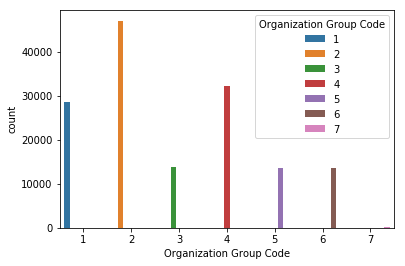

In [17]:
sns.countplot(train['Organization Group Code'],hue='Organization Group Code',data=train)

In [18]:
train.groupby(['Organization Group Code']).agg({'Total Benefits': 'mean','Class':'count'}).reset_index()

Organization Group Code  Total Benefits  Class
0                        1    32209.226284  28588
1                        2    28657.438643  47146
2                        3    20513.638385  13775
3                        4    25662.284781  32193
4                        5    14858.057946  13644
5                        6    26076.979982  13555
6                        7     4350.659516    186

In [19]:
train.groupby(['Department Code']).agg({'Total Benefits': 'mean','Class':'count'}).reset_index()

Department Code  Total Benefits  Class
0              AAM    21390.848606    287
1              ADM    25202.227517   3762
2              ADP    27200.240216    602
3              AIR    28019.060921   6959
4              ART    26232.542500    160
5              ASR    26238.468168    737
6              BOS    22756.353991    441
7              CAT    43508.479107   1164
8              CFC    27498.800625     64
9              CHF    20875.155645    248
10             CII    13376.122000     10
11             CLP    20228.848462     13
12             CON    29933.252240   1085
13             CPC    24834.152674    965
14             CRT    29983.157170   1965
15             CSC    17806.303571     42
16             CSS    29916.757330    352
17             CWP    30929.951061   2140
18             DAT    36545.734227   1138
19             DBI    32103.123609   1150
20             DPH    25662.284781  32193
21             DPW    25746.630566   5828
22             DSS    20034.765366  12190
23             ECD    34099.546540   1075
24             ECN    31365.859193    446
25             ENV    23452.835210    501
26             ETH    25538.491622     74
27             FAM    12861.460483    932
28             FIR    37046.594445   6142
29             HHP    28757.580509   1473
30             HOM    24277.404302     86
31             HRC    15200.444271     96
32             HRD    20765.349788   1085
33             HSS    20150.174286    308
34             JUV    21182.887114   1185
35             LIB    21992.556092   3362
36             LLB    55270.650000      7
37             MTA    28844.116301  21679
38             MYR    33298.877079    469
39             PAB    13561.315429     35
40             PDR    38384.689399    666
41             POL    29940.909982  11968
42             PRT    31242.466758   1027
43             PUC    28566.791502   3402
44             REC    11396.906408   8520
45             REG     5454.637903   1030
46             RET    33273.501586    391
47             RNT    27219.399882    170
48             SCI    29558.857800     50
49             SHF    33979.967861   3847
50             TIS    29948.761131   1061
51             TTX    26362.995218    941
52             UNA     4350.659516    186
53             WAR    22989.654816    326
54             WOM    14239.473448     58
55             WTR    30484.422599   2994

In [20]:
train.groupby(['Union Code']).agg({'Total Benefits': 'mean','Class':'count'}).reset_index()

Union Code  Total Benefits  Class
0            1     6288.200186   3228
1            2    36811.213801    292
2            3    35635.960099    203
3            4    29052.918423    501
4            6    34402.340897   3043
5            7    24792.141071     28
6           12    19657.277000     20
7           16    14885.045440    182
8           21    29551.496814  19294
9           22    27913.432155   1717
10          23    28394.358842    190
11          34    31844.320351     57
12          36    32099.463889     18
13          38    35611.860904   1195
14          39    33352.171817   2372
15          40    33724.583704     27
16         104    32453.379627    134
17         121    35059.662373     59
18         130    32402.619439   1587
19         163    61558.869423     52
20         164    34452.302141    953
21         191    26787.091270     63
22         195    30316.866538     52
23         196    64596.565806     31
24         197    34183.129351    154
25         200    33292.063484   1174
26         216    28521.560852    681
27         220    55270.650000      7
28         236    30917.939840    376
29         250    23318.406573   8275
..         ...             ...    ...
39         330      358.831366    161
40         351    47103.286410   4404
41         352    56918.324545     33
42         353    67041.644000      5
43         356    52254.197784    176
44         377    30983.810339     59
45         419    28918.784179    134
46         498    35331.015363   2715
47         499    40524.879387    359
48         535    26384.523281   6441
49         556    66193.297407     27
50         580    25960.090875    160
51         604    66451.455000      2
52         651    28585.652448    482
53         718    31324.781333     30
54         790    19279.921386  42544
55         791    22682.997067  11187
56         792    27240.462424   1122
57         793    37829.463636     11
58         798    36720.313270   5658
59         799    48717.824576    177
60         856    29759.424975    404
61         858    45219.834366    497
62         911    30237.697420   9814
63         929    34756.473333     15
64         930    38233.890305    262
65         933     6717.626069    173
66         965    34244.975366     82
67         969    37105.088750      8
68         990    71815.250000     10

[69 rows x 3 columns]

In [22]:
train.groupby(['Job Family Code']).agg({'Total Benefits': 'mean','Class':'count'}).reset_index()

Job Family Code  Total Benefits  Class
0             1000    33223.253235   3493
1             1100    63602.710690     29
2             1200    22675.641850   2211
3             1300    23388.828740    611
4             1400    21203.486646   6766
5             1500    31321.930323     31
6             1600    25745.672859   3127
7             1700    19484.431588    554
8             1800    27069.735314   4208
9             1900    25555.841182    804
10            2100    26589.900809    556
11            2200    34615.376976   1141
12            2300    23592.236131  15242
13            2400    30126.135315   2540
14            2500    25315.864210   3014
15            2600    18819.673380   1068
16            2700    23413.082752   4829
17            2800    33333.209311    639
18            2900    27003.848544   7541
19            3200     4857.645742   4359
20            3300    16174.516383    412
21            3400    25234.373527   1633
22            3500    21269.404502    271
23            3600    20993.292181   2700
24            4100    34486.399219     64
25            4200    27714.921501    713
26            4300    24952.610385    390
27            5100    41620.976859    156
28            5200    33548.027947   4379
29            5300    11282.763420   2164
..             ...             ...    ...
32            5600    31644.807198    621
33            6100    34024.983840    500
34            6200    35906.672352    489
35            6300    32719.818180    802
36            7100    39127.694946     93
37            7200    35872.527815   1437
38            7300    32244.641441   8666
39            7400    29209.992138   1272
40            7500    21866.682746   1999
41            8100    38569.429221   3325
42            8200    20616.350941   4218
43            8300    31939.703616   3999
44            8400    29669.932726    664
45            8600    23372.770156     64
46             900    40638.138205   4919
47            9100    29959.288174  12119
48            9200    30473.807088   1353
49            9300    36653.774884     43
50            9700    27935.929848   1056
51            9900     5012.393455   7755
52            DPHG   120775.100000      1
53            H000    37085.650279   5846
54             MTA     5257.944000      5
55             PAB       74.906667      3
56            Q000    30240.221986   9816
57            SCRT    29167.151734   2019
58            SFRA    22541.802353     51
59             SHF     3693.730000      1
60             TIS    28386.745000      2
61             WTR    15830.130000      4

[62 rows x 3 columns]

In [23]:
train.groupby(['Job Code']).agg({'Total Benefits': 'mean','Class':'count'}).reset_index()

Job Code  Total Benefits  Class
0        1002    14833.337778     18
1        1003    18133.176316     19
2        1004    10664.770000      4
3        1012     9582.643000     10
4        1013    13320.842000      5
5        1014    12760.176667      3
6        1021    16548.619706     34
7        1022    19424.161348    141
8        1023    20538.938630     73
9        1024    24847.090000     25
10       1031    28779.617273     11
11       1032    30580.342308     13
12       1033    36568.662000      5
13       1041    31537.598250     40
14       1042    34966.050228    263
15       1043    38654.235112    358
16       1044    42209.292988    251
17       1051    24175.168537     41
18       1052    30399.923730    244
19       1053    31834.361704    405
20       1054    38483.313163    411
21       1061    16639.900000      6
22       1062    25421.847222     54
23       1063    34538.831622    111
24       1064    35998.463582     67
25       1070    44531.547316    190
26       1071    47858.594651     43
27        109      358.831366    161
28       1091    18860.477000     50
29       1092    23785.294873    158
...       ...             ...    ...
1111     H110    29761.528000     15
1112     H120    30659.447000     20
1113     O030    22856.070000      2
1114     O035    24613.766000      5
1115     O535    46727.440000      2
1116     O590    14784.710000      2
1117     O615    18872.120000      3
1118     O695    29709.360000      3
1119     O775    35254.510000      2
1120     O790     5745.250000      1
1121     O840    21247.048000      5
1122     O865     9461.010000      1
1123     O890    18663.857500      4
1124     O970    39419.480000      3
1125     O990    20326.345000      2
1126     P103     6052.002024   5321
1127     Q002    24484.610411   2630
1128     Q003    29281.259357   1634
1129     Q004    31168.361390   2936
1130     Q035    40144.395000      2
1131     Q036    30428.080000      8
1132     Q037    31082.361304     23
1133     Q050    18724.153889     90
1134     Q051    31028.979901    203
1135     Q052    37732.291753   1386
1136     Q060     5804.044211     38
1137     Q061    38189.288750     16
1138     Q062    37929.904973    374
1139     Q080     7183.706250      8
1140     Q082    40465.188828    128

[1141 rows x 3 columns]

In [27]:
!pip install catboost

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [28]:
from catboost import CatBoostClassifier

In [33]:
y = train.iloc[:,-1]

In [37]:
X = train.drop('Class',axis=1)

In [39]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [40]:
categorical_features_indices

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [63]:
model=CatBoostClassifier(loss_function='MultiClass')
model.fit(X, y,cat_features=categorical_features_indices)

0:	learn: -1.0487403	total: 507ms	remaining: 8m 26s
1:	learn: -1.0025941	total: 1.02s	remaining: 8m 30s
2:	learn: -0.9602268	total: 1.52s	remaining: 8m 25s
3:	learn: -0.9208628	total: 2.01s	remaining: 8m 20s
4:	learn: -0.8840363	total: 2.47s	remaining: 8m 12s
5:	learn: -0.8496569	total: 2.94s	remaining: 8m 7s
6:	learn: -0.8173478	total: 3.41s	remaining: 8m 4s
7:	learn: -0.7864009	total: 3.92s	remaining: 8m 6s
8:	learn: -0.7579879	total: 4.42s	remaining: 8m 6s
9:	learn: -0.7311392	total: 4.93s	remaining: 8m 8s
10:	learn: -0.7063060	total: 5.39s	remaining: 8m 4s
11:	learn: -0.6829673	total: 5.88s	remaining: 8m 3s
12:	learn: -0.6602360	total: 6.38s	remaining: 8m 4s
13:	learn: -0.6390342	total: 6.86s	remaining: 8m 3s
14:	learn: -0.6187753	total: 7.31s	remaining: 8m
15:	learn: -0.5994912	total: 7.76s	remaining: 7m 57s
16:	learn: -0.5813588	total: 8.23s	remaining: 7m 56s
17:	learn: -0.5640671	total: 8.71s	remaining: 7m 54s
18:	learn: -0.5476881	total: 9.18s	remaining: 7m 54s
19:	learn: -0.53

155:	learn: -0.0862095	total: 1m 15s	remaining: 6m 48s
156:	learn: -0.0857826	total: 1m 16s	remaining: 6m 48s
157:	learn: -0.0854170	total: 1m 16s	remaining: 6m 47s
158:	learn: -0.0850341	total: 1m 16s	remaining: 6m 47s
159:	learn: -0.0847000	total: 1m 17s	remaining: 6m 46s
160:	learn: -0.0842571	total: 1m 17s	remaining: 6m 46s
161:	learn: -0.0838043	total: 1m 18s	remaining: 6m 45s
162:	learn: -0.0834773	total: 1m 18s	remaining: 6m 45s
163:	learn: -0.0830743	total: 1m 19s	remaining: 6m 45s
164:	learn: -0.0826201	total: 1m 19s	remaining: 6m 44s
165:	learn: -0.0822383	total: 1m 20s	remaining: 6m 44s
166:	learn: -0.0820555	total: 1m 21s	remaining: 6m 44s
167:	learn: -0.0817085	total: 1m 21s	remaining: 6m 43s
168:	learn: -0.0813431	total: 1m 22s	remaining: 6m 43s
169:	learn: -0.0810685	total: 1m 22s	remaining: 6m 42s
170:	learn: -0.0807957	total: 1m 23s	remaining: 6m 42s
171:	learn: -0.0803866	total: 1m 23s	remaining: 6m 42s
172:	learn: -0.0800031	total: 1m 24s	remaining: 6m 41s
173:	learn

305:	learn: -0.0586470	total: 2m 28s	remaining: 5m 35s
306:	learn: -0.0585677	total: 2m 28s	remaining: 5m 35s
307:	learn: -0.0584980	total: 2m 28s	remaining: 5m 34s
308:	learn: -0.0584377	total: 2m 29s	remaining: 5m 34s
309:	learn: -0.0583792	total: 2m 29s	remaining: 5m 33s
310:	learn: -0.0583044	total: 2m 30s	remaining: 5m 33s
311:	learn: -0.0582246	total: 2m 30s	remaining: 5m 32s
312:	learn: -0.0581798	total: 2m 31s	remaining: 5m 32s
313:	learn: -0.0580969	total: 2m 31s	remaining: 5m 31s
314:	learn: -0.0580474	total: 2m 32s	remaining: 5m 31s
315:	learn: -0.0579670	total: 2m 32s	remaining: 5m 30s
316:	learn: -0.0578643	total: 2m 33s	remaining: 5m 30s
317:	learn: -0.0577991	total: 2m 33s	remaining: 5m 29s
318:	learn: -0.0577420	total: 2m 34s	remaining: 5m 29s
319:	learn: -0.0576865	total: 2m 34s	remaining: 5m 28s
320:	learn: -0.0575828	total: 2m 35s	remaining: 5m 28s
321:	learn: -0.0574766	total: 2m 35s	remaining: 5m 27s
322:	learn: -0.0573934	total: 2m 36s	remaining: 5m 27s
323:	learn

455:	learn: -0.0507574	total: 3m 38s	remaining: 4m 20s
456:	learn: -0.0507115	total: 3m 38s	remaining: 4m 19s
457:	learn: -0.0506897	total: 3m 39s	remaining: 4m 19s
458:	learn: -0.0506507	total: 3m 39s	remaining: 4m 18s
459:	learn: -0.0505954	total: 3m 39s	remaining: 4m 18s
460:	learn: -0.0505629	total: 3m 40s	remaining: 4m 17s
461:	learn: -0.0505561	total: 3m 40s	remaining: 4m 17s
462:	learn: -0.0505336	total: 3m 41s	remaining: 4m 16s
463:	learn: -0.0505308	total: 3m 41s	remaining: 4m 16s
464:	learn: -0.0504974	total: 3m 42s	remaining: 4m 15s
465:	learn: -0.0504714	total: 3m 42s	remaining: 4m 15s
466:	learn: -0.0503977	total: 3m 43s	remaining: 4m 14s
467:	learn: -0.0503536	total: 3m 43s	remaining: 4m 14s
468:	learn: -0.0502958	total: 3m 44s	remaining: 4m 13s
469:	learn: -0.0502625	total: 3m 44s	remaining: 4m 13s
470:	learn: -0.0502470	total: 3m 45s	remaining: 4m 12s
471:	learn: -0.0502052	total: 3m 45s	remaining: 4m 12s
472:	learn: -0.0501724	total: 3m 46s	remaining: 4m 11s
473:	learn

606:	learn: -0.0463726	total: 4m 46s	remaining: 3m 5s
607:	learn: -0.0463137	total: 4m 46s	remaining: 3m 4s
608:	learn: -0.0463010	total: 4m 47s	remaining: 3m 4s
609:	learn: -0.0462637	total: 4m 47s	remaining: 3m 3s
610:	learn: -0.0462521	total: 4m 47s	remaining: 3m 3s
611:	learn: -0.0462436	total: 4m 48s	remaining: 3m 2s
612:	learn: -0.0462203	total: 4m 48s	remaining: 3m 2s
613:	learn: -0.0462049	total: 4m 48s	remaining: 3m 1s
614:	learn: -0.0461905	total: 4m 49s	remaining: 3m 1s
615:	learn: -0.0461550	total: 4m 49s	remaining: 3m
616:	learn: -0.0461384	total: 4m 50s	remaining: 3m
617:	learn: -0.0461285	total: 4m 50s	remaining: 2m 59s
618:	learn: -0.0461014	total: 4m 50s	remaining: 2m 58s
619:	learn: -0.0460940	total: 4m 51s	remaining: 2m 58s
620:	learn: -0.0460731	total: 4m 51s	remaining: 2m 57s
621:	learn: -0.0460576	total: 4m 51s	remaining: 2m 57s
622:	learn: -0.0460494	total: 4m 52s	remaining: 2m 56s
623:	learn: -0.0460426	total: 4m 52s	remaining: 2m 56s
624:	learn: -0.0460288	tota

757:	learn: -0.0435721	total: 5m 54s	remaining: 1m 53s
758:	learn: -0.0435572	total: 5m 55s	remaining: 1m 52s
759:	learn: -0.0435428	total: 5m 55s	remaining: 1m 52s
760:	learn: -0.0435412	total: 5m 56s	remaining: 1m 51s
761:	learn: -0.0435233	total: 5m 56s	remaining: 1m 51s
762:	learn: -0.0434934	total: 5m 57s	remaining: 1m 51s
763:	learn: -0.0434700	total: 5m 57s	remaining: 1m 50s
764:	learn: -0.0434491	total: 5m 58s	remaining: 1m 50s
765:	learn: -0.0434087	total: 5m 58s	remaining: 1m 49s
766:	learn: -0.0434045	total: 5m 59s	remaining: 1m 49s
767:	learn: -0.0433764	total: 5m 59s	remaining: 1m 48s
768:	learn: -0.0433668	total: 6m	remaining: 1m 48s
769:	learn: -0.0433601	total: 6m	remaining: 1m 47s
770:	learn: -0.0433497	total: 6m 1s	remaining: 1m 47s
771:	learn: -0.0433275	total: 6m 1s	remaining: 1m 46s
772:	learn: -0.0433009	total: 6m 2s	remaining: 1m 46s
773:	learn: -0.0432790	total: 6m 2s	remaining: 1m 45s
774:	learn: -0.0432711	total: 6m 3s	remaining: 1m 45s
775:	learn: -0.0432608	

909:	learn: -0.0414073	total: 7m 7s	remaining: 42.2s
910:	learn: -0.0414030	total: 7m 7s	remaining: 41.8s
911:	learn: -0.0413839	total: 7m 8s	remaining: 41.3s
912:	learn: -0.0413470	total: 7m 8s	remaining: 40.8s
913:	learn: -0.0413403	total: 7m 9s	remaining: 40.4s
914:	learn: -0.0413378	total: 7m 9s	remaining: 39.9s
915:	learn: -0.0413066	total: 7m 10s	remaining: 39.4s
916:	learn: -0.0412965	total: 7m 10s	remaining: 39s
917:	learn: -0.0412748	total: 7m 11s	remaining: 38.5s
918:	learn: -0.0412691	total: 7m 11s	remaining: 38s
919:	learn: -0.0412507	total: 7m 12s	remaining: 37.6s
920:	learn: -0.0412398	total: 7m 12s	remaining: 37.1s
921:	learn: -0.0412224	total: 7m 12s	remaining: 36.6s
922:	learn: -0.0412158	total: 7m 13s	remaining: 36.1s
923:	learn: -0.0412118	total: 7m 13s	remaining: 35.7s
924:	learn: -0.0412100	total: 7m 14s	remaining: 35.2s
925:	learn: -0.0412002	total: 7m 14s	remaining: 34.7s
926:	learn: -0.0411848	total: 7m 15s	remaining: 34.3s
927:	learn: -0.0411655	total: 7m 15s	r

In [64]:
model.score(X,y)

0.9865648916404516

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [47]:
X_train.head()

Year  Organization Group Code Department Code  Union Code  \
3820    2013                        4             DPH         790   
122482  2016                        1             POL         911   
81548   2014                        2             MTA         253   
127582  2015                        6             REG         790   
7815    2015                        4             DPH         250   

       Job Family Code Job Code  Overtime  Other Salaries  Retirement  \
3820              1600     1630      0.00          624.01    10027.93   
122482            Q000     Q004    402.37          547.49     5232.73   
81548             9100     9163    318.73           22.58     1840.36   
127582            1400     1402   1131.44            0.00        0.00   
7815              2300     2303      0.00           13.65        0.00   

        Health/Dental  Other Benefits  Total Benefits  
3820         12828.16         4127.39        26983.48  
122482        3205.99          519.22         8957.94  
81548         2164.05          493.93         4498.34  
127582        2035.68          622.53         2658.21  
7815            47.90           14.26           62.16

In [48]:
model=CatBoostClassifier(loss_function='MultiClass')
model.fit(X_train, y_train,cat_features=categorical_features_indices)

0:	learn: -1.0481825	total: 518ms	remaining: 8m 37s
1:	learn: -1.0018372	total: 1.02s	remaining: 8m 29s
2:	learn: -0.9595955	total: 1.34s	remaining: 7m 25s
3:	learn: -0.9202402	total: 1.69s	remaining: 7m
4:	learn: -0.8831600	total: 2.06s	remaining: 6m 49s
5:	learn: -0.8498694	total: 2.39s	remaining: 6m 35s
6:	learn: -0.8181166	total: 2.71s	remaining: 6m 24s
7:	learn: -0.7884862	total: 3.05s	remaining: 6m 18s
8:	learn: -0.7603477	total: 3.4s	remaining: 6m 14s
9:	learn: -0.7342841	total: 3.75s	remaining: 6m 11s
10:	learn: -0.7091658	total: 4.1s	remaining: 6m 8s
11:	learn: -0.6853146	total: 4.45s	remaining: 6m 6s
12:	learn: -0.6629763	total: 4.8s	remaining: 6m 4s
13:	learn: -0.6419542	total: 5.15s	remaining: 6m 2s
14:	learn: -0.6218646	total: 5.5s	remaining: 6m
15:	learn: -0.6025801	total: 5.83s	remaining: 5m 58s
16:	learn: -0.5846952	total: 6.15s	remaining: 5m 55s
17:	learn: -0.5670508	total: 6.47s	remaining: 5m 53s
18:	learn: -0.5505473	total: 6.81s	remaining: 5m 51s
19:	learn: -0.53452

156:	learn: -0.0861133	total: 55.3s	remaining: 4m 57s
157:	learn: -0.0857431	total: 55.7s	remaining: 4m 57s
158:	learn: -0.0852963	total: 56.1s	remaining: 4m 56s
159:	learn: -0.0849919	total: 56.4s	remaining: 4m 56s
160:	learn: -0.0846816	total: 56.8s	remaining: 4m 56s
161:	learn: -0.0842652	total: 57.2s	remaining: 4m 55s
162:	learn: -0.0839459	total: 57.6s	remaining: 4m 55s
163:	learn: -0.0835599	total: 58s	remaining: 4m 55s
164:	learn: -0.0833524	total: 58.3s	remaining: 4m 55s
165:	learn: -0.0830948	total: 58.7s	remaining: 4m 54s
166:	learn: -0.0826926	total: 59s	remaining: 4m 54s
167:	learn: -0.0823545	total: 59.4s	remaining: 4m 54s
168:	learn: -0.0820034	total: 59.8s	remaining: 4m 54s
169:	learn: -0.0817994	total: 1m	remaining: 4m 53s
170:	learn: -0.0815193	total: 1m	remaining: 4m 53s
171:	learn: -0.0812511	total: 1m	remaining: 4m 53s
172:	learn: -0.0808537	total: 1m 1s	remaining: 4m 52s
173:	learn: -0.0806026	total: 1m 1s	remaining: 4m 52s
174:	learn: -0.0803396	total: 1m 2s	remai

307:	learn: -0.0601027	total: 1m 49s	remaining: 4m 5s
308:	learn: -0.0599747	total: 1m 49s	remaining: 4m 4s
309:	learn: -0.0599169	total: 1m 49s	remaining: 4m 4s
310:	learn: -0.0598648	total: 1m 50s	remaining: 4m 4s
311:	learn: -0.0597972	total: 1m 50s	remaining: 4m 3s
312:	learn: -0.0597617	total: 1m 50s	remaining: 4m 3s
313:	learn: -0.0596643	total: 1m 51s	remaining: 4m 2s
314:	learn: -0.0595669	total: 1m 51s	remaining: 4m 2s
315:	learn: -0.0595161	total: 1m 51s	remaining: 4m 2s
316:	learn: -0.0593823	total: 1m 52s	remaining: 4m 2s
317:	learn: -0.0592943	total: 1m 52s	remaining: 4m 1s
318:	learn: -0.0592224	total: 1m 53s	remaining: 4m 1s
319:	learn: -0.0591860	total: 1m 53s	remaining: 4m 1s
320:	learn: -0.0591480	total: 1m 53s	remaining: 4m
321:	learn: -0.0590623	total: 1m 54s	remaining: 4m
322:	learn: -0.0589784	total: 1m 54s	remaining: 3m 59s
323:	learn: -0.0588989	total: 1m 54s	remaining: 3m 59s
324:	learn: -0.0588779	total: 1m 55s	remaining: 3m 59s
325:	learn: -0.0588539	total: 1

457:	learn: -0.0518940	total: 2m 42s	remaining: 3m 12s
458:	learn: -0.0518473	total: 2m 42s	remaining: 3m 11s
459:	learn: -0.0518063	total: 2m 43s	remaining: 3m 11s
460:	learn: -0.0517534	total: 2m 43s	remaining: 3m 11s
461:	learn: -0.0516701	total: 2m 43s	remaining: 3m 10s
462:	learn: -0.0516234	total: 2m 44s	remaining: 3m 10s
463:	learn: -0.0515776	total: 2m 44s	remaining: 3m 10s
464:	learn: -0.0515411	total: 2m 44s	remaining: 3m 9s
465:	learn: -0.0515302	total: 2m 45s	remaining: 3m 9s
466:	learn: -0.0515255	total: 2m 45s	remaining: 3m 9s
467:	learn: -0.0514721	total: 2m 46s	remaining: 3m 8s
468:	learn: -0.0514510	total: 2m 46s	remaining: 3m 8s
469:	learn: -0.0514426	total: 2m 46s	remaining: 3m 7s
470:	learn: -0.0514222	total: 2m 47s	remaining: 3m 7s
471:	learn: -0.0513890	total: 2m 47s	remaining: 3m 7s
472:	learn: -0.0513572	total: 2m 47s	remaining: 3m 6s
473:	learn: -0.0513329	total: 2m 48s	remaining: 3m 6s
474:	learn: -0.0513124	total: 2m 48s	remaining: 3m 6s
475:	learn: -0.051277

608:	learn: -0.0475238	total: 3m 35s	remaining: 2m 18s
609:	learn: -0.0474928	total: 3m 35s	remaining: 2m 18s
610:	learn: -0.0474770	total: 3m 36s	remaining: 2m 17s
611:	learn: -0.0474541	total: 3m 36s	remaining: 2m 17s
612:	learn: -0.0474215	total: 3m 36s	remaining: 2m 16s
613:	learn: -0.0473801	total: 3m 37s	remaining: 2m 16s
614:	learn: -0.0473574	total: 3m 37s	remaining: 2m 16s
615:	learn: -0.0473535	total: 3m 38s	remaining: 2m 15s
616:	learn: -0.0473214	total: 3m 38s	remaining: 2m 15s
617:	learn: -0.0473033	total: 3m 38s	remaining: 2m 15s
618:	learn: -0.0472867	total: 3m 39s	remaining: 2m 14s
619:	learn: -0.0472726	total: 3m 39s	remaining: 2m 14s
620:	learn: -0.0472619	total: 3m 39s	remaining: 2m 14s
621:	learn: -0.0472540	total: 3m 40s	remaining: 2m 13s
622:	learn: -0.0472102	total: 3m 40s	remaining: 2m 13s
623:	learn: -0.0471682	total: 3m 40s	remaining: 2m 13s
624:	learn: -0.0471571	total: 3m 41s	remaining: 2m 12s
625:	learn: -0.0471231	total: 3m 41s	remaining: 2m 12s
626:	learn

759:	learn: -0.0445507	total: 4m 27s	remaining: 1m 24s
760:	learn: -0.0445147	total: 4m 28s	remaining: 1m 24s
761:	learn: -0.0445108	total: 4m 28s	remaining: 1m 23s
762:	learn: -0.0445039	total: 4m 29s	remaining: 1m 23s
763:	learn: -0.0444863	total: 4m 29s	remaining: 1m 23s
764:	learn: -0.0444588	total: 4m 29s	remaining: 1m 22s
765:	learn: -0.0444516	total: 4m 30s	remaining: 1m 22s
766:	learn: -0.0444262	total: 4m 30s	remaining: 1m 22s
767:	learn: -0.0444135	total: 4m 30s	remaining: 1m 21s
768:	learn: -0.0444111	total: 4m 31s	remaining: 1m 21s
769:	learn: -0.0443864	total: 4m 31s	remaining: 1m 21s
770:	learn: -0.0443618	total: 4m 31s	remaining: 1m 20s
771:	learn: -0.0443275	total: 4m 32s	remaining: 1m 20s
772:	learn: -0.0443172	total: 4m 32s	remaining: 1m 20s
773:	learn: -0.0442933	total: 4m 32s	remaining: 1m 19s
774:	learn: -0.0442669	total: 4m 33s	remaining: 1m 19s
775:	learn: -0.0442656	total: 4m 33s	remaining: 1m 18s
776:	learn: -0.0442505	total: 4m 33s	remaining: 1m 18s
777:	learn

912:	learn: -0.0421971	total: 5m 20s	remaining: 30.5s
913:	learn: -0.0421797	total: 5m 20s	remaining: 30.2s
914:	learn: -0.0421619	total: 5m 21s	remaining: 29.8s
915:	learn: -0.0421391	total: 5m 21s	remaining: 29.5s
916:	learn: -0.0421174	total: 5m 21s	remaining: 29.1s
917:	learn: -0.0421096	total: 5m 21s	remaining: 28.8s
918:	learn: -0.0420994	total: 5m 22s	remaining: 28.4s
919:	learn: -0.0420919	total: 5m 22s	remaining: 28.1s
920:	learn: -0.0420751	total: 5m 23s	remaining: 27.7s
921:	learn: -0.0420672	total: 5m 23s	remaining: 27.4s
922:	learn: -0.0420487	total: 5m 23s	remaining: 27s
923:	learn: -0.0420415	total: 5m 23s	remaining: 26.6s
924:	learn: -0.0420265	total: 5m 24s	remaining: 26.3s
925:	learn: -0.0420008	total: 5m 24s	remaining: 25.9s
926:	learn: -0.0419704	total: 5m 25s	remaining: 25.6s
927:	learn: -0.0419564	total: 5m 25s	remaining: 25.2s
928:	learn: -0.0419539	total: 5m 25s	remaining: 24.9s
929:	learn: -0.0419304	total: 5m 26s	remaining: 24.5s
930:	learn: -0.0419082	total: 

In [49]:
model.score(X_train,y_train)

0.986316596397087

In [50]:
model.score(X_test,y_test)

0.9846401502448185

In [51]:
test.shape

(63895, 12)

In [52]:
submission = pd.DataFrame()

In [65]:
submission['Class']=model.predict(test).tolist()

In [66]:
submission.to_csv("sol2.csv")

In [75]:
train2 = train.drop(['Job Code', 'Retirement',
       'Health/Dental', 'Other Benefits','Class'],axis=1)

In [69]:
test2 = test.drop(['Job Code', 'Retirement',
       'Health/Dental', 'Other Benefits'],axis=1)

In [79]:
model=CatBoostClassifier(loss_function='MultiClass')
model.fit(train2, y,cat_features=categorical_features_indices)

0:	learn: -1.0543401	total: 250ms	remaining: 4m 9s
1:	learn: -1.0142619	total: 507ms	remaining: 4m 12s
2:	learn: -0.9763555	total: 756ms	remaining: 4m 11s
3:	learn: -0.9413599	total: 1.01s	remaining: 4m 11s
4:	learn: -0.9092307	total: 1.24s	remaining: 4m 6s
5:	learn: -0.8788214	total: 1.48s	remaining: 4m 5s
6:	learn: -0.8502301	total: 1.74s	remaining: 4m 7s
7:	learn: -0.8232366	total: 2.01s	remaining: 4m 9s
8:	learn: -0.7980964	total: 2.26s	remaining: 4m 9s
9:	learn: -0.7743600	total: 2.49s	remaining: 4m 6s
10:	learn: -0.7523210	total: 2.72s	remaining: 4m 4s
11:	learn: -0.7312940	total: 2.96s	remaining: 4m 4s
12:	learn: -0.7112774	total: 3.2s	remaining: 4m 2s
13:	learn: -0.6928248	total: 3.43s	remaining: 4m 1s
14:	learn: -0.6748109	total: 3.67s	remaining: 4m 1s
15:	learn: -0.6577587	total: 3.89s	remaining: 3m 59s
16:	learn: -0.6416154	total: 4.15s	remaining: 4m
17:	learn: -0.6263138	total: 4.38s	remaining: 3m 59s
18:	learn: -0.6115981	total: 4.61s	remaining: 3m 57s
19:	learn: -0.597645

155:	learn: -0.1549668	total: 40.2s	remaining: 3m 37s
156:	learn: -0.1544848	total: 40.5s	remaining: 3m 37s
157:	learn: -0.1541191	total: 40.7s	remaining: 3m 37s
158:	learn: -0.1537753	total: 41s	remaining: 3m 36s
159:	learn: -0.1533506	total: 41.3s	remaining: 3m 36s
160:	learn: -0.1529738	total: 41.5s	remaining: 3m 36s
161:	learn: -0.1526332	total: 41.8s	remaining: 3m 36s
162:	learn: -0.1522542	total: 42.1s	remaining: 3m 36s
163:	learn: -0.1518700	total: 42.3s	remaining: 3m 35s
164:	learn: -0.1514953	total: 42.6s	remaining: 3m 35s
165:	learn: -0.1511816	total: 42.8s	remaining: 3m 35s
166:	learn: -0.1507643	total: 43.1s	remaining: 3m 35s
167:	learn: -0.1503511	total: 43.4s	remaining: 3m 34s
168:	learn: -0.1499880	total: 43.7s	remaining: 3m 34s
169:	learn: -0.1495641	total: 44s	remaining: 3m 34s
170:	learn: -0.1491970	total: 44.2s	remaining: 3m 34s
171:	learn: -0.1488621	total: 44.5s	remaining: 3m 34s
172:	learn: -0.1485439	total: 44.8s	remaining: 3m 34s
173:	learn: -0.1482559	total: 45

307:	learn: -0.1268203	total: 1m 23s	remaining: 3m 7s
308:	learn: -0.1267613	total: 1m 23s	remaining: 3m 7s
309:	learn: -0.1266182	total: 1m 23s	remaining: 3m 6s
310:	learn: -0.1265472	total: 1m 24s	remaining: 3m 6s
311:	learn: -0.1264802	total: 1m 24s	remaining: 3m 5s
312:	learn: -0.1263841	total: 1m 24s	remaining: 3m 5s
313:	learn: -0.1262908	total: 1m 24s	remaining: 3m 5s
314:	learn: -0.1262048	total: 1m 25s	remaining: 3m 5s
315:	learn: -0.1261667	total: 1m 25s	remaining: 3m 4s
316:	learn: -0.1260908	total: 1m 25s	remaining: 3m 4s
317:	learn: -0.1260682	total: 1m 25s	remaining: 3m 4s
318:	learn: -0.1259687	total: 1m 26s	remaining: 3m 3s
319:	learn: -0.1259312	total: 1m 26s	remaining: 3m 3s
320:	learn: -0.1258683	total: 1m 26s	remaining: 3m 3s
321:	learn: -0.1257437	total: 1m 26s	remaining: 3m 3s
322:	learn: -0.1256189	total: 1m 27s	remaining: 3m 2s
323:	learn: -0.1255733	total: 1m 27s	remaining: 3m 2s
324:	learn: -0.1254898	total: 1m 27s	remaining: 3m 2s
325:	learn: -0.1254286	total

458:	learn: -0.1182142	total: 2m 5s	remaining: 2m 28s
459:	learn: -0.1181682	total: 2m 6s	remaining: 2m 28s
460:	learn: -0.1180993	total: 2m 6s	remaining: 2m 27s
461:	learn: -0.1180785	total: 2m 6s	remaining: 2m 27s
462:	learn: -0.1180599	total: 2m 7s	remaining: 2m 27s
463:	learn: -0.1180268	total: 2m 7s	remaining: 2m 27s
464:	learn: -0.1179531	total: 2m 7s	remaining: 2m 26s
465:	learn: -0.1179369	total: 2m 7s	remaining: 2m 26s
466:	learn: -0.1179174	total: 2m 8s	remaining: 2m 26s
467:	learn: -0.1178772	total: 2m 8s	remaining: 2m 25s
468:	learn: -0.1178321	total: 2m 8s	remaining: 2m 25s
469:	learn: -0.1178298	total: 2m 8s	remaining: 2m 25s
470:	learn: -0.1178002	total: 2m 9s	remaining: 2m 24s
471:	learn: -0.1177334	total: 2m 9s	remaining: 2m 24s
472:	learn: -0.1177190	total: 2m 9s	remaining: 2m 24s
473:	learn: -0.1176475	total: 2m 9s	remaining: 2m 24s
474:	learn: -0.1175524	total: 2m 10s	remaining: 2m 23s
475:	learn: -0.1175135	total: 2m 10s	remaining: 2m 23s
476:	learn: -0.1174676	tot

609:	learn: -0.1134369	total: 2m 47s	remaining: 1m 47s
610:	learn: -0.1134139	total: 2m 48s	remaining: 1m 47s
611:	learn: -0.1133753	total: 2m 48s	remaining: 1m 46s
612:	learn: -0.1133592	total: 2m 48s	remaining: 1m 46s
613:	learn: -0.1133371	total: 2m 48s	remaining: 1m 46s
614:	learn: -0.1133216	total: 2m 49s	remaining: 1m 45s
615:	learn: -0.1132724	total: 2m 49s	remaining: 1m 45s
616:	learn: -0.1132708	total: 2m 49s	remaining: 1m 45s
617:	learn: -0.1132589	total: 2m 49s	remaining: 1m 45s
618:	learn: -0.1132310	total: 2m 50s	remaining: 1m 44s
619:	learn: -0.1131924	total: 2m 50s	remaining: 1m 44s
620:	learn: -0.1131819	total: 2m 50s	remaining: 1m 44s
621:	learn: -0.1131646	total: 2m 50s	remaining: 1m 43s
622:	learn: -0.1131588	total: 2m 51s	remaining: 1m 43s
623:	learn: -0.1131045	total: 2m 51s	remaining: 1m 43s
624:	learn: -0.1130548	total: 2m 51s	remaining: 1m 42s
625:	learn: -0.1129985	total: 2m 51s	remaining: 1m 42s
626:	learn: -0.1129635	total: 2m 52s	remaining: 1m 42s
627:	learn

760:	learn: -0.1102557	total: 3m 26s	remaining: 1m 4s
761:	learn: -0.1102425	total: 3m 27s	remaining: 1m 4s
762:	learn: -0.1102361	total: 3m 27s	remaining: 1m 4s
763:	learn: -0.1102213	total: 3m 27s	remaining: 1m 4s
764:	learn: -0.1102099	total: 3m 27s	remaining: 1m 3s
765:	learn: -0.1101728	total: 3m 28s	remaining: 1m 3s
766:	learn: -0.1101535	total: 3m 28s	remaining: 1m 3s
767:	learn: -0.1101079	total: 3m 28s	remaining: 1m 3s
768:	learn: -0.1100997	total: 3m 28s	remaining: 1m 2s
769:	learn: -0.1100953	total: 3m 29s	remaining: 1m 2s
770:	learn: -0.1100801	total: 3m 29s	remaining: 1m 2s
771:	learn: -0.1100666	total: 3m 29s	remaining: 1m 1s
772:	learn: -0.1100516	total: 3m 30s	remaining: 1m 1s
773:	learn: -0.1100343	total: 3m 30s	remaining: 1m 1s
774:	learn: -0.1100154	total: 3m 30s	remaining: 1m 1s
775:	learn: -0.1099983	total: 3m 30s	remaining: 1m
776:	learn: -0.1099859	total: 3m 31s	remaining: 1m
777:	learn: -0.1099799	total: 3m 31s	remaining: 1m
778:	learn: -0.1099720	total: 3m 31s	

913:	learn: -0.1076974	total: 4m 5s	remaining: 23.1s
914:	learn: -0.1076748	total: 4m 6s	remaining: 22.9s
915:	learn: -0.1076608	total: 4m 6s	remaining: 22.6s
916:	learn: -0.1076553	total: 4m 6s	remaining: 22.3s
917:	learn: -0.1076485	total: 4m 6s	remaining: 22.1s
918:	learn: -0.1076327	total: 4m 7s	remaining: 21.8s
919:	learn: -0.1075991	total: 4m 7s	remaining: 21.5s
920:	learn: -0.1075629	total: 4m 7s	remaining: 21.2s
921:	learn: -0.1075366	total: 4m 7s	remaining: 21s
922:	learn: -0.1075281	total: 4m 8s	remaining: 20.7s
923:	learn: -0.1075087	total: 4m 8s	remaining: 20.4s
924:	learn: -0.1074980	total: 4m 8s	remaining: 20.2s
925:	learn: -0.1074908	total: 4m 8s	remaining: 19.9s
926:	learn: -0.1074854	total: 4m 9s	remaining: 19.6s
927:	learn: -0.1074671	total: 4m 9s	remaining: 19.3s
928:	learn: -0.1074488	total: 4m 9s	remaining: 19.1s
929:	learn: -0.1074392	total: 4m 9s	remaining: 18.8s
930:	learn: -0.1074028	total: 4m 10s	remaining: 18.5s
931:	learn: -0.1073545	total: 4m 10s	remaining:

In [87]:
categorical_features_indices = np.where(train3.dtypes != np.float)[0]

In [80]:
submission['Class']=model.predict(test2).tolist()

In [76]:
train2.head()

Year  Organization Group Code Department Code  Union Code Job Family Code  \
0  2017                        3             DSS         535            2900   
1  2014                        6             ASR          21            4200   
2  2014                        3             DSS         535            2900   
3  2014                        1             FIR         798            H000   
4  2013                        2             MTA         790            1600   

   Overtime  Other Salaries  Total Benefits  
0      0.00          240.00        30910.34  
1      0.00          400.00        30366.32  
2      0.00         1080.00        21993.95  
3  25730.46        18414.18        40549.97  
4   1138.28         2148.11        35512.31

In [74]:
test2.head()

Year  Organization Group Code Department Code  Union Code Job Family Code  \
0  2015                        4             DPH         790            2400   
1  2016                        4             DPH         791            2300   
2  2016                        5             LIB         790            3600   
3  2015                        1             POL          21            1800   
4  2015                        4             DPH         790            2900   

   Overtime  Other Salaries  Total Benefits  
0       0.0            0.00         4217.44  
1       0.0         1689.53        53285.51  
2       0.0          932.77        22329.11  
3       0.0            0.00        44523.63  
4       0.0          620.54        40520.85

In [89]:
categorical_features_indices

array([0, 1, 2, 3, 4], dtype=int64)

In [90]:
train3.head()

Organization Group Code Department Code  Union Code Job Family Code  \
0                        3             DSS         535            2900   
1                        6             ASR          21            4200   
2                        3             DSS         535            2900   
3                        1             FIR         798            H000   
4                        2             MTA         790            1600   

  Job Code  Overtime  Other Salaries  Retirement  Health/Dental  \
0     2905      0.00          240.00    11896.36       13765.55   
1     4222      0.00          400.00    15429.94        9337.37   
2     2910      0.00         1080.00     9682.00        8848.03   
3     H002  25730.46        18414.18    24222.26       13911.13   
4     1224   1138.28         2148.11    15437.62       12828.15   

   Other Benefits  Total Benefits  
0         5248.43        30910.34  
1         5599.01        30366.32  
2         3463.92        21993.95  
3         2416.58        40549.97  
4         7246.54        35512.31

In [81]:
submission.to_csv("sol3.csv")

In [86]:
train3 = train.drop(['Year','Class'],axis=1)

In [83]:
test3 = test.drop(['Year'],axis=1)

In [91]:
model=CatBoostClassifier(loss_function='MultiClass')
model.fit(train3, y,cat_features=categorical_features_indices)

0:	learn: -1.0484516	total: 272ms	remaining: 4m 31s
1:	learn: -1.0021620	total: 518ms	remaining: 4m 18s
2:	learn: -0.9590631	total: 767ms	remaining: 4m 14s
3:	learn: -0.9194229	total: 1.01s	remaining: 4m 12s
4:	learn: -0.8825977	total: 1.26s	remaining: 4m 9s
5:	learn: -0.8477384	total: 1.52s	remaining: 4m 12s
6:	learn: -0.8159819	total: 1.76s	remaining: 4m 10s
7:	learn: -0.7861273	total: 1.99s	remaining: 4m 7s
8:	learn: -0.7579482	total: 2.24s	remaining: 4m 6s
9:	learn: -0.7316519	total: 2.5s	remaining: 4m 7s
10:	learn: -0.7064282	total: 2.73s	remaining: 4m 5s
11:	learn: -0.6831301	total: 2.98s	remaining: 4m 5s
12:	learn: -0.6608277	total: 3.22s	remaining: 4m 4s
13:	learn: -0.6401658	total: 3.48s	remaining: 4m 4s
14:	learn: -0.6196789	total: 3.73s	remaining: 4m 5s
15:	learn: -0.6004874	total: 3.95s	remaining: 4m 2s
16:	learn: -0.5823700	total: 4.2s	remaining: 4m 2s
17:	learn: -0.5648863	total: 4.47s	remaining: 4m 4s
18:	learn: -0.5482255	total: 4.76s	remaining: 4m 5s
19:	learn: -0.5324

155:	learn: -0.0946513	total: 39.3s	remaining: 3m 32s
156:	learn: -0.0942801	total: 39.6s	remaining: 3m 32s
157:	learn: -0.0938274	total: 39.9s	remaining: 3m 32s
158:	learn: -0.0934686	total: 40.2s	remaining: 3m 32s
159:	learn: -0.0930852	total: 40.5s	remaining: 3m 32s
160:	learn: -0.0926898	total: 40.8s	remaining: 3m 32s
161:	learn: -0.0922712	total: 41s	remaining: 3m 32s
162:	learn: -0.0918869	total: 41.3s	remaining: 3m 32s
163:	learn: -0.0915485	total: 41.6s	remaining: 3m 31s
164:	learn: -0.0911817	total: 41.8s	remaining: 3m 31s
165:	learn: -0.0908150	total: 42.1s	remaining: 3m 31s
166:	learn: -0.0904736	total: 42.4s	remaining: 3m 31s
167:	learn: -0.0901110	total: 42.7s	remaining: 3m 31s
168:	learn: -0.0897997	total: 43s	remaining: 3m 31s
169:	learn: -0.0894586	total: 43.3s	remaining: 3m 31s
170:	learn: -0.0891394	total: 43.5s	remaining: 3m 31s
171:	learn: -0.0887408	total: 43.8s	remaining: 3m 30s
172:	learn: -0.0884951	total: 44.1s	remaining: 3m 30s
173:	learn: -0.0882476	total: 44

307:	learn: -0.0668202	total: 1m 21s	remaining: 3m 2s
308:	learn: -0.0667279	total: 1m 21s	remaining: 3m 2s
309:	learn: -0.0666620	total: 1m 21s	remaining: 3m 2s
310:	learn: -0.0665676	total: 1m 22s	remaining: 3m 2s
311:	learn: -0.0664602	total: 1m 22s	remaining: 3m 1s
312:	learn: -0.0664107	total: 1m 22s	remaining: 3m 1s
313:	learn: -0.0663291	total: 1m 23s	remaining: 3m 1s
314:	learn: -0.0662502	total: 1m 23s	remaining: 3m 1s
315:	learn: -0.0661382	total: 1m 23s	remaining: 3m
316:	learn: -0.0660337	total: 1m 23s	remaining: 3m
317:	learn: -0.0659641	total: 1m 24s	remaining: 3m
318:	learn: -0.0658876	total: 1m 24s	remaining: 3m
319:	learn: -0.0658233	total: 1m 24s	remaining: 2m 59s
320:	learn: -0.0657706	total: 1m 24s	remaining: 2m 59s
321:	learn: -0.0657071	total: 1m 25s	remaining: 2m 59s
322:	learn: -0.0656805	total: 1m 25s	remaining: 2m 59s
323:	learn: -0.0655992	total: 1m 25s	remaining: 2m 58s
324:	learn: -0.0655463	total: 1m 25s	remaining: 2m 58s
325:	learn: -0.0654794	total: 1m 2

457:	learn: -0.0581717	total: 2m 2s	remaining: 2m 25s
458:	learn: -0.0581440	total: 2m 2s	remaining: 2m 24s
459:	learn: -0.0580794	total: 2m 3s	remaining: 2m 24s
460:	learn: -0.0580562	total: 2m 3s	remaining: 2m 24s
461:	learn: -0.0580254	total: 2m 3s	remaining: 2m 24s
462:	learn: -0.0579582	total: 2m 3s	remaining: 2m 23s
463:	learn: -0.0579404	total: 2m 4s	remaining: 2m 23s
464:	learn: -0.0578625	total: 2m 4s	remaining: 2m 23s
465:	learn: -0.0578504	total: 2m 4s	remaining: 2m 23s
466:	learn: -0.0578080	total: 2m 5s	remaining: 2m 22s
467:	learn: -0.0577808	total: 2m 5s	remaining: 2m 22s
468:	learn: -0.0577369	total: 2m 5s	remaining: 2m 22s
469:	learn: -0.0577062	total: 2m 5s	remaining: 2m 22s
470:	learn: -0.0576339	total: 2m 6s	remaining: 2m 21s
471:	learn: -0.0575878	total: 2m 6s	remaining: 2m 21s
472:	learn: -0.0575467	total: 2m 6s	remaining: 2m 21s
473:	learn: -0.0574801	total: 2m 7s	remaining: 2m 21s
474:	learn: -0.0574596	total: 2m 7s	remaining: 2m 20s
475:	learn: -0.0574340	total

608:	learn: -0.0531547	total: 2m 45s	remaining: 1m 46s
609:	learn: -0.0531458	total: 2m 46s	remaining: 1m 46s
610:	learn: -0.0531390	total: 2m 46s	remaining: 1m 45s
611:	learn: -0.0531262	total: 2m 46s	remaining: 1m 45s
612:	learn: -0.0531092	total: 2m 47s	remaining: 1m 45s
613:	learn: -0.0530779	total: 2m 47s	remaining: 1m 45s
614:	learn: -0.0530540	total: 2m 47s	remaining: 1m 44s
615:	learn: -0.0530399	total: 2m 47s	remaining: 1m 44s
616:	learn: -0.0530218	total: 2m 48s	remaining: 1m 44s
617:	learn: -0.0529857	total: 2m 48s	remaining: 1m 44s
618:	learn: -0.0529725	total: 2m 48s	remaining: 1m 43s
619:	learn: -0.0529407	total: 2m 49s	remaining: 1m 43s
620:	learn: -0.0529282	total: 2m 49s	remaining: 1m 43s
621:	learn: -0.0529139	total: 2m 49s	remaining: 1m 43s
622:	learn: -0.0528940	total: 2m 49s	remaining: 1m 42s
623:	learn: -0.0528613	total: 2m 50s	remaining: 1m 42s
624:	learn: -0.0528352	total: 2m 50s	remaining: 1m 42s
625:	learn: -0.0528268	total: 2m 50s	remaining: 1m 41s
626:	learn

758:	learn: -0.0498155	total: 3m 28s	remaining: 1m 6s
759:	learn: -0.0497825	total: 3m 28s	remaining: 1m 5s
760:	learn: -0.0497552	total: 3m 29s	remaining: 1m 5s
761:	learn: -0.0497503	total: 3m 29s	remaining: 1m 5s
762:	learn: -0.0497367	total: 3m 29s	remaining: 1m 5s
763:	learn: -0.0497249	total: 3m 29s	remaining: 1m 4s
764:	learn: -0.0497146	total: 3m 30s	remaining: 1m 4s
765:	learn: -0.0496829	total: 3m 30s	remaining: 1m 4s
766:	learn: -0.0496666	total: 3m 30s	remaining: 1m 4s
767:	learn: -0.0496578	total: 3m 31s	remaining: 1m 3s
768:	learn: -0.0496314	total: 3m 31s	remaining: 1m 3s
769:	learn: -0.0496070	total: 3m 31s	remaining: 1m 3s
770:	learn: -0.0495839	total: 3m 31s	remaining: 1m 2s
771:	learn: -0.0495680	total: 3m 32s	remaining: 1m 2s
772:	learn: -0.0495522	total: 3m 32s	remaining: 1m 2s
773:	learn: -0.0495457	total: 3m 32s	remaining: 1m 2s
774:	learn: -0.0495319	total: 3m 33s	remaining: 1m 1s
775:	learn: -0.0495111	total: 3m 33s	remaining: 1m 1s
776:	learn: -0.0494782	total

912:	learn: -0.0471896	total: 4m 13s	remaining: 24.2s
913:	learn: -0.0471867	total: 4m 13s	remaining: 23.9s
914:	learn: -0.0471508	total: 4m 14s	remaining: 23.6s
915:	learn: -0.0471459	total: 4m 14s	remaining: 23.3s
916:	learn: -0.0471334	total: 4m 14s	remaining: 23s
917:	learn: -0.0471259	total: 4m 14s	remaining: 22.8s
918:	learn: -0.0471030	total: 4m 15s	remaining: 22.5s
919:	learn: -0.0470888	total: 4m 15s	remaining: 22.2s
920:	learn: -0.0470852	total: 4m 15s	remaining: 21.9s
921:	learn: -0.0470677	total: 4m 15s	remaining: 21.7s
922:	learn: -0.0470427	total: 4m 16s	remaining: 21.4s
923:	learn: -0.0470385	total: 4m 16s	remaining: 21.1s
924:	learn: -0.0470254	total: 4m 16s	remaining: 20.8s
925:	learn: -0.0470152	total: 4m 17s	remaining: 20.6s
926:	learn: -0.0469968	total: 4m 17s	remaining: 20.3s
927:	learn: -0.0469911	total: 4m 17s	remaining: 20s
928:	learn: -0.0469889	total: 4m 18s	remaining: 19.7s
929:	learn: -0.0469633	total: 4m 18s	remaining: 19.4s
930:	learn: -0.0469462	total: 4m

In [92]:
submission['Class']=model.predict(test3).tolist()

In [93]:
submission.to_csv("sol4.csv")

In [94]:
categorical_features_indices = np.where(train.dtypes != np.float)[0]

In [95]:
categorical_features_indices

array([ 0,  1,  2,  3,  4,  5, 12], dtype=int64)

In [96]:
X = train.drop('Class',axis=1)

In [97]:
y = train.iloc[:,-1]

In [115]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [116]:
categorical_features_indices

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [ ]:
model=CatBoostClassifier(loss_function='MultiClass')

In [107]:
from sklearn.metrics import accuracy_score

In [102]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [105]:
param_grid = {'iterations':[50,100,200,500],
          'learning_rate': [0.1,0.05,0.03], 
          'depth':[2,4,5,6],
          'l2_leaf_reg':[1,2,3]}

In [112]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [117]:
model2 = CatBoostClassifier(loss_function='MultiClass')
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model2, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result2 = grid.fit(X, y,cat_features=categorical_features_indices)

0:	learn: -0.9657343	total: 104ms	remaining: 5.08s
1:	learn: -0.8633534	total: 211ms	remaining: 5.07s
2:	learn: -0.7823908	total: 310ms	remaining: 4.85s
3:	learn: -0.7156680	total: 409ms	remaining: 4.7s
4:	learn: -0.6612174	total: 527ms	remaining: 4.75s
5:	learn: -0.6144132	total: 629ms	remaining: 4.61s
6:	learn: -0.5720609	total: 732ms	remaining: 4.49s
7:	learn: -0.5365951	total: 833ms	remaining: 4.37s
8:	learn: -0.5002511	total: 945ms	remaining: 4.31s
9:	learn: -0.4688847	total: 1.05s	remaining: 4.21s
10:	learn: -0.4423500	total: 1.15s	remaining: 4.09s
11:	learn: -0.4195873	total: 1.25s	remaining: 3.95s
12:	learn: -0.3979118	total: 1.36s	remaining: 3.87s
13:	learn: -0.3802795	total: 1.46s	remaining: 3.76s
14:	learn: -0.3618049	total: 1.56s	remaining: 3.65s
15:	learn: -0.3461665	total: 1.66s	remaining: 3.52s
16:	learn: -0.3330812	total: 1.76s	remaining: 3.41s
17:	learn: -0.3202086	total: 1.85s	remaining: 3.29s
18:	learn: -0.3080493	total: 1.96s	remaining: 3.2s
19:	learn: -0.2965063	to

10:	learn: -0.4511655	total: 1.6s	remaining: 5.68s
11:	learn: -0.4255556	total: 1.74s	remaining: 5.52s
12:	learn: -0.4044003	total: 1.86s	remaining: 5.29s
13:	learn: -0.3841021	total: 1.97s	remaining: 5.06s
14:	learn: -0.3652604	total: 2.08s	remaining: 4.84s
15:	learn: -0.3501426	total: 2.18s	remaining: 4.64s
16:	learn: -0.3353847	total: 2.29s	remaining: 4.44s
17:	learn: -0.3209538	total: 2.4s	remaining: 4.26s
18:	learn: -0.3089730	total: 2.51s	remaining: 4.1s
19:	learn: -0.2979094	total: 2.62s	remaining: 3.92s
20:	learn: -0.2864423	total: 2.74s	remaining: 3.78s
21:	learn: -0.2772114	total: 2.85s	remaining: 3.62s
22:	learn: -0.2676086	total: 2.96s	remaining: 3.48s
23:	learn: -0.2604758	total: 3.07s	remaining: 3.33s
24:	learn: -0.2528044	total: 3.19s	remaining: 3.19s
25:	learn: -0.2465751	total: 3.3s	remaining: 3.04s
26:	learn: -0.2389802	total: 3.42s	remaining: 2.92s
27:	learn: -0.2334758	total: 3.53s	remaining: 2.77s
28:	learn: -0.2272065	total: 3.65s	remaining: 2.65s
29:	learn: -0.22

20:	learn: -0.2855527	total: 2.55s	remaining: 3.52s
21:	learn: -0.2763069	total: 2.67s	remaining: 3.4s
22:	learn: -0.2683293	total: 2.8s	remaining: 3.28s
23:	learn: -0.2603317	total: 2.91s	remaining: 3.15s
24:	learn: -0.2537174	total: 3.04s	remaining: 3.04s
25:	learn: -0.2470692	total: 3.16s	remaining: 2.92s
26:	learn: -0.2394678	total: 3.28s	remaining: 2.79s
27:	learn: -0.2327426	total: 3.39s	remaining: 2.66s
28:	learn: -0.2275195	total: 3.49s	remaining: 2.53s
29:	learn: -0.2200932	total: 3.61s	remaining: 2.41s
30:	learn: -0.2132087	total: 3.72s	remaining: 2.28s
31:	learn: -0.2084966	total: 3.82s	remaining: 2.15s
32:	learn: -0.2021277	total: 3.94s	remaining: 2.03s
33:	learn: -0.1973262	total: 4.05s	remaining: 1.91s
34:	learn: -0.1927989	total: 4.16s	remaining: 1.78s
35:	learn: -0.1886853	total: 4.26s	remaining: 1.66s
36:	learn: -0.1842431	total: 4.37s	remaining: 1.53s
37:	learn: -0.1803542	total: 4.48s	remaining: 1.41s
38:	learn: -0.1781824	total: 4.59s	remaining: 1.29s
39:	learn: -0.

30:	learn: -0.2168698	total: 3.73s	remaining: 2.29s
31:	learn: -0.2109965	total: 3.85s	remaining: 2.17s
32:	learn: -0.2052147	total: 3.95s	remaining: 2.04s
33:	learn: -0.1992740	total: 4.06s	remaining: 1.91s
34:	learn: -0.1944352	total: 4.16s	remaining: 1.78s
35:	learn: -0.1915414	total: 4.28s	remaining: 1.67s
36:	learn: -0.1872194	total: 4.39s	remaining: 1.54s
37:	learn: -0.1846298	total: 4.51s	remaining: 1.42s
38:	learn: -0.1806700	total: 4.63s	remaining: 1.31s
39:	learn: -0.1781496	total: 4.75s	remaining: 1.19s
40:	learn: -0.1760128	total: 4.85s	remaining: 1.06s
41:	learn: -0.1732049	total: 4.97s	remaining: 947ms
42:	learn: -0.1713717	total: 5.08s	remaining: 827ms
43:	learn: -0.1689952	total: 5.2s	remaining: 709ms
44:	learn: -0.1660504	total: 5.3s	remaining: 589ms
45:	learn: -0.1638857	total: 5.42s	remaining: 471ms
46:	learn: -0.1610395	total: 5.54s	remaining: 353ms
47:	learn: -0.1594727	total: 5.66s	remaining: 236ms
48:	learn: -0.1581925	total: 5.78s	remaining: 118ms
49:	learn: -0.

40:	learn: -0.2942251	total: 5.2s	remaining: 1.14s
41:	learn: -0.2892742	total: 5.31s	remaining: 1.01s
42:	learn: -0.2841447	total: 5.45s	remaining: 887ms
43:	learn: -0.2799088	total: 5.57s	remaining: 760ms
44:	learn: -0.2751676	total: 5.71s	remaining: 634ms
45:	learn: -0.2713259	total: 5.84s	remaining: 508ms
46:	learn: -0.2670211	total: 5.96s	remaining: 381ms
47:	learn: -0.2611701	total: 6.08s	remaining: 253ms
48:	learn: -0.2560800	total: 6.21s	remaining: 127ms
49:	learn: -0.2511306	total: 6.34s	remaining: 0us
0:	learn: -1.0303996	total: 125ms	remaining: 6.14s
1:	learn: -0.9710177	total: 262ms	remaining: 6.3s
2:	learn: -0.9181857	total: 387ms	remaining: 6.06s
3:	learn: -0.8712325	total: 516ms	remaining: 5.94s
4:	learn: -0.8294403	total: 652ms	remaining: 5.87s
5:	learn: -0.7914918	total: 764ms	remaining: 5.6s
6:	learn: -0.7564987	total: 897ms	remaining: 5.51s
7:	learn: -0.7251495	total: 1.02s	remaining: 5.38s
8:	learn: -0.6958380	total: 1.16s	remaining: 5.27s
9:	learn: -0.6691168	total

0:	learn: -1.0305759	total: 107ms	remaining: 5.23s
1:	learn: -0.9711465	total: 211ms	remaining: 5.06s
2:	learn: -0.9180489	total: 318ms	remaining: 4.98s
3:	learn: -0.8710260	total: 423ms	remaining: 4.86s
4:	learn: -0.8289800	total: 536ms	remaining: 4.82s
5:	learn: -0.7909532	total: 640ms	remaining: 4.69s
6:	learn: -0.7558172	total: 745ms	remaining: 4.58s
7:	learn: -0.7245204	total: 863ms	remaining: 4.53s
8:	learn: -0.6953767	total: 963ms	remaining: 4.39s
9:	learn: -0.6686290	total: 1.06s	remaining: 4.25s
10:	learn: -0.6430453	total: 1.17s	remaining: 4.14s
11:	learn: -0.6195706	total: 1.28s	remaining: 4.05s
12:	learn: -0.5981922	total: 1.38s	remaining: 3.94s
13:	learn: -0.5786179	total: 1.48s	remaining: 3.8s
14:	learn: -0.5603106	total: 1.58s	remaining: 3.69s
15:	learn: -0.5427263	total: 1.69s	remaining: 3.6s
16:	learn: -0.5236466	total: 1.8s	remaining: 3.49s
17:	learn: -0.5083397	total: 1.91s	remaining: 3.4s
18:	learn: -0.4944237	total: 2.03s	remaining: 3.31s
19:	learn: -0.4786401	tota

10:	learn: -0.6448856	total: 1.2s	remaining: 4.25s
11:	learn: -0.6221800	total: 1.3s	remaining: 4.12s
12:	learn: -0.6013470	total: 1.42s	remaining: 4.04s
13:	learn: -0.5820094	total: 1.52s	remaining: 3.92s
14:	learn: -0.5622943	total: 1.65s	remaining: 3.85s
15:	learn: -0.5441998	total: 1.76s	remaining: 3.74s
16:	learn: -0.5274214	total: 1.87s	remaining: 3.64s
17:	learn: -0.5125055	total: 1.99s	remaining: 3.54s
18:	learn: -0.4954632	total: 2.1s	remaining: 3.43s
19:	learn: -0.4817572	total: 2.21s	remaining: 3.32s
20:	learn: -0.4668201	total: 2.33s	remaining: 3.21s
21:	learn: -0.4529806	total: 2.44s	remaining: 3.1s
22:	learn: -0.4402568	total: 2.56s	remaining: 3s
23:	learn: -0.4284167	total: 2.67s	remaining: 2.9s
24:	learn: -0.4171948	total: 2.78s	remaining: 2.78s
25:	learn: -0.4067492	total: 2.9s	remaining: 2.68s
26:	learn: -0.3961027	total: 3.02s	remaining: 2.58s
27:	learn: -0.3869620	total: 3.13s	remaining: 2.46s
28:	learn: -0.3775852	total: 3.24s	remaining: 2.35s
29:	learn: -0.3692695

20:	learn: -0.6100927	total: 2.29s	remaining: 3.17s
21:	learn: -0.5975766	total: 2.4s	remaining: 3.06s
22:	learn: -0.5853326	total: 2.52s	remaining: 2.96s
23:	learn: -0.5736585	total: 2.63s	remaining: 2.85s
24:	learn: -0.5626679	total: 2.74s	remaining: 2.74s
25:	learn: -0.5521771	total: 2.85s	remaining: 2.63s
26:	learn: -0.5421592	total: 2.96s	remaining: 2.52s
27:	learn: -0.5323228	total: 3.06s	remaining: 2.4s
28:	learn: -0.5228304	total: 3.17s	remaining: 2.29s
29:	learn: -0.5120452	total: 3.29s	remaining: 2.2s
30:	learn: -0.5034867	total: 3.4s	remaining: 2.08s
31:	learn: -0.4937095	total: 3.51s	remaining: 1.97s
32:	learn: -0.4858049	total: 3.62s	remaining: 1.86s
33:	learn: -0.4765641	total: 3.73s	remaining: 1.76s
34:	learn: -0.4688555	total: 3.85s	remaining: 1.65s
35:	learn: -0.4602278	total: 3.96s	remaining: 1.54s
36:	learn: -0.4522608	total: 4.08s	remaining: 1.43s
37:	learn: -0.4443742	total: 4.19s	remaining: 1.32s
38:	learn: -0.4370741	total: 4.3s	remaining: 1.21s
39:	learn: -0.429

30:	learn: -0.5035588	total: 3.87s	remaining: 2.37s
31:	learn: -0.4935711	total: 4s	remaining: 2.25s
32:	learn: -0.4840317	total: 4.12s	remaining: 2.12s
33:	learn: -0.4751973	total: 4.25s	remaining: 2s
34:	learn: -0.4666676	total: 4.4s	remaining: 1.89s
35:	learn: -0.4582158	total: 4.56s	remaining: 1.77s
36:	learn: -0.4505402	total: 4.7s	remaining: 1.65s
37:	learn: -0.4427990	total: 4.84s	remaining: 1.53s
38:	learn: -0.4356662	total: 4.97s	remaining: 1.4s
39:	learn: -0.4284840	total: 5.09s	remaining: 1.27s
40:	learn: -0.4216413	total: 5.22s	remaining: 1.15s
41:	learn: -0.4152263	total: 5.35s	remaining: 1.02s
42:	learn: -0.4088485	total: 5.47s	remaining: 890ms
43:	learn: -0.4023464	total: 5.58s	remaining: 761ms
44:	learn: -0.3965511	total: 5.69s	remaining: 633ms
45:	learn: -0.3905471	total: 5.81s	remaining: 506ms
46:	learn: -0.3849592	total: 5.92s	remaining: 378ms
47:	learn: -0.3797703	total: 6.05s	remaining: 252ms
48:	learn: -0.3741198	total: 6.17s	remaining: 126ms
49:	learn: -0.3691415

39:	learn: -0.4296678	total: 4.84s	remaining: 1.21s
40:	learn: -0.4230459	total: 4.95s	remaining: 1.09s
41:	learn: -0.4163267	total: 5.08s	remaining: 969ms
42:	learn: -0.4101092	total: 5.23s	remaining: 851ms
43:	learn: -0.4038820	total: 5.39s	remaining: 735ms
44:	learn: -0.3979717	total: 5.53s	remaining: 615ms
45:	learn: -0.3924948	total: 5.68s	remaining: 494ms
46:	learn: -0.3871668	total: 5.82s	remaining: 371ms
47:	learn: -0.3812214	total: 5.96s	remaining: 248ms
48:	learn: -0.3758561	total: 6.12s	remaining: 125ms
49:	learn: -0.3702767	total: 6.26s	remaining: 0us
0:	learn: -1.0573706	total: 123ms	remaining: 6.03s
1:	learn: -1.0196947	total: 238ms	remaining: 5.72s
2:	learn: -0.9844817	total: 348ms	remaining: 5.45s
3:	learn: -0.9514970	total: 462ms	remaining: 5.31s
4:	learn: -0.9209445	total: 561ms	remaining: 5.05s
5:	learn: -0.8926267	total: 680ms	remaining: 4.99s
6:	learn: -0.8659786	total: 789ms	remaining: 4.84s
7:	learn: -0.8405833	total: 879ms	remaining: 4.61s
8:	learn: -0.8167445	t

48:	learn: -0.1559321	total: 5.69s	remaining: 116ms
49:	learn: -0.1543667	total: 5.81s	remaining: 0us
0:	learn: -0.9657939	total: 147ms	remaining: 7.18s
1:	learn: -0.8633893	total: 301ms	remaining: 7.22s
2:	learn: -0.7827036	total: 437ms	remaining: 6.84s
3:	learn: -0.7155218	total: 553ms	remaining: 6.37s
4:	learn: -0.6607393	total: 686ms	remaining: 6.18s
5:	learn: -0.6138134	total: 821ms	remaining: 6.02s
6:	learn: -0.5714621	total: 977ms	remaining: 6s
7:	learn: -0.5367778	total: 1.11s	remaining: 5.83s
8:	learn: -0.5051896	total: 1.25s	remaining: 5.68s
9:	learn: -0.4724987	total: 1.38s	remaining: 5.5s
10:	learn: -0.4451053	total: 1.49s	remaining: 5.27s
11:	learn: -0.4216291	total: 1.6s	remaining: 5.05s
12:	learn: -0.4015484	total: 1.7s	remaining: 4.85s
13:	learn: -0.3811439	total: 1.82s	remaining: 4.68s
14:	learn: -0.3631440	total: 1.94s	remaining: 4.54s
15:	learn: -0.3482322	total: 2.06s	remaining: 4.37s
16:	learn: -0.3335054	total: 2.17s	remaining: 4.21s
17:	learn: -0.3214960	total: 2

9:	learn: -0.4716697	total: 1.1s	remaining: 4.39s
10:	learn: -0.4436862	total: 1.22s	remaining: 4.32s
11:	learn: -0.4197673	total: 1.33s	remaining: 4.22s
12:	learn: -0.3988730	total: 1.45s	remaining: 4.12s
13:	learn: -0.3791771	total: 1.56s	remaining: 4.01s
14:	learn: -0.3608977	total: 1.67s	remaining: 3.9s
15:	learn: -0.3452668	total: 1.78s	remaining: 3.78s
16:	learn: -0.3319298	total: 1.9s	remaining: 3.69s
17:	learn: -0.3190993	total: 2.02s	remaining: 3.58s
18:	learn: -0.3069719	total: 2.13s	remaining: 3.48s
19:	learn: -0.2947288	total: 2.25s	remaining: 3.38s
20:	learn: -0.2856942	total: 2.37s	remaining: 3.27s
21:	learn: -0.2779047	total: 2.48s	remaining: 3.16s
22:	learn: -0.2665841	total: 2.6s	remaining: 3.06s
23:	learn: -0.2560511	total: 2.71s	remaining: 2.94s
24:	learn: -0.2469875	total: 2.82s	remaining: 2.82s
25:	learn: -0.2387515	total: 2.92s	remaining: 2.69s
26:	learn: -0.2310772	total: 3.02s	remaining: 2.58s
27:	learn: -0.2245441	total: 3.14s	remaining: 2.47s
28:	learn: -0.218

18:	learn: -0.3079310	total: 2.35s	remaining: 3.83s
19:	learn: -0.2961191	total: 2.47s	remaining: 3.71s
20:	learn: -0.2857598	total: 2.58s	remaining: 3.57s
21:	learn: -0.2769133	total: 2.7s	remaining: 3.44s
22:	learn: -0.2671601	total: 2.82s	remaining: 3.31s
23:	learn: -0.2603488	total: 2.93s	remaining: 3.18s
24:	learn: -0.2540307	total: 3.06s	remaining: 3.06s
25:	learn: -0.2484227	total: 3.19s	remaining: 2.94s
26:	learn: -0.2410789	total: 3.31s	remaining: 2.82s
27:	learn: -0.2361767	total: 3.41s	remaining: 2.68s
28:	learn: -0.2302650	total: 3.53s	remaining: 2.56s
29:	learn: -0.2229570	total: 3.65s	remaining: 2.43s
30:	learn: -0.2162072	total: 3.77s	remaining: 2.31s
31:	learn: -0.2104292	total: 3.88s	remaining: 2.18s
32:	learn: -0.2047432	total: 3.99s	remaining: 2.05s
33:	learn: -0.2006077	total: 4.1s	remaining: 1.93s
34:	learn: -0.1952370	total: 4.22s	remaining: 1.81s
35:	learn: -0.1906434	total: 4.33s	remaining: 1.69s
36:	learn: -0.1871786	total: 4.46s	remaining: 1.57s
37:	learn: -0.

28:	learn: -0.3778424	total: 3.61s	remaining: 2.61s
29:	learn: -0.3687940	total: 3.72s	remaining: 2.48s
30:	learn: -0.3608488	total: 3.84s	remaining: 2.35s
31:	learn: -0.3529311	total: 3.96s	remaining: 2.22s
32:	learn: -0.3454166	total: 4.09s	remaining: 2.11s
33:	learn: -0.3387092	total: 4.21s	remaining: 1.98s
34:	learn: -0.3313895	total: 4.35s	remaining: 1.86s
35:	learn: -0.3239848	total: 4.52s	remaining: 1.76s
36:	learn: -0.3169891	total: 4.67s	remaining: 1.64s
37:	learn: -0.3107865	total: 4.8s	remaining: 1.52s
38:	learn: -0.3062071	total: 4.93s	remaining: 1.39s
39:	learn: -0.3005213	total: 5.08s	remaining: 1.27s
40:	learn: -0.2953748	total: 5.2s	remaining: 1.14s
41:	learn: -0.2897647	total: 5.35s	remaining: 1.02s
42:	learn: -0.2848890	total: 5.48s	remaining: 892ms
43:	learn: -0.2805210	total: 5.59s	remaining: 762ms
44:	learn: -0.2743608	total: 5.71s	remaining: 635ms
45:	learn: -0.2688055	total: 5.83s	remaining: 507ms
46:	learn: -0.2635547	total: 5.95s	remaining: 380ms
47:	learn: -0.

38:	learn: -0.3061853	total: 4.85s	remaining: 1.37s
39:	learn: -0.3003831	total: 4.97s	remaining: 1.24s
40:	learn: -0.2955471	total: 5.1s	remaining: 1.12s
41:	learn: -0.2905531	total: 5.22s	remaining: 995ms
42:	learn: -0.2852832	total: 5.36s	remaining: 872ms
43:	learn: -0.2810464	total: 5.47s	remaining: 746ms
44:	learn: -0.2764574	total: 5.6s	remaining: 622ms
45:	learn: -0.2719748	total: 5.75s	remaining: 500ms
46:	learn: -0.2686754	total: 5.94s	remaining: 379ms
47:	learn: -0.2627750	total: 6.11s	remaining: 255ms
48:	learn: -0.2576497	total: 6.28s	remaining: 128ms
49:	learn: -0.2523773	total: 6.44s	remaining: 0us
0:	learn: -1.0304589	total: 104ms	remaining: 5.09s
1:	learn: -0.9711013	total: 218ms	remaining: 5.24s
2:	learn: -0.9181663	total: 339ms	remaining: 5.31s
3:	learn: -0.8714624	total: 473ms	remaining: 5.44s
4:	learn: -0.8296344	total: 601ms	remaining: 5.41s
5:	learn: -0.7912464	total: 724ms	remaining: 5.31s
6:	learn: -0.7565911	total: 855ms	remaining: 5.25s
7:	learn: -0.7253294	to

48:	learn: -0.2603820	total: 6.04s	remaining: 123ms
49:	learn: -0.2566973	total: 6.16s	remaining: 0us
0:	learn: -1.0306268	total: 115ms	remaining: 5.61s
1:	learn: -0.9712347	total: 223ms	remaining: 5.36s
2:	learn: -0.9183371	total: 344ms	remaining: 5.38s
3:	learn: -0.8715748	total: 470ms	remaining: 5.4s
4:	learn: -0.8294567	total: 617ms	remaining: 5.56s
5:	learn: -0.7915211	total: 762ms	remaining: 5.59s
6:	learn: -0.7571589	total: 913ms	remaining: 5.61s
7:	learn: -0.7254325	total: 1.05s	remaining: 5.51s
8:	learn: -0.6967258	total: 1.19s	remaining: 5.42s
9:	learn: -0.6705011	total: 1.34s	remaining: 5.35s
10:	learn: -0.6456488	total: 1.46s	remaining: 5.18s
11:	learn: -0.6228765	total: 1.58s	remaining: 5.01s
12:	learn: -0.6021436	total: 1.7s	remaining: 4.83s
13:	learn: -0.5814960	total: 1.82s	remaining: 4.69s
14:	learn: -0.5623847	total: 1.93s	remaining: 4.5s
15:	learn: -0.5450588	total: 2.05s	remaining: 4.36s
16:	learn: -0.5277542	total: 2.18s	remaining: 4.22s
17:	learn: -0.5130395	total

8:	learn: -0.8165763	total: 1.1s	remaining: 5s
9:	learn: -0.7941244	total: 1.22s	remaining: 4.88s
10:	learn: -0.7732139	total: 1.35s	remaining: 4.8s
11:	learn: -0.7532892	total: 1.49s	remaining: 4.71s
12:	learn: -0.7342861	total: 1.61s	remaining: 4.58s
13:	learn: -0.7161624	total: 1.73s	remaining: 4.45s
14:	learn: -0.6988517	total: 1.86s	remaining: 4.34s
15:	learn: -0.6826733	total: 2s	remaining: 4.26s
16:	learn: -0.6671556	total: 2.14s	remaining: 4.16s
17:	learn: -0.6524697	total: 2.26s	remaining: 4.02s
18:	learn: -0.6384792	total: 2.4s	remaining: 3.92s
19:	learn: -0.6249678	total: 2.53s	remaining: 3.79s
20:	learn: -0.6112677	total: 2.67s	remaining: 3.68s
21:	learn: -0.5987309	total: 2.79s	remaining: 3.55s
22:	learn: -0.5863069	total: 2.92s	remaining: 3.42s
23:	learn: -0.5745091	total: 3.05s	remaining: 3.3s
24:	learn: -0.5635139	total: 3.17s	remaining: 3.17s
25:	learn: -0.5531121	total: 3.29s	remaining: 3.04s
26:	learn: -0.5426287	total: 3.42s	remaining: 2.91s
27:	learn: -0.5328106	to

18:	learn: -0.6382084	total: 2.25s	remaining: 3.67s
19:	learn: -0.6246698	total: 2.38s	remaining: 3.57s
20:	learn: -0.6109248	total: 2.5s	remaining: 3.45s
21:	learn: -0.5980550	total: 2.61s	remaining: 3.33s
22:	learn: -0.5860936	total: 2.73s	remaining: 3.21s
23:	learn: -0.5743863	total: 2.85s	remaining: 3.08s
24:	learn: -0.5634199	total: 2.95s	remaining: 2.95s
25:	learn: -0.5531207	total: 3.07s	remaining: 2.83s
26:	learn: -0.5425877	total: 3.18s	remaining: 2.71s
27:	learn: -0.5327336	total: 3.3s	remaining: 2.59s
28:	learn: -0.5234161	total: 3.42s	remaining: 2.48s
29:	learn: -0.5126150	total: 3.55s	remaining: 2.37s
30:	learn: -0.5023073	total: 3.67s	remaining: 2.25s
31:	learn: -0.4926600	total: 3.79s	remaining: 2.13s
32:	learn: -0.4835132	total: 3.91s	remaining: 2.01s
33:	learn: -0.4744812	total: 4.01s	remaining: 1.89s
34:	learn: -0.4667621	total: 4.13s	remaining: 1.77s
35:	learn: -0.4583791	total: 4.25s	remaining: 1.65s
36:	learn: -0.4506846	total: 4.36s	remaining: 1.53s
37:	learn: -0.

28:	learn: -0.5239175	total: 3.56s	remaining: 2.58s
29:	learn: -0.5132713	total: 3.68s	remaining: 2.45s
30:	learn: -0.5030743	total: 3.8s	remaining: 2.33s
31:	learn: -0.4931929	total: 3.93s	remaining: 2.21s
32:	learn: -0.4837670	total: 4.07s	remaining: 2.09s
33:	learn: -0.4747552	total: 4.18s	remaining: 1.97s
34:	learn: -0.4663334	total: 4.3s	remaining: 1.84s
35:	learn: -0.4582629	total: 4.41s	remaining: 1.72s
36:	learn: -0.4504683	total: 4.53s	remaining: 1.59s
37:	learn: -0.4432461	total: 4.64s	remaining: 1.47s
38:	learn: -0.4360319	total: 4.77s	remaining: 1.34s
39:	learn: -0.4288174	total: 4.89s	remaining: 1.22s
40:	learn: -0.4221705	total: 5.01s	remaining: 1.1s
41:	learn: -0.4156662	total: 5.12s	remaining: 975ms
42:	learn: -0.4096456	total: 5.25s	remaining: 856ms
43:	learn: -0.4033785	total: 5.38s	remaining: 734ms
44:	learn: -0.3978684	total: 5.51s	remaining: 612ms
45:	learn: -0.3924293	total: 5.63s	remaining: 490ms
46:	learn: -0.3871574	total: 5.76s	remaining: 367ms
47:	learn: -0.3

38:	learn: -0.1783085	total: 4.6s	remaining: 1.3s
39:	learn: -0.1761837	total: 4.72s	remaining: 1.18s
40:	learn: -0.1742275	total: 4.84s	remaining: 1.06s
41:	learn: -0.1707611	total: 4.96s	remaining: 944ms
42:	learn: -0.1688007	total: 5.08s	remaining: 827ms
43:	learn: -0.1666907	total: 5.19s	remaining: 708ms
44:	learn: -0.1649069	total: 5.3s	remaining: 589ms
45:	learn: -0.1635156	total: 5.43s	remaining: 472ms
46:	learn: -0.1620285	total: 5.55s	remaining: 354ms
47:	learn: -0.1606063	total: 5.67s	remaining: 236ms
48:	learn: -0.1587622	total: 5.78s	remaining: 118ms
49:	learn: -0.1574331	total: 5.91s	remaining: 0us
0:	learn: -0.9660758	total: 107ms	remaining: 5.22s
1:	learn: -0.8639260	total: 211ms	remaining: 5.06s
2:	learn: -0.7829956	total: 306ms	remaining: 4.79s
3:	learn: -0.7166351	total: 415ms	remaining: 4.77s
4:	learn: -0.6610878	total: 539ms	remaining: 4.85s
5:	learn: -0.6143618	total: 653ms	remaining: 4.79s
6:	learn: -0.5720409	total: 778ms	remaining: 4.78s
7:	learn: -0.5377828	tot

48:	learn: -0.1575362	total: 5.86s	remaining: 120ms
49:	learn: -0.1559782	total: 5.97s	remaining: 0us
0:	learn: -0.9663092	total: 109ms	remaining: 5.33s
1:	learn: -0.8647587	total: 210ms	remaining: 5.04s
2:	learn: -0.7839146	total: 306ms	remaining: 4.8s
3:	learn: -0.7175024	total: 412ms	remaining: 4.73s
4:	learn: -0.6620599	total: 541ms	remaining: 4.87s
5:	learn: -0.6149440	total: 663ms	remaining: 4.86s
6:	learn: -0.5750402	total: 795ms	remaining: 4.88s
7:	learn: -0.5380002	total: 923ms	remaining: 4.85s
8:	learn: -0.5063032	total: 1.05s	remaining: 4.79s
9:	learn: -0.4735363	total: 1.18s	remaining: 4.7s
10:	learn: -0.4462581	total: 1.3s	remaining: 4.61s
11:	learn: -0.4217946	total: 1.43s	remaining: 4.54s
12:	learn: -0.4021617	total: 1.56s	remaining: 4.45s
13:	learn: -0.3848906	total: 1.69s	remaining: 4.34s
14:	learn: -0.3663870	total: 1.82s	remaining: 4.24s
15:	learn: -0.3498668	total: 1.95s	remaining: 4.14s
16:	learn: -0.3349729	total: 2.08s	remaining: 4.03s
17:	learn: -0.3219206	total

8:	learn: -0.5002615	total: 1.04s	remaining: 4.74s
9:	learn: -0.4687197	total: 1.16s	remaining: 4.66s
10:	learn: -0.4418447	total: 1.28s	remaining: 4.53s
11:	learn: -0.4186298	total: 1.41s	remaining: 4.45s
12:	learn: -0.3997516	total: 1.53s	remaining: 4.35s
13:	learn: -0.3831838	total: 1.64s	remaining: 4.23s
14:	learn: -0.3660725	total: 1.76s	remaining: 4.1s
15:	learn: -0.3491347	total: 1.87s	remaining: 3.98s
16:	learn: -0.3350451	total: 1.99s	remaining: 3.85s
17:	learn: -0.3239671	total: 2.1s	remaining: 3.74s
18:	learn: -0.3111640	total: 2.22s	remaining: 3.62s
19:	learn: -0.3010448	total: 2.34s	remaining: 3.51s
20:	learn: -0.2901682	total: 2.47s	remaining: 3.42s
21:	learn: -0.2796031	total: 2.6s	remaining: 3.31s
22:	learn: -0.2716344	total: 2.74s	remaining: 3.21s
23:	learn: -0.2633405	total: 2.86s	remaining: 3.1s
24:	learn: -0.2561522	total: 2.98s	remaining: 2.98s
25:	learn: -0.2494152	total: 3.12s	remaining: 2.88s
26:	learn: -0.2443531	total: 3.24s	remaining: 2.76s
27:	learn: -0.2371

18:	learn: -0.4921761	total: 2.36s	remaining: 3.85s
19:	learn: -0.4771966	total: 2.49s	remaining: 3.73s
20:	learn: -0.4627385	total: 2.61s	remaining: 3.6s
21:	learn: -0.4493862	total: 2.74s	remaining: 3.49s
22:	learn: -0.4367229	total: 2.87s	remaining: 3.37s
23:	learn: -0.4252960	total: 2.99s	remaining: 3.24s
24:	learn: -0.4142163	total: 3.12s	remaining: 3.12s
25:	learn: -0.4039842	total: 3.24s	remaining: 2.99s
26:	learn: -0.3936152	total: 3.36s	remaining: 2.86s
27:	learn: -0.3853182	total: 3.48s	remaining: 2.74s
28:	learn: -0.3766360	total: 3.6s	remaining: 2.61s
29:	learn: -0.3680564	total: 3.73s	remaining: 2.48s
30:	learn: -0.3604970	total: 3.85s	remaining: 2.36s
31:	learn: -0.3522705	total: 3.98s	remaining: 2.24s
32:	learn: -0.3454910	total: 4.1s	remaining: 2.11s
33:	learn: -0.3386261	total: 4.23s	remaining: 1.99s
34:	learn: -0.3316813	total: 4.37s	remaining: 1.87s
35:	learn: -0.3246601	total: 4.49s	remaining: 1.75s
36:	learn: -0.3181225	total: 4.62s	remaining: 1.62s
37:	learn: -0.3

28:	learn: -0.3777829	total: 3.66s	remaining: 2.65s
29:	learn: -0.3687705	total: 3.79s	remaining: 2.52s
30:	learn: -0.3608206	total: 3.91s	remaining: 2.4s
31:	learn: -0.3527646	total: 4.03s	remaining: 2.27s
32:	learn: -0.3456074	total: 4.16s	remaining: 2.14s
33:	learn: -0.3380988	total: 4.27s	remaining: 2.01s
34:	learn: -0.3310729	total: 4.41s	remaining: 1.89s
35:	learn: -0.3241827	total: 4.52s	remaining: 1.76s
36:	learn: -0.3184797	total: 4.65s	remaining: 1.63s
37:	learn: -0.3119970	total: 4.77s	remaining: 1.51s
38:	learn: -0.3066213	total: 4.9s	remaining: 1.38s
39:	learn: -0.3008245	total: 5.03s	remaining: 1.26s
40:	learn: -0.2961036	total: 5.16s	remaining: 1.13s
41:	learn: -0.2913179	total: 5.28s	remaining: 1s
42:	learn: -0.2858319	total: 5.41s	remaining: 881ms
43:	learn: -0.2807411	total: 5.53s	remaining: 753ms
44:	learn: -0.2763663	total: 5.64s	remaining: 627ms
45:	learn: -0.2721316	total: 5.78s	remaining: 502ms
46:	learn: -0.2683596	total: 5.91s	remaining: 377ms
47:	learn: -0.263

38:	learn: -0.3052909	total: 4.81s	remaining: 1.36s
39:	learn: -0.2995128	total: 4.93s	remaining: 1.23s
40:	learn: -0.2944539	total: 5.05s	remaining: 1.11s
41:	learn: -0.2892452	total: 5.21s	remaining: 992ms
42:	learn: -0.2843078	total: 5.39s	remaining: 877ms
43:	learn: -0.2791997	total: 5.55s	remaining: 757ms
44:	learn: -0.2755945	total: 5.7s	remaining: 634ms
45:	learn: -0.2711560	total: 5.88s	remaining: 511ms
46:	learn: -0.2672553	total: 6.02s	remaining: 384ms
47:	learn: -0.2629002	total: 6.15s	remaining: 256ms
48:	learn: -0.2590030	total: 6.26s	remaining: 128ms
49:	learn: -0.2555479	total: 6.38s	remaining: 0us
0:	learn: -1.0306440	total: 112ms	remaining: 5.47s
1:	learn: -0.9716778	total: 210ms	remaining: 5.05s
2:	learn: -0.9189177	total: 321ms	remaining: 5.03s
3:	learn: -0.8713560	total: 421ms	remaining: 4.84s
4:	learn: -0.8294573	total: 535ms	remaining: 4.82s
5:	learn: -0.7911120	total: 648ms	remaining: 4.75s
6:	learn: -0.7565949	total: 770ms	remaining: 4.73s
7:	learn: -0.7252009	t

48:	learn: -0.2569278	total: 5.57s	remaining: 114ms
49:	learn: -0.2522799	total: 5.69s	remaining: 0us
0:	learn: -1.0572372	total: 116ms	remaining: 5.7s
1:	learn: -1.0192634	total: 224ms	remaining: 5.38s
2:	learn: -0.9839041	total: 326ms	remaining: 5.1s
3:	learn: -0.9512494	total: 440ms	remaining: 5.06s
4:	learn: -0.9206425	total: 571ms	remaining: 5.14s
5:	learn: -0.8919316	total: 683ms	remaining: 5.01s
6:	learn: -0.8651908	total: 803ms	remaining: 4.93s
7:	learn: -0.8401273	total: 921ms	remaining: 4.84s
8:	learn: -0.8163925	total: 1.03s	remaining: 4.72s
9:	learn: -0.7938716	total: 1.16s	remaining: 4.63s
10:	learn: -0.7729264	total: 1.27s	remaining: 4.51s
11:	learn: -0.7529657	total: 1.39s	remaining: 4.4s
12:	learn: -0.7338895	total: 1.51s	remaining: 4.29s
13:	learn: -0.7158839	total: 1.62s	remaining: 4.17s
14:	learn: -0.6986059	total: 1.74s	remaining: 4.07s
15:	learn: -0.6823037	total: 1.86s	remaining: 3.95s
16:	learn: -0.6668676	total: 1.98s	remaining: 3.83s
17:	learn: -0.6522566	total

8:	learn: -0.8162115	total: 990ms	remaining: 4.51s
9:	learn: -0.7936920	total: 1.1s	remaining: 4.4s
10:	learn: -0.7726919	total: 1.22s	remaining: 4.32s
11:	learn: -0.7526701	total: 1.34s	remaining: 4.24s
12:	learn: -0.7336216	total: 1.47s	remaining: 4.18s
13:	learn: -0.7156479	total: 1.58s	remaining: 4.06s
14:	learn: -0.6983296	total: 1.71s	remaining: 3.99s
15:	learn: -0.6821632	total: 1.83s	remaining: 3.89s
16:	learn: -0.6666601	total: 1.96s	remaining: 3.8s
17:	learn: -0.6520315	total: 2.07s	remaining: 3.68s
18:	learn: -0.6379690	total: 2.18s	remaining: 3.56s
19:	learn: -0.6245227	total: 2.3s	remaining: 3.45s
20:	learn: -0.6107956	total: 2.42s	remaining: 3.34s
21:	learn: -0.5983471	total: 2.54s	remaining: 3.23s
22:	learn: -0.5858284	total: 2.66s	remaining: 3.12s
23:	learn: -0.5741601	total: 2.78s	remaining: 3.01s
24:	learn: -0.5632479	total: 2.9s	remaining: 2.9s
25:	learn: -0.5528801	total: 3.01s	remaining: 2.78s
26:	learn: -0.5424374	total: 3.14s	remaining: 2.67s
27:	learn: -0.532601

18:	learn: -0.6381040	total: 2.2s	remaining: 3.59s
19:	learn: -0.6248076	total: 2.3s	remaining: 3.46s
20:	learn: -0.6111356	total: 2.43s	remaining: 3.35s
21:	learn: -0.5986430	total: 2.54s	remaining: 3.23s
22:	learn: -0.5862441	total: 2.65s	remaining: 3.12s
23:	learn: -0.5744914	total: 2.77s	remaining: 3s
24:	learn: -0.5632237	total: 2.89s	remaining: 2.89s
25:	learn: -0.5527930	total: 3s	remaining: 2.77s
26:	learn: -0.5427834	total: 3.12s	remaining: 2.66s
27:	learn: -0.5327672	total: 3.24s	remaining: 2.54s
28:	learn: -0.5233548	total: 3.36s	remaining: 2.44s
29:	learn: -0.5125734	total: 3.48s	remaining: 2.32s
30:	learn: -0.5022653	total: 3.61s	remaining: 2.21s
31:	learn: -0.4926190	total: 3.72s	remaining: 2.09s
32:	learn: -0.4844183	total: 3.84s	remaining: 1.98s
33:	learn: -0.4752736	total: 3.95s	remaining: 1.86s
34:	learn: -0.4667342	total: 4.07s	remaining: 1.74s
35:	learn: -0.4582736	total: 4.18s	remaining: 1.63s
36:	learn: -0.4505870	total: 4.3s	remaining: 1.51s
37:	learn: -0.4428009

29:	learn: -0.5131595	total: 3.66s	remaining: 2.44s
30:	learn: -0.5028053	total: 3.78s	remaining: 2.31s
31:	learn: -0.4929475	total: 3.9s	remaining: 2.19s
32:	learn: -0.4835280	total: 4.03s	remaining: 2.07s
33:	learn: -0.4756902	total: 4.17s	remaining: 1.96s
34:	learn: -0.4669276	total: 4.28s	remaining: 1.83s
35:	learn: -0.4587218	total: 4.41s	remaining: 1.72s
36:	learn: -0.4509621	total: 4.54s	remaining: 1.59s
37:	learn: -0.4435709	total: 4.67s	remaining: 1.47s
38:	learn: -0.4361316	total: 4.8s	remaining: 1.35s
39:	learn: -0.4291487	total: 4.92s	remaining: 1.23s
40:	learn: -0.4225678	total: 5.05s	remaining: 1.11s
41:	learn: -0.4158294	total: 5.18s	remaining: 986ms
42:	learn: -0.4098313	total: 5.29s	remaining: 861ms
43:	learn: -0.4033129	total: 5.42s	remaining: 739ms
44:	learn: -0.3973404	total: 5.54s	remaining: 615ms
45:	learn: -0.3919924	total: 5.65s	remaining: 492ms
46:	learn: -0.3866614	total: 5.77s	remaining: 369ms
47:	learn: -0.3808307	total: 5.9s	remaining: 246ms
48:	learn: -0.3

38:	learn: -0.1787725	total: 4.62s	remaining: 7.23s
39:	learn: -0.1765795	total: 4.74s	remaining: 7.11s
40:	learn: -0.1741757	total: 4.85s	remaining: 6.99s
41:	learn: -0.1713134	total: 4.97s	remaining: 6.86s
42:	learn: -0.1679863	total: 5.07s	remaining: 6.72s
43:	learn: -0.1651692	total: 5.19s	remaining: 6.61s
44:	learn: -0.1633073	total: 5.32s	remaining: 6.5s
45:	learn: -0.1606029	total: 5.43s	remaining: 6.38s
46:	learn: -0.1585217	total: 5.55s	remaining: 6.25s
47:	learn: -0.1571028	total: 5.67s	remaining: 6.14s
48:	learn: -0.1558961	total: 5.78s	remaining: 6.01s
49:	learn: -0.1543298	total: 5.91s	remaining: 5.91s
50:	learn: -0.1530293	total: 6.01s	remaining: 5.78s
51:	learn: -0.1507504	total: 6.13s	remaining: 5.66s
52:	learn: -0.1496774	total: 6.25s	remaining: 5.54s
53:	learn: -0.1483030	total: 6.35s	remaining: 5.41s
54:	learn: -0.1471904	total: 6.47s	remaining: 5.29s
55:	learn: -0.1447042	total: 6.59s	remaining: 5.18s
56:	learn: -0.1439124	total: 6.7s	remaining: 5.06s
57:	learn: -0.

98:	learn: -0.1148182	total: 11.9s	remaining: 120ms
99:	learn: -0.1143763	total: 12s	remaining: 0us
0:	learn: -0.9658137	total: 111ms	remaining: 11s
1:	learn: -0.8635475	total: 212ms	remaining: 10.4s
2:	learn: -0.7827921	total: 319ms	remaining: 10.3s
3:	learn: -0.7160920	total: 439ms	remaining: 10.5s
4:	learn: -0.6611713	total: 577ms	remaining: 11s
5:	learn: -0.6146769	total: 702ms	remaining: 11s
6:	learn: -0.5725586	total: 830ms	remaining: 11s
7:	learn: -0.5376279	total: 952ms	remaining: 11s
8:	learn: -0.5067413	total: 1.07s	remaining: 10.9s
9:	learn: -0.4794389	total: 1.19s	remaining: 10.7s
10:	learn: -0.4511655	total: 1.32s	remaining: 10.7s
11:	learn: -0.4255556	total: 1.44s	remaining: 10.5s
12:	learn: -0.4044003	total: 1.55s	remaining: 10.4s
13:	learn: -0.3841021	total: 1.68s	remaining: 10.3s
14:	learn: -0.3652604	total: 1.8s	remaining: 10.2s
15:	learn: -0.3501426	total: 1.92s	remaining: 10.1s
16:	learn: -0.3353847	total: 2.04s	remaining: 9.96s
17:	learn: -0.3209538	total: 2.15s	re

58:	learn: -0.1439916	total: 7.66s	remaining: 5.33s
59:	learn: -0.1421515	total: 7.8s	remaining: 5.2s
60:	learn: -0.1413366	total: 7.93s	remaining: 5.07s
61:	learn: -0.1402733	total: 8.06s	remaining: 4.94s
62:	learn: -0.1389834	total: 8.2s	remaining: 4.82s
63:	learn: -0.1382330	total: 8.32s	remaining: 4.68s
64:	learn: -0.1375941	total: 8.45s	remaining: 4.55s
65:	learn: -0.1365624	total: 8.58s	remaining: 4.42s
66:	learn: -0.1358345	total: 8.71s	remaining: 4.29s
67:	learn: -0.1343882	total: 8.85s	remaining: 4.16s
68:	learn: -0.1336783	total: 8.98s	remaining: 4.04s
69:	learn: -0.1328564	total: 9.11s	remaining: 3.9s
70:	learn: -0.1322257	total: 9.26s	remaining: 3.78s
71:	learn: -0.1314579	total: 9.4s	remaining: 3.65s
72:	learn: -0.1305433	total: 9.53s	remaining: 3.52s
73:	learn: -0.1298965	total: 9.66s	remaining: 3.39s
74:	learn: -0.1290952	total: 9.79s	remaining: 3.27s
75:	learn: -0.1283040	total: 9.93s	remaining: 3.13s
76:	learn: -0.1277428	total: 10.1s	remaining: 3.01s
77:	learn: -0.127

18:	learn: -0.3081955	total: 2.26s	remaining: 9.62s
19:	learn: -0.2961809	total: 2.38s	remaining: 9.54s
20:	learn: -0.2855527	total: 2.52s	remaining: 9.46s
21:	learn: -0.2763069	total: 2.63s	remaining: 9.32s
22:	learn: -0.2683293	total: 2.75s	remaining: 9.2s
23:	learn: -0.2603317	total: 2.87s	remaining: 9.08s
24:	learn: -0.2537174	total: 2.99s	remaining: 8.98s
25:	learn: -0.2470692	total: 3.11s	remaining: 8.86s
26:	learn: -0.2394678	total: 3.24s	remaining: 8.75s
27:	learn: -0.2327426	total: 3.36s	remaining: 8.64s
28:	learn: -0.2275195	total: 3.48s	remaining: 8.51s
29:	learn: -0.2200932	total: 3.59s	remaining: 8.38s
30:	learn: -0.2132087	total: 3.72s	remaining: 8.28s
31:	learn: -0.2084966	total: 3.83s	remaining: 8.14s
32:	learn: -0.2021277	total: 3.96s	remaining: 8.04s
33:	learn: -0.1973262	total: 4.07s	remaining: 7.89s
34:	learn: -0.1927989	total: 4.18s	remaining: 7.76s
35:	learn: -0.1886853	total: 4.3s	remaining: 7.64s
36:	learn: -0.1842431	total: 4.42s	remaining: 7.53s
37:	learn: -0.

78:	learn: -0.1252727	total: 10.2s	remaining: 2.72s
79:	learn: -0.1244746	total: 10.4s	remaining: 2.59s
80:	learn: -0.1238101	total: 10.5s	remaining: 2.46s
81:	learn: -0.1233645	total: 10.6s	remaining: 2.33s
82:	learn: -0.1228402	total: 10.7s	remaining: 2.2s
83:	learn: -0.1222696	total: 10.9s	remaining: 2.07s
84:	learn: -0.1215756	total: 11s	remaining: 1.94s
85:	learn: -0.1212602	total: 11.1s	remaining: 1.81s
86:	learn: -0.1206373	total: 11.3s	remaining: 1.68s
87:	learn: -0.1199237	total: 11.4s	remaining: 1.55s
88:	learn: -0.1194572	total: 11.5s	remaining: 1.42s
89:	learn: -0.1186833	total: 11.6s	remaining: 1.29s
90:	learn: -0.1181736	total: 11.7s	remaining: 1.16s
91:	learn: -0.1176528	total: 11.8s	remaining: 1.03s
92:	learn: -0.1172925	total: 12s	remaining: 901ms
93:	learn: -0.1170084	total: 12.1s	remaining: 772ms
94:	learn: -0.1167283	total: 12.2s	remaining: 644ms
95:	learn: -0.1163584	total: 12.3s	remaining: 515ms
96:	learn: -0.1160207	total: 12.5s	remaining: 386ms
97:	learn: -0.115

38:	learn: -0.1806700	total: 4.81s	remaining: 7.52s
39:	learn: -0.1781496	total: 4.92s	remaining: 7.39s
40:	learn: -0.1760128	total: 5.05s	remaining: 7.26s
41:	learn: -0.1732049	total: 5.16s	remaining: 7.13s
42:	learn: -0.1713717	total: 5.28s	remaining: 7s
43:	learn: -0.1689952	total: 5.4s	remaining: 6.87s
44:	learn: -0.1660504	total: 5.51s	remaining: 6.73s
45:	learn: -0.1638857	total: 5.64s	remaining: 6.62s
46:	learn: -0.1610395	total: 5.76s	remaining: 6.5s
47:	learn: -0.1594727	total: 5.88s	remaining: 6.37s
48:	learn: -0.1581925	total: 5.99s	remaining: 6.23s
49:	learn: -0.1557097	total: 6.11s	remaining: 6.11s
50:	learn: -0.1547477	total: 6.23s	remaining: 5.99s
51:	learn: -0.1534164	total: 6.35s	remaining: 5.86s
52:	learn: -0.1522981	total: 6.48s	remaining: 5.75s
53:	learn: -0.1512923	total: 6.6s	remaining: 5.63s
54:	learn: -0.1492483	total: 6.73s	remaining: 5.51s
55:	learn: -0.1478268	total: 6.86s	remaining: 5.39s
56:	learn: -0.1466832	total: 6.97s	remaining: 5.26s
57:	learn: -0.1456

98:	learn: -0.1572940	total: 12.2s	remaining: 123ms
99:	learn: -0.1562714	total: 12.3s	remaining: 0us
0:	learn: -1.0305256	total: 170ms	remaining: 16.8s
1:	learn: -0.9711450	total: 335ms	remaining: 16.4s
2:	learn: -0.9181375	total: 499ms	remaining: 16.1s
3:	learn: -0.8714585	total: 667ms	remaining: 16s
4:	learn: -0.8296540	total: 833ms	remaining: 15.8s
5:	learn: -0.7916875	total: 986ms	remaining: 15.4s
6:	learn: -0.7565607	total: 1.15s	remaining: 15.2s
7:	learn: -0.7251314	total: 1.3s	remaining: 15s
8:	learn: -0.6957960	total: 1.46s	remaining: 14.7s
9:	learn: -0.6691542	total: 1.6s	remaining: 14.5s
10:	learn: -0.6444310	total: 1.76s	remaining: 14.3s
11:	learn: -0.6220418	total: 1.92s	remaining: 14.1s
12:	learn: -0.6011108	total: 2.06s	remaining: 13.8s
13:	learn: -0.5803595	total: 2.22s	remaining: 13.6s
14:	learn: -0.5621646	total: 2.38s	remaining: 13.5s
15:	learn: -0.5440336	total: 2.53s	remaining: 13.3s
16:	learn: -0.5278731	total: 2.7s	remaining: 13.2s
17:	learn: -0.5125721	total: 2.

58:	learn: -0.2183378	total: 7.28s	remaining: 5.06s
59:	learn: -0.2155843	total: 7.4s	remaining: 4.93s
60:	learn: -0.2128987	total: 7.53s	remaining: 4.81s
61:	learn: -0.2101385	total: 7.66s	remaining: 4.69s
62:	learn: -0.2076521	total: 7.79s	remaining: 4.58s
63:	learn: -0.2047321	total: 7.93s	remaining: 4.46s
64:	learn: -0.2024995	total: 8.09s	remaining: 4.36s
65:	learn: -0.1999676	total: 8.22s	remaining: 4.24s
66:	learn: -0.1981069	total: 8.36s	remaining: 4.12s
67:	learn: -0.1964368	total: 8.49s	remaining: 4s
68:	learn: -0.1942700	total: 8.63s	remaining: 3.88s
69:	learn: -0.1924473	total: 8.76s	remaining: 3.75s
70:	learn: -0.1902405	total: 8.89s	remaining: 3.63s
71:	learn: -0.1881009	total: 9.01s	remaining: 3.5s
72:	learn: -0.1865833	total: 9.14s	remaining: 3.38s
73:	learn: -0.1851370	total: 9.27s	remaining: 3.26s
74:	learn: -0.1836396	total: 9.4s	remaining: 3.13s
75:	learn: -0.1817923	total: 9.52s	remaining: 3.01s
76:	learn: -0.1800412	total: 9.65s	remaining: 2.88s
77:	learn: -0.1790

18:	learn: -0.4981099	total: 2.67s	remaining: 11.4s
19:	learn: -0.4822535	total: 2.78s	remaining: 11.1s
20:	learn: -0.4675137	total: 2.91s	remaining: 10.9s
21:	learn: -0.4534603	total: 3.06s	remaining: 10.8s
22:	learn: -0.4404840	total: 3.22s	remaining: 10.8s
23:	learn: -0.4287465	total: 3.34s	remaining: 10.6s
24:	learn: -0.4177243	total: 3.44s	remaining: 10.3s
25:	learn: -0.4068569	total: 3.56s	remaining: 10.1s
26:	learn: -0.3962031	total: 3.67s	remaining: 9.93s
27:	learn: -0.3870210	total: 3.79s	remaining: 9.75s
28:	learn: -0.3778280	total: 3.92s	remaining: 9.59s
29:	learn: -0.3689116	total: 4.04s	remaining: 9.43s
30:	learn: -0.3608614	total: 4.17s	remaining: 9.27s
31:	learn: -0.3528301	total: 4.28s	remaining: 9.1s
32:	learn: -0.3450100	total: 4.41s	remaining: 8.96s
33:	learn: -0.3381524	total: 4.51s	remaining: 8.76s
34:	learn: -0.3315136	total: 4.63s	remaining: 8.6s
35:	learn: -0.3246885	total: 4.75s	remaining: 8.44s
36:	learn: -0.3178814	total: 4.87s	remaining: 8.29s
37:	learn: -0.

78:	learn: -0.1784651	total: 10.1s	remaining: 2.67s
79:	learn: -0.1772797	total: 10.2s	remaining: 2.55s
80:	learn: -0.1758803	total: 10.3s	remaining: 2.42s
81:	learn: -0.1749885	total: 10.5s	remaining: 2.29s
82:	learn: -0.1739247	total: 10.6s	remaining: 2.17s
83:	learn: -0.1727849	total: 10.7s	remaining: 2.04s
84:	learn: -0.1716264	total: 10.8s	remaining: 1.91s
85:	learn: -0.1701724	total: 11s	remaining: 1.78s
86:	learn: -0.1690632	total: 11.1s	remaining: 1.65s
87:	learn: -0.1675228	total: 11.2s	remaining: 1.53s
88:	learn: -0.1664004	total: 11.3s	remaining: 1.4s
89:	learn: -0.1651082	total: 11.4s	remaining: 1.27s
90:	learn: -0.1641041	total: 11.6s	remaining: 1.14s
91:	learn: -0.1630187	total: 11.7s	remaining: 1.02s
92:	learn: -0.1623342	total: 11.8s	remaining: 888ms
93:	learn: -0.1615588	total: 11.9s	remaining: 761ms
94:	learn: -0.1608874	total: 12s	remaining: 634ms
95:	learn: -0.1599585	total: 12.2s	remaining: 507ms
96:	learn: -0.1593522	total: 12.3s	remaining: 380ms
97:	learn: -0.158

38:	learn: -0.3058718	total: 4.75s	remaining: 7.42s
39:	learn: -0.3012965	total: 4.87s	remaining: 7.3s
40:	learn: -0.2961260	total: 4.99s	remaining: 7.18s
41:	learn: -0.2903116	total: 5.13s	remaining: 7.08s
42:	learn: -0.2858159	total: 5.26s	remaining: 6.97s
43:	learn: -0.2807976	total: 5.38s	remaining: 6.85s
44:	learn: -0.2761647	total: 5.5s	remaining: 6.72s
45:	learn: -0.2727301	total: 5.62s	remaining: 6.6s
46:	learn: -0.2684809	total: 5.75s	remaining: 6.49s
47:	learn: -0.2641862	total: 5.87s	remaining: 6.36s
48:	learn: -0.2603531	total: 5.99s	remaining: 6.23s
49:	learn: -0.2566685	total: 6.1s	remaining: 6.1s
50:	learn: -0.2538269	total: 6.22s	remaining: 5.97s
51:	learn: -0.2490138	total: 6.34s	remaining: 5.86s
52:	learn: -0.2443549	total: 6.46s	remaining: 5.73s
53:	learn: -0.2403365	total: 6.58s	remaining: 5.61s
54:	learn: -0.2366472	total: 6.7s	remaining: 5.48s
55:	learn: -0.2326470	total: 6.8s	remaining: 5.35s
56:	learn: -0.2288010	total: 6.91s	remaining: 5.21s
57:	learn: -0.22534

98:	learn: -0.1575362	total: 11.8s	remaining: 119ms
99:	learn: -0.1566453	total: 11.9s	remaining: 0us
0:	learn: -1.0305882	total: 112ms	remaining: 11.1s
1:	learn: -0.9717312	total: 213ms	remaining: 10.4s
2:	learn: -0.9189712	total: 329ms	remaining: 10.6s
3:	learn: -0.8715681	total: 452ms	remaining: 10.8s
4:	learn: -0.8293204	total: 578ms	remaining: 11s
5:	learn: -0.7915278	total: 696ms	remaining: 10.9s
6:	learn: -0.7563655	total: 825ms	remaining: 11s
7:	learn: -0.7250590	total: 931ms	remaining: 10.7s
8:	learn: -0.6960953	total: 1.06s	remaining: 10.8s
9:	learn: -0.6697820	total: 1.18s	remaining: 10.7s
10:	learn: -0.6448856	total: 1.3s	remaining: 10.5s
11:	learn: -0.6221800	total: 1.4s	remaining: 10.3s
12:	learn: -0.6013470	total: 1.52s	remaining: 10.2s
13:	learn: -0.5820094	total: 1.65s	remaining: 10.1s
14:	learn: -0.5622943	total: 1.77s	remaining: 10s
15:	learn: -0.5441998	total: 1.89s	remaining: 9.94s
16:	learn: -0.5274214	total: 2.01s	remaining: 9.84s
17:	learn: -0.5125055	total: 2.1

58:	learn: -0.3293551	total: 8.37s	remaining: 5.82s
59:	learn: -0.3253791	total: 8.51s	remaining: 5.67s
60:	learn: -0.3213940	total: 8.67s	remaining: 5.54s
61:	learn: -0.3177004	total: 8.81s	remaining: 5.4s
62:	learn: -0.3148406	total: 8.96s	remaining: 5.26s
63:	learn: -0.3116276	total: 9.13s	remaining: 5.13s
64:	learn: -0.3077312	total: 9.28s	remaining: 4.99s
65:	learn: -0.3044139	total: 9.43s	remaining: 4.86s
66:	learn: -0.3012844	total: 9.58s	remaining: 4.72s
67:	learn: -0.2983956	total: 9.72s	remaining: 4.58s
68:	learn: -0.2949545	total: 9.87s	remaining: 4.43s
69:	learn: -0.2920358	total: 10s	remaining: 4.3s
70:	learn: -0.2887275	total: 10.2s	remaining: 4.16s
71:	learn: -0.2856826	total: 10.3s	remaining: 4.02s
72:	learn: -0.2827602	total: 10.5s	remaining: 3.87s
73:	learn: -0.2799009	total: 10.6s	remaining: 3.73s
74:	learn: -0.2768996	total: 10.8s	remaining: 3.59s
75:	learn: -0.2745251	total: 10.9s	remaining: 3.45s
76:	learn: -0.2720598	total: 11.1s	remaining: 3.31s
77:	learn: -0.27

18:	learn: -0.6371398	total: 2.84s	remaining: 12.1s
19:	learn: -0.6235869	total: 2.99s	remaining: 12s
20:	learn: -0.6100927	total: 3.13s	remaining: 11.8s
21:	learn: -0.5975766	total: 3.27s	remaining: 11.6s
22:	learn: -0.5853326	total: 3.42s	remaining: 11.5s
23:	learn: -0.5736585	total: 3.56s	remaining: 11.3s
24:	learn: -0.5626679	total: 3.73s	remaining: 11.2s
25:	learn: -0.5521771	total: 3.87s	remaining: 11s
26:	learn: -0.5421592	total: 4.01s	remaining: 10.8s
27:	learn: -0.5323228	total: 4.15s	remaining: 10.7s
28:	learn: -0.5228304	total: 4.29s	remaining: 10.5s
29:	learn: -0.5120452	total: 4.45s	remaining: 10.4s
30:	learn: -0.5034867	total: 4.59s	remaining: 10.2s
31:	learn: -0.4937095	total: 4.75s	remaining: 10.1s
32:	learn: -0.4858049	total: 4.9s	remaining: 9.95s
33:	learn: -0.4765641	total: 5.04s	remaining: 9.79s
34:	learn: -0.4688555	total: 5.2s	remaining: 9.65s
35:	learn: -0.4602278	total: 5.33s	remaining: 9.48s
36:	learn: -0.4522608	total: 5.5s	remaining: 9.36s
37:	learn: -0.44437

78:	learn: -0.2664868	total: 9.73s	remaining: 2.59s
79:	learn: -0.2640026	total: 9.84s	remaining: 2.46s
80:	learn: -0.2618415	total: 9.98s	remaining: 2.34s
81:	learn: -0.2597765	total: 10.1s	remaining: 2.21s
82:	learn: -0.2575011	total: 10.2s	remaining: 2.09s
83:	learn: -0.2554257	total: 10.3s	remaining: 1.97s
84:	learn: -0.2537085	total: 10.5s	remaining: 1.84s
85:	learn: -0.2506782	total: 10.6s	remaining: 1.72s
86:	learn: -0.2478470	total: 10.7s	remaining: 1.6s
87:	learn: -0.2450561	total: 10.8s	remaining: 1.48s
88:	learn: -0.2428256	total: 10.9s	remaining: 1.35s
89:	learn: -0.2401398	total: 11.1s	remaining: 1.23s
90:	learn: -0.2376478	total: 11.2s	remaining: 1.11s
91:	learn: -0.2352481	total: 11.3s	remaining: 982ms
92:	learn: -0.2329241	total: 11.4s	remaining: 858ms
93:	learn: -0.2307715	total: 11.5s	remaining: 735ms
94:	learn: -0.2284388	total: 11.6s	remaining: 612ms
95:	learn: -0.2264531	total: 11.7s	remaining: 489ms
96:	learn: -0.2243800	total: 11.9s	remaining: 367ms
97:	learn: -0

38:	learn: -0.4356662	total: 4.61s	remaining: 7.21s
39:	learn: -0.4284840	total: 4.72s	remaining: 7.08s
40:	learn: -0.4216413	total: 4.84s	remaining: 6.97s
41:	learn: -0.4152263	total: 4.96s	remaining: 6.85s
42:	learn: -0.4088485	total: 5.08s	remaining: 6.74s
43:	learn: -0.4023464	total: 5.2s	remaining: 6.62s
44:	learn: -0.3965511	total: 5.33s	remaining: 6.51s
45:	learn: -0.3905471	total: 5.45s	remaining: 6.4s
46:	learn: -0.3849592	total: 5.56s	remaining: 6.27s
47:	learn: -0.3797703	total: 5.67s	remaining: 6.15s
48:	learn: -0.3741198	total: 5.8s	remaining: 6.03s
49:	learn: -0.3691415	total: 5.92s	remaining: 5.92s
50:	learn: -0.3638381	total: 6.03s	remaining: 5.8s
51:	learn: -0.3593642	total: 6.16s	remaining: 5.68s
52:	learn: -0.3547347	total: 6.28s	remaining: 5.57s
53:	learn: -0.3500473	total: 6.4s	remaining: 5.45s
54:	learn: -0.3455987	total: 6.52s	remaining: 5.33s
55:	learn: -0.3410249	total: 6.63s	remaining: 5.21s
56:	learn: -0.3370150	total: 6.76s	remaining: 5.1s
57:	learn: -0.3327

98:	learn: -0.2184122	total: 12s	remaining: 121ms
99:	learn: -0.2170881	total: 12.1s	remaining: 0us
0:	learn: -1.0573990	total: 107ms	remaining: 10.6s
1:	learn: -1.0196850	total: 217ms	remaining: 10.6s
2:	learn: -0.9843677	total: 323ms	remaining: 10.5s
3:	learn: -0.9516003	total: 424ms	remaining: 10.2s
4:	learn: -0.9210479	total: 550ms	remaining: 10.5s
5:	learn: -0.8924203	total: 665ms	remaining: 10.4s
6:	learn: -0.8657050	total: 777ms	remaining: 10.3s
7:	learn: -0.8403522	total: 882ms	remaining: 10.1s
8:	learn: -0.8163957	total: 999ms	remaining: 10.1s
9:	learn: -0.7942883	total: 1.12s	remaining: 10s
10:	learn: -0.7731269	total: 1.23s	remaining: 9.99s
11:	learn: -0.7530531	total: 1.35s	remaining: 9.9s
12:	learn: -0.7342027	total: 1.48s	remaining: 9.91s
13:	learn: -0.7162900	total: 1.6s	remaining: 9.82s
14:	learn: -0.6989810	total: 1.71s	remaining: 9.7s
15:	learn: -0.6826000	total: 1.83s	remaining: 9.62s
16:	learn: -0.6665579	total: 1.96s	remaining: 9.57s
17:	learn: -0.6520002	total: 2.

57:	learn: -0.3341058	total: 6.65s	remaining: 4.82s
58:	learn: -0.3296867	total: 6.77s	remaining: 4.7s
59:	learn: -0.3258358	total: 6.89s	remaining: 4.6s
60:	learn: -0.3218399	total: 7.01s	remaining: 4.48s
61:	learn: -0.3179470	total: 7.15s	remaining: 4.38s
62:	learn: -0.3143315	total: 7.26s	remaining: 4.26s
63:	learn: -0.3107214	total: 7.37s	remaining: 4.15s
64:	learn: -0.3075728	total: 7.49s	remaining: 4.03s
65:	learn: -0.3041140	total: 7.6s	remaining: 3.92s
66:	learn: -0.3009494	total: 7.72s	remaining: 3.8s
67:	learn: -0.2983702	total: 7.84s	remaining: 3.69s
68:	learn: -0.2951600	total: 7.96s	remaining: 3.57s
69:	learn: -0.2926713	total: 8.07s	remaining: 3.46s
70:	learn: -0.2896146	total: 8.19s	remaining: 3.34s
71:	learn: -0.2865319	total: 8.32s	remaining: 3.23s
72:	learn: -0.2839742	total: 8.43s	remaining: 3.12s
73:	learn: -0.2807723	total: 8.58s	remaining: 3.01s
74:	learn: -0.2782598	total: 8.69s	remaining: 2.9s
75:	learn: -0.2755625	total: 8.8s	remaining: 2.78s
76:	learn: -0.2734

16:	learn: -0.3331148	total: 2.16s	remaining: 10.5s
17:	learn: -0.3202418	total: 2.29s	remaining: 10.4s
18:	learn: -0.3080834	total: 2.41s	remaining: 10.3s
19:	learn: -0.2965396	total: 2.53s	remaining: 10.1s
20:	learn: -0.2874316	total: 2.65s	remaining: 9.99s
21:	learn: -0.2787784	total: 2.78s	remaining: 9.85s
22:	learn: -0.2692360	total: 2.91s	remaining: 9.76s
23:	learn: -0.2600188	total: 3.06s	remaining: 9.68s
24:	learn: -0.2502138	total: 3.19s	remaining: 9.56s
25:	learn: -0.2408889	total: 3.31s	remaining: 9.41s
26:	learn: -0.2330233	total: 3.43s	remaining: 9.28s
27:	learn: -0.2267598	total: 3.56s	remaining: 9.14s
28:	learn: -0.2198696	total: 3.67s	remaining: 8.98s
29:	learn: -0.2143312	total: 3.79s	remaining: 8.85s
30:	learn: -0.2089614	total: 3.9s	remaining: 8.69s
31:	learn: -0.2032692	total: 4.02s	remaining: 8.55s
32:	learn: -0.1989671	total: 4.15s	remaining: 8.43s
33:	learn: -0.1948919	total: 4.28s	remaining: 8.3s
34:	learn: -0.1902243	total: 4.4s	remaining: 8.16s
35:	learn: -0.1

76:	learn: -0.1235991	total: 10.3s	remaining: 3.06s
77:	learn: -0.1231190	total: 10.4s	remaining: 2.92s
78:	learn: -0.1225690	total: 10.5s	remaining: 2.79s
79:	learn: -0.1220014	total: 10.6s	remaining: 2.65s
80:	learn: -0.1214824	total: 10.7s	remaining: 2.52s
81:	learn: -0.1209580	total: 10.9s	remaining: 2.38s
82:	learn: -0.1204441	total: 11s	remaining: 2.25s
83:	learn: -0.1196005	total: 11.1s	remaining: 2.11s
84:	learn: -0.1190416	total: 11.2s	remaining: 1.98s
85:	learn: -0.1185560	total: 11.4s	remaining: 1.85s
86:	learn: -0.1178817	total: 11.5s	remaining: 1.72s
87:	learn: -0.1174397	total: 11.6s	remaining: 1.58s
88:	learn: -0.1170618	total: 11.7s	remaining: 1.45s
89:	learn: -0.1166921	total: 11.8s	remaining: 1.32s
90:	learn: -0.1162444	total: 12s	remaining: 1.19s
91:	learn: -0.1157246	total: 12.1s	remaining: 1.05s
92:	learn: -0.1152217	total: 12.2s	remaining: 919ms
93:	learn: -0.1146913	total: 12.3s	remaining: 787ms
94:	learn: -0.1138134	total: 12.4s	remaining: 655ms
95:	learn: -0.11

36:	learn: -0.1894803	total: 4.75s	remaining: 8.09s
37:	learn: -0.1865824	total: 4.89s	remaining: 7.97s
38:	learn: -0.1817762	total: 5s	remaining: 7.82s
39:	learn: -0.1781117	total: 5.11s	remaining: 7.67s
40:	learn: -0.1759869	total: 5.24s	remaining: 7.53s
41:	learn: -0.1729897	total: 5.34s	remaining: 7.38s
42:	learn: -0.1697279	total: 5.47s	remaining: 7.25s
43:	learn: -0.1677411	total: 5.59s	remaining: 7.12s
44:	learn: -0.1663091	total: 5.71s	remaining: 6.99s
45:	learn: -0.1631716	total: 5.83s	remaining: 6.85s
46:	learn: -0.1608400	total: 5.96s	remaining: 6.73s
47:	learn: -0.1593593	total: 6.1s	remaining: 6.61s
48:	learn: -0.1575055	total: 6.22s	remaining: 6.47s
49:	learn: -0.1559471	total: 6.35s	remaining: 6.35s
50:	learn: -0.1546873	total: 6.46s	remaining: 6.21s
51:	learn: -0.1535598	total: 6.58s	remaining: 6.07s
52:	learn: -0.1526326	total: 6.7s	remaining: 5.94s
53:	learn: -0.1514458	total: 6.82s	remaining: 5.81s
54:	learn: -0.1497618	total: 6.94s	remaining: 5.68s
55:	learn: -0.147

95:	learn: -0.1147159	total: 12s	remaining: 500ms
96:	learn: -0.1142778	total: 12.1s	remaining: 375ms
97:	learn: -0.1137930	total: 12.3s	remaining: 250ms
98:	learn: -0.1135103	total: 12.4s	remaining: 125ms
99:	learn: -0.1127157	total: 12.5s	remaining: 0us
0:	learn: -0.9659288	total: 106ms	remaining: 10.5s
1:	learn: -0.8637692	total: 216ms	remaining: 10.6s
2:	learn: -0.7829477	total: 330ms	remaining: 10.7s
3:	learn: -0.7165780	total: 434ms	remaining: 10.4s
4:	learn: -0.6608951	total: 574ms	remaining: 10.9s
5:	learn: -0.6135241	total: 700ms	remaining: 11s
6:	learn: -0.5708380	total: 828ms	remaining: 11s
7:	learn: -0.5355894	total: 960ms	remaining: 11s
8:	learn: -0.4990269	total: 1.07s	remaining: 10.9s
9:	learn: -0.4716697	total: 1.19s	remaining: 10.7s
10:	learn: -0.4436862	total: 1.3s	remaining: 10.6s
11:	learn: -0.4197673	total: 1.42s	remaining: 10.4s
12:	learn: -0.3988730	total: 1.54s	remaining: 10.3s
13:	learn: -0.3791771	total: 1.65s	remaining: 10.2s
14:	learn: -0.3608977	total: 1.77

56:	learn: -0.1447450	total: 7.28s	remaining: 5.49s
57:	learn: -0.1431384	total: 7.38s	remaining: 5.35s
58:	learn: -0.1422109	total: 7.49s	remaining: 5.21s
59:	learn: -0.1412601	total: 7.61s	remaining: 5.07s
60:	learn: -0.1407400	total: 7.74s	remaining: 4.95s
61:	learn: -0.1398123	total: 7.86s	remaining: 4.82s
62:	learn: -0.1381097	total: 7.98s	remaining: 4.69s
63:	learn: -0.1371849	total: 8.1s	remaining: 4.55s
64:	learn: -0.1360415	total: 8.2s	remaining: 4.42s
65:	learn: -0.1353734	total: 8.32s	remaining: 4.29s
66:	learn: -0.1345742	total: 8.45s	remaining: 4.16s
67:	learn: -0.1335003	total: 8.57s	remaining: 4.03s
68:	learn: -0.1327627	total: 8.7s	remaining: 3.91s
69:	learn: -0.1320670	total: 8.81s	remaining: 3.78s
70:	learn: -0.1313173	total: 8.93s	remaining: 3.65s
71:	learn: -0.1305461	total: 9.04s	remaining: 3.52s
72:	learn: -0.1300291	total: 9.17s	remaining: 3.39s
73:	learn: -0.1294160	total: 9.32s	remaining: 3.27s
74:	learn: -0.1286796	total: 9.47s	remaining: 3.15s
75:	learn: -0.1

16:	learn: -0.3329129	total: 2.04s	remaining: 9.98s
17:	learn: -0.3188925	total: 2.16s	remaining: 9.86s
18:	learn: -0.3079310	total: 2.29s	remaining: 9.76s
19:	learn: -0.2961191	total: 2.41s	remaining: 9.64s
20:	learn: -0.2857598	total: 2.53s	remaining: 9.53s
21:	learn: -0.2769133	total: 2.67s	remaining: 9.46s
22:	learn: -0.2671601	total: 2.79s	remaining: 9.34s
23:	learn: -0.2603488	total: 2.91s	remaining: 9.21s
24:	learn: -0.2540307	total: 3.04s	remaining: 9.12s
25:	learn: -0.2484227	total: 3.15s	remaining: 8.97s
26:	learn: -0.2410789	total: 3.28s	remaining: 8.88s
27:	learn: -0.2361767	total: 3.4s	remaining: 8.73s
28:	learn: -0.2302650	total: 3.52s	remaining: 8.61s
29:	learn: -0.2229570	total: 3.64s	remaining: 8.48s
30:	learn: -0.2162072	total: 3.76s	remaining: 8.38s
31:	learn: -0.2104292	total: 3.88s	remaining: 8.25s
32:	learn: -0.2047432	total: 4s	remaining: 8.12s
33:	learn: -0.2006077	total: 4.11s	remaining: 7.97s
34:	learn: -0.1952370	total: 4.21s	remaining: 7.82s
35:	learn: -0.19

76:	learn: -0.1267238	total: 9.24s	remaining: 2.76s
77:	learn: -0.1255664	total: 9.36s	remaining: 2.64s
78:	learn: -0.1249514	total: 9.48s	remaining: 2.52s
79:	learn: -0.1240698	total: 9.59s	remaining: 2.4s
80:	learn: -0.1235797	total: 9.71s	remaining: 2.28s
81:	learn: -0.1227421	total: 9.84s	remaining: 2.16s
82:	learn: -0.1219467	total: 9.95s	remaining: 2.04s
83:	learn: -0.1213513	total: 10.1s	remaining: 1.92s
84:	learn: -0.1198554	total: 10.2s	remaining: 1.8s
85:	learn: -0.1193458	total: 10.3s	remaining: 1.68s
86:	learn: -0.1186508	total: 10.4s	remaining: 1.56s
87:	learn: -0.1182212	total: 10.5s	remaining: 1.44s
88:	learn: -0.1175322	total: 10.7s	remaining: 1.32s
89:	learn: -0.1170209	total: 10.8s	remaining: 1.2s
90:	learn: -0.1161916	total: 10.9s	remaining: 1.08s
91:	learn: -0.1157367	total: 11s	remaining: 957ms
92:	learn: -0.1151976	total: 11.1s	remaining: 838ms
93:	learn: -0.1148211	total: 11.3s	remaining: 718ms
94:	learn: -0.1143893	total: 11.4s	remaining: 598ms
95:	learn: -0.114

36:	learn: -0.3169891	total: 4.49s	remaining: 7.64s
37:	learn: -0.3107865	total: 4.6s	remaining: 7.5s
38:	learn: -0.3062071	total: 4.72s	remaining: 7.38s
39:	learn: -0.3005213	total: 4.83s	remaining: 7.25s
40:	learn: -0.2953748	total: 4.96s	remaining: 7.14s
41:	learn: -0.2897647	total: 5.08s	remaining: 7.02s
42:	learn: -0.2848890	total: 5.21s	remaining: 6.9s
43:	learn: -0.2805210	total: 5.33s	remaining: 6.78s
44:	learn: -0.2743608	total: 5.45s	remaining: 6.66s
45:	learn: -0.2688055	total: 5.56s	remaining: 6.53s
46:	learn: -0.2635547	total: 5.68s	remaining: 6.4s
47:	learn: -0.2584043	total: 5.8s	remaining: 6.28s
48:	learn: -0.2534558	total: 5.91s	remaining: 6.15s
49:	learn: -0.2490567	total: 6.01s	remaining: 6.01s
50:	learn: -0.2449552	total: 6.13s	remaining: 5.89s
51:	learn: -0.2409624	total: 6.24s	remaining: 5.76s
52:	learn: -0.2370533	total: 6.34s	remaining: 5.63s
53:	learn: -0.2337324	total: 6.45s	remaining: 5.49s
54:	learn: -0.2296783	total: 6.56s	remaining: 5.37s
55:	learn: -0.226

96:	learn: -0.1590548	total: 11.4s	remaining: 352ms
97:	learn: -0.1581770	total: 11.5s	remaining: 235ms
98:	learn: -0.1576668	total: 11.6s	remaining: 117ms
99:	learn: -0.1568668	total: 11.7s	remaining: 0us
0:	learn: -1.0304042	total: 111ms	remaining: 11s
1:	learn: -0.9710255	total: 224ms	remaining: 11s
2:	learn: -0.9181960	total: 329ms	remaining: 10.6s
3:	learn: -0.8712449	total: 434ms	remaining: 10.4s
4:	learn: -0.8294554	total: 577ms	remaining: 11s
5:	learn: -0.7915079	total: 691ms	remaining: 10.8s
6:	learn: -0.7565158	total: 809ms	remaining: 10.7s
7:	learn: -0.7251672	total: 927ms	remaining: 10.7s
8:	learn: -0.6958563	total: 1.05s	remaining: 10.6s
9:	learn: -0.6691355	total: 1.17s	remaining: 10.6s
10:	learn: -0.6449201	total: 1.29s	remaining: 10.5s
11:	learn: -0.6224795	total: 1.41s	remaining: 10.3s
12:	learn: -0.6014204	total: 1.51s	remaining: 10.1s
13:	learn: -0.5806201	total: 1.63s	remaining: 10s
14:	learn: -0.5620972	total: 1.75s	remaining: 9.89s
15:	learn: -0.5441699	total: 1.8

56:	learn: -0.2257991	total: 6.8s	remaining: 5.13s
57:	learn: -0.2227493	total: 6.9s	remaining: 5s
58:	learn: -0.2195542	total: 7.03s	remaining: 4.88s
59:	learn: -0.2162451	total: 7.13s	remaining: 4.76s
60:	learn: -0.2136011	total: 7.25s	remaining: 4.63s
61:	learn: -0.2108726	total: 7.36s	remaining: 4.51s
62:	learn: -0.2082707	total: 7.48s	remaining: 4.39s
63:	learn: -0.2058988	total: 7.6s	remaining: 4.28s
64:	learn: -0.2030665	total: 7.73s	remaining: 4.16s
65:	learn: -0.2009432	total: 7.84s	remaining: 4.04s
66:	learn: -0.1987972	total: 7.95s	remaining: 3.92s
67:	learn: -0.1963674	total: 8.07s	remaining: 3.8s
68:	learn: -0.1940003	total: 8.19s	remaining: 3.68s
69:	learn: -0.1921896	total: 8.3s	remaining: 3.56s
70:	learn: -0.1904130	total: 8.43s	remaining: 3.44s
71:	learn: -0.1883302	total: 8.54s	remaining: 3.32s
72:	learn: -0.1868053	total: 8.67s	remaining: 3.21s
73:	learn: -0.1853844	total: 8.78s	remaining: 3.08s
74:	learn: -0.1842052	total: 8.9s	remaining: 2.97s
75:	learn: -0.1824128

16:	learn: -0.5236676	total: 2.02s	remaining: 9.85s
17:	learn: -0.5083610	total: 2.14s	remaining: 9.74s
18:	learn: -0.4944448	total: 2.27s	remaining: 9.68s
19:	learn: -0.4786616	total: 2.39s	remaining: 9.55s
20:	learn: -0.4642748	total: 2.51s	remaining: 9.44s
21:	learn: -0.4505619	total: 2.62s	remaining: 9.29s
22:	learn: -0.4377252	total: 2.74s	remaining: 9.16s
23:	learn: -0.4262150	total: 2.86s	remaining: 9.05s
24:	learn: -0.4151876	total: 2.98s	remaining: 8.95s
25:	learn: -0.4048859	total: 3.1s	remaining: 8.81s
26:	learn: -0.3943843	total: 3.21s	remaining: 8.69s
27:	learn: -0.3848100	total: 3.32s	remaining: 8.54s
28:	learn: -0.3756903	total: 3.46s	remaining: 8.46s
29:	learn: -0.3673321	total: 3.58s	remaining: 8.35s
30:	learn: -0.3584521	total: 3.71s	remaining: 8.25s
31:	learn: -0.3512686	total: 3.83s	remaining: 8.14s
32:	learn: -0.3432932	total: 3.96s	remaining: 8.03s
33:	learn: -0.3362992	total: 4.08s	remaining: 7.93s
34:	learn: -0.3293136	total: 4.22s	remaining: 7.83s
35:	learn: -0

76:	learn: -0.1826825	total: 9.29s	remaining: 2.77s
77:	learn: -0.1815802	total: 9.42s	remaining: 2.66s
78:	learn: -0.1802411	total: 9.56s	remaining: 2.54s
79:	learn: -0.1788830	total: 9.69s	remaining: 2.42s
80:	learn: -0.1770345	total: 9.82s	remaining: 2.3s
81:	learn: -0.1757162	total: 9.96s	remaining: 2.19s
82:	learn: -0.1746692	total: 10.1s	remaining: 2.07s
83:	learn: -0.1730327	total: 10.2s	remaining: 1.95s
84:	learn: -0.1718546	total: 10.4s	remaining: 1.83s
85:	learn: -0.1707657	total: 10.5s	remaining: 1.71s
86:	learn: -0.1697536	total: 10.6s	remaining: 1.59s
87:	learn: -0.1689368	total: 10.7s	remaining: 1.46s
88:	learn: -0.1680835	total: 10.9s	remaining: 1.34s
89:	learn: -0.1666194	total: 11s	remaining: 1.22s
90:	learn: -0.1658990	total: 11.1s	remaining: 1.1s
91:	learn: -0.1648896	total: 11.2s	remaining: 977ms
92:	learn: -0.1638733	total: 11.3s	remaining: 854ms
93:	learn: -0.1630938	total: 11.5s	remaining: 733ms
94:	learn: -0.1624649	total: 11.6s	remaining: 611ms
95:	learn: -0.16

36:	learn: -0.3182725	total: 4.42s	remaining: 7.54s
37:	learn: -0.3121218	total: 4.54s	remaining: 7.41s
38:	learn: -0.3074988	total: 4.67s	remaining: 7.3s
39:	learn: -0.3024689	total: 4.79s	remaining: 7.18s
40:	learn: -0.2970547	total: 4.92s	remaining: 7.09s
41:	learn: -0.2922567	total: 5.04s	remaining: 6.96s
42:	learn: -0.2870323	total: 5.17s	remaining: 6.85s
43:	learn: -0.2822733	total: 5.3s	remaining: 6.75s
44:	learn: -0.2772464	total: 5.42s	remaining: 6.63s
45:	learn: -0.2729662	total: 5.54s	remaining: 6.5s
46:	learn: -0.2674500	total: 5.67s	remaining: 6.39s
47:	learn: -0.2619096	total: 5.8s	remaining: 6.28s
48:	learn: -0.2569022	total: 5.92s	remaining: 6.16s
49:	learn: -0.2522547	total: 6.03s	remaining: 6.03s
50:	learn: -0.2480813	total: 6.13s	remaining: 5.89s
51:	learn: -0.2441398	total: 6.24s	remaining: 5.76s
52:	learn: -0.2398143	total: 6.36s	remaining: 5.64s
53:	learn: -0.2354581	total: 6.48s	remaining: 5.52s
54:	learn: -0.2317336	total: 6.6s	remaining: 5.4s
55:	learn: -0.2283

97:	learn: -0.2227609	total: 11.6s	remaining: 238ms
98:	learn: -0.2205070	total: 11.8s	remaining: 119ms
99:	learn: -0.2187080	total: 11.9s	remaining: 0us
0:	learn: -1.0573354	total: 110ms	remaining: 10.9s
1:	learn: -1.0193033	total: 214ms	remaining: 10.5s
2:	learn: -0.9839734	total: 320ms	remaining: 10.4s
3:	learn: -0.9514313	total: 428ms	remaining: 10.3s
4:	learn: -0.9208843	total: 556ms	remaining: 10.6s
5:	learn: -0.8921887	total: 685ms	remaining: 10.7s
6:	learn: -0.8653056	total: 815ms	remaining: 10.8s
7:	learn: -0.8403641	total: 928ms	remaining: 10.7s
8:	learn: -0.8165763	total: 1.05s	remaining: 10.6s
9:	learn: -0.7941244	total: 1.16s	remaining: 10.4s
10:	learn: -0.7732139	total: 1.29s	remaining: 10.4s
11:	learn: -0.7532892	total: 1.41s	remaining: 10.4s
12:	learn: -0.7342861	total: 1.53s	remaining: 10.3s
13:	learn: -0.7161624	total: 1.64s	remaining: 10.1s
14:	learn: -0.6988517	total: 1.75s	remaining: 9.91s
15:	learn: -0.6826733	total: 1.88s	remaining: 9.86s
16:	learn: -0.6671556	to

56:	learn: -0.3375294	total: 6.81s	remaining: 5.13s
57:	learn: -0.3337397	total: 6.93s	remaining: 5.02s
58:	learn: -0.3296168	total: 7.06s	remaining: 4.91s
59:	learn: -0.3263509	total: 7.18s	remaining: 4.79s
60:	learn: -0.3224970	total: 7.3s	remaining: 4.67s
61:	learn: -0.3187404	total: 7.43s	remaining: 4.55s
62:	learn: -0.3154198	total: 7.54s	remaining: 4.43s
63:	learn: -0.3114119	total: 7.66s	remaining: 4.31s
64:	learn: -0.3075451	total: 7.8s	remaining: 4.2s
65:	learn: -0.3042165	total: 7.93s	remaining: 4.08s
66:	learn: -0.3011360	total: 8.06s	remaining: 3.97s
67:	learn: -0.2976226	total: 8.17s	remaining: 3.85s
68:	learn: -0.2947920	total: 8.28s	remaining: 3.72s
69:	learn: -0.2918163	total: 8.4s	remaining: 3.6s
70:	learn: -0.2885410	total: 8.52s	remaining: 3.48s
71:	learn: -0.2855366	total: 8.64s	remaining: 3.36s
72:	learn: -0.2826412	total: 8.76s	remaining: 3.24s
73:	learn: -0.2799020	total: 8.87s	remaining: 3.12s
74:	learn: -0.2774128	total: 8.99s	remaining: 3s
75:	learn: -0.274462

16:	learn: -0.6670666	total: 2.03s	remaining: 9.93s
17:	learn: -0.6522038	total: 2.15s	remaining: 9.8s
18:	learn: -0.6382084	total: 2.27s	remaining: 9.68s
19:	learn: -0.6246698	total: 2.4s	remaining: 9.6s
20:	learn: -0.6109248	total: 2.52s	remaining: 9.49s
21:	learn: -0.5980550	total: 2.67s	remaining: 9.46s
22:	learn: -0.5860936	total: 2.81s	remaining: 9.42s
23:	learn: -0.5743863	total: 2.94s	remaining: 9.3s
24:	learn: -0.5634199	total: 3.05s	remaining: 9.15s
25:	learn: -0.5531207	total: 3.17s	remaining: 9.02s
26:	learn: -0.5425877	total: 3.3s	remaining: 8.91s
27:	learn: -0.5327336	total: 3.42s	remaining: 8.78s
28:	learn: -0.5234161	total: 3.53s	remaining: 8.65s
29:	learn: -0.5126150	total: 3.65s	remaining: 8.51s
30:	learn: -0.5023073	total: 3.77s	remaining: 8.39s
31:	learn: -0.4926600	total: 3.89s	remaining: 8.27s
32:	learn: -0.4835132	total: 4.01s	remaining: 8.14s
33:	learn: -0.4744812	total: 4.13s	remaining: 8.02s
34:	learn: -0.4667621	total: 4.25s	remaining: 7.89s
35:	learn: -0.458

76:	learn: -0.2709522	total: 9.88s	remaining: 2.95s
77:	learn: -0.2675851	total: 9.99s	remaining: 2.82s
78:	learn: -0.2642059	total: 10.1s	remaining: 2.68s
79:	learn: -0.2610570	total: 10.2s	remaining: 2.55s
80:	learn: -0.2579649	total: 10.3s	remaining: 2.42s
81:	learn: -0.2550610	total: 10.4s	remaining: 2.29s
82:	learn: -0.2519584	total: 10.5s	remaining: 2.16s
83:	learn: -0.2494743	total: 10.7s	remaining: 2.03s
84:	learn: -0.2465671	total: 10.8s	remaining: 1.9s
85:	learn: -0.2438094	total: 10.9s	remaining: 1.77s
86:	learn: -0.2414310	total: 11s	remaining: 1.64s
87:	learn: -0.2390207	total: 11.1s	remaining: 1.51s
88:	learn: -0.2367624	total: 11.2s	remaining: 1.39s
89:	learn: -0.2342020	total: 11.3s	remaining: 1.26s
90:	learn: -0.2321272	total: 11.5s	remaining: 1.13s
91:	learn: -0.2300422	total: 11.6s	remaining: 1s
92:	learn: -0.2277020	total: 11.7s	remaining: 879ms
93:	learn: -0.2257250	total: 11.8s	remaining: 752ms
94:	learn: -0.2235222	total: 11.9s	remaining: 627ms
95:	learn: -0.2218

36:	learn: -0.4504683	total: 4.53s	remaining: 7.71s
37:	learn: -0.4432461	total: 4.65s	remaining: 7.58s
38:	learn: -0.4360319	total: 4.77s	remaining: 7.46s
39:	learn: -0.4288174	total: 4.88s	remaining: 7.32s
40:	learn: -0.4221705	total: 5s	remaining: 7.2s
41:	learn: -0.4156662	total: 5.12s	remaining: 7.08s
42:	learn: -0.4096456	total: 5.25s	remaining: 6.96s
43:	learn: -0.4033785	total: 5.38s	remaining: 6.85s
44:	learn: -0.3978684	total: 5.51s	remaining: 6.73s
45:	learn: -0.3924293	total: 5.63s	remaining: 6.61s
46:	learn: -0.3871574	total: 5.75s	remaining: 6.48s
47:	learn: -0.3811600	total: 5.86s	remaining: 6.35s
48:	learn: -0.3758046	total: 5.97s	remaining: 6.22s
49:	learn: -0.3703522	total: 6.09s	remaining: 6.09s
50:	learn: -0.3650982	total: 6.21s	remaining: 5.97s
51:	learn: -0.3601001	total: 6.32s	remaining: 5.84s
52:	learn: -0.3551358	total: 6.45s	remaining: 5.72s
53:	learn: -0.3506445	total: 6.56s	remaining: 5.59s
54:	learn: -0.3459541	total: 6.68s	remaining: 5.47s
55:	learn: -0.34

96:	learn: -0.2221162	total: 11.6s	remaining: 358ms
97:	learn: -0.2202724	total: 11.7s	remaining: 239ms
98:	learn: -0.2182298	total: 11.8s	remaining: 119ms
99:	learn: -0.2163000	total: 11.9s	remaining: 0us
0:	learn: -1.0573734	total: 114ms	remaining: 11.3s
1:	learn: -1.0197000	total: 222ms	remaining: 10.9s
2:	learn: -0.9844889	total: 343ms	remaining: 11.1s
3:	learn: -0.9515058	total: 456ms	remaining: 10.9s
4:	learn: -0.9209548	total: 580ms	remaining: 11s
5:	learn: -0.8926388	total: 692ms	remaining: 10.8s
6:	learn: -0.8659917	total: 811ms	remaining: 10.8s
7:	learn: -0.8405975	total: 916ms	remaining: 10.5s
8:	learn: -0.8167596	total: 1.03s	remaining: 10.5s
9:	learn: -0.7945938	total: 1.15s	remaining: 10.4s
10:	learn: -0.7730983	total: 1.27s	remaining: 10.2s
11:	learn: -0.7530858	total: 1.38s	remaining: 10.1s
12:	learn: -0.7342268	total: 1.5s	remaining: 10.1s
13:	learn: -0.7162627	total: 1.63s	remaining: 9.99s
14:	learn: -0.6992234	total: 1.74s	remaining: 9.88s
15:	learn: -0.6829041	total

55:	learn: -0.1490328	total: 7.36s	remaining: 5.78s
56:	learn: -0.1472596	total: 7.48s	remaining: 5.64s
57:	learn: -0.1453528	total: 7.59s	remaining: 5.5s
58:	learn: -0.1439877	total: 7.7s	remaining: 5.35s
59:	learn: -0.1430776	total: 7.82s	remaining: 5.21s
60:	learn: -0.1421002	total: 7.93s	remaining: 5.07s
61:	learn: -0.1413327	total: 8.05s	remaining: 4.93s
62:	learn: -0.1400964	total: 8.16s	remaining: 4.79s
63:	learn: -0.1390305	total: 8.28s	remaining: 4.66s
64:	learn: -0.1382185	total: 8.4s	remaining: 4.53s
65:	learn: -0.1370344	total: 8.54s	remaining: 4.4s
66:	learn: -0.1362826	total: 8.65s	remaining: 4.26s
67:	learn: -0.1353183	total: 8.77s	remaining: 4.13s
68:	learn: -0.1339662	total: 8.89s	remaining: 4s
69:	learn: -0.1331353	total: 9.03s	remaining: 3.87s
70:	learn: -0.1326107	total: 9.15s	remaining: 3.74s
71:	learn: -0.1318187	total: 9.28s	remaining: 3.61s
72:	learn: -0.1308245	total: 9.4s	remaining: 3.48s
73:	learn: -0.1301642	total: 9.53s	remaining: 3.35s
74:	learn: -0.129396

14:	learn: -0.3631682	total: 1.74s	remaining: 9.88s
15:	learn: -0.3482561	total: 1.86s	remaining: 9.79s
16:	learn: -0.3335307	total: 1.99s	remaining: 9.71s
17:	learn: -0.3215269	total: 2.1s	remaining: 9.58s
18:	learn: -0.3093204	total: 2.22s	remaining: 9.47s
19:	learn: -0.2988630	total: 2.36s	remaining: 9.42s
20:	learn: -0.2906178	total: 2.48s	remaining: 9.32s
21:	learn: -0.2798093	total: 2.6s	remaining: 9.21s
22:	learn: -0.2713270	total: 2.71s	remaining: 9.07s
23:	learn: -0.2627753	total: 2.84s	remaining: 8.98s
24:	learn: -0.2528187	total: 2.96s	remaining: 8.88s
25:	learn: -0.2433396	total: 3.08s	remaining: 8.76s
26:	learn: -0.2351946	total: 3.19s	remaining: 8.63s
27:	learn: -0.2296049	total: 3.31s	remaining: 8.5s
28:	learn: -0.2235019	total: 3.41s	remaining: 8.36s
29:	learn: -0.2162066	total: 3.52s	remaining: 8.21s
30:	learn: -0.2101532	total: 3.64s	remaining: 8.1s
31:	learn: -0.2043606	total: 3.76s	remaining: 7.99s
32:	learn: -0.1995332	total: 3.89s	remaining: 7.9s
33:	learn: -0.195

74:	learn: -0.1288697	total: 9.04s	remaining: 3.01s
75:	learn: -0.1282121	total: 9.16s	remaining: 2.89s
76:	learn: -0.1276786	total: 9.28s	remaining: 2.77s
77:	learn: -0.1271055	total: 9.39s	remaining: 2.65s
78:	learn: -0.1263745	total: 9.54s	remaining: 2.53s
79:	learn: -0.1255708	total: 9.65s	remaining: 2.41s
80:	learn: -0.1247520	total: 9.77s	remaining: 2.29s
81:	learn: -0.1242876	total: 9.88s	remaining: 2.17s
82:	learn: -0.1225435	total: 10s	remaining: 2.05s
83:	learn: -0.1219647	total: 10.1s	remaining: 1.93s
84:	learn: -0.1210323	total: 10.2s	remaining: 1.8s
85:	learn: -0.1204710	total: 10.4s	remaining: 1.69s
86:	learn: -0.1199361	total: 10.5s	remaining: 1.57s
87:	learn: -0.1196341	total: 10.6s	remaining: 1.45s
88:	learn: -0.1181635	total: 10.7s	remaining: 1.32s
89:	learn: -0.1170755	total: 10.8s	remaining: 1.2s
90:	learn: -0.1164395	total: 10.9s	remaining: 1.08s
91:	learn: -0.1159316	total: 11.1s	remaining: 963ms
92:	learn: -0.1154992	total: 11.2s	remaining: 842ms
93:	learn: -0.11

34:	learn: -0.1889916	total: 4.24s	remaining: 7.88s
35:	learn: -0.1862172	total: 4.38s	remaining: 7.79s
36:	learn: -0.1829758	total: 4.5s	remaining: 7.67s
37:	learn: -0.1802957	total: 4.62s	remaining: 7.53s
38:	learn: -0.1769055	total: 4.76s	remaining: 7.44s
39:	learn: -0.1739344	total: 4.87s	remaining: 7.3s
40:	learn: -0.1721367	total: 4.99s	remaining: 7.18s
41:	learn: -0.1701122	total: 5.11s	remaining: 7.06s
42:	learn: -0.1680797	total: 5.23s	remaining: 6.94s
43:	learn: -0.1662683	total: 5.36s	remaining: 6.82s
44:	learn: -0.1646190	total: 5.48s	remaining: 6.69s
45:	learn: -0.1616773	total: 5.6s	remaining: 6.57s
46:	learn: -0.1595130	total: 5.72s	remaining: 6.45s
47:	learn: -0.1570806	total: 5.84s	remaining: 6.33s
48:	learn: -0.1559099	total: 5.97s	remaining: 6.21s
49:	learn: -0.1540892	total: 6.11s	remaining: 6.11s
50:	learn: -0.1527502	total: 6.23s	remaining: 5.98s
51:	learn: -0.1516937	total: 6.34s	remaining: 5.85s
52:	learn: -0.1501396	total: 6.46s	remaining: 5.72s
53:	learn: -0.1

94:	learn: -0.1165648	total: 11.4s	remaining: 598ms
95:	learn: -0.1162543	total: 11.5s	remaining: 478ms
96:	learn: -0.1159021	total: 11.6s	remaining: 359ms
97:	learn: -0.1156077	total: 11.7s	remaining: 239ms
98:	learn: -0.1151057	total: 11.8s	remaining: 120ms
99:	learn: -0.1146718	total: 12s	remaining: 0us
0:	learn: -0.9662885	total: 106ms	remaining: 10.5s
1:	learn: -0.8658801	total: 214ms	remaining: 10.5s
2:	learn: -0.7827852	total: 327ms	remaining: 10.6s
3:	learn: -0.7157957	total: 441ms	remaining: 10.6s
4:	learn: -0.6606156	total: 563ms	remaining: 10.7s
5:	learn: -0.6147283	total: 688ms	remaining: 10.8s
6:	learn: -0.5725450	total: 812ms	remaining: 10.8s
7:	learn: -0.5372534	total: 943ms	remaining: 10.8s
8:	learn: -0.5002615	total: 1.07s	remaining: 10.8s
9:	learn: -0.4687197	total: 1.18s	remaining: 10.7s
10:	learn: -0.4418447	total: 1.3s	remaining: 10.5s
11:	learn: -0.4186298	total: 1.43s	remaining: 10.5s
12:	learn: -0.3997516	total: 1.54s	remaining: 10.3s
13:	learn: -0.3831838	total

54:	learn: -0.1502689	total: 6.49s	remaining: 5.31s
55:	learn: -0.1483086	total: 6.6s	remaining: 5.18s
56:	learn: -0.1470972	total: 6.72s	remaining: 5.07s
57:	learn: -0.1455830	total: 6.83s	remaining: 4.95s
58:	learn: -0.1439615	total: 6.96s	remaining: 4.83s
59:	learn: -0.1430242	total: 7.07s	remaining: 4.72s
60:	learn: -0.1420922	total: 7.2s	remaining: 4.6s
61:	learn: -0.1413618	total: 7.31s	remaining: 4.48s
62:	learn: -0.1399264	total: 7.45s	remaining: 4.37s
63:	learn: -0.1389419	total: 7.57s	remaining: 4.25s
64:	learn: -0.1382551	total: 7.68s	remaining: 4.14s
65:	learn: -0.1369806	total: 7.8s	remaining: 4.02s
66:	learn: -0.1359412	total: 7.92s	remaining: 3.9s
67:	learn: -0.1354081	total: 8.05s	remaining: 3.79s
68:	learn: -0.1348712	total: 8.17s	remaining: 3.67s
69:	learn: -0.1337331	total: 8.29s	remaining: 3.55s
70:	learn: -0.1328669	total: 8.42s	remaining: 3.44s
71:	learn: -0.1322560	total: 8.55s	remaining: 3.32s
72:	learn: -0.1314480	total: 8.67s	remaining: 3.21s
73:	learn: -0.130

14:	learn: -0.5610089	total: 1.73s	remaining: 9.8s
15:	learn: -0.5433812	total: 1.85s	remaining: 9.72s
16:	learn: -0.5242765	total: 1.96s	remaining: 9.59s
17:	learn: -0.5089723	total: 2.09s	remaining: 9.54s
18:	learn: -0.4921761	total: 2.22s	remaining: 9.47s
19:	learn: -0.4771966	total: 2.34s	remaining: 9.36s
20:	learn: -0.4627385	total: 2.46s	remaining: 9.27s
21:	learn: -0.4493862	total: 2.58s	remaining: 9.14s
22:	learn: -0.4367229	total: 2.69s	remaining: 9.02s
23:	learn: -0.4252960	total: 2.81s	remaining: 8.89s
24:	learn: -0.4142163	total: 2.92s	remaining: 8.77s
25:	learn: -0.4039842	total: 3.04s	remaining: 8.66s
26:	learn: -0.3936152	total: 3.17s	remaining: 8.57s
27:	learn: -0.3853182	total: 3.29s	remaining: 8.46s
28:	learn: -0.3766360	total: 3.41s	remaining: 8.35s
29:	learn: -0.3680564	total: 3.53s	remaining: 8.23s
30:	learn: -0.3604970	total: 3.65s	remaining: 8.11s
31:	learn: -0.3522705	total: 3.79s	remaining: 8.04s
32:	learn: -0.3454910	total: 3.9s	remaining: 7.93s
33:	learn: -0.

74:	learn: -0.1837180	total: 9.02s	remaining: 3s
75:	learn: -0.1821749	total: 9.13s	remaining: 2.88s
76:	learn: -0.1810741	total: 9.25s	remaining: 2.76s
77:	learn: -0.1800573	total: 9.37s	remaining: 2.64s
78:	learn: -0.1787723	total: 9.49s	remaining: 2.52s
79:	learn: -0.1769330	total: 9.61s	remaining: 2.4s
80:	learn: -0.1752672	total: 9.73s	remaining: 2.28s
81:	learn: -0.1741382	total: 9.86s	remaining: 2.16s
82:	learn: -0.1730797	total: 9.97s	remaining: 2.04s
83:	learn: -0.1720222	total: 10.1s	remaining: 1.92s
84:	learn: -0.1705821	total: 10.2s	remaining: 1.8s
85:	learn: -0.1693191	total: 10.3s	remaining: 1.68s
86:	learn: -0.1681887	total: 10.5s	remaining: 1.56s
87:	learn: -0.1672876	total: 10.6s	remaining: 1.44s
88:	learn: -0.1659731	total: 10.7s	remaining: 1.32s
89:	learn: -0.1651597	total: 10.8s	remaining: 1.2s
90:	learn: -0.1643049	total: 10.9s	remaining: 1.08s
91:	learn: -0.1632084	total: 11.1s	remaining: 962ms
92:	learn: -0.1622698	total: 11.2s	remaining: 843ms
93:	learn: -0.1608

34:	learn: -0.3310729	total: 4.09s	remaining: 7.6s
35:	learn: -0.3241827	total: 4.22s	remaining: 7.5s
36:	learn: -0.3184797	total: 4.34s	remaining: 7.39s
37:	learn: -0.3119970	total: 4.46s	remaining: 7.28s
38:	learn: -0.3066213	total: 4.59s	remaining: 7.18s
39:	learn: -0.3008245	total: 4.71s	remaining: 7.06s
40:	learn: -0.2961036	total: 4.83s	remaining: 6.95s
41:	learn: -0.2913179	total: 4.95s	remaining: 6.83s
42:	learn: -0.2858319	total: 5.08s	remaining: 6.73s
43:	learn: -0.2807411	total: 5.19s	remaining: 6.61s
44:	learn: -0.2763663	total: 5.31s	remaining: 6.49s
45:	learn: -0.2721316	total: 5.43s	remaining: 6.38s
46:	learn: -0.2683596	total: 5.55s	remaining: 6.26s
47:	learn: -0.2638843	total: 5.67s	remaining: 6.15s
48:	learn: -0.2599647	total: 5.78s	remaining: 6.01s
49:	learn: -0.2558033	total: 5.91s	remaining: 5.91s
50:	learn: -0.2518275	total: 6.03s	remaining: 5.79s
51:	learn: -0.2484651	total: 6.14s	remaining: 5.67s
52:	learn: -0.2454474	total: 6.26s	remaining: 5.55s
53:	learn: -0.

94:	learn: -0.1600725	total: 11.3s	remaining: 594ms
95:	learn: -0.1594737	total: 11.4s	remaining: 475ms
96:	learn: -0.1582175	total: 11.5s	remaining: 356ms
97:	learn: -0.1576046	total: 11.6s	remaining: 238ms
98:	learn: -0.1567205	total: 11.8s	remaining: 119ms
99:	learn: -0.1560644	total: 11.9s	remaining: 0us
0:	learn: -1.0304634	total: 123ms	remaining: 12.2s
1:	learn: -0.9711091	total: 263ms	remaining: 12.9s
2:	learn: -0.9181765	total: 383ms	remaining: 12.4s
3:	learn: -0.8714747	total: 496ms	remaining: 11.9s
4:	learn: -0.8296490	total: 630ms	remaining: 12s
5:	learn: -0.7912622	total: 744ms	remaining: 11.7s
6:	learn: -0.7566078	total: 857ms	remaining: 11.4s
7:	learn: -0.7253467	total: 973ms	remaining: 11.2s
8:	learn: -0.6964136	total: 1.11s	remaining: 11.2s
9:	learn: -0.6697334	total: 1.23s	remaining: 11s
10:	learn: -0.6455708	total: 1.35s	remaining: 10.9s
11:	learn: -0.6230570	total: 1.47s	remaining: 10.8s
12:	learn: -0.6019667	total: 1.59s	remaining: 10.6s
13:	learn: -0.5812360	total:

54:	learn: -0.2345729	total: 6.57s	remaining: 5.38s
55:	learn: -0.2305996	total: 6.7s	remaining: 5.26s
56:	learn: -0.2270080	total: 6.81s	remaining: 5.13s
57:	learn: -0.2236939	total: 6.93s	remaining: 5.02s
58:	learn: -0.2202258	total: 7.04s	remaining: 4.89s
59:	learn: -0.2170406	total: 7.16s	remaining: 4.77s
60:	learn: -0.2135828	total: 7.26s	remaining: 4.64s
61:	learn: -0.2107959	total: 7.37s	remaining: 4.51s
62:	learn: -0.2085923	total: 7.48s	remaining: 4.39s
63:	learn: -0.2056441	total: 7.59s	remaining: 4.27s
64:	learn: -0.2032285	total: 7.7s	remaining: 4.15s
65:	learn: -0.2009711	total: 7.82s	remaining: 4.03s
66:	learn: -0.1983636	total: 7.95s	remaining: 3.92s
67:	learn: -0.1963655	total: 8.06s	remaining: 3.79s
68:	learn: -0.1945441	total: 8.18s	remaining: 3.67s
69:	learn: -0.1922928	total: 8.3s	remaining: 3.56s
70:	learn: -0.1906973	total: 8.42s	remaining: 3.44s
71:	learn: -0.1888053	total: 8.54s	remaining: 3.32s
72:	learn: -0.1871223	total: 8.66s	remaining: 3.2s
73:	learn: -0.18

14:	learn: -0.5624040	total: 1.77s	remaining: 10s
15:	learn: -0.5450781	total: 1.89s	remaining: 9.95s
16:	learn: -0.5277739	total: 2.03s	remaining: 9.9s
17:	learn: -0.5130590	total: 2.13s	remaining: 9.72s
18:	learn: -0.4984688	total: 2.25s	remaining: 9.59s
19:	learn: -0.4823003	total: 2.37s	remaining: 9.48s
20:	learn: -0.4673361	total: 2.49s	remaining: 9.37s
21:	learn: -0.4540390	total: 2.6s	remaining: 9.23s
22:	learn: -0.4409846	total: 2.72s	remaining: 9.1s
23:	learn: -0.4289919	total: 2.84s	remaining: 8.99s
24:	learn: -0.4178955	total: 2.96s	remaining: 8.88s
25:	learn: -0.4068179	total: 3.08s	remaining: 8.77s
26:	learn: -0.3972025	total: 3.21s	remaining: 8.69s
27:	learn: -0.3877871	total: 3.34s	remaining: 8.58s
28:	learn: -0.3782130	total: 3.46s	remaining: 8.47s
29:	learn: -0.3693522	total: 3.57s	remaining: 8.33s
30:	learn: -0.3611840	total: 3.69s	remaining: 8.21s
31:	learn: -0.3527865	total: 3.82s	remaining: 8.11s
32:	learn: -0.3459227	total: 3.94s	remaining: 7.99s
33:	learn: -0.338

74:	learn: -0.1849431	total: 8.98s	remaining: 2.99s
75:	learn: -0.1838082	total: 9.1s	remaining: 2.88s
76:	learn: -0.1822506	total: 9.22s	remaining: 2.75s
77:	learn: -0.1809618	total: 9.34s	remaining: 2.63s
78:	learn: -0.1796784	total: 9.46s	remaining: 2.51s
79:	learn: -0.1785497	total: 9.57s	remaining: 2.39s
80:	learn: -0.1767563	total: 9.69s	remaining: 2.27s
81:	learn: -0.1756592	total: 9.81s	remaining: 2.15s
82:	learn: -0.1739952	total: 9.91s	remaining: 2.03s
83:	learn: -0.1729101	total: 10s	remaining: 1.91s
84:	learn: -0.1713951	total: 10.1s	remaining: 1.79s
85:	learn: -0.1704545	total: 10.3s	remaining: 1.67s
86:	learn: -0.1694639	total: 10.4s	remaining: 1.55s
87:	learn: -0.1686603	total: 10.5s	remaining: 1.43s
88:	learn: -0.1672389	total: 10.6s	remaining: 1.31s
89:	learn: -0.1661835	total: 10.7s	remaining: 1.19s
90:	learn: -0.1653224	total: 10.9s	remaining: 1.07s
91:	learn: -0.1641445	total: 11s	remaining: 956ms
92:	learn: -0.1631243	total: 11.1s	remaining: 837ms
93:	learn: -0.162

34:	learn: -0.4665885	total: 4.28s	remaining: 7.94s
35:	learn: -0.4581184	total: 4.42s	remaining: 7.86s
36:	learn: -0.4503535	total: 4.55s	remaining: 7.75s
37:	learn: -0.4426058	total: 4.69s	remaining: 7.65s
38:	learn: -0.4354694	total: 4.82s	remaining: 7.54s
39:	learn: -0.4282601	total: 4.94s	remaining: 7.41s
40:	learn: -0.4214617	total: 5.06s	remaining: 7.28s
41:	learn: -0.4150842	total: 5.18s	remaining: 7.15s
42:	learn: -0.4087949	total: 5.29s	remaining: 7.02s
43:	learn: -0.4024118	total: 5.42s	remaining: 6.9s
44:	learn: -0.3964320	total: 5.54s	remaining: 6.77s
45:	learn: -0.3905632	total: 5.65s	remaining: 6.63s
46:	learn: -0.3850796	total: 5.77s	remaining: 6.51s
47:	learn: -0.3795548	total: 5.89s	remaining: 6.38s
48:	learn: -0.3741206	total: 6.02s	remaining: 6.26s
49:	learn: -0.3687242	total: 6.13s	remaining: 6.13s
50:	learn: -0.3638869	total: 6.25s	remaining: 6s
51:	learn: -0.3587398	total: 6.37s	remaining: 5.88s
52:	learn: -0.3539406	total: 6.5s	remaining: 5.77s
53:	learn: -0.349

94:	learn: -0.2246516	total: 11.1s	remaining: 583ms
95:	learn: -0.2227752	total: 11.2s	remaining: 467ms
96:	learn: -0.2206575	total: 11.3s	remaining: 350ms
97:	learn: -0.2188391	total: 11.4s	remaining: 233ms
98:	learn: -0.2171243	total: 11.5s	remaining: 117ms
99:	learn: -0.2153779	total: 11.7s	remaining: 0us
0:	learn: -1.0572618	total: 136ms	remaining: 13.5s
1:	learn: -1.0192145	total: 256ms	remaining: 12.6s
2:	learn: -0.9841570	total: 371ms	remaining: 12s
3:	learn: -0.9514596	total: 494ms	remaining: 11.9s
4:	learn: -0.9207076	total: 625ms	remaining: 11.9s
5:	learn: -0.8920553	total: 740ms	remaining: 11.6s
6:	learn: -0.8652513	total: 860ms	remaining: 11.4s
7:	learn: -0.8399837	total: 974ms	remaining: 11.2s
8:	learn: -0.8162115	total: 1.1s	remaining: 11.1s
9:	learn: -0.7936920	total: 1.21s	remaining: 10.9s
10:	learn: -0.7726919	total: 1.33s	remaining: 10.8s
11:	learn: -0.7526701	total: 1.45s	remaining: 10.6s
12:	learn: -0.7336216	total: 1.55s	remaining: 10.4s
13:	learn: -0.7156479	total

54:	learn: -0.3461613	total: 6.63s	remaining: 5.43s
55:	learn: -0.3416609	total: 6.75s	remaining: 5.3s
56:	learn: -0.3373659	total: 6.86s	remaining: 5.18s
57:	learn: -0.3336381	total: 6.98s	remaining: 5.06s
58:	learn: -0.3293882	total: 7.1s	remaining: 4.94s
59:	learn: -0.3256132	total: 7.22s	remaining: 4.81s
60:	learn: -0.3219455	total: 7.34s	remaining: 4.69s
61:	learn: -0.3181295	total: 7.45s	remaining: 4.56s
62:	learn: -0.3145033	total: 7.56s	remaining: 4.44s
63:	learn: -0.3111952	total: 7.68s	remaining: 4.32s
64:	learn: -0.3073104	total: 7.8s	remaining: 4.2s
65:	learn: -0.3040436	total: 7.93s	remaining: 4.08s
66:	learn: -0.3006431	total: 8.05s	remaining: 3.97s
67:	learn: -0.2971538	total: 8.16s	remaining: 3.84s
68:	learn: -0.2942922	total: 8.28s	remaining: 3.72s
69:	learn: -0.2915709	total: 8.39s	remaining: 3.59s
70:	learn: -0.2889561	total: 8.5s	remaining: 3.47s
71:	learn: -0.2860297	total: 8.62s	remaining: 3.35s
72:	learn: -0.2833766	total: 8.74s	remaining: 3.23s
73:	learn: -0.280

14:	learn: -0.6986786	total: 1.73s	remaining: 9.82s
15:	learn: -0.6822737	total: 1.86s	remaining: 9.75s
16:	learn: -0.6668330	total: 1.97s	remaining: 9.62s
17:	learn: -0.6521619	total: 2.09s	remaining: 9.51s
18:	learn: -0.6381040	total: 2.2s	remaining: 9.37s
19:	learn: -0.6248076	total: 2.31s	remaining: 9.23s
20:	learn: -0.6111356	total: 2.43s	remaining: 9.13s
21:	learn: -0.5986430	total: 2.54s	remaining: 9.03s
22:	learn: -0.5862441	total: 2.67s	remaining: 8.93s
23:	learn: -0.5744914	total: 2.77s	remaining: 8.79s
24:	learn: -0.5632237	total: 2.89s	remaining: 8.66s
25:	learn: -0.5527930	total: 3s	remaining: 8.55s
26:	learn: -0.5427834	total: 3.13s	remaining: 8.45s
27:	learn: -0.5327672	total: 3.25s	remaining: 8.35s
28:	learn: -0.5233548	total: 3.36s	remaining: 8.22s
29:	learn: -0.5125734	total: 3.48s	remaining: 8.11s
30:	learn: -0.5022653	total: 3.59s	remaining: 7.99s
31:	learn: -0.4926190	total: 3.71s	remaining: 7.89s
32:	learn: -0.4844183	total: 3.83s	remaining: 7.79s
33:	learn: -0.47

73:	learn: -0.2793725	total: 9.18s	remaining: 3.23s
74:	learn: -0.2765817	total: 9.32s	remaining: 3.11s
75:	learn: -0.2739406	total: 9.48s	remaining: 2.99s
76:	learn: -0.2718837	total: 9.62s	remaining: 2.87s
77:	learn: -0.2684455	total: 9.8s	remaining: 2.76s
78:	learn: -0.2648932	total: 9.93s	remaining: 2.64s
79:	learn: -0.2616872	total: 10.1s	remaining: 2.51s
80:	learn: -0.2585051	total: 10.2s	remaining: 2.39s
81:	learn: -0.2555218	total: 10.3s	remaining: 2.26s
82:	learn: -0.2525583	total: 10.4s	remaining: 2.13s
83:	learn: -0.2497110	total: 10.5s	remaining: 2s
84:	learn: -0.2472015	total: 10.6s	remaining: 1.87s
85:	learn: -0.2445230	total: 10.7s	remaining: 1.75s
86:	learn: -0.2421083	total: 10.8s	remaining: 1.62s
87:	learn: -0.2397076	total: 10.9s	remaining: 1.49s
88:	learn: -0.2374975	total: 11.1s	remaining: 1.37s
89:	learn: -0.2348991	total: 11.2s	remaining: 1.24s
90:	learn: -0.2324318	total: 11.3s	remaining: 1.11s
91:	learn: -0.2303635	total: 11.4s	remaining: 990ms
92:	learn: -0.22

32:	learn: -0.4835280	total: 3.87s	remaining: 7.85s
33:	learn: -0.4756902	total: 3.98s	remaining: 7.73s
34:	learn: -0.4669276	total: 4.11s	remaining: 7.62s
35:	learn: -0.4587218	total: 4.22s	remaining: 7.5s
36:	learn: -0.4509621	total: 4.34s	remaining: 7.39s
37:	learn: -0.4435709	total: 4.45s	remaining: 7.26s
38:	learn: -0.4361316	total: 4.58s	remaining: 7.16s
39:	learn: -0.4291487	total: 4.7s	remaining: 7.05s
40:	learn: -0.4225678	total: 4.82s	remaining: 6.93s
41:	learn: -0.4158294	total: 4.95s	remaining: 6.83s
42:	learn: -0.4098313	total: 5.07s	remaining: 6.71s
43:	learn: -0.4033129	total: 5.18s	remaining: 6.59s
44:	learn: -0.3973404	total: 5.31s	remaining: 6.49s
45:	learn: -0.3919924	total: 5.43s	remaining: 6.37s
46:	learn: -0.3866614	total: 5.55s	remaining: 6.25s
47:	learn: -0.3808307	total: 5.66s	remaining: 6.13s
48:	learn: -0.3753416	total: 5.77s	remaining: 6s
49:	learn: -0.3699074	total: 5.88s	remaining: 5.88s
50:	learn: -0.3648172	total: 5.99s	remaining: 5.76s
51:	learn: -0.359

92:	learn: -0.1192996	total: 11s	remaining: 12.7s
93:	learn: -0.1187509	total: 11.1s	remaining: 12.6s
94:	learn: -0.1182358	total: 11.3s	remaining: 12.4s
95:	learn: -0.1178379	total: 11.4s	remaining: 12.3s
96:	learn: -0.1173580	total: 11.5s	remaining: 12.2s
97:	learn: -0.1158385	total: 11.6s	remaining: 12.1s
98:	learn: -0.1155330	total: 11.7s	remaining: 12s
99:	learn: -0.1142087	total: 11.8s	remaining: 11.8s
100:	learn: -0.1137548	total: 12s	remaining: 11.7s
101:	learn: -0.1129352	total: 12.1s	remaining: 11.6s
102:	learn: -0.1122115	total: 12.2s	remaining: 11.5s
103:	learn: -0.1117514	total: 12.3s	remaining: 11.3s
104:	learn: -0.1109784	total: 12.4s	remaining: 11.2s
105:	learn: -0.1107054	total: 12.5s	remaining: 11.1s
106:	learn: -0.1101730	total: 12.6s	remaining: 11s
107:	learn: -0.1093790	total: 12.8s	remaining: 10.9s
108:	learn: -0.1087368	total: 12.9s	remaining: 10.8s
109:	learn: -0.1081010	total: 13s	remaining: 10.7s
110:	learn: -0.1077789	total: 13.1s	remaining: 10.5s
111:	learn:

50:	learn: -0.1530293	total: 5.96s	remaining: 17.4s
51:	learn: -0.1507504	total: 6.08s	remaining: 17.3s
52:	learn: -0.1496774	total: 6.21s	remaining: 17.2s
53:	learn: -0.1483030	total: 6.32s	remaining: 17.1s
54:	learn: -0.1471904	total: 6.45s	remaining: 17s
55:	learn: -0.1447042	total: 6.59s	remaining: 16.9s
56:	learn: -0.1439124	total: 6.71s	remaining: 16.8s
57:	learn: -0.1428244	total: 6.83s	remaining: 16.7s
58:	learn: -0.1414963	total: 6.95s	remaining: 16.6s
59:	learn: -0.1404865	total: 7.07s	remaining: 16.5s
60:	learn: -0.1391496	total: 7.19s	remaining: 16.4s
61:	learn: -0.1375266	total: 7.31s	remaining: 16.3s
62:	learn: -0.1365522	total: 7.43s	remaining: 16.2s
63:	learn: -0.1357317	total: 7.55s	remaining: 16s
64:	learn: -0.1349903	total: 7.67s	remaining: 15.9s
65:	learn: -0.1343437	total: 7.79s	remaining: 15.8s
66:	learn: -0.1326722	total: 7.91s	remaining: 15.7s
67:	learn: -0.1320155	total: 8.02s	remaining: 15.6s
68:	learn: -0.1311356	total: 8.13s	remaining: 15.4s
69:	learn: -0.13

8:	learn: -0.5051696	total: 1.06s	remaining: 22.6s
9:	learn: -0.4724778	total: 1.18s	remaining: 22.4s
10:	learn: -0.4450839	total: 1.3s	remaining: 22.4s
11:	learn: -0.4216075	total: 1.41s	remaining: 22.1s
12:	learn: -0.4015268	total: 1.52s	remaining: 21.9s
13:	learn: -0.3811195	total: 1.65s	remaining: 21.9s
14:	learn: -0.3631196	total: 1.76s	remaining: 21.8s
15:	learn: -0.3482081	total: 1.88s	remaining: 21.6s
16:	learn: -0.3334798	total: 2s	remaining: 21.5s
17:	learn: -0.3214649	total: 2.12s	remaining: 21.4s
18:	learn: -0.3092602	total: 2.23s	remaining: 21.3s
19:	learn: -0.2988034	total: 2.36s	remaining: 21.2s
20:	learn: -0.2905526	total: 2.48s	remaining: 21.1s
21:	learn: -0.2797436	total: 2.6s	remaining: 21s
22:	learn: -0.2712623	total: 2.73s	remaining: 21s
23:	learn: -0.2627123	total: 2.84s	remaining: 20.9s
24:	learn: -0.2527565	total: 2.96s	remaining: 20.7s
25:	learn: -0.2432782	total: 3.08s	remaining: 20.6s
26:	learn: -0.2351343	total: 3.21s	remaining: 20.5s
27:	learn: -0.2295448	t

166:	learn: -0.0911103	total: 19.7s	remaining: 3.89s
167:	learn: -0.0910067	total: 19.8s	remaining: 3.77s
168:	learn: -0.0909264	total: 19.9s	remaining: 3.65s
169:	learn: -0.0905956	total: 20s	remaining: 3.53s
170:	learn: -0.0903420	total: 20.1s	remaining: 3.42s
171:	learn: -0.0903419	total: 20.3s	remaining: 3.3s
172:	learn: -0.0900758	total: 20.4s	remaining: 3.18s
173:	learn: -0.0899626	total: 20.5s	remaining: 3.06s
174:	learn: -0.0896465	total: 20.6s	remaining: 2.94s
175:	learn: -0.0895555	total: 20.7s	remaining: 2.82s
176:	learn: -0.0891008	total: 20.8s	remaining: 2.7s
177:	learn: -0.0888374	total: 20.9s	remaining: 2.59s
178:	learn: -0.0886650	total: 21.1s	remaining: 2.47s
179:	learn: -0.0885975	total: 21.1s	remaining: 2.35s
180:	learn: -0.0885155	total: 21.2s	remaining: 2.23s
181:	learn: -0.0882437	total: 21.3s	remaining: 2.11s
182:	learn: -0.0881464	total: 21.5s	remaining: 1.99s
183:	learn: -0.0880412	total: 21.6s	remaining: 1.88s
184:	learn: -0.0879768	total: 21.7s	remaining: 1.7

124:	learn: -0.1018967	total: 14.8s	remaining: 8.87s
125:	learn: -0.1014487	total: 14.9s	remaining: 8.75s
126:	learn: -0.1012103	total: 15s	remaining: 8.64s
127:	learn: -0.1010632	total: 15.1s	remaining: 8.52s
128:	learn: -0.1007873	total: 15.3s	remaining: 8.4s
129:	learn: -0.1001966	total: 15.4s	remaining: 8.28s
130:	learn: -0.1000124	total: 15.5s	remaining: 8.16s
131:	learn: -0.0999114	total: 15.6s	remaining: 8.05s
132:	learn: -0.0997239	total: 15.7s	remaining: 7.92s
133:	learn: -0.0994453	total: 15.8s	remaining: 7.8s
134:	learn: -0.0990871	total: 16s	remaining: 7.68s
135:	learn: -0.0985866	total: 16.1s	remaining: 7.57s
136:	learn: -0.0983853	total: 16.2s	remaining: 7.46s
137:	learn: -0.0981531	total: 16.3s	remaining: 7.34s
138:	learn: -0.0980289	total: 16.5s	remaining: 7.22s
139:	learn: -0.0977528	total: 16.6s	remaining: 7.1s
140:	learn: -0.0975950	total: 16.7s	remaining: 6.98s
141:	learn: -0.0972683	total: 16.8s	remaining: 6.86s
142:	learn: -0.0968861	total: 16.9s	remaining: 6.74s


82:	learn: -0.1215559	total: 9.78s	remaining: 13.8s
83:	learn: -0.1208289	total: 9.9s	remaining: 13.7s
84:	learn: -0.1203665	total: 10s	remaining: 13.6s
85:	learn: -0.1198399	total: 10.1s	remaining: 13.4s
86:	learn: -0.1194168	total: 10.3s	remaining: 13.3s
87:	learn: -0.1189978	total: 10.4s	remaining: 13.2s
88:	learn: -0.1184052	total: 10.5s	remaining: 13.1s
89:	learn: -0.1178528	total: 10.6s	remaining: 13s
90:	learn: -0.1173578	total: 10.7s	remaining: 12.8s
91:	learn: -0.1168084	total: 10.8s	remaining: 12.7s
92:	learn: -0.1160028	total: 11s	remaining: 12.6s
93:	learn: -0.1156425	total: 11.1s	remaining: 12.5s
94:	learn: -0.1149555	total: 11.2s	remaining: 12.4s
95:	learn: -0.1146560	total: 11.3s	remaining: 12.2s
96:	learn: -0.1142175	total: 11.4s	remaining: 12.1s
97:	learn: -0.1137329	total: 11.5s	remaining: 12s
98:	learn: -0.1134498	total: 11.7s	remaining: 11.9s
99:	learn: -0.1126551	total: 11.8s	remaining: 11.8s
100:	learn: -0.1121194	total: 11.9s	remaining: 11.7s
101:	learn: -0.11136

40:	learn: -0.1720767	total: 4.64s	remaining: 18s
41:	learn: -0.1700428	total: 4.76s	remaining: 17.9s
42:	learn: -0.1680119	total: 4.88s	remaining: 17.8s
43:	learn: -0.1662002	total: 5s	remaining: 17.7s
44:	learn: -0.1645516	total: 5.12s	remaining: 17.6s
45:	learn: -0.1616089	total: 5.24s	remaining: 17.5s
46:	learn: -0.1594455	total: 5.35s	remaining: 17.4s
47:	learn: -0.1570125	total: 5.47s	remaining: 17.3s
48:	learn: -0.1558399	total: 5.59s	remaining: 17.2s
49:	learn: -0.1540177	total: 5.71s	remaining: 17.1s
50:	learn: -0.1526785	total: 5.83s	remaining: 17s
51:	learn: -0.1516216	total: 5.95s	remaining: 16.9s
52:	learn: -0.1500661	total: 6.07s	remaining: 16.8s
53:	learn: -0.1489328	total: 6.18s	remaining: 16.7s
54:	learn: -0.1476199	total: 6.29s	remaining: 16.6s
55:	learn: -0.1459698	total: 6.4s	remaining: 16.5s
56:	learn: -0.1451545	total: 6.52s	remaining: 16.4s
57:	learn: -0.1439287	total: 6.63s	remaining: 16.2s
58:	learn: -0.1430907	total: 6.75s	remaining: 16.1s
59:	learn: -0.142299

198:	learn: -0.0844647	total: 23.3s	remaining: 117ms
199:	learn: -0.0843938	total: 23.4s	remaining: 0us
0:	learn: -0.9661560	total: 117ms	remaining: 23.3s
1:	learn: -0.8636382	total: 238ms	remaining: 23.6s
2:	learn: -0.7827924	total: 371ms	remaining: 24.4s
3:	learn: -0.7152519	total: 506ms	remaining: 24.8s
4:	learn: -0.6602816	total: 641ms	remaining: 25s
5:	learn: -0.6138605	total: 759ms	remaining: 24.5s
6:	learn: -0.5718362	total: 906ms	remaining: 25s
7:	learn: -0.5369397	total: 1.04s	remaining: 25s
8:	learn: -0.5054096	total: 1.16s	remaining: 24.7s
9:	learn: -0.4727274	total: 1.28s	remaining: 24.3s
10:	learn: -0.4453919	total: 1.4s	remaining: 24.1s
11:	learn: -0.4210308	total: 1.51s	remaining: 23.7s
12:	learn: -0.4006778	total: 1.63s	remaining: 23.4s
13:	learn: -0.3806554	total: 1.75s	remaining: 23.3s
14:	learn: -0.3624327	total: 1.87s	remaining: 23s
15:	learn: -0.3477905	total: 1.98s	remaining: 22.8s
16:	learn: -0.3335583	total: 2.1s	remaining: 22.6s
17:	learn: -0.3191825	total: 2.2

156:	learn: -0.0955587	total: 18.7s	remaining: 5.13s
157:	learn: -0.0953174	total: 18.8s	remaining: 5s
158:	learn: -0.0950439	total: 19s	remaining: 4.89s
159:	learn: -0.0948277	total: 19.1s	remaining: 4.77s
160:	learn: -0.0941767	total: 19.2s	remaining: 4.65s
161:	learn: -0.0939575	total: 19.3s	remaining: 4.53s
162:	learn: -0.0936365	total: 19.4s	remaining: 4.41s
163:	learn: -0.0930776	total: 19.5s	remaining: 4.29s
164:	learn: -0.0929102	total: 19.7s	remaining: 4.17s
165:	learn: -0.0927815	total: 19.8s	remaining: 4.05s
166:	learn: -0.0920545	total: 19.9s	remaining: 3.93s
167:	learn: -0.0918241	total: 20s	remaining: 3.81s
168:	learn: -0.0917031	total: 20.1s	remaining: 3.69s
169:	learn: -0.0914525	total: 20.2s	remaining: 3.57s
170:	learn: -0.0912591	total: 20.3s	remaining: 3.45s
171:	learn: -0.0908114	total: 20.5s	remaining: 3.33s
172:	learn: -0.0904843	total: 20.6s	remaining: 3.21s
173:	learn: -0.0903757	total: 20.7s	remaining: 3.09s
174:	learn: -0.0902110	total: 20.8s	remaining: 2.97s


115:	learn: -0.1074074	total: 13.9s	remaining: 10.1s
116:	learn: -0.1068616	total: 14s	remaining: 9.96s
117:	learn: -0.1066643	total: 14.2s	remaining: 9.84s
118:	learn: -0.1062969	total: 14.3s	remaining: 9.71s
119:	learn: -0.1057068	total: 14.4s	remaining: 9.59s
120:	learn: -0.1054598	total: 14.5s	remaining: 9.47s
121:	learn: -0.1051875	total: 14.6s	remaining: 9.35s
122:	learn: -0.1048362	total: 14.7s	remaining: 9.23s
123:	learn: -0.1045890	total: 14.9s	remaining: 9.12s
124:	learn: -0.1035841	total: 15s	remaining: 9s
125:	learn: -0.1031966	total: 15.1s	remaining: 8.88s
126:	learn: -0.1029101	total: 15.2s	remaining: 8.75s
127:	learn: -0.1027124	total: 15.3s	remaining: 8.63s
128:	learn: -0.1024955	total: 15.5s	remaining: 8.52s
129:	learn: -0.1020584	total: 15.6s	remaining: 8.39s
130:	learn: -0.1017824	total: 15.7s	remaining: 8.27s
131:	learn: -0.1015161	total: 15.8s	remaining: 8.15s
132:	learn: -0.1011048	total: 15.9s	remaining: 8.02s
133:	learn: -0.1010003	total: 16s	remaining: 7.9s
134

73:	learn: -0.1305488	total: 8.61s	remaining: 14.7s
74:	learn: -0.1295664	total: 8.71s	remaining: 14.5s
75:	learn: -0.1287905	total: 8.83s	remaining: 14.4s
76:	learn: -0.1282642	total: 8.93s	remaining: 14.3s
77:	learn: -0.1273872	total: 9.04s	remaining: 14.1s
78:	learn: -0.1266199	total: 9.14s	remaining: 14s
79:	learn: -0.1258213	total: 9.25s	remaining: 13.9s
80:	learn: -0.1251280	total: 9.36s	remaining: 13.7s
81:	learn: -0.1243375	total: 9.45s	remaining: 13.6s
82:	learn: -0.1237169	total: 9.56s	remaining: 13.5s
83:	learn: -0.1233755	total: 9.67s	remaining: 13.4s
84:	learn: -0.1228806	total: 9.79s	remaining: 13.2s
85:	learn: -0.1222079	total: 9.9s	remaining: 13.1s
86:	learn: -0.1215382	total: 10s	remaining: 13s
87:	learn: -0.1209730	total: 10.1s	remaining: 12.9s
88:	learn: -0.1204670	total: 10.3s	remaining: 12.8s
89:	learn: -0.1199251	total: 10.4s	remaining: 12.7s
90:	learn: -0.1194605	total: 10.5s	remaining: 12.6s
91:	learn: -0.1188859	total: 10.6s	remaining: 12.5s
92:	learn: -0.11811

31:	learn: -0.2109965	total: 3.58s	remaining: 18.8s
32:	learn: -0.2052147	total: 3.69s	remaining: 18.7s
33:	learn: -0.1992740	total: 3.79s	remaining: 18.5s
34:	learn: -0.1944352	total: 3.9s	remaining: 18.4s
35:	learn: -0.1915414	total: 4.02s	remaining: 18.3s
36:	learn: -0.1872194	total: 4.12s	remaining: 18.2s
37:	learn: -0.1846298	total: 4.23s	remaining: 18s
38:	learn: -0.1806700	total: 4.34s	remaining: 17.9s
39:	learn: -0.1781496	total: 4.47s	remaining: 17.9s
40:	learn: -0.1760128	total: 4.58s	remaining: 17.8s
41:	learn: -0.1732049	total: 4.71s	remaining: 17.7s
42:	learn: -0.1713717	total: 4.82s	remaining: 17.6s
43:	learn: -0.1689952	total: 4.93s	remaining: 17.5s
44:	learn: -0.1660504	total: 5.05s	remaining: 17.4s
45:	learn: -0.1638857	total: 5.18s	remaining: 17.3s
46:	learn: -0.1610395	total: 5.29s	remaining: 17.2s
47:	learn: -0.1594727	total: 5.4s	remaining: 17.1s
48:	learn: -0.1581925	total: 5.5s	remaining: 17s
49:	learn: -0.1557097	total: 5.62s	remaining: 16.9s
50:	learn: -0.15474

189:	learn: -0.0858008	total: 21.7s	remaining: 1.14s
190:	learn: -0.0856674	total: 21.8s	remaining: 1.03s
191:	learn: -0.0855291	total: 21.9s	remaining: 913ms
192:	learn: -0.0853532	total: 22s	remaining: 798ms
193:	learn: -0.0851400	total: 22.1s	remaining: 685ms
194:	learn: -0.0849385	total: 22.2s	remaining: 570ms
195:	learn: -0.0848502	total: 22.3s	remaining: 456ms
196:	learn: -0.0847075	total: 22.5s	remaining: 342ms
197:	learn: -0.0845147	total: 22.6s	remaining: 228ms
198:	learn: -0.0842583	total: 22.7s	remaining: 114ms
199:	learn: -0.0840463	total: 22.8s	remaining: 0us
0:	learn: -1.0303589	total: 115ms	remaining: 22.8s
1:	learn: -0.9706644	total: 229ms	remaining: 22.7s
2:	learn: -0.9180760	total: 335ms	remaining: 22s
3:	learn: -0.8711139	total: 448ms	remaining: 21.9s
4:	learn: -0.8288865	total: 573ms	remaining: 22.3s
5:	learn: -0.7907589	total: 681ms	remaining: 22s
6:	learn: -0.7559141	total: 793ms	remaining: 21.9s
7:	learn: -0.7245765	total: 905ms	remaining: 21.7s
8:	learn: -0.6953

148:	learn: -0.1289471	total: 17.5s	remaining: 5.98s
149:	learn: -0.1283920	total: 17.6s	remaining: 5.86s
150:	learn: -0.1280950	total: 17.7s	remaining: 5.74s
151:	learn: -0.1277679	total: 17.8s	remaining: 5.62s
152:	learn: -0.1274216	total: 17.9s	remaining: 5.51s
153:	learn: -0.1271125	total: 18.1s	remaining: 5.39s
154:	learn: -0.1267421	total: 18.2s	remaining: 5.28s
155:	learn: -0.1264746	total: 18.3s	remaining: 5.16s
156:	learn: -0.1262095	total: 18.4s	remaining: 5.04s
157:	learn: -0.1259390	total: 18.5s	remaining: 4.92s
158:	learn: -0.1252697	total: 18.6s	remaining: 4.81s
159:	learn: -0.1250398	total: 18.8s	remaining: 4.69s
160:	learn: -0.1242429	total: 18.9s	remaining: 4.57s
161:	learn: -0.1239727	total: 19s	remaining: 4.46s
162:	learn: -0.1232295	total: 19.1s	remaining: 4.34s
163:	learn: -0.1229548	total: 19.3s	remaining: 4.23s
164:	learn: -0.1227004	total: 19.4s	remaining: 4.11s
165:	learn: -0.1224978	total: 19.5s	remaining: 3.99s
166:	learn: -0.1222545	total: 19.6s	remaining: 3

106:	learn: -0.1511884	total: 12.7s	remaining: 11.1s
107:	learn: -0.1504990	total: 12.9s	remaining: 11s
108:	learn: -0.1494480	total: 13s	remaining: 10.8s
109:	learn: -0.1486011	total: 13.1s	remaining: 10.7s
110:	learn: -0.1479057	total: 13.2s	remaining: 10.6s
111:	learn: -0.1474234	total: 13.3s	remaining: 10.5s
112:	learn: -0.1466806	total: 13.5s	remaining: 10.4s
113:	learn: -0.1461763	total: 13.6s	remaining: 10.3s
114:	learn: -0.1455888	total: 13.7s	remaining: 10.1s
115:	learn: -0.1446796	total: 13.8s	remaining: 10s
116:	learn: -0.1441505	total: 13.9s	remaining: 9.89s
117:	learn: -0.1433333	total: 14.1s	remaining: 9.77s
118:	learn: -0.1429011	total: 14.2s	remaining: 9.66s
119:	learn: -0.1422991	total: 14.3s	remaining: 9.54s
120:	learn: -0.1418222	total: 14.4s	remaining: 9.42s
121:	learn: -0.1413217	total: 14.6s	remaining: 9.31s
122:	learn: -0.1409090	total: 14.7s	remaining: 9.19s
123:	learn: -0.1402348	total: 14.8s	remaining: 9.07s
124:	learn: -0.1397091	total: 14.9s	remaining: 8.95s

64:	learn: -0.2024995	total: 7.72s	remaining: 16s
65:	learn: -0.1999676	total: 7.85s	remaining: 15.9s
66:	learn: -0.1981069	total: 7.98s	remaining: 15.8s
67:	learn: -0.1964368	total: 8.1s	remaining: 15.7s
68:	learn: -0.1942700	total: 8.22s	remaining: 15.6s
69:	learn: -0.1924473	total: 8.33s	remaining: 15.5s
70:	learn: -0.1902405	total: 8.46s	remaining: 15.4s
71:	learn: -0.1881009	total: 8.58s	remaining: 15.3s
72:	learn: -0.1865833	total: 8.71s	remaining: 15.2s
73:	learn: -0.1851370	total: 8.83s	remaining: 15s
74:	learn: -0.1836396	total: 8.95s	remaining: 14.9s
75:	learn: -0.1817923	total: 9.08s	remaining: 14.8s
76:	learn: -0.1800412	total: 9.2s	remaining: 14.7s
77:	learn: -0.1790316	total: 9.31s	remaining: 14.6s
78:	learn: -0.1778897	total: 9.41s	remaining: 14.4s
79:	learn: -0.1764822	total: 9.53s	remaining: 14.3s
80:	learn: -0.1749776	total: 9.63s	remaining: 14.2s
81:	learn: -0.1735544	total: 9.76s	remaining: 14s
82:	learn: -0.1723241	total: 9.88s	remaining: 13.9s
83:	learn: -0.170897

22:	learn: -0.4405974	total: 3.16s	remaining: 24.3s
23:	learn: -0.4285668	total: 3.27s	remaining: 23.9s
24:	learn: -0.4174812	total: 3.38s	remaining: 23.7s
25:	learn: -0.4069453	total: 3.51s	remaining: 23.5s
26:	learn: -0.3963316	total: 3.65s	remaining: 23.4s
27:	learn: -0.3870152	total: 3.78s	remaining: 23.2s
28:	learn: -0.3777345	total: 3.91s	remaining: 23s
29:	learn: -0.3687199	total: 4.03s	remaining: 22.8s
30:	learn: -0.3607702	total: 4.15s	remaining: 22.6s
31:	learn: -0.3527142	total: 4.27s	remaining: 22.4s
32:	learn: -0.3455574	total: 4.4s	remaining: 22.3s
33:	learn: -0.3380472	total: 4.5s	remaining: 22s
34:	learn: -0.3310190	total: 4.63s	remaining: 21.8s
35:	learn: -0.3241291	total: 4.76s	remaining: 21.7s
36:	learn: -0.3184263	total: 4.89s	remaining: 21.5s
37:	learn: -0.3119422	total: 5.01s	remaining: 21.4s
38:	learn: -0.3065670	total: 5.13s	remaining: 21.2s
39:	learn: -0.3007705	total: 5.26s	remaining: 21s
40:	learn: -0.2960470	total: 5.38s	remaining: 20.9s
41:	learn: -0.291261

180:	learn: -0.1173827	total: 22.2s	remaining: 2.33s
181:	learn: -0.1170724	total: 22.3s	remaining: 2.21s
182:	learn: -0.1168779	total: 22.4s	remaining: 2.08s
183:	learn: -0.1166587	total: 22.6s	remaining: 1.96s
184:	learn: -0.1164093	total: 22.7s	remaining: 1.84s
185:	learn: -0.1162117	total: 22.8s	remaining: 1.71s
186:	learn: -0.1157859	total: 22.9s	remaining: 1.59s
187:	learn: -0.1154690	total: 23s	remaining: 1.47s
188:	learn: -0.1152875	total: 23.1s	remaining: 1.35s
189:	learn: -0.1150814	total: 23.3s	remaining: 1.22s
190:	learn: -0.1147811	total: 23.4s	remaining: 1.1s
191:	learn: -0.1145237	total: 23.5s	remaining: 979ms
192:	learn: -0.1143471	total: 23.6s	remaining: 856ms
193:	learn: -0.1137868	total: 23.7s	remaining: 733ms
194:	learn: -0.1134886	total: 23.8s	remaining: 611ms
195:	learn: -0.1132965	total: 23.9s	remaining: 488ms
196:	learn: -0.1130625	total: 24s	remaining: 366ms
197:	learn: -0.1128121	total: 24.2s	remaining: 244ms
198:	learn: -0.1125744	total: 24.3s	remaining: 122m

139:	learn: -0.1330960	total: 16.5s	remaining: 7.06s
140:	learn: -0.1327264	total: 16.6s	remaining: 6.94s
141:	learn: -0.1324238	total: 16.7s	remaining: 6.82s
142:	learn: -0.1320041	total: 16.8s	remaining: 6.7s
143:	learn: -0.1317463	total: 16.9s	remaining: 6.59s
144:	learn: -0.1312616	total: 17.1s	remaining: 6.47s
145:	learn: -0.1309453	total: 17.2s	remaining: 6.35s
146:	learn: -0.1305859	total: 17.3s	remaining: 6.24s
147:	learn: -0.1301866	total: 17.4s	remaining: 6.12s
148:	learn: -0.1298047	total: 17.5s	remaining: 6s
149:	learn: -0.1294208	total: 17.6s	remaining: 5.88s
150:	learn: -0.1291048	total: 17.8s	remaining: 5.76s
151:	learn: -0.1288289	total: 17.9s	remaining: 5.64s
152:	learn: -0.1283961	total: 18s	remaining: 5.53s
153:	learn: -0.1280865	total: 18.1s	remaining: 5.41s
154:	learn: -0.1277940	total: 18.2s	remaining: 5.29s
155:	learn: -0.1274103	total: 18.3s	remaining: 5.17s
156:	learn: -0.1268352	total: 18.5s	remaining: 5.06s
157:	learn: -0.1265037	total: 18.6s	remaining: 4.94s

98:	learn: -0.1573013	total: 11.8s	remaining: 12s
99:	learn: -0.1562025	total: 11.9s	remaining: 11.9s
100:	learn: -0.1553087	total: 12.1s	remaining: 11.8s
101:	learn: -0.1547469	total: 12.2s	remaining: 11.7s
102:	learn: -0.1539215	total: 12.3s	remaining: 11.6s
103:	learn: -0.1531414	total: 12.4s	remaining: 11.5s
104:	learn: -0.1525386	total: 12.5s	remaining: 11.3s
105:	learn: -0.1514841	total: 12.6s	remaining: 11.2s
106:	learn: -0.1509174	total: 12.8s	remaining: 11.1s
107:	learn: -0.1502566	total: 12.9s	remaining: 11s
108:	learn: -0.1497207	total: 13s	remaining: 10.8s
109:	learn: -0.1490349	total: 13.1s	remaining: 10.7s
110:	learn: -0.1486016	total: 13.2s	remaining: 10.6s
111:	learn: -0.1479840	total: 13.3s	remaining: 10.5s
112:	learn: -0.1474616	total: 13.5s	remaining: 10.4s
113:	learn: -0.1466662	total: 13.6s	remaining: 10.2s
114:	learn: -0.1460077	total: 13.7s	remaining: 10.1s
115:	learn: -0.1454496	total: 13.8s	remaining: 9.96s
116:	learn: -0.1448821	total: 13.9s	remaining: 9.84s
1

56:	learn: -0.2269582	total: 6.71s	remaining: 16.8s
57:	learn: -0.2236442	total: 6.83s	remaining: 16.7s
58:	learn: -0.2201768	total: 6.93s	remaining: 16.6s
59:	learn: -0.2169921	total: 7.04s	remaining: 16.4s
60:	learn: -0.2135347	total: 7.15s	remaining: 16.3s
61:	learn: -0.2107475	total: 7.25s	remaining: 16.1s
62:	learn: -0.2085442	total: 7.36s	remaining: 16s
63:	learn: -0.2055963	total: 7.47s	remaining: 15.9s
64:	learn: -0.2031807	total: 7.59s	remaining: 15.8s
65:	learn: -0.2009240	total: 7.69s	remaining: 15.6s
66:	learn: -0.1983161	total: 7.81s	remaining: 15.5s
67:	learn: -0.1963183	total: 7.92s	remaining: 15.4s
68:	learn: -0.1944969	total: 8.04s	remaining: 15.3s
69:	learn: -0.1922457	total: 8.16s	remaining: 15.2s
70:	learn: -0.1906503	total: 8.27s	remaining: 15s
71:	learn: -0.1887582	total: 8.38s	remaining: 14.9s
72:	learn: -0.1870745	total: 8.5s	remaining: 14.8s
73:	learn: -0.1857926	total: 8.62s	remaining: 14.7s
74:	learn: -0.1840893	total: 8.73s	remaining: 14.6s
75:	learn: -0.182

14:	learn: -0.5626453	total: 1.73s	remaining: 21.3s
15:	learn: -0.5448411	total: 1.85s	remaining: 21.2s
16:	learn: -0.5287192	total: 1.96s	remaining: 21.1s
17:	learn: -0.5108076	total: 2.08s	remaining: 21s
18:	learn: -0.4962312	total: 2.2s	remaining: 20.9s
19:	learn: -0.4827949	total: 2.32s	remaining: 20.9s
20:	learn: -0.4677310	total: 2.43s	remaining: 20.7s
21:	learn: -0.4537545	total: 2.55s	remaining: 20.6s
22:	learn: -0.4406657	total: 2.67s	remaining: 20.6s
23:	learn: -0.4286974	total: 2.79s	remaining: 20.4s
24:	learn: -0.4175984	total: 2.91s	remaining: 20.3s
25:	learn: -0.4074245	total: 3.02s	remaining: 20.2s
26:	learn: -0.3969373	total: 3.15s	remaining: 20.2s
27:	learn: -0.3868785	total: 3.26s	remaining: 20s
28:	learn: -0.3775906	total: 3.38s	remaining: 19.9s
29:	learn: -0.3693743	total: 3.5s	remaining: 19.8s
30:	learn: -0.3611923	total: 3.62s	remaining: 19.8s
31:	learn: -0.3539423	total: 3.74s	remaining: 19.6s
32:	learn: -0.3457382	total: 3.86s	remaining: 19.5s
33:	learn: -0.3386

173:	learn: -0.1215630	total: 20.6s	remaining: 3.08s
174:	learn: -0.1212277	total: 20.7s	remaining: 2.96s
175:	learn: -0.1208062	total: 20.8s	remaining: 2.84s
176:	learn: -0.1205181	total: 20.9s	remaining: 2.72s
177:	learn: -0.1202622	total: 21.1s	remaining: 2.6s
178:	learn: -0.1200944	total: 21.2s	remaining: 2.48s
179:	learn: -0.1198375	total: 21.3s	remaining: 2.37s
180:	learn: -0.1196036	total: 21.4s	remaining: 2.25s
181:	learn: -0.1192646	total: 21.5s	remaining: 2.13s
182:	learn: -0.1189933	total: 21.7s	remaining: 2.01s
183:	learn: -0.1187397	total: 21.8s	remaining: 1.89s
184:	learn: -0.1183751	total: 21.9s	remaining: 1.77s
185:	learn: -0.1182061	total: 22s	remaining: 1.66s
186:	learn: -0.1179522	total: 22.1s	remaining: 1.54s
187:	learn: -0.1176776	total: 22.2s	remaining: 1.42s
188:	learn: -0.1174742	total: 22.3s	remaining: 1.3s
189:	learn: -0.1171297	total: 22.5s	remaining: 1.18s
190:	learn: -0.1168777	total: 22.6s	remaining: 1.06s
191:	learn: -0.1165672	total: 22.7s	remaining: 946

132:	learn: -0.1362097	total: 15.7s	remaining: 7.92s
133:	learn: -0.1357594	total: 15.8s	remaining: 7.81s
134:	learn: -0.1354806	total: 16s	remaining: 7.69s
135:	learn: -0.1348628	total: 16.1s	remaining: 7.57s
136:	learn: -0.1343752	total: 16.2s	remaining: 7.46s
137:	learn: -0.1340235	total: 16.3s	remaining: 7.34s
138:	learn: -0.1336190	total: 16.5s	remaining: 7.22s
139:	learn: -0.1329592	total: 16.6s	remaining: 7.11s
140:	learn: -0.1325690	total: 16.7s	remaining: 6.99s
141:	learn: -0.1320265	total: 16.8s	remaining: 6.87s
142:	learn: -0.1314650	total: 16.9s	remaining: 6.75s
143:	learn: -0.1311523	total: 17s	remaining: 6.63s
144:	learn: -0.1307659	total: 17.2s	remaining: 6.51s
145:	learn: -0.1302009	total: 17.3s	remaining: 6.39s
146:	learn: -0.1298023	total: 17.4s	remaining: 6.27s
147:	learn: -0.1294866	total: 17.5s	remaining: 6.16s
148:	learn: -0.1290940	total: 17.6s	remaining: 6.04s
149:	learn: -0.1286049	total: 17.8s	remaining: 5.92s
150:	learn: -0.1282582	total: 17.9s	remaining: 5.8

91:	learn: -0.1640759	total: 10.8s	remaining: 12.7s
92:	learn: -0.1630558	total: 10.9s	remaining: 12.6s
93:	learn: -0.1622740	total: 11.1s	remaining: 12.5s
94:	learn: -0.1615667	total: 11.2s	remaining: 12.4s
95:	learn: -0.1610258	total: 11.3s	remaining: 12.2s
96:	learn: -0.1604021	total: 11.4s	remaining: 12.1s
97:	learn: -0.1592031	total: 11.5s	remaining: 12s
98:	learn: -0.1580765	total: 11.7s	remaining: 11.9s
99:	learn: -0.1572232	total: 11.8s	remaining: 11.8s
100:	learn: -0.1559739	total: 11.9s	remaining: 11.6s
101:	learn: -0.1553187	total: 12s	remaining: 11.5s
102:	learn: -0.1541939	total: 12.1s	remaining: 11.4s
103:	learn: -0.1531892	total: 12.2s	remaining: 11.3s
104:	learn: -0.1525313	total: 12.3s	remaining: 11.1s
105:	learn: -0.1520003	total: 12.4s	remaining: 11s
106:	learn: -0.1514266	total: 12.5s	remaining: 10.9s
107:	learn: -0.1506177	total: 12.7s	remaining: 10.8s
108:	learn: -0.1501445	total: 12.8s	remaining: 10.7s
109:	learn: -0.1496902	total: 12.9s	remaining: 10.5s
110:	lea

48:	learn: -0.3750587	total: 6s	remaining: 18.5s
49:	learn: -0.3697628	total: 6.14s	remaining: 18.4s
50:	learn: -0.3647169	total: 6.3s	remaining: 18.4s
51:	learn: -0.3600116	total: 6.44s	remaining: 18.3s
52:	learn: -0.3551015	total: 6.58s	remaining: 18.3s
53:	learn: -0.3504075	total: 6.73s	remaining: 18.2s
54:	learn: -0.3461504	total: 6.9s	remaining: 18.2s
55:	learn: -0.3419686	total: 7.06s	remaining: 18.2s
56:	learn: -0.3374332	total: 7.2s	remaining: 18.1s
57:	learn: -0.3335451	total: 7.32s	remaining: 17.9s
58:	learn: -0.3293551	total: 7.44s	remaining: 17.8s
59:	learn: -0.3253791	total: 7.56s	remaining: 17.6s
60:	learn: -0.3213940	total: 7.68s	remaining: 17.5s
61:	learn: -0.3177004	total: 7.81s	remaining: 17.4s
62:	learn: -0.3148406	total: 7.94s	remaining: 17.3s
63:	learn: -0.3116276	total: 8.06s	remaining: 17.1s
64:	learn: -0.3077312	total: 8.19s	remaining: 17s
65:	learn: -0.3044139	total: 8.32s	remaining: 16.9s
66:	learn: -0.3012844	total: 8.44s	remaining: 16.8s
67:	learn: -0.298395

7:	learn: -0.8403508	total: 906ms	remaining: 21.7s
8:	learn: -0.8165623	total: 1.02s	remaining: 21.6s
9:	learn: -0.7941098	total: 1.12s	remaining: 21.3s
10:	learn: -0.7731987	total: 1.25s	remaining: 21.4s
11:	learn: -0.7532735	total: 1.39s	remaining: 21.8s
12:	learn: -0.7342699	total: 1.5s	remaining: 21.6s
13:	learn: -0.7161459	total: 1.61s	remaining: 21.4s
14:	learn: -0.6988349	total: 1.72s	remaining: 21.2s
15:	learn: -0.6826563	total: 1.84s	remaining: 21.2s
16:	learn: -0.6671383	total: 1.97s	remaining: 21.2s
17:	learn: -0.6524523	total: 2.08s	remaining: 21s
18:	learn: -0.6384617	total: 2.2s	remaining: 21s
19:	learn: -0.6249501	total: 2.32s	remaining: 20.9s
20:	learn: -0.6112495	total: 2.45s	remaining: 20.9s
21:	learn: -0.5987126	total: 2.57s	remaining: 20.8s
22:	learn: -0.5862883	total: 2.68s	remaining: 20.6s
23:	learn: -0.5744900	total: 2.8s	remaining: 20.5s
24:	learn: -0.5634948	total: 2.92s	remaining: 20.4s
25:	learn: -0.5530931	total: 3.03s	remaining: 20.3s
26:	learn: -0.5426094	

165:	learn: -0.1568619	total: 19.4s	remaining: 3.96s
166:	learn: -0.1562848	total: 19.5s	remaining: 3.85s
167:	learn: -0.1556948	total: 19.6s	remaining: 3.73s
168:	learn: -0.1551709	total: 19.7s	remaining: 3.62s
169:	learn: -0.1544517	total: 19.8s	remaining: 3.5s
170:	learn: -0.1539265	total: 19.9s	remaining: 3.38s
171:	learn: -0.1535528	total: 20.1s	remaining: 3.27s
172:	learn: -0.1530844	total: 20.2s	remaining: 3.15s
173:	learn: -0.1527592	total: 20.3s	remaining: 3.03s
174:	learn: -0.1524481	total: 20.4s	remaining: 2.92s
175:	learn: -0.1521150	total: 20.5s	remaining: 2.8s
176:	learn: -0.1515940	total: 20.6s	remaining: 2.68s
177:	learn: -0.1509406	total: 20.8s	remaining: 2.57s
178:	learn: -0.1505987	total: 20.9s	remaining: 2.45s
179:	learn: -0.1503157	total: 21s	remaining: 2.33s
180:	learn: -0.1498760	total: 21.1s	remaining: 2.21s
181:	learn: -0.1495464	total: 21.2s	remaining: 2.1s
182:	learn: -0.1489397	total: 21.3s	remaining: 1.98s
183:	learn: -0.1484848	total: 21.5s	remaining: 1.87

124:	learn: -0.1830563	total: 14.5s	remaining: 8.71s
125:	learn: -0.1823679	total: 14.6s	remaining: 8.6s
126:	learn: -0.1817124	total: 14.7s	remaining: 8.48s
127:	learn: -0.1807370	total: 14.9s	remaining: 8.35s
128:	learn: -0.1796988	total: 15s	remaining: 8.23s
129:	learn: -0.1790925	total: 15.1s	remaining: 8.12s
130:	learn: -0.1780885	total: 15.2s	remaining: 8.01s
131:	learn: -0.1774065	total: 15.3s	remaining: 7.9s
132:	learn: -0.1767678	total: 15.4s	remaining: 7.78s
133:	learn: -0.1757461	total: 15.6s	remaining: 7.66s
134:	learn: -0.1752056	total: 15.7s	remaining: 7.55s
135:	learn: -0.1745103	total: 15.8s	remaining: 7.44s
136:	learn: -0.1736137	total: 15.9s	remaining: 7.32s
137:	learn: -0.1729565	total: 16s	remaining: 7.2s
138:	learn: -0.1723731	total: 16.2s	remaining: 7.09s
139:	learn: -0.1715819	total: 16.3s	remaining: 6.97s
140:	learn: -0.1706526	total: 16.4s	remaining: 6.86s
141:	learn: -0.1698088	total: 16.5s	remaining: 6.74s
142:	learn: -0.1692215	total: 16.6s	remaining: 6.62s


83:	learn: -0.2554257	total: 9.56s	remaining: 13.2s
84:	learn: -0.2537085	total: 9.67s	remaining: 13.1s
85:	learn: -0.2506782	total: 9.79s	remaining: 13s
86:	learn: -0.2478470	total: 9.91s	remaining: 12.9s
87:	learn: -0.2450561	total: 10s	remaining: 12.8s
88:	learn: -0.2428256	total: 10.1s	remaining: 12.7s
89:	learn: -0.2401398	total: 10.2s	remaining: 12.5s
90:	learn: -0.2376478	total: 10.4s	remaining: 12.4s
91:	learn: -0.2352481	total: 10.5s	remaining: 12.3s
92:	learn: -0.2329241	total: 10.6s	remaining: 12.2s
93:	learn: -0.2307715	total: 10.7s	remaining: 12.1s
94:	learn: -0.2284388	total: 10.8s	remaining: 11.9s
95:	learn: -0.2264531	total: 10.9s	remaining: 11.8s
96:	learn: -0.2243800	total: 11s	remaining: 11.7s
97:	learn: -0.2224705	total: 11.1s	remaining: 11.6s
98:	learn: -0.2202145	total: 11.2s	remaining: 11.4s
99:	learn: -0.2186708	total: 11.3s	remaining: 11.3s
100:	learn: -0.2168331	total: 11.4s	remaining: 11.2s
101:	learn: -0.2147824	total: 11.5s	remaining: 11.1s
102:	learn: -0.2

40:	learn: -0.4222836	total: 4.92s	remaining: 19.1s
41:	learn: -0.4156157	total: 5.04s	remaining: 18.9s
42:	learn: -0.4094255	total: 5.16s	remaining: 18.9s
43:	learn: -0.4034351	total: 5.28s	remaining: 18.7s
44:	learn: -0.3974602	total: 5.42s	remaining: 18.7s
45:	learn: -0.3918385	total: 5.54s	remaining: 18.6s
46:	learn: -0.3858435	total: 5.67s	remaining: 18.4s
47:	learn: -0.3806340	total: 5.78s	remaining: 18.3s
48:	learn: -0.3750609	total: 5.91s	remaining: 18.2s
49:	learn: -0.3698193	total: 6.04s	remaining: 18.1s
50:	learn: -0.3645673	total: 6.15s	remaining: 18s
51:	learn: -0.3597548	total: 6.28s	remaining: 17.9s
52:	learn: -0.3551616	total: 6.39s	remaining: 17.7s
53:	learn: -0.3504350	total: 6.52s	remaining: 17.6s
54:	learn: -0.3461098	total: 6.64s	remaining: 17.5s
55:	learn: -0.3416096	total: 6.76s	remaining: 17.4s
56:	learn: -0.3373138	total: 6.87s	remaining: 17.2s
57:	learn: -0.3335863	total: 6.99s	remaining: 17.1s
58:	learn: -0.3293365	total: 7.11s	remaining: 17s
59:	learn: -0.32

198:	learn: -0.1432734	total: 23.9s	remaining: 120ms
199:	learn: -0.1430450	total: 24s	remaining: 0us
0:	learn: -1.0572894	total: 121ms	remaining: 24.1s
1:	learn: -1.0192652	total: 238ms	remaining: 23.6s
2:	learn: -0.9839210	total: 346ms	remaining: 22.7s
3:	learn: -0.9513353	total: 458ms	remaining: 22.5s
4:	learn: -0.9210781	total: 575ms	remaining: 22.4s
5:	learn: -0.8922018	total: 689ms	remaining: 22.3s
6:	learn: -0.8653303	total: 807ms	remaining: 22.2s
7:	learn: -0.8403362	total: 919ms	remaining: 22.1s
8:	learn: -0.8166511	total: 1.03s	remaining: 21.9s
9:	learn: -0.7941255	total: 1.14s	remaining: 21.7s
10:	learn: -0.7731918	total: 1.26s	remaining: 21.7s
11:	learn: -0.7531226	total: 1.38s	remaining: 21.6s
12:	learn: -0.7340168	total: 1.49s	remaining: 21.5s
13:	learn: -0.7159385	total: 1.61s	remaining: 21.4s
14:	learn: -0.6985744	total: 1.73s	remaining: 21.3s
15:	learn: -0.6824006	total: 1.84s	remaining: 21.2s
16:	learn: -0.6669058	total: 1.96s	remaining: 21.1s
17:	learn: -0.6522008	to

156:	learn: -0.1608212	total: 18.5s	remaining: 5.08s
157:	learn: -0.1599765	total: 18.7s	remaining: 4.96s
158:	learn: -0.1596107	total: 18.8s	remaining: 4.84s
159:	learn: -0.1590796	total: 18.9s	remaining: 4.72s
160:	learn: -0.1582878	total: 19s	remaining: 4.61s
161:	learn: -0.1577130	total: 19.1s	remaining: 4.49s
162:	learn: -0.1571610	total: 19.3s	remaining: 4.37s
163:	learn: -0.1567115	total: 19.4s	remaining: 4.25s
164:	learn: -0.1561098	total: 19.5s	remaining: 4.13s
165:	learn: -0.1553754	total: 19.6s	remaining: 4.02s
166:	learn: -0.1550385	total: 19.7s	remaining: 3.9s
167:	learn: -0.1545465	total: 19.8s	remaining: 3.78s
168:	learn: -0.1541372	total: 20s	remaining: 3.66s
169:	learn: -0.1535824	total: 20.1s	remaining: 3.54s
170:	learn: -0.1532134	total: 20.2s	remaining: 3.42s
171:	learn: -0.1526938	total: 20.3s	remaining: 3.31s
172:	learn: -0.1521574	total: 20.4s	remaining: 3.19s
173:	learn: -0.1518453	total: 20.6s	remaining: 3.07s
174:	learn: -0.1513562	total: 20.7s	remaining: 2.95

114:	learn: -0.1952285	total: 13.1s	remaining: 9.67s
115:	learn: -0.1937488	total: 13.2s	remaining: 9.56s
116:	learn: -0.1926165	total: 13.3s	remaining: 9.45s
117:	learn: -0.1912106	total: 13.4s	remaining: 9.35s
118:	learn: -0.1901492	total: 13.6s	remaining: 9.23s
119:	learn: -0.1888268	total: 13.7s	remaining: 9.12s
120:	learn: -0.1876040	total: 13.8s	remaining: 9.01s
121:	learn: -0.1866236	total: 13.9s	remaining: 8.89s
122:	learn: -0.1856908	total: 14s	remaining: 8.78s
123:	learn: -0.1845965	total: 14.1s	remaining: 8.65s
124:	learn: -0.1838420	total: 14.2s	remaining: 8.54s
125:	learn: -0.1828161	total: 14.4s	remaining: 8.43s
126:	learn: -0.1817002	total: 14.5s	remaining: 8.31s
127:	learn: -0.1810237	total: 14.6s	remaining: 8.2s
128:	learn: -0.1799847	total: 14.7s	remaining: 8.08s
129:	learn: -0.1793021	total: 14.8s	remaining: 7.97s
130:	learn: -0.1784592	total: 14.9s	remaining: 7.85s
131:	learn: -0.1777887	total: 15s	remaining: 7.74s
132:	learn: -0.1767791	total: 15.1s	remaining: 7.63

72:	learn: -0.2825054	total: 8.47s	remaining: 14.7s
73:	learn: -0.2793182	total: 8.6s	remaining: 14.6s
74:	learn: -0.2765272	total: 8.72s	remaining: 14.5s
75:	learn: -0.2738864	total: 8.84s	remaining: 14.4s
76:	learn: -0.2718279	total: 8.96s	remaining: 14.3s
77:	learn: -0.2683900	total: 9.08s	remaining: 14.2s
78:	learn: -0.2648379	total: 9.21s	remaining: 14.1s
79:	learn: -0.2616324	total: 9.33s	remaining: 14s
80:	learn: -0.2584505	total: 9.46s	remaining: 13.9s
81:	learn: -0.2554677	total: 9.57s	remaining: 13.8s
82:	learn: -0.2525045	total: 9.68s	remaining: 13.6s
83:	learn: -0.2496575	total: 9.78s	remaining: 13.5s
84:	learn: -0.2471479	total: 9.89s	remaining: 13.4s
85:	learn: -0.2444699	total: 10s	remaining: 13.3s
86:	learn: -0.2420551	total: 10.1s	remaining: 13.1s
87:	learn: -0.2396549	total: 10.2s	remaining: 13s
88:	learn: -0.2374446	total: 10.4s	remaining: 12.9s
89:	learn: -0.2348465	total: 10.5s	remaining: 12.8s
90:	learn: -0.2323795	total: 10.6s	remaining: 12.7s
91:	learn: -0.23031

30:	learn: -0.5049828	total: 3.68s	remaining: 20.1s
31:	learn: -0.4949837	total: 3.82s	remaining: 20s
32:	learn: -0.4854217	total: 3.96s	remaining: 20s
33:	learn: -0.4765487	total: 4.07s	remaining: 19.9s
34:	learn: -0.4677752	total: 4.19s	remaining: 19.8s
35:	learn: -0.4595465	total: 4.3s	remaining: 19.6s
36:	learn: -0.4517371	total: 4.42s	remaining: 19.5s
37:	learn: -0.4443169	total: 4.53s	remaining: 19.3s
38:	learn: -0.4368526	total: 4.64s	remaining: 19.2s
39:	learn: -0.4296678	total: 4.76s	remaining: 19.1s
40:	learn: -0.4230459	total: 4.88s	remaining: 18.9s
41:	learn: -0.4163267	total: 5s	remaining: 18.8s
42:	learn: -0.4101092	total: 5.12s	remaining: 18.7s
43:	learn: -0.4038820	total: 5.23s	remaining: 18.6s
44:	learn: -0.3979717	total: 5.37s	remaining: 18.5s
45:	learn: -0.3924948	total: 5.48s	remaining: 18.4s
46:	learn: -0.3871668	total: 5.6s	remaining: 18.2s
47:	learn: -0.3812214	total: 5.72s	remaining: 18.1s
48:	learn: -0.3758561	total: 5.85s	remaining: 18s
49:	learn: -0.3702767	t

188:	learn: -0.1464599	total: 22.4s	remaining: 1.3s
189:	learn: -0.1459988	total: 22.5s	remaining: 1.18s
190:	learn: -0.1456363	total: 22.6s	remaining: 1.06s
191:	learn: -0.1452989	total: 22.7s	remaining: 947ms
192:	learn: -0.1450066	total: 22.8s	remaining: 829ms
193:	learn: -0.1444934	total: 23s	remaining: 710ms
194:	learn: -0.1440326	total: 23.1s	remaining: 592ms
195:	learn: -0.1437115	total: 23.2s	remaining: 474ms
196:	learn: -0.1433169	total: 23.3s	remaining: 355ms
197:	learn: -0.1431430	total: 23.4s	remaining: 237ms
198:	learn: -0.1429265	total: 23.6s	remaining: 118ms
199:	learn: -0.1426888	total: 23.7s	remaining: 0us
0:	learn: -1.0573706	total: 121ms	remaining: 24s
1:	learn: -1.0196947	total: 230ms	remaining: 22.8s
2:	learn: -0.9844817	total: 331ms	remaining: 21.7s
3:	learn: -0.9514970	total: 425ms	remaining: 20.8s
4:	learn: -0.9209445	total: 533ms	remaining: 20.8s
5:	learn: -0.8926267	total: 645ms	remaining: 20.8s
6:	learn: -0.8659786	total: 759ms	remaining: 20.9s
7:	learn: -0.8

146:	learn: -0.1685374	total: 17s	remaining: 6.13s
147:	learn: -0.1678986	total: 17.1s	remaining: 6.01s
148:	learn: -0.1673223	total: 17.2s	remaining: 5.89s
149:	learn: -0.1664051	total: 17.3s	remaining: 5.78s
150:	learn: -0.1656311	total: 17.4s	remaining: 5.66s
151:	learn: -0.1649643	total: 17.6s	remaining: 5.55s
152:	learn: -0.1643441	total: 17.7s	remaining: 5.43s
153:	learn: -0.1637402	total: 17.8s	remaining: 5.32s
154:	learn: -0.1629311	total: 17.9s	remaining: 5.2s
155:	learn: -0.1621802	total: 18s	remaining: 5.08s
156:	learn: -0.1616703	total: 18.1s	remaining: 4.97s
157:	learn: -0.1613022	total: 18.3s	remaining: 4.85s
158:	learn: -0.1607128	total: 18.4s	remaining: 4.74s
159:	learn: -0.1598773	total: 18.5s	remaining: 4.62s
160:	learn: -0.1594308	total: 18.6s	remaining: 4.51s
161:	learn: -0.1589255	total: 18.7s	remaining: 4.39s
162:	learn: -0.1581329	total: 18.9s	remaining: 4.28s
163:	learn: -0.1575713	total: 19s	remaining: 4.17s
164:	learn: -0.1570420	total: 19.1s	remaining: 4.05s


104:	learn: -0.1112352	total: 12.3s	remaining: 11.1s
105:	learn: -0.1109378	total: 12.4s	remaining: 11s
106:	learn: -0.1101276	total: 12.5s	remaining: 10.9s
107:	learn: -0.1098725	total: 12.6s	remaining: 10.8s
108:	learn: -0.1091729	total: 12.8s	remaining: 10.7s
109:	learn: -0.1085870	total: 12.9s	remaining: 10.5s
110:	learn: -0.1083747	total: 13s	remaining: 10.4s
111:	learn: -0.1078199	total: 13.1s	remaining: 10.3s
112:	learn: -0.1075782	total: 13.2s	remaining: 10.2s
113:	learn: -0.1072051	total: 13.3s	remaining: 10.1s
114:	learn: -0.1064035	total: 13.4s	remaining: 9.94s
115:	learn: -0.1060979	total: 13.6s	remaining: 9.82s
116:	learn: -0.1055144	total: 13.7s	remaining: 9.71s
117:	learn: -0.1051164	total: 13.8s	remaining: 9.59s
118:	learn: -0.1046904	total: 13.9s	remaining: 9.47s
119:	learn: -0.1043285	total: 14s	remaining: 9.36s
120:	learn: -0.1041323	total: 14.2s	remaining: 9.25s
121:	learn: -0.1039465	total: 14.3s	remaining: 9.13s
122:	learn: -0.1035395	total: 14.4s	remaining: 9.01s

62:	learn: -0.1372543	total: 7.32s	remaining: 15.9s
63:	learn: -0.1352170	total: 7.43s	remaining: 15.8s
64:	learn: -0.1344423	total: 7.54s	remaining: 15.7s
65:	learn: -0.1336228	total: 7.67s	remaining: 15.6s
66:	learn: -0.1326412	total: 7.79s	remaining: 15.5s
67:	learn: -0.1319977	total: 7.9s	remaining: 15.3s
68:	learn: -0.1302495	total: 8.01s	remaining: 15.2s
69:	learn: -0.1296535	total: 8.13s	remaining: 15.1s
70:	learn: -0.1289747	total: 8.24s	remaining: 15s
71:	learn: -0.1282153	total: 8.36s	remaining: 14.9s
72:	learn: -0.1273326	total: 8.47s	remaining: 14.7s
73:	learn: -0.1266508	total: 8.59s	remaining: 14.6s
74:	learn: -0.1260503	total: 8.71s	remaining: 14.5s
75:	learn: -0.1247866	total: 8.83s	remaining: 14.4s
76:	learn: -0.1235991	total: 8.95s	remaining: 14.3s
77:	learn: -0.1231190	total: 9.07s	remaining: 14.2s
78:	learn: -0.1225690	total: 9.18s	remaining: 14.1s
79:	learn: -0.1220014	total: 9.29s	remaining: 13.9s
80:	learn: -0.1214824	total: 9.42s	remaining: 13.8s
81:	learn: -0.1

20:	learn: -0.2905853	total: 2.46s	remaining: 21s
21:	learn: -0.2797766	total: 2.58s	remaining: 20.9s
22:	learn: -0.2712948	total: 2.7s	remaining: 20.8s
23:	learn: -0.2627440	total: 2.81s	remaining: 20.6s
24:	learn: -0.2527877	total: 2.92s	remaining: 20.5s
25:	learn: -0.2433090	total: 3.04s	remaining: 20.3s
26:	learn: -0.2351646	total: 3.15s	remaining: 20.2s
27:	learn: -0.2295750	total: 3.27s	remaining: 20.1s
28:	learn: -0.2234721	total: 3.37s	remaining: 19.9s
29:	learn: -0.2161772	total: 3.48s	remaining: 19.7s
30:	learn: -0.2101242	total: 3.6s	remaining: 19.6s
31:	learn: -0.2043314	total: 3.72s	remaining: 19.5s
32:	learn: -0.1995037	total: 3.85s	remaining: 19.5s
33:	learn: -0.1952980	total: 3.97s	remaining: 19.4s
34:	learn: -0.1904792	total: 4.09s	remaining: 19.3s
35:	learn: -0.1875805	total: 4.2s	remaining: 19.1s
36:	learn: -0.1852178	total: 4.32s	remaining: 19s
37:	learn: -0.1825942	total: 4.43s	remaining: 18.9s
38:	learn: -0.1795357	total: 4.54s	remaining: 18.8s
39:	learn: -0.17650

178:	learn: -0.0903995	total: 20.9s	remaining: 2.45s
179:	learn: -0.0901299	total: 21s	remaining: 2.34s
180:	learn: -0.0899799	total: 21.1s	remaining: 2.22s
181:	learn: -0.0897752	total: 21.3s	remaining: 2.1s
182:	learn: -0.0896686	total: 21.4s	remaining: 1.99s
183:	learn: -0.0895253	total: 21.5s	remaining: 1.87s
184:	learn: -0.0893567	total: 21.6s	remaining: 1.75s
185:	learn: -0.0892150	total: 21.7s	remaining: 1.64s
186:	learn: -0.0891209	total: 21.9s	remaining: 1.52s
187:	learn: -0.0889470	total: 22s	remaining: 1.4s
188:	learn: -0.0887658	total: 22.1s	remaining: 1.29s
189:	learn: -0.0883306	total: 22.2s	remaining: 1.17s
190:	learn: -0.0882395	total: 22.4s	remaining: 1.05s
191:	learn: -0.0880848	total: 22.5s	remaining: 936ms
192:	learn: -0.0879872	total: 22.6s	remaining: 819ms
193:	learn: -0.0877621	total: 22.7s	remaining: 702ms
194:	learn: -0.0876148	total: 22.8s	remaining: 585ms
195:	learn: -0.0873442	total: 22.9s	remaining: 468ms
196:	learn: -0.0870483	total: 23s	remaining: 351ms
1

136:	learn: -0.0983702	total: 16s	remaining: 7.38s
137:	learn: -0.0981971	total: 16.2s	remaining: 7.26s
138:	learn: -0.0980712	total: 16.3s	remaining: 7.15s
139:	learn: -0.0979140	total: 16.4s	remaining: 7.03s
140:	learn: -0.0977406	total: 16.5s	remaining: 6.91s
141:	learn: -0.0974886	total: 16.6s	remaining: 6.79s
142:	learn: -0.0971167	total: 16.7s	remaining: 6.67s
143:	learn: -0.0966636	total: 16.9s	remaining: 6.56s
144:	learn: -0.0963751	total: 17s	remaining: 6.44s
145:	learn: -0.0961421	total: 17.1s	remaining: 6.33s
146:	learn: -0.0959537	total: 17.3s	remaining: 6.22s
147:	learn: -0.0957982	total: 17.4s	remaining: 6.1s
148:	learn: -0.0955505	total: 17.5s	remaining: 5.98s
149:	learn: -0.0953520	total: 17.6s	remaining: 5.87s
150:	learn: -0.0948555	total: 17.7s	remaining: 5.75s
151:	learn: -0.0946873	total: 17.8s	remaining: 5.63s
152:	learn: -0.0944486	total: 18s	remaining: 5.51s
153:	learn: -0.0942212	total: 18.1s	remaining: 5.4s
154:	learn: -0.0939757	total: 18.2s	remaining: 5.28s
1

94:	learn: -0.1150150	total: 11.1s	remaining: 12.3s
95:	learn: -0.1147159	total: 11.2s	remaining: 12.2s
96:	learn: -0.1142778	total: 11.4s	remaining: 12.1s
97:	learn: -0.1137930	total: 11.5s	remaining: 11.9s
98:	learn: -0.1135103	total: 11.6s	remaining: 11.8s
99:	learn: -0.1127157	total: 11.7s	remaining: 11.7s
100:	learn: -0.1121801	total: 11.8s	remaining: 11.6s
101:	learn: -0.1114292	total: 11.9s	remaining: 11.4s
102:	learn: -0.1110163	total: 12s	remaining: 11.3s
103:	learn: -0.1106051	total: 12.1s	remaining: 11.2s
104:	learn: -0.1101210	total: 12.2s	remaining: 11.1s
105:	learn: -0.1094602	total: 12.3s	remaining: 10.9s
106:	learn: -0.1090498	total: 12.5s	remaining: 10.8s
107:	learn: -0.1087634	total: 12.6s	remaining: 10.7s
108:	learn: -0.1084151	total: 12.7s	remaining: 10.6s
109:	learn: -0.1078264	total: 12.8s	remaining: 10.5s
110:	learn: -0.1074076	total: 12.9s	remaining: 10.4s
111:	learn: -0.1068264	total: 13s	remaining: 10.3s
112:	learn: -0.1066184	total: 13.2s	remaining: 10.1s
113

51:	learn: -0.1516582	total: 6.14s	remaining: 17.5s
52:	learn: -0.1501035	total: 6.24s	remaining: 17.3s
53:	learn: -0.1489721	total: 6.35s	remaining: 17.2s
54:	learn: -0.1476589	total: 6.47s	remaining: 17.1s
55:	learn: -0.1460088	total: 6.59s	remaining: 16.9s
56:	learn: -0.1451936	total: 6.71s	remaining: 16.8s
57:	learn: -0.1439686	total: 6.84s	remaining: 16.7s
58:	learn: -0.1431312	total: 6.96s	remaining: 16.6s
59:	learn: -0.1423404	total: 7.07s	remaining: 16.5s
60:	learn: -0.1409860	total: 7.18s	remaining: 16.4s
61:	learn: -0.1394524	total: 7.31s	remaining: 16.3s
62:	learn: -0.1384435	total: 7.42s	remaining: 16.1s
63:	learn: -0.1375361	total: 7.55s	remaining: 16.1s
64:	learn: -0.1363744	total: 7.67s	remaining: 15.9s
65:	learn: -0.1353342	total: 7.79s	remaining: 15.8s
66:	learn: -0.1341604	total: 7.93s	remaining: 15.7s
67:	learn: -0.1333594	total: 8.04s	remaining: 15.6s
68:	learn: -0.1326546	total: 8.17s	remaining: 15.5s
69:	learn: -0.1318265	total: 8.28s	remaining: 15.4s
70:	learn: -

8:	learn: -0.5054309	total: 1.03s	remaining: 21.8s
9:	learn: -0.4727496	total: 1.14s	remaining: 21.7s
10:	learn: -0.4454145	total: 1.25s	remaining: 21.5s
11:	learn: -0.4210538	total: 1.37s	remaining: 21.5s
12:	learn: -0.4007008	total: 1.48s	remaining: 21.3s
13:	learn: -0.3806812	total: 1.6s	remaining: 21.3s
14:	learn: -0.3624585	total: 1.73s	remaining: 21.3s
15:	learn: -0.3478158	total: 1.84s	remaining: 21.2s
16:	learn: -0.3335835	total: 1.96s	remaining: 21.1s
17:	learn: -0.3192091	total: 2.08s	remaining: 21s
18:	learn: -0.3082216	total: 2.19s	remaining: 20.9s
19:	learn: -0.2962083	total: 2.32s	remaining: 20.9s
20:	learn: -0.2855817	total: 2.44s	remaining: 20.8s
21:	learn: -0.2763353	total: 2.56s	remaining: 20.7s
22:	learn: -0.2683601	total: 2.67s	remaining: 20.6s
23:	learn: -0.2603618	total: 2.79s	remaining: 20.5s
24:	learn: -0.2537472	total: 2.91s	remaining: 20.4s
25:	learn: -0.2470989	total: 3.03s	remaining: 20.3s
26:	learn: -0.2394977	total: 3.15s	remaining: 20.2s
27:	learn: -0.232

166:	learn: -0.0927275	total: 19.6s	remaining: 3.86s
167:	learn: -0.0922915	total: 19.7s	remaining: 3.75s
168:	learn: -0.0921850	total: 19.8s	remaining: 3.63s
169:	learn: -0.0919559	total: 19.9s	remaining: 3.51s
170:	learn: -0.0916726	total: 20s	remaining: 3.4s
171:	learn: -0.0914582	total: 20.2s	remaining: 3.28s
172:	learn: -0.0908631	total: 20.3s	remaining: 3.16s
173:	learn: -0.0907614	total: 20.4s	remaining: 3.05s
174:	learn: -0.0906362	total: 20.5s	remaining: 2.93s
175:	learn: -0.0904983	total: 20.6s	remaining: 2.81s
176:	learn: -0.0901908	total: 20.7s	remaining: 2.69s
177:	learn: -0.0900478	total: 20.9s	remaining: 2.58s
178:	learn: -0.0898870	total: 21s	remaining: 2.46s
179:	learn: -0.0898092	total: 21.1s	remaining: 2.34s
180:	learn: -0.0896787	total: 21.2s	remaining: 2.22s
181:	learn: -0.0895894	total: 21.3s	remaining: 2.11s
182:	learn: -0.0894273	total: 21.4s	remaining: 1.99s
183:	learn: -0.0891285	total: 21.5s	remaining: 1.87s
184:	learn: -0.0889500	total: 21.6s	remaining: 1.75

125:	learn: -0.1030982	total: 15.1s	remaining: 8.89s
126:	learn: -0.1028543	total: 15.3s	remaining: 8.77s
127:	learn: -0.1024772	total: 15.4s	remaining: 8.64s
128:	learn: -0.1019536	total: 15.5s	remaining: 8.52s
129:	learn: -0.1017259	total: 15.6s	remaining: 8.4s
130:	learn: -0.1015232	total: 15.7s	remaining: 8.27s
131:	learn: -0.1011787	total: 15.8s	remaining: 8.15s
132:	learn: -0.1008157	total: 16s	remaining: 8.04s
133:	learn: -0.1006002	total: 16.1s	remaining: 7.91s
134:	learn: -0.1003355	total: 16.2s	remaining: 7.79s
135:	learn: -0.1001349	total: 16.3s	remaining: 7.67s
136:	learn: -0.0999181	total: 16.4s	remaining: 7.55s
137:	learn: -0.0997479	total: 16.5s	remaining: 7.43s
138:	learn: -0.0995107	total: 16.6s	remaining: 7.3s
139:	learn: -0.0991661	total: 16.8s	remaining: 7.18s
140:	learn: -0.0989905	total: 16.9s	remaining: 7.06s
141:	learn: -0.0988477	total: 17s	remaining: 6.94s
142:	learn: -0.0986879	total: 17.1s	remaining: 6.82s
143:	learn: -0.0981253	total: 17.2s	remaining: 6.71s

84:	learn: -0.1229308	total: 9.96s	remaining: 13.5s
85:	learn: -0.1222587	total: 10.1s	remaining: 13.4s
86:	learn: -0.1215890	total: 10.2s	remaining: 13.3s
87:	learn: -0.1210251	total: 10.3s	remaining: 13.1s
88:	learn: -0.1205195	total: 10.4s	remaining: 13s
89:	learn: -0.1203048	total: 10.6s	remaining: 12.9s
90:	learn: -0.1198377	total: 10.7s	remaining: 12.8s
91:	learn: -0.1195212	total: 10.8s	remaining: 12.7s
92:	learn: -0.1187803	total: 10.9s	remaining: 12.5s
93:	learn: -0.1182043	total: 11s	remaining: 12.4s
94:	learn: -0.1176268	total: 11.1s	remaining: 12.3s
95:	learn: -0.1170451	total: 11.3s	remaining: 12.2s
96:	learn: -0.1166801	total: 11.4s	remaining: 12.1s
97:	learn: -0.1163468	total: 11.5s	remaining: 12s
98:	learn: -0.1158904	total: 11.6s	remaining: 11.8s
99:	learn: -0.1152901	total: 11.7s	remaining: 11.7s
100:	learn: -0.1148883	total: 11.8s	remaining: 11.6s
101:	learn: -0.1144325	total: 12s	remaining: 11.5s
102:	learn: -0.1135436	total: 12.1s	remaining: 11.4s
103:	learn: -0.11

42:	learn: -0.1714093	total: 5.06s	remaining: 18.5s
43:	learn: -0.1690329	total: 5.18s	remaining: 18.4s
44:	learn: -0.1660878	total: 5.3s	remaining: 18.3s
45:	learn: -0.1639239	total: 5.43s	remaining: 18.2s
46:	learn: -0.1610781	total: 5.55s	remaining: 18.1s
47:	learn: -0.1595154	total: 5.67s	remaining: 17.9s
48:	learn: -0.1582354	total: 5.77s	remaining: 17.8s
49:	learn: -0.1557530	total: 5.89s	remaining: 17.7s
50:	learn: -0.1547917	total: 6s	remaining: 17.5s
51:	learn: -0.1534599	total: 6.12s	remaining: 17.4s
52:	learn: -0.1523410	total: 6.23s	remaining: 17.3s
53:	learn: -0.1513352	total: 6.35s	remaining: 17.2s
54:	learn: -0.1492923	total: 6.47s	remaining: 17.1s
55:	learn: -0.1478704	total: 6.58s	remaining: 16.9s
56:	learn: -0.1467268	total: 6.71s	remaining: 16.8s
57:	learn: -0.1456682	total: 6.82s	remaining: 16.7s
58:	learn: -0.1448770	total: 6.95s	remaining: 16.6s
59:	learn: -0.1432582	total: 7.06s	remaining: 16.5s
60:	learn: -0.1423785	total: 7.17s	remaining: 16.3s
61:	learn: -0.14

0:	learn: -1.0303635	total: 107ms	remaining: 21.2s
1:	learn: -0.9706722	total: 210ms	remaining: 20.8s
2:	learn: -0.9180863	total: 311ms	remaining: 20.4s
3:	learn: -0.8711264	total: 425ms	remaining: 20.8s
4:	learn: -0.8289004	total: 554ms	remaining: 21.6s
5:	learn: -0.7907739	total: 675ms	remaining: 21.8s
6:	learn: -0.7559302	total: 793ms	remaining: 21.9s
7:	learn: -0.7245932	total: 907ms	remaining: 21.8s
8:	learn: -0.6953778	total: 1.03s	remaining: 21.9s
9:	learn: -0.6686835	total: 1.14s	remaining: 21.7s
10:	learn: -0.6444691	total: 1.25s	remaining: 21.5s
11:	learn: -0.6218076	total: 1.36s	remaining: 21.4s
12:	learn: -0.6006211	total: 1.48s	remaining: 21.3s
13:	learn: -0.5797128	total: 1.6s	remaining: 21.3s
14:	learn: -0.5609897	total: 1.73s	remaining: 21.3s
15:	learn: -0.5433614	total: 1.84s	remaining: 21.2s
16:	learn: -0.5242561	total: 1.96s	remaining: 21.1s
17:	learn: -0.5089516	total: 2.08s	remaining: 21s
18:	learn: -0.4921550	total: 2.21s	remaining: 21.1s
19:	learn: -0.4771752	tot

158:	learn: -0.1253151	total: 20.2s	remaining: 5.22s
159:	learn: -0.1250855	total: 20.4s	remaining: 5.09s
160:	learn: -0.1242893	total: 20.5s	remaining: 4.96s
161:	learn: -0.1240193	total: 20.6s	remaining: 4.83s
162:	learn: -0.1232767	total: 20.7s	remaining: 4.7s
163:	learn: -0.1230023	total: 20.8s	remaining: 4.57s
164:	learn: -0.1227481	total: 20.9s	remaining: 4.44s
165:	learn: -0.1225460	total: 21.1s	remaining: 4.31s
166:	learn: -0.1223026	total: 21.2s	remaining: 4.18s
167:	learn: -0.1220748	total: 21.3s	remaining: 4.05s
168:	learn: -0.1217156	total: 21.4s	remaining: 3.93s
169:	learn: -0.1213821	total: 21.5s	remaining: 3.8s
170:	learn: -0.1210726	total: 21.6s	remaining: 3.67s
171:	learn: -0.1205102	total: 21.8s	remaining: 3.54s
172:	learn: -0.1201630	total: 21.9s	remaining: 3.42s
173:	learn: -0.1199288	total: 22s	remaining: 3.29s
174:	learn: -0.1195768	total: 22.1s	remaining: 3.16s
175:	learn: -0.1190636	total: 22.3s	remaining: 3.04s
176:	learn: -0.1188168	total: 22.4s	remaining: 2.9

116:	learn: -0.1441156	total: 14.6s	remaining: 10.3s
117:	learn: -0.1434576	total: 14.7s	remaining: 10.2s
118:	learn: -0.1428793	total: 14.8s	remaining: 10.1s
119:	learn: -0.1422553	total: 14.9s	remaining: 9.95s
120:	learn: -0.1417451	total: 15.1s	remaining: 9.84s
121:	learn: -0.1412715	total: 15.2s	remaining: 9.73s
122:	learn: -0.1408911	total: 15.4s	remaining: 9.62s
123:	learn: -0.1404868	total: 15.5s	remaining: 9.49s
124:	learn: -0.1400417	total: 15.6s	remaining: 9.37s
125:	learn: -0.1397048	total: 15.7s	remaining: 9.25s
126:	learn: -0.1390219	total: 15.9s	remaining: 9.13s
127:	learn: -0.1386149	total: 16s	remaining: 9.01s
128:	learn: -0.1381180	total: 16.1s	remaining: 8.89s
129:	learn: -0.1376481	total: 16.3s	remaining: 8.76s
130:	learn: -0.1371551	total: 16.4s	remaining: 8.64s
131:	learn: -0.1367331	total: 16.5s	remaining: 8.52s
132:	learn: -0.1361446	total: 16.7s	remaining: 8.4s
133:	learn: -0.1357767	total: 16.8s	remaining: 8.28s
134:	learn: -0.1350384	total: 16.9s	remaining: 8.

74:	learn: -0.1836647	total: 8.92s	remaining: 14.9s
75:	learn: -0.1818175	total: 9.03s	remaining: 14.7s
76:	learn: -0.1800663	total: 9.16s	remaining: 14.6s
77:	learn: -0.1790581	total: 9.26s	remaining: 14.5s
78:	learn: -0.1779162	total: 9.37s	remaining: 14.4s
79:	learn: -0.1765085	total: 9.47s	remaining: 14.2s
80:	learn: -0.1750038	total: 9.57s	remaining: 14.1s
81:	learn: -0.1735807	total: 9.69s	remaining: 13.9s
82:	learn: -0.1723505	total: 9.81s	remaining: 13.8s
83:	learn: -0.1709239	total: 9.93s	remaining: 13.7s
84:	learn: -0.1700520	total: 10s	remaining: 13.6s
85:	learn: -0.1692783	total: 10.1s	remaining: 13.5s
86:	learn: -0.1682232	total: 10.3s	remaining: 13.3s
87:	learn: -0.1670813	total: 10.4s	remaining: 13.2s
88:	learn: -0.1662713	total: 10.5s	remaining: 13.1s
89:	learn: -0.1652018	total: 10.6s	remaining: 13s
90:	learn: -0.1643572	total: 10.7s	remaining: 12.9s
91:	learn: -0.1634509	total: 10.9s	remaining: 12.8s
92:	learn: -0.1627832	total: 11s	remaining: 12.6s
93:	learn: -0.1613

32:	learn: -0.3455828	total: 3.74s	remaining: 18.9s
33:	learn: -0.3380734	total: 3.86s	remaining: 18.9s
34:	learn: -0.3310463	total: 3.99s	remaining: 18.8s
35:	learn: -0.3241563	total: 4.11s	remaining: 18.7s
36:	learn: -0.3184533	total: 4.22s	remaining: 18.6s
37:	learn: -0.3119700	total: 4.35s	remaining: 18.5s
38:	learn: -0.3065946	total: 4.47s	remaining: 18.5s
39:	learn: -0.3007978	total: 4.59s	remaining: 18.4s
40:	learn: -0.2960757	total: 4.72s	remaining: 18.3s
41:	learn: -0.2912901	total: 4.84s	remaining: 18.2s
42:	learn: -0.2858038	total: 4.97s	remaining: 18.1s
43:	learn: -0.2807126	total: 5.09s	remaining: 18s
44:	learn: -0.2763381	total: 5.2s	remaining: 17.9s
45:	learn: -0.2721036	total: 5.32s	remaining: 17.8s
46:	learn: -0.2683316	total: 5.43s	remaining: 17.7s
47:	learn: -0.2638560	total: 5.55s	remaining: 17.6s
48:	learn: -0.2599367	total: 5.67s	remaining: 17.5s
49:	learn: -0.2557755	total: 5.81s	remaining: 17.4s
50:	learn: -0.2517993	total: 5.96s	remaining: 17.4s
51:	learn: -0.2

190:	learn: -0.1145083	total: 22.4s	remaining: 1.05s
191:	learn: -0.1142766	total: 22.5s	remaining: 936ms
192:	learn: -0.1141133	total: 22.6s	remaining: 819ms
193:	learn: -0.1137450	total: 22.7s	remaining: 702ms
194:	learn: -0.1134445	total: 22.8s	remaining: 585ms
195:	learn: -0.1132538	total: 22.9s	remaining: 468ms
196:	learn: -0.1131545	total: 23s	remaining: 351ms
197:	learn: -0.1128999	total: 23.2s	remaining: 234ms
198:	learn: -0.1127454	total: 23.3s	remaining: 117ms
199:	learn: -0.1125666	total: 23.4s	remaining: 0us
0:	learn: -1.0306498	total: 102ms	remaining: 20.2s
1:	learn: -0.9719453	total: 208ms	remaining: 20.6s
2:	learn: -0.9189223	total: 309ms	remaining: 20.3s
3:	learn: -0.8721471	total: 415ms	remaining: 20.3s
4:	learn: -0.8303197	total: 545ms	remaining: 21.3s
5:	learn: -0.7917225	total: 663ms	remaining: 21.4s
6:	learn: -0.7570407	total: 775ms	remaining: 21.4s
7:	learn: -0.7257796	total: 886ms	remaining: 21.3s
8:	learn: -0.6966258	total: 998ms	remaining: 21.2s
9:	learn: -0.66

148:	learn: -0.1298504	total: 17.7s	remaining: 6.07s
149:	learn: -0.1294667	total: 17.8s	remaining: 5.94s
150:	learn: -0.1291511	total: 17.9s	remaining: 5.82s
151:	learn: -0.1288756	total: 18.1s	remaining: 5.7s
152:	learn: -0.1284432	total: 18.2s	remaining: 5.58s
153:	learn: -0.1281335	total: 18.3s	remaining: 5.47s
154:	learn: -0.1278408	total: 18.4s	remaining: 5.35s
155:	learn: -0.1274574	total: 18.5s	remaining: 5.23s
156:	learn: -0.1268825	total: 18.6s	remaining: 5.11s
157:	learn: -0.1265515	total: 18.8s	remaining: 4.99s
158:	learn: -0.1260030	total: 18.9s	remaining: 4.87s
159:	learn: -0.1256829	total: 19s	remaining: 4.75s
160:	learn: -0.1253529	total: 19.1s	remaining: 4.63s
161:	learn: -0.1250663	total: 19.2s	remaining: 4.51s
162:	learn: -0.1247694	total: 19.3s	remaining: 4.39s
163:	learn: -0.1244497	total: 19.4s	remaining: 4.26s
164:	learn: -0.1241817	total: 19.5s	remaining: 4.14s
165:	learn: -0.1237139	total: 19.7s	remaining: 4.03s
166:	learn: -0.1234973	total: 19.8s	remaining: 3.

106:	learn: -0.1509564	total: 14.9s	remaining: 12.9s
107:	learn: -0.1502957	total: 15s	remaining: 12.8s
108:	learn: -0.1497600	total: 15.1s	remaining: 12.6s
109:	learn: -0.1490742	total: 15.3s	remaining: 12.5s
110:	learn: -0.1486411	total: 15.4s	remaining: 12.4s
111:	learn: -0.1480235	total: 15.5s	remaining: 12.2s
112:	learn: -0.1475015	total: 15.7s	remaining: 12.1s
113:	learn: -0.1467058	total: 15.8s	remaining: 11.9s
114:	learn: -0.1460476	total: 15.9s	remaining: 11.8s
115:	learn: -0.1454893	total: 16.1s	remaining: 11.6s
116:	learn: -0.1449217	total: 16.2s	remaining: 11.5s
117:	learn: -0.1444303	total: 16.3s	remaining: 11.4s
118:	learn: -0.1439260	total: 16.5s	remaining: 11.2s
119:	learn: -0.1436355	total: 16.6s	remaining: 11.1s
120:	learn: -0.1432691	total: 16.7s	remaining: 10.9s
121:	learn: -0.1427730	total: 16.9s	remaining: 10.8s
122:	learn: -0.1423400	total: 17s	remaining: 10.7s
123:	learn: -0.1417997	total: 17.2s	remaining: 10.5s
124:	learn: -0.1413546	total: 17.3s	remaining: 10.

64:	learn: -0.2032049	total: 7.85s	remaining: 16.3s
65:	learn: -0.2009478	total: 7.97s	remaining: 16.2s
66:	learn: -0.1983401	total: 8.13s	remaining: 16.1s
67:	learn: -0.1963421	total: 8.26s	remaining: 16s
68:	learn: -0.1945207	total: 8.39s	remaining: 15.9s
69:	learn: -0.1922694	total: 8.55s	remaining: 15.9s
70:	learn: -0.1906740	total: 8.68s	remaining: 15.8s
71:	learn: -0.1887820	total: 8.81s	remaining: 15.7s
72:	learn: -0.1870986	total: 8.93s	remaining: 15.5s
73:	learn: -0.1858187	total: 9.05s	remaining: 15.4s
74:	learn: -0.1841155	total: 9.17s	remaining: 15.3s
75:	learn: -0.1827124	total: 9.3s	remaining: 15.2s
76:	learn: -0.1809679	total: 9.41s	remaining: 15s
77:	learn: -0.1797936	total: 9.53s	remaining: 14.9s
78:	learn: -0.1787637	total: 9.64s	remaining: 14.8s
79:	learn: -0.1777586	total: 9.79s	remaining: 14.7s
80:	learn: -0.1767167	total: 9.94s	remaining: 14.6s
81:	learn: -0.1750584	total: 10.1s	remaining: 14.5s
82:	learn: -0.1738019	total: 10.2s	remaining: 14.4s
83:	learn: -0.172

22:	learn: -0.4406882	total: 3.17s	remaining: 24.4s
23:	learn: -0.4287200	total: 3.32s	remaining: 24.3s
24:	learn: -0.4176210	total: 3.45s	remaining: 24.2s
25:	learn: -0.4074471	total: 3.59s	remaining: 24s
26:	learn: -0.3969600	total: 3.72s	remaining: 23.8s
27:	learn: -0.3869027	total: 3.85s	remaining: 23.6s
28:	learn: -0.3776148	total: 4s	remaining: 23.6s
29:	learn: -0.3693983	total: 4.16s	remaining: 23.6s
30:	learn: -0.3612163	total: 4.34s	remaining: 23.7s
31:	learn: -0.3539662	total: 4.49s	remaining: 23.6s
32:	learn: -0.3457631	total: 4.66s	remaining: 23.6s
33:	learn: -0.3386904	total: 4.81s	remaining: 23.5s
34:	learn: -0.3314196	total: 4.97s	remaining: 23.4s
35:	learn: -0.3242022	total: 5.14s	remaining: 23.4s
36:	learn: -0.3179037	total: 5.3s	remaining: 23.3s
37:	learn: -0.3118935	total: 5.46s	remaining: 23.3s
38:	learn: -0.3058985	total: 5.62s	remaining: 23.2s
39:	learn: -0.3013228	total: 5.77s	remaining: 23.1s
40:	learn: -0.2961521	total: 5.93s	remaining: 23s
41:	learn: -0.290338

179:	learn: -0.1198872	total: 24.9s	remaining: 2.77s
180:	learn: -0.1196536	total: 25.1s	remaining: 2.63s
181:	learn: -0.1193146	total: 25.2s	remaining: 2.49s
182:	learn: -0.1190433	total: 25.4s	remaining: 2.35s
183:	learn: -0.1187900	total: 25.5s	remaining: 2.22s
184:	learn: -0.1184253	total: 25.7s	remaining: 2.08s
185:	learn: -0.1182563	total: 25.8s	remaining: 1.94s
186:	learn: -0.1180022	total: 25.9s	remaining: 1.8s
187:	learn: -0.1177278	total: 26s	remaining: 1.66s
188:	learn: -0.1175247	total: 26.2s	remaining: 1.53s
189:	learn: -0.1171804	total: 26.4s	remaining: 1.39s
190:	learn: -0.1169283	total: 26.5s	remaining: 1.25s
191:	learn: -0.1166179	total: 26.7s	remaining: 1.11s
192:	learn: -0.1164144	total: 26.9s	remaining: 975ms
193:	learn: -0.1161411	total: 27s	remaining: 836ms
194:	learn: -0.1159384	total: 27.2s	remaining: 698ms
195:	learn: -0.1158202	total: 27.4s	remaining: 559ms
196:	learn: -0.1156316	total: 27.5s	remaining: 419ms
197:	learn: -0.1154330	total: 27.7s	remaining: 280m

138:	learn: -0.1336437	total: 16.8s	remaining: 7.36s
139:	learn: -0.1332238	total: 16.9s	remaining: 7.24s
140:	learn: -0.1326464	total: 17s	remaining: 7.11s
141:	learn: -0.1322713	total: 17.1s	remaining: 6.99s
142:	learn: -0.1317678	total: 17.2s	remaining: 6.87s
143:	learn: -0.1313966	total: 17.4s	remaining: 6.76s
144:	learn: -0.1310568	total: 17.5s	remaining: 6.64s
145:	learn: -0.1307371	total: 17.6s	remaining: 6.53s
146:	learn: -0.1302898	total: 17.8s	remaining: 6.41s
147:	learn: -0.1299674	total: 17.9s	remaining: 6.29s
148:	learn: -0.1295764	total: 18s	remaining: 6.17s
149:	learn: -0.1290467	total: 18.1s	remaining: 6.05s
150:	learn: -0.1287728	total: 18.3s	remaining: 5.93s
151:	learn: -0.1284740	total: 18.4s	remaining: 5.82s
152:	learn: -0.1281837	total: 18.6s	remaining: 5.7s
153:	learn: -0.1279738	total: 18.7s	remaining: 5.58s
154:	learn: -0.1275340	total: 18.8s	remaining: 5.47s
155:	learn: -0.1273099	total: 19s	remaining: 5.35s
156:	learn: -0.1270389	total: 19.1s	remaining: 5.23s


96:	learn: -0.1604381	total: 11.9s	remaining: 12.6s
97:	learn: -0.1592395	total: 12s	remaining: 12.5s
98:	learn: -0.1581128	total: 12.1s	remaining: 12.4s
99:	learn: -0.1572596	total: 12.3s	remaining: 12.3s
100:	learn: -0.1560104	total: 12.4s	remaining: 12.1s
101:	learn: -0.1553557	total: 12.5s	remaining: 12s
102:	learn: -0.1542311	total: 12.6s	remaining: 11.9s
103:	learn: -0.1532268	total: 12.8s	remaining: 11.8s
104:	learn: -0.1525715	total: 12.9s	remaining: 11.7s
105:	learn: -0.1520403	total: 13s	remaining: 11.6s
106:	learn: -0.1514668	total: 13.2s	remaining: 11.4s
107:	learn: -0.1506577	total: 13.3s	remaining: 11.3s
108:	learn: -0.1501845	total: 13.4s	remaining: 11.2s
109:	learn: -0.1497301	total: 13.5s	remaining: 11.1s
110:	learn: -0.1491506	total: 13.6s	remaining: 10.9s
111:	learn: -0.1486171	total: 13.8s	remaining: 10.8s
112:	learn: -0.1477325	total: 13.9s	remaining: 10.7s
113:	learn: -0.1469828	total: 14s	remaining: 10.6s
114:	learn: -0.1463836	total: 14.1s	remaining: 10.4s
115:	

54:	learn: -0.3461759	total: 6.24s	remaining: 16.5s
55:	learn: -0.3419940	total: 6.36s	remaining: 16.3s
56:	learn: -0.3374585	total: 6.47s	remaining: 16.2s
57:	learn: -0.3335704	total: 6.59s	remaining: 16.1s
58:	learn: -0.3293803	total: 6.7s	remaining: 16s
59:	learn: -0.3254043	total: 6.81s	remaining: 15.9s
60:	learn: -0.3214195	total: 6.92s	remaining: 15.8s
61:	learn: -0.3177259	total: 7.03s	remaining: 15.7s
62:	learn: -0.3148670	total: 7.15s	remaining: 15.5s
63:	learn: -0.3116548	total: 7.27s	remaining: 15.4s
64:	learn: -0.3077588	total: 7.39s	remaining: 15.3s
65:	learn: -0.3044419	total: 7.53s	remaining: 15.3s
66:	learn: -0.3013123	total: 7.68s	remaining: 15.3s
67:	learn: -0.2984234	total: 7.8s	remaining: 15.1s
68:	learn: -0.2949825	total: 7.93s	remaining: 15.1s
69:	learn: -0.2920637	total: 8.06s	remaining: 15s
70:	learn: -0.2887555	total: 8.19s	remaining: 14.9s
71:	learn: -0.2857105	total: 8.32s	remaining: 14.8s
72:	learn: -0.2827880	total: 8.45s	remaining: 14.7s
73:	learn: -0.2799

12:	learn: -0.7342861	total: 1.54s	remaining: 22.2s
13:	learn: -0.7161624	total: 1.72s	remaining: 22.8s
14:	learn: -0.6988517	total: 1.87s	remaining: 23s
15:	learn: -0.6826733	total: 2.01s	remaining: 23.1s
16:	learn: -0.6671556	total: 2.15s	remaining: 23.2s
17:	learn: -0.6524697	total: 2.28s	remaining: 23s
18:	learn: -0.6384792	total: 2.4s	remaining: 22.9s
19:	learn: -0.6249678	total: 2.54s	remaining: 22.9s
20:	learn: -0.6112677	total: 2.67s	remaining: 22.7s
21:	learn: -0.5987309	total: 2.79s	remaining: 22.6s
22:	learn: -0.5863069	total: 2.91s	remaining: 22.4s
23:	learn: -0.5745091	total: 3.03s	remaining: 22.2s
24:	learn: -0.5635139	total: 3.16s	remaining: 22.1s
25:	learn: -0.5531121	total: 3.29s	remaining: 22s
26:	learn: -0.5426287	total: 3.41s	remaining: 21.9s
27:	learn: -0.5328106	total: 3.52s	remaining: 21.7s
28:	learn: -0.5233978	total: 3.66s	remaining: 21.6s
29:	learn: -0.5125260	total: 3.79s	remaining: 21.5s
30:	learn: -0.5021809	total: 3.91s	remaining: 21.3s
31:	learn: -0.49229

171:	learn: -0.1535866	total: 20.7s	remaining: 3.38s
172:	learn: -0.1531183	total: 20.9s	remaining: 3.25s
173:	learn: -0.1527934	total: 21s	remaining: 3.13s
174:	learn: -0.1524822	total: 21.1s	remaining: 3.01s
175:	learn: -0.1521493	total: 21.2s	remaining: 2.89s
176:	learn: -0.1516284	total: 21.3s	remaining: 2.77s
177:	learn: -0.1509751	total: 21.4s	remaining: 2.65s
178:	learn: -0.1506335	total: 21.5s	remaining: 2.53s
179:	learn: -0.1503504	total: 21.6s	remaining: 2.4s
180:	learn: -0.1499108	total: 21.8s	remaining: 2.28s
181:	learn: -0.1495811	total: 21.9s	remaining: 2.16s
182:	learn: -0.1489746	total: 22s	remaining: 2.04s
183:	learn: -0.1485198	total: 22.1s	remaining: 1.92s
184:	learn: -0.1481128	total: 22.2s	remaining: 1.8s
185:	learn: -0.1477138	total: 22.3s	remaining: 1.68s
186:	learn: -0.1473282	total: 22.4s	remaining: 1.56s
187:	learn: -0.1470109	total: 22.6s	remaining: 1.44s
188:	learn: -0.1466974	total: 22.7s	remaining: 1.32s
189:	learn: -0.1463406	total: 22.8s	remaining: 1.2s


130:	learn: -0.1781167	total: 15.9s	remaining: 8.39s
131:	learn: -0.1774360	total: 16.1s	remaining: 8.27s
132:	learn: -0.1767982	total: 16.2s	remaining: 8.15s
133:	learn: -0.1757765	total: 16.3s	remaining: 8.03s
134:	learn: -0.1752363	total: 16.4s	remaining: 7.91s
135:	learn: -0.1745413	total: 16.6s	remaining: 7.8s
136:	learn: -0.1736446	total: 16.7s	remaining: 7.67s
137:	learn: -0.1729878	total: 16.8s	remaining: 7.54s
138:	learn: -0.1724051	total: 16.9s	remaining: 7.42s
139:	learn: -0.1716139	total: 17s	remaining: 7.3s
140:	learn: -0.1706844	total: 17.2s	remaining: 7.18s
141:	learn: -0.1698404	total: 17.3s	remaining: 7.06s
142:	learn: -0.1692531	total: 17.4s	remaining: 6.93s
143:	learn: -0.1687505	total: 17.5s	remaining: 6.81s
144:	learn: -0.1679501	total: 17.7s	remaining: 6.7s
145:	learn: -0.1672378	total: 17.8s	remaining: 6.58s
146:	learn: -0.1667241	total: 17.9s	remaining: 6.45s
147:	learn: -0.1659072	total: 18s	remaining: 6.33s
148:	learn: -0.1651238	total: 18.1s	remaining: 6.21s


89:	learn: -0.2401682	total: 11.6s	remaining: 14.2s
90:	learn: -0.2376759	total: 11.7s	remaining: 14.1s
91:	learn: -0.2352760	total: 11.9s	remaining: 13.9s
92:	learn: -0.2329519	total: 12s	remaining: 13.8s
93:	learn: -0.2307993	total: 12.1s	remaining: 13.6s
94:	learn: -0.2284663	total: 12.2s	remaining: 13.5s
95:	learn: -0.2264805	total: 12.3s	remaining: 13.3s
96:	learn: -0.2244072	total: 12.4s	remaining: 13.2s
97:	learn: -0.2224977	total: 12.5s	remaining: 13s
98:	learn: -0.2202416	total: 12.6s	remaining: 12.9s
99:	learn: -0.2186979	total: 12.8s	remaining: 12.8s
100:	learn: -0.2168600	total: 12.9s	remaining: 12.7s
101:	learn: -0.2148092	total: 13.1s	remaining: 12.5s
102:	learn: -0.2128124	total: 13.2s	remaining: 12.4s
103:	learn: -0.2116069	total: 13.3s	remaining: 12.3s
104:	learn: -0.2099332	total: 13.4s	remaining: 12.2s
105:	learn: -0.2080968	total: 13.5s	remaining: 12s
106:	learn: -0.2068927	total: 13.6s	remaining: 11.9s
107:	learn: -0.2052093	total: 13.8s	remaining: 11.7s
108:	learn

46:	learn: -0.3858682	total: 5.6s	remaining: 18.2s
47:	learn: -0.3806593	total: 5.72s	remaining: 18.1s
48:	learn: -0.3750861	total: 5.83s	remaining: 18s
49:	learn: -0.3698451	total: 5.96s	remaining: 17.9s
50:	learn: -0.3645931	total: 6.1s	remaining: 17.8s
51:	learn: -0.3597805	total: 6.23s	remaining: 17.7s
52:	learn: -0.3551872	total: 6.35s	remaining: 17.6s
53:	learn: -0.3504611	total: 6.46s	remaining: 17.5s
54:	learn: -0.3461357	total: 6.59s	remaining: 17.4s
55:	learn: -0.3416355	total: 6.71s	remaining: 17.2s
56:	learn: -0.3373401	total: 6.82s	remaining: 17.1s
57:	learn: -0.3336124	total: 6.93s	remaining: 17s
58:	learn: -0.3293626	total: 7.05s	remaining: 16.8s
59:	learn: -0.3255876	total: 7.18s	remaining: 16.7s
60:	learn: -0.3219201	total: 7.3s	remaining: 16.6s
61:	learn: -0.3181042	total: 7.43s	remaining: 16.5s
62:	learn: -0.3144780	total: 7.56s	remaining: 16.4s
63:	learn: -0.3111700	total: 7.7s	remaining: 16.4s
64:	learn: -0.3072848	total: 7.83s	remaining: 16.3s
65:	learn: -0.304017

4:	learn: -0.9210889	total: 642ms	remaining: 25.1s
5:	learn: -0.8922138	total: 772ms	remaining: 25s
6:	learn: -0.8653433	total: 906ms	remaining: 25s
7:	learn: -0.8403501	total: 1.03s	remaining: 24.8s
8:	learn: -0.8166657	total: 1.17s	remaining: 24.8s
9:	learn: -0.7941408	total: 1.3s	remaining: 24.7s
10:	learn: -0.7732076	total: 1.43s	remaining: 24.6s
11:	learn: -0.7531390	total: 1.56s	remaining: 24.4s
12:	learn: -0.7340337	total: 1.68s	remaining: 24.2s
13:	learn: -0.7159558	total: 1.8s	remaining: 23.9s
14:	learn: -0.6985920	total: 1.93s	remaining: 23.8s
15:	learn: -0.6824184	total: 2.06s	remaining: 23.7s
16:	learn: -0.6669238	total: 2.18s	remaining: 23.5s
17:	learn: -0.6522190	total: 2.31s	remaining: 23.4s
18:	learn: -0.6382224	total: 2.44s	remaining: 23.3s
19:	learn: -0.6247525	total: 2.56s	remaining: 23s
20:	learn: -0.6110326	total: 2.69s	remaining: 22.9s
21:	learn: -0.5985109	total: 2.82s	remaining: 22.8s
22:	learn: -0.5860470	total: 2.96s	remaining: 22.8s
23:	learn: -0.5742161	tota

162:	learn: -0.1571955	total: 20.1s	remaining: 4.56s
163:	learn: -0.1567460	total: 20.2s	remaining: 4.44s
164:	learn: -0.1561442	total: 20.3s	remaining: 4.32s
165:	learn: -0.1554099	total: 20.5s	remaining: 4.2s
166:	learn: -0.1550732	total: 20.6s	remaining: 4.07s
167:	learn: -0.1545812	total: 20.7s	remaining: 3.95s
168:	learn: -0.1541731	total: 20.9s	remaining: 3.83s
169:	learn: -0.1536183	total: 21s	remaining: 3.7s
170:	learn: -0.1532497	total: 21.1s	remaining: 3.58s
171:	learn: -0.1527304	total: 21.2s	remaining: 3.46s
172:	learn: -0.1521940	total: 21.4s	remaining: 3.33s
173:	learn: -0.1518820	total: 21.5s	remaining: 3.21s
174:	learn: -0.1513928	total: 21.6s	remaining: 3.09s
175:	learn: -0.1508912	total: 21.7s	remaining: 2.96s
176:	learn: -0.1504754	total: 21.9s	remaining: 2.84s
177:	learn: -0.1502670	total: 22s	remaining: 2.72s
178:	learn: -0.1497821	total: 22.1s	remaining: 2.59s
179:	learn: -0.1494413	total: 22.2s	remaining: 2.47s
180:	learn: -0.1491185	total: 22.3s	remaining: 2.35s

121:	learn: -0.1866506	total: 15s	remaining: 9.61s
122:	learn: -0.1857177	total: 15.2s	remaining: 9.5s
123:	learn: -0.1846234	total: 15.3s	remaining: 9.38s
124:	learn: -0.1838688	total: 15.4s	remaining: 9.27s
125:	learn: -0.1828429	total: 15.6s	remaining: 9.15s
126:	learn: -0.1817271	total: 15.7s	remaining: 9.04s
127:	learn: -0.1810514	total: 15.9s	remaining: 8.92s
128:	learn: -0.1800123	total: 16s	remaining: 8.8s
129:	learn: -0.1793297	total: 16.1s	remaining: 8.68s
130:	learn: -0.1784869	total: 16.3s	remaining: 8.57s
131:	learn: -0.1778164	total: 16.4s	remaining: 8.45s
132:	learn: -0.1768067	total: 16.6s	remaining: 8.34s
133:	learn: -0.1760927	total: 16.7s	remaining: 8.22s
134:	learn: -0.1755082	total: 16.8s	remaining: 8.1s
135:	learn: -0.1747434	total: 17s	remaining: 7.99s
136:	learn: -0.1740482	total: 17.1s	remaining: 7.87s
137:	learn: -0.1732729	total: 17.2s	remaining: 7.74s
138:	learn: -0.1727659	total: 17.4s	remaining: 7.62s
139:	learn: -0.1721683	total: 17.5s	remaining: 7.49s
14

80:	learn: -0.2584780	total: 9.47s	remaining: 13.9s
81:	learn: -0.2554949	total: 9.61s	remaining: 13.8s
82:	learn: -0.2525315	total: 9.72s	remaining: 13.7s
83:	learn: -0.2496844	total: 9.82s	remaining: 13.6s
84:	learn: -0.2471749	total: 9.93s	remaining: 13.4s
85:	learn: -0.2444966	total: 10s	remaining: 13.3s
86:	learn: -0.2420818	total: 10.1s	remaining: 13.2s
87:	learn: -0.2396814	total: 10.2s	remaining: 13s
88:	learn: -0.2374712	total: 10.4s	remaining: 12.9s
89:	learn: -0.2348730	total: 10.5s	remaining: 12.8s
90:	learn: -0.2324058	total: 10.6s	remaining: 12.7s
91:	learn: -0.2303374	total: 10.7s	remaining: 12.5s
92:	learn: -0.2285042	total: 10.8s	remaining: 12.4s
93:	learn: -0.2267257	total: 10.9s	remaining: 12.3s
94:	learn: -0.2247201	total: 11s	remaining: 12.1s
95:	learn: -0.2229646	total: 11.1s	remaining: 12s
96:	learn: -0.2210984	total: 11.2s	remaining: 11.9s
97:	learn: -0.2192804	total: 11.3s	remaining: 11.8s
98:	learn: -0.2172693	total: 11.4s	remaining: 11.7s
99:	learn: -0.215297

38:	learn: -0.4368752	total: 4.51s	remaining: 18.6s
39:	learn: -0.4296905	total: 4.63s	remaining: 18.5s
40:	learn: -0.4230687	total: 4.74s	remaining: 18.4s
41:	learn: -0.4163504	total: 4.86s	remaining: 18.3s
42:	learn: -0.4101329	total: 5s	remaining: 18.2s
43:	learn: -0.4039066	total: 5.14s	remaining: 18.2s
44:	learn: -0.3979975	total: 5.27s	remaining: 18.2s
45:	learn: -0.3925206	total: 5.39s	remaining: 18.1s
46:	learn: -0.3871925	total: 5.52s	remaining: 18s
47:	learn: -0.3812471	total: 5.63s	remaining: 17.8s
48:	learn: -0.3758824	total: 5.75s	remaining: 17.7s
49:	learn: -0.3703030	total: 5.87s	remaining: 17.6s
50:	learn: -0.3653927	total: 5.99s	remaining: 17.5s
51:	learn: -0.3602500	total: 6.11s	remaining: 17.4s
52:	learn: -0.3554022	total: 6.22s	remaining: 17.2s
53:	learn: -0.3507624	total: 6.32s	remaining: 17.1s
54:	learn: -0.3461820	total: 6.44s	remaining: 17s
55:	learn: -0.3422044	total: 6.57s	remaining: 16.9s
56:	learn: -0.3381294	total: 6.69s	remaining: 16.8s
57:	learn: -0.33413

196:	learn: -0.1433544	total: 23.3s	remaining: 355ms
197:	learn: -0.1431809	total: 23.4s	remaining: 236ms
198:	learn: -0.1429645	total: 23.5s	remaining: 118ms
199:	learn: -0.1427269	total: 23.6s	remaining: 0us
0:	learn: -1.0573734	total: 121ms	remaining: 24s
1:	learn: -1.0197000	total: 234ms	remaining: 23.1s
2:	learn: -0.9844889	total: 357ms	remaining: 23.5s
3:	learn: -0.9515058	total: 476ms	remaining: 23.3s
4:	learn: -0.9209548	total: 587ms	remaining: 22.9s
5:	learn: -0.8926388	total: 697ms	remaining: 22.6s
6:	learn: -0.8659917	total: 813ms	remaining: 22.4s
7:	learn: -0.8405975	total: 903ms	remaining: 21.7s
8:	learn: -0.8167596	total: 1.01s	remaining: 21.4s
9:	learn: -0.7945938	total: 1.13s	remaining: 21.4s
10:	learn: -0.7730983	total: 1.25s	remaining: 21.5s
11:	learn: -0.7530858	total: 1.39s	remaining: 21.7s
12:	learn: -0.7342268	total: 1.53s	remaining: 22.1s
13:	learn: -0.7162627	total: 1.67s	remaining: 22.2s
14:	learn: -0.6992234	total: 1.81s	remaining: 22.3s
15:	learn: -0.6829041	

155:	learn: -0.1622114	total: 21.3s	remaining: 6s
156:	learn: -0.1617016	total: 21.4s	remaining: 5.86s
157:	learn: -0.1613336	total: 21.5s	remaining: 5.72s
158:	learn: -0.1607444	total: 21.6s	remaining: 5.58s
159:	learn: -0.1599091	total: 21.8s	remaining: 5.44s
160:	learn: -0.1594636	total: 21.9s	remaining: 5.3s
161:	learn: -0.1589585	total: 22s	remaining: 5.16s
162:	learn: -0.1581661	total: 22.1s	remaining: 5.02s
163:	learn: -0.1576047	total: 22.2s	remaining: 4.88s
164:	learn: -0.1570755	total: 22.3s	remaining: 4.74s
165:	learn: -0.1566651	total: 22.5s	remaining: 4.6s
166:	learn: -0.1562725	total: 22.6s	remaining: 4.46s
167:	learn: -0.1559138	total: 22.7s	remaining: 4.32s
168:	learn: -0.1555756	total: 22.8s	remaining: 4.18s
169:	learn: -0.1548882	total: 22.9s	remaining: 4.05s
170:	learn: -0.1542942	total: 23.1s	remaining: 3.91s
171:	learn: -0.1538062	total: 23.2s	remaining: 3.77s
172:	learn: -0.1531771	total: 23.3s	remaining: 3.63s
173:	learn: -0.1527433	total: 23.4s	remaining: 3.5s
1

114:	learn: -0.1095740	total: 13.4s	remaining: 9.89s
115:	learn: -0.1093719	total: 13.5s	remaining: 9.77s
116:	learn: -0.1089549	total: 13.6s	remaining: 9.64s
117:	learn: -0.1085110	total: 13.7s	remaining: 9.54s
118:	learn: -0.1072308	total: 13.8s	remaining: 9.42s
119:	learn: -0.1070209	total: 14s	remaining: 9.31s
120:	learn: -0.1058776	total: 14.1s	remaining: 9.2s
121:	learn: -0.1055069	total: 14.2s	remaining: 9.07s
122:	learn: -0.1052451	total: 14.3s	remaining: 8.97s
123:	learn: -0.1050229	total: 14.5s	remaining: 8.87s
124:	learn: -0.1048189	total: 14.6s	remaining: 8.77s
125:	learn: -0.1046361	total: 14.7s	remaining: 8.65s
126:	learn: -0.1041506	total: 14.9s	remaining: 8.54s
127:	learn: -0.1035708	total: 15s	remaining: 8.42s
128:	learn: -0.1030027	total: 15.1s	remaining: 8.3s
129:	learn: -0.1028500	total: 15.2s	remaining: 8.18s
130:	learn: -0.1023358	total: 15.3s	remaining: 8.07s
131:	learn: -0.1020402	total: 15.4s	remaining: 7.95s
132:	learn: -0.1017376	total: 15.6s	remaining: 7.84s

72:	learn: -0.1273825	total: 8.37s	remaining: 14.6s
73:	learn: -0.1267004	total: 8.48s	remaining: 14.4s
74:	learn: -0.1260999	total: 8.61s	remaining: 14.3s
75:	learn: -0.1248368	total: 8.73s	remaining: 14.2s
76:	learn: -0.1236492	total: 8.85s	remaining: 14.1s
77:	learn: -0.1231695	total: 8.95s	remaining: 14s
78:	learn: -0.1226196	total: 9.05s	remaining: 13.9s
79:	learn: -0.1220524	total: 9.18s	remaining: 13.8s
80:	learn: -0.1215348	total: 9.3s	remaining: 13.7s
81:	learn: -0.1210106	total: 9.42s	remaining: 13.6s
82:	learn: -0.1204975	total: 9.54s	remaining: 13.4s
83:	learn: -0.1196539	total: 9.65s	remaining: 13.3s
84:	learn: -0.1190955	total: 9.77s	remaining: 13.2s
85:	learn: -0.1186098	total: 9.87s	remaining: 13.1s
86:	learn: -0.1179359	total: 9.99s	remaining: 13s
87:	learn: -0.1174936	total: 10.1s	remaining: 12.9s
88:	learn: -0.1171166	total: 10.2s	remaining: 12.8s
89:	learn: -0.1167472	total: 10.3s	remaining: 12.6s
90:	learn: -0.1163003	total: 10.5s	remaining: 12.5s
91:	learn: -0.115

30:	learn: -0.2101532	total: 3.53s	remaining: 19.3s
31:	learn: -0.2043606	total: 3.65s	remaining: 19.2s
32:	learn: -0.1995332	total: 3.79s	remaining: 19.2s
33:	learn: -0.1953268	total: 3.91s	remaining: 19.1s
34:	learn: -0.1905082	total: 4.02s	remaining: 18.9s
35:	learn: -0.1876095	total: 4.12s	remaining: 18.8s
36:	learn: -0.1852487	total: 4.25s	remaining: 18.7s
37:	learn: -0.1826250	total: 4.36s	remaining: 18.6s
38:	learn: -0.1795664	total: 4.48s	remaining: 18.5s
39:	learn: -0.1765385	total: 4.58s	remaining: 18.3s
40:	learn: -0.1734690	total: 4.69s	remaining: 18.2s
41:	learn: -0.1713663	total: 4.82s	remaining: 18.1s
42:	learn: -0.1688428	total: 4.94s	remaining: 18s
43:	learn: -0.1669303	total: 5.05s	remaining: 17.9s
44:	learn: -0.1639113	total: 5.17s	remaining: 17.8s
45:	learn: -0.1617156	total: 5.28s	remaining: 17.7s
46:	learn: -0.1602299	total: 5.4s	remaining: 17.6s
47:	learn: -0.1584392	total: 5.51s	remaining: 17.4s
48:	learn: -0.1572995	total: 5.63s	remaining: 17.3s
49:	learn: -0.1

187:	learn: -0.0890258	total: 21.7s	remaining: 1.39s
188:	learn: -0.0888443	total: 21.8s	remaining: 1.27s
189:	learn: -0.0884094	total: 22s	remaining: 1.16s
190:	learn: -0.0883182	total: 22.1s	remaining: 1.04s
191:	learn: -0.0881629	total: 22.2s	remaining: 926ms
192:	learn: -0.0880650	total: 22.3s	remaining: 810ms
193:	learn: -0.0878400	total: 22.4s	remaining: 694ms
194:	learn: -0.0876929	total: 22.6s	remaining: 578ms
195:	learn: -0.0874225	total: 22.7s	remaining: 462ms
196:	learn: -0.0871271	total: 22.8s	remaining: 347ms
197:	learn: -0.0867553	total: 22.9s	remaining: 231ms
198:	learn: -0.0866843	total: 23s	remaining: 116ms
199:	learn: -0.0865944	total: 23.1s	remaining: 0us
0:	learn: -0.9658309	total: 111ms	remaining: 22.1s
1:	learn: -0.8635734	total: 225ms	remaining: 22.3s
2:	learn: -0.7828234	total: 321ms	remaining: 21.1s
3:	learn: -0.7161263	total: 432ms	remaining: 21.1s
4:	learn: -0.6612069	total: 552ms	remaining: 21.5s
5:	learn: -0.6147130	total: 659ms	remaining: 21.3s
6:	learn: -

145:	learn: -0.0962178	total: 16.9s	remaining: 6.23s
146:	learn: -0.0960300	total: 17s	remaining: 6.12s
147:	learn: -0.0958744	total: 17.1s	remaining: 6s
148:	learn: -0.0956256	total: 17.2s	remaining: 5.88s
149:	learn: -0.0954269	total: 17.3s	remaining: 5.76s
150:	learn: -0.0948859	total: 17.4s	remaining: 5.65s
151:	learn: -0.0947202	total: 17.5s	remaining: 5.53s
152:	learn: -0.0944829	total: 17.6s	remaining: 5.41s
153:	learn: -0.0943080	total: 17.7s	remaining: 5.29s
154:	learn: -0.0940261	total: 17.8s	remaining: 5.17s
155:	learn: -0.0938012	total: 17.9s	remaining: 5.06s
156:	learn: -0.0936260	total: 18.1s	remaining: 4.95s
157:	learn: -0.0934649	total: 18.2s	remaining: 4.83s
158:	learn: -0.0930775	total: 18.3s	remaining: 4.72s
159:	learn: -0.0929539	total: 18.4s	remaining: 4.6s
160:	learn: -0.0927743	total: 18.5s	remaining: 4.49s
161:	learn: -0.0923725	total: 18.6s	remaining: 4.37s
162:	learn: -0.0920838	total: 18.8s	remaining: 4.26s
163:	learn: -0.0919332	total: 18.9s	remaining: 4.14s

103:	learn: -0.1106662	total: 12.1s	remaining: 11.1s
104:	learn: -0.1101822	total: 12.2s	remaining: 11s
105:	learn: -0.1095227	total: 12.3s	remaining: 10.9s
106:	learn: -0.1091130	total: 12.4s	remaining: 10.8s
107:	learn: -0.1088269	total: 12.5s	remaining: 10.7s
108:	learn: -0.1084778	total: 12.6s	remaining: 10.6s
109:	learn: -0.1078890	total: 12.8s	remaining: 10.4s
110:	learn: -0.1074702	total: 12.9s	remaining: 10.3s
111:	learn: -0.1068890	total: 13s	remaining: 10.2s
112:	learn: -0.1066818	total: 13.1s	remaining: 10.1s
113:	learn: -0.1061995	total: 13.2s	remaining: 9.97s
114:	learn: -0.1059923	total: 13.3s	remaining: 9.85s
115:	learn: -0.1056032	total: 13.5s	remaining: 9.74s
116:	learn: -0.1052253	total: 13.6s	remaining: 9.63s
117:	learn: -0.1050329	total: 13.7s	remaining: 9.51s
118:	learn: -0.1047809	total: 13.8s	remaining: 9.39s
119:	learn: -0.1043887	total: 13.9s	remaining: 9.27s
120:	learn: -0.1035024	total: 14s	remaining: 9.15s
121:	learn: -0.1032030	total: 14.1s	remaining: 9.04s

61:	learn: -0.1394912	total: 7.12s	remaining: 15.9s
62:	learn: -0.1384829	total: 7.23s	remaining: 15.7s
63:	learn: -0.1375762	total: 7.36s	remaining: 15.6s
64:	learn: -0.1364146	total: 7.47s	remaining: 15.5s
65:	learn: -0.1353740	total: 7.58s	remaining: 15.4s
66:	learn: -0.1342004	total: 7.71s	remaining: 15.3s
67:	learn: -0.1334024	total: 7.82s	remaining: 15.2s
68:	learn: -0.1326981	total: 7.92s	remaining: 15s
69:	learn: -0.1318696	total: 8.04s	remaining: 14.9s
70:	learn: -0.1311851	total: 8.16s	remaining: 14.8s
71:	learn: -0.1306636	total: 8.28s	remaining: 14.7s
72:	learn: -0.1297333	total: 8.38s	remaining: 14.6s
73:	learn: -0.1278309	total: 8.5s	remaining: 14.5s
74:	learn: -0.1270354	total: 8.61s	remaining: 14.3s
75:	learn: -0.1264099	total: 8.73s	remaining: 14.2s
76:	learn: -0.1258004	total: 8.85s	remaining: 14.1s
77:	learn: -0.1251999	total: 8.96s	remaining: 14s
78:	learn: -0.1241813	total: 9.08s	remaining: 13.9s
79:	learn: -0.1237760	total: 9.2s	remaining: 13.8s
80:	learn: -0.1228

18:	learn: -0.3082470	total: 2.13s	remaining: 20.3s
19:	learn: -0.2962350	total: 2.25s	remaining: 20.2s
20:	learn: -0.2856101	total: 2.37s	remaining: 20.2s
21:	learn: -0.2763630	total: 2.48s	remaining: 20.1s
22:	learn: -0.2683901	total: 2.6s	remaining: 20.1s
23:	learn: -0.2603912	total: 2.73s	remaining: 20s
24:	learn: -0.2537763	total: 2.84s	remaining: 19.9s
25:	learn: -0.2471279	total: 2.96s	remaining: 19.8s
26:	learn: -0.2395269	total: 3.09s	remaining: 19.8s
27:	learn: -0.2328024	total: 3.22s	remaining: 19.8s
28:	learn: -0.2275780	total: 3.34s	remaining: 19.7s
29:	learn: -0.2201507	total: 3.45s	remaining: 19.6s
30:	learn: -0.2132648	total: 3.55s	remaining: 19.4s
31:	learn: -0.2085524	total: 3.67s	remaining: 19.3s
32:	learn: -0.2021827	total: 3.79s	remaining: 19.2s
33:	learn: -0.1973799	total: 3.9s	remaining: 19.1s
34:	learn: -0.1928517	total: 4.01s	remaining: 18.9s
35:	learn: -0.1887384	total: 4.12s	remaining: 18.8s
36:	learn: -0.1842969	total: 4.24s	remaining: 18.7s
37:	learn: -0.18

176:	learn: -0.0891657	total: 20.8s	remaining: 2.71s
177:	learn: -0.0889856	total: 20.9s	remaining: 2.59s
178:	learn: -0.0888600	total: 21s	remaining: 2.47s
179:	learn: -0.0886991	total: 21.2s	remaining: 2.35s
180:	learn: -0.0886179	total: 21.3s	remaining: 2.23s
181:	learn: -0.0882860	total: 21.4s	remaining: 2.12s
182:	learn: -0.0880135	total: 21.5s	remaining: 2s
183:	learn: -0.0878817	total: 21.6s	remaining: 1.88s
184:	learn: -0.0877613	total: 21.8s	remaining: 1.76s
185:	learn: -0.0876554	total: 21.9s	remaining: 1.65s
186:	learn: -0.0875568	total: 22s	remaining: 1.53s
187:	learn: -0.0873049	total: 22.1s	remaining: 1.41s
188:	learn: -0.0872486	total: 22.2s	remaining: 1.29s
189:	learn: -0.0871104	total: 22.3s	remaining: 1.17s
190:	learn: -0.0868913	total: 22.4s	remaining: 1.06s
191:	learn: -0.0868170	total: 22.6s	remaining: 940ms
192:	learn: -0.0865946	total: 22.7s	remaining: 822ms
193:	learn: -0.0865086	total: 22.8s	remaining: 705ms
194:	learn: -0.0861589	total: 22.9s	remaining: 587ms


134:	learn: -0.1010465	total: 15.7s	remaining: 7.58s
135:	learn: -0.1007484	total: 15.9s	remaining: 7.46s
136:	learn: -0.1000424	total: 16s	remaining: 7.35s
137:	learn: -0.0998032	total: 16.1s	remaining: 7.23s
138:	learn: -0.0995993	total: 16.2s	remaining: 7.11s
139:	learn: -0.0995148	total: 16.3s	remaining: 7s
140:	learn: -0.0989132	total: 16.4s	remaining: 6.88s
141:	learn: -0.0986870	total: 16.6s	remaining: 6.76s
142:	learn: -0.0982742	total: 16.7s	remaining: 6.64s
143:	learn: -0.0977216	total: 16.8s	remaining: 6.53s
144:	learn: -0.0974756	total: 16.9s	remaining: 6.41s
145:	learn: -0.0972631	total: 17s	remaining: 6.29s
146:	learn: -0.0969923	total: 17.1s	remaining: 6.17s
147:	learn: -0.0967168	total: 17.2s	remaining: 6.06s
148:	learn: -0.0963419	total: 17.4s	remaining: 5.94s
149:	learn: -0.0961089	total: 17.5s	remaining: 5.82s
150:	learn: -0.0959578	total: 17.6s	remaining: 5.71s
151:	learn: -0.0955108	total: 17.7s	remaining: 5.59s
152:	learn: -0.0952759	total: 17.8s	remaining: 5.48s


92:	learn: -0.1188303	total: 11.1s	remaining: 12.8s
93:	learn: -0.1182563	total: 11.2s	remaining: 12.7s
94:	learn: -0.1176790	total: 11.4s	remaining: 12.6s
95:	learn: -0.1170979	total: 11.5s	remaining: 12.5s
96:	learn: -0.1167329	total: 11.6s	remaining: 12.3s
97:	learn: -0.1164004	total: 11.8s	remaining: 12.2s
98:	learn: -0.1159439	total: 11.9s	remaining: 12.1s
99:	learn: -0.1153438	total: 12.1s	remaining: 12.1s
100:	learn: -0.1149418	total: 12.2s	remaining: 12s
101:	learn: -0.1144864	total: 12.4s	remaining: 11.9s
102:	learn: -0.1136023	total: 12.5s	remaining: 11.8s
103:	learn: -0.1131368	total: 12.7s	remaining: 11.7s
104:	learn: -0.1127079	total: 12.8s	remaining: 11.6s
105:	learn: -0.1122428	total: 12.9s	remaining: 11.5s
106:	learn: -0.1113716	total: 13.1s	remaining: 11.4s
107:	learn: -0.1108463	total: 13.2s	remaining: 11.2s
108:	learn: -0.1105865	total: 13.3s	remaining: 11.1s
109:	learn: -0.1101555	total: 13.5s	remaining: 11s
110:	learn: -0.1097597	total: 13.6s	remaining: 10.9s
111:	

49:	learn: -0.1557932	total: 5.77s	remaining: 17.3s
50:	learn: -0.1548324	total: 5.88s	remaining: 17.2s
51:	learn: -0.1535002	total: 6s	remaining: 17.1s
52:	learn: -0.1523809	total: 6.12s	remaining: 17s
53:	learn: -0.1513751	total: 6.25s	remaining: 16.9s
54:	learn: -0.1493332	total: 6.37s	remaining: 16.8s
55:	learn: -0.1479108	total: 6.48s	remaining: 16.7s
56:	learn: -0.1467672	total: 6.59s	remaining: 16.5s
57:	learn: -0.1457085	total: 6.71s	remaining: 16.4s
58:	learn: -0.1449173	total: 6.84s	remaining: 16.3s
59:	learn: -0.1432992	total: 6.95s	remaining: 16.2s
60:	learn: -0.1424201	total: 7.07s	remaining: 16.1s
61:	learn: -0.1411810	total: 7.18s	remaining: 16s
62:	learn: -0.1398473	total: 7.3s	remaining: 15.9s
63:	learn: -0.1389843	total: 7.41s	remaining: 15.7s
64:	learn: -0.1378853	total: 7.54s	remaining: 15.7s
65:	learn: -0.1370145	total: 7.67s	remaining: 15.6s
66:	learn: -0.1358931	total: 7.76s	remaining: 15.4s
67:	learn: -0.1344470	total: 7.87s	remaining: 15.3s
68:	learn: -0.133773

6:	learn: -0.7559461	total: 771ms	remaining: 21.3s
7:	learn: -0.7246097	total: 871ms	remaining: 20.9s
8:	learn: -0.6953948	total: 986ms	remaining: 20.9s
9:	learn: -0.6687009	total: 1.1s	remaining: 20.8s
10:	learn: -0.6444867	total: 1.22s	remaining: 20.9s
11:	learn: -0.6218253	total: 1.32s	remaining: 20.7s
12:	learn: -0.6006391	total: 1.42s	remaining: 20.5s
13:	learn: -0.5797315	total: 1.54s	remaining: 20.5s
14:	learn: -0.5610089	total: 1.67s	remaining: 20.6s
15:	learn: -0.5433812	total: 1.78s	remaining: 20.5s
16:	learn: -0.5242765	total: 1.9s	remaining: 20.4s
17:	learn: -0.5089723	total: 2.02s	remaining: 20.4s
18:	learn: -0.4921761	total: 2.14s	remaining: 20.4s
19:	learn: -0.4771966	total: 2.25s	remaining: 20.3s
20:	learn: -0.4627385	total: 2.37s	remaining: 20.2s
21:	learn: -0.4493862	total: 2.48s	remaining: 20.1s
22:	learn: -0.4367229	total: 2.61s	remaining: 20.1s
23:	learn: -0.4252960	total: 2.73s	remaining: 20s
24:	learn: -0.4142163	total: 2.84s	remaining: 19.9s
25:	learn: -0.403984

165:	learn: -0.1250225	total: 19.4s	remaining: 3.97s
166:	learn: -0.1241435	total: 19.5s	remaining: 3.85s
167:	learn: -0.1234759	total: 19.6s	remaining: 3.74s
168:	learn: -0.1231935	total: 19.7s	remaining: 3.62s
169:	learn: -0.1229965	total: 19.9s	remaining: 3.5s
170:	learn: -0.1226007	total: 20s	remaining: 3.39s
171:	learn: -0.1223496	total: 20.1s	remaining: 3.27s
172:	learn: -0.1220581	total: 20.2s	remaining: 3.15s
173:	learn: -0.1218411	total: 20.3s	remaining: 3.04s
174:	learn: -0.1215627	total: 20.4s	remaining: 2.92s
175:	learn: -0.1212834	total: 20.6s	remaining: 2.8s
176:	learn: -0.1205000	total: 20.7s	remaining: 2.69s
177:	learn: -0.1202582	total: 20.8s	remaining: 2.57s
178:	learn: -0.1200153	total: 20.9s	remaining: 2.45s
179:	learn: -0.1197708	total: 21s	remaining: 2.33s
180:	learn: -0.1192491	total: 21.1s	remaining: 2.22s
181:	learn: -0.1190112	total: 21.2s	remaining: 2.1s
182:	learn: -0.1184415	total: 21.4s	remaining: 1.98s
183:	learn: -0.1182048	total: 21.5s	remaining: 1.87s


124:	learn: -0.1401157	total: 14.6s	remaining: 8.75s
125:	learn: -0.1396134	total: 14.7s	remaining: 8.63s
126:	learn: -0.1392800	total: 14.8s	remaining: 8.51s
127:	learn: -0.1388589	total: 14.9s	remaining: 8.4s
128:	learn: -0.1383579	total: 15s	remaining: 8.27s
129:	learn: -0.1378809	total: 15.2s	remaining: 8.16s
130:	learn: -0.1371676	total: 15.3s	remaining: 8.05s
131:	learn: -0.1367657	total: 15.4s	remaining: 7.94s
132:	learn: -0.1360289	total: 15.5s	remaining: 7.82s
133:	learn: -0.1357412	total: 15.7s	remaining: 7.71s
134:	learn: -0.1353353	total: 15.8s	remaining: 7.59s
135:	learn: -0.1347733	total: 15.9s	remaining: 7.48s
136:	learn: -0.1344320	total: 16s	remaining: 7.35s
137:	learn: -0.1339940	total: 16.1s	remaining: 7.24s
138:	learn: -0.1336539	total: 16.2s	remaining: 7.13s
139:	learn: -0.1332762	total: 16.3s	remaining: 7s
140:	learn: -0.1329328	total: 16.5s	remaining: 6.88s
141:	learn: -0.1324722	total: 16.6s	remaining: 6.77s
142:	learn: -0.1321649	total: 16.7s	remaining: 6.66s
1

82:	learn: -0.1723765	total: 9.72s	remaining: 13.7s
83:	learn: -0.1709502	total: 9.84s	remaining: 13.6s
84:	learn: -0.1700792	total: 9.95s	remaining: 13.5s
85:	learn: -0.1693062	total: 10.1s	remaining: 13.3s
86:	learn: -0.1682510	total: 10.2s	remaining: 13.2s
87:	learn: -0.1671090	total: 10.3s	remaining: 13.1s
88:	learn: -0.1663003	total: 10.4s	remaining: 13s
89:	learn: -0.1652311	total: 10.5s	remaining: 12.9s
90:	learn: -0.1643867	total: 10.6s	remaining: 12.8s
91:	learn: -0.1634805	total: 10.8s	remaining: 12.6s
92:	learn: -0.1628132	total: 10.9s	remaining: 12.5s
93:	learn: -0.1613490	total: 11s	remaining: 12.4s
94:	learn: -0.1604223	total: 11.1s	remaining: 12.3s
95:	learn: -0.1598023	total: 11.2s	remaining: 12.2s
96:	learn: -0.1590856	total: 11.3s	remaining: 12.1s
97:	learn: -0.1582078	total: 11.5s	remaining: 11.9s
98:	learn: -0.1576978	total: 11.6s	remaining: 11.8s
99:	learn: -0.1568980	total: 11.7s	remaining: 11.7s
100:	learn: -0.1559986	total: 11.8s	remaining: 11.6s
101:	learn: -0.

40:	learn: -0.2961036	total: 4.75s	remaining: 18.4s
41:	learn: -0.2913179	total: 4.87s	remaining: 18.3s
42:	learn: -0.2858319	total: 5.01s	remaining: 18.3s
43:	learn: -0.2807411	total: 5.14s	remaining: 18.2s
44:	learn: -0.2763663	total: 5.26s	remaining: 18.1s
45:	learn: -0.2721316	total: 5.38s	remaining: 18s
46:	learn: -0.2683596	total: 5.5s	remaining: 17.9s
47:	learn: -0.2638843	total: 5.62s	remaining: 17.8s
48:	learn: -0.2599647	total: 5.75s	remaining: 17.7s
49:	learn: -0.2558033	total: 5.88s	remaining: 17.7s
50:	learn: -0.2518275	total: 6.01s	remaining: 17.5s
51:	learn: -0.2484651	total: 6.12s	remaining: 17.4s
52:	learn: -0.2454474	total: 6.23s	remaining: 17.3s
53:	learn: -0.2417800	total: 6.36s	remaining: 17.2s
54:	learn: -0.2392469	total: 6.49s	remaining: 17.1s
55:	learn: -0.2352577	total: 6.62s	remaining: 17s
56:	learn: -0.2313538	total: 6.74s	remaining: 16.9s
57:	learn: -0.2278834	total: 6.85s	remaining: 16.8s
58:	learn: -0.2245329	total: 6.98s	remaining: 16.7s
59:	learn: -0.220

198:	learn: -0.1130506	total: 23.7s	remaining: 119ms
199:	learn: -0.1129229	total: 23.8s	remaining: 0us
0:	learn: -1.0306543	total: 115ms	remaining: 22.9s
1:	learn: -0.9719530	total: 239ms	remaining: 23.7s
2:	learn: -0.9189325	total: 352ms	remaining: 23.1s
3:	learn: -0.8721594	total: 456ms	remaining: 22.4s
4:	learn: -0.8303344	total: 607ms	remaining: 23.7s
5:	learn: -0.7917386	total: 743ms	remaining: 24s
6:	learn: -0.7570576	total: 879ms	remaining: 24.2s
7:	learn: -0.7257971	total: 996ms	remaining: 23.9s
8:	learn: -0.6966439	total: 1.12s	remaining: 23.9s
9:	learn: -0.6697260	total: 1.26s	remaining: 23.9s
10:	learn: -0.6452166	total: 1.39s	remaining: 23.8s
11:	learn: -0.6228287	total: 1.51s	remaining: 23.7s
12:	learn: -0.6016665	total: 1.62s	remaining: 23.3s
13:	learn: -0.5819236	total: 1.73s	remaining: 23s
14:	learn: -0.5639654	total: 1.85s	remaining: 22.9s
15:	learn: -0.5456235	total: 1.98s	remaining: 22.8s
16:	learn: -0.5286191	total: 2.1s	remaining: 22.7s
17:	learn: -0.5129826	total

156:	learn: -0.1267199	total: 18.8s	remaining: 5.14s
157:	learn: -0.1264615	total: 18.9s	remaining: 5.02s
158:	learn: -0.1261173	total: 19s	remaining: 4.91s
159:	learn: -0.1258023	total: 19.2s	remaining: 4.79s
160:	learn: -0.1254671	total: 19.3s	remaining: 4.67s
161:	learn: -0.1252081	total: 19.4s	remaining: 4.55s
162:	learn: -0.1249155	total: 19.5s	remaining: 4.43s
163:	learn: -0.1246013	total: 19.6s	remaining: 4.31s
164:	learn: -0.1242359	total: 19.7s	remaining: 4.19s
165:	learn: -0.1240158	total: 19.9s	remaining: 4.07s
166:	learn: -0.1237711	total: 20s	remaining: 3.94s
167:	learn: -0.1235493	total: 20.1s	remaining: 3.82s
168:	learn: -0.1232278	total: 20.2s	remaining: 3.7s
169:	learn: -0.1230365	total: 20.3s	remaining: 3.59s
170:	learn: -0.1228069	total: 20.4s	remaining: 3.47s
171:	learn: -0.1225535	total: 20.6s	remaining: 3.35s
172:	learn: -0.1222808	total: 20.7s	remaining: 3.23s
173:	learn: -0.1214313	total: 20.8s	remaining: 3.11s
174:	learn: -0.1211144	total: 20.9s	remaining: 2.99

115:	learn: -0.1455279	total: 13.8s	remaining: 9.97s
116:	learn: -0.1449601	total: 13.9s	remaining: 9.86s
117:	learn: -0.1444691	total: 14s	remaining: 9.75s
118:	learn: -0.1439648	total: 14.1s	remaining: 9.62s
119:	learn: -0.1436747	total: 14.3s	remaining: 9.51s
120:	learn: -0.1433082	total: 14.4s	remaining: 9.39s
121:	learn: -0.1428120	total: 14.5s	remaining: 9.27s
122:	learn: -0.1423793	total: 14.6s	remaining: 9.15s
123:	learn: -0.1418392	total: 14.7s	remaining: 9.03s
124:	learn: -0.1413963	total: 14.9s	remaining: 8.91s
125:	learn: -0.1408188	total: 15s	remaining: 8.8s
126:	learn: -0.1404996	total: 15.1s	remaining: 8.68s
127:	learn: -0.1396219	total: 15.2s	remaining: 8.57s
128:	learn: -0.1391795	total: 15.3s	remaining: 8.45s
129:	learn: -0.1386863	total: 15.5s	remaining: 8.33s
130:	learn: -0.1378400	total: 15.6s	remaining: 8.21s
131:	learn: -0.1373611	total: 15.7s	remaining: 8.09s
132:	learn: -0.1369758	total: 15.8s	remaining: 7.97s
133:	learn: -0.1365471	total: 15.9s	remaining: 7.85

72:	learn: -0.1871223	total: 8.49s	remaining: 14.8s
73:	learn: -0.1858443	total: 8.61s	remaining: 14.7s
74:	learn: -0.1841411	total: 8.71s	remaining: 14.5s
75:	learn: -0.1827393	total: 8.84s	remaining: 14.4s
76:	learn: -0.1809948	total: 8.95s	remaining: 14.3s
77:	learn: -0.1798205	total: 9.07s	remaining: 14.2s
78:	learn: -0.1787916	total: 9.19s	remaining: 14.1s
79:	learn: -0.1777864	total: 9.3s	remaining: 14s
80:	learn: -0.1767445	total: 9.4s	remaining: 13.8s
81:	learn: -0.1750862	total: 9.51s	remaining: 13.7s
82:	learn: -0.1738298	total: 9.63s	remaining: 13.6s
83:	learn: -0.1725407	total: 9.76s	remaining: 13.5s
84:	learn: -0.1716574	total: 9.88s	remaining: 13.4s
85:	learn: -0.1708171	total: 10s	remaining: 13.3s
86:	learn: -0.1698645	total: 10.1s	remaining: 13.2s
87:	learn: -0.1684478	total: 10.3s	remaining: 13.1s
88:	learn: -0.1672701	total: 10.4s	remaining: 12.9s
89:	learn: -0.1661966	total: 10.5s	remaining: 12.8s
90:	learn: -0.1650377	total: 10.6s	remaining: 12.7s
91:	learn: -0.1640

30:	learn: -0.3612398	total: 3.64s	remaining: 19.8s
31:	learn: -0.3539896	total: 3.76s	remaining: 19.8s
32:	learn: -0.3457875	total: 3.87s	remaining: 19.6s
33:	learn: -0.3387147	total: 3.99s	remaining: 19.5s
34:	learn: -0.3314448	total: 4.1s	remaining: 19.3s
35:	learn: -0.3242282	total: 4.22s	remaining: 19.2s
36:	learn: -0.3179296	total: 4.35s	remaining: 19.2s
37:	learn: -0.3119192	total: 4.48s	remaining: 19.1s
38:	learn: -0.3059247	total: 4.6s	remaining: 19s
39:	learn: -0.3013486	total: 4.71s	remaining: 18.8s
40:	learn: -0.2961777	total: 4.83s	remaining: 18.7s
41:	learn: -0.2903644	total: 4.96s	remaining: 18.7s
42:	learn: -0.2858682	total: 5.08s	remaining: 18.5s
43:	learn: -0.2808517	total: 5.2s	remaining: 18.4s
44:	learn: -0.2762185	total: 5.32s	remaining: 18.3s
45:	learn: -0.2727864	total: 5.43s	remaining: 18.2s
46:	learn: -0.2685370	total: 5.56s	remaining: 18.1s
47:	learn: -0.2642436	total: 5.68s	remaining: 18s
48:	learn: -0.2604102	total: 5.79s	remaining: 17.9s
49:	learn: -0.25672

188:	learn: -0.1180858	total: 22.5s	remaining: 1.31s
189:	learn: -0.1178913	total: 22.6s	remaining: 1.19s
190:	learn: -0.1176561	total: 22.7s	remaining: 1.07s
191:	learn: -0.1173989	total: 22.9s	remaining: 953ms
192:	learn: -0.1171487	total: 23s	remaining: 833ms
193:	learn: -0.1168671	total: 23.1s	remaining: 714ms
194:	learn: -0.1166486	total: 23.2s	remaining: 595ms
195:	learn: -0.1163477	total: 23.3s	remaining: 476ms
196:	learn: -0.1161992	total: 23.5s	remaining: 357ms
197:	learn: -0.1160356	total: 23.6s	remaining: 238ms
198:	learn: -0.1157101	total: 23.7s	remaining: 119ms
199:	learn: -0.1155306	total: 23.8s	remaining: 0us
0:	learn: -1.0306313	total: 118ms	remaining: 23.6s
1:	learn: -0.9712426	total: 218ms	remaining: 21.6s
2:	learn: -0.9183475	total: 320ms	remaining: 21s
3:	learn: -0.8715869	total: 440ms	remaining: 21.6s
4:	learn: -0.8294704	total: 556ms	remaining: 21.7s
5:	learn: -0.7915361	total: 670ms	remaining: 21.7s
6:	learn: -0.7571747	total: 775ms	remaining: 21.4s
7:	learn: -0.

147:	learn: -0.1298522	total: 18.4s	remaining: 6.46s
148:	learn: -0.1294747	total: 18.5s	remaining: 6.34s
149:	learn: -0.1289681	total: 18.7s	remaining: 6.22s
150:	learn: -0.1285918	total: 18.8s	remaining: 6.1s
151:	learn: -0.1281297	total: 18.9s	remaining: 5.98s
152:	learn: -0.1277809	total: 19s	remaining: 5.85s
153:	learn: -0.1273921	total: 19.2s	remaining: 5.73s
154:	learn: -0.1270109	total: 19.3s	remaining: 5.61s
155:	learn: -0.1267812	total: 19.4s	remaining: 5.48s
156:	learn: -0.1263161	total: 19.6s	remaining: 5.36s
157:	learn: -0.1258656	total: 19.7s	remaining: 5.24s
158:	learn: -0.1255716	total: 19.9s	remaining: 5.12s
159:	learn: -0.1252306	total: 20s	remaining: 4.99s
160:	learn: -0.1248504	total: 20.1s	remaining: 4.87s
161:	learn: -0.1244365	total: 20.3s	remaining: 4.75s
162:	learn: -0.1241767	total: 20.4s	remaining: 4.63s
163:	learn: -0.1239601	total: 20.5s	remaining: 4.5s
164:	learn: -0.1236928	total: 20.7s	remaining: 4.38s
165:	learn: -0.1233439	total: 20.8s	remaining: 4.26s

106:	learn: -0.1515058	total: 12.7s	remaining: 11s
107:	learn: -0.1506965	total: 12.8s	remaining: 10.9s
108:	learn: -0.1502232	total: 12.9s	remaining: 10.8s
109:	learn: -0.1497687	total: 13s	remaining: 10.7s
110:	learn: -0.1491896	total: 13.2s	remaining: 10.5s
111:	learn: -0.1486571	total: 13.3s	remaining: 10.4s
112:	learn: -0.1477730	total: 13.4s	remaining: 10.3s
113:	learn: -0.1470231	total: 13.5s	remaining: 10.2s
114:	learn: -0.1464238	total: 13.6s	remaining: 10.1s
115:	learn: -0.1458344	total: 13.8s	remaining: 9.96s
116:	learn: -0.1450170	total: 13.9s	remaining: 9.83s
117:	learn: -0.1442820	total: 14s	remaining: 9.71s
118:	learn: -0.1438966	total: 14.1s	remaining: 9.59s
119:	learn: -0.1432122	total: 14.2s	remaining: 9.48s
120:	learn: -0.1427323	total: 14.3s	remaining: 9.36s
121:	learn: -0.1421524	total: 14.5s	remaining: 9.24s
122:	learn: -0.1414629	total: 14.6s	remaining: 9.12s
123:	learn: -0.1409780	total: 14.7s	remaining: 8.99s
124:	learn: -0.1403468	total: 14.8s	remaining: 8.88s

64:	learn: -0.3077861	total: 7.79s	remaining: 16.2s
65:	learn: -0.3044696	total: 7.91s	remaining: 16.1s
66:	learn: -0.3013398	total: 8.02s	remaining: 15.9s
67:	learn: -0.2984508	total: 8.13s	remaining: 15.8s
68:	learn: -0.2950101	total: 8.24s	remaining: 15.7s
69:	learn: -0.2920911	total: 8.37s	remaining: 15.5s
70:	learn: -0.2887832	total: 8.47s	remaining: 15.4s
71:	learn: -0.2857380	total: 8.62s	remaining: 15.3s
72:	learn: -0.2828154	total: 8.74s	remaining: 15.2s
73:	learn: -0.2799559	total: 8.85s	remaining: 15.1s
74:	learn: -0.2769549	total: 8.97s	remaining: 15s
75:	learn: -0.2745814	total: 9.09s	remaining: 14.8s
76:	learn: -0.2721160	total: 9.21s	remaining: 14.7s
77:	learn: -0.2701200	total: 9.33s	remaining: 14.6s
78:	learn: -0.2676005	total: 9.45s	remaining: 14.5s
79:	learn: -0.2652403	total: 9.56s	remaining: 14.3s
80:	learn: -0.2631076	total: 9.69s	remaining: 14.2s
81:	learn: -0.2604700	total: 9.8s	remaining: 14.1s
82:	learn: -0.2579025	total: 9.92s	remaining: 14s
83:	learn: -0.255

22:	learn: -0.5863253	total: 2.75s	remaining: 21.1s
23:	learn: -0.5745278	total: 2.87s	remaining: 21.1s
24:	learn: -0.5635327	total: 3.02s	remaining: 21.1s
25:	learn: -0.5531308	total: 3.15s	remaining: 21.1s
26:	learn: -0.5426477	total: 3.28s	remaining: 21s
27:	learn: -0.5328298	total: 3.4s	remaining: 20.9s
28:	learn: -0.5234173	total: 3.52s	remaining: 20.7s
29:	learn: -0.5125458	total: 3.64s	remaining: 20.6s
30:	learn: -0.5022010	total: 3.76s	remaining: 20.5s
31:	learn: -0.4923155	total: 3.89s	remaining: 20.4s
32:	learn: -0.4831052	total: 4.02s	remaining: 20.4s
33:	learn: -0.4742586	total: 4.14s	remaining: 20.2s
34:	learn: -0.4665885	total: 4.28s	remaining: 20.2s
35:	learn: -0.4581184	total: 4.42s	remaining: 20.1s
36:	learn: -0.4503535	total: 4.55s	remaining: 20.1s
37:	learn: -0.4426058	total: 4.68s	remaining: 19.9s
38:	learn: -0.4354694	total: 4.81s	remaining: 19.9s
39:	learn: -0.4282601	total: 4.94s	remaining: 19.8s
40:	learn: -0.4214617	total: 5.08s	remaining: 19.7s
41:	learn: -0.4

180:	learn: -0.1499449	total: 22.4s	remaining: 2.35s
181:	learn: -0.1496152	total: 22.5s	remaining: 2.23s
182:	learn: -0.1490088	total: 22.6s	remaining: 2.1s
183:	learn: -0.1485542	total: 22.8s	remaining: 1.98s
184:	learn: -0.1481471	total: 22.9s	remaining: 1.85s
185:	learn: -0.1477483	total: 23s	remaining: 1.73s
186:	learn: -0.1473628	total: 23.1s	remaining: 1.61s
187:	learn: -0.1470469	total: 23.2s	remaining: 1.48s
188:	learn: -0.1467336	total: 23.4s	remaining: 1.36s
189:	learn: -0.1463770	total: 23.5s	remaining: 1.23s
190:	learn: -0.1460586	total: 23.6s	remaining: 1.11s
191:	learn: -0.1456632	total: 23.7s	remaining: 987ms
192:	learn: -0.1453969	total: 23.8s	remaining: 863ms
193:	learn: -0.1450692	total: 23.9s	remaining: 739ms
194:	learn: -0.1447393	total: 24s	remaining: 616ms
195:	learn: -0.1442735	total: 24.2s	remaining: 494ms
196:	learn: -0.1437416	total: 24.3s	remaining: 371ms
197:	learn: -0.1432894	total: 24.5s	remaining: 247ms
198:	learn: -0.1430628	total: 24.6s	remaining: 124m

139:	learn: -0.1715782	total: 18.2s	remaining: 7.81s
140:	learn: -0.1706574	total: 18.3s	remaining: 7.67s
141:	learn: -0.1698228	total: 18.5s	remaining: 7.54s
142:	learn: -0.1689937	total: 18.6s	remaining: 7.41s
143:	learn: -0.1684006	total: 18.7s	remaining: 7.27s
144:	learn: -0.1675525	total: 18.8s	remaining: 7.14s
145:	learn: -0.1669516	total: 19s	remaining: 7.01s
146:	learn: -0.1662763	total: 19.1s	remaining: 6.88s
147:	learn: -0.1655696	total: 19.2s	remaining: 6.75s
148:	learn: -0.1649412	total: 19.3s	remaining: 6.61s
149:	learn: -0.1644417	total: 19.4s	remaining: 6.48s
150:	learn: -0.1637987	total: 19.6s	remaining: 6.35s
151:	learn: -0.1629441	total: 19.7s	remaining: 6.22s
152:	learn: -0.1625251	total: 19.8s	remaining: 6.08s
153:	learn: -0.1616702	total: 19.9s	remaining: 5.95s
154:	learn: -0.1611956	total: 20.1s	remaining: 5.82s
155:	learn: -0.1608082	total: 20.2s	remaining: 5.69s
156:	learn: -0.1600309	total: 20.3s	remaining: 5.56s
157:	learn: -0.1594626	total: 20.4s	remaining: 5

98:	learn: -0.2202682	total: 11.8s	remaining: 12s
99:	learn: -0.2187244	total: 11.9s	remaining: 11.9s
100:	learn: -0.2168864	total: 12s	remaining: 11.8s
101:	learn: -0.2148355	total: 12.1s	remaining: 11.7s
102:	learn: -0.2128386	total: 12.2s	remaining: 11.5s
103:	learn: -0.2116331	total: 12.4s	remaining: 11.4s
104:	learn: -0.2099594	total: 12.5s	remaining: 11.3s
105:	learn: -0.2081229	total: 12.6s	remaining: 11.1s
106:	learn: -0.2069187	total: 12.7s	remaining: 11s
107:	learn: -0.2052355	total: 12.8s	remaining: 10.9s
108:	learn: -0.2038066	total: 12.9s	remaining: 10.8s
109:	learn: -0.2024057	total: 13s	remaining: 10.7s
110:	learn: -0.2010706	total: 13.2s	remaining: 10.6s
111:	learn: -0.1997308	total: 13.3s	remaining: 10.4s
112:	learn: -0.1984536	total: 13.4s	remaining: 10.3s
113:	learn: -0.1968770	total: 13.5s	remaining: 10.2s
114:	learn: -0.1956134	total: 13.6s	remaining: 10.1s
115:	learn: -0.1943617	total: 13.8s	remaining: 9.96s
116:	learn: -0.1929310	total: 13.9s	remaining: 9.83s
117

55:	learn: -0.3416609	total: 6.43s	remaining: 16.5s
56:	learn: -0.3373659	total: 6.54s	remaining: 16.4s
57:	learn: -0.3336381	total: 6.67s	remaining: 16.3s
58:	learn: -0.3293882	total: 6.79s	remaining: 16.2s
59:	learn: -0.3256132	total: 6.9s	remaining: 16.1s
60:	learn: -0.3219455	total: 7.02s	remaining: 16s
61:	learn: -0.3181295	total: 7.13s	remaining: 15.9s
62:	learn: -0.3145033	total: 7.25s	remaining: 15.8s
63:	learn: -0.3111952	total: 7.37s	remaining: 15.7s
64:	learn: -0.3073104	total: 7.5s	remaining: 15.6s
65:	learn: -0.3040436	total: 7.63s	remaining: 15.5s
66:	learn: -0.3006431	total: 7.74s	remaining: 15.4s
67:	learn: -0.2971538	total: 7.86s	remaining: 15.3s
68:	learn: -0.2942922	total: 7.98s	remaining: 15.2s
69:	learn: -0.2915709	total: 8.1s	remaining: 15s
70:	learn: -0.2889561	total: 8.21s	remaining: 14.9s
71:	learn: -0.2860297	total: 8.33s	remaining: 14.8s
72:	learn: -0.2833766	total: 8.45s	remaining: 14.7s
73:	learn: -0.2804268	total: 8.57s	remaining: 14.6s
74:	learn: -0.27832

12:	learn: -0.7340502	total: 1.52s	remaining: 21.8s
13:	learn: -0.7159726	total: 1.63s	remaining: 21.6s
14:	learn: -0.6986091	total: 1.75s	remaining: 21.5s
15:	learn: -0.6824357	total: 1.86s	remaining: 21.4s
16:	learn: -0.6669414	total: 1.97s	remaining: 21.2s
17:	learn: -0.6522366	total: 2.1s	remaining: 21.2s
18:	learn: -0.6382402	total: 2.22s	remaining: 21.1s
19:	learn: -0.6247706	total: 2.34s	remaining: 21s
20:	learn: -0.6110511	total: 2.46s	remaining: 21s
21:	learn: -0.5985295	total: 2.58s	remaining: 20.9s
22:	learn: -0.5860660	total: 2.71s	remaining: 20.8s
23:	learn: -0.5742354	total: 2.83s	remaining: 20.7s
24:	learn: -0.5632079	total: 2.94s	remaining: 20.6s
25:	learn: -0.5528302	total: 3.06s	remaining: 20.5s
26:	learn: -0.5423236	total: 3.18s	remaining: 20.4s
27:	learn: -0.5323761	total: 3.28s	remaining: 20.2s
28:	learn: -0.5232488	total: 3.4s	remaining: 20.1s
29:	learn: -0.5124508	total: 3.52s	remaining: 19.9s
30:	learn: -0.5036001	total: 3.64s	remaining: 19.9s
31:	learn: -0.4936

170:	learn: -0.1532850	total: 20.6s	remaining: 3.5s
171:	learn: -0.1527659	total: 20.7s	remaining: 3.37s
172:	learn: -0.1522295	total: 20.8s	remaining: 3.25s
173:	learn: -0.1519177	total: 21s	remaining: 3.13s
174:	learn: -0.1514285	total: 21.1s	remaining: 3.01s
175:	learn: -0.1509269	total: 21.2s	remaining: 2.89s
176:	learn: -0.1505111	total: 21.3s	remaining: 2.77s
177:	learn: -0.1503031	total: 21.5s	remaining: 2.65s
178:	learn: -0.1498184	total: 21.6s	remaining: 2.53s
179:	learn: -0.1494780	total: 21.7s	remaining: 2.41s
180:	learn: -0.1491554	total: 21.8s	remaining: 2.29s
181:	learn: -0.1485308	total: 21.9s	remaining: 2.17s
182:	learn: -0.1480747	total: 22s	remaining: 2.05s
183:	learn: -0.1477603	total: 22.2s	remaining: 1.93s
184:	learn: -0.1473130	total: 22.3s	remaining: 1.81s
185:	learn: -0.1470400	total: 22.4s	remaining: 1.69s
186:	learn: -0.1466311	total: 22.5s	remaining: 1.57s
187:	learn: -0.1461497	total: 22.6s	remaining: 1.45s
188:	learn: -0.1457647	total: 22.8s	remaining: 1.32

129:	learn: -0.1793569	total: 17.3s	remaining: 9.31s
130:	learn: -0.1785142	total: 17.4s	remaining: 9.17s
131:	learn: -0.1778437	total: 17.5s	remaining: 9.03s
132:	learn: -0.1768339	total: 17.6s	remaining: 8.89s
133:	learn: -0.1761199	total: 17.7s	remaining: 8.74s
134:	learn: -0.1755359	total: 17.9s	remaining: 8.6s
135:	learn: -0.1747712	total: 18s	remaining: 8.46s
136:	learn: -0.1740759	total: 18.1s	remaining: 8.32s
137:	learn: -0.1733007	total: 18.2s	remaining: 8.18s
138:	learn: -0.1727941	total: 18.3s	remaining: 8.05s
139:	learn: -0.1721974	total: 18.5s	remaining: 7.91s
140:	learn: -0.1712888	total: 18.6s	remaining: 7.77s
141:	learn: -0.1706872	total: 18.7s	remaining: 7.63s
142:	learn: -0.1698824	total: 18.8s	remaining: 7.49s
143:	learn: -0.1692290	total: 18.9s	remaining: 7.36s
144:	learn: -0.1685542	total: 19s	remaining: 7.22s
145:	learn: -0.1679404	total: 19.2s	remaining: 7.09s
146:	learn: -0.1674742	total: 19.3s	remaining: 6.96s
147:	learn: -0.1666435	total: 19.4s	remaining: 6.82

88:	learn: -0.2374975	total: 10.5s	remaining: 13.1s
89:	learn: -0.2348991	total: 10.6s	remaining: 13s
90:	learn: -0.2324318	total: 10.7s	remaining: 12.8s
91:	learn: -0.2303635	total: 10.8s	remaining: 12.7s
92:	learn: -0.2285303	total: 10.9s	remaining: 12.6s
93:	learn: -0.2267517	total: 11s	remaining: 12.4s
94:	learn: -0.2247459	total: 11.1s	remaining: 12.3s
95:	learn: -0.2229904	total: 11.3s	remaining: 12.2s
96:	learn: -0.2211241	total: 11.4s	remaining: 12.1s
97:	learn: -0.2193060	total: 11.5s	remaining: 12s
98:	learn: -0.2172949	total: 11.6s	remaining: 11.8s
99:	learn: -0.2153233	total: 11.7s	remaining: 11.7s
100:	learn: -0.2136600	total: 11.8s	remaining: 11.6s
101:	learn: -0.2118434	total: 11.9s	remaining: 11.5s
102:	learn: -0.2104533	total: 12.1s	remaining: 11.3s
103:	learn: -0.2089134	total: 12.2s	remaining: 11.2s
104:	learn: -0.2075790	total: 12.3s	remaining: 11.1s
105:	learn: -0.2061260	total: 12.4s	remaining: 11s
106:	learn: -0.2044591	total: 12.5s	remaining: 10.9s
107:	learn: -

46:	learn: -0.3872175	total: 5.73s	remaining: 18.6s
47:	learn: -0.3812721	total: 5.85s	remaining: 18.5s
48:	learn: -0.3759079	total: 5.98s	remaining: 18.4s
49:	learn: -0.3703285	total: 6.12s	remaining: 18.4s
50:	learn: -0.3654182	total: 6.25s	remaining: 18.3s
51:	learn: -0.3602755	total: 6.39s	remaining: 18.2s
52:	learn: -0.3554281	total: 6.52s	remaining: 18.1s
53:	learn: -0.3507886	total: 6.63s	remaining: 17.9s
54:	learn: -0.3462087	total: 6.76s	remaining: 17.8s
55:	learn: -0.3422310	total: 6.88s	remaining: 17.7s
56:	learn: -0.3381559	total: 6.99s	remaining: 17.5s
57:	learn: -0.3341593	total: 7.12s	remaining: 17.4s
58:	learn: -0.3297401	total: 7.26s	remaining: 17.3s
59:	learn: -0.3258891	total: 7.38s	remaining: 17.2s
60:	learn: -0.3218929	total: 7.54s	remaining: 17.2s
61:	learn: -0.3179999	total: 7.68s	remaining: 17.1s
62:	learn: -0.3143842	total: 7.82s	remaining: 17s
63:	learn: -0.3107746	total: 7.96s	remaining: 16.9s
64:	learn: -0.3076257	total: 8.1s	remaining: 16.8s
65:	learn: -0.3

4:	learn: -0.9209649	total: 568ms	remaining: 22.1s
5:	learn: -0.8926506	total: 680ms	remaining: 22s
6:	learn: -0.8660044	total: 806ms	remaining: 22.2s
7:	learn: -0.8406113	total: 908ms	remaining: 21.8s
8:	learn: -0.8167742	total: 1.03s	remaining: 21.8s
9:	learn: -0.7946090	total: 1.13s	remaining: 21.5s
10:	learn: -0.7731141	total: 1.25s	remaining: 21.5s
11:	learn: -0.7531020	total: 1.36s	remaining: 21.3s
12:	learn: -0.7342435	total: 1.47s	remaining: 21.2s
13:	learn: -0.7162796	total: 1.59s	remaining: 21.1s
14:	learn: -0.6992406	total: 1.71s	remaining: 21.1s
15:	learn: -0.6829216	total: 1.83s	remaining: 21s
16:	learn: -0.6668743	total: 1.95s	remaining: 21s
17:	learn: -0.6521394	total: 2.06s	remaining: 20.8s
18:	learn: -0.6379234	total: 2.18s	remaining: 20.7s
19:	learn: -0.6239807	total: 2.3s	remaining: 20.7s
20:	learn: -0.6110483	total: 2.42s	remaining: 20.6s
21:	learn: -0.5984730	total: 2.53s	remaining: 20.5s
22:	learn: -0.5862192	total: 2.64s	remaining: 20.3s
23:	learn: -0.5745032	tot

163:	learn: -0.1576373	total: 19.4s	remaining: 4.27s
164:	learn: -0.1571082	total: 19.6s	remaining: 4.15s
165:	learn: -0.1566987	total: 19.7s	remaining: 4.03s
166:	learn: -0.1563060	total: 19.8s	remaining: 3.91s
167:	learn: -0.1559474	total: 19.9s	remaining: 3.79s
168:	learn: -0.1556094	total: 20s	remaining: 3.67s
169:	learn: -0.1549220	total: 20.1s	remaining: 3.55s
170:	learn: -0.1543280	total: 20.2s	remaining: 3.43s
171:	learn: -0.1538399	total: 20.4s	remaining: 3.31s
172:	learn: -0.1532110	total: 20.5s	remaining: 3.2s
173:	learn: -0.1527772	total: 20.6s	remaining: 3.08s
174:	learn: -0.1524750	total: 20.7s	remaining: 2.96s
175:	learn: -0.1519970	total: 20.8s	remaining: 2.84s
176:	learn: -0.1515357	total: 20.9s	remaining: 2.72s
177:	learn: -0.1511582	total: 21.1s	remaining: 2.6s
178:	learn: -0.1509445	total: 21.2s	remaining: 2.49s
179:	learn: -0.1506797	total: 21.3s	remaining: 2.37s
180:	learn: -0.1503123	total: 21.4s	remaining: 2.25s
181:	learn: -0.1496603	total: 21.6s	remaining: 2.1

122:	learn: -0.1041214	total: 14.5s	remaining: 44.3s
123:	learn: -0.1036827	total: 14.6s	remaining: 44.2s
124:	learn: -0.1032299	total: 14.7s	remaining: 44.1s
125:	learn: -0.1027426	total: 14.8s	remaining: 44s
126:	learn: -0.1024880	total: 14.9s	remaining: 43.8s
127:	learn: -0.1022222	total: 15s	remaining: 43.7s
128:	learn: -0.1019076	total: 15.2s	remaining: 43.6s
129:	learn: -0.1014472	total: 15.3s	remaining: 43.5s
130:	learn: -0.1012880	total: 15.4s	remaining: 43.3s
131:	learn: -0.1009059	total: 15.5s	remaining: 43.2s
132:	learn: -0.1007605	total: 15.6s	remaining: 43.1s
133:	learn: -0.1004229	total: 15.7s	remaining: 43s
134:	learn: -0.1000958	total: 15.9s	remaining: 42.9s
135:	learn: -0.0998410	total: 16s	remaining: 42.8s
136:	learn: -0.0994886	total: 16.1s	remaining: 42.7s
137:	learn: -0.0991487	total: 16.2s	remaining: 42.6s
138:	learn: -0.0985853	total: 16.3s	remaining: 42.5s
139:	learn: -0.0984946	total: 16.5s	remaining: 42.3s
140:	learn: -0.0981953	total: 16.6s	remaining: 42.2s
1

278:	learn: -0.0778027	total: 33.9s	remaining: 26.8s
279:	learn: -0.0777589	total: 34s	remaining: 26.7s
280:	learn: -0.0777236	total: 34.1s	remaining: 26.6s
281:	learn: -0.0776771	total: 34.2s	remaining: 26.5s
282:	learn: -0.0775258	total: 34.4s	remaining: 26.3s
283:	learn: -0.0774588	total: 34.5s	remaining: 26.2s
284:	learn: -0.0773880	total: 34.6s	remaining: 26.1s
285:	learn: -0.0773513	total: 34.7s	remaining: 26s
286:	learn: -0.0773512	total: 34.9s	remaining: 25.9s
287:	learn: -0.0772178	total: 35s	remaining: 25.8s
288:	learn: -0.0771842	total: 35.1s	remaining: 25.6s
289:	learn: -0.0771512	total: 35.2s	remaining: 25.5s
290:	learn: -0.0770484	total: 35.4s	remaining: 25.4s
291:	learn: -0.0769953	total: 35.5s	remaining: 25.3s
292:	learn: -0.0769212	total: 35.6s	remaining: 25.2s
293:	learn: -0.0769016	total: 35.7s	remaining: 25s
294:	learn: -0.0768724	total: 35.8s	remaining: 24.9s
295:	learn: -0.0768459	total: 36s	remaining: 24.8s
296:	learn: -0.0768227	total: 36.1s	remaining: 24.7s
297

434:	learn: -0.0693589	total: 53.8s	remaining: 8.03s
435:	learn: -0.0693416	total: 53.9s	remaining: 7.91s
436:	learn: -0.0693314	total: 54s	remaining: 7.79s
437:	learn: -0.0689762	total: 54.1s	remaining: 7.66s
438:	learn: -0.0689565	total: 54.3s	remaining: 7.54s
439:	learn: -0.0689306	total: 54.4s	remaining: 7.42s
440:	learn: -0.0688663	total: 54.5s	remaining: 7.29s
441:	learn: -0.0688534	total: 54.6s	remaining: 7.17s
442:	learn: -0.0688519	total: 54.8s	remaining: 7.04s
443:	learn: -0.0688207	total: 54.9s	remaining: 6.92s
444:	learn: -0.0687640	total: 55s	remaining: 6.8s
445:	learn: -0.0686730	total: 55.1s	remaining: 6.67s
446:	learn: -0.0686669	total: 55.3s	remaining: 6.55s
447:	learn: -0.0686604	total: 55.4s	remaining: 6.43s
448:	learn: -0.0686059	total: 55.5s	remaining: 6.3s
449:	learn: -0.0685498	total: 55.6s	remaining: 6.18s
450:	learn: -0.0685336	total: 55.8s	remaining: 6.06s
451:	learn: -0.0685209	total: 55.9s	remaining: 5.93s
452:	learn: -0.0684965	total: 56s	remaining: 5.81s
4

92:	learn: -0.1153647	total: 12.1s	remaining: 53s
93:	learn: -0.1146150	total: 12.2s	remaining: 52.9s
94:	learn: -0.1141684	total: 12.4s	remaining: 52.8s
95:	learn: -0.1136641	total: 12.5s	remaining: 52.7s
96:	learn: -0.1132024	total: 12.7s	remaining: 52.6s
97:	learn: -0.1124446	total: 12.8s	remaining: 52.5s
98:	learn: -0.1120773	total: 12.9s	remaining: 52.4s
99:	learn: -0.1115556	total: 13.1s	remaining: 52.3s
100:	learn: -0.1111751	total: 13.2s	remaining: 52.2s
101:	learn: -0.1107149	total: 13.4s	remaining: 52.1s
102:	learn: -0.1102532	total: 13.5s	remaining: 52s
103:	learn: -0.1099692	total: 13.6s	remaining: 51.8s
104:	learn: -0.1089576	total: 13.8s	remaining: 51.7s
105:	learn: -0.1087174	total: 13.9s	remaining: 51.6s
106:	learn: -0.1081725	total: 14s	remaining: 51.5s
107:	learn: -0.1078998	total: 14.1s	remaining: 51.3s
108:	learn: -0.1075076	total: 14.3s	remaining: 51.2s
109:	learn: -0.1072956	total: 14.4s	remaining: 51s
110:	learn: -0.1068503	total: 14.5s	remaining: 50.9s
111:	lear

248:	learn: -0.0793121	total: 31.6s	remaining: 31.9s
249:	learn: -0.0792707	total: 31.7s	remaining: 31.7s
250:	learn: -0.0792268	total: 31.8s	remaining: 31.6s
251:	learn: -0.0791692	total: 32s	remaining: 31.5s
252:	learn: -0.0790707	total: 32.1s	remaining: 31.3s
253:	learn: -0.0790133	total: 32.2s	remaining: 31.2s
254:	learn: -0.0789077	total: 32.3s	remaining: 31s
255:	learn: -0.0787758	total: 32.4s	remaining: 30.9s
256:	learn: -0.0786034	total: 32.5s	remaining: 30.8s
257:	learn: -0.0784611	total: 32.7s	remaining: 30.6s
258:	learn: -0.0782349	total: 32.8s	remaining: 30.5s
259:	learn: -0.0780766	total: 32.9s	remaining: 30.4s
260:	learn: -0.0779501	total: 33s	remaining: 30.2s
261:	learn: -0.0778706	total: 33.1s	remaining: 30.1s
262:	learn: -0.0777013	total: 33.3s	remaining: 30s
263:	learn: -0.0776456	total: 33.4s	remaining: 29.8s
264:	learn: -0.0775911	total: 33.5s	remaining: 29.7s
265:	learn: -0.0774693	total: 33.6s	remaining: 29.6s
266:	learn: -0.0773887	total: 33.7s	remaining: 29.4s
2

404:	learn: -0.0689785	total: 49.7s	remaining: 11.7s
405:	learn: -0.0689573	total: 49.8s	remaining: 11.5s
406:	learn: -0.0688354	total: 49.9s	remaining: 11.4s
407:	learn: -0.0686437	total: 50s	remaining: 11.3s
408:	learn: -0.0686344	total: 50.1s	remaining: 11.2s
409:	learn: -0.0686341	total: 50.2s	remaining: 11s
410:	learn: -0.0685813	total: 50.4s	remaining: 10.9s
411:	learn: -0.0685185	total: 50.5s	remaining: 10.8s
412:	learn: -0.0684411	total: 50.6s	remaining: 10.7s
413:	learn: -0.0683564	total: 50.7s	remaining: 10.5s
414:	learn: -0.0683113	total: 50.8s	remaining: 10.4s
415:	learn: -0.0683113	total: 50.9s	remaining: 10.3s
416:	learn: -0.0682481	total: 51s	remaining: 10.2s
417:	learn: -0.0681998	total: 51.1s	remaining: 10s
418:	learn: -0.0681295	total: 51.3s	remaining: 9.91s
419:	learn: -0.0680444	total: 51.4s	remaining: 9.79s
420:	learn: -0.0680031	total: 51.5s	remaining: 9.66s
421:	learn: -0.0679575	total: 51.6s	remaining: 9.54s
422:	learn: -0.0679143	total: 51.7s	remaining: 9.42s
4

62:	learn: -0.1387423	total: 7.36s	remaining: 51.1s
63:	learn: -0.1372598	total: 7.48s	remaining: 50.9s
64:	learn: -0.1363859	total: 7.6s	remaining: 50.9s
65:	learn: -0.1353169	total: 7.72s	remaining: 50.8s
66:	learn: -0.1344600	total: 7.85s	remaining: 50.7s
67:	learn: -0.1337208	total: 7.96s	remaining: 50.6s
68:	learn: -0.1328710	total: 8.07s	remaining: 50.4s
69:	learn: -0.1320107	total: 8.2s	remaining: 50.3s
70:	learn: -0.1313391	total: 8.32s	remaining: 50.3s
71:	learn: -0.1305919	total: 8.44s	remaining: 50.2s
72:	learn: -0.1296686	total: 8.56s	remaining: 50.1s
73:	learn: -0.1284769	total: 8.7s	remaining: 50.1s
74:	learn: -0.1278181	total: 8.81s	remaining: 49.9s
75:	learn: -0.1272709	total: 8.93s	remaining: 49.8s
76:	learn: -0.1268160	total: 9.05s	remaining: 49.7s
77:	learn: -0.1262228	total: 9.17s	remaining: 49.6s
78:	learn: -0.1257266	total: 9.29s	remaining: 49.5s
79:	learn: -0.1251866	total: 9.4s	remaining: 49.4s
80:	learn: -0.1244794	total: 9.52s	remaining: 49.3s
81:	learn: -0.12

219:	learn: -0.0823631	total: 26.4s	remaining: 33.5s
220:	learn: -0.0822086	total: 26.5s	remaining: 33.4s
221:	learn: -0.0821565	total: 26.6s	remaining: 33.3s
222:	learn: -0.0820309	total: 26.7s	remaining: 33.2s
223:	learn: -0.0819801	total: 26.8s	remaining: 33.1s
224:	learn: -0.0819033	total: 26.9s	remaining: 32.9s
225:	learn: -0.0819033	total: 27.1s	remaining: 32.8s
226:	learn: -0.0817741	total: 27.2s	remaining: 32.7s
227:	learn: -0.0816794	total: 27.3s	remaining: 32.6s
228:	learn: -0.0814924	total: 27.4s	remaining: 32.4s
229:	learn: -0.0814517	total: 27.5s	remaining: 32.3s
230:	learn: -0.0813655	total: 27.7s	remaining: 32.3s
231:	learn: -0.0812872	total: 27.9s	remaining: 32.2s
232:	learn: -0.0811471	total: 28s	remaining: 32.1s
233:	learn: -0.0809326	total: 28.1s	remaining: 32s
234:	learn: -0.0809120	total: 28.3s	remaining: 31.9s
235:	learn: -0.0808374	total: 28.4s	remaining: 31.8s
236:	learn: -0.0807116	total: 28.5s	remaining: 31.7s
237:	learn: -0.0806895	total: 28.7s	remaining: 31.

375:	learn: -0.0698470	total: 46s	remaining: 15.2s
376:	learn: -0.0698263	total: 46.2s	remaining: 15.1s
377:	learn: -0.0697894	total: 46.3s	remaining: 14.9s
378:	learn: -0.0697801	total: 46.4s	remaining: 14.8s
379:	learn: -0.0697690	total: 46.5s	remaining: 14.7s
380:	learn: -0.0697208	total: 46.6s	remaining: 14.6s
381:	learn: -0.0697073	total: 46.7s	remaining: 14.4s
382:	learn: -0.0696462	total: 46.9s	remaining: 14.3s
383:	learn: -0.0695705	total: 47s	remaining: 14.2s
384:	learn: -0.0695032	total: 47.1s	remaining: 14.1s
385:	learn: -0.0694824	total: 47.2s	remaining: 13.9s
386:	learn: -0.0694408	total: 47.3s	remaining: 13.8s
387:	learn: -0.0693468	total: 47.4s	remaining: 13.7s
388:	learn: -0.0692701	total: 47.6s	remaining: 13.6s
389:	learn: -0.0692456	total: 47.7s	remaining: 13.4s
390:	learn: -0.0692143	total: 47.8s	remaining: 13.3s
391:	learn: -0.0691966	total: 47.9s	remaining: 13.2s
392:	learn: -0.0691402	total: 48s	remaining: 13.1s
393:	learn: -0.0691153	total: 48.2s	remaining: 13s
3

32:	learn: -0.2080960	total: 3.96s	remaining: 56s
33:	learn: -0.2046088	total: 4.08s	remaining: 55.9s
34:	learn: -0.1982717	total: 4.21s	remaining: 55.9s
35:	learn: -0.1943167	total: 4.32s	remaining: 55.7s
36:	learn: -0.1894560	total: 4.44s	remaining: 55.5s
37:	learn: -0.1865585	total: 4.56s	remaining: 55.5s
38:	learn: -0.1817526	total: 4.68s	remaining: 55.3s
39:	learn: -0.1780888	total: 4.78s	remaining: 55s
40:	learn: -0.1759644	total: 4.89s	remaining: 54.8s
41:	learn: -0.1729670	total: 5.01s	remaining: 54.7s
42:	learn: -0.1697051	total: 5.14s	remaining: 54.6s
43:	learn: -0.1677184	total: 5.26s	remaining: 54.5s
44:	learn: -0.1662803	total: 5.38s	remaining: 54.4s
45:	learn: -0.1631423	total: 5.51s	remaining: 54.4s
46:	learn: -0.1608108	total: 5.63s	remaining: 54.3s
47:	learn: -0.1593289	total: 5.75s	remaining: 54.1s
48:	learn: -0.1574745	total: 5.87s	remaining: 54s
49:	learn: -0.1559157	total: 5.98s	remaining: 53.9s
50:	learn: -0.1546561	total: 6.1s	remaining: 53.7s
51:	learn: -0.15352

191:	learn: -0.0864329	total: 22.7s	remaining: 36.4s
192:	learn: -0.0863500	total: 22.8s	remaining: 36.3s
193:	learn: -0.0862899	total: 22.9s	remaining: 36.1s
194:	learn: -0.0860220	total: 23s	remaining: 36s
195:	learn: -0.0859064	total: 23.2s	remaining: 35.9s
196:	learn: -0.0858377	total: 23.3s	remaining: 35.8s
197:	learn: -0.0856180	total: 23.4s	remaining: 35.7s
198:	learn: -0.0855272	total: 23.5s	remaining: 35.6s
199:	learn: -0.0852849	total: 23.7s	remaining: 35.5s
200:	learn: -0.0852000	total: 23.8s	remaining: 35.4s
201:	learn: -0.0849130	total: 23.9s	remaining: 35.3s
202:	learn: -0.0847000	total: 24s	remaining: 35.1s
203:	learn: -0.0846379	total: 24.1s	remaining: 35s
204:	learn: -0.0844222	total: 24.2s	remaining: 34.9s
205:	learn: -0.0842880	total: 24.4s	remaining: 34.8s
206:	learn: -0.0841725	total: 24.5s	remaining: 34.6s
207:	learn: -0.0840650	total: 24.6s	remaining: 34.5s
208:	learn: -0.0840192	total: 24.7s	remaining: 34.4s
209:	learn: -0.0838407	total: 24.8s	remaining: 34.3s
2

347:	learn: -0.0722543	total: 41.1s	remaining: 17.9s
348:	learn: -0.0722114	total: 41.2s	remaining: 17.8s
349:	learn: -0.0722036	total: 41.3s	remaining: 17.7s
350:	learn: -0.0721927	total: 41.4s	remaining: 17.6s
351:	learn: -0.0721735	total: 41.5s	remaining: 17.4s
352:	learn: -0.0721094	total: 41.6s	remaining: 17.3s
353:	learn: -0.0720753	total: 41.7s	remaining: 17.2s
354:	learn: -0.0720625	total: 41.8s	remaining: 17.1s
355:	learn: -0.0720370	total: 42s	remaining: 17s
356:	learn: -0.0719819	total: 42.1s	remaining: 16.9s
357:	learn: -0.0719163	total: 42.2s	remaining: 16.7s
358:	learn: -0.0718781	total: 42.3s	remaining: 16.6s
359:	learn: -0.0718266	total: 42.5s	remaining: 16.5s
360:	learn: -0.0717851	total: 42.6s	remaining: 16.4s
361:	learn: -0.0716271	total: 42.7s	remaining: 16.3s
362:	learn: -0.0715788	total: 42.8s	remaining: 16.2s
363:	learn: -0.0715553	total: 42.9s	remaining: 16s
364:	learn: -0.0715345	total: 43s	remaining: 15.9s
365:	learn: -0.0714983	total: 43.1s	remaining: 15.8s
3

4:	learn: -0.6620212	total: 566ms	remaining: 56s
5:	learn: -0.6149043	total: 691ms	remaining: 56.9s
6:	learn: -0.5750004	total: 816ms	remaining: 57.5s
7:	learn: -0.5379583	total: 939ms	remaining: 57.7s
8:	learn: -0.5062596	total: 1.06s	remaining: 58s
9:	learn: -0.4734908	total: 1.2s	remaining: 58.6s
10:	learn: -0.4462121	total: 1.32s	remaining: 58.8s
11:	learn: -0.4217475	total: 1.44s	remaining: 58.6s
12:	learn: -0.4021079	total: 1.57s	remaining: 58.7s
13:	learn: -0.3848277	total: 1.7s	remaining: 59.2s
14:	learn: -0.3663253	total: 1.83s	remaining: 59.1s
15:	learn: -0.3498017	total: 1.94s	remaining: 58.8s
16:	learn: -0.3349095	total: 2.07s	remaining: 58.8s
17:	learn: -0.3218579	total: 2.19s	remaining: 58.7s
18:	learn: -0.3094319	total: 2.31s	remaining: 58.5s
19:	learn: -0.2971516	total: 2.44s	remaining: 58.7s
20:	learn: -0.2868752	total: 2.56s	remaining: 58.5s
21:	learn: -0.2787103	total: 2.69s	remaining: 58.4s
22:	learn: -0.2705318	total: 2.8s	remaining: 58.1s
23:	learn: -0.2624742	tot

162:	learn: -0.0920971	total: 19.6s	remaining: 40.4s
163:	learn: -0.0919009	total: 19.7s	remaining: 40.3s
164:	learn: -0.0917770	total: 19.8s	remaining: 40.2s
165:	learn: -0.0916203	total: 19.9s	remaining: 40.1s
166:	learn: -0.0914947	total: 20s	remaining: 39.9s
167:	learn: -0.0913813	total: 20.2s	remaining: 39.8s
168:	learn: -0.0912386	total: 20.3s	remaining: 39.7s
169:	learn: -0.0908475	total: 20.4s	remaining: 39.5s
170:	learn: -0.0907015	total: 20.5s	remaining: 39.4s
171:	learn: -0.0903072	total: 20.6s	remaining: 39.2s
172:	learn: -0.0900048	total: 20.7s	remaining: 39.1s
173:	learn: -0.0896467	total: 20.8s	remaining: 39s
174:	learn: -0.0896071	total: 20.9s	remaining: 38.8s
175:	learn: -0.0894657	total: 21s	remaining: 38.7s
176:	learn: -0.0893491	total: 21.2s	remaining: 38.6s
177:	learn: -0.0891880	total: 21.3s	remaining: 38.5s
178:	learn: -0.0888819	total: 21.4s	remaining: 38.4s
179:	learn: -0.0886968	total: 21.5s	remaining: 38.3s
180:	learn: -0.0885394	total: 21.7s	remaining: 38.2s

319:	learn: -0.0740699	total: 40.4s	remaining: 22.7s
320:	learn: -0.0740126	total: 40.5s	remaining: 22.6s
321:	learn: -0.0738758	total: 40.7s	remaining: 22.5s
322:	learn: -0.0735712	total: 40.9s	remaining: 22.4s
323:	learn: -0.0735454	total: 41s	remaining: 22.3s
324:	learn: -0.0734914	total: 41.2s	remaining: 22.2s
325:	learn: -0.0734625	total: 41.3s	remaining: 22s
326:	learn: -0.0733784	total: 41.4s	remaining: 21.9s
327:	learn: -0.0733107	total: 41.5s	remaining: 21.8s
328:	learn: -0.0732478	total: 41.7s	remaining: 21.7s
329:	learn: -0.0732108	total: 41.8s	remaining: 21.5s
330:	learn: -0.0731922	total: 41.9s	remaining: 21.4s
331:	learn: -0.0730737	total: 42s	remaining: 21.3s
332:	learn: -0.0730013	total: 42.1s	remaining: 21.1s
333:	learn: -0.0729858	total: 42.3s	remaining: 21s
334:	learn: -0.0729692	total: 42.4s	remaining: 20.9s
335:	learn: -0.0728832	total: 42.5s	remaining: 20.7s
336:	learn: -0.0728424	total: 42.6s	remaining: 20.6s
337:	learn: -0.0728128	total: 42.8s	remaining: 20.5s
3

475:	learn: -0.0660619	total: 60s	remaining: 3.02s
476:	learn: -0.0660076	total: 1m	remaining: 2.9s
477:	learn: -0.0659796	total: 1m	remaining: 2.77s
478:	learn: -0.0659525	total: 1m	remaining: 2.64s
479:	learn: -0.0659127	total: 1m	remaining: 2.52s
480:	learn: -0.0658547	total: 1m	remaining: 2.39s
481:	learn: -0.0658476	total: 1m	remaining: 2.27s
482:	learn: -0.0657783	total: 1m	remaining: 2.14s
483:	learn: -0.0657782	total: 1m	remaining: 2.02s
484:	learn: -0.0657037	total: 1m 1s	remaining: 1.89s
485:	learn: -0.0656973	total: 1m 1s	remaining: 1.76s
486:	learn: -0.0656850	total: 1m 1s	remaining: 1.64s
487:	learn: -0.0656690	total: 1m 1s	remaining: 1.51s
488:	learn: -0.0656686	total: 1m 1s	remaining: 1.39s
489:	learn: -0.0656520	total: 1m 1s	remaining: 1.26s
490:	learn: -0.0655866	total: 1m 1s	remaining: 1.14s
491:	learn: -0.0655422	total: 1m 2s	remaining: 1.01s
492:	learn: -0.0654726	total: 1m 2s	remaining: 884ms
493:	learn: -0.0654704	total: 1m 2s	remaining: 758ms
494:	learn: -0.06544

135:	learn: -0.0988957	total: 17.7s	remaining: 47.3s
136:	learn: -0.0987970	total: 17.8s	remaining: 47.2s
137:	learn: -0.0984440	total: 17.9s	remaining: 47s
138:	learn: -0.0980164	total: 18s	remaining: 46.8s
139:	learn: -0.0978044	total: 18.1s	remaining: 46.6s
140:	learn: -0.0975461	total: 18.3s	remaining: 46.5s
141:	learn: -0.0973361	total: 18.4s	remaining: 46.3s
142:	learn: -0.0970393	total: 18.5s	remaining: 46.2s
143:	learn: -0.0966300	total: 18.6s	remaining: 46s
144:	learn: -0.0963370	total: 18.8s	remaining: 45.9s
145:	learn: -0.0961349	total: 18.9s	remaining: 45.8s
146:	learn: -0.0958572	total: 19s	remaining: 45.7s
147:	learn: -0.0952834	total: 19.1s	remaining: 45.5s
148:	learn: -0.0948531	total: 19.3s	remaining: 45.4s
149:	learn: -0.0946451	total: 19.4s	remaining: 45.3s
150:	learn: -0.0940337	total: 19.5s	remaining: 45.1s
151:	learn: -0.0938707	total: 19.6s	remaining: 45s
152:	learn: -0.0936432	total: 19.8s	remaining: 44.8s
153:	learn: -0.0934660	total: 19.9s	remaining: 44.7s
154

291:	learn: -0.0752769	total: 36.9s	remaining: 26.3s
292:	learn: -0.0752750	total: 37s	remaining: 26.1s
293:	learn: -0.0752309	total: 37.1s	remaining: 26s
294:	learn: -0.0749989	total: 37.2s	remaining: 25.9s
295:	learn: -0.0749204	total: 37.3s	remaining: 25.7s
296:	learn: -0.0748059	total: 37.5s	remaining: 25.6s
297:	learn: -0.0747491	total: 37.6s	remaining: 25.5s
298:	learn: -0.0746496	total: 37.7s	remaining: 25.4s
299:	learn: -0.0745656	total: 37.8s	remaining: 25.2s
300:	learn: -0.0745120	total: 38s	remaining: 25.1s
301:	learn: -0.0744958	total: 38.1s	remaining: 25s
302:	learn: -0.0744570	total: 38.2s	remaining: 24.8s
303:	learn: -0.0743313	total: 38.4s	remaining: 24.7s
304:	learn: -0.0741994	total: 38.5s	remaining: 24.6s
305:	learn: -0.0741618	total: 38.6s	remaining: 24.5s
306:	learn: -0.0740334	total: 38.7s	remaining: 24.4s
307:	learn: -0.0739724	total: 38.9s	remaining: 24.2s
308:	learn: -0.0738838	total: 39s	remaining: 24.1s
309:	learn: -0.0738347	total: 39.1s	remaining: 24s
310:	

447:	learn: -0.0674097	total: 58.5s	remaining: 6.79s
448:	learn: -0.0674033	total: 58.6s	remaining: 6.66s
449:	learn: -0.0673726	total: 58.8s	remaining: 6.54s
450:	learn: -0.0673650	total: 59s	remaining: 6.41s
451:	learn: -0.0672954	total: 59.1s	remaining: 6.28s
452:	learn: -0.0672832	total: 59.3s	remaining: 6.15s
453:	learn: -0.0672690	total: 59.4s	remaining: 6.02s
454:	learn: -0.0672012	total: 59.5s	remaining: 5.88s
455:	learn: -0.0671839	total: 59.6s	remaining: 5.75s
456:	learn: -0.0671611	total: 59.8s	remaining: 5.62s
457:	learn: -0.0671494	total: 59.9s	remaining: 5.49s
458:	learn: -0.0671117	total: 1m	remaining: 5.36s
459:	learn: -0.0669891	total: 1m	remaining: 5.24s
460:	learn: -0.0669180	total: 1m	remaining: 5.11s
461:	learn: -0.0668646	total: 1m	remaining: 4.98s
462:	learn: -0.0668456	total: 1m	remaining: 4.85s
463:	learn: -0.0667995	total: 1m	remaining: 4.72s
464:	learn: -0.0667439	total: 1m 1s	remaining: 4.59s
465:	learn: -0.0667226	total: 1m 1s	remaining: 4.46s
466:	learn: -

106:	learn: -0.1118349	total: 12.8s	remaining: 47.1s
107:	learn: -0.1113391	total: 12.9s	remaining: 46.9s
108:	learn: -0.1110845	total: 13.1s	remaining: 46.9s
109:	learn: -0.1108421	total: 13.2s	remaining: 46.8s
110:	learn: -0.1103427	total: 13.3s	remaining: 46.6s
111:	learn: -0.1099159	total: 13.4s	remaining: 46.5s
112:	learn: -0.1096338	total: 13.5s	remaining: 46.4s
113:	learn: -0.1094263	total: 13.6s	remaining: 46.2s
114:	learn: -0.1091151	total: 13.8s	remaining: 46.1s
115:	learn: -0.1080144	total: 13.9s	remaining: 46s
116:	learn: -0.1077092	total: 14s	remaining: 46s
117:	learn: -0.1073230	total: 14.2s	remaining: 45.9s
118:	learn: -0.1070418	total: 14.3s	remaining: 45.7s
119:	learn: -0.1061421	total: 14.4s	remaining: 45.6s
120:	learn: -0.1058962	total: 14.5s	remaining: 45.5s
121:	learn: -0.1054439	total: 14.7s	remaining: 45.4s
122:	learn: -0.1052352	total: 14.8s	remaining: 45.3s
123:	learn: -0.1048960	total: 14.9s	remaining: 45.2s
124:	learn: -0.1047030	total: 15s	remaining: 45.1s
1

263:	learn: -0.0778188	total: 32s	remaining: 28.6s
264:	learn: -0.0777714	total: 32.1s	remaining: 28.5s
265:	learn: -0.0775759	total: 32.3s	remaining: 28.4s
266:	learn: -0.0775386	total: 32.4s	remaining: 28.3s
267:	learn: -0.0774892	total: 32.5s	remaining: 28.2s
268:	learn: -0.0774431	total: 32.7s	remaining: 28.1s
269:	learn: -0.0773762	total: 32.8s	remaining: 27.9s
270:	learn: -0.0773392	total: 32.9s	remaining: 27.8s
271:	learn: -0.0772792	total: 33s	remaining: 27.7s
272:	learn: -0.0770894	total: 33.1s	remaining: 27.6s
273:	learn: -0.0770764	total: 33.3s	remaining: 27.4s
274:	learn: -0.0770356	total: 33.4s	remaining: 27.3s
275:	learn: -0.0769839	total: 33.5s	remaining: 27.2s
276:	learn: -0.0768360	total: 33.6s	remaining: 27.1s
277:	learn: -0.0767651	total: 33.7s	remaining: 26.9s
278:	learn: -0.0765945	total: 33.9s	remaining: 26.8s
279:	learn: -0.0764864	total: 34s	remaining: 26.7s
280:	learn: -0.0764189	total: 34.1s	remaining: 26.6s
281:	learn: -0.0761936	total: 34.2s	remaining: 26.4s

419:	learn: -0.0684463	total: 50.5s	remaining: 9.61s
420:	learn: -0.0684270	total: 50.6s	remaining: 9.49s
421:	learn: -0.0684097	total: 50.7s	remaining: 9.38s
422:	learn: -0.0683383	total: 50.9s	remaining: 9.26s
423:	learn: -0.0682997	total: 51s	remaining: 9.14s
424:	learn: -0.0682250	total: 51.1s	remaining: 9.01s
425:	learn: -0.0682250	total: 51.2s	remaining: 8.89s
426:	learn: -0.0681952	total: 51.3s	remaining: 8.77s
427:	learn: -0.0681716	total: 51.5s	remaining: 8.66s
428:	learn: -0.0680918	total: 51.6s	remaining: 8.54s
429:	learn: -0.0680750	total: 51.7s	remaining: 8.42s
430:	learn: -0.0680601	total: 51.8s	remaining: 8.3s
431:	learn: -0.0679779	total: 52s	remaining: 8.18s
432:	learn: -0.0678937	total: 52.1s	remaining: 8.06s
433:	learn: -0.0678591	total: 52.2s	remaining: 7.94s
434:	learn: -0.0677998	total: 52.3s	remaining: 7.82s
435:	learn: -0.0677876	total: 52.5s	remaining: 7.7s
436:	learn: -0.0677661	total: 52.6s	remaining: 7.58s
437:	learn: -0.0677526	total: 52.7s	remaining: 7.46s

77:	learn: -0.1257399	total: 9.59s	remaining: 51.9s
78:	learn: -0.1252727	total: 9.71s	remaining: 51.7s
79:	learn: -0.1244746	total: 9.84s	remaining: 51.7s
80:	learn: -0.1238101	total: 9.96s	remaining: 51.5s
81:	learn: -0.1233645	total: 10.1s	remaining: 51.4s
82:	learn: -0.1228402	total: 10.2s	remaining: 51.2s
83:	learn: -0.1222696	total: 10.3s	remaining: 51.1s
84:	learn: -0.1215756	total: 10.4s	remaining: 51s
85:	learn: -0.1212602	total: 10.6s	remaining: 50.8s
86:	learn: -0.1206373	total: 10.7s	remaining: 50.7s
87:	learn: -0.1199237	total: 10.8s	remaining: 50.5s
88:	learn: -0.1194572	total: 10.9s	remaining: 50.4s
89:	learn: -0.1186833	total: 11s	remaining: 50.3s
90:	learn: -0.1181736	total: 11.2s	remaining: 50.2s
91:	learn: -0.1176528	total: 11.3s	remaining: 50.1s
92:	learn: -0.1172925	total: 11.4s	remaining: 50s
93:	learn: -0.1170084	total: 11.5s	remaining: 49.9s
94:	learn: -0.1167283	total: 11.7s	remaining: 49.7s
95:	learn: -0.1163584	total: 11.8s	remaining: 49.6s
96:	learn: -0.1160

235:	learn: -0.0802171	total: 29s	remaining: 32.5s
236:	learn: -0.0801562	total: 29.2s	remaining: 32.4s
237:	learn: -0.0800947	total: 29.3s	remaining: 32.2s
238:	learn: -0.0800053	total: 29.4s	remaining: 32.1s
239:	learn: -0.0799077	total: 29.5s	remaining: 32s
240:	learn: -0.0798225	total: 29.7s	remaining: 31.9s
241:	learn: -0.0797476	total: 29.8s	remaining: 31.8s
242:	learn: -0.0795595	total: 29.9s	remaining: 31.6s
243:	learn: -0.0793858	total: 30.1s	remaining: 31.6s
244:	learn: -0.0791439	total: 30.2s	remaining: 31.4s
245:	learn: -0.0790521	total: 30.3s	remaining: 31.3s
246:	learn: -0.0789235	total: 30.4s	remaining: 31.2s
247:	learn: -0.0787710	total: 30.6s	remaining: 31.1s
248:	learn: -0.0785833	total: 30.7s	remaining: 30.9s
249:	learn: -0.0784175	total: 30.8s	remaining: 30.8s
250:	learn: -0.0783653	total: 30.9s	remaining: 30.7s
251:	learn: -0.0782700	total: 31.1s	remaining: 30.6s
252:	learn: -0.0782435	total: 31.3s	remaining: 30.5s
253:	learn: -0.0782433	total: 31.4s	remaining: 30.

392:	learn: -0.0695003	total: 48.6s	remaining: 13.2s
393:	learn: -0.0693789	total: 48.8s	remaining: 13.1s
394:	learn: -0.0693517	total: 48.9s	remaining: 13s
395:	learn: -0.0693380	total: 49s	remaining: 12.9s
396:	learn: -0.0693146	total: 49.1s	remaining: 12.7s
397:	learn: -0.0692943	total: 49.2s	remaining: 12.6s
398:	learn: -0.0692347	total: 49.4s	remaining: 12.5s
399:	learn: -0.0687941	total: 49.5s	remaining: 12.4s
400:	learn: -0.0687029	total: 49.6s	remaining: 12.2s
401:	learn: -0.0686649	total: 49.7s	remaining: 12.1s
402:	learn: -0.0685863	total: 49.8s	remaining: 12s
403:	learn: -0.0685507	total: 50s	remaining: 11.9s
404:	learn: -0.0685072	total: 50.1s	remaining: 11.7s
405:	learn: -0.0684733	total: 50.2s	remaining: 11.6s
406:	learn: -0.0683903	total: 50.3s	remaining: 11.5s
407:	learn: -0.0683517	total: 50.4s	remaining: 11.4s
408:	learn: -0.0682296	total: 50.6s	remaining: 11.2s
409:	learn: -0.0681981	total: 50.7s	remaining: 11.1s
410:	learn: -0.0681814	total: 50.8s	remaining: 11s
411

50:	learn: -0.1553273	total: 6.14s	remaining: 54.1s
51:	learn: -0.1539909	total: 6.26s	remaining: 53.9s
52:	learn: -0.1523501	total: 6.38s	remaining: 53.8s
53:	learn: -0.1514178	total: 6.5s	remaining: 53.7s
54:	learn: -0.1502044	total: 6.61s	remaining: 53.5s
55:	learn: -0.1482434	total: 6.71s	remaining: 53.2s
56:	learn: -0.1470262	total: 6.83s	remaining: 53.1s
57:	learn: -0.1455121	total: 6.94s	remaining: 52.9s
58:	learn: -0.1438894	total: 7.07s	remaining: 52.8s
59:	learn: -0.1429507	total: 7.19s	remaining: 52.7s
60:	learn: -0.1420132	total: 7.31s	remaining: 52.6s
61:	learn: -0.1412825	total: 7.44s	remaining: 52.5s
62:	learn: -0.1398467	total: 7.55s	remaining: 52.4s
63:	learn: -0.1388622	total: 7.67s	remaining: 52.3s
64:	learn: -0.1381758	total: 7.79s	remaining: 52.1s
65:	learn: -0.1368998	total: 7.92s	remaining: 52.1s
66:	learn: -0.1358608	total: 8.04s	remaining: 51.9s
67:	learn: -0.1353277	total: 8.16s	remaining: 51.8s
68:	learn: -0.1347881	total: 8.29s	remaining: 51.8s
69:	learn: -0

208:	learn: -0.0838358	total: 25.8s	remaining: 35.9s
209:	learn: -0.0837174	total: 25.9s	remaining: 35.7s
210:	learn: -0.0836318	total: 26s	remaining: 35.6s
211:	learn: -0.0834803	total: 26.1s	remaining: 35.5s
212:	learn: -0.0833553	total: 26.3s	remaining: 35.4s
213:	learn: -0.0830570	total: 26.4s	remaining: 35.3s
214:	learn: -0.0829701	total: 26.5s	remaining: 35.2s
215:	learn: -0.0828298	total: 26.6s	remaining: 35s
216:	learn: -0.0827063	total: 26.8s	remaining: 34.9s
217:	learn: -0.0825350	total: 26.9s	remaining: 34.8s
218:	learn: -0.0824250	total: 27s	remaining: 34.7s
219:	learn: -0.0823408	total: 27.1s	remaining: 34.5s
220:	learn: -0.0821382	total: 27.3s	remaining: 34.4s
221:	learn: -0.0819351	total: 27.4s	remaining: 34.3s
222:	learn: -0.0817425	total: 27.5s	remaining: 34.2s
223:	learn: -0.0815719	total: 27.7s	remaining: 34.1s
224:	learn: -0.0813120	total: 27.8s	remaining: 34s
225:	learn: -0.0812400	total: 27.9s	remaining: 33.8s
226:	learn: -0.0811398	total: 28s	remaining: 33.7s
227

364:	learn: -0.0697452	total: 44.4s	remaining: 16.4s
365:	learn: -0.0696930	total: 44.5s	remaining: 16.3s
366:	learn: -0.0696804	total: 44.6s	remaining: 16.2s
367:	learn: -0.0695688	total: 44.7s	remaining: 16s
368:	learn: -0.0695676	total: 44.8s	remaining: 15.9s
369:	learn: -0.0695666	total: 44.9s	remaining: 15.8s
370:	learn: -0.0694705	total: 45s	remaining: 15.7s
371:	learn: -0.0693844	total: 45.2s	remaining: 15.5s
372:	learn: -0.0693654	total: 45.3s	remaining: 15.4s
373:	learn: -0.0692962	total: 45.4s	remaining: 15.3s
374:	learn: -0.0692093	total: 45.5s	remaining: 15.2s
375:	learn: -0.0691240	total: 45.6s	remaining: 15s
376:	learn: -0.0690878	total: 45.7s	remaining: 14.9s
377:	learn: -0.0690362	total: 45.9s	remaining: 14.8s
378:	learn: -0.0690143	total: 46s	remaining: 14.7s
379:	learn: -0.0689535	total: 46.1s	remaining: 14.6s
380:	learn: -0.0689235	total: 46.2s	remaining: 14.4s
381:	learn: -0.0688231	total: 46.3s	remaining: 14.3s
382:	learn: -0.0687689	total: 46.4s	remaining: 14.2s
3

22:	learn: -0.2736972	total: 2.74s	remaining: 56.8s
23:	learn: -0.2652984	total: 2.87s	remaining: 56.9s
24:	learn: -0.2572432	total: 3.01s	remaining: 57.1s
25:	learn: -0.2514933	total: 3.12s	remaining: 56.9s
26:	learn: -0.2438628	total: 3.25s	remaining: 56.9s
27:	learn: -0.2366613	total: 3.37s	remaining: 56.8s
28:	learn: -0.2310446	total: 3.49s	remaining: 56.6s
29:	learn: -0.2238234	total: 3.61s	remaining: 56.5s
30:	learn: -0.2168698	total: 3.74s	remaining: 56.5s
31:	learn: -0.2109965	total: 3.85s	remaining: 56.3s
32:	learn: -0.2052147	total: 3.96s	remaining: 56.1s
33:	learn: -0.1992740	total: 4.08s	remaining: 55.9s
34:	learn: -0.1944352	total: 4.19s	remaining: 55.7s
35:	learn: -0.1915414	total: 4.3s	remaining: 55.5s
36:	learn: -0.1872194	total: 4.41s	remaining: 55.1s
37:	learn: -0.1846298	total: 4.51s	remaining: 54.8s
38:	learn: -0.1806700	total: 4.63s	remaining: 54.7s
39:	learn: -0.1781496	total: 4.75s	remaining: 54.7s
40:	learn: -0.1760128	total: 4.87s	remaining: 54.5s
41:	learn: -0

180:	learn: -0.0869986	total: 21.6s	remaining: 38.1s
181:	learn: -0.0868257	total: 21.7s	remaining: 38s
182:	learn: -0.0867393	total: 21.9s	remaining: 37.9s
183:	learn: -0.0865730	total: 22s	remaining: 37.7s
184:	learn: -0.0863151	total: 22.1s	remaining: 37.6s
185:	learn: -0.0861569	total: 22.2s	remaining: 37.5s
186:	learn: -0.0860743	total: 22.3s	remaining: 37.4s
187:	learn: -0.0859620	total: 22.4s	remaining: 37.3s
188:	learn: -0.0858548	total: 22.6s	remaining: 37.1s
189:	learn: -0.0858008	total: 22.7s	remaining: 37s
190:	learn: -0.0856674	total: 22.8s	remaining: 36.9s
191:	learn: -0.0855291	total: 22.9s	remaining: 36.7s
192:	learn: -0.0853532	total: 23s	remaining: 36.6s
193:	learn: -0.0851400	total: 23.1s	remaining: 36.5s
194:	learn: -0.0849385	total: 23.3s	remaining: 36.4s
195:	learn: -0.0848502	total: 23.4s	remaining: 36.3s
196:	learn: -0.0847075	total: 23.5s	remaining: 36.2s
197:	learn: -0.0845147	total: 23.6s	remaining: 36s
198:	learn: -0.0842583	total: 23.7s	remaining: 35.9s
199

336:	learn: -0.0719073	total: 40.1s	remaining: 19.4s
337:	learn: -0.0718295	total: 40.2s	remaining: 19.3s
338:	learn: -0.0718186	total: 40.3s	remaining: 19.1s
339:	learn: -0.0718161	total: 40.4s	remaining: 19s
340:	learn: -0.0717428	total: 40.5s	remaining: 18.9s
341:	learn: -0.0717295	total: 40.6s	remaining: 18.8s
342:	learn: -0.0715940	total: 40.7s	remaining: 18.6s
343:	learn: -0.0715418	total: 40.8s	remaining: 18.5s
344:	learn: -0.0715180	total: 41s	remaining: 18.4s
345:	learn: -0.0715073	total: 41.1s	remaining: 18.3s
346:	learn: -0.0714602	total: 41.2s	remaining: 18.2s
347:	learn: -0.0713170	total: 41.3s	remaining: 18.1s
348:	learn: -0.0712092	total: 41.5s	remaining: 17.9s
349:	learn: -0.0712074	total: 41.6s	remaining: 17.8s
350:	learn: -0.0711848	total: 41.7s	remaining: 17.7s
351:	learn: -0.0711409	total: 41.8s	remaining: 17.6s
352:	learn: -0.0710295	total: 41.9s	remaining: 17.4s
353:	learn: -0.0709934	total: 42s	remaining: 17.3s
354:	learn: -0.0709626	total: 42.1s	remaining: 17.2s

492:	learn: -0.0650230	total: 58.2s	remaining: 827ms
493:	learn: -0.0650045	total: 58.3s	remaining: 708ms
494:	learn: -0.0650045	total: 58.4s	remaining: 590ms
495:	learn: -0.0650000	total: 58.5s	remaining: 472ms
496:	learn: -0.0649999	total: 58.6s	remaining: 354ms
497:	learn: -0.0649970	total: 58.8s	remaining: 236ms
498:	learn: -0.0649270	total: 58.9s	remaining: 118ms
499:	learn: -0.0649156	total: 59s	remaining: 0us
0:	learn: -1.0303589	total: 110ms	remaining: 55s
1:	learn: -0.9706644	total: 210ms	remaining: 52.3s
2:	learn: -0.9180760	total: 304ms	remaining: 50.4s
3:	learn: -0.8711139	total: 401ms	remaining: 49.8s
4:	learn: -0.8288865	total: 513ms	remaining: 50.8s
5:	learn: -0.7907589	total: 625ms	remaining: 51.5s
6:	learn: -0.7559141	total: 735ms	remaining: 51.8s
7:	learn: -0.7245765	total: 849ms	remaining: 52.2s
8:	learn: -0.6953604	total: 966ms	remaining: 52.7s
9:	learn: -0.6686658	total: 1.08s	remaining: 52.9s
10:	learn: -0.6444513	total: 1.21s	remaining: 53.9s
11:	learn: -0.621789

150:	learn: -0.1280950	total: 17.9s	remaining: 41.3s
151:	learn: -0.1277679	total: 18s	remaining: 41.2s
152:	learn: -0.1274216	total: 18.1s	remaining: 41.1s
153:	learn: -0.1271125	total: 18.2s	remaining: 41s
154:	learn: -0.1267421	total: 18.4s	remaining: 40.9s
155:	learn: -0.1264746	total: 18.5s	remaining: 40.7s
156:	learn: -0.1262095	total: 18.6s	remaining: 40.6s
157:	learn: -0.1259390	total: 18.7s	remaining: 40.5s
158:	learn: -0.1252697	total: 18.8s	remaining: 40.3s
159:	learn: -0.1250398	total: 18.9s	remaining: 40.2s
160:	learn: -0.1242429	total: 19.1s	remaining: 40.1s
161:	learn: -0.1239727	total: 19.2s	remaining: 40s
162:	learn: -0.1232295	total: 19.3s	remaining: 39.9s
163:	learn: -0.1229548	total: 19.4s	remaining: 39.8s
164:	learn: -0.1227004	total: 19.5s	remaining: 39.7s
165:	learn: -0.1224978	total: 19.7s	remaining: 39.6s
166:	learn: -0.1222545	total: 19.8s	remaining: 39.5s
167:	learn: -0.1220265	total: 19.9s	remaining: 39.4s
168:	learn: -0.1216671	total: 20.1s	remaining: 39.3s

306:	learn: -0.0944946	total: 36.6s	remaining: 23s
307:	learn: -0.0943925	total: 36.7s	remaining: 22.9s
308:	learn: -0.0942564	total: 36.9s	remaining: 22.8s
309:	learn: -0.0941377	total: 37s	remaining: 22.7s
310:	learn: -0.0939419	total: 37.1s	remaining: 22.5s
311:	learn: -0.0938031	total: 37.2s	remaining: 22.4s
312:	learn: -0.0937319	total: 37.4s	remaining: 22.3s
313:	learn: -0.0936654	total: 37.5s	remaining: 22.2s
314:	learn: -0.0935943	total: 37.6s	remaining: 22.1s
315:	learn: -0.0935587	total: 37.7s	remaining: 21.9s
316:	learn: -0.0933609	total: 37.8s	remaining: 21.8s
317:	learn: -0.0932591	total: 37.9s	remaining: 21.7s
318:	learn: -0.0931927	total: 38s	remaining: 21.6s
319:	learn: -0.0931100	total: 38.2s	remaining: 21.5s
320:	learn: -0.0930125	total: 38.3s	remaining: 21.3s
321:	learn: -0.0929493	total: 38.4s	remaining: 21.2s
322:	learn: -0.0928873	total: 38.5s	remaining: 21.1s
323:	learn: -0.0927426	total: 38.6s	remaining: 21s
324:	learn: -0.0927021	total: 38.7s	remaining: 20.9s
3

463:	learn: -0.0815610	total: 54.9s	remaining: 4.26s
464:	learn: -0.0815291	total: 55s	remaining: 4.14s
465:	learn: -0.0814793	total: 55.1s	remaining: 4.02s
466:	learn: -0.0814061	total: 55.3s	remaining: 3.9s
467:	learn: -0.0813818	total: 55.4s	remaining: 3.79s
468:	learn: -0.0813447	total: 55.5s	remaining: 3.67s
469:	learn: -0.0813341	total: 55.6s	remaining: 3.55s
470:	learn: -0.0812143	total: 55.7s	remaining: 3.43s
471:	learn: -0.0811308	total: 55.8s	remaining: 3.31s
472:	learn: -0.0810718	total: 56s	remaining: 3.19s
473:	learn: -0.0809878	total: 56.1s	remaining: 3.08s
474:	learn: -0.0809206	total: 56.2s	remaining: 2.96s
475:	learn: -0.0809055	total: 56.3s	remaining: 2.84s
476:	learn: -0.0807805	total: 56.4s	remaining: 2.72s
477:	learn: -0.0807533	total: 56.5s	remaining: 2.6s
478:	learn: -0.0806469	total: 56.6s	remaining: 2.48s
479:	learn: -0.0805856	total: 56.8s	remaining: 2.37s
480:	learn: -0.0805570	total: 56.9s	remaining: 2.25s
481:	learn: -0.0805032	total: 57s	remaining: 2.13s
4

121:	learn: -0.1413217	total: 15.1s	remaining: 46.9s
122:	learn: -0.1409090	total: 15.3s	remaining: 46.8s
123:	learn: -0.1402348	total: 15.4s	remaining: 46.7s
124:	learn: -0.1397091	total: 15.5s	remaining: 46.5s
125:	learn: -0.1392817	total: 15.6s	remaining: 46.4s
126:	learn: -0.1389488	total: 15.8s	remaining: 46.3s
127:	learn: -0.1384212	total: 15.9s	remaining: 46.2s
128:	learn: -0.1379520	total: 16s	remaining: 46.1s
129:	learn: -0.1373635	total: 16.1s	remaining: 45.9s
130:	learn: -0.1369317	total: 16.3s	remaining: 45.8s
131:	learn: -0.1364817	total: 16.4s	remaining: 45.7s
132:	learn: -0.1360954	total: 16.5s	remaining: 45.5s
133:	learn: -0.1356071	total: 16.6s	remaining: 45.4s
134:	learn: -0.1351337	total: 16.7s	remaining: 45.3s
135:	learn: -0.1346518	total: 16.9s	remaining: 45.1s
136:	learn: -0.1342194	total: 17s	remaining: 45.1s
137:	learn: -0.1338533	total: 17.1s	remaining: 44.9s
138:	learn: -0.1335194	total: 17.2s	remaining: 44.8s
139:	learn: -0.1324741	total: 17.4s	remaining: 44.

278:	learn: -0.0986840	total: 33.6s	remaining: 26.7s
279:	learn: -0.0985575	total: 33.8s	remaining: 26.5s
280:	learn: -0.0984344	total: 33.9s	remaining: 26.4s
281:	learn: -0.0983666	total: 34s	remaining: 26.3s
282:	learn: -0.0981752	total: 34.1s	remaining: 26.2s
283:	learn: -0.0981059	total: 34.3s	remaining: 26.1s
284:	learn: -0.0979005	total: 34.4s	remaining: 25.9s
285:	learn: -0.0977577	total: 34.5s	remaining: 25.8s
286:	learn: -0.0976212	total: 34.6s	remaining: 25.7s
287:	learn: -0.0974964	total: 34.7s	remaining: 25.6s
288:	learn: -0.0973632	total: 34.8s	remaining: 25.4s
289:	learn: -0.0971934	total: 35s	remaining: 25.3s
290:	learn: -0.0969178	total: 35.1s	remaining: 25.2s
291:	learn: -0.0968457	total: 35.2s	remaining: 25.1s
292:	learn: -0.0967438	total: 35.3s	remaining: 24.9s
293:	learn: -0.0966710	total: 35.4s	remaining: 24.8s
294:	learn: -0.0965729	total: 35.6s	remaining: 24.7s
295:	learn: -0.0964133	total: 35.7s	remaining: 24.6s
296:	learn: -0.0961584	total: 35.8s	remaining: 24.

434:	learn: -0.0831079	total: 52.2s	remaining: 7.8s
435:	learn: -0.0830667	total: 52.3s	remaining: 7.68s
436:	learn: -0.0829058	total: 52.5s	remaining: 7.56s
437:	learn: -0.0828559	total: 52.6s	remaining: 7.44s
438:	learn: -0.0827978	total: 52.7s	remaining: 7.32s
439:	learn: -0.0827438	total: 52.8s	remaining: 7.2s
440:	learn: -0.0826853	total: 52.9s	remaining: 7.08s
441:	learn: -0.0825275	total: 53s	remaining: 6.96s
442:	learn: -0.0823519	total: 53.2s	remaining: 6.84s
443:	learn: -0.0822875	total: 53.3s	remaining: 6.72s
444:	learn: -0.0820940	total: 53.4s	remaining: 6.6s
445:	learn: -0.0820638	total: 53.5s	remaining: 6.48s
446:	learn: -0.0820371	total: 53.6s	remaining: 6.36s
447:	learn: -0.0820218	total: 53.7s	remaining: 6.24s
448:	learn: -0.0819686	total: 53.9s	remaining: 6.12s
449:	learn: -0.0819225	total: 54s	remaining: 6s
450:	learn: -0.0818159	total: 54.1s	remaining: 5.88s
451:	learn: -0.0817710	total: 54.2s	remaining: 5.76s
452:	learn: -0.0817414	total: 54.3s	remaining: 5.64s
453

92:	learn: -0.1627520	total: 11.4s	remaining: 50.1s
93:	learn: -0.1612873	total: 11.6s	remaining: 50s
94:	learn: -0.1603599	total: 11.7s	remaining: 49.8s
95:	learn: -0.1597394	total: 11.8s	remaining: 49.7s
96:	learn: -0.1590228	total: 11.9s	remaining: 49.5s
97:	learn: -0.1581451	total: 12s	remaining: 49.4s
98:	learn: -0.1576347	total: 12.2s	remaining: 49.3s
99:	learn: -0.1568343	total: 12.3s	remaining: 49.1s
100:	learn: -0.1559350	total: 12.4s	remaining: 49s
101:	learn: -0.1551696	total: 12.5s	remaining: 48.9s
102:	learn: -0.1541270	total: 12.7s	remaining: 48.8s
103:	learn: -0.1535811	total: 12.8s	remaining: 48.7s
104:	learn: -0.1529760	total: 12.9s	remaining: 48.6s
105:	learn: -0.1517923	total: 13s	remaining: 48.4s
106:	learn: -0.1511386	total: 13.2s	remaining: 48.3s
107:	learn: -0.1505964	total: 13.3s	remaining: 48.2s
108:	learn: -0.1500744	total: 13.4s	remaining: 48s
109:	learn: -0.1494572	total: 13.5s	remaining: 47.8s
110:	learn: -0.1483966	total: 13.6s	remaining: 47.7s
111:	learn:

248:	learn: -0.1036319	total: 30.4s	remaining: 30.7s
249:	learn: -0.1033993	total: 30.5s	remaining: 30.5s
250:	learn: -0.1031213	total: 30.7s	remaining: 30.4s
251:	learn: -0.1029930	total: 30.8s	remaining: 30.3s
252:	learn: -0.1027993	total: 30.9s	remaining: 30.2s
253:	learn: -0.1026382	total: 31s	remaining: 30s
254:	learn: -0.1025650	total: 31.2s	remaining: 29.9s
255:	learn: -0.1024466	total: 31.3s	remaining: 29.8s
256:	learn: -0.1023557	total: 31.4s	remaining: 29.7s
257:	learn: -0.1021957	total: 31.6s	remaining: 29.6s
258:	learn: -0.1019664	total: 31.7s	remaining: 29.5s
259:	learn: -0.1016318	total: 31.8s	remaining: 29.4s
260:	learn: -0.1015221	total: 31.9s	remaining: 29.3s
261:	learn: -0.1014319	total: 32.1s	remaining: 29.1s
262:	learn: -0.1013292	total: 32.2s	remaining: 29s
263:	learn: -0.1012179	total: 32.3s	remaining: 28.9s
264:	learn: -0.1011430	total: 32.4s	remaining: 28.8s
265:	learn: -0.1009707	total: 32.6s	remaining: 28.7s
266:	learn: -0.1008658	total: 32.8s	remaining: 28.6s

405:	learn: -0.0853406	total: 50.2s	remaining: 11.6s
406:	learn: -0.0852657	total: 50.4s	remaining: 11.5s
407:	learn: -0.0852416	total: 50.5s	remaining: 11.4s
408:	learn: -0.0851660	total: 50.6s	remaining: 11.3s
409:	learn: -0.0851448	total: 50.7s	remaining: 11.1s
410:	learn: -0.0850582	total: 50.9s	remaining: 11s
411:	learn: -0.0850039	total: 51s	remaining: 10.9s
412:	learn: -0.0849652	total: 51.1s	remaining: 10.8s
413:	learn: -0.0849219	total: 51.3s	remaining: 10.6s
414:	learn: -0.0847761	total: 51.4s	remaining: 10.5s
415:	learn: -0.0847167	total: 51.5s	remaining: 10.4s
416:	learn: -0.0846939	total: 51.7s	remaining: 10.3s
417:	learn: -0.0846588	total: 51.8s	remaining: 10.2s
418:	learn: -0.0844846	total: 51.9s	remaining: 10s
419:	learn: -0.0844138	total: 52.1s	remaining: 9.92s
420:	learn: -0.0843571	total: 52.2s	remaining: 9.79s
421:	learn: -0.0842886	total: 52.3s	remaining: 9.67s
422:	learn: -0.0841947	total: 52.5s	remaining: 9.55s
423:	learn: -0.0840636	total: 52.6s	remaining: 9.43s

65:	learn: -0.2036826	total: 8.49s	remaining: 55.8s
66:	learn: -0.2007838	total: 8.6s	remaining: 55.6s
67:	learn: -0.1986691	total: 8.7s	remaining: 55.3s
68:	learn: -0.1965490	total: 8.82s	remaining: 55.1s
69:	learn: -0.1939838	total: 8.94s	remaining: 54.9s
70:	learn: -0.1916457	total: 9.07s	remaining: 54.8s
71:	learn: -0.1898323	total: 9.18s	remaining: 54.6s
72:	learn: -0.1881575	total: 9.31s	remaining: 54.4s
73:	learn: -0.1860090	total: 9.43s	remaining: 54.3s
74:	learn: -0.1839925	total: 9.55s	remaining: 54.1s
75:	learn: -0.1826120	total: 9.67s	remaining: 54s
76:	learn: -0.1809985	total: 9.8s	remaining: 53.8s
77:	learn: -0.1795068	total: 9.92s	remaining: 53.7s
78:	learn: -0.1784517	total: 10s	remaining: 53.5s
79:	learn: -0.1772364	total: 10.2s	remaining: 53.4s
80:	learn: -0.1759554	total: 10.3s	remaining: 53.2s
81:	learn: -0.1748436	total: 10.4s	remaining: 53.1s
82:	learn: -0.1734973	total: 10.5s	remaining: 52.9s
83:	learn: -0.1726224	total: 10.6s	remaining: 52.7s
84:	learn: -0.17141

222:	learn: -0.1071889	total: 27.4s	remaining: 34s
223:	learn: -0.1069472	total: 27.5s	remaining: 33.9s
224:	learn: -0.1067655	total: 27.6s	remaining: 33.7s
225:	learn: -0.1064547	total: 27.7s	remaining: 33.6s
226:	learn: -0.1063234	total: 27.8s	remaining: 33.5s
227:	learn: -0.1060920	total: 27.9s	remaining: 33.3s
228:	learn: -0.1059177	total: 28.1s	remaining: 33.2s
229:	learn: -0.1056759	total: 28.2s	remaining: 33.1s
230:	learn: -0.1055143	total: 28.3s	remaining: 33s
231:	learn: -0.1053111	total: 28.4s	remaining: 32.8s
232:	learn: -0.1049121	total: 28.5s	remaining: 32.7s
233:	learn: -0.1047231	total: 28.6s	remaining: 32.5s
234:	learn: -0.1046194	total: 28.8s	remaining: 32.4s
235:	learn: -0.1044898	total: 28.9s	remaining: 32.3s
236:	learn: -0.1043791	total: 29s	remaining: 32.2s
237:	learn: -0.1042424	total: 29.1s	remaining: 32s
238:	learn: -0.1041024	total: 29.2s	remaining: 31.9s
239:	learn: -0.1039432	total: 29.3s	remaining: 31.8s
240:	learn: -0.1037010	total: 29.5s	remaining: 31.7s
2

378:	learn: -0.0868184	total: 45.7s	remaining: 14.6s
379:	learn: -0.0867698	total: 45.8s	remaining: 14.5s
380:	learn: -0.0867167	total: 46s	remaining: 14.4s
381:	learn: -0.0866680	total: 46.1s	remaining: 14.2s
382:	learn: -0.0866068	total: 46.2s	remaining: 14.1s
383:	learn: -0.0865462	total: 46.3s	remaining: 14s
384:	learn: -0.0864256	total: 46.5s	remaining: 13.9s
385:	learn: -0.0863753	total: 46.6s	remaining: 13.8s
386:	learn: -0.0863103	total: 46.7s	remaining: 13.6s
387:	learn: -0.0862620	total: 46.8s	remaining: 13.5s
388:	learn: -0.0861397	total: 46.9s	remaining: 13.4s
389:	learn: -0.0860291	total: 47s	remaining: 13.3s
390:	learn: -0.0860066	total: 47.2s	remaining: 13.1s
391:	learn: -0.0859552	total: 47.3s	remaining: 13s
392:	learn: -0.0859172	total: 47.4s	remaining: 12.9s
393:	learn: -0.0857357	total: 47.5s	remaining: 12.8s
394:	learn: -0.0856952	total: 47.6s	remaining: 12.7s
395:	learn: -0.0856358	total: 47.7s	remaining: 12.5s
396:	learn: -0.0855581	total: 47.8s	remaining: 12.4s
3

36:	learn: -0.3178814	total: 5.1s	remaining: 1m 3s
37:	learn: -0.3117381	total: 5.22s	remaining: 1m 3s
38:	learn: -0.3061572	total: 5.34s	remaining: 1m 3s
39:	learn: -0.3003551	total: 5.46s	remaining: 1m 2s
40:	learn: -0.2955193	total: 5.58s	remaining: 1m 2s
41:	learn: -0.2905255	total: 5.71s	remaining: 1m 2s
42:	learn: -0.2852551	total: 5.84s	remaining: 1m 2s
43:	learn: -0.2810184	total: 5.97s	remaining: 1m 1s
44:	learn: -0.2764290	total: 6.11s	remaining: 1m 1s
45:	learn: -0.2719465	total: 6.22s	remaining: 1m 1s
46:	learn: -0.2686461	total: 6.35s	remaining: 1m 1s
47:	learn: -0.2627460	total: 6.48s	remaining: 1m 1s
48:	learn: -0.2576211	total: 6.59s	remaining: 1m
49:	learn: -0.2523490	total: 6.72s	remaining: 1m
50:	learn: -0.2478805	total: 6.83s	remaining: 1m
51:	learn: -0.2437369	total: 6.96s	remaining: 60s
52:	learn: -0.2391625	total: 7.06s	remaining: 59.6s
53:	learn: -0.2355985	total: 7.17s	remaining: 59.2s
54:	learn: -0.2316129	total: 7.28s	remaining: 58.9s
55:	learn: -0.2281596	to

194:	learn: -0.1150863	total: 24.3s	remaining: 38.1s
195:	learn: -0.1144858	total: 24.5s	remaining: 38s
196:	learn: -0.1141339	total: 24.6s	remaining: 37.8s
197:	learn: -0.1139572	total: 24.7s	remaining: 37.7s
198:	learn: -0.1136500	total: 24.8s	remaining: 37.6s
199:	learn: -0.1134742	total: 24.9s	remaining: 37.4s
200:	learn: -0.1133194	total: 25.1s	remaining: 37.3s
201:	learn: -0.1130755	total: 25.2s	remaining: 37.1s
202:	learn: -0.1128853	total: 25.3s	remaining: 37s
203:	learn: -0.1127372	total: 25.4s	remaining: 36.9s
204:	learn: -0.1125011	total: 25.6s	remaining: 36.8s
205:	learn: -0.1123471	total: 25.7s	remaining: 36.6s
206:	learn: -0.1121192	total: 25.8s	remaining: 36.5s
207:	learn: -0.1119208	total: 25.9s	remaining: 36.4s
208:	learn: -0.1118135	total: 26s	remaining: 36.2s
209:	learn: -0.1116138	total: 26.2s	remaining: 36.1s
210:	learn: -0.1113566	total: 26.3s	remaining: 36s
211:	learn: -0.1110479	total: 26.4s	remaining: 35.9s
212:	learn: -0.1105135	total: 26.5s	remaining: 35.7s
2

350:	learn: -0.0897163	total: 43s	remaining: 18.3s
351:	learn: -0.0896628	total: 43.1s	remaining: 18.1s
352:	learn: -0.0896038	total: 43.3s	remaining: 18s
353:	learn: -0.0895695	total: 43.4s	remaining: 17.9s
354:	learn: -0.0894269	total: 43.5s	remaining: 17.8s
355:	learn: -0.0892874	total: 43.6s	remaining: 17.6s
356:	learn: -0.0892405	total: 43.7s	remaining: 17.5s
357:	learn: -0.0891739	total: 43.8s	remaining: 17.4s
358:	learn: -0.0889612	total: 44s	remaining: 17.3s
359:	learn: -0.0888772	total: 44.1s	remaining: 17.1s
360:	learn: -0.0888140	total: 44.2s	remaining: 17s
361:	learn: -0.0887639	total: 44.3s	remaining: 16.9s
362:	learn: -0.0886120	total: 44.4s	remaining: 16.8s
363:	learn: -0.0884168	total: 44.6s	remaining: 16.6s
364:	learn: -0.0883283	total: 44.7s	remaining: 16.5s
365:	learn: -0.0882633	total: 44.8s	remaining: 16.4s
366:	learn: -0.0882265	total: 44.9s	remaining: 16.3s
367:	learn: -0.0881475	total: 45s	remaining: 16.1s
368:	learn: -0.0879663	total: 45.1s	remaining: 16s
369:	

8:	learn: -0.6963774	total: 1.07s	remaining: 58.5s
9:	learn: -0.6696965	total: 1.19s	remaining: 58.4s
10:	learn: -0.6455335	total: 1.31s	remaining: 58.2s
11:	learn: -0.6230194	total: 1.43s	remaining: 58s
12:	learn: -0.6019284	total: 1.53s	remaining: 57.5s
13:	learn: -0.5811963	total: 1.65s	remaining: 57.2s
14:	learn: -0.5626796	total: 1.76s	remaining: 57s
15:	learn: -0.5447405	total: 1.88s	remaining: 57s
16:	learn: -0.5279640	total: 2.01s	remaining: 57.1s
17:	learn: -0.5125894	total: 2.13s	remaining: 57s
18:	learn: -0.4954616	total: 2.26s	remaining: 57.1s
19:	learn: -0.4795663	total: 2.38s	remaining: 57s
20:	learn: -0.4652179	total: 2.5s	remaining: 57s
21:	learn: -0.4514359	total: 2.61s	remaining: 56.8s
22:	learn: -0.4386627	total: 2.74s	remaining: 56.8s
23:	learn: -0.4272207	total: 2.86s	remaining: 56.7s
24:	learn: -0.4160779	total: 2.99s	remaining: 56.9s
25:	learn: -0.4057635	total: 3.1s	remaining: 56.6s
26:	learn: -0.3951888	total: 3.23s	remaining: 56.6s
27:	learn: -0.3861345	total:

166:	learn: -0.1238024	total: 20.1s	remaining: 40s
167:	learn: -0.1234810	total: 20.2s	remaining: 39.9s
168:	learn: -0.1231679	total: 20.3s	remaining: 39.8s
169:	learn: -0.1226528	total: 20.5s	remaining: 39.7s
170:	learn: -0.1223053	total: 20.6s	remaining: 39.6s
171:	learn: -0.1220451	total: 20.7s	remaining: 39.5s
172:	learn: -0.1218107	total: 20.8s	remaining: 39.4s
173:	learn: -0.1215381	total: 20.9s	remaining: 39.2s
174:	learn: -0.1213429	total: 21.1s	remaining: 39.1s
175:	learn: -0.1210897	total: 21.2s	remaining: 39s
176:	learn: -0.1208549	total: 21.3s	remaining: 38.9s
177:	learn: -0.1206613	total: 21.4s	remaining: 38.8s
178:	learn: -0.1204755	total: 21.5s	remaining: 38.6s
179:	learn: -0.1202560	total: 21.7s	remaining: 38.5s
180:	learn: -0.1199810	total: 21.8s	remaining: 38.4s
181:	learn: -0.1197212	total: 21.9s	remaining: 38.3s
182:	learn: -0.1193216	total: 22s	remaining: 38.2s
183:	learn: -0.1191322	total: 22.1s	remaining: 38s
184:	learn: -0.1189331	total: 22.3s	remaining: 37.9s
1

322:	learn: -0.0925742	total: 38.6s	remaining: 21.2s
323:	learn: -0.0925059	total: 38.8s	remaining: 21.1s
324:	learn: -0.0923190	total: 38.9s	remaining: 20.9s
325:	learn: -0.0922460	total: 39s	remaining: 20.8s
326:	learn: -0.0921505	total: 39.1s	remaining: 20.7s
327:	learn: -0.0919048	total: 39.2s	remaining: 20.6s
328:	learn: -0.0918526	total: 39.3s	remaining: 20.4s
329:	learn: -0.0917772	total: 39.5s	remaining: 20.3s
330:	learn: -0.0917411	total: 39.6s	remaining: 20.2s
331:	learn: -0.0916159	total: 39.7s	remaining: 20.1s
332:	learn: -0.0915568	total: 39.8s	remaining: 20s
333:	learn: -0.0913972	total: 39.9s	remaining: 19.9s
334:	learn: -0.0912410	total: 40s	remaining: 19.7s
335:	learn: -0.0910819	total: 40.2s	remaining: 19.6s
336:	learn: -0.0910203	total: 40.3s	remaining: 19.5s
337:	learn: -0.0908794	total: 40.4s	remaining: 19.4s
338:	learn: -0.0908491	total: 40.5s	remaining: 19.2s
339:	learn: -0.0907105	total: 40.6s	remaining: 19.1s
340:	learn: -0.0905157	total: 40.7s	remaining: 19s
3

478:	learn: -0.0801343	total: 57s	remaining: 2.5s
479:	learn: -0.0800858	total: 57.2s	remaining: 2.38s
480:	learn: -0.0800628	total: 57.3s	remaining: 2.26s
481:	learn: -0.0799524	total: 57.4s	remaining: 2.14s
482:	learn: -0.0798682	total: 57.5s	remaining: 2.02s
483:	learn: -0.0798436	total: 57.7s	remaining: 1.91s
484:	learn: -0.0798106	total: 57.8s	remaining: 1.79s
485:	learn: -0.0797320	total: 57.9s	remaining: 1.67s
486:	learn: -0.0797208	total: 58s	remaining: 1.55s
487:	learn: -0.0796784	total: 58.1s	remaining: 1.43s
488:	learn: -0.0796406	total: 58.3s	remaining: 1.31s
489:	learn: -0.0796057	total: 58.4s	remaining: 1.19s
490:	learn: -0.0795818	total: 58.5s	remaining: 1.07s
491:	learn: -0.0795574	total: 58.6s	remaining: 953ms
492:	learn: -0.0795287	total: 58.8s	remaining: 834ms
493:	learn: -0.0795158	total: 58.9s	remaining: 715ms
494:	learn: -0.0794584	total: 59s	remaining: 596ms
495:	learn: -0.0793543	total: 59.1s	remaining: 477ms
496:	learn: -0.0793036	total: 59.2s	remaining: 358ms


136:	learn: -0.1346905	total: 16.4s	remaining: 43.5s
137:	learn: -0.1342650	total: 16.5s	remaining: 43.4s
138:	learn: -0.1338075	total: 16.6s	remaining: 43.2s
139:	learn: -0.1331160	total: 16.8s	remaining: 43.1s
140:	learn: -0.1324061	total: 16.9s	remaining: 43s
141:	learn: -0.1313921	total: 17s	remaining: 42.9s
142:	learn: -0.1304517	total: 17.1s	remaining: 42.8s
143:	learn: -0.1301085	total: 17.2s	remaining: 42.6s
144:	learn: -0.1297846	total: 17.4s	remaining: 42.5s
145:	learn: -0.1294205	total: 17.5s	remaining: 42.4s
146:	learn: -0.1290388	total: 17.6s	remaining: 42.2s
147:	learn: -0.1287411	total: 17.7s	remaining: 42.1s
148:	learn: -0.1283776	total: 17.8s	remaining: 42s
149:	learn: -0.1280448	total: 18s	remaining: 41.9s
150:	learn: -0.1277023	total: 18.1s	remaining: 41.8s
151:	learn: -0.1268281	total: 18.2s	remaining: 41.6s
152:	learn: -0.1262439	total: 18.3s	remaining: 41.5s
153:	learn: -0.1256994	total: 18.4s	remaining: 41.4s
154:	learn: -0.1253894	total: 18.5s	remaining: 41.3s
1

292:	learn: -0.0962484	total: 34.9s	remaining: 24.7s
293:	learn: -0.0961624	total: 35s	remaining: 24.5s
294:	learn: -0.0960099	total: 35.1s	remaining: 24.4s
295:	learn: -0.0959232	total: 35.3s	remaining: 24.3s
296:	learn: -0.0956826	total: 35.4s	remaining: 24.2s
297:	learn: -0.0954784	total: 35.5s	remaining: 24.1s
298:	learn: -0.0953710	total: 35.6s	remaining: 23.9s
299:	learn: -0.0952928	total: 35.7s	remaining: 23.8s
300:	learn: -0.0951974	total: 35.9s	remaining: 23.7s
301:	learn: -0.0951101	total: 36s	remaining: 23.6s
302:	learn: -0.0950341	total: 36.1s	remaining: 23.5s
303:	learn: -0.0948505	total: 36.2s	remaining: 23.3s
304:	learn: -0.0948006	total: 36.3s	remaining: 23.2s
305:	learn: -0.0947426	total: 36.4s	remaining: 23.1s
306:	learn: -0.0946639	total: 36.6s	remaining: 23s
307:	learn: -0.0945443	total: 36.7s	remaining: 22.9s
308:	learn: -0.0944729	total: 36.8s	remaining: 22.7s
309:	learn: -0.0941979	total: 36.9s	remaining: 22.6s
310:	learn: -0.0939758	total: 37s	remaining: 22.5s
3

448:	learn: -0.0815826	total: 53.3s	remaining: 6.05s
449:	learn: -0.0815283	total: 53.4s	remaining: 5.93s
450:	learn: -0.0814630	total: 53.5s	remaining: 5.82s
451:	learn: -0.0814023	total: 53.7s	remaining: 5.7s
452:	learn: -0.0813053	total: 53.8s	remaining: 5.58s
453:	learn: -0.0812402	total: 53.9s	remaining: 5.46s
454:	learn: -0.0811734	total: 54s	remaining: 5.34s
455:	learn: -0.0811463	total: 54.1s	remaining: 5.22s
456:	learn: -0.0811227	total: 54.2s	remaining: 5.1s
457:	learn: -0.0810684	total: 54.4s	remaining: 4.98s
458:	learn: -0.0809979	total: 54.5s	remaining: 4.86s
459:	learn: -0.0809639	total: 54.6s	remaining: 4.75s
460:	learn: -0.0809137	total: 54.7s	remaining: 4.63s
461:	learn: -0.0808871	total: 54.8s	remaining: 4.51s
462:	learn: -0.0808690	total: 54.9s	remaining: 4.39s
463:	learn: -0.0807956	total: 55.1s	remaining: 4.27s
464:	learn: -0.0807754	total: 55.2s	remaining: 4.15s
465:	learn: -0.0807475	total: 55.3s	remaining: 4.03s
466:	learn: -0.0807194	total: 55.4s	remaining: 3.9

107:	learn: -0.1513360	total: 13.6s	remaining: 49.4s
108:	learn: -0.1505790	total: 13.7s	remaining: 49.3s
109:	learn: -0.1501232	total: 13.9s	remaining: 49.1s
110:	learn: -0.1495454	total: 14s	remaining: 49s
111:	learn: -0.1491280	total: 14.1s	remaining: 48.9s
112:	learn: -0.1481205	total: 14.2s	remaining: 48.7s
113:	learn: -0.1475303	total: 14.4s	remaining: 48.7s
114:	learn: -0.1469256	total: 14.5s	remaining: 48.5s
115:	learn: -0.1464135	total: 14.6s	remaining: 48.4s
116:	learn: -0.1458177	total: 14.7s	remaining: 48.2s
117:	learn: -0.1450423	total: 14.9s	remaining: 48.1s
118:	learn: -0.1447010	total: 15s	remaining: 48s
119:	learn: -0.1439698	total: 15.1s	remaining: 47.8s
120:	learn: -0.1434306	total: 15.2s	remaining: 47.7s
121:	learn: -0.1425703	total: 15.4s	remaining: 47.6s
122:	learn: -0.1419078	total: 15.5s	remaining: 47.4s
123:	learn: -0.1411823	total: 15.6s	remaining: 47.3s
124:	learn: -0.1403170	total: 15.7s	remaining: 47.2s
125:	learn: -0.1398602	total: 15.9s	remaining: 47.1s
1

263:	learn: -0.1020139	total: 32.6s	remaining: 29.2s
264:	learn: -0.1019008	total: 32.7s	remaining: 29s
265:	learn: -0.1018002	total: 32.9s	remaining: 28.9s
266:	learn: -0.1016621	total: 33s	remaining: 28.8s
267:	learn: -0.1014507	total: 33.1s	remaining: 28.7s
268:	learn: -0.1012743	total: 33.2s	remaining: 28.5s
269:	learn: -0.1009165	total: 33.3s	remaining: 28.4s
270:	learn: -0.1008117	total: 33.5s	remaining: 28.3s
271:	learn: -0.1006188	total: 33.6s	remaining: 28.1s
272:	learn: -0.1004715	total: 33.7s	remaining: 28s
273:	learn: -0.1000159	total: 33.8s	remaining: 27.9s
274:	learn: -0.0999163	total: 33.9s	remaining: 27.8s
275:	learn: -0.0998371	total: 34s	remaining: 27.6s
276:	learn: -0.0997586	total: 34.2s	remaining: 27.5s
277:	learn: -0.0996233	total: 34.3s	remaining: 27.4s
278:	learn: -0.0994411	total: 34.4s	remaining: 27.3s
279:	learn: -0.0992842	total: 34.5s	remaining: 27.1s
280:	learn: -0.0991549	total: 34.7s	remaining: 27s
281:	learn: -0.0990423	total: 34.8s	remaining: 26.9s
282

419:	learn: -0.0837927	total: 51.4s	remaining: 9.78s
420:	learn: -0.0837167	total: 51.5s	remaining: 9.66s
421:	learn: -0.0835605	total: 51.6s	remaining: 9.54s
422:	learn: -0.0834825	total: 51.7s	remaining: 9.42s
423:	learn: -0.0834250	total: 51.9s	remaining: 9.3s
424:	learn: -0.0834038	total: 52s	remaining: 9.17s
425:	learn: -0.0832988	total: 52.1s	remaining: 9.05s
426:	learn: -0.0832535	total: 52.2s	remaining: 8.93s
427:	learn: -0.0831462	total: 52.3s	remaining: 8.8s
428:	learn: -0.0830682	total: 52.4s	remaining: 8.68s
429:	learn: -0.0830212	total: 52.6s	remaining: 8.55s
430:	learn: -0.0827421	total: 52.7s	remaining: 8.43s
431:	learn: -0.0827089	total: 52.8s	remaining: 8.31s
432:	learn: -0.0826649	total: 52.9s	remaining: 8.19s
433:	learn: -0.0825393	total: 53s	remaining: 8.06s
434:	learn: -0.0824705	total: 53.2s	remaining: 7.94s
435:	learn: -0.0823297	total: 53.3s	remaining: 7.82s
436:	learn: -0.0822888	total: 53.4s	remaining: 7.69s
437:	learn: -0.0822441	total: 53.5s	remaining: 7.57s

78:	learn: -0.1786136	total: 9.41s	remaining: 50.2s
79:	learn: -0.1774993	total: 9.52s	remaining: 50s
80:	learn: -0.1758485	total: 9.64s	remaining: 49.9s
81:	learn: -0.1746761	total: 9.76s	remaining: 49.7s
82:	learn: -0.1733921	total: 9.88s	remaining: 49.6s
83:	learn: -0.1724854	total: 10s	remaining: 49.5s
84:	learn: -0.1713203	total: 10.1s	remaining: 49.4s
85:	learn: -0.1703066	total: 10.2s	remaining: 49.3s
86:	learn: -0.1693930	total: 10.4s	remaining: 49.2s
87:	learn: -0.1685429	total: 10.5s	remaining: 49s
88:	learn: -0.1676541	total: 10.6s	remaining: 48.9s
89:	learn: -0.1660669	total: 10.7s	remaining: 48.8s
90:	learn: -0.1653013	total: 10.8s	remaining: 48.7s
91:	learn: -0.1646010	total: 11s	remaining: 48.6s
92:	learn: -0.1631799	total: 11.1s	remaining: 48.5s
93:	learn: -0.1626010	total: 11.2s	remaining: 48.3s
94:	learn: -0.1616109	total: 11.3s	remaining: 48.2s
95:	learn: -0.1602575	total: 11.4s	remaining: 48s
96:	learn: -0.1596340	total: 11.5s	remaining: 48s
97:	learn: -0.1585846	to

236:	learn: -0.1068326	total: 28.4s	remaining: 31.5s
237:	learn: -0.1064772	total: 28.5s	remaining: 31.4s
238:	learn: -0.1063111	total: 28.7s	remaining: 31.3s
239:	learn: -0.1061992	total: 28.8s	remaining: 31.2s
240:	learn: -0.1060840	total: 28.9s	remaining: 31.1s
241:	learn: -0.1059243	total: 29s	remaining: 30.9s
242:	learn: -0.1057563	total: 29.1s	remaining: 30.8s
243:	learn: -0.1055450	total: 29.2s	remaining: 30.7s
244:	learn: -0.1052672	total: 29.4s	remaining: 30.6s
245:	learn: -0.1050905	total: 29.5s	remaining: 30.4s
246:	learn: -0.1049372	total: 29.6s	remaining: 30.3s
247:	learn: -0.1048106	total: 29.7s	remaining: 30.2s
248:	learn: -0.1046221	total: 29.8s	remaining: 30.1s
249:	learn: -0.1044846	total: 29.9s	remaining: 29.9s
250:	learn: -0.1041537	total: 30.1s	remaining: 29.8s
251:	learn: -0.1040508	total: 30.2s	remaining: 29.7s
252:	learn: -0.1039508	total: 30.3s	remaining: 29.6s
253:	learn: -0.1038044	total: 30.4s	remaining: 29.5s
254:	learn: -0.1035279	total: 30.5s	remaining: 2

392:	learn: -0.0861246	total: 47s	remaining: 12.8s
393:	learn: -0.0860716	total: 47.1s	remaining: 12.7s
394:	learn: -0.0859478	total: 47.2s	remaining: 12.6s
395:	learn: -0.0859208	total: 47.3s	remaining: 12.4s
396:	learn: -0.0858575	total: 47.5s	remaining: 12.3s
397:	learn: -0.0857579	total: 47.6s	remaining: 12.2s
398:	learn: -0.0857135	total: 47.7s	remaining: 12.1s
399:	learn: -0.0856769	total: 47.8s	remaining: 12s
400:	learn: -0.0855016	total: 48s	remaining: 11.8s
401:	learn: -0.0854089	total: 48.1s	remaining: 11.7s
402:	learn: -0.0852823	total: 48.2s	remaining: 11.6s
403:	learn: -0.0851655	total: 48.3s	remaining: 11.5s
404:	learn: -0.0850906	total: 48.4s	remaining: 11.4s
405:	learn: -0.0850533	total: 48.5s	remaining: 11.2s
406:	learn: -0.0848731	total: 48.7s	remaining: 11.1s
407:	learn: -0.0848410	total: 48.8s	remaining: 11s
408:	learn: -0.0847649	total: 48.9s	remaining: 10.9s
409:	learn: -0.0846514	total: 49s	remaining: 10.8s
410:	learn: -0.0846074	total: 49.1s	remaining: 10.6s
411

49:	learn: -0.2522287	total: 5.85s	remaining: 52.7s
50:	learn: -0.2480553	total: 5.96s	remaining: 52.5s
51:	learn: -0.2441139	total: 6.08s	remaining: 52.4s
52:	learn: -0.2397886	total: 6.19s	remaining: 52.2s
53:	learn: -0.2354327	total: 6.31s	remaining: 52.1s
54:	learn: -0.2317085	total: 6.43s	remaining: 52.1s
55:	learn: -0.2283438	total: 6.54s	remaining: 51.9s
56:	learn: -0.2245990	total: 6.64s	remaining: 51.6s
57:	learn: -0.2214792	total: 6.76s	remaining: 51.5s
58:	learn: -0.2184418	total: 6.86s	remaining: 51.3s
59:	learn: -0.2152272	total: 6.98s	remaining: 51.2s
60:	learn: -0.2127056	total: 7.1s	remaining: 51.1s
61:	learn: -0.2102860	total: 7.22s	remaining: 51s
62:	learn: -0.2077663	total: 7.35s	remaining: 51s
63:	learn: -0.2048901	total: 7.49s	remaining: 51s
64:	learn: -0.2032079	total: 7.61s	remaining: 50.9s
65:	learn: -0.2010026	total: 7.75s	remaining: 51s
66:	learn: -0.1993743	total: 7.9s	remaining: 51s
67:	learn: -0.1973355	total: 8.03s	remaining: 51s
68:	learn: -0.1956867	tota

207:	learn: -0.1126319	total: 25.1s	remaining: 35.2s
208:	learn: -0.1125129	total: 25.2s	remaining: 35.1s
209:	learn: -0.1123022	total: 25.3s	remaining: 35s
210:	learn: -0.1120408	total: 25.5s	remaining: 34.9s
211:	learn: -0.1119038	total: 25.6s	remaining: 34.7s
212:	learn: -0.1117329	total: 25.7s	remaining: 34.6s
213:	learn: -0.1112018	total: 25.8s	remaining: 34.5s
214:	learn: -0.1110408	total: 25.9s	remaining: 34.3s
215:	learn: -0.1108779	total: 26s	remaining: 34.2s
216:	learn: -0.1105998	total: 26.2s	remaining: 34.1s
217:	learn: -0.1103559	total: 26.3s	remaining: 34s
218:	learn: -0.1102017	total: 26.4s	remaining: 33.9s
219:	learn: -0.1099510	total: 26.6s	remaining: 33.8s
220:	learn: -0.1097672	total: 26.7s	remaining: 33.7s
221:	learn: -0.1096154	total: 26.8s	remaining: 33.6s
222:	learn: -0.1091348	total: 26.9s	remaining: 33.5s
223:	learn: -0.1089778	total: 27s	remaining: 33.3s
224:	learn: -0.1088046	total: 27.2s	remaining: 33.2s
225:	learn: -0.1085514	total: 27.3s	remaining: 33.1s
2

363:	learn: -0.0881461	total: 43.8s	remaining: 16.4s
364:	learn: -0.0879657	total: 43.9s	remaining: 16.2s
365:	learn: -0.0878908	total: 44s	remaining: 16.1s
366:	learn: -0.0878539	total: 44.2s	remaining: 16s
367:	learn: -0.0878052	total: 44.3s	remaining: 15.9s
368:	learn: -0.0876026	total: 44.4s	remaining: 15.8s
369:	learn: -0.0874519	total: 44.5s	remaining: 15.6s
370:	learn: -0.0873401	total: 44.7s	remaining: 15.5s
371:	learn: -0.0872704	total: 44.8s	remaining: 15.4s
372:	learn: -0.0870405	total: 44.9s	remaining: 15.3s
373:	learn: -0.0869789	total: 45s	remaining: 15.2s
374:	learn: -0.0868417	total: 45.2s	remaining: 15.1s
375:	learn: -0.0867944	total: 45.3s	remaining: 14.9s
376:	learn: -0.0866762	total: 45.4s	remaining: 14.8s
377:	learn: -0.0866306	total: 45.5s	remaining: 14.7s
378:	learn: -0.0866018	total: 45.6s	remaining: 14.6s
379:	learn: -0.0865601	total: 45.8s	remaining: 14.5s
380:	learn: -0.0864840	total: 45.9s	remaining: 14.3s
381:	learn: -0.0863800	total: 46s	remaining: 14.2s
3

20:	learn: -0.6107763	total: 2.54s	remaining: 58s
21:	learn: -0.5984622	total: 2.65s	remaining: 57.7s
22:	learn: -0.5860239	total: 2.77s	remaining: 57.5s
23:	learn: -0.5741932	total: 2.88s	remaining: 57.2s
24:	learn: -0.5632854	total: 3s	remaining: 57.1s
25:	learn: -0.5529038	total: 3.12s	remaining: 56.9s
26:	learn: -0.5424126	total: 3.24s	remaining: 56.7s
27:	learn: -0.5325510	total: 3.35s	remaining: 56.5s
28:	learn: -0.5230690	total: 3.47s	remaining: 56.3s
29:	learn: -0.5122947	total: 3.59s	remaining: 56.2s
30:	learn: -0.5038098	total: 3.71s	remaining: 56.2s
31:	learn: -0.4955130	total: 3.83s	remaining: 56s
32:	learn: -0.4858370	total: 3.94s	remaining: 55.8s
33:	learn: -0.4767492	total: 4.06s	remaining: 55.7s
34:	learn: -0.4681582	total: 4.19s	remaining: 55.6s
35:	learn: -0.4596075	total: 4.31s	remaining: 55.6s
36:	learn: -0.4514722	total: 4.43s	remaining: 55.4s
37:	learn: -0.4437197	total: 4.55s	remaining: 55.3s
38:	learn: -0.4364638	total: 4.67s	remaining: 55.2s
39:	learn: -0.42925

178:	learn: -0.1514859	total: 21.4s	remaining: 38.4s
179:	learn: -0.1510082	total: 21.6s	remaining: 38.3s
180:	learn: -0.1507065	total: 21.7s	remaining: 38.2s
181:	learn: -0.1502869	total: 21.8s	remaining: 38.1s
182:	learn: -0.1499377	total: 21.9s	remaining: 37.9s
183:	learn: -0.1492572	total: 22s	remaining: 37.8s
184:	learn: -0.1489268	total: 22.1s	remaining: 37.7s
185:	learn: -0.1485147	total: 22.3s	remaining: 37.6s
186:	learn: -0.1480184	total: 22.4s	remaining: 37.5s
187:	learn: -0.1476381	total: 22.5s	remaining: 37.3s
188:	learn: -0.1473312	total: 22.6s	remaining: 37.2s
189:	learn: -0.1469842	total: 22.7s	remaining: 37.1s
190:	learn: -0.1464352	total: 22.8s	remaining: 37s
191:	learn: -0.1459658	total: 23s	remaining: 36.8s
192:	learn: -0.1456434	total: 23.1s	remaining: 36.7s
193:	learn: -0.1452986	total: 23.2s	remaining: 36.6s
194:	learn: -0.1449961	total: 23.3s	remaining: 36.5s
195:	learn: -0.1446912	total: 23.4s	remaining: 36.4s
196:	learn: -0.1444144	total: 23.6s	remaining: 36.3s

334:	learn: -0.1134338	total: 40.2s	remaining: 19.8s
335:	learn: -0.1132088	total: 40.3s	remaining: 19.7s
336:	learn: -0.1131199	total: 40.4s	remaining: 19.5s
337:	learn: -0.1129025	total: 40.5s	remaining: 19.4s
338:	learn: -0.1126889	total: 40.6s	remaining: 19.3s
339:	learn: -0.1125642	total: 40.8s	remaining: 19.2s
340:	learn: -0.1124444	total: 40.9s	remaining: 19.1s
341:	learn: -0.1123650	total: 41s	remaining: 18.9s
342:	learn: -0.1120343	total: 41.1s	remaining: 18.8s
343:	learn: -0.1118701	total: 41.2s	remaining: 18.7s
344:	learn: -0.1117936	total: 41.4s	remaining: 18.6s
345:	learn: -0.1116908	total: 41.5s	remaining: 18.5s
346:	learn: -0.1115580	total: 41.6s	remaining: 18.3s
347:	learn: -0.1114549	total: 41.7s	remaining: 18.2s
348:	learn: -0.1113486	total: 41.8s	remaining: 18.1s
349:	learn: -0.1111714	total: 41.9s	remaining: 18s
350:	learn: -0.1110388	total: 42.1s	remaining: 17.9s
351:	learn: -0.1108401	total: 42.2s	remaining: 17.7s
352:	learn: -0.1107528	total: 42.3s	remaining: 17.

490:	learn: -0.0968529	total: 58.7s	remaining: 1.08s
491:	learn: -0.0968086	total: 58.8s	remaining: 957ms
492:	learn: -0.0967826	total: 59s	remaining: 837ms
493:	learn: -0.0967160	total: 59.1s	remaining: 717ms
494:	learn: -0.0966602	total: 59.2s	remaining: 598ms
495:	learn: -0.0966428	total: 59.3s	remaining: 478ms
496:	learn: -0.0965723	total: 59.4s	remaining: 359ms
497:	learn: -0.0965258	total: 59.5s	remaining: 239ms
498:	learn: -0.0964294	total: 59.6s	remaining: 119ms
499:	learn: -0.0963737	total: 59.7s	remaining: 0us
0:	learn: -1.0573326	total: 110ms	remaining: 54.9s
1:	learn: -1.0192983	total: 216ms	remaining: 53.9s
2:	learn: -0.9839664	total: 322ms	remaining: 53.3s
3:	learn: -0.9514225	total: 434ms	remaining: 53.8s
4:	learn: -0.9208741	total: 574ms	remaining: 56.8s
5:	learn: -0.8921772	total: 691ms	remaining: 56.9s
6:	learn: -0.8652931	total: 815ms	remaining: 57.4s
7:	learn: -0.8403508	total: 934ms	remaining: 57.4s
8:	learn: -0.8165623	total: 1.06s	remaining: 57.9s
9:	learn: -0.79

148:	learn: -0.1667186	total: 17.7s	remaining: 41.7s
149:	learn: -0.1661628	total: 17.8s	remaining: 41.5s
150:	learn: -0.1657486	total: 17.9s	remaining: 41.4s
151:	learn: -0.1651790	total: 18s	remaining: 41.3s
152:	learn: -0.1646476	total: 18.2s	remaining: 41.2s
153:	learn: -0.1637368	total: 18.3s	remaining: 41.1s
154:	learn: -0.1631536	total: 18.4s	remaining: 41s
155:	learn: -0.1625056	total: 18.5s	remaining: 40.8s
156:	learn: -0.1619185	total: 18.6s	remaining: 40.7s
157:	learn: -0.1611895	total: 18.8s	remaining: 40.6s
158:	learn: -0.1607294	total: 18.9s	remaining: 40.5s
159:	learn: -0.1601455	total: 19s	remaining: 40.4s
160:	learn: -0.1597179	total: 19.1s	remaining: 40.3s
161:	learn: -0.1588870	total: 19.3s	remaining: 40.2s
162:	learn: -0.1581440	total: 19.4s	remaining: 40.1s
163:	learn: -0.1577907	total: 19.5s	remaining: 39.9s
164:	learn: -0.1573181	total: 19.6s	remaining: 39.8s
165:	learn: -0.1568619	total: 19.7s	remaining: 39.7s
166:	learn: -0.1562848	total: 19.8s	remaining: 39.6s

304:	learn: -0.1194069	total: 36.5s	remaining: 23.3s
305:	learn: -0.1192425	total: 36.6s	remaining: 23.2s
306:	learn: -0.1191141	total: 36.7s	remaining: 23.1s
307:	learn: -0.1190237	total: 36.9s	remaining: 23s
308:	learn: -0.1189051	total: 37s	remaining: 22.9s
309:	learn: -0.1184201	total: 37.1s	remaining: 22.7s
310:	learn: -0.1181677	total: 37.2s	remaining: 22.6s
311:	learn: -0.1179587	total: 37.3s	remaining: 22.5s
312:	learn: -0.1178117	total: 37.5s	remaining: 22.4s
313:	learn: -0.1176967	total: 37.6s	remaining: 22.3s
314:	learn: -0.1172508	total: 37.7s	remaining: 22.1s
315:	learn: -0.1169614	total: 37.8s	remaining: 22s
316:	learn: -0.1167782	total: 38s	remaining: 21.9s
317:	learn: -0.1163614	total: 38.1s	remaining: 21.8s
318:	learn: -0.1161489	total: 38.2s	remaining: 21.7s
319:	learn: -0.1160407	total: 38.3s	remaining: 21.5s
320:	learn: -0.1159255	total: 38.4s	remaining: 21.4s
321:	learn: -0.1157074	total: 38.5s	remaining: 21.3s
322:	learn: -0.1155697	total: 38.7s	remaining: 21.2s
3

460:	learn: -0.0993700	total: 59.4s	remaining: 5.03s
461:	learn: -0.0992735	total: 59.6s	remaining: 4.9s
462:	learn: -0.0992376	total: 59.8s	remaining: 4.78s
463:	learn: -0.0990567	total: 1m	remaining: 4.66s
464:	learn: -0.0989887	total: 1m	remaining: 4.54s
465:	learn: -0.0989284	total: 1m	remaining: 4.42s
466:	learn: -0.0988714	total: 1m	remaining: 4.29s
467:	learn: -0.0987553	total: 1m	remaining: 4.17s
468:	learn: -0.0986815	total: 1m 1s	remaining: 4.04s
469:	learn: -0.0986349	total: 1m 1s	remaining: 3.92s
470:	learn: -0.0985782	total: 1m 1s	remaining: 3.79s
471:	learn: -0.0984973	total: 1m 1s	remaining: 3.67s
472:	learn: -0.0982704	total: 1m 2s	remaining: 3.54s
473:	learn: -0.0982262	total: 1m 2s	remaining: 3.41s
474:	learn: -0.0981180	total: 1m 2s	remaining: 3.29s
475:	learn: -0.0980250	total: 1m 2s	remaining: 3.16s
476:	learn: -0.0979768	total: 1m 2s	remaining: 3.03s
477:	learn: -0.0979251	total: 1m 3s	remaining: 2.9s
478:	learn: -0.0978855	total: 1m 3s	remaining: 2.77s
479:	learn

119:	learn: -0.1882801	total: 13.2s	remaining: 41.7s
120:	learn: -0.1870685	total: 13.3s	remaining: 41.6s
121:	learn: -0.1861771	total: 13.4s	remaining: 41.6s
122:	learn: -0.1849568	total: 13.5s	remaining: 41.5s
123:	learn: -0.1838231	total: 13.7s	remaining: 41.4s
124:	learn: -0.1830563	total: 13.8s	remaining: 41.4s
125:	learn: -0.1823679	total: 13.9s	remaining: 41.3s
126:	learn: -0.1817124	total: 14s	remaining: 41.3s
127:	learn: -0.1807370	total: 14.2s	remaining: 41.2s
128:	learn: -0.1796988	total: 14.3s	remaining: 41.1s
129:	learn: -0.1790925	total: 14.4s	remaining: 41s
130:	learn: -0.1780885	total: 14.5s	remaining: 41s
131:	learn: -0.1774065	total: 14.7s	remaining: 40.9s
132:	learn: -0.1767678	total: 14.8s	remaining: 40.8s
133:	learn: -0.1757461	total: 14.9s	remaining: 40.7s
134:	learn: -0.1752056	total: 15s	remaining: 40.6s
135:	learn: -0.1745103	total: 15.2s	remaining: 40.6s
136:	learn: -0.1736137	total: 15.3s	remaining: 40.5s
137:	learn: -0.1729565	total: 15.4s	remaining: 40.4s
1

275:	learn: -0.1229540	total: 32.4s	remaining: 26.3s
276:	learn: -0.1224857	total: 32.5s	remaining: 26.2s
277:	learn: -0.1221430	total: 32.6s	remaining: 26.1s
278:	learn: -0.1219821	total: 32.8s	remaining: 25.9s
279:	learn: -0.1218346	total: 32.9s	remaining: 25.8s
280:	learn: -0.1214275	total: 33s	remaining: 25.7s
281:	learn: -0.1213162	total: 33.1s	remaining: 25.6s
282:	learn: -0.1211568	total: 33.2s	remaining: 25.5s
283:	learn: -0.1209475	total: 33.4s	remaining: 25.4s
284:	learn: -0.1206815	total: 33.5s	remaining: 25.2s
285:	learn: -0.1204215	total: 33.6s	remaining: 25.1s
286:	learn: -0.1202869	total: 33.7s	remaining: 25s
287:	learn: -0.1201886	total: 33.8s	remaining: 24.9s
288:	learn: -0.1200716	total: 34s	remaining: 24.8s
289:	learn: -0.1198217	total: 34.1s	remaining: 24.7s
290:	learn: -0.1196518	total: 34.2s	remaining: 24.6s
291:	learn: -0.1195102	total: 34.3s	remaining: 24.5s
292:	learn: -0.1193801	total: 34.5s	remaining: 24.4s
293:	learn: -0.1192382	total: 34.6s	remaining: 24.2s

431:	learn: -0.1012718	total: 51.9s	remaining: 8.18s
432:	learn: -0.1011910	total: 52.1s	remaining: 8.05s
433:	learn: -0.1011382	total: 52.2s	remaining: 7.93s
434:	learn: -0.1010784	total: 52.3s	remaining: 7.82s
435:	learn: -0.1009490	total: 52.4s	remaining: 7.7s
436:	learn: -0.1008966	total: 52.6s	remaining: 7.58s
437:	learn: -0.1008407	total: 52.7s	remaining: 7.46s
438:	learn: -0.1007480	total: 52.8s	remaining: 7.34s
439:	learn: -0.1006231	total: 52.9s	remaining: 7.22s
440:	learn: -0.1005877	total: 53s	remaining: 7.09s
441:	learn: -0.1005045	total: 53.2s	remaining: 6.97s
442:	learn: -0.1004636	total: 53.3s	remaining: 6.85s
443:	learn: -0.1003783	total: 53.4s	remaining: 6.74s
444:	learn: -0.1002671	total: 53.5s	remaining: 6.62s
445:	learn: -0.1002072	total: 53.6s	remaining: 6.5s
446:	learn: -0.1001142	total: 53.8s	remaining: 6.38s
447:	learn: -0.1000498	total: 53.9s	remaining: 6.26s
448:	learn: -0.0999510	total: 54s	remaining: 6.14s
449:	learn: -0.0998696	total: 54.1s	remaining: 6.02s

90:	learn: -0.2376478	total: 11.2s	remaining: 50.3s
91:	learn: -0.2352481	total: 11.3s	remaining: 50.1s
92:	learn: -0.2329241	total: 11.4s	remaining: 49.9s
93:	learn: -0.2307715	total: 11.5s	remaining: 49.7s
94:	learn: -0.2284388	total: 11.6s	remaining: 49.5s
95:	learn: -0.2264531	total: 11.7s	remaining: 49.3s
96:	learn: -0.2243800	total: 11.8s	remaining: 49.2s
97:	learn: -0.2224705	total: 11.9s	remaining: 49s
98:	learn: -0.2202145	total: 12s	remaining: 48.8s
99:	learn: -0.2186708	total: 12.2s	remaining: 48.7s
100:	learn: -0.2168331	total: 12.3s	remaining: 48.6s
101:	learn: -0.2147824	total: 12.4s	remaining: 48.4s
102:	learn: -0.2127857	total: 12.5s	remaining: 48.2s
103:	learn: -0.2115802	total: 12.6s	remaining: 48.1s
104:	learn: -0.2099064	total: 12.7s	remaining: 47.9s
105:	learn: -0.2080701	total: 12.8s	remaining: 47.7s
106:	learn: -0.2068661	total: 13s	remaining: 47.6s
107:	learn: -0.2051827	total: 13.1s	remaining: 47.5s
108:	learn: -0.2037540	total: 13.2s	remaining: 47.4s
109:	lear

246:	learn: -0.1292402	total: 29.9s	remaining: 30.7s
247:	learn: -0.1290081	total: 30.1s	remaining: 30.5s
248:	learn: -0.1286570	total: 30.2s	remaining: 30.4s
249:	learn: -0.1284664	total: 30.3s	remaining: 30.3s
250:	learn: -0.1283567	total: 30.4s	remaining: 30.2s
251:	learn: -0.1281844	total: 30.5s	remaining: 30.1s
252:	learn: -0.1278987	total: 30.7s	remaining: 29.9s
253:	learn: -0.1276831	total: 30.8s	remaining: 29.8s
254:	learn: -0.1274708	total: 30.9s	remaining: 29.7s
255:	learn: -0.1273382	total: 31s	remaining: 29.6s
256:	learn: -0.1271706	total: 31.2s	remaining: 29.5s
257:	learn: -0.1268834	total: 31.3s	remaining: 29.3s
258:	learn: -0.1266955	total: 31.4s	remaining: 29.2s
259:	learn: -0.1265042	total: 31.5s	remaining: 29.1s
260:	learn: -0.1261896	total: 31.6s	remaining: 29s
261:	learn: -0.1260044	total: 31.7s	remaining: 28.8s
262:	learn: -0.1258279	total: 31.9s	remaining: 28.7s
263:	learn: -0.1255716	total: 32s	remaining: 28.6s
264:	learn: -0.1254343	total: 32.1s	remaining: 28.5s

402:	learn: -0.1052562	total: 48.9s	remaining: 11.8s
403:	learn: -0.1049838	total: 49s	remaining: 11.6s
404:	learn: -0.1048750	total: 49.1s	remaining: 11.5s
405:	learn: -0.1047986	total: 49.3s	remaining: 11.4s
406:	learn: -0.1046971	total: 49.4s	remaining: 11.3s
407:	learn: -0.1045865	total: 49.5s	remaining: 11.2s
408:	learn: -0.1044561	total: 49.6s	remaining: 11s
409:	learn: -0.1043283	total: 49.7s	remaining: 10.9s
410:	learn: -0.1042450	total: 49.9s	remaining: 10.8s
411:	learn: -0.1039590	total: 50s	remaining: 10.7s
412:	learn: -0.1039036	total: 50.1s	remaining: 10.6s
413:	learn: -0.1037396	total: 50.2s	remaining: 10.4s
414:	learn: -0.1036706	total: 50.4s	remaining: 10.3s
415:	learn: -0.1035581	total: 50.5s	remaining: 10.2s
416:	learn: -0.1034630	total: 50.6s	remaining: 10.1s
417:	learn: -0.1033810	total: 50.7s	remaining: 9.95s
418:	learn: -0.1032276	total: 50.8s	remaining: 9.82s
419:	learn: -0.1031482	total: 50.9s	remaining: 9.7s
420:	learn: -0.1030485	total: 51.1s	remaining: 9.58s


60:	learn: -0.3218942	total: 7.94s	remaining: 57.1s
61:	learn: -0.3180784	total: 8.06s	remaining: 57s
62:	learn: -0.3144523	total: 8.18s	remaining: 56.8s
63:	learn: -0.3111444	total: 8.3s	remaining: 56.5s
64:	learn: -0.3072588	total: 8.43s	remaining: 56.4s
65:	learn: -0.3039912	total: 8.57s	remaining: 56.3s
66:	learn: -0.3005903	total: 8.69s	remaining: 56.1s
67:	learn: -0.2971004	total: 8.8s	remaining: 55.9s
68:	learn: -0.2942367	total: 8.93s	remaining: 55.8s
69:	learn: -0.2915139	total: 9.04s	remaining: 55.6s
70:	learn: -0.2888982	total: 9.17s	remaining: 55.4s
71:	learn: -0.2859721	total: 9.29s	remaining: 55.2s
72:	learn: -0.2833193	total: 9.41s	remaining: 55s
73:	learn: -0.2803696	total: 9.53s	remaining: 54.9s
74:	learn: -0.2782678	total: 9.67s	remaining: 54.8s
75:	learn: -0.2752607	total: 9.79s	remaining: 54.6s
76:	learn: -0.2718340	total: 9.92s	remaining: 54.5s
77:	learn: -0.2684793	total: 10s	remaining: 54.3s
78:	learn: -0.2651044	total: 10.1s	remaining: 54s
79:	learn: -0.2618575	

218:	learn: -0.1369678	total: 26.7s	remaining: 34.3s
219:	learn: -0.1367072	total: 26.9s	remaining: 34.2s
220:	learn: -0.1364314	total: 27s	remaining: 34.1s
221:	learn: -0.1361347	total: 27.1s	remaining: 33.9s
222:	learn: -0.1359200	total: 27.2s	remaining: 33.8s
223:	learn: -0.1356681	total: 27.3s	remaining: 33.7s
224:	learn: -0.1353973	total: 27.5s	remaining: 33.6s
225:	learn: -0.1351437	total: 27.6s	remaining: 33.4s
226:	learn: -0.1348752	total: 27.7s	remaining: 33.3s
227:	learn: -0.1345896	total: 27.8s	remaining: 33.2s
228:	learn: -0.1342749	total: 27.9s	remaining: 33.1s
229:	learn: -0.1340146	total: 28.1s	remaining: 32.9s
230:	learn: -0.1337827	total: 28.2s	remaining: 32.8s
231:	learn: -0.1334003	total: 28.3s	remaining: 32.7s
232:	learn: -0.1330289	total: 28.4s	remaining: 32.6s
233:	learn: -0.1328639	total: 28.5s	remaining: 32.4s
234:	learn: -0.1326739	total: 28.7s	remaining: 32.3s
235:	learn: -0.1323940	total: 28.8s	remaining: 32.2s
236:	learn: -0.1322163	total: 28.9s	remaining: 3

374:	learn: -0.1077773	total: 46s	remaining: 15.3s
375:	learn: -0.1076332	total: 46.2s	remaining: 15.2s
376:	learn: -0.1075659	total: 46.3s	remaining: 15.1s
377:	learn: -0.1074991	total: 46.4s	remaining: 15s
378:	learn: -0.1073645	total: 46.6s	remaining: 14.9s
379:	learn: -0.1071162	total: 46.7s	remaining: 14.7s
380:	learn: -0.1069737	total: 46.8s	remaining: 14.6s
381:	learn: -0.1068744	total: 47s	remaining: 14.5s
382:	learn: -0.1067461	total: 47.1s	remaining: 14.4s
383:	learn: -0.1066444	total: 47.2s	remaining: 14.3s
384:	learn: -0.1065265	total: 47.3s	remaining: 14.1s
385:	learn: -0.1063568	total: 47.5s	remaining: 14s
386:	learn: -0.1062823	total: 47.6s	remaining: 13.9s
387:	learn: -0.1061495	total: 47.7s	remaining: 13.8s
388:	learn: -0.1060291	total: 47.8s	remaining: 13.6s
389:	learn: -0.1059532	total: 47.9s	remaining: 13.5s
390:	learn: -0.1058730	total: 48.1s	remaining: 13.4s
391:	learn: -0.1056159	total: 48.3s	remaining: 13.3s
392:	learn: -0.1055522	total: 48.5s	remaining: 13.2s
3

33:	learn: -0.4751973	total: 4.63s	remaining: 1m 3s
34:	learn: -0.4666676	total: 4.8s	remaining: 1m 3s
35:	learn: -0.4582158	total: 4.98s	remaining: 1m 4s
36:	learn: -0.4505402	total: 5.15s	remaining: 1m 4s
37:	learn: -0.4427990	total: 5.29s	remaining: 1m 4s
38:	learn: -0.4356662	total: 5.44s	remaining: 1m 4s
39:	learn: -0.4284840	total: 5.59s	remaining: 1m 4s
40:	learn: -0.4216413	total: 5.74s	remaining: 1m 4s
41:	learn: -0.4152263	total: 5.9s	remaining: 1m 4s
42:	learn: -0.4088485	total: 6.06s	remaining: 1m 4s
43:	learn: -0.4023464	total: 6.22s	remaining: 1m 4s
44:	learn: -0.3965511	total: 6.37s	remaining: 1m 4s
45:	learn: -0.3905471	total: 6.52s	remaining: 1m 4s
46:	learn: -0.3849592	total: 6.66s	remaining: 1m 4s
47:	learn: -0.3797703	total: 6.81s	remaining: 1m 4s
48:	learn: -0.3741198	total: 6.96s	remaining: 1m 4s
49:	learn: -0.3691415	total: 7.13s	remaining: 1m 4s
50:	learn: -0.3638381	total: 7.28s	remaining: 1m 4s
51:	learn: -0.3593642	total: 7.45s	remaining: 1m 4s
52:	learn: -0.

191:	learn: -0.1448789	total: 26.8s	remaining: 43.1s
192:	learn: -0.1444988	total: 27s	remaining: 42.9s
193:	learn: -0.1441832	total: 27.2s	remaining: 42.9s
194:	learn: -0.1438326	total: 27.4s	remaining: 42.8s
195:	learn: -0.1435264	total: 27.5s	remaining: 42.7s
196:	learn: -0.1432106	total: 27.7s	remaining: 42.6s
197:	learn: -0.1427788	total: 27.9s	remaining: 42.5s
198:	learn: -0.1424304	total: 28.1s	remaining: 42.4s
199:	learn: -0.1422043	total: 28.2s	remaining: 42.3s
200:	learn: -0.1418636	total: 28.4s	remaining: 42.2s
201:	learn: -0.1416159	total: 28.5s	remaining: 42.1s
202:	learn: -0.1413069	total: 28.7s	remaining: 41.9s
203:	learn: -0.1409112	total: 28.8s	remaining: 41.8s
204:	learn: -0.1404990	total: 29s	remaining: 41.7s
205:	learn: -0.1401468	total: 29.1s	remaining: 41.6s
206:	learn: -0.1398080	total: 29.3s	remaining: 41.5s
207:	learn: -0.1395535	total: 29.4s	remaining: 41.3s
208:	learn: -0.1390369	total: 29.6s	remaining: 41.2s
209:	learn: -0.1387641	total: 29.7s	remaining: 41s

347:	learn: -0.1108665	total: 49.5s	remaining: 21.6s
348:	learn: -0.1107068	total: 49.6s	remaining: 21.5s
349:	learn: -0.1105779	total: 49.7s	remaining: 21.3s
350:	learn: -0.1104542	total: 49.9s	remaining: 21.2s
351:	learn: -0.1103008	total: 50s	remaining: 21s
352:	learn: -0.1102152	total: 50.1s	remaining: 20.9s
353:	learn: -0.1099786	total: 50.2s	remaining: 20.7s
354:	learn: -0.1098832	total: 50.4s	remaining: 20.6s
355:	learn: -0.1097909	total: 50.5s	remaining: 20.4s
356:	learn: -0.1096902	total: 50.6s	remaining: 20.3s
357:	learn: -0.1096044	total: 50.7s	remaining: 20.1s
358:	learn: -0.1094968	total: 50.9s	remaining: 20s
359:	learn: -0.1093424	total: 51s	remaining: 19.8s
360:	learn: -0.1092354	total: 51.1s	remaining: 19.7s
361:	learn: -0.1091249	total: 51.3s	remaining: 19.5s
362:	learn: -0.1089274	total: 51.4s	remaining: 19.4s
363:	learn: -0.1088488	total: 51.5s	remaining: 19.2s
364:	learn: -0.1086974	total: 51.6s	remaining: 19.1s
365:	learn: -0.1084858	total: 51.8s	remaining: 19s
366

4:	learn: -0.9208388	total: 614ms	remaining: 1m
5:	learn: -0.8923860	total: 730ms	remaining: 1m
6:	learn: -0.8655472	total: 861ms	remaining: 1m
7:	learn: -0.8407094	total: 984ms	remaining: 1m
8:	learn: -0.8170193	total: 1.1s	remaining: 1m
9:	learn: -0.7942443	total: 1.22s	remaining: 60s
10:	learn: -0.7729292	total: 1.33s	remaining: 59.3s
11:	learn: -0.7528201	total: 1.46s	remaining: 59.3s
12:	learn: -0.7339678	total: 1.59s	remaining: 59.5s
13:	learn: -0.7160339	total: 1.7s	remaining: 59.1s
14:	learn: -0.6986450	total: 1.82s	remaining: 59s
15:	learn: -0.6822395	total: 1.95s	remaining: 58.9s
16:	learn: -0.6667985	total: 2.06s	remaining: 58.7s
17:	learn: -0.6521272	total: 2.18s	remaining: 58.4s
18:	learn: -0.6380690	total: 2.31s	remaining: 58.4s
19:	learn: -0.6247725	total: 2.42s	remaining: 58.2s
20:	learn: -0.6110996	total: 2.56s	remaining: 58.3s
21:	learn: -0.5986068	total: 2.68s	remaining: 58.3s
22:	learn: -0.5862072	total: 2.81s	remaining: 58.3s
23:	learn: -0.5744538	total: 2.92s	rema

162:	learn: -0.1575302	total: 19.9s	remaining: 41.2s
163:	learn: -0.1571055	total: 20.1s	remaining: 41.1s
164:	learn: -0.1565523	total: 20.2s	remaining: 41s
165:	learn: -0.1560265	total: 20.3s	remaining: 40.9s
166:	learn: -0.1556920	total: 20.5s	remaining: 40.8s
167:	learn: -0.1549676	total: 20.6s	remaining: 40.7s
168:	learn: -0.1544336	total: 20.7s	remaining: 40.6s
169:	learn: -0.1539623	total: 20.9s	remaining: 40.5s
170:	learn: -0.1535976	total: 21s	remaining: 40.4s
171:	learn: -0.1532765	total: 21.1s	remaining: 40.2s
172:	learn: -0.1528257	total: 21.2s	remaining: 40.2s
173:	learn: -0.1525422	total: 21.4s	remaining: 40s
174:	learn: -0.1522053	total: 21.5s	remaining: 39.9s
175:	learn: -0.1516339	total: 21.6s	remaining: 39.8s
176:	learn: -0.1512726	total: 21.8s	remaining: 39.7s
177:	learn: -0.1507809	total: 21.9s	remaining: 39.6s
178:	learn: -0.1502403	total: 22s	remaining: 39.5s
179:	learn: -0.1499335	total: 22.1s	remaining: 39.4s
180:	learn: -0.1494806	total: 22.3s	remaining: 39.3s
1

318:	learn: -0.1144933	total: 40.2s	remaining: 22.8s
319:	learn: -0.1143573	total: 40.4s	remaining: 22.7s
320:	learn: -0.1142640	total: 40.5s	remaining: 22.6s
321:	learn: -0.1141717	total: 40.6s	remaining: 22.5s
322:	learn: -0.1141035	total: 40.7s	remaining: 22.3s
323:	learn: -0.1140093	total: 40.9s	remaining: 22.2s
324:	learn: -0.1138022	total: 41s	remaining: 22.1s
325:	learn: -0.1136674	total: 41.1s	remaining: 21.9s
326:	learn: -0.1135056	total: 41.2s	remaining: 21.8s
327:	learn: -0.1132920	total: 41.4s	remaining: 21.7s
328:	learn: -0.1131930	total: 41.5s	remaining: 21.6s
329:	learn: -0.1130041	total: 41.6s	remaining: 21.4s
330:	learn: -0.1128478	total: 41.7s	remaining: 21.3s
331:	learn: -0.1126921	total: 41.9s	remaining: 21.2s
332:	learn: -0.1125804	total: 42s	remaining: 21.1s
333:	learn: -0.1124741	total: 42.1s	remaining: 20.9s
334:	learn: -0.1122954	total: 42.2s	remaining: 20.8s
335:	learn: -0.1121651	total: 42.3s	remaining: 20.7s
336:	learn: -0.1120379	total: 42.5s	remaining: 20.

475:	learn: -0.0971287	total: 1m	remaining: 3.05s
476:	learn: -0.0970910	total: 1m	remaining: 2.92s
477:	learn: -0.0970402	total: 1m	remaining: 2.8s
478:	learn: -0.0969612	total: 1m	remaining: 2.67s
479:	learn: -0.0968418	total: 1m	remaining: 2.54s
480:	learn: -0.0967626	total: 1m 1s	remaining: 2.41s
481:	learn: -0.0966818	total: 1m 1s	remaining: 2.29s
482:	learn: -0.0966305	total: 1m 1s	remaining: 2.16s
483:	learn: -0.0965601	total: 1m 1s	remaining: 2.03s
484:	learn: -0.0965018	total: 1m 1s	remaining: 1.9s
485:	learn: -0.0964535	total: 1m 1s	remaining: 1.78s
486:	learn: -0.0963990	total: 1m 1s	remaining: 1.65s
487:	learn: -0.0963312	total: 1m 1s	remaining: 1.52s
488:	learn: -0.0962587	total: 1m 2s	remaining: 1.4s
489:	learn: -0.0961585	total: 1m 2s	remaining: 1.27s
490:	learn: -0.0960140	total: 1m 2s	remaining: 1.14s
491:	learn: -0.0958023	total: 1m 2s	remaining: 1.02s
492:	learn: -0.0956706	total: 1m 2s	remaining: 889ms
493:	learn: -0.0955877	total: 1m 2s	remaining: 762ms
494:	learn:

133:	learn: -0.1762181	total: 17.1s	remaining: 46.6s
134:	learn: -0.1752531	total: 17.2s	remaining: 46.5s
135:	learn: -0.1746247	total: 17.3s	remaining: 46.4s
136:	learn: -0.1740013	total: 17.5s	remaining: 46.3s
137:	learn: -0.1732196	total: 17.6s	remaining: 46.2s
138:	learn: -0.1727149	total: 17.7s	remaining: 46s
139:	learn: -0.1719868	total: 17.9s	remaining: 45.9s
140:	learn: -0.1712649	total: 18s	remaining: 45.8s
141:	learn: -0.1705834	total: 18.1s	remaining: 45.7s
142:	learn: -0.1697799	total: 18.2s	remaining: 45.5s
143:	learn: -0.1692458	total: 18.4s	remaining: 45.4s
144:	learn: -0.1686384	total: 18.5s	remaining: 45.4s
145:	learn: -0.1679584	total: 18.7s	remaining: 45.4s
146:	learn: -0.1669884	total: 18.8s	remaining: 45.3s
147:	learn: -0.1666193	total: 19s	remaining: 45.1s
148:	learn: -0.1656912	total: 19.1s	remaining: 45s
149:	learn: -0.1651820	total: 19.3s	remaining: 44.9s
150:	learn: -0.1647788	total: 19.4s	remaining: 44.8s
151:	learn: -0.1642813	total: 19.5s	remaining: 44.7s
1

290:	learn: -0.1204409	total: 38.2s	remaining: 27.5s
291:	learn: -0.1202993	total: 38.4s	remaining: 27.3s
292:	learn: -0.1201499	total: 38.5s	remaining: 27.2s
293:	learn: -0.1200198	total: 38.6s	remaining: 27.1s
294:	learn: -0.1198790	total: 38.8s	remaining: 26.9s
295:	learn: -0.1197452	total: 38.9s	remaining: 26.8s
296:	learn: -0.1194360	total: 39s	remaining: 26.7s
297:	learn: -0.1192539	total: 39.1s	remaining: 26.5s
298:	learn: -0.1191401	total: 39.3s	remaining: 26.4s
299:	learn: -0.1190302	total: 39.4s	remaining: 26.3s
300:	learn: -0.1189146	total: 39.5s	remaining: 26.1s
301:	learn: -0.1184785	total: 39.6s	remaining: 26s
302:	learn: -0.1183797	total: 39.7s	remaining: 25.8s
303:	learn: -0.1181998	total: 39.9s	remaining: 25.7s
304:	learn: -0.1179588	total: 40s	remaining: 25.6s
305:	learn: -0.1178260	total: 40.1s	remaining: 25.4s
306:	learn: -0.1176312	total: 40.2s	remaining: 25.3s
307:	learn: -0.1174528	total: 40.3s	remaining: 25.1s
308:	learn: -0.1173087	total: 40.5s	remaining: 25s
3

446:	learn: -0.0998044	total: 57s	remaining: 6.76s
447:	learn: -0.0996368	total: 57.1s	remaining: 6.63s
448:	learn: -0.0995655	total: 57.3s	remaining: 6.5s
449:	learn: -0.0993368	total: 57.4s	remaining: 6.38s
450:	learn: -0.0991705	total: 57.6s	remaining: 6.26s
451:	learn: -0.0990764	total: 57.8s	remaining: 6.13s
452:	learn: -0.0990150	total: 57.9s	remaining: 6.01s
453:	learn: -0.0989288	total: 58s	remaining: 5.88s
454:	learn: -0.0988849	total: 58.1s	remaining: 5.75s
455:	learn: -0.0988161	total: 58.2s	remaining: 5.62s
456:	learn: -0.0987604	total: 58.4s	remaining: 5.49s
457:	learn: -0.0986451	total: 58.5s	remaining: 5.37s
458:	learn: -0.0985581	total: 58.7s	remaining: 5.25s
459:	learn: -0.0984804	total: 58.9s	remaining: 5.12s
460:	learn: -0.0984274	total: 59.1s	remaining: 5s
461:	learn: -0.0983831	total: 59.2s	remaining: 4.87s
462:	learn: -0.0983114	total: 59.3s	remaining: 4.74s
463:	learn: -0.0982661	total: 59.5s	remaining: 4.61s
464:	learn: -0.0981220	total: 59.6s	remaining: 4.49s
4

106:	learn: -0.2048370	total: 13.6s	remaining: 50s
107:	learn: -0.2035204	total: 13.8s	remaining: 49.9s
108:	learn: -0.2020942	total: 13.9s	remaining: 49.8s
109:	learn: -0.2007988	total: 14s	remaining: 49.7s
110:	learn: -0.1992789	total: 14.1s	remaining: 49.5s
111:	learn: -0.1980787	total: 14.3s	remaining: 49.4s
112:	learn: -0.1969305	total: 14.4s	remaining: 49.3s
113:	learn: -0.1959984	total: 14.5s	remaining: 49s
114:	learn: -0.1951153	total: 14.6s	remaining: 48.9s
115:	learn: -0.1938440	total: 14.8s	remaining: 48.9s
116:	learn: -0.1925177	total: 14.9s	remaining: 48.8s
117:	learn: -0.1912222	total: 15.1s	remaining: 48.8s
118:	learn: -0.1899522	total: 15.2s	remaining: 48.7s
119:	learn: -0.1890225	total: 15.3s	remaining: 48.6s
120:	learn: -0.1879902	total: 15.5s	remaining: 48.5s
121:	learn: -0.1869917	total: 15.6s	remaining: 48.4s
122:	learn: -0.1862522	total: 15.7s	remaining: 48.2s
123:	learn: -0.1854324	total: 15.9s	remaining: 48.1s
124:	learn: -0.1845377	total: 16s	remaining: 48s
125

262:	learn: -0.1261058	total: 34.5s	remaining: 31.1s
263:	learn: -0.1259339	total: 34.6s	remaining: 31s
264:	learn: -0.1258151	total: 34.8s	remaining: 30.8s
265:	learn: -0.1256508	total: 34.9s	remaining: 30.7s
266:	learn: -0.1254475	total: 35s	remaining: 30.5s
267:	learn: -0.1251692	total: 35.1s	remaining: 30.4s
268:	learn: -0.1249730	total: 35.2s	remaining: 30.3s
269:	learn: -0.1248059	total: 35.4s	remaining: 30.1s
270:	learn: -0.1245336	total: 35.5s	remaining: 30s
271:	learn: -0.1243297	total: 35.6s	remaining: 29.9s
272:	learn: -0.1241828	total: 35.7s	remaining: 29.7s
273:	learn: -0.1239246	total: 35.8s	remaining: 29.6s
274:	learn: -0.1237149	total: 36s	remaining: 29.4s
275:	learn: -0.1235522	total: 36.1s	remaining: 29.3s
276:	learn: -0.1233825	total: 36.2s	remaining: 29.1s
277:	learn: -0.1232739	total: 36.3s	remaining: 29s
278:	learn: -0.1230693	total: 36.5s	remaining: 28.9s
279:	learn: -0.1228740	total: 36.6s	remaining: 28.7s
280:	learn: -0.1227243	total: 36.7s	remaining: 28.6s
281

418:	learn: -0.1029376	total: 53.7s	remaining: 10.4s
419:	learn: -0.1028686	total: 53.9s	remaining: 10.3s
420:	learn: -0.1028030	total: 54s	remaining: 10.1s
421:	learn: -0.1027033	total: 54.1s	remaining: 10s
422:	learn: -0.1026164	total: 54.2s	remaining: 9.87s
423:	learn: -0.1025199	total: 54.3s	remaining: 9.74s
424:	learn: -0.1023329	total: 54.5s	remaining: 9.61s
425:	learn: -0.1022580	total: 54.6s	remaining: 9.48s
426:	learn: -0.1021843	total: 54.7s	remaining: 9.35s
427:	learn: -0.1019774	total: 54.8s	remaining: 9.22s
428:	learn: -0.1019048	total: 54.9s	remaining: 9.09s
429:	learn: -0.1017528	total: 55.1s	remaining: 8.96s
430:	learn: -0.1016386	total: 55.2s	remaining: 8.84s
431:	learn: -0.1015424	total: 55.3s	remaining: 8.71s
432:	learn: -0.1014592	total: 55.4s	remaining: 8.58s
433:	learn: -0.1014054	total: 55.6s	remaining: 8.45s
434:	learn: -0.1012086	total: 55.7s	remaining: 8.32s
435:	learn: -0.1010234	total: 55.8s	remaining: 8.19s
436:	learn: -0.1008485	total: 55.9s	remaining: 8.0

76:	learn: -0.2714071	total: 9.41s	remaining: 51.7s
77:	learn: -0.2688494	total: 9.53s	remaining: 51.6s
78:	learn: -0.2666369	total: 9.65s	remaining: 51.4s
79:	learn: -0.2640751	total: 9.76s	remaining: 51.3s
80:	learn: -0.2614357	total: 9.89s	remaining: 51.2s
81:	learn: -0.2591758	total: 10s	remaining: 51s
82:	learn: -0.2573419	total: 10.1s	remaining: 50.9s
83:	learn: -0.2552898	total: 10.3s	remaining: 50.8s
84:	learn: -0.2531854	total: 10.4s	remaining: 50.7s
85:	learn: -0.2509445	total: 10.5s	remaining: 50.6s
86:	learn: -0.2486978	total: 10.7s	remaining: 50.6s
87:	learn: -0.2470908	total: 10.8s	remaining: 50.4s
88:	learn: -0.2443873	total: 10.9s	remaining: 50.3s
89:	learn: -0.2415798	total: 11s	remaining: 50.2s
90:	learn: -0.2389333	total: 11.1s	remaining: 50.1s
91:	learn: -0.2364160	total: 11.3s	remaining: 49.9s
92:	learn: -0.2340247	total: 11.4s	remaining: 49.8s
93:	learn: -0.2320971	total: 11.5s	remaining: 49.6s
94:	learn: -0.2298593	total: 11.6s	remaining: 49.6s
95:	learn: -0.2278

234:	learn: -0.1316713	total: 28.4s	remaining: 32s
235:	learn: -0.1313638	total: 28.5s	remaining: 31.8s
236:	learn: -0.1310608	total: 28.6s	remaining: 31.7s
237:	learn: -0.1308170	total: 28.7s	remaining: 31.6s
238:	learn: -0.1305968	total: 28.8s	remaining: 31.5s
239:	learn: -0.1303768	total: 28.9s	remaining: 31.3s
240:	learn: -0.1302136	total: 29.1s	remaining: 31.2s
241:	learn: -0.1300528	total: 29.2s	remaining: 31.1s
242:	learn: -0.1298169	total: 29.3s	remaining: 31s
243:	learn: -0.1296201	total: 29.4s	remaining: 30.9s
244:	learn: -0.1294664	total: 29.5s	remaining: 30.7s
245:	learn: -0.1292606	total: 29.6s	remaining: 30.6s
246:	learn: -0.1289739	total: 29.8s	remaining: 30.5s
247:	learn: -0.1288319	total: 29.9s	remaining: 30.4s
248:	learn: -0.1285857	total: 30s	remaining: 30.2s
249:	learn: -0.1282867	total: 30.1s	remaining: 30.1s
250:	learn: -0.1280823	total: 30.2s	remaining: 30s
251:	learn: -0.1279327	total: 30.4s	remaining: 29.9s
252:	learn: -0.1277587	total: 30.5s	remaining: 29.8s
2

390:	learn: -0.1055515	total: 47s	remaining: 13.1s
391:	learn: -0.1054763	total: 47.1s	remaining: 13s
392:	learn: -0.1054011	total: 47.2s	remaining: 12.9s
393:	learn: -0.1052476	total: 47.3s	remaining: 12.7s
394:	learn: -0.1051607	total: 47.5s	remaining: 12.6s
395:	learn: -0.1050754	total: 47.6s	remaining: 12.5s
396:	learn: -0.1049652	total: 47.7s	remaining: 12.4s
397:	learn: -0.1049083	total: 47.8s	remaining: 12.3s
398:	learn: -0.1047230	total: 47.9s	remaining: 12.1s
399:	learn: -0.1046117	total: 48.1s	remaining: 12s
400:	learn: -0.1045118	total: 48.2s	remaining: 11.9s
401:	learn: -0.1043644	total: 48.3s	remaining: 11.8s
402:	learn: -0.1042615	total: 48.4s	remaining: 11.7s
403:	learn: -0.1041702	total: 48.5s	remaining: 11.5s
404:	learn: -0.1040109	total: 48.7s	remaining: 11.4s
405:	learn: -0.1039426	total: 48.8s	remaining: 11.3s
406:	learn: -0.1038062	total: 48.9s	remaining: 11.2s
407:	learn: -0.1037239	total: 49s	remaining: 11s
408:	learn: -0.1035800	total: 49.1s	remaining: 10.9s
409

48:	learn: -0.1580455	total: 5.74s	remaining: 52.8s
49:	learn: -0.1567198	total: 5.85s	remaining: 52.7s
50:	learn: -0.1548395	total: 5.97s	remaining: 52.5s
51:	learn: -0.1523975	total: 6.08s	remaining: 52.4s
52:	learn: -0.1509435	total: 6.2s	remaining: 52.3s
53:	learn: -0.1497859	total: 6.33s	remaining: 52.3s
54:	learn: -0.1484685	total: 6.45s	remaining: 52.2s
55:	learn: -0.1464537	total: 6.57s	remaining: 52.1s
56:	learn: -0.1455532	total: 6.69s	remaining: 52s
57:	learn: -0.1444921	total: 6.8s	remaining: 51.8s
58:	learn: -0.1434435	total: 6.92s	remaining: 51.8s
59:	learn: -0.1425543	total: 7.04s	remaining: 51.6s
60:	learn: -0.1415745	total: 7.16s	remaining: 51.5s
61:	learn: -0.1408062	total: 7.28s	remaining: 51.4s
62:	learn: -0.1398471	total: 7.39s	remaining: 51.3s
63:	learn: -0.1386675	total: 7.51s	remaining: 51.1s
64:	learn: -0.1374617	total: 7.62s	remaining: 51s
65:	learn: -0.1366643	total: 7.74s	remaining: 50.9s
66:	learn: -0.1352324	total: 7.87s	remaining: 50.9s
67:	learn: -0.1345

206:	learn: -0.0851404	total: 24.3s	remaining: 34.3s
207:	learn: -0.0850061	total: 24.4s	remaining: 34.2s
208:	learn: -0.0848796	total: 24.5s	remaining: 34.1s
209:	learn: -0.0848160	total: 24.6s	remaining: 34s
210:	learn: -0.0847639	total: 24.7s	remaining: 33.9s
211:	learn: -0.0845170	total: 24.8s	remaining: 33.7s
212:	learn: -0.0842761	total: 25s	remaining: 33.6s
213:	learn: -0.0842125	total: 25.1s	remaining: 33.5s
214:	learn: -0.0840113	total: 25.2s	remaining: 33.4s
215:	learn: -0.0838930	total: 25.3s	remaining: 33.3s
216:	learn: -0.0837858	total: 25.4s	remaining: 33.1s
217:	learn: -0.0835926	total: 25.5s	remaining: 33s
218:	learn: -0.0835134	total: 25.7s	remaining: 32.9s
219:	learn: -0.0834320	total: 25.8s	remaining: 32.8s
220:	learn: -0.0832059	total: 25.9s	remaining: 32.7s
221:	learn: -0.0831261	total: 26s	remaining: 32.6s
222:	learn: -0.0830445	total: 26.1s	remaining: 32.5s
223:	learn: -0.0829513	total: 26.2s	remaining: 32.3s
224:	learn: -0.0825456	total: 26.4s	remaining: 32.2s
2

362:	learn: -0.0724487	total: 42.6s	remaining: 16.1s
363:	learn: -0.0723905	total: 42.7s	remaining: 16s
364:	learn: -0.0723365	total: 42.9s	remaining: 15.8s
365:	learn: -0.0722919	total: 43s	remaining: 15.7s
366:	learn: -0.0722628	total: 43.1s	remaining: 15.6s
367:	learn: -0.0722432	total: 43.2s	remaining: 15.5s
368:	learn: -0.0721207	total: 43.3s	remaining: 15.4s
369:	learn: -0.0721207	total: 43.4s	remaining: 15.3s
370:	learn: -0.0720774	total: 43.5s	remaining: 15.1s
371:	learn: -0.0720619	total: 43.6s	remaining: 15s
372:	learn: -0.0719448	total: 43.8s	remaining: 14.9s
373:	learn: -0.0719420	total: 43.9s	remaining: 14.8s
374:	learn: -0.0716942	total: 44s	remaining: 14.7s
375:	learn: -0.0716088	total: 44.1s	remaining: 14.6s
376:	learn: -0.0715546	total: 44.3s	remaining: 14.4s
377:	learn: -0.0714127	total: 44.4s	remaining: 14.3s
378:	learn: -0.0713284	total: 44.5s	remaining: 14.2s
379:	learn: -0.0711775	total: 44.6s	remaining: 14.1s
380:	learn: -0.0711716	total: 44.7s	remaining: 14s
381

20:	learn: -0.2860486	total: 2.76s	remaining: 1m 2s
21:	learn: -0.2757782	total: 2.89s	remaining: 1m 2s
22:	learn: -0.2672031	total: 3.03s	remaining: 1m 2s
23:	learn: -0.2588527	total: 3.15s	remaining: 1m 2s
24:	learn: -0.2508496	total: 3.28s	remaining: 1m 2s
25:	learn: -0.2452100	total: 3.4s	remaining: 1m 1s
26:	learn: -0.2387999	total: 3.52s	remaining: 1m 1s
27:	learn: -0.2331586	total: 3.63s	remaining: 1m 1s
28:	learn: -0.2278966	total: 3.75s	remaining: 1m
29:	learn: -0.2234743	total: 3.87s	remaining: 1m
30:	learn: -0.2175459	total: 3.99s	remaining: 1m
31:	learn: -0.2122636	total: 4.12s	remaining: 1m
32:	learn: -0.2060748	total: 4.25s	remaining: 1m
33:	learn: -0.2010241	total: 4.36s	remaining: 59.7s
34:	learn: -0.1966994	total: 4.47s	remaining: 59.4s
35:	learn: -0.1919062	total: 4.58s	remaining: 59.1s
36:	learn: -0.1867475	total: 4.69s	remaining: 58.7s
37:	learn: -0.1829499	total: 4.8s	remaining: 58.4s
38:	learn: -0.1788027	total: 4.92s	remaining: 58.2s
39:	learn: -0.1766138	total: 

178:	learn: -0.0885162	total: 23.1s	remaining: 41.4s
179:	learn: -0.0884764	total: 23.2s	remaining: 41.2s
180:	learn: -0.0883021	total: 23.3s	remaining: 41s
181:	learn: -0.0881854	total: 23.4s	remaining: 40.9s
182:	learn: -0.0881035	total: 23.5s	remaining: 40.8s
183:	learn: -0.0879071	total: 23.7s	remaining: 40.6s
184:	learn: -0.0877967	total: 23.8s	remaining: 40.5s
185:	learn: -0.0875540	total: 23.9s	remaining: 40.4s
186:	learn: -0.0875105	total: 24s	remaining: 40.2s
187:	learn: -0.0873918	total: 24.1s	remaining: 40.1s
188:	learn: -0.0872042	total: 24.3s	remaining: 40s
189:	learn: -0.0871106	total: 24.4s	remaining: 39.8s
190:	learn: -0.0870446	total: 24.5s	remaining: 39.7s
191:	learn: -0.0869151	total: 24.6s	remaining: 39.5s
192:	learn: -0.0868273	total: 24.8s	remaining: 39.4s
193:	learn: -0.0866474	total: 24.9s	remaining: 39.3s
194:	learn: -0.0862227	total: 25.1s	remaining: 39.2s
195:	learn: -0.0860489	total: 25.2s	remaining: 39.1s
196:	learn: -0.0860489	total: 25.3s	remaining: 38.9s

334:	learn: -0.0740416	total: 42.5s	remaining: 20.9s
335:	learn: -0.0739701	total: 42.6s	remaining: 20.8s
336:	learn: -0.0739230	total: 42.7s	remaining: 20.6s
337:	learn: -0.0738274	total: 42.8s	remaining: 20.5s
338:	learn: -0.0738274	total: 42.9s	remaining: 20.4s
339:	learn: -0.0737797	total: 43s	remaining: 20.2s
340:	learn: -0.0737526	total: 43.1s	remaining: 20.1s
341:	learn: -0.0736997	total: 43.3s	remaining: 20s
342:	learn: -0.0736997	total: 43.4s	remaining: 19.8s
343:	learn: -0.0736825	total: 43.5s	remaining: 19.7s
344:	learn: -0.0736259	total: 43.6s	remaining: 19.6s
345:	learn: -0.0735899	total: 43.7s	remaining: 19.4s
346:	learn: -0.0735803	total: 43.8s	remaining: 19.3s
347:	learn: -0.0734538	total: 43.9s	remaining: 19.2s
348:	learn: -0.0733327	total: 44s	remaining: 19s
349:	learn: -0.0733162	total: 44.1s	remaining: 18.9s
350:	learn: -0.0732591	total: 44.2s	remaining: 18.8s
351:	learn: -0.0732352	total: 44.3s	remaining: 18.6s
352:	learn: -0.0730979	total: 44.5s	remaining: 18.5s
3

491:	learn: -0.0673084	total: 1m 2s	remaining: 1.01s
492:	learn: -0.0673060	total: 1m 2s	remaining: 887ms
493:	learn: -0.0672497	total: 1m 2s	remaining: 760ms
494:	learn: -0.0672156	total: 1m 2s	remaining: 633ms
495:	learn: -0.0671588	total: 1m 2s	remaining: 507ms
496:	learn: -0.0670445	total: 1m 2s	remaining: 380ms
497:	learn: -0.0669715	total: 1m 3s	remaining: 253ms
498:	learn: -0.0669635	total: 1m 3s	remaining: 127ms
499:	learn: -0.0669621	total: 1m 3s	remaining: 0us
0:	learn: -0.9657939	total: 150ms	remaining: 1m 15s
1:	learn: -0.8633893	total: 310ms	remaining: 1m 17s
2:	learn: -0.7827036	total: 443ms	remaining: 1m 13s
3:	learn: -0.7155218	total: 561ms	remaining: 1m 9s
4:	learn: -0.6607393	total: 699ms	remaining: 1m 9s
5:	learn: -0.6138134	total: 816ms	remaining: 1m 7s
6:	learn: -0.5714621	total: 943ms	remaining: 1m 6s
7:	learn: -0.5367778	total: 1.06s	remaining: 1m 5s
8:	learn: -0.5051896	total: 1.18s	remaining: 1m 4s
9:	learn: -0.4724987	total: 1.3s	remaining: 1m 3s
10:	learn: -0

149:	learn: -0.0967889	total: 17.7s	remaining: 41.3s
150:	learn: -0.0965981	total: 17.8s	remaining: 41.1s
151:	learn: -0.0963479	total: 17.9s	remaining: 41s
152:	learn: -0.0957652	total: 18s	remaining: 40.9s
153:	learn: -0.0955644	total: 18.2s	remaining: 40.8s
154:	learn: -0.0953934	total: 18.3s	remaining: 40.7s
155:	learn: -0.0951968	total: 18.4s	remaining: 40.6s
156:	learn: -0.0950158	total: 18.5s	remaining: 40.4s
157:	learn: -0.0948768	total: 18.6s	remaining: 40.3s
158:	learn: -0.0945071	total: 18.7s	remaining: 40.2s
159:	learn: -0.0944540	total: 18.8s	remaining: 40s
160:	learn: -0.0941487	total: 19s	remaining: 39.9s
161:	learn: -0.0940091	total: 19.1s	remaining: 39.8s
162:	learn: -0.0938940	total: 19.2s	remaining: 39.7s
163:	learn: -0.0934816	total: 19.3s	remaining: 39.6s
164:	learn: -0.0928026	total: 19.5s	remaining: 39.5s
165:	learn: -0.0925823	total: 19.6s	remaining: 39.4s
166:	learn: -0.0924321	total: 19.7s	remaining: 39.2s
167:	learn: -0.0923084	total: 19.8s	remaining: 39.1s
1

305:	learn: -0.0751477	total: 36.1s	remaining: 22.9s
306:	learn: -0.0750981	total: 36.2s	remaining: 22.8s
307:	learn: -0.0750413	total: 36.4s	remaining: 22.7s
308:	learn: -0.0749665	total: 36.5s	remaining: 22.5s
309:	learn: -0.0749381	total: 36.6s	remaining: 22.4s
310:	learn: -0.0748889	total: 36.7s	remaining: 22.3s
311:	learn: -0.0748539	total: 36.8s	remaining: 22.2s
312:	learn: -0.0748154	total: 37s	remaining: 22.1s
313:	learn: -0.0748154	total: 37.1s	remaining: 21.9s
314:	learn: -0.0746914	total: 37.2s	remaining: 21.8s
315:	learn: -0.0746806	total: 37.3s	remaining: 21.7s
316:	learn: -0.0746331	total: 37.4s	remaining: 21.6s
317:	learn: -0.0745959	total: 37.5s	remaining: 21.5s
318:	learn: -0.0745528	total: 37.6s	remaining: 21.3s
319:	learn: -0.0745134	total: 37.7s	remaining: 21.2s
320:	learn: -0.0743783	total: 37.8s	remaining: 21.1s
321:	learn: -0.0743415	total: 38s	remaining: 21s
322:	learn: -0.0743134	total: 38.1s	remaining: 20.9s
323:	learn: -0.0741925	total: 38.2s	remaining: 20.7s

462:	learn: -0.0678946	total: 56s	remaining: 4.47s
463:	learn: -0.0678443	total: 56.1s	remaining: 4.35s
464:	learn: -0.0677248	total: 56.3s	remaining: 4.24s
465:	learn: -0.0676987	total: 56.4s	remaining: 4.12s
466:	learn: -0.0676585	total: 56.6s	remaining: 4s
467:	learn: -0.0676553	total: 56.7s	remaining: 3.88s
468:	learn: -0.0676067	total: 56.8s	remaining: 3.76s
469:	learn: -0.0674954	total: 57s	remaining: 3.63s
470:	learn: -0.0674547	total: 57.1s	remaining: 3.52s
471:	learn: -0.0673836	total: 57.2s	remaining: 3.39s
472:	learn: -0.0673714	total: 57.3s	remaining: 3.27s
473:	learn: -0.0673580	total: 57.5s	remaining: 3.15s
474:	learn: -0.0673068	total: 57.6s	remaining: 3.03s
475:	learn: -0.0672930	total: 57.7s	remaining: 2.91s
476:	learn: -0.0672566	total: 57.8s	remaining: 2.79s
477:	learn: -0.0672488	total: 58s	remaining: 2.67s
478:	learn: -0.0672487	total: 58.1s	remaining: 2.55s
479:	learn: -0.0672487	total: 58.2s	remaining: 2.42s
480:	learn: -0.0672242	total: 58.3s	remaining: 2.3s
481

122:	learn: -0.1029472	total: 15.4s	remaining: 47.1s
123:	learn: -0.1026062	total: 15.5s	remaining: 46.9s
124:	learn: -0.1023157	total: 15.6s	remaining: 46.8s
125:	learn: -0.1019144	total: 15.7s	remaining: 46.6s
126:	learn: -0.1016767	total: 15.8s	remaining: 46.5s
127:	learn: -0.1011400	total: 15.9s	remaining: 46.3s
128:	learn: -0.1009263	total: 16s	remaining: 46.1s
129:	learn: -0.1006103	total: 16.2s	remaining: 46s
130:	learn: -0.1002665	total: 16.3s	remaining: 45.8s
131:	learn: -0.0997941	total: 16.4s	remaining: 45.6s
132:	learn: -0.0995914	total: 16.5s	remaining: 45.5s
133:	learn: -0.0991872	total: 16.6s	remaining: 45.3s
134:	learn: -0.0989412	total: 16.7s	remaining: 45.2s
135:	learn: -0.0987420	total: 16.8s	remaining: 45.1s
136:	learn: -0.0983702	total: 17s	remaining: 44.9s
137:	learn: -0.0981971	total: 17.1s	remaining: 44.8s
138:	learn: -0.0980712	total: 17.2s	remaining: 44.6s
139:	learn: -0.0979140	total: 17.3s	remaining: 44.4s
140:	learn: -0.0977406	total: 17.4s	remaining: 44.3s

279:	learn: -0.0773092	total: 33.5s	remaining: 26.3s
280:	learn: -0.0772314	total: 33.6s	remaining: 26.2s
281:	learn: -0.0770050	total: 33.7s	remaining: 26.1s
282:	learn: -0.0769646	total: 33.9s	remaining: 26s
283:	learn: -0.0769235	total: 34s	remaining: 25.8s
284:	learn: -0.0768161	total: 34.1s	remaining: 25.7s
285:	learn: -0.0767837	total: 34.2s	remaining: 25.6s
286:	learn: -0.0767030	total: 34.3s	remaining: 25.5s
287:	learn: -0.0766507	total: 34.4s	remaining: 25.3s
288:	learn: -0.0766506	total: 34.5s	remaining: 25.2s
289:	learn: -0.0765942	total: 34.7s	remaining: 25.1s
290:	learn: -0.0765608	total: 34.8s	remaining: 25s
291:	learn: -0.0764465	total: 34.9s	remaining: 24.9s
292:	learn: -0.0764327	total: 35s	remaining: 24.7s
293:	learn: -0.0763508	total: 35.1s	remaining: 24.6s
294:	learn: -0.0763371	total: 35.2s	remaining: 24.5s
295:	learn: -0.0762198	total: 35.3s	remaining: 24.3s
296:	learn: -0.0761948	total: 35.4s	remaining: 24.2s
297:	learn: -0.0760523	total: 35.6s	remaining: 24.1s
2

435:	learn: -0.0676947	total: 51.7s	remaining: 7.59s
436:	learn: -0.0676585	total: 51.8s	remaining: 7.47s
437:	learn: -0.0676148	total: 51.9s	remaining: 7.35s
438:	learn: -0.0676009	total: 52s	remaining: 7.23s
439:	learn: -0.0675740	total: 52.1s	remaining: 7.11s
440:	learn: -0.0675520	total: 52.3s	remaining: 6.99s
441:	learn: -0.0675438	total: 52.4s	remaining: 6.87s
442:	learn: -0.0675282	total: 52.5s	remaining: 6.75s
443:	learn: -0.0675012	total: 52.6s	remaining: 6.63s
444:	learn: -0.0674783	total: 52.7s	remaining: 6.51s
445:	learn: -0.0674599	total: 52.8s	remaining: 6.4s
446:	learn: -0.0674575	total: 53s	remaining: 6.28s
447:	learn: -0.0674501	total: 53.1s	remaining: 6.16s
448:	learn: -0.0673672	total: 53.2s	remaining: 6.04s
449:	learn: -0.0673529	total: 53.3s	remaining: 5.92s
450:	learn: -0.0673436	total: 53.4s	remaining: 5.8s
451:	learn: -0.0672988	total: 53.5s	remaining: 5.68s
452:	learn: -0.0672559	total: 53.6s	remaining: 5.57s
453:	learn: -0.0672402	total: 53.7s	remaining: 5.45s

95:	learn: -0.1147159	total: 12.2s	remaining: 51.2s
96:	learn: -0.1142778	total: 12.3s	remaining: 51.2s
97:	learn: -0.1137930	total: 12.4s	remaining: 51s
98:	learn: -0.1135103	total: 12.5s	remaining: 50.8s
99:	learn: -0.1127157	total: 12.7s	remaining: 50.7s
100:	learn: -0.1121801	total: 12.8s	remaining: 50.6s
101:	learn: -0.1114292	total: 12.9s	remaining: 50.4s
102:	learn: -0.1110163	total: 13s	remaining: 50.3s
103:	learn: -0.1106051	total: 13.2s	remaining: 50.1s
104:	learn: -0.1101210	total: 13.3s	remaining: 49.9s
105:	learn: -0.1094602	total: 13.4s	remaining: 49.7s
106:	learn: -0.1090498	total: 13.5s	remaining: 49.6s
107:	learn: -0.1087634	total: 13.6s	remaining: 49.4s
108:	learn: -0.1084151	total: 13.7s	remaining: 49.2s
109:	learn: -0.1078264	total: 13.8s	remaining: 49.1s
110:	learn: -0.1074076	total: 14s	remaining: 48.9s
111:	learn: -0.1068264	total: 14.1s	remaining: 48.8s
112:	learn: -0.1066184	total: 14.2s	remaining: 48.6s
113:	learn: -0.1061359	total: 14.3s	remaining: 48.5s
114:

251:	learn: -0.0796375	total: 30.6s	remaining: 30.1s
252:	learn: -0.0795712	total: 30.7s	remaining: 30s
253:	learn: -0.0793069	total: 30.9s	remaining: 29.9s
254:	learn: -0.0792137	total: 31s	remaining: 29.8s
255:	learn: -0.0791430	total: 31.1s	remaining: 29.6s
256:	learn: -0.0790815	total: 31.2s	remaining: 29.5s
257:	learn: -0.0785320	total: 31.3s	remaining: 29.4s
258:	learn: -0.0784922	total: 31.4s	remaining: 29.2s
259:	learn: -0.0784412	total: 31.5s	remaining: 29.1s
260:	learn: -0.0783016	total: 31.7s	remaining: 29s
261:	learn: -0.0781807	total: 31.8s	remaining: 28.9s
262:	learn: -0.0781293	total: 31.9s	remaining: 28.8s
263:	learn: -0.0780517	total: 32s	remaining: 28.6s
264:	learn: -0.0778422	total: 32.1s	remaining: 28.5s
265:	learn: -0.0777370	total: 32.2s	remaining: 28.4s
266:	learn: -0.0777116	total: 32.3s	remaining: 28.2s
267:	learn: -0.0776317	total: 32.5s	remaining: 28.1s
268:	learn: -0.0775910	total: 32.6s	remaining: 28s
269:	learn: -0.0774646	total: 32.7s	remaining: 27.8s
270

407:	learn: -0.0699040	total: 48.5s	remaining: 10.9s
408:	learn: -0.0698775	total: 48.6s	remaining: 10.8s
409:	learn: -0.0698293	total: 48.8s	remaining: 10.7s
410:	learn: -0.0697842	total: 48.9s	remaining: 10.6s
411:	learn: -0.0696925	total: 49s	remaining: 10.5s
412:	learn: -0.0696828	total: 49.1s	remaining: 10.3s
413:	learn: -0.0696347	total: 49.3s	remaining: 10.2s
414:	learn: -0.0696154	total: 49.4s	remaining: 10.1s
415:	learn: -0.0695844	total: 49.5s	remaining: 9.99s
416:	learn: -0.0694544	total: 49.6s	remaining: 9.87s
417:	learn: -0.0694367	total: 49.7s	remaining: 9.75s
418:	learn: -0.0694266	total: 49.8s	remaining: 9.62s
419:	learn: -0.0694010	total: 49.9s	remaining: 9.5s
420:	learn: -0.0693808	total: 50s	remaining: 9.38s
421:	learn: -0.0693403	total: 50.1s	remaining: 9.26s
422:	learn: -0.0692276	total: 50.2s	remaining: 9.14s
423:	learn: -0.0692066	total: 50.3s	remaining: 9.02s
424:	learn: -0.0691668	total: 50.5s	remaining: 8.9s
425:	learn: -0.0691548	total: 50.6s	remaining: 8.79s

64:	learn: -0.1363744	total: 7.55s	remaining: 50.5s
65:	learn: -0.1353342	total: 7.67s	remaining: 50.4s
66:	learn: -0.1341604	total: 7.8s	remaining: 50.4s
67:	learn: -0.1333594	total: 7.92s	remaining: 50.3s
68:	learn: -0.1326546	total: 8.04s	remaining: 50.2s
69:	learn: -0.1318265	total: 8.17s	remaining: 50.2s
70:	learn: -0.1311421	total: 8.29s	remaining: 50.1s
71:	learn: -0.1306194	total: 8.41s	remaining: 50s
72:	learn: -0.1296884	total: 8.52s	remaining: 49.8s
73:	learn: -0.1277843	total: 8.64s	remaining: 49.8s
74:	learn: -0.1269883	total: 8.76s	remaining: 49.7s
75:	learn: -0.1263625	total: 8.89s	remaining: 49.6s
76:	learn: -0.1257524	total: 9.01s	remaining: 49.5s
77:	learn: -0.1251523	total: 9.12s	remaining: 49.4s
78:	learn: -0.1241333	total: 9.25s	remaining: 49.3s
79:	learn: -0.1237257	total: 9.36s	remaining: 49.1s
80:	learn: -0.1227824	total: 9.48s	remaining: 49s
81:	learn: -0.1222068	total: 9.6s	remaining: 49s
82:	learn: -0.1213135	total: 9.73s	remaining: 48.9s
83:	learn: -0.120780

222:	learn: -0.0811051	total: 26.7s	remaining: 33.1s
223:	learn: -0.0810552	total: 26.8s	remaining: 33s
224:	learn: -0.0808812	total: 26.9s	remaining: 32.9s
225:	learn: -0.0807568	total: 27s	remaining: 32.8s
226:	learn: -0.0805609	total: 27.1s	remaining: 32.6s
227:	learn: -0.0805118	total: 27.3s	remaining: 32.5s
228:	learn: -0.0804155	total: 27.4s	remaining: 32.4s
229:	learn: -0.0803485	total: 27.5s	remaining: 32.3s
230:	learn: -0.0802346	total: 27.6s	remaining: 32.2s
231:	learn: -0.0801632	total: 27.7s	remaining: 32s
232:	learn: -0.0801021	total: 27.8s	remaining: 31.9s
233:	learn: -0.0799285	total: 28s	remaining: 31.8s
234:	learn: -0.0798832	total: 28.1s	remaining: 31.7s
235:	learn: -0.0798252	total: 28.2s	remaining: 31.5s
236:	learn: -0.0795947	total: 28.3s	remaining: 31.4s
237:	learn: -0.0793490	total: 28.4s	remaining: 31.3s
238:	learn: -0.0791812	total: 28.6s	remaining: 31.2s
239:	learn: -0.0790476	total: 28.7s	remaining: 31.1s
240:	learn: -0.0789553	total: 28.8s	remaining: 30.9s
2

378:	learn: -0.0702734	total: 44.7s	remaining: 14.3s
379:	learn: -0.0702478	total: 44.8s	remaining: 14.1s
380:	learn: -0.0702012	total: 44.9s	remaining: 14s
381:	learn: -0.0701176	total: 45s	remaining: 13.9s
382:	learn: -0.0700412	total: 45.1s	remaining: 13.8s
383:	learn: -0.0700412	total: 45.2s	remaining: 13.7s
384:	learn: -0.0700334	total: 45.3s	remaining: 13.5s
385:	learn: -0.0700210	total: 45.4s	remaining: 13.4s
386:	learn: -0.0699974	total: 45.6s	remaining: 13.3s
387:	learn: -0.0699705	total: 45.7s	remaining: 13.2s
388:	learn: -0.0699421	total: 45.8s	remaining: 13.1s
389:	learn: -0.0699310	total: 45.9s	remaining: 12.9s
390:	learn: -0.0698265	total: 46s	remaining: 12.8s
391:	learn: -0.0698257	total: 46.1s	remaining: 12.7s
392:	learn: -0.0697697	total: 46.3s	remaining: 12.6s
393:	learn: -0.0697623	total: 46.4s	remaining: 12.5s
394:	learn: -0.0697570	total: 46.5s	remaining: 12.4s
395:	learn: -0.0697500	total: 46.6s	remaining: 12.2s
396:	learn: -0.0696986	total: 46.7s	remaining: 12.1s

36:	learn: -0.1842703	total: 4.37s	remaining: 54.7s
37:	learn: -0.1803814	total: 4.49s	remaining: 54.6s
38:	learn: -0.1782122	total: 4.62s	remaining: 54.6s
39:	learn: -0.1754775	total: 4.74s	remaining: 54.5s
40:	learn: -0.1733847	total: 4.85s	remaining: 54.3s
41:	learn: -0.1712858	total: 4.96s	remaining: 54.1s
42:	learn: -0.1696281	total: 5.09s	remaining: 54.1s
43:	learn: -0.1669245	total: 5.22s	remaining: 54.1s
44:	learn: -0.1642853	total: 5.34s	remaining: 54s
45:	learn: -0.1619817	total: 5.46s	remaining: 53.8s
46:	learn: -0.1606703	total: 5.58s	remaining: 53.8s
47:	learn: -0.1586321	total: 5.7s	remaining: 53.7s
48:	learn: -0.1566513	total: 5.83s	remaining: 53.7s
49:	learn: -0.1549170	total: 5.96s	remaining: 53.6s
50:	learn: -0.1535769	total: 6.08s	remaining: 53.6s
51:	learn: -0.1524956	total: 6.2s	remaining: 53.4s
52:	learn: -0.1509043	total: 6.33s	remaining: 53.4s
53:	learn: -0.1495924	total: 6.44s	remaining: 53.2s
54:	learn: -0.1484108	total: 6.56s	remaining: 53.1s
55:	learn: -0.14

194:	learn: -0.0868598	total: 23.2s	remaining: 36.3s
195:	learn: -0.0867570	total: 23.3s	remaining: 36.2s
196:	learn: -0.0866374	total: 23.4s	remaining: 36s
197:	learn: -0.0863233	total: 23.5s	remaining: 35.9s
198:	learn: -0.0861854	total: 23.7s	remaining: 35.8s
199:	learn: -0.0861550	total: 23.8s	remaining: 35.6s
200:	learn: -0.0859321	total: 23.9s	remaining: 35.5s
201:	learn: -0.0858536	total: 24s	remaining: 35.4s
202:	learn: -0.0854645	total: 24.1s	remaining: 35.3s
203:	learn: -0.0854030	total: 24.3s	remaining: 35.2s
204:	learn: -0.0851417	total: 24.4s	remaining: 35.1s
205:	learn: -0.0848998	total: 24.5s	remaining: 35s
206:	learn: -0.0847587	total: 24.6s	remaining: 34.8s
207:	learn: -0.0846763	total: 24.7s	remaining: 34.7s
208:	learn: -0.0845999	total: 24.8s	remaining: 34.6s
209:	learn: -0.0843969	total: 24.9s	remaining: 34.4s
210:	learn: -0.0840903	total: 25.1s	remaining: 34.3s
211:	learn: -0.0840667	total: 25.2s	remaining: 34.2s
212:	learn: -0.0839982	total: 25.3s	remaining: 34s
2

350:	learn: -0.0722815	total: 41.3s	remaining: 17.5s
351:	learn: -0.0722139	total: 41.4s	remaining: 17.4s
352:	learn: -0.0720933	total: 41.5s	remaining: 17.3s
353:	learn: -0.0719729	total: 41.7s	remaining: 17.2s
354:	learn: -0.0719633	total: 41.8s	remaining: 17.1s
355:	learn: -0.0719398	total: 41.9s	remaining: 16.9s
356:	learn: -0.0718143	total: 42s	remaining: 16.8s
357:	learn: -0.0716851	total: 42.1s	remaining: 16.7s
358:	learn: -0.0716039	total: 42.2s	remaining: 16.6s
359:	learn: -0.0715541	total: 42.3s	remaining: 16.5s
360:	learn: -0.0715124	total: 42.5s	remaining: 16.3s
361:	learn: -0.0714972	total: 42.6s	remaining: 16.2s
362:	learn: -0.0714621	total: 42.7s	remaining: 16.1s
363:	learn: -0.0713868	total: 42.8s	remaining: 16s
364:	learn: -0.0713625	total: 42.9s	remaining: 15.9s
365:	learn: -0.0713568	total: 43s	remaining: 15.8s
366:	learn: -0.0712820	total: 43.1s	remaining: 15.6s
367:	learn: -0.0712430	total: 43.3s	remaining: 15.5s
368:	learn: -0.0711768	total: 43.4s	remaining: 15.4s

6:	learn: -0.5725245	total: 762ms	remaining: 53.7s
7:	learn: -0.5372321	total: 860ms	remaining: 52.9s
8:	learn: -0.5002390	total: 964ms	remaining: 52.6s
9:	learn: -0.4686966	total: 1.08s	remaining: 52.8s
10:	learn: -0.4418213	total: 1.19s	remaining: 52.7s
11:	learn: -0.4186063	total: 1.3s	remaining: 52.9s
12:	learn: -0.3997240	total: 1.42s	remaining: 53.2s
13:	learn: -0.3831570	total: 1.54s	remaining: 53.5s
14:	learn: -0.3660459	total: 1.67s	remaining: 53.9s
15:	learn: -0.3491081	total: 1.79s	remaining: 54s
16:	learn: -0.3350187	total: 1.91s	remaining: 54.2s
17:	learn: -0.3239381	total: 2.02s	remaining: 54.2s
18:	learn: -0.3111347	total: 2.14s	remaining: 54.2s
19:	learn: -0.3010161	total: 2.26s	remaining: 54.3s
20:	learn: -0.2901399	total: 2.38s	remaining: 54.3s
21:	learn: -0.2795746	total: 2.51s	remaining: 54.5s
22:	learn: -0.2716027	total: 2.65s	remaining: 55s
23:	learn: -0.2633096	total: 2.77s	remaining: 55s
24:	learn: -0.2561215	total: 2.89s	remaining: 54.8s
25:	learn: -0.2493847	t

164:	learn: -0.0919693	total: 23.1s	remaining: 47s
165:	learn: -0.0918473	total: 23.3s	remaining: 46.8s
166:	learn: -0.0915219	total: 23.4s	remaining: 46.6s
167:	learn: -0.0914203	total: 23.5s	remaining: 46.4s
168:	learn: -0.0910255	total: 23.6s	remaining: 46.2s
169:	learn: -0.0906634	total: 23.7s	remaining: 46.1s
170:	learn: -0.0903521	total: 23.9s	remaining: 45.9s
171:	learn: -0.0902882	total: 24s	remaining: 45.7s
172:	learn: -0.0901079	total: 24.1s	remaining: 45.5s
173:	learn: -0.0899697	total: 24.2s	remaining: 45.4s
174:	learn: -0.0897381	total: 24.3s	remaining: 45.2s
175:	learn: -0.0895759	total: 24.4s	remaining: 45s
176:	learn: -0.0894232	total: 24.6s	remaining: 44.8s
177:	learn: -0.0892715	total: 24.7s	remaining: 44.6s
178:	learn: -0.0885714	total: 24.8s	remaining: 44.5s
179:	learn: -0.0880514	total: 24.9s	remaining: 44.3s
180:	learn: -0.0878772	total: 25s	remaining: 44.1s
181:	learn: -0.0877878	total: 25.2s	remaining: 44s
182:	learn: -0.0877003	total: 25.3s	remaining: 43.8s
183

320:	learn: -0.0731122	total: 41.5s	remaining: 23.2s
321:	learn: -0.0730463	total: 41.6s	remaining: 23s
322:	learn: -0.0730216	total: 41.8s	remaining: 22.9s
323:	learn: -0.0730034	total: 41.9s	remaining: 22.7s
324:	learn: -0.0728160	total: 42s	remaining: 22.6s
325:	learn: -0.0726917	total: 42.1s	remaining: 22.5s
326:	learn: -0.0726637	total: 42.2s	remaining: 22.3s
327:	learn: -0.0725622	total: 42.3s	remaining: 22.2s
328:	learn: -0.0725117	total: 42.5s	remaining: 22.1s
329:	learn: -0.0723272	total: 42.6s	remaining: 21.9s
330:	learn: -0.0723015	total: 42.7s	remaining: 21.8s
331:	learn: -0.0722931	total: 42.8s	remaining: 21.7s
332:	learn: -0.0721885	total: 42.9s	remaining: 21.5s
333:	learn: -0.0720965	total: 43s	remaining: 21.4s
334:	learn: -0.0720644	total: 43.1s	remaining: 21.2s
335:	learn: -0.0720350	total: 43.3s	remaining: 21.1s
336:	learn: -0.0718833	total: 43.4s	remaining: 21s
337:	learn: -0.0717787	total: 43.5s	remaining: 20.8s
338:	learn: -0.0717666	total: 43.6s	remaining: 20.7s
3

476:	learn: -0.0652487	total: 59.8s	remaining: 2.88s
477:	learn: -0.0652106	total: 59.9s	remaining: 2.76s
478:	learn: -0.0651764	total: 1m	remaining: 2.63s
479:	learn: -0.0651655	total: 1m	remaining: 2.5s
480:	learn: -0.0651315	total: 1m	remaining: 2.38s
481:	learn: -0.0651233	total: 1m	remaining: 2.25s
482:	learn: -0.0649824	total: 1m	remaining: 2.13s
483:	learn: -0.0649814	total: 1m	remaining: 2s
484:	learn: -0.0649699	total: 1m	remaining: 1.88s
485:	learn: -0.0649452	total: 1m	remaining: 1.75s
486:	learn: -0.0649216	total: 1m	remaining: 1.63s
487:	learn: -0.0649216	total: 1m 1s	remaining: 1.5s
488:	learn: -0.0648941	total: 1m 1s	remaining: 1.38s
489:	learn: -0.0648411	total: 1m 1s	remaining: 1.25s
490:	learn: -0.0648287	total: 1m 1s	remaining: 1.13s
491:	learn: -0.0648079	total: 1m 1s	remaining: 1000ms
492:	learn: -0.0647543	total: 1m 1s	remaining: 875ms
493:	learn: -0.0646930	total: 1m 1s	remaining: 750ms
494:	learn: -0.0646680	total: 1m 1s	remaining: 625ms
495:	learn: -0.0646619	t

136:	learn: -0.0997835	total: 16.5s	remaining: 43.8s
137:	learn: -0.0991749	total: 16.7s	remaining: 43.8s
138:	learn: -0.0988510	total: 16.8s	remaining: 43.6s
139:	learn: -0.0986458	total: 16.9s	remaining: 43.5s
140:	learn: -0.0984459	total: 17s	remaining: 43.4s
141:	learn: -0.0978643	total: 17.2s	remaining: 43.3s
142:	learn: -0.0976255	total: 17.3s	remaining: 43.1s
143:	learn: -0.0974444	total: 17.4s	remaining: 43s
144:	learn: -0.0972983	total: 17.5s	remaining: 42.9s
145:	learn: -0.0968387	total: 17.6s	remaining: 42.8s
146:	learn: -0.0966932	total: 17.7s	remaining: 42.6s
147:	learn: -0.0964281	total: 17.9s	remaining: 42.5s
148:	learn: -0.0962251	total: 18s	remaining: 42.4s
149:	learn: -0.0958271	total: 18.1s	remaining: 42.2s
150:	learn: -0.0955107	total: 18.2s	remaining: 42.1s
151:	learn: -0.0951492	total: 18.3s	remaining: 41.9s
152:	learn: -0.0947779	total: 18.4s	remaining: 41.8s
153:	learn: -0.0945477	total: 18.6s	remaining: 41.7s
154:	learn: -0.0942622	total: 18.7s	remaining: 41.5s

292:	learn: -0.0745550	total: 34.9s	remaining: 24.7s
293:	learn: -0.0745114	total: 35s	remaining: 24.5s
294:	learn: -0.0744844	total: 35.1s	remaining: 24.4s
295:	learn: -0.0744184	total: 35.3s	remaining: 24.3s
296:	learn: -0.0742678	total: 35.4s	remaining: 24.2s
297:	learn: -0.0742006	total: 35.5s	remaining: 24.1s
298:	learn: -0.0741598	total: 35.6s	remaining: 23.9s
299:	learn: -0.0740626	total: 35.7s	remaining: 23.8s
300:	learn: -0.0740049	total: 35.9s	remaining: 23.7s
301:	learn: -0.0739894	total: 36s	remaining: 23.6s
302:	learn: -0.0739732	total: 36.1s	remaining: 23.5s
303:	learn: -0.0737961	total: 36.2s	remaining: 23.4s
304:	learn: -0.0737356	total: 36.4s	remaining: 23.2s
305:	learn: -0.0736992	total: 36.5s	remaining: 23.1s
306:	learn: -0.0736494	total: 36.6s	remaining: 23s
307:	learn: -0.0736245	total: 36.7s	remaining: 22.9s
308:	learn: -0.0732020	total: 36.8s	remaining: 22.8s
309:	learn: -0.0731325	total: 36.9s	remaining: 22.6s
310:	learn: -0.0730678	total: 37.1s	remaining: 22.5s

449:	learn: -0.0666074	total: 53.4s	remaining: 5.93s
450:	learn: -0.0666038	total: 53.5s	remaining: 5.81s
451:	learn: -0.0665950	total: 53.6s	remaining: 5.69s
452:	learn: -0.0665426	total: 53.7s	remaining: 5.57s
453:	learn: -0.0663462	total: 53.8s	remaining: 5.45s
454:	learn: -0.0663334	total: 53.9s	remaining: 5.33s
455:	learn: -0.0663018	total: 54.1s	remaining: 5.22s
456:	learn: -0.0662379	total: 54.2s	remaining: 5.1s
457:	learn: -0.0662342	total: 54.3s	remaining: 4.98s
458:	learn: -0.0661923	total: 54.4s	remaining: 4.86s
459:	learn: -0.0661789	total: 54.5s	remaining: 4.74s
460:	learn: -0.0661743	total: 54.6s	remaining: 4.62s
461:	learn: -0.0661495	total: 54.7s	remaining: 4.5s
462:	learn: -0.0661033	total: 54.9s	remaining: 4.38s
463:	learn: -0.0660983	total: 55s	remaining: 4.26s
464:	learn: -0.0660808	total: 55.1s	remaining: 4.14s
465:	learn: -0.0659781	total: 55.2s	remaining: 4.03s
466:	learn: -0.0659428	total: 55.3s	remaining: 3.91s
467:	learn: -0.0659265	total: 55.4s	remaining: 3.7

108:	learn: -0.1082888	total: 12.6s	remaining: 45.2s
109:	learn: -0.1076529	total: 12.7s	remaining: 45.1s
110:	learn: -0.1073005	total: 12.8s	remaining: 45s
111:	learn: -0.1069991	total: 13s	remaining: 44.9s
112:	learn: -0.1067547	total: 13.1s	remaining: 44.8s
113:	learn: -0.1061593	total: 13.2s	remaining: 44.6s
114:	learn: -0.1059348	total: 13.3s	remaining: 44.5s
115:	learn: -0.1056614	total: 13.4s	remaining: 44.4s
116:	learn: -0.1054033	total: 13.5s	remaining: 44.3s
117:	learn: -0.1048452	total: 13.7s	remaining: 44.3s
118:	learn: -0.1044191	total: 13.8s	remaining: 44.2s
119:	learn: -0.1042014	total: 13.9s	remaining: 44.1s
120:	learn: -0.1037688	total: 14s	remaining: 44s
121:	learn: -0.1034291	total: 14.2s	remaining: 43.9s
122:	learn: -0.1030761	total: 14.3s	remaining: 43.8s
123:	learn: -0.1026940	total: 14.4s	remaining: 43.7s
124:	learn: -0.1023566	total: 14.5s	remaining: 43.6s
125:	learn: -0.1020067	total: 14.6s	remaining: 43.5s
126:	learn: -0.1016726	total: 14.8s	remaining: 43.4s
1

264:	learn: -0.0769578	total: 31.1s	remaining: 27.6s
265:	learn: -0.0768310	total: 31.2s	remaining: 27.5s
266:	learn: -0.0766807	total: 31.4s	remaining: 27.4s
267:	learn: -0.0766456	total: 31.5s	remaining: 27.2s
268:	learn: -0.0765886	total: 31.6s	remaining: 27.1s
269:	learn: -0.0765552	total: 31.7s	remaining: 27s
270:	learn: -0.0765064	total: 31.8s	remaining: 26.9s
271:	learn: -0.0763722	total: 31.9s	remaining: 26.8s
272:	learn: -0.0763349	total: 32.1s	remaining: 26.7s
273:	learn: -0.0762025	total: 32.2s	remaining: 26.5s
274:	learn: -0.0761579	total: 32.3s	remaining: 26.4s
275:	learn: -0.0761254	total: 32.4s	remaining: 26.3s
276:	learn: -0.0760698	total: 32.6s	remaining: 26.2s
277:	learn: -0.0760405	total: 32.7s	remaining: 26.1s
278:	learn: -0.0759144	total: 32.8s	remaining: 26s
279:	learn: -0.0757244	total: 32.9s	remaining: 25.9s
280:	learn: -0.0756559	total: 33.1s	remaining: 25.8s
281:	learn: -0.0755327	total: 33.2s	remaining: 25.6s
282:	learn: -0.0755089	total: 33.3s	remaining: 25.

420:	learn: -0.0678891	total: 49.5s	remaining: 9.28s
421:	learn: -0.0678717	total: 49.6s	remaining: 9.17s
422:	learn: -0.0678610	total: 49.7s	remaining: 9.05s
423:	learn: -0.0678443	total: 49.8s	remaining: 8.93s
424:	learn: -0.0678302	total: 49.9s	remaining: 8.81s
425:	learn: -0.0677338	total: 50.1s	remaining: 8.7s
426:	learn: -0.0674186	total: 50.2s	remaining: 8.58s
427:	learn: -0.0674128	total: 50.3s	remaining: 8.46s
428:	learn: -0.0673849	total: 50.4s	remaining: 8.35s
429:	learn: -0.0673545	total: 50.6s	remaining: 8.23s
430:	learn: -0.0673347	total: 50.7s	remaining: 8.12s
431:	learn: -0.0673347	total: 50.8s	remaining: 8s
432:	learn: -0.0673051	total: 50.9s	remaining: 7.88s
433:	learn: -0.0672807	total: 51.1s	remaining: 7.77s
434:	learn: -0.0671985	total: 51.3s	remaining: 7.66s
435:	learn: -0.0671906	total: 51.4s	remaining: 7.55s
436:	learn: -0.0671728	total: 51.5s	remaining: 7.43s
437:	learn: -0.0671686	total: 51.7s	remaining: 7.32s
438:	learn: -0.0670598	total: 51.8s	remaining: 7.2

78:	learn: -0.1789283	total: 9.21s	remaining: 49.1s
79:	learn: -0.1778713	total: 9.33s	remaining: 49s
80:	learn: -0.1764543	total: 9.45s	remaining: 48.9s
81:	learn: -0.1752713	total: 9.57s	remaining: 48.8s
82:	learn: -0.1740116	total: 9.69s	remaining: 48.7s
83:	learn: -0.1731132	total: 9.81s	remaining: 48.6s
84:	learn: -0.1716908	total: 9.93s	remaining: 48.5s
85:	learn: -0.1702181	total: 10.1s	remaining: 48.4s
86:	learn: -0.1692777	total: 10.2s	remaining: 48.3s
87:	learn: -0.1681049	total: 10.3s	remaining: 48.3s
88:	learn: -0.1669615	total: 10.4s	remaining: 48.2s
89:	learn: -0.1659409	total: 10.5s	remaining: 48s
90:	learn: -0.1648976	total: 10.7s	remaining: 48s
91:	learn: -0.1641577	total: 10.8s	remaining: 47.8s
92:	learn: -0.1627972	total: 10.9s	remaining: 47.8s
93:	learn: -0.1617609	total: 11s	remaining: 47.7s
94:	learn: -0.1603876	total: 11.1s	remaining: 47.5s
95:	learn: -0.1597408	total: 11.3s	remaining: 47.4s
96:	learn: -0.1590230	total: 11.4s	remaining: 47.4s
97:	learn: -0.158149

236:	learn: -0.1047304	total: 28.3s	remaining: 31.4s
237:	learn: -0.1045880	total: 28.4s	remaining: 31.3s
238:	learn: -0.1045019	total: 28.6s	remaining: 31.2s
239:	learn: -0.1043912	total: 28.7s	remaining: 31.1s
240:	learn: -0.1042524	total: 28.8s	remaining: 30.9s
241:	learn: -0.1041340	total: 28.9s	remaining: 30.8s
242:	learn: -0.1039569	total: 29s	remaining: 30.7s
243:	learn: -0.1038925	total: 29.2s	remaining: 30.6s
244:	learn: -0.1036580	total: 29.3s	remaining: 30.5s
245:	learn: -0.1034308	total: 29.4s	remaining: 30.3s
246:	learn: -0.1032569	total: 29.5s	remaining: 30.2s
247:	learn: -0.1031526	total: 29.6s	remaining: 30.1s
248:	learn: -0.1030590	total: 29.7s	remaining: 30s
249:	learn: -0.1029522	total: 29.9s	remaining: 29.9s
250:	learn: -0.1026106	total: 30s	remaining: 29.7s
251:	learn: -0.1024051	total: 30.1s	remaining: 29.6s
252:	learn: -0.1021363	total: 30.2s	remaining: 29.5s
253:	learn: -0.1020697	total: 30.3s	remaining: 29.4s
254:	learn: -0.1018194	total: 30.4s	remaining: 29.2s

393:	learn: -0.0863193	total: 47.8s	remaining: 12.9s
394:	learn: -0.0862846	total: 47.9s	remaining: 12.7s
395:	learn: -0.0861751	total: 48.1s	remaining: 12.6s
396:	learn: -0.0860308	total: 48.2s	remaining: 12.5s
397:	learn: -0.0859906	total: 48.3s	remaining: 12.4s
398:	learn: -0.0859380	total: 48.4s	remaining: 12.3s
399:	learn: -0.0859297	total: 48.5s	remaining: 12.1s
400:	learn: -0.0858864	total: 48.7s	remaining: 12s
401:	learn: -0.0858438	total: 48.8s	remaining: 11.9s
402:	learn: -0.0857508	total: 48.9s	remaining: 11.8s
403:	learn: -0.0857181	total: 49s	remaining: 11.6s
404:	learn: -0.0855882	total: 49.1s	remaining: 11.5s
405:	learn: -0.0854852	total: 49.2s	remaining: 11.4s
406:	learn: -0.0854192	total: 49.4s	remaining: 11.3s
407:	learn: -0.0852700	total: 49.5s	remaining: 11.2s
408:	learn: -0.0850994	total: 49.6s	remaining: 11s
409:	learn: -0.0850570	total: 49.7s	remaining: 10.9s
410:	learn: -0.0850066	total: 49.9s	remaining: 10.8s
411:	learn: -0.0849359	total: 50s	remaining: 10.7s
4

51:	learn: -0.2409624	total: 6.37s	remaining: 54.8s
52:	learn: -0.2370533	total: 6.48s	remaining: 54.7s
53:	learn: -0.2337324	total: 6.59s	remaining: 54.4s
54:	learn: -0.2296783	total: 6.7s	remaining: 54.2s
55:	learn: -0.2263565	total: 6.82s	remaining: 54.1s
56:	learn: -0.2231412	total: 6.94s	remaining: 54s
57:	learn: -0.2201127	total: 7.08s	remaining: 53.9s
58:	learn: -0.2167335	total: 7.19s	remaining: 53.8s
59:	learn: -0.2143416	total: 7.31s	remaining: 53.6s
60:	learn: -0.2117239	total: 7.43s	remaining: 53.5s
61:	learn: -0.2092222	total: 7.56s	remaining: 53.4s
62:	learn: -0.2066610	total: 7.67s	remaining: 53.2s
63:	learn: -0.2042754	total: 7.78s	remaining: 53s
64:	learn: -0.2020446	total: 7.89s	remaining: 52.8s
65:	learn: -0.1993785	total: 8.02s	remaining: 52.7s
66:	learn: -0.1977409	total: 8.15s	remaining: 52.7s
67:	learn: -0.1957893	total: 8.27s	remaining: 52.6s
68:	learn: -0.1937849	total: 8.38s	remaining: 52.3s
69:	learn: -0.1918748	total: 8.5s	remaining: 52.2s
70:	learn: -0.1905

209:	learn: -0.1122824	total: 25.7s	remaining: 35.5s
210:	learn: -0.1120917	total: 25.9s	remaining: 35.4s
211:	learn: -0.1119220	total: 26s	remaining: 35.3s
212:	learn: -0.1117470	total: 26.1s	remaining: 35.2s
213:	learn: -0.1116030	total: 26.2s	remaining: 35s
214:	learn: -0.1114351	total: 26.3s	remaining: 34.9s
215:	learn: -0.1113136	total: 26.5s	remaining: 34.8s
216:	learn: -0.1108700	total: 26.6s	remaining: 34.7s
217:	learn: -0.1107111	total: 26.8s	remaining: 34.6s
218:	learn: -0.1104338	total: 26.9s	remaining: 34.5s
219:	learn: -0.1102978	total: 27s	remaining: 34.4s
220:	learn: -0.1101584	total: 27.1s	remaining: 34.2s
221:	learn: -0.1096376	total: 27.2s	remaining: 34.1s
222:	learn: -0.1095242	total: 27.4s	remaining: 34s
223:	learn: -0.1093757	total: 27.5s	remaining: 33.9s
224:	learn: -0.1092495	total: 27.6s	remaining: 33.8s
225:	learn: -0.1090359	total: 27.7s	remaining: 33.6s
226:	learn: -0.1087963	total: 27.9s	remaining: 33.5s
227:	learn: -0.1083724	total: 28s	remaining: 33.4s
228

365:	learn: -0.0887272	total: 45.6s	remaining: 16.7s
366:	learn: -0.0886839	total: 45.7s	remaining: 16.6s
367:	learn: -0.0886277	total: 45.8s	remaining: 16.4s
368:	learn: -0.0886144	total: 46s	remaining: 16.3s
369:	learn: -0.0884698	total: 46.1s	remaining: 16.2s
370:	learn: -0.0884279	total: 46.2s	remaining: 16.1s
371:	learn: -0.0883875	total: 46.3s	remaining: 15.9s
372:	learn: -0.0883447	total: 46.4s	remaining: 15.8s
373:	learn: -0.0883088	total: 46.6s	remaining: 15.7s
374:	learn: -0.0882436	total: 46.7s	remaining: 15.6s
375:	learn: -0.0882143	total: 46.8s	remaining: 15.4s
376:	learn: -0.0881759	total: 47s	remaining: 15.3s
377:	learn: -0.0881292	total: 47.1s	remaining: 15.2s
378:	learn: -0.0880149	total: 47.2s	remaining: 15.1s
379:	learn: -0.0879206	total: 47.4s	remaining: 15s
380:	learn: -0.0878937	total: 47.5s	remaining: 14.8s
381:	learn: -0.0877454	total: 47.6s	remaining: 14.7s
382:	learn: -0.0876923	total: 47.7s	remaining: 14.6s
383:	learn: -0.0875953	total: 47.8s	remaining: 14.4s

22:	learn: -0.4387013	total: 2.79s	remaining: 57.8s
23:	learn: -0.4268055	total: 2.91s	remaining: 57.7s
24:	learn: -0.4157075	total: 3.01s	remaining: 57.3s
25:	learn: -0.4053332	total: 3.14s	remaining: 57.2s
26:	learn: -0.3956083	total: 3.26s	remaining: 57.1s
27:	learn: -0.3856505	total: 3.38s	remaining: 57s
28:	learn: -0.3766151	total: 3.49s	remaining: 56.7s
29:	learn: -0.3675944	total: 3.62s	remaining: 56.6s
30:	learn: -0.3595484	total: 3.73s	remaining: 56.5s
31:	learn: -0.3516999	total: 3.85s	remaining: 56.3s
32:	learn: -0.3446121	total: 3.97s	remaining: 56.2s
33:	learn: -0.3370532	total: 4.1s	remaining: 56.1s
34:	learn: -0.3298491	total: 4.21s	remaining: 56s
35:	learn: -0.3231070	total: 4.33s	remaining: 55.8s
36:	learn: -0.3174035	total: 4.45s	remaining: 55.6s
37:	learn: -0.3107411	total: 4.57s	remaining: 55.6s
38:	learn: -0.3052705	total: 4.7s	remaining: 55.5s
39:	learn: -0.2990115	total: 4.82s	remaining: 55.4s
40:	learn: -0.2942513	total: 4.94s	remaining: 55.3s
41:	learn: -0.2893

180:	learn: -0.1183934	total: 23s	remaining: 40.5s
181:	learn: -0.1181495	total: 23.1s	remaining: 40.4s
182:	learn: -0.1179826	total: 23.2s	remaining: 40.2s
183:	learn: -0.1177772	total: 23.4s	remaining: 40.1s
184:	learn: -0.1173977	total: 23.5s	remaining: 40s
185:	learn: -0.1170573	total: 23.6s	remaining: 39.8s
186:	learn: -0.1164932	total: 23.7s	remaining: 39.7s
187:	learn: -0.1162965	total: 23.9s	remaining: 39.6s
188:	learn: -0.1159077	total: 24s	remaining: 39.5s
189:	learn: -0.1156465	total: 24.1s	remaining: 39.4s
190:	learn: -0.1154749	total: 24.3s	remaining: 39.3s
191:	learn: -0.1152842	total: 24.4s	remaining: 39.2s
192:	learn: -0.1151347	total: 24.6s	remaining: 39.1s
193:	learn: -0.1148536	total: 24.7s	remaining: 38.9s
194:	learn: -0.1145866	total: 24.8s	remaining: 38.8s
195:	learn: -0.1142625	total: 25s	remaining: 38.7s
196:	learn: -0.1140099	total: 25.1s	remaining: 38.6s
197:	learn: -0.1138771	total: 25.3s	remaining: 38.6s
198:	learn: -0.1137449	total: 25.5s	remaining: 38.5s
1

336:	learn: -0.0920990	total: 42.8s	remaining: 20.7s
337:	learn: -0.0920419	total: 42.9s	remaining: 20.6s
338:	learn: -0.0918630	total: 43.1s	remaining: 20.5s
339:	learn: -0.0917896	total: 43.2s	remaining: 20.3s
340:	learn: -0.0917026	total: 43.4s	remaining: 20.2s
341:	learn: -0.0915548	total: 43.5s	remaining: 20.1s
342:	learn: -0.0914713	total: 43.7s	remaining: 20s
343:	learn: -0.0914119	total: 43.9s	remaining: 19.9s
344:	learn: -0.0912401	total: 44s	remaining: 19.8s
345:	learn: -0.0911842	total: 44.1s	remaining: 19.6s
346:	learn: -0.0911098	total: 44.3s	remaining: 19.5s
347:	learn: -0.0910074	total: 44.4s	remaining: 19.4s
348:	learn: -0.0909181	total: 44.5s	remaining: 19.2s
349:	learn: -0.0908179	total: 44.6s	remaining: 19.1s
350:	learn: -0.0907537	total: 44.7s	remaining: 19s
351:	learn: -0.0906733	total: 44.8s	remaining: 18.9s
352:	learn: -0.0906333	total: 45s	remaining: 18.7s
353:	learn: -0.0905812	total: 45.1s	remaining: 18.6s
354:	learn: -0.0904941	total: 45.2s	remaining: 18.5s
3

494:	learn: -0.0801798	total: 1m 1s	remaining: 623ms
495:	learn: -0.0801798	total: 1m 1s	remaining: 498ms
496:	learn: -0.0801344	total: 1m 1s	remaining: 374ms
497:	learn: -0.0801141	total: 1m 2s	remaining: 249ms
498:	learn: -0.0800868	total: 1m 2s	remaining: 125ms
499:	learn: -0.0800274	total: 1m 2s	remaining: 0us
0:	learn: -1.0304042	total: 107ms	remaining: 53.6s
1:	learn: -0.9710255	total: 209ms	remaining: 51.9s
2:	learn: -0.9181960	total: 304ms	remaining: 50.3s
3:	learn: -0.8712449	total: 405ms	remaining: 50.2s
4:	learn: -0.8294554	total: 510ms	remaining: 50.5s
5:	learn: -0.7915079	total: 601ms	remaining: 49.5s
6:	learn: -0.7565158	total: 715ms	remaining: 50.4s
7:	learn: -0.7251672	total: 820ms	remaining: 50.4s
8:	learn: -0.6958563	total: 915ms	remaining: 49.9s
9:	learn: -0.6691355	total: 1.01s	remaining: 49.7s
10:	learn: -0.6449201	total: 1.13s	remaining: 50.4s
11:	learn: -0.6224795	total: 1.25s	remaining: 50.8s
12:	learn: -0.6014204	total: 1.34s	remaining: 50.1s
13:	learn: -0.5806

152:	learn: -0.1269476	total: 18.1s	remaining: 41s
153:	learn: -0.1266486	total: 18.2s	remaining: 40.9s
154:	learn: -0.1263015	total: 18.3s	remaining: 40.8s
155:	learn: -0.1254886	total: 18.4s	remaining: 40.6s
156:	learn: -0.1249691	total: 18.5s	remaining: 40.5s
157:	learn: -0.1246658	total: 18.7s	remaining: 40.4s
158:	learn: -0.1243891	total: 18.8s	remaining: 40.3s
159:	learn: -0.1240658	total: 18.9s	remaining: 40.2s
160:	learn: -0.1238194	total: 19s	remaining: 40s
161:	learn: -0.1235613	total: 19.1s	remaining: 39.9s
162:	learn: -0.1233344	total: 19.3s	remaining: 39.8s
163:	learn: -0.1231694	total: 19.4s	remaining: 39.7s
164:	learn: -0.1228993	total: 19.5s	remaining: 39.6s
165:	learn: -0.1225673	total: 19.6s	remaining: 39.5s
166:	learn: -0.1223728	total: 19.8s	remaining: 39.4s
167:	learn: -0.1218441	total: 19.9s	remaining: 39.3s
168:	learn: -0.1213740	total: 20s	remaining: 39.2s
169:	learn: -0.1209766	total: 20.1s	remaining: 39s
170:	learn: -0.1206683	total: 20.2s	remaining: 38.9s
171

308:	learn: -0.0945717	total: 36.8s	remaining: 22.8s
309:	learn: -0.0945007	total: 36.9s	remaining: 22.6s
310:	learn: -0.0943422	total: 37s	remaining: 22.5s
311:	learn: -0.0942399	total: 37.2s	remaining: 22.4s
312:	learn: -0.0941814	total: 37.3s	remaining: 22.3s
313:	learn: -0.0939832	total: 37.4s	remaining: 22.1s
314:	learn: -0.0938291	total: 37.5s	remaining: 22s
315:	learn: -0.0936773	total: 37.6s	remaining: 21.9s
316:	learn: -0.0935008	total: 37.7s	remaining: 21.8s
317:	learn: -0.0932468	total: 37.9s	remaining: 21.7s
318:	learn: -0.0931472	total: 38s	remaining: 21.5s
319:	learn: -0.0930746	total: 38.1s	remaining: 21.4s
320:	learn: -0.0929918	total: 38.2s	remaining: 21.3s
321:	learn: -0.0929112	total: 38.3s	remaining: 21.2s
322:	learn: -0.0927498	total: 38.4s	remaining: 21.1s
323:	learn: -0.0926834	total: 38.6s	remaining: 20.9s
324:	learn: -0.0925680	total: 38.7s	remaining: 20.8s
325:	learn: -0.0924695	total: 38.8s	remaining: 20.7s
326:	learn: -0.0924072	total: 38.9s	remaining: 20.6s

464:	learn: -0.0808658	total: 55.5s	remaining: 4.18s
465:	learn: -0.0808526	total: 55.6s	remaining: 4.05s
466:	learn: -0.0807872	total: 55.7s	remaining: 3.94s
467:	learn: -0.0807692	total: 55.8s	remaining: 3.82s
468:	learn: -0.0806873	total: 56s	remaining: 3.7s
469:	learn: -0.0806030	total: 56.1s	remaining: 3.58s
470:	learn: -0.0805405	total: 56.2s	remaining: 3.46s
471:	learn: -0.0804881	total: 56.3s	remaining: 3.34s
472:	learn: -0.0804750	total: 56.4s	remaining: 3.22s
473:	learn: -0.0804401	total: 56.5s	remaining: 3.1s
474:	learn: -0.0803899	total: 56.7s	remaining: 2.98s
475:	learn: -0.0803735	total: 56.8s	remaining: 2.86s
476:	learn: -0.0803422	total: 56.9s	remaining: 2.74s
477:	learn: -0.0802834	total: 57s	remaining: 2.62s
478:	learn: -0.0802350	total: 57.1s	remaining: 2.5s
479:	learn: -0.0802078	total: 57.2s	remaining: 2.38s
480:	learn: -0.0801604	total: 57.4s	remaining: 2.27s
481:	learn: -0.0800629	total: 57.5s	remaining: 2.15s
482:	learn: -0.0800267	total: 57.6s	remaining: 2.03s


123:	learn: -0.1405808	total: 15s	remaining: 45.4s
124:	learn: -0.1400069	total: 15.1s	remaining: 45.2s
125:	learn: -0.1393393	total: 15.2s	remaining: 45.1s
126:	learn: -0.1389217	total: 15.3s	remaining: 45s
127:	learn: -0.1383157	total: 15.4s	remaining: 44.9s
128:	learn: -0.1378487	total: 15.6s	remaining: 44.7s
129:	learn: -0.1373768	total: 15.7s	remaining: 44.6s
130:	learn: -0.1369455	total: 15.8s	remaining: 44.5s
131:	learn: -0.1365683	total: 15.9s	remaining: 44.4s
132:	learn: -0.1361834	total: 16s	remaining: 44.3s
133:	learn: -0.1357399	total: 16.2s	remaining: 44.2s
134:	learn: -0.1352740	total: 16.3s	remaining: 44.1s
135:	learn: -0.1348840	total: 16.4s	remaining: 44s
136:	learn: -0.1344865	total: 16.5s	remaining: 43.8s
137:	learn: -0.1340432	total: 16.6s	remaining: 43.6s
138:	learn: -0.1335962	total: 16.7s	remaining: 43.5s
139:	learn: -0.1331380	total: 16.9s	remaining: 43.4s
140:	learn: -0.1327705	total: 17s	remaining: 43.2s
141:	learn: -0.1324680	total: 17.1s	remaining: 43s
142:	

279:	learn: -0.0983605	total: 34.4s	remaining: 27s
280:	learn: -0.0982690	total: 34.5s	remaining: 26.9s
281:	learn: -0.0980649	total: 34.7s	remaining: 26.8s
282:	learn: -0.0979804	total: 34.8s	remaining: 26.7s
283:	learn: -0.0978743	total: 34.9s	remaining: 26.6s
284:	learn: -0.0977598	total: 35.1s	remaining: 26.4s
285:	learn: -0.0976568	total: 35.2s	remaining: 26.3s
286:	learn: -0.0975251	total: 35.3s	remaining: 26.2s
287:	learn: -0.0974216	total: 35.4s	remaining: 26.1s
288:	learn: -0.0971419	total: 35.5s	remaining: 25.9s
289:	learn: -0.0970466	total: 35.7s	remaining: 25.8s
290:	learn: -0.0969676	total: 35.8s	remaining: 25.7s
291:	learn: -0.0968576	total: 35.9s	remaining: 25.6s
292:	learn: -0.0966776	total: 36s	remaining: 25.4s
293:	learn: -0.0965457	total: 36.1s	remaining: 25.3s
294:	learn: -0.0964663	total: 36.3s	remaining: 25.2s
295:	learn: -0.0963917	total: 36.4s	remaining: 25.1s
296:	learn: -0.0963139	total: 36.5s	remaining: 25s
297:	learn: -0.0961707	total: 36.6s	remaining: 24.8s

435:	learn: -0.0832832	total: 54.4s	remaining: 7.99s
436:	learn: -0.0832050	total: 54.6s	remaining: 7.87s
437:	learn: -0.0831600	total: 54.7s	remaining: 7.74s
438:	learn: -0.0830791	total: 54.8s	remaining: 7.62s
439:	learn: -0.0830496	total: 55s	remaining: 7.49s
440:	learn: -0.0829503	total: 55.1s	remaining: 7.37s
441:	learn: -0.0828363	total: 55.2s	remaining: 7.24s
442:	learn: -0.0828078	total: 55.3s	remaining: 7.12s
443:	learn: -0.0827496	total: 55.4s	remaining: 6.99s
444:	learn: -0.0827318	total: 55.5s	remaining: 6.87s
445:	learn: -0.0826371	total: 55.7s	remaining: 6.74s
446:	learn: -0.0825839	total: 55.8s	remaining: 6.61s
447:	learn: -0.0825114	total: 55.9s	remaining: 6.49s
448:	learn: -0.0824241	total: 56s	remaining: 6.36s
449:	learn: -0.0823844	total: 56.1s	remaining: 6.24s
450:	learn: -0.0823642	total: 56.2s	remaining: 6.11s
451:	learn: -0.0822318	total: 56.4s	remaining: 5.99s
452:	learn: -0.0821545	total: 56.5s	remaining: 5.86s
453:	learn: -0.0821124	total: 56.6s	remaining: 5.7

94:	learn: -0.1609216	total: 11.7s	remaining: 50.1s
95:	learn: -0.1599929	total: 11.9s	remaining: 49.9s
96:	learn: -0.1593868	total: 12s	remaining: 49.8s
97:	learn: -0.1581189	total: 12.1s	remaining: 49.7s
98:	learn: -0.1573373	total: 12.2s	remaining: 49.5s
99:	learn: -0.1562387	total: 12.3s	remaining: 49.4s
100:	learn: -0.1553447	total: 12.5s	remaining: 49.3s
101:	learn: -0.1547834	total: 12.6s	remaining: 49.1s
102:	learn: -0.1539583	total: 12.7s	remaining: 49s
103:	learn: -0.1531786	total: 12.8s	remaining: 48.8s
104:	learn: -0.1525771	total: 12.9s	remaining: 48.6s
105:	learn: -0.1515227	total: 13.1s	remaining: 48.5s
106:	learn: -0.1509564	total: 13.2s	remaining: 48.5s
107:	learn: -0.1502957	total: 13.3s	remaining: 48.3s
108:	learn: -0.1497600	total: 13.4s	remaining: 48.2s
109:	learn: -0.1490742	total: 13.6s	remaining: 48.1s
110:	learn: -0.1486411	total: 13.7s	remaining: 48s
111:	learn: -0.1480235	total: 13.8s	remaining: 47.9s
112:	learn: -0.1475015	total: 13.9s	remaining: 47.7s
113:	

251:	learn: -0.1031078	total: 30.7s	remaining: 30.3s
252:	learn: -0.1029707	total: 30.9s	remaining: 30.1s
253:	learn: -0.1028405	total: 31s	remaining: 30s
254:	learn: -0.1024887	total: 31.1s	remaining: 29.9s
255:	learn: -0.1023321	total: 31.2s	remaining: 29.8s
256:	learn: -0.1021036	total: 31.4s	remaining: 29.7s
257:	learn: -0.1019337	total: 31.5s	remaining: 29.6s
258:	learn: -0.1018329	total: 31.7s	remaining: 29.5s
259:	learn: -0.1016519	total: 31.8s	remaining: 29.4s
260:	learn: -0.1015302	total: 31.9s	remaining: 29.2s
261:	learn: -0.1013657	total: 32s	remaining: 29.1s
262:	learn: -0.1012345	total: 32.2s	remaining: 29s
263:	learn: -0.1011153	total: 32.3s	remaining: 28.9s
264:	learn: -0.1009500	total: 32.5s	remaining: 28.8s
265:	learn: -0.1008197	total: 32.6s	remaining: 28.7s
266:	learn: -0.1004984	total: 32.7s	remaining: 28.6s
267:	learn: -0.1004001	total: 32.9s	remaining: 28.5s
268:	learn: -0.1003132	total: 33s	remaining: 28.3s
269:	learn: -0.1001353	total: 33.1s	remaining: 28.2s
270

407:	learn: -0.0844307	total: 49.7s	remaining: 11.2s
408:	learn: -0.0843804	total: 49.8s	remaining: 11.1s
409:	learn: -0.0843401	total: 50s	remaining: 11s
410:	learn: -0.0843009	total: 50.1s	remaining: 10.8s
411:	learn: -0.0842384	total: 50.2s	remaining: 10.7s
412:	learn: -0.0842021	total: 50.3s	remaining: 10.6s
413:	learn: -0.0840324	total: 50.4s	remaining: 10.5s
414:	learn: -0.0839761	total: 50.5s	remaining: 10.3s
415:	learn: -0.0839324	total: 50.7s	remaining: 10.2s
416:	learn: -0.0837666	total: 50.8s	remaining: 10.1s
417:	learn: -0.0836792	total: 50.9s	remaining: 9.98s
418:	learn: -0.0836594	total: 51s	remaining: 9.86s
419:	learn: -0.0836269	total: 51.1s	remaining: 9.73s
420:	learn: -0.0835929	total: 51.2s	remaining: 9.61s
421:	learn: -0.0835544	total: 51.4s	remaining: 9.49s
422:	learn: -0.0835086	total: 51.5s	remaining: 9.37s
423:	learn: -0.0833555	total: 51.6s	remaining: 9.24s
424:	learn: -0.0832834	total: 51.7s	remaining: 9.12s
425:	learn: -0.0831787	total: 51.8s	remaining: 9s
42

66:	learn: -0.1983401	total: 7.93s	remaining: 51.3s
67:	learn: -0.1963421	total: 8.05s	remaining: 51.2s
68:	learn: -0.1945207	total: 8.18s	remaining: 51.1s
69:	learn: -0.1922694	total: 8.29s	remaining: 51s
70:	learn: -0.1906740	total: 8.42s	remaining: 50.9s
71:	learn: -0.1887820	total: 8.54s	remaining: 50.7s
72:	learn: -0.1870986	total: 8.66s	remaining: 50.6s
73:	learn: -0.1858187	total: 8.77s	remaining: 50.5s
74:	learn: -0.1841155	total: 8.89s	remaining: 50.4s
75:	learn: -0.1827124	total: 9s	remaining: 50.2s
76:	learn: -0.1809679	total: 9.12s	remaining: 50.1s
77:	learn: -0.1797936	total: 9.23s	remaining: 49.9s
78:	learn: -0.1787637	total: 9.35s	remaining: 49.8s
79:	learn: -0.1777586	total: 9.47s	remaining: 49.7s
80:	learn: -0.1767167	total: 9.58s	remaining: 49.6s
81:	learn: -0.1750584	total: 9.7s	remaining: 49.5s
82:	learn: -0.1738019	total: 9.82s	remaining: 49.3s
83:	learn: -0.1725128	total: 9.94s	remaining: 49.2s
84:	learn: -0.1716289	total: 10.1s	remaining: 49.2s
85:	learn: -0.1707

224:	learn: -0.1067446	total: 27.9s	remaining: 34.1s
225:	learn: -0.1066423	total: 28s	remaining: 34s
226:	learn: -0.1065279	total: 28.1s	remaining: 33.8s
227:	learn: -0.1063698	total: 28.3s	remaining: 33.7s
228:	learn: -0.1062233	total: 28.4s	remaining: 33.6s
229:	learn: -0.1059932	total: 28.5s	remaining: 33.5s
230:	learn: -0.1058552	total: 28.6s	remaining: 33.3s
231:	learn: -0.1056641	total: 28.7s	remaining: 33.2s
232:	learn: -0.1055303	total: 28.8s	remaining: 33s
233:	learn: -0.1053427	total: 29s	remaining: 32.9s
234:	learn: -0.1051632	total: 29.1s	remaining: 32.8s
235:	learn: -0.1048738	total: 29.2s	remaining: 32.7s
236:	learn: -0.1046605	total: 29.3s	remaining: 32.6s
237:	learn: -0.1044683	total: 29.5s	remaining: 32.4s
238:	learn: -0.1043705	total: 29.6s	remaining: 32.3s
239:	learn: -0.1042445	total: 29.7s	remaining: 32.2s
240:	learn: -0.1040543	total: 29.8s	remaining: 32s
241:	learn: -0.1037853	total: 29.9s	remaining: 31.9s
242:	learn: -0.1033532	total: 30.1s	remaining: 31.8s
243

380:	learn: -0.0868972	total: 47.1s	remaining: 14.7s
381:	learn: -0.0867921	total: 47.2s	remaining: 14.6s
382:	learn: -0.0867435	total: 47.3s	remaining: 14.5s
383:	learn: -0.0866027	total: 47.4s	remaining: 14.3s
384:	learn: -0.0865213	total: 47.5s	remaining: 14.2s
385:	learn: -0.0864570	total: 47.7s	remaining: 14.1s
386:	learn: -0.0864356	total: 47.8s	remaining: 13.9s
387:	learn: -0.0864011	total: 47.9s	remaining: 13.8s
388:	learn: -0.0862990	total: 48s	remaining: 13.7s
389:	learn: -0.0862415	total: 48.1s	remaining: 13.6s
390:	learn: -0.0862010	total: 48.2s	remaining: 13.4s
391:	learn: -0.0861696	total: 48.4s	remaining: 13.3s
392:	learn: -0.0861091	total: 48.5s	remaining: 13.2s
393:	learn: -0.0859237	total: 48.6s	remaining: 13.1s
394:	learn: -0.0858698	total: 48.7s	remaining: 12.9s
395:	learn: -0.0858061	total: 48.8s	remaining: 12.8s
396:	learn: -0.0857485	total: 49s	remaining: 12.7s
397:	learn: -0.0856502	total: 49.1s	remaining: 12.6s
398:	learn: -0.0856254	total: 49.2s	remaining: 12.

38:	learn: -0.3058985	total: 5.66s	remaining: 1m 6s
39:	learn: -0.3013228	total: 5.81s	remaining: 1m 6s
40:	learn: -0.2961521	total: 5.98s	remaining: 1m 6s
41:	learn: -0.2903383	total: 6.17s	remaining: 1m 7s
42:	learn: -0.2858423	total: 6.36s	remaining: 1m 7s
43:	learn: -0.2808249	total: 6.54s	remaining: 1m 7s
44:	learn: -0.2761919	total: 6.72s	remaining: 1m 7s
45:	learn: -0.2727586	total: 6.86s	remaining: 1m 7s
46:	learn: -0.2685093	total: 7.01s	remaining: 1m 7s
47:	learn: -0.2642153	total: 7.16s	remaining: 1m 7s
48:	learn: -0.2603820	total: 7.32s	remaining: 1m 7s
49:	learn: -0.2566973	total: 7.47s	remaining: 1m 7s
50:	learn: -0.2538564	total: 7.61s	remaining: 1m 6s
51:	learn: -0.2490430	total: 7.75s	remaining: 1m 6s
52:	learn: -0.2443836	total: 7.87s	remaining: 1m 6s
53:	learn: -0.2403651	total: 8s	remaining: 1m 6s
54:	learn: -0.2366757	total: 8.13s	remaining: 1m 5s
55:	learn: -0.2326750	total: 8.24s	remaining: 1m 5s
56:	learn: -0.2288287	total: 8.35s	remaining: 1m 4s
57:	learn: -0.2

195:	learn: -0.1158202	total: 25.4s	remaining: 39.4s
196:	learn: -0.1156316	total: 25.5s	remaining: 39.3s
197:	learn: -0.1154330	total: 25.7s	remaining: 39.1s
198:	learn: -0.1152476	total: 25.8s	remaining: 39s
199:	learn: -0.1149449	total: 25.9s	remaining: 38.9s
200:	learn: -0.1147459	total: 26s	remaining: 38.7s
201:	learn: -0.1145741	total: 26.2s	remaining: 38.6s
202:	learn: -0.1144272	total: 26.3s	remaining: 38.5s
203:	learn: -0.1141934	total: 26.4s	remaining: 38.3s
204:	learn: -0.1140885	total: 26.5s	remaining: 38.2s
205:	learn: -0.1139338	total: 26.7s	remaining: 38s
206:	learn: -0.1136595	total: 26.8s	remaining: 37.9s
207:	learn: -0.1134297	total: 26.9s	remaining: 37.7s
208:	learn: -0.1132987	total: 27s	remaining: 37.6s
209:	learn: -0.1131787	total: 27.1s	remaining: 37.5s
210:	learn: -0.1126861	total: 27.2s	remaining: 37.3s
211:	learn: -0.1123830	total: 27.4s	remaining: 37.2s
212:	learn: -0.1122392	total: 27.5s	remaining: 37s
213:	learn: -0.1120314	total: 27.6s	remaining: 36.9s
214

351:	learn: -0.0895778	total: 44s	remaining: 18.5s
352:	learn: -0.0894918	total: 44.1s	remaining: 18.4s
353:	learn: -0.0894595	total: 44.2s	remaining: 18.2s
354:	learn: -0.0894135	total: 44.4s	remaining: 18.1s
355:	learn: -0.0893921	total: 44.5s	remaining: 18s
356:	learn: -0.0893332	total: 44.6s	remaining: 17.9s
357:	learn: -0.0892303	total: 44.7s	remaining: 17.7s
358:	learn: -0.0890825	total: 44.8s	remaining: 17.6s
359:	learn: -0.0890244	total: 45s	remaining: 17.5s
360:	learn: -0.0888852	total: 45.1s	remaining: 17.4s
361:	learn: -0.0888307	total: 45.2s	remaining: 17.2s
362:	learn: -0.0887708	total: 45.3s	remaining: 17.1s
363:	learn: -0.0887219	total: 45.4s	remaining: 17s
364:	learn: -0.0885446	total: 45.6s	remaining: 16.9s
365:	learn: -0.0884403	total: 45.7s	remaining: 16.7s
366:	learn: -0.0883481	total: 45.9s	remaining: 16.6s
367:	learn: -0.0883258	total: 46s	remaining: 16.5s
368:	learn: -0.0880587	total: 46.1s	remaining: 16.4s
369:	learn: -0.0879844	total: 46.2s	remaining: 16.2s
370

8:	learn: -0.6967258	total: 1.04s	remaining: 57s
9:	learn: -0.6705011	total: 1.16s	remaining: 57s
10:	learn: -0.6456488	total: 1.32s	remaining: 58.7s
11:	learn: -0.6228765	total: 1.42s	remaining: 57.7s
12:	learn: -0.6021436	total: 1.54s	remaining: 57.9s
13:	learn: -0.5814960	total: 1.68s	remaining: 58.3s
14:	learn: -0.5623847	total: 1.78s	remaining: 57.7s
15:	learn: -0.5450588	total: 1.92s	remaining: 58.1s
16:	learn: -0.5277542	total: 2.03s	remaining: 57.8s
17:	learn: -0.5130395	total: 2.15s	remaining: 57.5s
18:	learn: -0.4984490	total: 2.32s	remaining: 58.7s
19:	learn: -0.4822800	total: 2.48s	remaining: 59.4s
20:	learn: -0.4673153	total: 2.62s	remaining: 59.7s
21:	learn: -0.4540181	total: 2.75s	remaining: 59.7s
22:	learn: -0.4409633	total: 2.88s	remaining: 59.8s
23:	learn: -0.4289704	total: 3.02s	remaining: 59.8s
24:	learn: -0.4178724	total: 3.16s	remaining: 1m
25:	learn: -0.4067947	total: 3.3s	remaining: 1m
26:	learn: -0.3971792	total: 3.44s	remaining: 1m
27:	learn: -0.3877638	total:

166:	learn: -0.1235717	total: 23s	remaining: 45.9s
167:	learn: -0.1234134	total: 23.2s	remaining: 45.8s
168:	learn: -0.1231188	total: 23.3s	remaining: 45.7s
169:	learn: -0.1227178	total: 23.5s	remaining: 45.6s
170:	learn: -0.1224166	total: 23.7s	remaining: 45.5s
171:	learn: -0.1221598	total: 23.8s	remaining: 45.4s
172:	learn: -0.1217786	total: 23.9s	remaining: 45.2s
173:	learn: -0.1214219	total: 24.1s	remaining: 45.1s
174:	learn: -0.1211534	total: 24.2s	remaining: 45s
175:	learn: -0.1209439	total: 24.4s	remaining: 44.8s
176:	learn: -0.1205630	total: 24.5s	remaining: 44.8s
177:	learn: -0.1203315	total: 24.7s	remaining: 44.6s
178:	learn: -0.1199007	total: 24.9s	remaining: 44.6s
179:	learn: -0.1196808	total: 25s	remaining: 44.4s
180:	learn: -0.1194234	total: 25.1s	remaining: 44.3s
181:	learn: -0.1191318	total: 25.3s	remaining: 44.1s
182:	learn: -0.1189081	total: 25.4s	remaining: 43.9s
183:	learn: -0.1187022	total: 25.5s	remaining: 43.8s
184:	learn: -0.1185613	total: 25.6s	remaining: 43.6s

322:	learn: -0.0932222	total: 43.4s	remaining: 23.8s
323:	learn: -0.0931141	total: 43.5s	remaining: 23.6s
324:	learn: -0.0928509	total: 43.6s	remaining: 23.5s
325:	learn: -0.0927717	total: 43.7s	remaining: 23.4s
326:	learn: -0.0927096	total: 43.9s	remaining: 23.2s
327:	learn: -0.0924868	total: 44s	remaining: 23.1s
328:	learn: -0.0923966	total: 44.1s	remaining: 22.9s
329:	learn: -0.0923406	total: 44.3s	remaining: 22.8s
330:	learn: -0.0922798	total: 44.4s	remaining: 22.7s
331:	learn: -0.0921902	total: 44.5s	remaining: 22.5s
332:	learn: -0.0920802	total: 44.6s	remaining: 22.4s
333:	learn: -0.0919206	total: 44.8s	remaining: 22.2s
334:	learn: -0.0917198	total: 44.9s	remaining: 22.1s
335:	learn: -0.0916641	total: 45s	remaining: 22s
336:	learn: -0.0915900	total: 45.1s	remaining: 21.8s
337:	learn: -0.0915121	total: 45.3s	remaining: 21.7s
338:	learn: -0.0913456	total: 45.4s	remaining: 21.6s
339:	learn: -0.0912590	total: 45.5s	remaining: 21.4s
340:	learn: -0.0911885	total: 45.7s	remaining: 21.3s

479:	learn: -0.0800691	total: 1m 3s	remaining: 2.65s
480:	learn: -0.0800363	total: 1m 3s	remaining: 2.52s
481:	learn: -0.0799970	total: 1m 4s	remaining: 2.39s
482:	learn: -0.0799233	total: 1m 4s	remaining: 2.26s
483:	learn: -0.0798839	total: 1m 4s	remaining: 2.13s
484:	learn: -0.0798504	total: 1m 4s	remaining: 2s
485:	learn: -0.0797666	total: 1m 4s	remaining: 1.86s
486:	learn: -0.0796705	total: 1m 4s	remaining: 1.73s
487:	learn: -0.0796208	total: 1m 4s	remaining: 1.6s
488:	learn: -0.0796005	total: 1m 5s	remaining: 1.46s
489:	learn: -0.0795722	total: 1m 5s	remaining: 1.33s
490:	learn: -0.0794957	total: 1m 5s	remaining: 1.2s
491:	learn: -0.0794569	total: 1m 5s	remaining: 1.06s
492:	learn: -0.0794149	total: 1m 5s	remaining: 932ms
493:	learn: -0.0793646	total: 1m 5s	remaining: 800ms
494:	learn: -0.0793447	total: 1m 6s	remaining: 667ms
495:	learn: -0.0793293	total: 1m 6s	remaining: 534ms
496:	learn: -0.0792349	total: 1m 6s	remaining: 401ms
497:	learn: -0.0791696	total: 1m 6s	remaining: 268m

138:	learn: -0.1333620	total: 17.6s	remaining: 45.7s
139:	learn: -0.1329174	total: 17.7s	remaining: 45.6s
140:	learn: -0.1325662	total: 17.8s	remaining: 45.4s
141:	learn: -0.1321093	total: 18s	remaining: 45.3s
142:	learn: -0.1317118	total: 18.1s	remaining: 45.2s
143:	learn: -0.1314557	total: 18.2s	remaining: 45.1s
144:	learn: -0.1308027	total: 18.4s	remaining: 45s
145:	learn: -0.1302973	total: 18.5s	remaining: 44.8s
146:	learn: -0.1300023	total: 18.6s	remaining: 44.7s
147:	learn: -0.1297768	total: 18.7s	remaining: 44.5s
148:	learn: -0.1293737	total: 18.8s	remaining: 44.4s
149:	learn: -0.1290766	total: 19s	remaining: 44.2s
150:	learn: -0.1285181	total: 19.1s	remaining: 44.1s
151:	learn: -0.1282431	total: 19.2s	remaining: 44s
152:	learn: -0.1278898	total: 19.4s	remaining: 43.9s
153:	learn: -0.1275636	total: 19.5s	remaining: 43.7s
154:	learn: -0.1270931	total: 19.6s	remaining: 43.6s
155:	learn: -0.1269310	total: 19.7s	remaining: 43.5s
156:	learn: -0.1265937	total: 19.8s	remaining: 43.3s
1

294:	learn: -0.0957861	total: 38s	remaining: 26.4s
295:	learn: -0.0955912	total: 38.1s	remaining: 26.3s
296:	learn: -0.0955102	total: 38.2s	remaining: 26.1s
297:	learn: -0.0954097	total: 38.4s	remaining: 26s
298:	learn: -0.0953167	total: 38.5s	remaining: 25.9s
299:	learn: -0.0951647	total: 38.6s	remaining: 25.7s
300:	learn: -0.0951112	total: 38.7s	remaining: 25.6s
301:	learn: -0.0950208	total: 38.8s	remaining: 25.5s
302:	learn: -0.0947446	total: 39s	remaining: 25.3s
303:	learn: -0.0946538	total: 39.1s	remaining: 25.2s
304:	learn: -0.0946144	total: 39.2s	remaining: 25.1s
305:	learn: -0.0944623	total: 39.3s	remaining: 24.9s
306:	learn: -0.0943883	total: 39.4s	remaining: 24.8s
307:	learn: -0.0943255	total: 39.6s	remaining: 24.7s
308:	learn: -0.0942451	total: 39.7s	remaining: 24.5s
309:	learn: -0.0941291	total: 39.8s	remaining: 24.4s
310:	learn: -0.0939945	total: 39.9s	remaining: 24.3s
311:	learn: -0.0939279	total: 40s	remaining: 24.1s
312:	learn: -0.0937604	total: 40.1s	remaining: 24s
313

450:	learn: -0.0809658	total: 57.6s	remaining: 6.25s
451:	learn: -0.0809556	total: 57.7s	remaining: 6.13s
452:	learn: -0.0808683	total: 57.8s	remaining: 6s
453:	learn: -0.0808412	total: 58s	remaining: 5.87s
454:	learn: -0.0807895	total: 58.1s	remaining: 5.74s
455:	learn: -0.0807094	total: 58.2s	remaining: 5.62s
456:	learn: -0.0805436	total: 58.3s	remaining: 5.49s
457:	learn: -0.0804867	total: 58.4s	remaining: 5.36s
458:	learn: -0.0804308	total: 58.6s	remaining: 5.23s
459:	learn: -0.0803378	total: 58.7s	remaining: 5.1s
460:	learn: -0.0802579	total: 58.8s	remaining: 4.97s
461:	learn: -0.0801064	total: 58.9s	remaining: 4.84s
462:	learn: -0.0800643	total: 59s	remaining: 4.72s
463:	learn: -0.0800120	total: 59.2s	remaining: 4.59s
464:	learn: -0.0799743	total: 59.3s	remaining: 4.46s
465:	learn: -0.0798686	total: 59.4s	remaining: 4.33s
466:	learn: -0.0798339	total: 59.5s	remaining: 4.2s
467:	learn: -0.0797934	total: 59.6s	remaining: 4.08s
468:	learn: -0.0797210	total: 59.7s	remaining: 3.95s
46

110:	learn: -0.2012612	total: 12.9s	remaining: 45.3s
111:	learn: -0.2000164	total: 13s	remaining: 45.2s
112:	learn: -0.1984626	total: 13.1s	remaining: 45s
113:	learn: -0.1972417	total: 13.3s	remaining: 44.9s
114:	learn: -0.1960967	total: 13.4s	remaining: 44.8s
115:	learn: -0.1946790	total: 13.5s	remaining: 44.6s
116:	learn: -0.1934934	total: 13.6s	remaining: 44.5s
117:	learn: -0.1923712	total: 13.7s	remaining: 44.4s
118:	learn: -0.1909987	total: 13.8s	remaining: 44.3s
119:	learn: -0.1901573	total: 14s	remaining: 44.3s
120:	learn: -0.1889756	total: 14.1s	remaining: 44.2s
121:	learn: -0.1876251	total: 14.2s	remaining: 44.1s
122:	learn: -0.1864271	total: 14.4s	remaining: 44s
123:	learn: -0.1852108	total: 14.5s	remaining: 43.9s
124:	learn: -0.1844675	total: 14.6s	remaining: 43.8s
125:	learn: -0.1834801	total: 14.7s	remaining: 43.7s
126:	learn: -0.1826276	total: 14.8s	remaining: 43.6s
127:	learn: -0.1814778	total: 15s	remaining: 43.5s
128:	learn: -0.1807838	total: 15.1s	remaining: 43.4s
129

266:	learn: -0.1249050	total: 31.7s	remaining: 27.7s
267:	learn: -0.1245426	total: 31.9s	remaining: 27.6s
268:	learn: -0.1241381	total: 32s	remaining: 27.4s
269:	learn: -0.1239564	total: 32.1s	remaining: 27.3s
270:	learn: -0.1237880	total: 32.2s	remaining: 27.2s
271:	learn: -0.1236554	total: 32.3s	remaining: 27.1s
272:	learn: -0.1233176	total: 32.4s	remaining: 27s
273:	learn: -0.1231600	total: 32.6s	remaining: 26.9s
274:	learn: -0.1228355	total: 32.7s	remaining: 26.7s
275:	learn: -0.1226826	total: 32.8s	remaining: 26.6s
276:	learn: -0.1223685	total: 32.9s	remaining: 26.5s
277:	learn: -0.1221984	total: 33.1s	remaining: 26.4s
278:	learn: -0.1220544	total: 33.2s	remaining: 26.3s
279:	learn: -0.1218804	total: 33.3s	remaining: 26.2s
280:	learn: -0.1217180	total: 33.4s	remaining: 26s
281:	learn: -0.1214185	total: 33.5s	remaining: 25.9s
282:	learn: -0.1211807	total: 33.6s	remaining: 25.8s
283:	learn: -0.1210428	total: 33.8s	remaining: 25.7s
284:	learn: -0.1209058	total: 33.9s	remaining: 25.6s

422:	learn: -0.1028192	total: 50.4s	remaining: 9.17s
423:	learn: -0.1025856	total: 50.5s	remaining: 9.05s
424:	learn: -0.1025176	total: 50.6s	remaining: 8.93s
425:	learn: -0.1024548	total: 50.7s	remaining: 8.81s
426:	learn: -0.1023662	total: 50.8s	remaining: 8.69s
427:	learn: -0.1022991	total: 51s	remaining: 8.57s
428:	learn: -0.1021672	total: 51.1s	remaining: 8.45s
429:	learn: -0.1020737	total: 51.2s	remaining: 8.33s
430:	learn: -0.1020259	total: 51.3s	remaining: 8.22s
431:	learn: -0.1019569	total: 51.5s	remaining: 8.1s
432:	learn: -0.1018307	total: 51.6s	remaining: 7.98s
433:	learn: -0.1017361	total: 51.7s	remaining: 7.87s
434:	learn: -0.1016360	total: 51.9s	remaining: 7.75s
435:	learn: -0.1015153	total: 52s	remaining: 7.63s
436:	learn: -0.1014145	total: 52.1s	remaining: 7.51s
437:	learn: -0.1012850	total: 52.2s	remaining: 7.39s
438:	learn: -0.1012352	total: 52.4s	remaining: 7.28s
439:	learn: -0.1009679	total: 52.5s	remaining: 7.16s
440:	learn: -0.1008637	total: 52.6s	remaining: 7.04

81:	learn: -0.2606268	total: 10.2s	remaining: 52.2s
82:	learn: -0.2580774	total: 10.4s	remaining: 52s
83:	learn: -0.2559980	total: 10.5s	remaining: 51.9s
84:	learn: -0.2542861	total: 10.6s	remaining: 51.7s
85:	learn: -0.2512630	total: 10.7s	remaining: 51.6s
86:	learn: -0.2484372	total: 10.8s	remaining: 51.5s
87:	learn: -0.2456701	total: 11s	remaining: 51.3s
88:	learn: -0.2434857	total: 11.1s	remaining: 51.1s
89:	learn: -0.2407585	total: 11.2s	remaining: 51s
90:	learn: -0.2382832	total: 11.3s	remaining: 51s
91:	learn: -0.2357837	total: 11.5s	remaining: 50.9s
92:	learn: -0.2334594	total: 11.6s	remaining: 50.7s
93:	learn: -0.2313432	total: 11.7s	remaining: 50.5s
94:	learn: -0.2288422	total: 11.8s	remaining: 50.3s
95:	learn: -0.2269355	total: 11.9s	remaining: 50.1s
96:	learn: -0.2249098	total: 12s	remaining: 50s
97:	learn: -0.2230664	total: 12.1s	remaining: 49.8s
98:	learn: -0.2207950	total: 12.3s	remaining: 49.7s
99:	learn: -0.2186382	total: 12.4s	remaining: 49.5s
100:	learn: -0.2167474	t

239:	learn: -0.1318764	total: 29.2s	remaining: 31.6s
240:	learn: -0.1316877	total: 29.3s	remaining: 31.5s
241:	learn: -0.1314246	total: 29.4s	remaining: 31.4s
242:	learn: -0.1311604	total: 29.6s	remaining: 31.3s
243:	learn: -0.1309332	total: 29.7s	remaining: 31.2s
244:	learn: -0.1307526	total: 29.8s	remaining: 31s
245:	learn: -0.1305347	total: 29.9s	remaining: 30.9s
246:	learn: -0.1303413	total: 30.1s	remaining: 30.8s
247:	learn: -0.1301643	total: 30.2s	remaining: 30.7s
248:	learn: -0.1299201	total: 30.3s	remaining: 30.6s
249:	learn: -0.1297181	total: 30.5s	remaining: 30.5s
250:	learn: -0.1295371	total: 30.6s	remaining: 30.3s
251:	learn: -0.1293024	total: 30.7s	remaining: 30.2s
252:	learn: -0.1289407	total: 30.8s	remaining: 30.1s
253:	learn: -0.1287680	total: 30.9s	remaining: 30s
254:	learn: -0.1285254	total: 31.1s	remaining: 29.8s
255:	learn: -0.1283320	total: 31.2s	remaining: 29.7s
256:	learn: -0.1281350	total: 31.3s	remaining: 29.6s
257:	learn: -0.1279385	total: 31.4s	remaining: 29.

395:	learn: -0.1066374	total: 48.5s	remaining: 12.7s
396:	learn: -0.1063200	total: 48.6s	remaining: 12.6s
397:	learn: -0.1062306	total: 48.7s	remaining: 12.5s
398:	learn: -0.1061267	total: 48.8s	remaining: 12.4s
399:	learn: -0.1060584	total: 48.9s	remaining: 12.2s
400:	learn: -0.1058151	total: 49.1s	remaining: 12.1s
401:	learn: -0.1057047	total: 49.2s	remaining: 12s
402:	learn: -0.1055424	total: 49.3s	remaining: 11.9s
403:	learn: -0.1054206	total: 49.5s	remaining: 11.8s
404:	learn: -0.1053549	total: 49.6s	remaining: 11.6s
405:	learn: -0.1052725	total: 49.7s	remaining: 11.5s
406:	learn: -0.1052048	total: 49.9s	remaining: 11.4s
407:	learn: -0.1051079	total: 50s	remaining: 11.3s
408:	learn: -0.1049841	total: 50.1s	remaining: 11.2s
409:	learn: -0.1049097	total: 50.2s	remaining: 11s
410:	learn: -0.1048191	total: 50.4s	remaining: 10.9s
411:	learn: -0.1046898	total: 50.5s	remaining: 10.8s
412:	learn: -0.1046161	total: 50.6s	remaining: 10.7s
413:	learn: -0.1044156	total: 50.7s	remaining: 10.5s

54:	learn: -0.3464723	total: 7.15s	remaining: 57.8s
55:	learn: -0.3419611	total: 7.28s	remaining: 57.7s
56:	learn: -0.3375294	total: 7.4s	remaining: 57.5s
57:	learn: -0.3337397	total: 7.53s	remaining: 57.4s
58:	learn: -0.3296168	total: 7.67s	remaining: 57.3s
59:	learn: -0.3263509	total: 7.81s	remaining: 57.3s
60:	learn: -0.3224970	total: 7.97s	remaining: 57.3s
61:	learn: -0.3187404	total: 8.1s	remaining: 57.3s
62:	learn: -0.3154198	total: 8.27s	remaining: 57.4s
63:	learn: -0.3114119	total: 8.42s	remaining: 57.3s
64:	learn: -0.3075451	total: 8.58s	remaining: 57.4s
65:	learn: -0.3042165	total: 8.72s	remaining: 57.3s
66:	learn: -0.3011360	total: 8.87s	remaining: 57.4s
67:	learn: -0.2976226	total: 9.03s	remaining: 57.3s
68:	learn: -0.2947920	total: 9.19s	remaining: 57.4s
69:	learn: -0.2918163	total: 9.41s	remaining: 57.8s
70:	learn: -0.2885410	total: 9.57s	remaining: 57.8s
71:	learn: -0.2855366	total: 9.71s	remaining: 57.7s
72:	learn: -0.2826412	total: 9.84s	remaining: 57.5s
73:	learn: -0.

211:	learn: -0.1388535	total: 28.2s	remaining: 38.4s
212:	learn: -0.1385800	total: 28.4s	remaining: 38.2s
213:	learn: -0.1383632	total: 28.5s	remaining: 38.1s
214:	learn: -0.1380501	total: 28.6s	remaining: 38s
215:	learn: -0.1377742	total: 28.8s	remaining: 37.8s
216:	learn: -0.1372851	total: 28.9s	remaining: 37.7s
217:	learn: -0.1370349	total: 29s	remaining: 37.5s
218:	learn: -0.1367318	total: 29.1s	remaining: 37.4s
219:	learn: -0.1363475	total: 29.3s	remaining: 37.2s
220:	learn: -0.1360627	total: 29.4s	remaining: 37.1s
221:	learn: -0.1357226	total: 29.5s	remaining: 36.9s
222:	learn: -0.1354440	total: 29.6s	remaining: 36.8s
223:	learn: -0.1352799	total: 29.8s	remaining: 36.7s
224:	learn: -0.1349986	total: 29.9s	remaining: 36.5s
225:	learn: -0.1346424	total: 30s	remaining: 36.4s
226:	learn: -0.1344286	total: 30.1s	remaining: 36.2s
227:	learn: -0.1342217	total: 30.3s	remaining: 36.1s
228:	learn: -0.1340293	total: 30.4s	remaining: 36s
229:	learn: -0.1334111	total: 30.6s	remaining: 35.9s
2

367:	learn: -0.1084856	total: 47.6s	remaining: 17.1s
368:	learn: -0.1083914	total: 47.7s	remaining: 16.9s
369:	learn: -0.1083161	total: 47.8s	remaining: 16.8s
370:	learn: -0.1081843	total: 47.9s	remaining: 16.7s
371:	learn: -0.1080769	total: 48.1s	remaining: 16.5s
372:	learn: -0.1079539	total: 48.2s	remaining: 16.4s
373:	learn: -0.1078355	total: 48.3s	remaining: 16.3s
374:	learn: -0.1076873	total: 48.5s	remaining: 16.2s
375:	learn: -0.1076005	total: 48.6s	remaining: 16s
376:	learn: -0.1074201	total: 48.7s	remaining: 15.9s
377:	learn: -0.1073012	total: 48.8s	remaining: 15.8s
378:	learn: -0.1071684	total: 48.9s	remaining: 15.6s
379:	learn: -0.1070793	total: 49.1s	remaining: 15.5s
380:	learn: -0.1070009	total: 49.2s	remaining: 15.4s
381:	learn: -0.1069236	total: 49.3s	remaining: 15.2s
382:	learn: -0.1068126	total: 49.5s	remaining: 15.1s
383:	learn: -0.1067367	total: 49.6s	remaining: 15s
384:	learn: -0.1065972	total: 49.8s	remaining: 14.9s
385:	learn: -0.1064190	total: 49.9s	remaining: 14.

24:	learn: -0.5632290	total: 3.17s	remaining: 1m
25:	learn: -0.5528612	total: 3.29s	remaining: 60s
26:	learn: -0.5424182	total: 3.42s	remaining: 59.8s
27:	learn: -0.5325821	total: 3.54s	remaining: 59.6s
28:	learn: -0.5231614	total: 3.66s	remaining: 59.4s
29:	learn: -0.5123920	total: 3.78s	remaining: 59.2s
30:	learn: -0.5038608	total: 3.89s	remaining: 58.9s
31:	learn: -0.4941076	total: 4.01s	remaining: 58.7s
32:	learn: -0.4858940	total: 4.13s	remaining: 58.5s
33:	learn: -0.4766118	total: 4.25s	remaining: 58.3s
34:	learn: -0.4680120	total: 4.37s	remaining: 58.1s
35:	learn: -0.4594720	total: 4.5s	remaining: 58s
36:	learn: -0.4515533	total: 4.62s	remaining: 57.9s
37:	learn: -0.4437610	total: 4.74s	remaining: 57.7s
38:	learn: -0.4364729	total: 4.87s	remaining: 57.5s
39:	learn: -0.4292369	total: 4.98s	remaining: 57.3s
40:	learn: -0.4224380	total: 5.11s	remaining: 57.2s
41:	learn: -0.4159606	total: 5.22s	remaining: 56.9s
42:	learn: -0.4096727	total: 5.34s	remaining: 56.8s
43:	learn: -0.403672

183:	learn: -0.1482538	total: 22.4s	remaining: 38.4s
184:	learn: -0.1476963	total: 22.5s	remaining: 38.3s
185:	learn: -0.1472646	total: 22.6s	remaining: 38.2s
186:	learn: -0.1468623	total: 22.7s	remaining: 38s
187:	learn: -0.1466253	total: 22.8s	remaining: 37.9s
188:	learn: -0.1460845	total: 22.9s	remaining: 37.8s
189:	learn: -0.1457589	total: 23.1s	remaining: 37.6s
190:	learn: -0.1454407	total: 23.2s	remaining: 37.5s
191:	learn: -0.1450182	total: 23.3s	remaining: 37.4s
192:	learn: -0.1446416	total: 23.4s	remaining: 37.3s
193:	learn: -0.1442952	total: 23.6s	remaining: 37.2s
194:	learn: -0.1440076	total: 23.7s	remaining: 37s
195:	learn: -0.1435918	total: 23.8s	remaining: 36.9s
196:	learn: -0.1432352	total: 23.9s	remaining: 36.8s
197:	learn: -0.1427617	total: 24s	remaining: 36.7s
198:	learn: -0.1424601	total: 24.1s	remaining: 36.5s
199:	learn: -0.1420369	total: 24.3s	remaining: 36.4s
200:	learn: -0.1417395	total: 24.4s	remaining: 36.3s
201:	learn: -0.1412366	total: 24.5s	remaining: 36.2s

339:	learn: -0.1133874	total: 41.4s	remaining: 19.5s
340:	learn: -0.1132604	total: 41.5s	remaining: 19.3s
341:	learn: -0.1131373	total: 41.6s	remaining: 19.2s
342:	learn: -0.1127513	total: 41.7s	remaining: 19.1s
343:	learn: -0.1126037	total: 41.9s	remaining: 19s
344:	learn: -0.1125073	total: 42s	remaining: 18.9s
345:	learn: -0.1121064	total: 42.1s	remaining: 18.7s
346:	learn: -0.1119726	total: 42.2s	remaining: 18.6s
347:	learn: -0.1118904	total: 42.4s	remaining: 18.5s
348:	learn: -0.1118085	total: 42.5s	remaining: 18.4s
349:	learn: -0.1117284	total: 42.6s	remaining: 18.3s
350:	learn: -0.1115913	total: 42.7s	remaining: 18.1s
351:	learn: -0.1115170	total: 42.9s	remaining: 18s
352:	learn: -0.1113956	total: 43s	remaining: 17.9s
353:	learn: -0.1112608	total: 43.1s	remaining: 17.8s
354:	learn: -0.1110812	total: 43.2s	remaining: 17.7s
355:	learn: -0.1109751	total: 43.3s	remaining: 17.5s
356:	learn: -0.1108276	total: 43.5s	remaining: 17.4s
357:	learn: -0.1107066	total: 43.6s	remaining: 17.3s
3

495:	learn: -0.0960204	total: 60s	remaining: 484ms
496:	learn: -0.0959166	total: 1m	remaining: 363ms
497:	learn: -0.0958357	total: 1m	remaining: 242ms
498:	learn: -0.0957914	total: 1m	remaining: 121ms
499:	learn: -0.0956387	total: 1m	remaining: 0us
0:	learn: -1.0574079	total: 109ms	remaining: 54.4s
1:	learn: -1.0198640	total: 249ms	remaining: 1m 1s
2:	learn: -0.9844454	total: 377ms	remaining: 1m 2s
3:	learn: -0.9518920	total: 500ms	remaining: 1m 2s
4:	learn: -0.9213090	total: 636ms	remaining: 1m 2s
5:	learn: -0.8924891	total: 762ms	remaining: 1m 2s
6:	learn: -0.8655877	total: 890ms	remaining: 1m 2s
7:	learn: -0.8407076	total: 1.01s	remaining: 1m 2s
8:	learn: -0.8167968	total: 1.15s	remaining: 1m 2s
9:	learn: -0.7942832	total: 1.27s	remaining: 1m 2s
10:	learn: -0.7733963	total: 1.41s	remaining: 1m 2s
11:	learn: -0.7533470	total: 1.56s	remaining: 1m 3s
12:	learn: -0.7344605	total: 1.67s	remaining: 1m 2s
13:	learn: -0.7161128	total: 1.78s	remaining: 1m 1s
14:	learn: -0.6988343	total: 1.9s

154:	learn: -0.1628101	total: 19s	remaining: 42.4s
155:	learn: -0.1623568	total: 19.1s	remaining: 42.2s
156:	learn: -0.1616401	total: 19.3s	remaining: 42.1s
157:	learn: -0.1611694	total: 19.4s	remaining: 42s
158:	learn: -0.1603220	total: 19.5s	remaining: 41.8s
159:	learn: -0.1597488	total: 19.6s	remaining: 41.7s
160:	learn: -0.1594101	total: 19.7s	remaining: 41.6s
161:	learn: -0.1586018	total: 19.9s	remaining: 41.5s
162:	learn: -0.1578300	total: 20s	remaining: 41.3s
163:	learn: -0.1574141	total: 20.1s	remaining: 41.2s
164:	learn: -0.1568809	total: 20.2s	remaining: 41.1s
165:	learn: -0.1564377	total: 20.4s	remaining: 41s
166:	learn: -0.1558749	total: 20.5s	remaining: 40.8s
167:	learn: -0.1553633	total: 20.6s	remaining: 40.7s
168:	learn: -0.1549973	total: 20.7s	remaining: 40.6s
169:	learn: -0.1545133	total: 20.9s	remaining: 40.5s
170:	learn: -0.1541299	total: 21s	remaining: 40.4s
171:	learn: -0.1537608	total: 21.1s	remaining: 40.3s
172:	learn: -0.1530730	total: 21.2s	remaining: 40.1s
173

311:	learn: -0.1170130	total: 37.7s	remaining: 22.7s
312:	learn: -0.1167861	total: 37.9s	remaining: 22.6s
313:	learn: -0.1166851	total: 38s	remaining: 22.5s
314:	learn: -0.1164969	total: 38.1s	remaining: 22.4s
315:	learn: -0.1163729	total: 38.2s	remaining: 22.3s
316:	learn: -0.1161481	total: 38.4s	remaining: 22.2s
317:	learn: -0.1160581	total: 38.5s	remaining: 22s
318:	learn: -0.1158415	total: 38.6s	remaining: 21.9s
319:	learn: -0.1155716	total: 38.7s	remaining: 21.8s
320:	learn: -0.1154202	total: 38.9s	remaining: 21.7s
321:	learn: -0.1152215	total: 39s	remaining: 21.5s
322:	learn: -0.1150778	total: 39.1s	remaining: 21.4s
323:	learn: -0.1149090	total: 39.2s	remaining: 21.3s
324:	learn: -0.1147929	total: 39.4s	remaining: 21.2s
325:	learn: -0.1146062	total: 39.5s	remaining: 21.1s
326:	learn: -0.1144464	total: 39.6s	remaining: 20.9s
327:	learn: -0.1142318	total: 39.7s	remaining: 20.8s
328:	learn: -0.1140442	total: 39.8s	remaining: 20.7s
329:	learn: -0.1139642	total: 39.9s	remaining: 20.6s

467:	learn: -0.0975240	total: 56.4s	remaining: 3.86s
468:	learn: -0.0974589	total: 56.6s	remaining: 3.74s
469:	learn: -0.0973573	total: 56.7s	remaining: 3.62s
470:	learn: -0.0972791	total: 56.8s	remaining: 3.5s
471:	learn: -0.0972205	total: 56.9s	remaining: 3.38s
472:	learn: -0.0971257	total: 57.1s	remaining: 3.26s
473:	learn: -0.0970487	total: 57.2s	remaining: 3.13s
474:	learn: -0.0969996	total: 57.3s	remaining: 3.02s
475:	learn: -0.0969488	total: 57.4s	remaining: 2.89s
476:	learn: -0.0968948	total: 57.5s	remaining: 2.77s
477:	learn: -0.0968494	total: 57.6s	remaining: 2.65s
478:	learn: -0.0967970	total: 57.8s	remaining: 2.53s
479:	learn: -0.0967634	total: 57.9s	remaining: 2.41s
480:	learn: -0.0966691	total: 58s	remaining: 2.29s
481:	learn: -0.0966112	total: 58.1s	remaining: 2.17s
482:	learn: -0.0965566	total: 58.2s	remaining: 2.05s
483:	learn: -0.0965025	total: 58.3s	remaining: 1.93s
484:	learn: -0.0964642	total: 58.5s	remaining: 1.81s
485:	learn: -0.0964376	total: 58.6s	remaining: 1.

126:	learn: -0.1815954	total: 15.8s	remaining: 46.3s
127:	learn: -0.1808532	total: 15.9s	remaining: 46.2s
128:	learn: -0.1797427	total: 16s	remaining: 46.1s
129:	learn: -0.1788493	total: 16.2s	remaining: 46s
130:	learn: -0.1778635	total: 16.3s	remaining: 45.9s
131:	learn: -0.1771121	total: 16.4s	remaining: 45.8s
132:	learn: -0.1760906	total: 16.6s	remaining: 45.7s
133:	learn: -0.1753890	total: 16.7s	remaining: 45.6s
134:	learn: -0.1748381	total: 16.8s	remaining: 45.4s
135:	learn: -0.1739835	total: 16.9s	remaining: 45.4s
136:	learn: -0.1733558	total: 17.1s	remaining: 45.3s
137:	learn: -0.1725878	total: 17.2s	remaining: 45.2s
138:	learn: -0.1718752	total: 17.3s	remaining: 45.1s
139:	learn: -0.1712949	total: 17.5s	remaining: 44.9s
140:	learn: -0.1707370	total: 17.6s	remaining: 44.8s
141:	learn: -0.1698984	total: 17.7s	remaining: 44.7s
142:	learn: -0.1690796	total: 17.9s	remaining: 44.6s
143:	learn: -0.1686103	total: 18s	remaining: 44.5s
144:	learn: -0.1678303	total: 18.2s	remaining: 44.5s

282:	learn: -0.1207307	total: 35.6s	remaining: 27.3s
283:	learn: -0.1206067	total: 35.7s	remaining: 27.1s
284:	learn: -0.1203949	total: 35.8s	remaining: 27s
285:	learn: -0.1202380	total: 35.9s	remaining: 26.9s
286:	learn: -0.1200448	total: 36s	remaining: 26.7s
287:	learn: -0.1198988	total: 36.1s	remaining: 26.6s
288:	learn: -0.1197352	total: 36.3s	remaining: 26.5s
289:	learn: -0.1196192	total: 36.4s	remaining: 26.4s
290:	learn: -0.1193927	total: 36.5s	remaining: 26.2s
291:	learn: -0.1192194	total: 36.6s	remaining: 26.1s
292:	learn: -0.1189717	total: 36.8s	remaining: 26s
293:	learn: -0.1188248	total: 36.9s	remaining: 25.8s
294:	learn: -0.1185922	total: 37s	remaining: 25.7s
295:	learn: -0.1184554	total: 37.1s	remaining: 25.6s
296:	learn: -0.1183092	total: 37.2s	remaining: 25.4s
297:	learn: -0.1181948	total: 37.3s	remaining: 25.3s
298:	learn: -0.1180530	total: 37.5s	remaining: 25.2s
299:	learn: -0.1179240	total: 37.6s	remaining: 25s
300:	learn: -0.1176254	total: 37.7s	remaining: 24.9s
301

438:	learn: -0.1003843	total: 54.4s	remaining: 7.55s
439:	learn: -0.1002870	total: 54.5s	remaining: 7.43s
440:	learn: -0.1000933	total: 54.6s	remaining: 7.3s
441:	learn: -0.0999584	total: 54.7s	remaining: 7.18s
442:	learn: -0.0998842	total: 54.8s	remaining: 7.05s
443:	learn: -0.0997850	total: 55s	remaining: 6.93s
444:	learn: -0.0996992	total: 55.1s	remaining: 6.8s
445:	learn: -0.0996101	total: 55.2s	remaining: 6.68s
446:	learn: -0.0995177	total: 55.3s	remaining: 6.56s
447:	learn: -0.0994310	total: 55.4s	remaining: 6.43s
448:	learn: -0.0993846	total: 55.5s	remaining: 6.31s
449:	learn: -0.0992782	total: 55.6s	remaining: 6.18s
450:	learn: -0.0991983	total: 55.8s	remaining: 6.06s
451:	learn: -0.0991550	total: 55.9s	remaining: 5.93s
452:	learn: -0.0990746	total: 56s	remaining: 5.81s
453:	learn: -0.0990289	total: 56.1s	remaining: 5.69s
454:	learn: -0.0989256	total: 56.3s	remaining: 5.56s
455:	learn: -0.0988738	total: 56.4s	remaining: 5.44s
456:	learn: -0.0987403	total: 56.5s	remaining: 5.32s

98:	learn: -0.2184389	total: 12s	remaining: 48.6s
99:	learn: -0.2171148	total: 12.1s	remaining: 48.4s
100:	learn: -0.2151935	total: 12.2s	remaining: 48.3s
101:	learn: -0.2135288	total: 12.3s	remaining: 48.2s
102:	learn: -0.2119492	total: 12.5s	remaining: 48s
103:	learn: -0.2103052	total: 12.6s	remaining: 47.9s
104:	learn: -0.2085286	total: 12.7s	remaining: 47.7s
105:	learn: -0.2071015	total: 12.8s	remaining: 47.6s
106:	learn: -0.2054188	total: 12.9s	remaining: 47.4s
107:	learn: -0.2040169	total: 13s	remaining: 47.3s
108:	learn: -0.2023101	total: 13.2s	remaining: 47.2s
109:	learn: -0.2011970	total: 13.3s	remaining: 47.1s
110:	learn: -0.1996494	total: 13.4s	remaining: 47s
111:	learn: -0.1983737	total: 13.5s	remaining: 46.9s
112:	learn: -0.1974465	total: 13.6s	remaining: 46.7s
113:	learn: -0.1965336	total: 13.7s	remaining: 46.5s
114:	learn: -0.1952556	total: 13.9s	remaining: 46.4s
115:	learn: -0.1937760	total: 14s	remaining: 46.3s
116:	learn: -0.1926436	total: 14.1s	remaining: 46.2s
117:	

254:	learn: -0.1274062	total: 30.6s	remaining: 29.4s
255:	learn: -0.1272301	total: 30.7s	remaining: 29.3s
256:	learn: -0.1268923	total: 30.8s	remaining: 29.1s
257:	learn: -0.1266967	total: 30.9s	remaining: 29s
258:	learn: -0.1264900	total: 31.1s	remaining: 28.9s
259:	learn: -0.1263543	total: 31.2s	remaining: 28.8s
260:	learn: -0.1258248	total: 31.3s	remaining: 28.6s
261:	learn: -0.1255731	total: 31.4s	remaining: 28.5s
262:	learn: -0.1254016	total: 31.5s	remaining: 28.4s
263:	learn: -0.1252560	total: 31.6s	remaining: 28.3s
264:	learn: -0.1250299	total: 31.7s	remaining: 28.2s
265:	learn: -0.1248661	total: 31.9s	remaining: 28s
266:	learn: -0.1246594	total: 32s	remaining: 27.9s
267:	learn: -0.1244106	total: 32.1s	remaining: 27.8s
268:	learn: -0.1240886	total: 32.2s	remaining: 27.7s
269:	learn: -0.1238982	total: 32.3s	remaining: 27.6s
270:	learn: -0.1237167	total: 32.5s	remaining: 27.4s
271:	learn: -0.1235618	total: 32.6s	remaining: 27.3s
272:	learn: -0.1230722	total: 32.7s	remaining: 27.2s

410:	learn: -0.1028071	total: 49.1s	remaining: 10.6s
411:	learn: -0.1027092	total: 49.2s	remaining: 10.5s
412:	learn: -0.1026271	total: 49.4s	remaining: 10.4s
413:	learn: -0.1024802	total: 49.5s	remaining: 10.3s
414:	learn: -0.1023837	total: 49.6s	remaining: 10.2s
415:	learn: -0.1022267	total: 49.7s	remaining: 10s
416:	learn: -0.1021539	total: 49.8s	remaining: 9.92s
417:	learn: -0.1020954	total: 49.9s	remaining: 9.8s
418:	learn: -0.1020027	total: 50.1s	remaining: 9.68s
419:	learn: -0.1019058	total: 50.2s	remaining: 9.56s
420:	learn: -0.1018106	total: 50.3s	remaining: 9.44s
421:	learn: -0.1017577	total: 50.4s	remaining: 9.32s
422:	learn: -0.1016464	total: 50.5s	remaining: 9.2s
423:	learn: -0.1015018	total: 50.7s	remaining: 9.08s
424:	learn: -0.1013562	total: 50.8s	remaining: 8.96s
425:	learn: -0.1012453	total: 50.9s	remaining: 8.84s
426:	learn: -0.1011605	total: 51s	remaining: 8.72s
427:	learn: -0.1010818	total: 51.2s	remaining: 8.61s
428:	learn: -0.1010085	total: 51.3s	remaining: 8.49s

68:	learn: -0.2946761	total: 8.33s	remaining: 52.1s
69:	learn: -0.2915351	total: 8.45s	remaining: 51.9s
70:	learn: -0.2881644	total: 8.57s	remaining: 51.8s
71:	learn: -0.2854427	total: 8.68s	remaining: 51.6s
72:	learn: -0.2825324	total: 8.81s	remaining: 51.5s
73:	learn: -0.2793455	total: 8.95s	remaining: 51.5s
74:	learn: -0.2765546	total: 9.07s	remaining: 51.4s
75:	learn: -0.2739137	total: 9.18s	remaining: 51.2s
76:	learn: -0.2718560	total: 9.31s	remaining: 51.2s
77:	learn: -0.2684179	total: 9.44s	remaining: 51s
78:	learn: -0.2648657	total: 9.55s	remaining: 50.9s
79:	learn: -0.2616600	total: 9.67s	remaining: 50.8s
80:	learn: -0.2584780	total: 9.79s	remaining: 50.6s
81:	learn: -0.2554949	total: 9.9s	remaining: 50.5s
82:	learn: -0.2525315	total: 10s	remaining: 50.3s
83:	learn: -0.2496844	total: 10.1s	remaining: 50.2s
84:	learn: -0.2471749	total: 10.2s	remaining: 50s
85:	learn: -0.2444966	total: 10.3s	remaining: 49.8s
86:	learn: -0.2420818	total: 10.5s	remaining: 49.7s
87:	learn: -0.23968

226:	learn: -0.1347346	total: 27.4s	remaining: 32.9s
227:	learn: -0.1345340	total: 27.5s	remaining: 32.8s
228:	learn: -0.1342353	total: 27.6s	remaining: 32.7s
229:	learn: -0.1339793	total: 27.8s	remaining: 32.6s
230:	learn: -0.1337638	total: 27.9s	remaining: 32.5s
231:	learn: -0.1335290	total: 28s	remaining: 32.4s
232:	learn: -0.1332547	total: 28.1s	remaining: 32.2s
233:	learn: -0.1330029	total: 28.3s	remaining: 32.1s
234:	learn: -0.1327563	total: 28.4s	remaining: 32s
235:	learn: -0.1325094	total: 28.5s	remaining: 31.9s
236:	learn: -0.1322985	total: 28.6s	remaining: 31.7s
237:	learn: -0.1320983	total: 28.7s	remaining: 31.6s
238:	learn: -0.1319454	total: 28.9s	remaining: 31.5s
239:	learn: -0.1315607	total: 29s	remaining: 31.4s
240:	learn: -0.1313347	total: 29.1s	remaining: 31.3s
241:	learn: -0.1311119	total: 29.2s	remaining: 31.1s
242:	learn: -0.1309197	total: 29.3s	remaining: 31s
243:	learn: -0.1305418	total: 29.5s	remaining: 30.9s
244:	learn: -0.1303497	total: 29.6s	remaining: 30.8s
2

382:	learn: -0.1070704	total: 46.2s	remaining: 14.1s
383:	learn: -0.1069670	total: 46.3s	remaining: 14s
384:	learn: -0.1068492	total: 46.5s	remaining: 13.9s
385:	learn: -0.1067652	total: 46.6s	remaining: 13.8s
386:	learn: -0.1065872	total: 46.7s	remaining: 13.6s
387:	learn: -0.1064798	total: 46.8s	remaining: 13.5s
388:	learn: -0.1063440	total: 47s	remaining: 13.4s
389:	learn: -0.1061213	total: 47.1s	remaining: 13.3s
390:	learn: -0.1060460	total: 47.2s	remaining: 13.2s
391:	learn: -0.1059258	total: 47.3s	remaining: 13s
392:	learn: -0.1058254	total: 47.4s	remaining: 12.9s
393:	learn: -0.1056820	total: 47.5s	remaining: 12.8s
394:	learn: -0.1056109	total: 47.7s	remaining: 12.7s
395:	learn: -0.1055070	total: 47.8s	remaining: 12.5s
396:	learn: -0.1054044	total: 47.9s	remaining: 12.4s
397:	learn: -0.1053040	total: 48s	remaining: 12.3s
398:	learn: -0.1052358	total: 48.1s	remaining: 12.2s
399:	learn: -0.1051794	total: 48.2s	remaining: 12.1s
400:	learn: -0.1050851	total: 48.4s	remaining: 11.9s
4

40:	learn: -0.4230687	total: 4.84s	remaining: 54.2s
41:	learn: -0.4163504	total: 4.95s	remaining: 54s
42:	learn: -0.4101329	total: 5.07s	remaining: 53.9s
43:	learn: -0.4039066	total: 5.19s	remaining: 53.8s
44:	learn: -0.3979975	total: 5.32s	remaining: 53.8s
45:	learn: -0.3925206	total: 5.43s	remaining: 53.6s
46:	learn: -0.3871925	total: 5.56s	remaining: 53.6s
47:	learn: -0.3812471	total: 5.68s	remaining: 53.5s
48:	learn: -0.3758824	total: 5.81s	remaining: 53.5s
49:	learn: -0.3703030	total: 5.95s	remaining: 53.5s
50:	learn: -0.3653927	total: 6.08s	remaining: 53.5s
51:	learn: -0.3602500	total: 6.19s	remaining: 53.3s
52:	learn: -0.3554022	total: 6.32s	remaining: 53.3s
53:	learn: -0.3507624	total: 6.43s	remaining: 53.1s
54:	learn: -0.3461820	total: 6.55s	remaining: 53s
55:	learn: -0.3422044	total: 6.68s	remaining: 52.9s
56:	learn: -0.3381294	total: 6.8s	remaining: 52.9s
57:	learn: -0.3341329	total: 6.93s	remaining: 52.8s
58:	learn: -0.3297137	total: 7.05s	remaining: 52.7s
59:	learn: -0.325

198:	learn: -0.1429645	total: 24s	remaining: 36.3s
199:	learn: -0.1427269	total: 24.1s	remaining: 36.2s
200:	learn: -0.1424136	total: 24.3s	remaining: 36.1s
201:	learn: -0.1419313	total: 24.4s	remaining: 36s
202:	learn: -0.1415518	total: 24.5s	remaining: 35.8s
203:	learn: -0.1412915	total: 24.6s	remaining: 35.7s
204:	learn: -0.1409471	total: 24.7s	remaining: 35.6s
205:	learn: -0.1407375	total: 24.8s	remaining: 35.5s
206:	learn: -0.1404481	total: 25s	remaining: 35.3s
207:	learn: -0.1400732	total: 25.1s	remaining: 35.2s
208:	learn: -0.1397535	total: 25.2s	remaining: 35.1s
209:	learn: -0.1393908	total: 25.3s	remaining: 34.9s
210:	learn: -0.1389938	total: 25.4s	remaining: 34.8s
211:	learn: -0.1387137	total: 25.6s	remaining: 34.7s
212:	learn: -0.1384544	total: 25.7s	remaining: 34.6s
213:	learn: -0.1382040	total: 25.8s	remaining: 34.5s
214:	learn: -0.1379489	total: 25.9s	remaining: 34.4s
215:	learn: -0.1377235	total: 26s	remaining: 34.2s
216:	learn: -0.1372566	total: 26.2s	remaining: 34.1s
2

354:	learn: -0.1107232	total: 42.9s	remaining: 17.5s
355:	learn: -0.1106201	total: 43s	remaining: 17.4s
356:	learn: -0.1105158	total: 43.1s	remaining: 17.3s
357:	learn: -0.1103988	total: 43.2s	remaining: 17.1s
358:	learn: -0.1103160	total: 43.3s	remaining: 17s
359:	learn: -0.1101968	total: 43.4s	remaining: 16.9s
360:	learn: -0.1099237	total: 43.6s	remaining: 16.8s
361:	learn: -0.1098152	total: 43.7s	remaining: 16.7s
362:	learn: -0.1096226	total: 43.8s	remaining: 16.5s
363:	learn: -0.1094632	total: 44s	remaining: 16.4s
364:	learn: -0.1093959	total: 44.1s	remaining: 16.3s
365:	learn: -0.1093019	total: 44.2s	remaining: 16.2s
366:	learn: -0.1091123	total: 44.3s	remaining: 16.1s
367:	learn: -0.1089738	total: 44.4s	remaining: 15.9s
368:	learn: -0.1088844	total: 44.6s	remaining: 15.8s
369:	learn: -0.1088093	total: 44.7s	remaining: 15.7s
370:	learn: -0.1087481	total: 44.8s	remaining: 15.6s
371:	learn: -0.1086476	total: 44.9s	remaining: 15.5s
372:	learn: -0.1084339	total: 45s	remaining: 15.3s
3

10:	learn: -0.7730983	total: 1.28s	remaining: 56.7s
11:	learn: -0.7530858	total: 1.38s	remaining: 56.2s
12:	learn: -0.7342268	total: 1.5s	remaining: 56.1s
13:	learn: -0.7162627	total: 1.62s	remaining: 56.1s
14:	learn: -0.6992234	total: 1.73s	remaining: 56.1s
15:	learn: -0.6829041	total: 1.85s	remaining: 56.1s
16:	learn: -0.6668562	total: 1.98s	remaining: 56.4s
17:	learn: -0.6521212	total: 2.11s	remaining: 56.5s
18:	learn: -0.6379050	total: 2.23s	remaining: 56.5s
19:	learn: -0.6239619	total: 2.34s	remaining: 56.1s
20:	learn: -0.6110294	total: 2.46s	remaining: 56.1s
21:	learn: -0.5984540	total: 2.58s	remaining: 56s
22:	learn: -0.5861998	total: 2.69s	remaining: 55.9s
23:	learn: -0.5744835	total: 2.82s	remaining: 55.9s
24:	learn: -0.5635776	total: 2.95s	remaining: 56.1s
25:	learn: -0.5531725	total: 3.07s	remaining: 56s
26:	learn: -0.5428628	total: 3.19s	remaining: 55.9s
27:	learn: -0.5312322	total: 3.3s	remaining: 55.7s
28:	learn: -0.5221449	total: 3.42s	remaining: 55.5s
29:	learn: -0.5131

168:	learn: -0.1555756	total: 20.2s	remaining: 39.5s
169:	learn: -0.1548882	total: 20.3s	remaining: 39.4s
170:	learn: -0.1542942	total: 20.4s	remaining: 39.3s
171:	learn: -0.1538062	total: 20.5s	remaining: 39.2s
172:	learn: -0.1531771	total: 20.6s	remaining: 39s
173:	learn: -0.1527433	total: 20.8s	remaining: 38.9s
174:	learn: -0.1524409	total: 20.9s	remaining: 38.8s
175:	learn: -0.1519629	total: 21s	remaining: 38.7s
176:	learn: -0.1515016	total: 21.2s	remaining: 38.7s
177:	learn: -0.1511241	total: 21.3s	remaining: 38.6s
178:	learn: -0.1509100	total: 21.5s	remaining: 38.5s
179:	learn: -0.1506451	total: 21.6s	remaining: 38.4s
180:	learn: -0.1502775	total: 21.7s	remaining: 38.3s
181:	learn: -0.1496253	total: 21.9s	remaining: 38.2s
182:	learn: -0.1492469	total: 22s	remaining: 38.2s
183:	learn: -0.1486745	total: 22.2s	remaining: 38s
184:	learn: -0.1482316	total: 22.3s	remaining: 37.9s
185:	learn: -0.1478720	total: 22.4s	remaining: 37.8s
186:	learn: -0.1473856	total: 22.5s	remaining: 37.7s
1

324:	learn: -0.1133788	total: 39.4s	remaining: 21.2s
325:	learn: -0.1132859	total: 39.5s	remaining: 21.1s
326:	learn: -0.1131384	total: 39.6s	remaining: 21s
327:	learn: -0.1130010	total: 39.7s	remaining: 20.8s
328:	learn: -0.1128773	total: 39.9s	remaining: 20.7s
329:	learn: -0.1127675	total: 40s	remaining: 20.6s
330:	learn: -0.1126136	total: 40.1s	remaining: 20.5s
331:	learn: -0.1124757	total: 40.2s	remaining: 20.4s
332:	learn: -0.1123564	total: 40.4s	remaining: 20.2s
333:	learn: -0.1121940	total: 40.5s	remaining: 20.1s
334:	learn: -0.1120071	total: 40.6s	remaining: 20s
335:	learn: -0.1118525	total: 40.7s	remaining: 19.9s
336:	learn: -0.1116143	total: 40.8s	remaining: 19.8s
337:	learn: -0.1115124	total: 41s	remaining: 19.6s
338:	learn: -0.1114087	total: 41.1s	remaining: 19.5s
339:	learn: -0.1113032	total: 41.2s	remaining: 19.4s
340:	learn: -0.1111708	total: 41.3s	remaining: 19.3s
341:	learn: -0.1110737	total: 41.4s	remaining: 19.1s
342:	learn: -0.1109157	total: 41.6s	remaining: 19s
343

480:	learn: -0.0962634	total: 58.7s	remaining: 2.32s
481:	learn: -0.0961758	total: 58.9s	remaining: 2.2s
482:	learn: -0.0960827	total: 59s	remaining: 2.08s
483:	learn: -0.0960027	total: 59.1s	remaining: 1.95s
484:	learn: -0.0959235	total: 59.2s	remaining: 1.83s
485:	learn: -0.0958527	total: 59.4s	remaining: 1.71s
486:	learn: -0.0957285	total: 59.5s	remaining: 1.59s
487:	learn: -0.0956087	total: 59.6s	remaining: 1.47s
488:	learn: -0.0955649	total: 59.7s	remaining: 1.34s
489:	learn: -0.0955201	total: 59.8s	remaining: 1.22s
490:	learn: -0.0954561	total: 59.9s	remaining: 1.1s
491:	learn: -0.0953820	total: 1m	remaining: 977ms
492:	learn: -0.0953171	total: 1m	remaining: 855ms
493:	learn: -0.0952751	total: 1m	remaining: 732ms
494:	learn: -0.0951322	total: 1m	remaining: 610ms
495:	learn: -0.0950348	total: 1m	remaining: 488ms
496:	learn: -0.0949269	total: 1m	remaining: 366ms
497:	learn: -0.0948366	total: 1m	remaining: 244ms
498:	learn: -0.0947834	total: 1m	remaining: 122ms
499:	learn: -0.094708

140:	learn: -0.0990752	total: 17.6s	remaining: 44.9s
141:	learn: -0.0986390	total: 17.8s	remaining: 44.8s
142:	learn: -0.0982575	total: 17.9s	remaining: 44.7s
143:	learn: -0.0979958	total: 18s	remaining: 44.5s
144:	learn: -0.0978062	total: 18.1s	remaining: 44.4s
145:	learn: -0.0977076	total: 18.3s	remaining: 44.3s
146:	learn: -0.0975715	total: 18.4s	remaining: 44.2s
147:	learn: -0.0974408	total: 18.5s	remaining: 44s
148:	learn: -0.0972006	total: 18.6s	remaining: 43.9s
149:	learn: -0.0969361	total: 18.8s	remaining: 43.8s
150:	learn: -0.0968156	total: 18.9s	remaining: 43.7s
151:	learn: -0.0964856	total: 19s	remaining: 43.5s
152:	learn: -0.0961505	total: 19.1s	remaining: 43.4s
153:	learn: -0.0958637	total: 19.3s	remaining: 43.3s
154:	learn: -0.0955950	total: 19.4s	remaining: 43.2s
155:	learn: -0.0952295	total: 19.5s	remaining: 43s
156:	learn: -0.0950682	total: 19.6s	remaining: 42.9s
157:	learn: -0.0949323	total: 19.8s	remaining: 42.8s
158:	learn: -0.0942582	total: 19.9s	remaining: 42.7s
1

296:	learn: -0.0763002	total: 37.5s	remaining: 25.6s
297:	learn: -0.0762245	total: 37.6s	remaining: 25.5s
298:	learn: -0.0761913	total: 37.7s	remaining: 25.4s
299:	learn: -0.0759653	total: 37.9s	remaining: 25.2s
300:	learn: -0.0758244	total: 38s	remaining: 25.1s
301:	learn: -0.0757876	total: 38.1s	remaining: 25s
302:	learn: -0.0756300	total: 38.2s	remaining: 24.9s
303:	learn: -0.0755603	total: 38.4s	remaining: 24.7s
304:	learn: -0.0755075	total: 38.5s	remaining: 24.6s
305:	learn: -0.0754684	total: 38.6s	remaining: 24.5s
306:	learn: -0.0753907	total: 38.7s	remaining: 24.4s
307:	learn: -0.0753496	total: 38.9s	remaining: 24.2s
308:	learn: -0.0752188	total: 39s	remaining: 24.1s
309:	learn: -0.0751767	total: 39.1s	remaining: 24s
310:	learn: -0.0751410	total: 39.2s	remaining: 23.8s
311:	learn: -0.0750413	total: 39.4s	remaining: 23.7s
312:	learn: -0.0749825	total: 39.5s	remaining: 23.6s
313:	learn: -0.0749438	total: 39.6s	remaining: 23.5s
314:	learn: -0.0749184	total: 39.8s	remaining: 23.4s
3

452:	learn: -0.0690567	total: 56.8s	remaining: 5.89s
453:	learn: -0.0689671	total: 56.9s	remaining: 5.76s
454:	learn: -0.0688794	total: 57s	remaining: 5.64s
455:	learn: -0.0688575	total: 57.2s	remaining: 5.51s
456:	learn: -0.0688376	total: 57.3s	remaining: 5.39s
457:	learn: -0.0688123	total: 57.4s	remaining: 5.26s
458:	learn: -0.0687568	total: 57.5s	remaining: 5.14s
459:	learn: -0.0687507	total: 57.7s	remaining: 5.01s
460:	learn: -0.0687403	total: 57.8s	remaining: 4.89s
461:	learn: -0.0683986	total: 57.9s	remaining: 4.76s
462:	learn: -0.0683009	total: 58s	remaining: 4.64s
463:	learn: -0.0682849	total: 58.1s	remaining: 4.51s
464:	learn: -0.0682376	total: 58.3s	remaining: 4.38s
465:	learn: -0.0681568	total: 58.4s	remaining: 4.26s
466:	learn: -0.0681377	total: 58.5s	remaining: 4.13s
467:	learn: -0.0681292	total: 58.6s	remaining: 4.01s
468:	learn: -0.0680830	total: 58.7s	remaining: 3.88s
469:	learn: -0.0680294	total: 58.9s	remaining: 3.76s
470:	learn: -0.0679998	total: 59s	remaining: 3.63s

112:	learn: -0.1058120	total: 14s	remaining: 48.1s
113:	learn: -0.1056001	total: 14.2s	remaining: 48s
114:	learn: -0.1052562	total: 14.3s	remaining: 47.9s
115:	learn: -0.1048622	total: 14.5s	remaining: 47.9s
116:	learn: -0.1045760	total: 14.6s	remaining: 47.7s
117:	learn: -0.1043413	total: 14.7s	remaining: 47.6s
118:	learn: -0.1039134	total: 14.8s	remaining: 47.5s
119:	learn: -0.1032177	total: 15s	remaining: 47.4s
120:	learn: -0.1028775	total: 15.1s	remaining: 47.4s
121:	learn: -0.1025385	total: 15.2s	remaining: 47.2s
122:	learn: -0.1021187	total: 15.4s	remaining: 47.1s
123:	learn: -0.1018732	total: 15.5s	remaining: 47s
124:	learn: -0.1015765	total: 15.6s	remaining: 46.9s
125:	learn: -0.1012740	total: 15.8s	remaining: 46.8s
126:	learn: -0.1010091	total: 15.9s	remaining: 46.7s
127:	learn: -0.1007198	total: 16s	remaining: 46.5s
128:	learn: -0.1004695	total: 16.1s	remaining: 46.4s
129:	learn: -0.1001654	total: 16.2s	remaining: 46.2s
130:	learn: -0.0999649	total: 16.4s	remaining: 46.1s
131

268:	learn: -0.0788846	total: 33s	remaining: 28.4s
269:	learn: -0.0788330	total: 33.1s	remaining: 28.2s
270:	learn: -0.0786697	total: 33.3s	remaining: 28.1s
271:	learn: -0.0786697	total: 33.4s	remaining: 28s
272:	learn: -0.0784864	total: 33.5s	remaining: 27.8s
273:	learn: -0.0781399	total: 33.6s	remaining: 27.7s
274:	learn: -0.0780936	total: 33.7s	remaining: 27.6s
275:	learn: -0.0780583	total: 33.8s	remaining: 27.5s
276:	learn: -0.0778946	total: 34s	remaining: 27.3s
277:	learn: -0.0777453	total: 34.1s	remaining: 27.2s
278:	learn: -0.0774610	total: 34.2s	remaining: 27.1s
279:	learn: -0.0774058	total: 34.3s	remaining: 26.9s
280:	learn: -0.0773421	total: 34.4s	remaining: 26.8s
281:	learn: -0.0772463	total: 34.5s	remaining: 26.7s
282:	learn: -0.0771382	total: 34.6s	remaining: 26.6s
283:	learn: -0.0770839	total: 34.8s	remaining: 26.4s
284:	learn: -0.0769627	total: 34.9s	remaining: 26.3s
285:	learn: -0.0768279	total: 35s	remaining: 26.2s
286:	learn: -0.0768279	total: 35.1s	remaining: 26.1s
2

424:	learn: -0.0687871	total: 51.5s	remaining: 9.1s
425:	learn: -0.0687680	total: 51.7s	remaining: 8.97s
426:	learn: -0.0687596	total: 51.8s	remaining: 8.85s
427:	learn: -0.0687517	total: 51.9s	remaining: 8.73s
428:	learn: -0.0687109	total: 52s	remaining: 8.61s
429:	learn: -0.0686272	total: 52.1s	remaining: 8.48s
430:	learn: -0.0685905	total: 52.2s	remaining: 8.36s
431:	learn: -0.0685674	total: 52.4s	remaining: 8.24s
432:	learn: -0.0685507	total: 52.5s	remaining: 8.12s
433:	learn: -0.0685490	total: 52.6s	remaining: 8s
434:	learn: -0.0685404	total: 52.7s	remaining: 7.88s
435:	learn: -0.0685198	total: 52.8s	remaining: 7.75s
436:	learn: -0.0684613	total: 52.9s	remaining: 7.63s
437:	learn: -0.0684177	total: 53s	remaining: 7.51s
438:	learn: -0.0683238	total: 53.2s	remaining: 7.39s
439:	learn: -0.0682295	total: 53.3s	remaining: 7.26s
440:	learn: -0.0681508	total: 53.4s	remaining: 7.14s
441:	learn: -0.0681026	total: 53.5s	remaining: 7.02s
442:	learn: -0.0680113	total: 53.6s	remaining: 6.9s
44

82:	learn: -0.1233044	total: 10s	remaining: 50.4s
83:	learn: -0.1225436	total: 10.1s	remaining: 50.3s
84:	learn: -0.1218834	total: 10.3s	remaining: 50.1s
85:	learn: -0.1213856	total: 10.4s	remaining: 50s
86:	learn: -0.1204161	total: 10.5s	remaining: 49.8s
87:	learn: -0.1200427	total: 10.6s	remaining: 49.6s
88:	learn: -0.1197719	total: 10.7s	remaining: 49.5s
89:	learn: -0.1189728	total: 10.8s	remaining: 49.4s
90:	learn: -0.1185516	total: 11s	remaining: 49.2s
91:	learn: -0.1178849	total: 11.1s	remaining: 49.1s
92:	learn: -0.1174700	total: 11.2s	remaining: 49s
93:	learn: -0.1170939	total: 11.3s	remaining: 48.8s
94:	learn: -0.1166288	total: 11.4s	remaining: 48.7s
95:	learn: -0.1162806	total: 11.5s	remaining: 48.6s
96:	learn: -0.1158072	total: 11.7s	remaining: 48.5s
97:	learn: -0.1154056	total: 11.8s	remaining: 48.4s
98:	learn: -0.1150025	total: 11.9s	remaining: 48.3s
99:	learn: -0.1145620	total: 12s	remaining: 48.1s
100:	learn: -0.1141662	total: 12.2s	remaining: 48s
101:	learn: -0.1138635	

238:	learn: -0.0814337	total: 28.6s	remaining: 31.3s
239:	learn: -0.0813423	total: 28.7s	remaining: 31.1s
240:	learn: -0.0812233	total: 28.8s	remaining: 31s
241:	learn: -0.0809443	total: 29s	remaining: 30.9s
242:	learn: -0.0808143	total: 29.1s	remaining: 30.7s
243:	learn: -0.0807888	total: 29.2s	remaining: 30.6s
244:	learn: -0.0807458	total: 29.3s	remaining: 30.5s
245:	learn: -0.0806829	total: 29.4s	remaining: 30.4s
246:	learn: -0.0806829	total: 29.5s	remaining: 30.2s
247:	learn: -0.0804476	total: 29.6s	remaining: 30.1s
248:	learn: -0.0803089	total: 29.8s	remaining: 30s
249:	learn: -0.0802152	total: 29.9s	remaining: 29.9s
250:	learn: -0.0800653	total: 30s	remaining: 29.8s
251:	learn: -0.0800297	total: 30.1s	remaining: 29.6s
252:	learn: -0.0799519	total: 30.2s	remaining: 29.5s
253:	learn: -0.0798989	total: 30.3s	remaining: 29.4s
254:	learn: -0.0797165	total: 30.5s	remaining: 29.3s
255:	learn: -0.0796268	total: 30.6s	remaining: 29.1s
256:	learn: -0.0795803	total: 30.7s	remaining: 29s
257

394:	learn: -0.0708604	total: 47.1s	remaining: 12.5s
395:	learn: -0.0706153	total: 47.3s	remaining: 12.4s
396:	learn: -0.0705676	total: 47.4s	remaining: 12.3s
397:	learn: -0.0705350	total: 47.5s	remaining: 12.2s
398:	learn: -0.0705350	total: 47.6s	remaining: 12.1s
399:	learn: -0.0704867	total: 47.8s	remaining: 11.9s
400:	learn: -0.0704082	total: 47.9s	remaining: 11.8s
401:	learn: -0.0703287	total: 48s	remaining: 11.7s
402:	learn: -0.0703200	total: 48.2s	remaining: 11.6s
403:	learn: -0.0703200	total: 48.3s	remaining: 11.5s
404:	learn: -0.0703200	total: 48.4s	remaining: 11.3s
405:	learn: -0.0702716	total: 48.5s	remaining: 11.2s
406:	learn: -0.0702341	total: 48.6s	remaining: 11.1s
407:	learn: -0.0702263	total: 48.7s	remaining: 11s
408:	learn: -0.0701328	total: 48.9s	remaining: 10.9s
409:	learn: -0.0700851	total: 49s	remaining: 10.8s
410:	learn: -0.0700210	total: 49.1s	remaining: 10.6s
411:	learn: -0.0700136	total: 49.3s	remaining: 10.5s
412:	learn: -0.0700053	total: 49.4s	remaining: 10.4s

52:	learn: -0.1526642	total: 6.61s	remaining: 55.7s
53:	learn: -0.1514772	total: 6.72s	remaining: 55.5s
54:	learn: -0.1497929	total: 6.84s	remaining: 55.3s
55:	learn: -0.1476470	total: 6.96s	remaining: 55.2s
56:	learn: -0.1465289	total: 7.08s	remaining: 55s
57:	learn: -0.1454097	total: 7.19s	remaining: 54.8s
58:	learn: -0.1439191	total: 7.32s	remaining: 54.7s
59:	learn: -0.1427359	total: 7.44s	remaining: 54.6s
60:	learn: -0.1413695	total: 7.57s	remaining: 54.5s
61:	learn: -0.1399747	total: 7.7s	remaining: 54.4s
62:	learn: -0.1391411	total: 7.82s	remaining: 54.2s
63:	learn: -0.1383280	total: 7.93s	remaining: 54.1s
64:	learn: -0.1375491	total: 8.06s	remaining: 54s
65:	learn: -0.1361508	total: 8.19s	remaining: 53.8s
66:	learn: -0.1353995	total: 8.31s	remaining: 53.7s
67:	learn: -0.1345001	total: 8.43s	remaining: 53.6s
68:	learn: -0.1338045	total: 8.55s	remaining: 53.4s
69:	learn: -0.1329346	total: 8.67s	remaining: 53.2s
70:	learn: -0.1322187	total: 8.79s	remaining: 53.1s
71:	learn: -0.131

210:	learn: -0.0835922	total: 25.7s	remaining: 35.2s
211:	learn: -0.0834873	total: 25.8s	remaining: 35.1s
212:	learn: -0.0831003	total: 26s	remaining: 35s
213:	learn: -0.0830773	total: 26.1s	remaining: 34.9s
214:	learn: -0.0830507	total: 26.2s	remaining: 34.8s
215:	learn: -0.0829720	total: 26.3s	remaining: 34.6s
216:	learn: -0.0827336	total: 26.5s	remaining: 34.5s
217:	learn: -0.0826751	total: 26.6s	remaining: 34.4s
218:	learn: -0.0825517	total: 26.7s	remaining: 34.3s
219:	learn: -0.0825012	total: 26.8s	remaining: 34.1s
220:	learn: -0.0824374	total: 27s	remaining: 34s
221:	learn: -0.0822434	total: 27.1s	remaining: 33.9s
222:	learn: -0.0820152	total: 27.2s	remaining: 33.8s
223:	learn: -0.0818776	total: 27.3s	remaining: 33.7s
224:	learn: -0.0815462	total: 27.4s	remaining: 33.5s
225:	learn: -0.0814444	total: 27.5s	remaining: 33.4s
226:	learn: -0.0812869	total: 27.7s	remaining: 33.3s
227:	learn: -0.0811675	total: 27.8s	remaining: 33.1s
228:	learn: -0.0809844	total: 27.9s	remaining: 33s
229

366:	learn: -0.0718574	total: 44s	remaining: 15.9s
367:	learn: -0.0717774	total: 44.1s	remaining: 15.8s
368:	learn: -0.0717262	total: 44.2s	remaining: 15.7s
369:	learn: -0.0716904	total: 44.3s	remaining: 15.6s
370:	learn: -0.0716601	total: 44.5s	remaining: 15.5s
371:	learn: -0.0716395	total: 44.6s	remaining: 15.3s
372:	learn: -0.0716286	total: 44.7s	remaining: 15.2s
373:	learn: -0.0716213	total: 44.8s	remaining: 15.1s
374:	learn: -0.0716015	total: 44.9s	remaining: 15s
375:	learn: -0.0715522	total: 45s	remaining: 14.8s
376:	learn: -0.0715075	total: 45.1s	remaining: 14.7s
377:	learn: -0.0714206	total: 45.3s	remaining: 14.6s
378:	learn: -0.0714044	total: 45.4s	remaining: 14.5s
379:	learn: -0.0713723	total: 45.5s	remaining: 14.4s
380:	learn: -0.0713558	total: 45.6s	remaining: 14.2s
381:	learn: -0.0713495	total: 45.7s	remaining: 14.1s
382:	learn: -0.0712918	total: 45.9s	remaining: 14s
383:	learn: -0.0712686	total: 46s	remaining: 13.9s
384:	learn: -0.0711936	total: 46.1s	remaining: 13.8s
385

24:	learn: -0.2547038	total: 3.28s	remaining: 1m 2s
25:	learn: -0.2489881	total: 3.42s	remaining: 1m 2s
26:	learn: -0.2439592	total: 3.54s	remaining: 1m 2s
27:	learn: -0.2366904	total: 3.69s	remaining: 1m 2s
28:	learn: -0.2302822	total: 3.83s	remaining: 1m 2s
29:	learn: -0.2251860	total: 3.96s	remaining: 1m 2s
30:	learn: -0.2208550	total: 4.09s	remaining: 1m 1s
31:	learn: -0.2139548	total: 4.23s	remaining: 1m 1s
32:	learn: -0.2077982	total: 4.36s	remaining: 1m 1s
33:	learn: -0.2020883	total: 4.5s	remaining: 1m 1s
34:	learn: -0.1972368	total: 4.62s	remaining: 1m 1s
35:	learn: -0.1925986	total: 4.75s	remaining: 1m 1s
36:	learn: -0.1885467	total: 4.88s	remaining: 1m 1s
37:	learn: -0.1847984	total: 4.99s	remaining: 1m
38:	learn: -0.1806195	total: 5.12s	remaining: 1m
39:	learn: -0.1767329	total: 5.25s	remaining: 1m
40:	learn: -0.1741650	total: 5.38s	remaining: 1m
41:	learn: -0.1714860	total: 5.52s	remaining: 1m
42:	learn: -0.1695696	total: 5.67s	remaining: 1m
43:	learn: -0.1663312	total: 5.

182:	learn: -0.0878813	total: 23.8s	remaining: 41.2s
183:	learn: -0.0877832	total: 23.9s	remaining: 41s
184:	learn: -0.0876440	total: 24s	remaining: 40.9s
185:	learn: -0.0874777	total: 24.1s	remaining: 40.8s
186:	learn: -0.0871402	total: 24.3s	remaining: 40.6s
187:	learn: -0.0870326	total: 24.4s	remaining: 40.5s
188:	learn: -0.0869664	total: 24.5s	remaining: 40.3s
189:	learn: -0.0868137	total: 24.6s	remaining: 40.2s
190:	learn: -0.0867068	total: 24.7s	remaining: 40s
191:	learn: -0.0866288	total: 24.9s	remaining: 39.9s
192:	learn: -0.0863733	total: 25s	remaining: 39.8s
193:	learn: -0.0862436	total: 25.1s	remaining: 39.6s
194:	learn: -0.0860748	total: 25.3s	remaining: 39.6s
195:	learn: -0.0859602	total: 25.5s	remaining: 39.5s
196:	learn: -0.0858030	total: 25.6s	remaining: 39.3s
197:	learn: -0.0856503	total: 25.7s	remaining: 39.2s
198:	learn: -0.0855564	total: 25.8s	remaining: 39.1s
199:	learn: -0.0853349	total: 25.9s	remaining: 38.9s
200:	learn: -0.0851344	total: 26.1s	remaining: 38.8s
2

338:	learn: -0.0737992	total: 42.8s	remaining: 20.3s
339:	learn: -0.0737626	total: 42.9s	remaining: 20.2s
340:	learn: -0.0737393	total: 43s	remaining: 20.1s
341:	learn: -0.0736577	total: 43.2s	remaining: 19.9s
342:	learn: -0.0736423	total: 43.3s	remaining: 19.8s
343:	learn: -0.0735295	total: 43.4s	remaining: 19.7s
344:	learn: -0.0734508	total: 43.5s	remaining: 19.6s
345:	learn: -0.0733885	total: 43.6s	remaining: 19.4s
346:	learn: -0.0733543	total: 43.7s	remaining: 19.3s
347:	learn: -0.0733469	total: 43.9s	remaining: 19.2s
348:	learn: -0.0732303	total: 44s	remaining: 19s
349:	learn: -0.0731338	total: 44.1s	remaining: 18.9s
350:	learn: -0.0731150	total: 44.2s	remaining: 18.8s
351:	learn: -0.0731040	total: 44.3s	remaining: 18.6s
352:	learn: -0.0730865	total: 44.4s	remaining: 18.5s
353:	learn: -0.0730094	total: 44.5s	remaining: 18.4s
354:	learn: -0.0730094	total: 44.7s	remaining: 18.2s
355:	learn: -0.0729393	total: 44.8s	remaining: 18.1s
356:	learn: -0.0728967	total: 44.9s	remaining: 18s
3

496:	learn: -0.0671374	total: 1m 1s	remaining: 369ms
497:	learn: -0.0671349	total: 1m 1s	remaining: 246ms
498:	learn: -0.0671052	total: 1m 1s	remaining: 123ms
499:	learn: -0.0670854	total: 1m 1s	remaining: 0us
0:	learn: -0.9659374	total: 101ms	remaining: 50.2s
1:	learn: -0.8637821	total: 206ms	remaining: 51.2s
2:	learn: -0.7829632	total: 306ms	remaining: 50.7s
3:	learn: -0.7165949	total: 420ms	remaining: 52.1s
4:	learn: -0.6609127	total: 546ms	remaining: 54s
5:	learn: -0.6135422	total: 665ms	remaining: 54.7s
6:	learn: -0.5708573	total: 804ms	remaining: 56.6s
7:	learn: -0.5356096	total: 923ms	remaining: 56.7s
8:	learn: -0.4990479	total: 1.05s	remaining: 57.2s
9:	learn: -0.4716913	total: 1.16s	remaining: 57s
10:	learn: -0.4437082	total: 1.29s	remaining: 57.4s
11:	learn: -0.4197895	total: 1.42s	remaining: 57.6s
12:	learn: -0.3988951	total: 1.53s	remaining: 57.5s
13:	learn: -0.3792016	total: 1.66s	remaining: 57.5s
14:	learn: -0.3609221	total: 1.77s	remaining: 57.4s
15:	learn: -0.3452924	to

154:	learn: -0.0933661	total: 20s	remaining: 44.5s
155:	learn: -0.0932856	total: 20.1s	remaining: 44.4s
156:	learn: -0.0931499	total: 20.3s	remaining: 44.3s
157:	learn: -0.0930867	total: 20.4s	remaining: 44.1s
158:	learn: -0.0927026	total: 20.5s	remaining: 44s
159:	learn: -0.0925373	total: 20.6s	remaining: 43.9s
160:	learn: -0.0922129	total: 20.8s	remaining: 43.8s
161:	learn: -0.0920888	total: 20.9s	remaining: 43.6s
162:	learn: -0.0919039	total: 21.1s	remaining: 43.5s
163:	learn: -0.0913034	total: 21.2s	remaining: 43.4s
164:	learn: -0.0912193	total: 21.3s	remaining: 43.3s
165:	learn: -0.0911257	total: 21.5s	remaining: 43.2s
166:	learn: -0.0909256	total: 21.6s	remaining: 43.1s
167:	learn: -0.0907540	total: 21.8s	remaining: 43s
168:	learn: -0.0906188	total: 21.9s	remaining: 43s
169:	learn: -0.0905303	total: 22.1s	remaining: 42.8s
170:	learn: -0.0904629	total: 22.2s	remaining: 42.8s
171:	learn: -0.0903775	total: 22.4s	remaining: 42.7s
172:	learn: -0.0902479	total: 22.5s	remaining: 42.6s
1

310:	learn: -0.0742358	total: 40.1s	remaining: 24.3s
311:	learn: -0.0741289	total: 40.2s	remaining: 24.2s
312:	learn: -0.0741115	total: 40.3s	remaining: 24.1s
313:	learn: -0.0741053	total: 40.4s	remaining: 23.9s
314:	learn: -0.0740571	total: 40.5s	remaining: 23.8s
315:	learn: -0.0740150	total: 40.7s	remaining: 23.7s
316:	learn: -0.0739634	total: 40.8s	remaining: 23.5s
317:	learn: -0.0739633	total: 40.9s	remaining: 23.4s
318:	learn: -0.0739392	total: 41s	remaining: 23.3s
319:	learn: -0.0738116	total: 41.1s	remaining: 23.1s
320:	learn: -0.0736806	total: 41.2s	remaining: 23s
321:	learn: -0.0735507	total: 41.4s	remaining: 22.9s
322:	learn: -0.0734942	total: 41.5s	remaining: 22.7s
323:	learn: -0.0734267	total: 41.6s	remaining: 22.6s
324:	learn: -0.0733971	total: 41.7s	remaining: 22.4s
325:	learn: -0.0733139	total: 41.8s	remaining: 22.3s
326:	learn: -0.0732029	total: 41.9s	remaining: 22.2s
327:	learn: -0.0731663	total: 42s	remaining: 22s
328:	learn: -0.0731478	total: 42.1s	remaining: 21.9s
3

466:	learn: -0.0669992	total: 58.5s	remaining: 4.13s
467:	learn: -0.0669824	total: 58.6s	remaining: 4.01s
468:	learn: -0.0669580	total: 58.7s	remaining: 3.88s
469:	learn: -0.0669229	total: 58.9s	remaining: 3.76s
470:	learn: -0.0668814	total: 59s	remaining: 3.63s
471:	learn: -0.0668620	total: 59.1s	remaining: 3.5s
472:	learn: -0.0668608	total: 59.2s	remaining: 3.38s
473:	learn: -0.0667942	total: 59.3s	remaining: 3.25s
474:	learn: -0.0667735	total: 59.4s	remaining: 3.13s
475:	learn: -0.0667373	total: 59.5s	remaining: 3s
476:	learn: -0.0667199	total: 59.7s	remaining: 2.88s
477:	learn: -0.0666051	total: 59.8s	remaining: 2.75s
478:	learn: -0.0665916	total: 59.9s	remaining: 2.63s
479:	learn: -0.0665592	total: 1m	remaining: 2.5s
480:	learn: -0.0665569	total: 1m	remaining: 2.38s
481:	learn: -0.0664705	total: 1m	remaining: 2.25s
482:	learn: -0.0664187	total: 1m	remaining: 2.13s
483:	learn: -0.0663795	total: 1m	remaining: 2s
484:	learn: -0.0663749	total: 1m	remaining: 1.88s
485:	learn: -0.066374

126:	learn: -0.1036023	total: 15.2s	remaining: 44.6s
127:	learn: -0.1033248	total: 15.3s	remaining: 44.5s
128:	learn: -0.1030442	total: 15.4s	remaining: 44.4s
129:	learn: -0.1027449	total: 15.6s	remaining: 44.3s
130:	learn: -0.1023827	total: 15.7s	remaining: 44.2s
131:	learn: -0.1020767	total: 15.8s	remaining: 44s
132:	learn: -0.1016094	total: 15.9s	remaining: 44s
133:	learn: -0.1014203	total: 16s	remaining: 43.8s
134:	learn: -0.1011825	total: 16.2s	remaining: 43.7s
135:	learn: -0.1010875	total: 16.3s	remaining: 43.6s
136:	learn: -0.1008622	total: 16.4s	remaining: 43.5s
137:	learn: -0.1005249	total: 16.5s	remaining: 43.3s
138:	learn: -0.1003790	total: 16.6s	remaining: 43.2s
139:	learn: -0.0999963	total: 16.8s	remaining: 43.1s
140:	learn: -0.0998342	total: 16.9s	remaining: 42.9s
141:	learn: -0.0995352	total: 17s	remaining: 42.8s
142:	learn: -0.0993093	total: 17.1s	remaining: 42.7s
143:	learn: -0.0991661	total: 17.2s	remaining: 42.6s
144:	learn: -0.0987562	total: 17.3s	remaining: 42.5s
1

282:	learn: -0.0769224	total: 33.7s	remaining: 25.9s
283:	learn: -0.0767827	total: 33.9s	remaining: 25.7s
284:	learn: -0.0767601	total: 34s	remaining: 25.6s
285:	learn: -0.0767093	total: 34.1s	remaining: 25.5s
286:	learn: -0.0765193	total: 34.2s	remaining: 25.4s
287:	learn: -0.0764219	total: 34.3s	remaining: 25.3s
288:	learn: -0.0763947	total: 34.4s	remaining: 25.1s
289:	learn: -0.0763311	total: 34.6s	remaining: 25s
290:	learn: -0.0762695	total: 34.7s	remaining: 24.9s
291:	learn: -0.0762449	total: 34.8s	remaining: 24.8s
292:	learn: -0.0762171	total: 34.9s	remaining: 24.7s
293:	learn: -0.0760968	total: 35s	remaining: 24.5s
294:	learn: -0.0760747	total: 35.1s	remaining: 24.4s
295:	learn: -0.0760430	total: 35.3s	remaining: 24.3s
296:	learn: -0.0759151	total: 35.4s	remaining: 24.2s
297:	learn: -0.0758173	total: 35.5s	remaining: 24.1s
298:	learn: -0.0757831	total: 35.6s	remaining: 23.9s
299:	learn: -0.0756981	total: 35.7s	remaining: 23.8s
300:	learn: -0.0755572	total: 35.9s	remaining: 23.7s

438:	learn: -0.0680763	total: 52s	remaining: 7.22s
439:	learn: -0.0680243	total: 52.1s	remaining: 7.1s
440:	learn: -0.0679940	total: 52.2s	remaining: 6.98s
441:	learn: -0.0679940	total: 52.3s	remaining: 6.87s
442:	learn: -0.0679215	total: 52.5s	remaining: 6.75s
443:	learn: -0.0679076	total: 52.6s	remaining: 6.63s
444:	learn: -0.0678556	total: 52.7s	remaining: 6.51s
445:	learn: -0.0677675	total: 52.8s	remaining: 6.39s
446:	learn: -0.0677479	total: 52.9s	remaining: 6.27s
447:	learn: -0.0677300	total: 53s	remaining: 6.16s
448:	learn: -0.0675541	total: 53.2s	remaining: 6.04s
449:	learn: -0.0675106	total: 53.3s	remaining: 5.92s
450:	learn: -0.0674829	total: 53.4s	remaining: 5.8s
451:	learn: -0.0674689	total: 53.5s	remaining: 5.68s
452:	learn: -0.0673878	total: 53.6s	remaining: 5.56s
453:	learn: -0.0672825	total: 53.7s	remaining: 5.44s
454:	learn: -0.0672737	total: 53.8s	remaining: 5.32s
455:	learn: -0.0672667	total: 53.9s	remaining: 5.21s
456:	learn: -0.0672548	total: 54.1s	remaining: 5.09s

96:	learn: -0.1159192	total: 12.1s	remaining: 50.4s
97:	learn: -0.1155101	total: 12.3s	remaining: 50.3s
98:	learn: -0.1142648	total: 12.4s	remaining: 50.2s
99:	learn: -0.1138730	total: 12.5s	remaining: 50.1s
100:	learn: -0.1130277	total: 12.6s	remaining: 50s
101:	learn: -0.1127219	total: 12.8s	remaining: 49.8s
102:	learn: -0.1123978	total: 12.9s	remaining: 49.6s
103:	learn: -0.1118109	total: 13s	remaining: 49.5s
104:	learn: -0.1113764	total: 13.1s	remaining: 49.3s
105:	learn: -0.1108528	total: 13.2s	remaining: 49.2s
106:	learn: -0.1104513	total: 13.3s	remaining: 49s
107:	learn: -0.1101116	total: 13.5s	remaining: 48.9s
108:	learn: -0.1097292	total: 13.6s	remaining: 48.8s
109:	learn: -0.1094479	total: 13.7s	remaining: 48.6s
110:	learn: -0.1091398	total: 13.8s	remaining: 48.5s
111:	learn: -0.1087016	total: 14s	remaining: 48.3s
112:	learn: -0.1082242	total: 14.1s	remaining: 48.2s
113:	learn: -0.1078523	total: 14.2s	remaining: 48.1s
114:	learn: -0.1076124	total: 14.3s	remaining: 48s
115:	le

252:	learn: -0.0787308	total: 31.2s	remaining: 30.4s
253:	learn: -0.0785853	total: 31.3s	remaining: 30.3s
254:	learn: -0.0785342	total: 31.4s	remaining: 30.2s
255:	learn: -0.0785074	total: 31.5s	remaining: 30s
256:	learn: -0.0784314	total: 31.6s	remaining: 29.9s
257:	learn: -0.0783492	total: 31.8s	remaining: 29.8s
258:	learn: -0.0783027	total: 31.9s	remaining: 29.7s
259:	learn: -0.0781420	total: 32s	remaining: 29.5s
260:	learn: -0.0780775	total: 32.1s	remaining: 29.4s
261:	learn: -0.0778706	total: 32.2s	remaining: 29.3s
262:	learn: -0.0777066	total: 32.3s	remaining: 29.1s
263:	learn: -0.0776485	total: 32.5s	remaining: 29s
264:	learn: -0.0775847	total: 32.6s	remaining: 28.9s
265:	learn: -0.0774420	total: 32.7s	remaining: 28.8s
266:	learn: -0.0772042	total: 32.8s	remaining: 28.6s
267:	learn: -0.0771153	total: 32.9s	remaining: 28.5s
268:	learn: -0.0770855	total: 33.1s	remaining: 28.4s
269:	learn: -0.0769828	total: 33.2s	remaining: 28.3s
270:	learn: -0.0769622	total: 33.3s	remaining: 28.1s

408:	learn: -0.0674964	total: 49.5s	remaining: 11s
409:	learn: -0.0673699	total: 49.6s	remaining: 10.9s
410:	learn: -0.0673349	total: 49.8s	remaining: 10.8s
411:	learn: -0.0673302	total: 49.9s	remaining: 10.7s
412:	learn: -0.0672836	total: 50s	remaining: 10.5s
413:	learn: -0.0672068	total: 50.1s	remaining: 10.4s
414:	learn: -0.0671768	total: 50.2s	remaining: 10.3s
415:	learn: -0.0671565	total: 50.3s	remaining: 10.2s
416:	learn: -0.0671429	total: 50.5s	remaining: 10s
417:	learn: -0.0671376	total: 50.6s	remaining: 9.92s
418:	learn: -0.0671259	total: 50.7s	remaining: 9.8s
419:	learn: -0.0670647	total: 50.8s	remaining: 9.68s
420:	learn: -0.0669866	total: 51s	remaining: 9.56s
421:	learn: -0.0669865	total: 51.1s	remaining: 9.44s
422:	learn: -0.0669119	total: 51.2s	remaining: 9.32s
423:	learn: -0.0668581	total: 51.3s	remaining: 9.19s
424:	learn: -0.0668360	total: 51.4s	remaining: 9.07s
425:	learn: -0.0668359	total: 51.5s	remaining: 8.95s
426:	learn: -0.0668273	total: 51.6s	remaining: 8.83s
42

66:	learn: -0.1359412	total: 7.99s	remaining: 51.7s
67:	learn: -0.1354081	total: 8.11s	remaining: 51.5s
68:	learn: -0.1348712	total: 8.24s	remaining: 51.5s
69:	learn: -0.1337331	total: 8.37s	remaining: 51.4s
70:	learn: -0.1328669	total: 8.5s	remaining: 51.3s
71:	learn: -0.1322560	total: 8.62s	remaining: 51.2s
72:	learn: -0.1314480	total: 8.75s	remaining: 51.2s
73:	learn: -0.1306354	total: 8.87s	remaining: 51.1s
74:	learn: -0.1296540	total: 9s	remaining: 51s
75:	learn: -0.1288797	total: 9.12s	remaining: 50.9s
76:	learn: -0.1283525	total: 9.24s	remaining: 50.8s
77:	learn: -0.1274757	total: 9.37s	remaining: 50.7s
78:	learn: -0.1267082	total: 9.49s	remaining: 50.6s
79:	learn: -0.1259100	total: 9.61s	remaining: 50.5s
80:	learn: -0.1252258	total: 9.73s	remaining: 50.4s
81:	learn: -0.1244364	total: 9.84s	remaining: 50.2s
82:	learn: -0.1238153	total: 9.96s	remaining: 50s
83:	learn: -0.1234744	total: 10.1s	remaining: 49.9s
84:	learn: -0.1229792	total: 10.2s	remaining: 49.8s
85:	learn: -0.122307

224:	learn: -0.0813785	total: 27.1s	remaining: 33.1s
225:	learn: -0.0812223	total: 27.2s	remaining: 33s
226:	learn: -0.0809989	total: 27.3s	remaining: 32.9s
227:	learn: -0.0809367	total: 27.5s	remaining: 32.8s
228:	learn: -0.0808787	total: 27.6s	remaining: 32.6s
229:	learn: -0.0806122	total: 27.7s	remaining: 32.5s
230:	learn: -0.0806121	total: 27.8s	remaining: 32.4s
231:	learn: -0.0805707	total: 27.9s	remaining: 32.3s
232:	learn: -0.0803522	total: 28s	remaining: 32.1s
233:	learn: -0.0802916	total: 28.2s	remaining: 32s
234:	learn: -0.0801942	total: 28.3s	remaining: 31.9s
235:	learn: -0.0799629	total: 28.4s	remaining: 31.8s
236:	learn: -0.0798459	total: 28.5s	remaining: 31.7s
237:	learn: -0.0797295	total: 28.7s	remaining: 31.5s
238:	learn: -0.0796033	total: 28.8s	remaining: 31.4s
239:	learn: -0.0795042	total: 28.9s	remaining: 31.3s
240:	learn: -0.0794659	total: 29s	remaining: 31.2s
241:	learn: -0.0794054	total: 29.1s	remaining: 31.1s
242:	learn: -0.0793713	total: 29.3s	remaining: 30.9s
2

380:	learn: -0.0696705	total: 46.3s	remaining: 14.4s
381:	learn: -0.0696472	total: 46.4s	remaining: 14.3s
382:	learn: -0.0696298	total: 46.5s	remaining: 14.2s
383:	learn: -0.0695672	total: 46.6s	remaining: 14.1s
384:	learn: -0.0695371	total: 46.7s	remaining: 14s
385:	learn: -0.0694885	total: 46.9s	remaining: 13.8s
386:	learn: -0.0694820	total: 47s	remaining: 13.7s
387:	learn: -0.0694670	total: 47.1s	remaining: 13.6s
388:	learn: -0.0694489	total: 47.2s	remaining: 13.5s
389:	learn: -0.0694163	total: 47.4s	remaining: 13.4s
390:	learn: -0.0694121	total: 47.5s	remaining: 13.2s
391:	learn: -0.0693621	total: 47.6s	remaining: 13.1s
392:	learn: -0.0693489	total: 47.7s	remaining: 13s
393:	learn: -0.0693204	total: 47.8s	remaining: 12.9s
394:	learn: -0.0692393	total: 47.9s	remaining: 12.7s
395:	learn: -0.0692171	total: 48.1s	remaining: 12.6s
396:	learn: -0.0691767	total: 48.2s	remaining: 12.5s
397:	learn: -0.0691501	total: 48.3s	remaining: 12.4s
398:	learn: -0.0691454	total: 48.4s	remaining: 12.3s

38:	learn: -0.1807425	total: 4.96s	remaining: 58.7s
39:	learn: -0.1782214	total: 5.08s	remaining: 58.5s
40:	learn: -0.1760846	total: 5.21s	remaining: 58.3s
41:	learn: -0.1732765	total: 5.33s	remaining: 58.1s
42:	learn: -0.1714452	total: 5.48s	remaining: 58.2s
43:	learn: -0.1690688	total: 5.61s	remaining: 58.2s
44:	learn: -0.1661234	total: 5.74s	remaining: 58.1s
45:	learn: -0.1639604	total: 5.89s	remaining: 58.1s
46:	learn: -0.1611152	total: 6.03s	remaining: 58.1s
47:	learn: -0.1595549	total: 6.17s	remaining: 58.1s
48:	learn: -0.1582752	total: 6.29s	remaining: 57.9s
49:	learn: -0.1557932	total: 6.42s	remaining: 57.7s
50:	learn: -0.1548324	total: 6.54s	remaining: 57.6s
51:	learn: -0.1535002	total: 6.69s	remaining: 57.7s
52:	learn: -0.1523809	total: 6.83s	remaining: 57.6s
53:	learn: -0.1513751	total: 6.98s	remaining: 57.7s
54:	learn: -0.1493332	total: 7.12s	remaining: 57.6s
55:	learn: -0.1479108	total: 7.25s	remaining: 57.5s
56:	learn: -0.1467672	total: 7.37s	remaining: 57.3s
57:	learn: -

196:	learn: -0.0852498	total: 24.5s	remaining: 37.8s
197:	learn: -0.0850198	total: 24.7s	remaining: 37.6s
198:	learn: -0.0848598	total: 24.8s	remaining: 37.5s
199:	learn: -0.0846703	total: 24.9s	remaining: 37.4s
200:	learn: -0.0846485	total: 25s	remaining: 37.2s
201:	learn: -0.0844785	total: 25.1s	remaining: 37.1s
202:	learn: -0.0842651	total: 25.2s	remaining: 36.9s
203:	learn: -0.0840150	total: 25.3s	remaining: 36.8s
204:	learn: -0.0837739	total: 25.5s	remaining: 36.6s
205:	learn: -0.0837299	total: 25.6s	remaining: 36.5s
206:	learn: -0.0835725	total: 25.7s	remaining: 36.4s
207:	learn: -0.0834031	total: 25.8s	remaining: 36.2s
208:	learn: -0.0832703	total: 25.9s	remaining: 36.1s
209:	learn: -0.0831877	total: 26.1s	remaining: 36s
210:	learn: -0.0830990	total: 26.2s	remaining: 35.9s
211:	learn: -0.0830611	total: 26.3s	remaining: 35.7s
212:	learn: -0.0828050	total: 26.4s	remaining: 35.6s
213:	learn: -0.0827365	total: 26.5s	remaining: 35.4s
214:	learn: -0.0826598	total: 26.6s	remaining: 35.

352:	learn: -0.0714456	total: 43.2s	remaining: 18s
353:	learn: -0.0713724	total: 43.4s	remaining: 17.9s
354:	learn: -0.0713239	total: 43.5s	remaining: 17.8s
355:	learn: -0.0711876	total: 43.6s	remaining: 17.6s
356:	learn: -0.0711426	total: 43.7s	remaining: 17.5s
357:	learn: -0.0711195	total: 43.8s	remaining: 17.4s
358:	learn: -0.0711131	total: 43.9s	remaining: 17.3s
359:	learn: -0.0710920	total: 44s	remaining: 17.1s
360:	learn: -0.0710606	total: 44.1s	remaining: 17s
361:	learn: -0.0710152	total: 44.3s	remaining: 16.9s
362:	learn: -0.0709965	total: 44.4s	remaining: 16.7s
363:	learn: -0.0709424	total: 44.5s	remaining: 16.6s
364:	learn: -0.0709058	total: 44.6s	remaining: 16.5s
365:	learn: -0.0708352	total: 44.7s	remaining: 16.4s
366:	learn: -0.0708229	total: 44.8s	remaining: 16.3s
367:	learn: -0.0707933	total: 45s	remaining: 16.1s
368:	learn: -0.0707508	total: 45.1s	remaining: 16s
369:	learn: -0.0707279	total: 45.2s	remaining: 15.9s
370:	learn: -0.0706765	total: 45.3s	remaining: 15.7s
371

10:	learn: -0.6444867	total: 1.32s	remaining: 58.8s
11:	learn: -0.6218253	total: 1.44s	remaining: 58.7s
12:	learn: -0.6006391	total: 1.55s	remaining: 58.2s
13:	learn: -0.5797315	total: 1.69s	remaining: 58.6s
14:	learn: -0.5610089	total: 1.81s	remaining: 58.4s
15:	learn: -0.5433812	total: 1.93s	remaining: 58.5s
16:	learn: -0.5242765	total: 2.06s	remaining: 58.5s
17:	learn: -0.5089723	total: 2.18s	remaining: 58.3s
18:	learn: -0.4921761	total: 2.3s	remaining: 58.3s
19:	learn: -0.4771966	total: 2.42s	remaining: 58s
20:	learn: -0.4627385	total: 2.54s	remaining: 58s
21:	learn: -0.4493862	total: 2.66s	remaining: 57.8s
22:	learn: -0.4367229	total: 2.78s	remaining: 57.7s
23:	learn: -0.4252960	total: 2.91s	remaining: 57.7s
24:	learn: -0.4142163	total: 3.03s	remaining: 57.5s
25:	learn: -0.4039842	total: 3.15s	remaining: 57.4s
26:	learn: -0.3936152	total: 3.27s	remaining: 57.3s
27:	learn: -0.3853182	total: 3.38s	remaining: 57s
28:	learn: -0.3766360	total: 3.51s	remaining: 57.1s
29:	learn: -0.36805

168:	learn: -0.1231935	total: 20.2s	remaining: 39.6s
169:	learn: -0.1229965	total: 20.4s	remaining: 39.5s
170:	learn: -0.1226007	total: 20.5s	remaining: 39.4s
171:	learn: -0.1223496	total: 20.6s	remaining: 39.3s
172:	learn: -0.1220581	total: 20.7s	remaining: 39.2s
173:	learn: -0.1218411	total: 20.8s	remaining: 39s
174:	learn: -0.1215627	total: 21s	remaining: 38.9s
175:	learn: -0.1212834	total: 21.1s	remaining: 38.8s
176:	learn: -0.1205000	total: 21.2s	remaining: 38.7s
177:	learn: -0.1202582	total: 21.3s	remaining: 38.6s
178:	learn: -0.1200153	total: 21.4s	remaining: 38.4s
179:	learn: -0.1197708	total: 21.6s	remaining: 38.3s
180:	learn: -0.1192491	total: 21.7s	remaining: 38.2s
181:	learn: -0.1190112	total: 21.8s	remaining: 38.1s
182:	learn: -0.1184415	total: 21.9s	remaining: 38s
183:	learn: -0.1182048	total: 22s	remaining: 37.8s
184:	learn: -0.1180023	total: 22.2s	remaining: 37.8s
185:	learn: -0.1176954	total: 22.3s	remaining: 37.6s
186:	learn: -0.1174534	total: 22.4s	remaining: 37.5s
1

325:	learn: -0.0926074	total: 39s	remaining: 20.8s
326:	learn: -0.0925853	total: 39.1s	remaining: 20.7s
327:	learn: -0.0925327	total: 39.3s	remaining: 20.6s
328:	learn: -0.0924817	total: 39.4s	remaining: 20.5s
329:	learn: -0.0923270	total: 39.5s	remaining: 20.4s
330:	learn: -0.0921811	total: 39.7s	remaining: 20.2s
331:	learn: -0.0918783	total: 39.8s	remaining: 20.1s
332:	learn: -0.0917374	total: 39.9s	remaining: 20s
333:	learn: -0.0916703	total: 40s	remaining: 19.9s
334:	learn: -0.0915529	total: 40.1s	remaining: 19.8s
335:	learn: -0.0914058	total: 40.3s	remaining: 19.6s
336:	learn: -0.0912985	total: 40.4s	remaining: 19.5s
337:	learn: -0.0912050	total: 40.5s	remaining: 19.4s
338:	learn: -0.0910641	total: 40.6s	remaining: 19.3s
339:	learn: -0.0909793	total: 40.7s	remaining: 19.2s
340:	learn: -0.0908769	total: 40.9s	remaining: 19.1s
341:	learn: -0.0907992	total: 41s	remaining: 18.9s
342:	learn: -0.0907565	total: 41.1s	remaining: 18.8s
343:	learn: -0.0906138	total: 41.2s	remaining: 18.7s
3

481:	learn: -0.0802978	total: 57.7s	remaining: 2.16s
482:	learn: -0.0802895	total: 57.9s	remaining: 2.04s
483:	learn: -0.0802740	total: 58s	remaining: 1.92s
484:	learn: -0.0802610	total: 58.1s	remaining: 1.8s
485:	learn: -0.0802239	total: 58.2s	remaining: 1.68s
486:	learn: -0.0802004	total: 58.3s	remaining: 1.56s
487:	learn: -0.0801259	total: 58.5s	remaining: 1.44s
488:	learn: -0.0800938	total: 58.6s	remaining: 1.32s
489:	learn: -0.0800802	total: 58.7s	remaining: 1.2s
490:	learn: -0.0800663	total: 58.8s	remaining: 1.08s
491:	learn: -0.0799185	total: 58.9s	remaining: 958ms
492:	learn: -0.0798827	total: 59.1s	remaining: 838ms
493:	learn: -0.0798827	total: 59.2s	remaining: 719ms
494:	learn: -0.0798356	total: 59.3s	remaining: 599ms
495:	learn: -0.0798062	total: 59.4s	remaining: 479ms
496:	learn: -0.0797858	total: 59.5s	remaining: 359ms
497:	learn: -0.0797689	total: 59.6s	remaining: 240ms
498:	learn: -0.0796997	total: 59.8s	remaining: 120ms
499:	learn: -0.0796813	total: 59.9s	remaining: 0us

140:	learn: -0.1329328	total: 16.9s	remaining: 42.9s
141:	learn: -0.1324722	total: 17s	remaining: 42.8s
142:	learn: -0.1321649	total: 17.1s	remaining: 42.7s
143:	learn: -0.1318289	total: 17.2s	remaining: 42.5s
144:	learn: -0.1312004	total: 17.3s	remaining: 42.4s
145:	learn: -0.1308000	total: 17.4s	remaining: 42.3s
146:	learn: -0.1301670	total: 17.6s	remaining: 42.2s
147:	learn: -0.1298933	total: 17.7s	remaining: 42s
148:	learn: -0.1295209	total: 17.8s	remaining: 41.9s
149:	learn: -0.1291959	total: 17.9s	remaining: 41.8s
150:	learn: -0.1288219	total: 18s	remaining: 41.6s
151:	learn: -0.1284547	total: 18.1s	remaining: 41.5s
152:	learn: -0.1281284	total: 18.3s	remaining: 41.4s
153:	learn: -0.1275733	total: 18.4s	remaining: 41.3s
154:	learn: -0.1271716	total: 18.5s	remaining: 41.2s
155:	learn: -0.1266728	total: 18.6s	remaining: 41.1s
156:	learn: -0.1264435	total: 18.7s	remaining: 40.9s
157:	learn: -0.1260946	total: 18.9s	remaining: 40.8s
158:	learn: -0.1256433	total: 19s	remaining: 40.7s
1

296:	learn: -0.0967914	total: 35.9s	remaining: 24.5s
297:	learn: -0.0967048	total: 36s	remaining: 24.4s
298:	learn: -0.0965692	total: 36.1s	remaining: 24.2s
299:	learn: -0.0964414	total: 36.2s	remaining: 24.1s
300:	learn: -0.0962670	total: 36.3s	remaining: 24s
301:	learn: -0.0961927	total: 36.4s	remaining: 23.9s
302:	learn: -0.0958377	total: 36.5s	remaining: 23.8s
303:	learn: -0.0957657	total: 36.7s	remaining: 23.6s
304:	learn: -0.0957380	total: 36.8s	remaining: 23.5s
305:	learn: -0.0956042	total: 36.9s	remaining: 23.4s
306:	learn: -0.0954741	total: 37s	remaining: 23.3s
307:	learn: -0.0953655	total: 37.1s	remaining: 23.1s
308:	learn: -0.0949899	total: 37.2s	remaining: 23s
309:	learn: -0.0948675	total: 37.3s	remaining: 22.9s
310:	learn: -0.0946178	total: 37.5s	remaining: 22.8s
311:	learn: -0.0945095	total: 37.6s	remaining: 22.6s
312:	learn: -0.0944425	total: 37.7s	remaining: 22.5s
313:	learn: -0.0944222	total: 37.8s	remaining: 22.4s
314:	learn: -0.0943406	total: 37.9s	remaining: 22.3s
3

452:	learn: -0.0823656	total: 55s	remaining: 5.71s
453:	learn: -0.0823182	total: 55.1s	remaining: 5.58s
454:	learn: -0.0822584	total: 55.3s	remaining: 5.47s
455:	learn: -0.0822307	total: 55.4s	remaining: 5.35s
456:	learn: -0.0822229	total: 55.5s	remaining: 5.22s
457:	learn: -0.0821732	total: 55.7s	remaining: 5.11s
458:	learn: -0.0820743	total: 55.8s	remaining: 4.99s
459:	learn: -0.0820163	total: 56s	remaining: 4.87s
460:	learn: -0.0819904	total: 56.1s	remaining: 4.75s
461:	learn: -0.0819707	total: 56.3s	remaining: 4.63s
462:	learn: -0.0818804	total: 56.4s	remaining: 4.51s
463:	learn: -0.0818466	total: 56.6s	remaining: 4.39s
464:	learn: -0.0817865	total: 56.8s	remaining: 4.27s
465:	learn: -0.0817225	total: 56.9s	remaining: 4.15s
466:	learn: -0.0816715	total: 57s	remaining: 4.03s
467:	learn: -0.0816406	total: 57.2s	remaining: 3.91s
468:	learn: -0.0816371	total: 57.3s	remaining: 3.79s
469:	learn: -0.0816323	total: 57.5s	remaining: 3.67s
470:	learn: -0.0815532	total: 57.6s	remaining: 3.55s

112:	learn: -0.1474572	total: 14.9s	remaining: 51.1s
113:	learn: -0.1469846	total: 15.1s	remaining: 51s
114:	learn: -0.1465882	total: 15.2s	remaining: 50.8s
115:	learn: -0.1458694	total: 15.3s	remaining: 50.6s
116:	learn: -0.1452056	total: 15.4s	remaining: 50.5s
117:	learn: -0.1443590	total: 15.6s	remaining: 50.3s
118:	learn: -0.1436182	total: 15.7s	remaining: 50.2s
119:	learn: -0.1429787	total: 15.8s	remaining: 50s
120:	learn: -0.1423320	total: 15.9s	remaining: 49.8s
121:	learn: -0.1416222	total: 16s	remaining: 49.7s
122:	learn: -0.1411862	total: 16.1s	remaining: 49.5s
123:	learn: -0.1406748	total: 16.3s	remaining: 49.3s
124:	learn: -0.1403260	total: 16.4s	remaining: 49.2s
125:	learn: -0.1398675	total: 16.6s	remaining: 49.1s
126:	learn: -0.1393811	total: 16.7s	remaining: 49.1s
127:	learn: -0.1388273	total: 16.8s	remaining: 48.9s
128:	learn: -0.1383645	total: 17s	remaining: 48.8s
129:	learn: -0.1379436	total: 17.1s	remaining: 48.6s
130:	learn: -0.1371324	total: 17.2s	remaining: 48.5s
1

268:	learn: -0.1006000	total: 34.2s	remaining: 29.3s
269:	learn: -0.1004653	total: 34.3s	remaining: 29.2s
270:	learn: -0.1002903	total: 34.4s	remaining: 29.1s
271:	learn: -0.1001243	total: 34.5s	remaining: 28.9s
272:	learn: -0.0997243	total: 34.6s	remaining: 28.8s
273:	learn: -0.0995818	total: 34.8s	remaining: 28.7s
274:	learn: -0.0993422	total: 34.9s	remaining: 28.5s
275:	learn: -0.0991896	total: 35s	remaining: 28.4s
276:	learn: -0.0990965	total: 35.1s	remaining: 28.3s
277:	learn: -0.0990553	total: 35.2s	remaining: 28.1s
278:	learn: -0.0988407	total: 35.3s	remaining: 28s
279:	learn: -0.0986869	total: 35.4s	remaining: 27.8s
280:	learn: -0.0985524	total: 35.5s	remaining: 27.7s
281:	learn: -0.0983534	total: 35.7s	remaining: 27.6s
282:	learn: -0.0982683	total: 35.8s	remaining: 27.4s
283:	learn: -0.0981267	total: 35.9s	remaining: 27.3s
284:	learn: -0.0980479	total: 36s	remaining: 27.2s
285:	learn: -0.0978847	total: 36.1s	remaining: 27s
286:	learn: -0.0977143	total: 36.2s	remaining: 26.9s
2

424:	learn: -0.0841397	total: 52.9s	remaining: 9.34s
425:	learn: -0.0840836	total: 53.1s	remaining: 9.22s
426:	learn: -0.0840836	total: 53.2s	remaining: 9.09s
427:	learn: -0.0840136	total: 53.3s	remaining: 8.96s
428:	learn: -0.0839301	total: 53.4s	remaining: 8.84s
429:	learn: -0.0838799	total: 53.5s	remaining: 8.72s
430:	learn: -0.0837954	total: 53.7s	remaining: 8.59s
431:	learn: -0.0836914	total: 53.8s	remaining: 8.47s
432:	learn: -0.0836151	total: 53.9s	remaining: 8.35s
433:	learn: -0.0835682	total: 54.1s	remaining: 8.22s
434:	learn: -0.0835110	total: 54.2s	remaining: 8.1s
435:	learn: -0.0834438	total: 54.3s	remaining: 7.97s
436:	learn: -0.0833692	total: 54.4s	remaining: 7.85s
437:	learn: -0.0832681	total: 54.6s	remaining: 7.72s
438:	learn: -0.0832131	total: 54.7s	remaining: 7.6s
439:	learn: -0.0831776	total: 54.8s	remaining: 7.47s
440:	learn: -0.0831212	total: 54.9s	remaining: 7.35s
441:	learn: -0.0830600	total: 55s	remaining: 7.22s
442:	learn: -0.0830256	total: 55.2s	remaining: 7.1

82:	learn: -0.1735556	total: 9.54s	remaining: 48s
83:	learn: -0.1726828	total: 9.67s	remaining: 47.9s
84:	learn: -0.1714729	total: 9.79s	remaining: 47.8s
85:	learn: -0.1700296	total: 9.91s	remaining: 47.7s
86:	learn: -0.1692466	total: 10s	remaining: 47.6s
87:	learn: -0.1681571	total: 10.2s	remaining: 47.5s
88:	learn: -0.1668881	total: 10.3s	remaining: 47.5s
89:	learn: -0.1652876	total: 10.4s	remaining: 47.4s
90:	learn: -0.1643089	total: 10.5s	remaining: 47.3s
91:	learn: -0.1628360	total: 10.6s	remaining: 47.2s
92:	learn: -0.1619857	total: 10.8s	remaining: 47.1s
93:	learn: -0.1610607	total: 10.9s	remaining: 47s
94:	learn: -0.1602191	total: 11s	remaining: 46.9s
95:	learn: -0.1595673	total: 11.1s	remaining: 46.7s
96:	learn: -0.1588624	total: 11.2s	remaining: 46.7s
97:	learn: -0.1575916	total: 11.4s	remaining: 46.6s
98:	learn: -0.1566389	total: 11.5s	remaining: 46.5s
99:	learn: -0.1559373	total: 11.6s	remaining: 46.5s
100:	learn: -0.1553595	total: 11.7s	remaining: 46.4s
101:	learn: -0.1541

240:	learn: -0.1042103	total: 28.8s	remaining: 30.9s
241:	learn: -0.1039631	total: 28.9s	remaining: 30.8s
242:	learn: -0.1038329	total: 29s	remaining: 30.7s
243:	learn: -0.1037414	total: 29.1s	remaining: 30.6s
244:	learn: -0.1036401	total: 29.3s	remaining: 30.5s
245:	learn: -0.1034794	total: 29.4s	remaining: 30.3s
246:	learn: -0.1034232	total: 29.5s	remaining: 30.2s
247:	learn: -0.1032497	total: 29.6s	remaining: 30.1s
248:	learn: -0.1030542	total: 29.8s	remaining: 30s
249:	learn: -0.1029415	total: 29.9s	remaining: 29.9s
250:	learn: -0.1027847	total: 30s	remaining: 29.8s
251:	learn: -0.1026449	total: 30.2s	remaining: 29.7s
252:	learn: -0.1024536	total: 30.3s	remaining: 29.6s
253:	learn: -0.1023200	total: 30.4s	remaining: 29.5s
254:	learn: -0.1019167	total: 30.5s	remaining: 29.3s
255:	learn: -0.1017722	total: 30.7s	remaining: 29.2s
256:	learn: -0.1015752	total: 30.8s	remaining: 29.1s
257:	learn: -0.1013849	total: 30.9s	remaining: 29s
258:	learn: -0.1012705	total: 31s	remaining: 28.9s
259

396:	learn: -0.0859733	total: 48s	remaining: 12.4s
397:	learn: -0.0859501	total: 48.1s	remaining: 12.3s
398:	learn: -0.0859005	total: 48.2s	remaining: 12.2s
399:	learn: -0.0857961	total: 48.3s	remaining: 12.1s
400:	learn: -0.0857510	total: 48.4s	remaining: 12s
401:	learn: -0.0856466	total: 48.6s	remaining: 11.8s
402:	learn: -0.0855877	total: 48.7s	remaining: 11.7s
403:	learn: -0.0855067	total: 48.8s	remaining: 11.6s
404:	learn: -0.0854455	total: 48.9s	remaining: 11.5s
405:	learn: -0.0854029	total: 49s	remaining: 11.4s
406:	learn: -0.0853273	total: 49.2s	remaining: 11.2s
407:	learn: -0.0852070	total: 49.3s	remaining: 11.1s
408:	learn: -0.0851273	total: 49.4s	remaining: 11s
409:	learn: -0.0850480	total: 49.5s	remaining: 10.9s
410:	learn: -0.0850163	total: 49.6s	remaining: 10.7s
411:	learn: -0.0849012	total: 49.7s	remaining: 10.6s
412:	learn: -0.0848742	total: 49.9s	remaining: 10.5s
413:	learn: -0.0848239	total: 50s	remaining: 10.4s
414:	learn: -0.0847495	total: 50.1s	remaining: 10.3s
415

54:	learn: -0.2316660	total: 7.42s	remaining: 1m
55:	learn: -0.2282122	total: 7.55s	remaining: 59.9s
56:	learn: -0.2258250	total: 7.68s	remaining: 59.7s
57:	learn: -0.2227749	total: 7.8s	remaining: 59.5s
58:	learn: -0.2195797	total: 7.93s	remaining: 59.3s
59:	learn: -0.2162704	total: 8.05s	remaining: 59s
60:	learn: -0.2136262	total: 8.17s	remaining: 58.8s
61:	learn: -0.2108979	total: 8.28s	remaining: 58.5s
62:	learn: -0.2082961	total: 8.38s	remaining: 58.2s
63:	learn: -0.2059241	total: 8.51s	remaining: 57.9s
64:	learn: -0.2030920	total: 8.63s	remaining: 57.8s
65:	learn: -0.2009685	total: 8.76s	remaining: 57.6s
66:	learn: -0.1988222	total: 8.89s	remaining: 57.4s
67:	learn: -0.1963925	total: 9s	remaining: 57.2s
68:	learn: -0.1940255	total: 9.13s	remaining: 57s
69:	learn: -0.1922147	total: 9.27s	remaining: 56.9s
70:	learn: -0.1904383	total: 9.39s	remaining: 56.8s
71:	learn: -0.1883556	total: 9.52s	remaining: 56.6s
72:	learn: -0.1868325	total: 9.66s	remaining: 56.5s
73:	learn: -0.1854116	t

212:	learn: -0.1105862	total: 30.2s	remaining: 40.8s
213:	learn: -0.1104620	total: 30.4s	remaining: 40.6s
214:	learn: -0.1103479	total: 30.6s	remaining: 40.5s
215:	learn: -0.1097831	total: 30.7s	remaining: 40.4s
216:	learn: -0.1095156	total: 30.9s	remaining: 40.3s
217:	learn: -0.1093633	total: 31.1s	remaining: 40.2s
218:	learn: -0.1091155	total: 31.2s	remaining: 40s
219:	learn: -0.1089160	total: 31.4s	remaining: 39.9s
220:	learn: -0.1085221	total: 31.5s	remaining: 39.8s
221:	learn: -0.1082402	total: 31.7s	remaining: 39.7s
222:	learn: -0.1080011	total: 31.9s	remaining: 39.6s
223:	learn: -0.1078391	total: 32s	remaining: 39.5s
224:	learn: -0.1077608	total: 32.2s	remaining: 39.4s
225:	learn: -0.1076697	total: 32.4s	remaining: 39.3s
226:	learn: -0.1074755	total: 32.6s	remaining: 39.2s
227:	learn: -0.1073308	total: 32.7s	remaining: 39.1s
228:	learn: -0.1070877	total: 32.9s	remaining: 39s
229:	learn: -0.1068736	total: 33.1s	remaining: 38.9s
230:	learn: -0.1066790	total: 33.3s	remaining: 38.8s

369:	learn: -0.0873619	total: 51.3s	remaining: 18s
370:	learn: -0.0872144	total: 51.4s	remaining: 17.9s
371:	learn: -0.0871343	total: 51.5s	remaining: 17.7s
372:	learn: -0.0870275	total: 51.7s	remaining: 17.6s
373:	learn: -0.0869907	total: 51.8s	remaining: 17.4s
374:	learn: -0.0869290	total: 51.9s	remaining: 17.3s
375:	learn: -0.0868495	total: 52s	remaining: 17.2s
376:	learn: -0.0867925	total: 52.1s	remaining: 17s
377:	learn: -0.0867635	total: 52.3s	remaining: 16.9s
378:	learn: -0.0867325	total: 52.4s	remaining: 16.7s
379:	learn: -0.0866003	total: 52.5s	remaining: 16.6s
380:	learn: -0.0865559	total: 52.6s	remaining: 16.4s
381:	learn: -0.0864674	total: 52.8s	remaining: 16.3s
382:	learn: -0.0863013	total: 52.9s	remaining: 16.2s
383:	learn: -0.0862486	total: 53s	remaining: 16s
384:	learn: -0.0860930	total: 53.1s	remaining: 15.9s
385:	learn: -0.0860471	total: 53.2s	remaining: 15.7s
386:	learn: -0.0859749	total: 53.3s	remaining: 15.6s
387:	learn: -0.0859142	total: 53.5s	remaining: 15.4s
388

28:	learn: -0.3770863	total: 3.67s	remaining: 59.6s
29:	learn: -0.3680272	total: 3.79s	remaining: 59.4s
30:	learn: -0.3603003	total: 3.92s	remaining: 59.3s
31:	learn: -0.3524290	total: 4.03s	remaining: 59s
32:	learn: -0.3450134	total: 4.16s	remaining: 58.8s
33:	learn: -0.3371512	total: 4.29s	remaining: 58.8s
34:	learn: -0.3305021	total: 4.42s	remaining: 58.7s
35:	learn: -0.3234685	total: 4.55s	remaining: 58.7s
36:	learn: -0.3172170	total: 4.69s	remaining: 58.7s
37:	learn: -0.3116279	total: 4.8s	remaining: 58.4s
38:	learn: -0.3061610	total: 4.93s	remaining: 58.2s
39:	learn: -0.3002781	total: 5.05s	remaining: 58.1s
40:	learn: -0.2954785	total: 5.18s	remaining: 57.9s
41:	learn: -0.2897763	total: 5.31s	remaining: 57.9s
42:	learn: -0.2846009	total: 5.46s	remaining: 58.1s
43:	learn: -0.2797230	total: 5.6s	remaining: 58s
44:	learn: -0.2761182	total: 5.77s	remaining: 58.3s
45:	learn: -0.2716886	total: 5.9s	remaining: 58.2s
46:	learn: -0.2678815	total: 6.03s	remaining: 58.1s
47:	learn: -0.26401

186:	learn: -0.1179912	total: 24s	remaining: 40.1s
187:	learn: -0.1177949	total: 24.1s	remaining: 40s
188:	learn: -0.1173826	total: 24.3s	remaining: 40s
189:	learn: -0.1172033	total: 24.5s	remaining: 39.9s
190:	learn: -0.1169860	total: 24.6s	remaining: 39.8s
191:	learn: -0.1167618	total: 24.8s	remaining: 39.7s
192:	learn: -0.1166377	total: 24.9s	remaining: 39.6s
193:	learn: -0.1163104	total: 25.1s	remaining: 39.5s
194:	learn: -0.1161002	total: 25.2s	remaining: 39.5s
195:	learn: -0.1158204	total: 25.4s	remaining: 39.3s
196:	learn: -0.1156533	total: 25.5s	remaining: 39.3s
197:	learn: -0.1154822	total: 25.7s	remaining: 39.2s
198:	learn: -0.1152451	total: 25.8s	remaining: 39.1s
199:	learn: -0.1150189	total: 26s	remaining: 39s
200:	learn: -0.1148133	total: 26.1s	remaining: 38.8s
201:	learn: -0.1146430	total: 26.2s	remaining: 38.7s
202:	learn: -0.1144714	total: 26.4s	remaining: 38.6s
203:	learn: -0.1142528	total: 26.5s	remaining: 38.4s
204:	learn: -0.1140981	total: 26.6s	remaining: 38.3s
205

342:	learn: -0.0907078	total: 45.3s	remaining: 20.7s
343:	learn: -0.0906421	total: 45.4s	remaining: 20.6s
344:	learn: -0.0905482	total: 45.5s	remaining: 20.4s
345:	learn: -0.0905077	total: 45.6s	remaining: 20.3s
346:	learn: -0.0902255	total: 45.8s	remaining: 20.2s
347:	learn: -0.0901660	total: 45.9s	remaining: 20s
348:	learn: -0.0899038	total: 46s	remaining: 19.9s
349:	learn: -0.0897630	total: 46.1s	remaining: 19.8s
350:	learn: -0.0896942	total: 46.2s	remaining: 19.6s
351:	learn: -0.0896090	total: 46.3s	remaining: 19.5s
352:	learn: -0.0895564	total: 46.5s	remaining: 19.4s
353:	learn: -0.0894932	total: 46.6s	remaining: 19.2s
354:	learn: -0.0894422	total: 46.7s	remaining: 19.1s
355:	learn: -0.0893117	total: 46.9s	remaining: 19s
356:	learn: -0.0892167	total: 47s	remaining: 18.8s
357:	learn: -0.0890522	total: 47.1s	remaining: 18.7s
358:	learn: -0.0889695	total: 47.2s	remaining: 18.6s
359:	learn: -0.0888979	total: 47.4s	remaining: 18.4s
360:	learn: -0.0888082	total: 47.5s	remaining: 18.3s
3

0:	learn: -1.0305850	total: 120ms	remaining: 59.7s
1:	learn: -0.9711622	total: 253ms	remaining: 1m 2s
2:	learn: -0.9180694	total: 372ms	remaining: 1m 1s
3:	learn: -0.8710508	total: 500ms	remaining: 1m 2s
4:	learn: -0.8290086	total: 635ms	remaining: 1m 2s
5:	learn: -0.7909839	total: 758ms	remaining: 1m 2s
6:	learn: -0.7558497	total: 884ms	remaining: 1m 2s
7:	learn: -0.7245542	total: 1.01s	remaining: 1m 2s
8:	learn: -0.6954114	total: 1.15s	remaining: 1m 2s
9:	learn: -0.6686645	total: 1.3s	remaining: 1m 3s
10:	learn: -0.6430825	total: 1.45s	remaining: 1m 4s
11:	learn: -0.6196093	total: 1.57s	remaining: 1m 3s
12:	learn: -0.5982314	total: 1.69s	remaining: 1m 3s
13:	learn: -0.5786569	total: 1.81s	remaining: 1m 2s
14:	learn: -0.5603497	total: 1.94s	remaining: 1m 2s
15:	learn: -0.5427664	total: 2.07s	remaining: 1m 2s
16:	learn: -0.5236880	total: 2.2s	remaining: 1m 2s
17:	learn: -0.5083817	total: 2.33s	remaining: 1m 2s
18:	learn: -0.4944652	total: 2.46s	remaining: 1m 2s
19:	learn: -0.4786825	to

159:	learn: -0.1237642	total: 21.3s	remaining: 45.3s
160:	learn: -0.1235439	total: 21.4s	remaining: 45.1s
161:	learn: -0.1231818	total: 21.6s	remaining: 45s
162:	learn: -0.1226737	total: 21.7s	remaining: 44.8s
163:	learn: -0.1223690	total: 21.8s	remaining: 44.7s
164:	learn: -0.1219998	total: 21.9s	remaining: 44.5s
165:	learn: -0.1215539	total: 22s	remaining: 44.3s
166:	learn: -0.1213048	total: 22.2s	remaining: 44.2s
167:	learn: -0.1211324	total: 22.3s	remaining: 44s
168:	learn: -0.1209067	total: 22.4s	remaining: 43.8s
169:	learn: -0.1205672	total: 22.5s	remaining: 43.7s
170:	learn: -0.1203009	total: 22.6s	remaining: 43.5s
171:	learn: -0.1200647	total: 22.7s	remaining: 43.3s
172:	learn: -0.1197339	total: 22.8s	remaining: 43.2s
173:	learn: -0.1194097	total: 23s	remaining: 43.1s
174:	learn: -0.1191889	total: 23.1s	remaining: 43s
175:	learn: -0.1185177	total: 23.3s	remaining: 42.8s
176:	learn: -0.1182823	total: 23.4s	remaining: 42.7s
177:	learn: -0.1178808	total: 23.5s	remaining: 42.5s
178

315:	learn: -0.0939043	total: 41.2s	remaining: 24s
316:	learn: -0.0937585	total: 41.3s	remaining: 23.8s
317:	learn: -0.0934509	total: 41.4s	remaining: 23.7s
318:	learn: -0.0933404	total: 41.5s	remaining: 23.6s
319:	learn: -0.0932939	total: 41.7s	remaining: 23.4s
320:	learn: -0.0930996	total: 41.8s	remaining: 23.3s
321:	learn: -0.0929988	total: 41.9s	remaining: 23.1s
322:	learn: -0.0929231	total: 42s	remaining: 23s
323:	learn: -0.0927366	total: 42.1s	remaining: 22.9s
324:	learn: -0.0925755	total: 42.2s	remaining: 22.7s
325:	learn: -0.0925097	total: 42.4s	remaining: 22.6s
326:	learn: -0.0924728	total: 42.5s	remaining: 22.5s
327:	learn: -0.0923979	total: 42.6s	remaining: 22.3s
328:	learn: -0.0923032	total: 42.7s	remaining: 22.2s
329:	learn: -0.0922491	total: 42.9s	remaining: 22.1s
330:	learn: -0.0921826	total: 43s	remaining: 21.9s
331:	learn: -0.0921162	total: 43.1s	remaining: 21.8s
332:	learn: -0.0919622	total: 43.2s	remaining: 21.7s
333:	learn: -0.0918961	total: 43.3s	remaining: 21.5s
3

471:	learn: -0.0808041	total: 1m	remaining: 3.57s
472:	learn: -0.0807269	total: 1m	remaining: 3.44s
473:	learn: -0.0806453	total: 1m	remaining: 3.31s
474:	learn: -0.0805700	total: 1m	remaining: 3.19s
475:	learn: -0.0805174	total: 1m	remaining: 3.06s
476:	learn: -0.0804652	total: 1m	remaining: 2.93s
477:	learn: -0.0804173	total: 1m	remaining: 2.8s
478:	learn: -0.0803504	total: 1m 1s	remaining: 2.68s
479:	learn: -0.0802698	total: 1m 1s	remaining: 2.55s
480:	learn: -0.0802458	total: 1m 1s	remaining: 2.42s
481:	learn: -0.0802374	total: 1m 1s	remaining: 2.29s
482:	learn: -0.0801424	total: 1m 1s	remaining: 2.17s
483:	learn: -0.0801128	total: 1m 1s	remaining: 2.04s
484:	learn: -0.0800784	total: 1m 1s	remaining: 1.91s
485:	learn: -0.0800660	total: 1m 1s	remaining: 1.78s
486:	learn: -0.0800217	total: 1m 2s	remaining: 1.66s
487:	learn: -0.0800005	total: 1m 2s	remaining: 1.53s
488:	learn: -0.0799724	total: 1m 2s	remaining: 1.4s
489:	learn: -0.0799423	total: 1m 2s	remaining: 1.27s
490:	learn: -0.0

132:	learn: -0.1369516	total: 17.1s	remaining: 47.3s
133:	learn: -0.1365242	total: 17.3s	remaining: 47.2s
134:	learn: -0.1361612	total: 17.4s	remaining: 47s
135:	learn: -0.1356803	total: 17.5s	remaining: 46.9s
136:	learn: -0.1352349	total: 17.6s	remaining: 46.7s
137:	learn: -0.1348178	total: 17.7s	remaining: 46.6s
138:	learn: -0.1344040	total: 17.9s	remaining: 46.4s
139:	learn: -0.1340571	total: 18s	remaining: 46.3s
140:	learn: -0.1336231	total: 18.1s	remaining: 46.2s
141:	learn: -0.1331697	total: 18.3s	remaining: 46s
142:	learn: -0.1327689	total: 18.4s	remaining: 45.9s
143:	learn: -0.1324723	total: 18.5s	remaining: 45.7s
144:	learn: -0.1320588	total: 18.6s	remaining: 45.6s
145:	learn: -0.1314529	total: 18.7s	remaining: 45.4s
146:	learn: -0.1310476	total: 18.9s	remaining: 45.3s
147:	learn: -0.1307785	total: 19s	remaining: 45.2s
148:	learn: -0.1304509	total: 19.1s	remaining: 45s
149:	learn: -0.1301096	total: 19.2s	remaining: 44.9s
150:	learn: -0.1296411	total: 19.4s	remaining: 44.8s
151

288:	learn: -0.0982455	total: 36.2s	remaining: 26.4s
289:	learn: -0.0980508	total: 36.3s	remaining: 26.3s
290:	learn: -0.0978065	total: 36.4s	remaining: 26.2s
291:	learn: -0.0976238	total: 36.5s	remaining: 26s
292:	learn: -0.0975322	total: 36.7s	remaining: 25.9s
293:	learn: -0.0973536	total: 36.8s	remaining: 25.8s
294:	learn: -0.0972622	total: 36.9s	remaining: 25.7s
295:	learn: -0.0969754	total: 37s	remaining: 25.5s
296:	learn: -0.0968962	total: 37.2s	remaining: 25.4s
297:	learn: -0.0968102	total: 37.3s	remaining: 25.3s
298:	learn: -0.0967018	total: 37.4s	remaining: 25.1s
299:	learn: -0.0964902	total: 37.5s	remaining: 25s
300:	learn: -0.0963307	total: 37.6s	remaining: 24.9s
301:	learn: -0.0962578	total: 37.7s	remaining: 24.7s
302:	learn: -0.0961143	total: 37.9s	remaining: 24.6s
303:	learn: -0.0960121	total: 38s	remaining: 24.5s
304:	learn: -0.0959000	total: 38.1s	remaining: 24.4s
305:	learn: -0.0957398	total: 38.2s	remaining: 24.2s
306:	learn: -0.0955627	total: 38.3s	remaining: 24.1s
3

444:	learn: -0.0820274	total: 54.9s	remaining: 6.78s
445:	learn: -0.0818959	total: 55s	remaining: 6.66s
446:	learn: -0.0818252	total: 55.1s	remaining: 6.53s
447:	learn: -0.0817963	total: 55.2s	remaining: 6.41s
448:	learn: -0.0817571	total: 55.3s	remaining: 6.29s
449:	learn: -0.0817139	total: 55.5s	remaining: 6.16s
450:	learn: -0.0816253	total: 55.6s	remaining: 6.04s
451:	learn: -0.0815694	total: 55.7s	remaining: 5.92s
452:	learn: -0.0815106	total: 55.8s	remaining: 5.79s
453:	learn: -0.0814735	total: 56s	remaining: 5.67s
454:	learn: -0.0814198	total: 56.1s	remaining: 5.54s
455:	learn: -0.0813171	total: 56.2s	remaining: 5.42s
456:	learn: -0.0812878	total: 56.3s	remaining: 5.3s
457:	learn: -0.0812624	total: 56.4s	remaining: 5.17s
458:	learn: -0.0811694	total: 56.5s	remaining: 5.05s
459:	learn: -0.0811193	total: 56.7s	remaining: 4.93s
460:	learn: -0.0810983	total: 56.8s	remaining: 4.8s
461:	learn: -0.0810779	total: 56.9s	remaining: 4.68s
462:	learn: -0.0810484	total: 57s	remaining: 4.56s
4

102:	learn: -0.1540904	total: 12.3s	remaining: 47.4s
103:	learn: -0.1535811	total: 12.4s	remaining: 47.2s
104:	learn: -0.1525262	total: 12.5s	remaining: 47.1s
105:	learn: -0.1519517	total: 12.6s	remaining: 47s
106:	learn: -0.1513920	total: 12.8s	remaining: 46.9s
107:	learn: -0.1505903	total: 12.9s	remaining: 46.9s
108:	learn: -0.1501053	total: 13s	remaining: 46.8s
109:	learn: -0.1494097	total: 13.2s	remaining: 46.7s
110:	learn: -0.1486189	total: 13.3s	remaining: 46.6s
111:	learn: -0.1481213	total: 13.4s	remaining: 46.4s
112:	learn: -0.1474494	total: 13.5s	remaining: 46.3s
113:	learn: -0.1468666	total: 13.6s	remaining: 46.2s
114:	learn: -0.1464903	total: 13.8s	remaining: 46.1s
115:	learn: -0.1459309	total: 13.9s	remaining: 45.9s
116:	learn: -0.1450484	total: 14s	remaining: 45.8s
117:	learn: -0.1445091	total: 14.1s	remaining: 45.7s
118:	learn: -0.1438150	total: 14.3s	remaining: 45.7s
119:	learn: -0.1433479	total: 14.4s	remaining: 45.5s
120:	learn: -0.1429145	total: 14.5s	remaining: 45.5s

258:	learn: -0.1022915	total: 31.9s	remaining: 29.7s
259:	learn: -0.1021826	total: 32s	remaining: 29.6s
260:	learn: -0.1020851	total: 32.2s	remaining: 29.4s
261:	learn: -0.1019402	total: 32.3s	remaining: 29.3s
262:	learn: -0.1017105	total: 32.4s	remaining: 29.2s
263:	learn: -0.1015869	total: 32.5s	remaining: 29.1s
264:	learn: -0.1012995	total: 32.7s	remaining: 29s
265:	learn: -0.1011902	total: 32.8s	remaining: 28.8s
266:	learn: -0.1010659	total: 32.9s	remaining: 28.7s
267:	learn: -0.1008018	total: 33s	remaining: 28.6s
268:	learn: -0.1005863	total: 33.1s	remaining: 28.5s
269:	learn: -0.1003023	total: 33.2s	remaining: 28.3s
270:	learn: -0.1001999	total: 33.4s	remaining: 28.2s
271:	learn: -0.1000771	total: 33.5s	remaining: 28.1s
272:	learn: -0.0999467	total: 33.6s	remaining: 27.9s
273:	learn: -0.0998441	total: 33.7s	remaining: 27.8s
274:	learn: -0.0997369	total: 33.8s	remaining: 27.7s
275:	learn: -0.0996413	total: 33.9s	remaining: 27.5s
276:	learn: -0.0995416	total: 34.1s	remaining: 27.4s

414:	learn: -0.0846649	total: 50.8s	remaining: 10.4s
415:	learn: -0.0845224	total: 50.9s	remaining: 10.3s
416:	learn: -0.0844758	total: 51s	remaining: 10.2s
417:	learn: -0.0844445	total: 51.2s	remaining: 10s
418:	learn: -0.0843204	total: 51.4s	remaining: 9.93s
419:	learn: -0.0842568	total: 51.5s	remaining: 9.81s
420:	learn: -0.0842045	total: 51.7s	remaining: 9.7s
421:	learn: -0.0841330	total: 51.9s	remaining: 9.59s
422:	learn: -0.0840374	total: 52s	remaining: 9.47s
423:	learn: -0.0839393	total: 52.2s	remaining: 9.35s
424:	learn: -0.0838750	total: 52.3s	remaining: 9.23s
425:	learn: -0.0838181	total: 52.5s	remaining: 9.11s
426:	learn: -0.0837845	total: 52.6s	remaining: 8.99s
427:	learn: -0.0837124	total: 52.7s	remaining: 8.87s
428:	learn: -0.0836544	total: 52.9s	remaining: 8.75s
429:	learn: -0.0836273	total: 53s	remaining: 8.63s
430:	learn: -0.0835877	total: 53.1s	remaining: 8.5s
431:	learn: -0.0835466	total: 53.2s	remaining: 8.38s
432:	learn: -0.0834963	total: 53.4s	remaining: 8.26s
433

72:	learn: -0.1875821	total: 8.73s	remaining: 51.1s
73:	learn: -0.1861814	total: 8.85s	remaining: 51s
74:	learn: -0.1849431	total: 8.97s	remaining: 50.8s
75:	learn: -0.1838082	total: 9.08s	remaining: 50.7s
76:	learn: -0.1822506	total: 9.21s	remaining: 50.6s
77:	learn: -0.1809618	total: 9.32s	remaining: 50.5s
78:	learn: -0.1796784	total: 9.45s	remaining: 50.4s
79:	learn: -0.1785497	total: 9.56s	remaining: 50.2s
80:	learn: -0.1767563	total: 9.67s	remaining: 50s
81:	learn: -0.1756592	total: 9.8s	remaining: 50s
82:	learn: -0.1739952	total: 9.93s	remaining: 49.9s
83:	learn: -0.1729101	total: 10.1s	remaining: 49.8s
84:	learn: -0.1713951	total: 10.2s	remaining: 49.7s
85:	learn: -0.1704545	total: 10.3s	remaining: 49.5s
86:	learn: -0.1694639	total: 10.4s	remaining: 49.4s
87:	learn: -0.1686603	total: 10.5s	remaining: 49.3s
88:	learn: -0.1672389	total: 10.7s	remaining: 49.2s
89:	learn: -0.1661835	total: 10.8s	remaining: 49.1s
90:	learn: -0.1653224	total: 10.9s	remaining: 49s
91:	learn: -0.1641445

230:	learn: -0.1070402	total: 28s	remaining: 32.6s
231:	learn: -0.1068732	total: 28.1s	remaining: 32.5s
232:	learn: -0.1066441	total: 28.3s	remaining: 32.4s
233:	learn: -0.1065265	total: 28.4s	remaining: 32.3s
234:	learn: -0.1063178	total: 28.5s	remaining: 32.1s
235:	learn: -0.1061263	total: 28.6s	remaining: 32s
236:	learn: -0.1058860	total: 28.7s	remaining: 31.9s
237:	learn: -0.1057066	total: 28.9s	remaining: 31.8s
238:	learn: -0.1052346	total: 29s	remaining: 31.6s
239:	learn: -0.1051167	total: 29.1s	remaining: 31.5s
240:	learn: -0.1046353	total: 29.2s	remaining: 31.4s
241:	learn: -0.1044549	total: 29.3s	remaining: 31.3s
242:	learn: -0.1042789	total: 29.4s	remaining: 31.1s
243:	learn: -0.1037877	total: 29.5s	remaining: 31s
244:	learn: -0.1035998	total: 29.7s	remaining: 30.9s
245:	learn: -0.1034810	total: 29.8s	remaining: 30.8s
246:	learn: -0.1033110	total: 29.9s	remaining: 30.6s
247:	learn: -0.1031556	total: 30s	remaining: 30.5s
248:	learn: -0.1030444	total: 30.1s	remaining: 30.4s
249

386:	learn: -0.0861979	total: 46.8s	remaining: 13.7s
387:	learn: -0.0860697	total: 46.9s	remaining: 13.5s
388:	learn: -0.0859750	total: 47s	remaining: 13.4s
389:	learn: -0.0859473	total: 47.1s	remaining: 13.3s
390:	learn: -0.0857440	total: 47.3s	remaining: 13.2s
391:	learn: -0.0856242	total: 47.4s	remaining: 13.1s
392:	learn: -0.0855346	total: 47.5s	remaining: 12.9s
393:	learn: -0.0855029	total: 47.6s	remaining: 12.8s
394:	learn: -0.0853415	total: 47.7s	remaining: 12.7s
395:	learn: -0.0852807	total: 47.8s	remaining: 12.6s
396:	learn: -0.0852680	total: 47.9s	remaining: 12.4s
397:	learn: -0.0851697	total: 48s	remaining: 12.3s
398:	learn: -0.0851297	total: 48.2s	remaining: 12.2s
399:	learn: -0.0850706	total: 48.3s	remaining: 12.1s
400:	learn: -0.0850222	total: 48.4s	remaining: 11.9s
401:	learn: -0.0849783	total: 48.5s	remaining: 11.8s
402:	learn: -0.0849243	total: 48.6s	remaining: 11.7s
403:	learn: -0.0848797	total: 48.8s	remaining: 11.6s
404:	learn: -0.0848404	total: 48.9s	remaining: 11.

44:	learn: -0.3975766	total: 5.84s	remaining: 59.1s
45:	learn: -0.3915848	total: 5.97s	remaining: 59s
46:	learn: -0.3860334	total: 6.11s	remaining: 58.9s
47:	learn: -0.3807233	total: 6.23s	remaining: 58.7s
48:	learn: -0.3751078	total: 6.37s	remaining: 58.6s
49:	learn: -0.3698119	total: 6.49s	remaining: 58.4s
50:	learn: -0.3647658	total: 6.61s	remaining: 58.2s
51:	learn: -0.3600603	total: 6.75s	remaining: 58.1s
52:	learn: -0.3551513	total: 6.87s	remaining: 58s
53:	learn: -0.3504582	total: 7s	remaining: 57.8s
54:	learn: -0.3462009	total: 7.13s	remaining: 57.7s
55:	learn: -0.3420190	total: 7.26s	remaining: 57.6s
56:	learn: -0.3374834	total: 7.39s	remaining: 57.4s
57:	learn: -0.3335952	total: 7.52s	remaining: 57.3s
58:	learn: -0.3294050	total: 7.64s	remaining: 57.1s
59:	learn: -0.3254290	total: 7.78s	remaining: 57.1s
60:	learn: -0.3214446	total: 7.9s	remaining: 56.8s
61:	learn: -0.3177509	total: 8.02s	remaining: 56.6s
62:	learn: -0.3148929	total: 8.13s	remaining: 56.4s
63:	learn: -0.311681

202:	learn: -0.1422448	total: 25s	remaining: 36.6s
203:	learn: -0.1419449	total: 25.1s	remaining: 36.5s
204:	learn: -0.1416583	total: 25.3s	remaining: 36.4s
205:	learn: -0.1414152	total: 25.4s	remaining: 36.2s
206:	learn: -0.1410060	total: 25.5s	remaining: 36.1s
207:	learn: -0.1407394	total: 25.6s	remaining: 36s
208:	learn: -0.1404818	total: 25.7s	remaining: 35.8s
209:	learn: -0.1402772	total: 25.9s	remaining: 35.7s
210:	learn: -0.1399780	total: 26s	remaining: 35.6s
211:	learn: -0.1397238	total: 26.1s	remaining: 35.5s
212:	learn: -0.1393275	total: 26.2s	remaining: 35.3s
213:	learn: -0.1390824	total: 26.4s	remaining: 35.2s
214:	learn: -0.1388302	total: 26.5s	remaining: 35.1s
215:	learn: -0.1381836	total: 26.6s	remaining: 35s
216:	learn: -0.1375909	total: 26.7s	remaining: 34.8s
217:	learn: -0.1369916	total: 26.8s	remaining: 34.7s
218:	learn: -0.1367445	total: 26.9s	remaining: 34.6s
219:	learn: -0.1365043	total: 27.1s	remaining: 34.4s
220:	learn: -0.1363037	total: 27.2s	remaining: 34.3s
2

358:	learn: -0.1097785	total: 43.7s	remaining: 17.2s
359:	learn: -0.1096499	total: 43.9s	remaining: 17.1s
360:	learn: -0.1095788	total: 44s	remaining: 16.9s
361:	learn: -0.1094312	total: 44.1s	remaining: 16.8s
362:	learn: -0.1093088	total: 44.2s	remaining: 16.7s
363:	learn: -0.1092173	total: 44.4s	remaining: 16.6s
364:	learn: -0.1091201	total: 44.5s	remaining: 16.5s
365:	learn: -0.1090381	total: 44.6s	remaining: 16.3s
366:	learn: -0.1089556	total: 44.7s	remaining: 16.2s
367:	learn: -0.1087402	total: 44.8s	remaining: 16.1s
368:	learn: -0.1086356	total: 45s	remaining: 16s
369:	learn: -0.1085737	total: 45.1s	remaining: 15.8s
370:	learn: -0.1084874	total: 45.2s	remaining: 15.7s
371:	learn: -0.1083893	total: 45.3s	remaining: 15.6s
372:	learn: -0.1083238	total: 45.4s	remaining: 15.5s
373:	learn: -0.1082232	total: 45.6s	remaining: 15.4s
374:	learn: -0.1080483	total: 45.7s	remaining: 15.2s
375:	learn: -0.1079023	total: 45.8s	remaining: 15.1s
376:	learn: -0.1078440	total: 46s	remaining: 15s
377

16:	learn: -0.6671725	total: 2.04s	remaining: 57.9s
17:	learn: -0.6524868	total: 2.16s	remaining: 57.7s
18:	learn: -0.6384964	total: 2.28s	remaining: 57.7s
19:	learn: -0.6249853	total: 2.4s	remaining: 57.7s
20:	learn: -0.6112857	total: 2.54s	remaining: 58s
21:	learn: -0.5987489	total: 2.66s	remaining: 57.8s
22:	learn: -0.5863253	total: 2.78s	remaining: 57.7s
23:	learn: -0.5745278	total: 2.9s	remaining: 57.5s
24:	learn: -0.5635327	total: 3.02s	remaining: 57.4s
25:	learn: -0.5531308	total: 3.13s	remaining: 57.2s
26:	learn: -0.5426477	total: 3.27s	remaining: 57.3s
27:	learn: -0.5328298	total: 3.38s	remaining: 57s
28:	learn: -0.5234173	total: 3.5s	remaining: 56.9s
29:	learn: -0.5125458	total: 3.61s	remaining: 56.6s
30:	learn: -0.5022010	total: 3.73s	remaining: 56.5s
31:	learn: -0.4923155	total: 3.87s	remaining: 56.6s
32:	learn: -0.4831052	total: 3.98s	remaining: 56.4s
33:	learn: -0.4742586	total: 4.11s	remaining: 56.3s
34:	learn: -0.4665885	total: 4.23s	remaining: 56.2s
35:	learn: -0.45811

174:	learn: -0.1525157	total: 21.2s	remaining: 39.4s
175:	learn: -0.1521829	total: 21.3s	remaining: 39.3s
176:	learn: -0.1516621	total: 21.5s	remaining: 39.2s
177:	learn: -0.1510090	total: 21.6s	remaining: 39s
178:	learn: -0.1506676	total: 21.7s	remaining: 38.9s
179:	learn: -0.1503846	total: 21.8s	remaining: 38.8s
180:	learn: -0.1499449	total: 22s	remaining: 38.7s
181:	learn: -0.1496152	total: 22.1s	remaining: 38.6s
182:	learn: -0.1490088	total: 22.2s	remaining: 38.5s
183:	learn: -0.1485542	total: 22.3s	remaining: 38.4s
184:	learn: -0.1481471	total: 22.5s	remaining: 38.2s
185:	learn: -0.1477483	total: 22.6s	remaining: 38.1s
186:	learn: -0.1473628	total: 22.7s	remaining: 38s
187:	learn: -0.1470469	total: 22.8s	remaining: 37.9s
188:	learn: -0.1467336	total: 22.9s	remaining: 37.8s
189:	learn: -0.1463770	total: 23.1s	remaining: 37.6s
190:	learn: -0.1460586	total: 23.2s	remaining: 37.5s
191:	learn: -0.1456632	total: 23.3s	remaining: 37.4s
192:	learn: -0.1453969	total: 23.5s	remaining: 37.3s

330:	learn: -0.1159251	total: 40.4s	remaining: 20.6s
331:	learn: -0.1158129	total: 40.5s	remaining: 20.5s
332:	learn: -0.1156697	total: 40.6s	remaining: 20.4s
333:	learn: -0.1155377	total: 40.7s	remaining: 20.2s
334:	learn: -0.1153167	total: 40.9s	remaining: 20.1s
335:	learn: -0.1151749	total: 41s	remaining: 20s
336:	learn: -0.1150773	total: 41.1s	remaining: 19.9s
337:	learn: -0.1149580	total: 41.3s	remaining: 19.8s
338:	learn: -0.1148326	total: 41.4s	remaining: 19.7s
339:	learn: -0.1147153	total: 41.5s	remaining: 19.5s
340:	learn: -0.1145076	total: 41.6s	remaining: 19.4s
341:	learn: -0.1143433	total: 41.8s	remaining: 19.3s
342:	learn: -0.1142224	total: 41.9s	remaining: 19.2s
343:	learn: -0.1140524	total: 42s	remaining: 19s
344:	learn: -0.1139568	total: 42.1s	remaining: 18.9s
345:	learn: -0.1137545	total: 42.2s	remaining: 18.8s
346:	learn: -0.1135952	total: 42.4s	remaining: 18.7s
347:	learn: -0.1134653	total: 42.5s	remaining: 18.6s
348:	learn: -0.1132759	total: 42.6s	remaining: 18.4s
3

486:	learn: -0.0977169	total: 59s	remaining: 1.57s
487:	learn: -0.0976653	total: 59.1s	remaining: 1.45s
488:	learn: -0.0975955	total: 59.3s	remaining: 1.33s
489:	learn: -0.0974879	total: 59.4s	remaining: 1.21s
490:	learn: -0.0974064	total: 59.5s	remaining: 1.09s
491:	learn: -0.0973265	total: 59.6s	remaining: 969ms
492:	learn: -0.0972195	total: 59.7s	remaining: 848ms
493:	learn: -0.0971645	total: 59.8s	remaining: 727ms
494:	learn: -0.0970944	total: 60s	remaining: 606ms
495:	learn: -0.0970516	total: 1m	remaining: 484ms
496:	learn: -0.0969542	total: 1m	remaining: 363ms
497:	learn: -0.0968153	total: 1m	remaining: 242ms
498:	learn: -0.0967096	total: 1m	remaining: 121ms
499:	learn: -0.0966190	total: 1m	remaining: 0us
0:	learn: -1.0572531	total: 108ms	remaining: 53.7s
1:	learn: -1.0192789	total: 222ms	remaining: 55.3s
2:	learn: -0.9842794	total: 354ms	remaining: 58.6s
3:	learn: -0.9515737	total: 479ms	remaining: 59.4s
4:	learn: -0.9207696	total: 620ms	remaining: 1m 1s
5:	learn: -0.8920439	tot

146:	learn: -0.1662763	total: 18.1s	remaining: 43.4s
147:	learn: -0.1655696	total: 18.2s	remaining: 43.2s
148:	learn: -0.1649412	total: 18.3s	remaining: 43.1s
149:	learn: -0.1644417	total: 18.4s	remaining: 43s
150:	learn: -0.1637987	total: 18.5s	remaining: 42.8s
151:	learn: -0.1629441	total: 18.7s	remaining: 42.7s
152:	learn: -0.1625251	total: 18.8s	remaining: 42.6s
153:	learn: -0.1616702	total: 18.9s	remaining: 42.5s
154:	learn: -0.1611956	total: 19s	remaining: 42.4s
155:	learn: -0.1608082	total: 19.2s	remaining: 42.2s
156:	learn: -0.1600309	total: 19.3s	remaining: 42.1s
157:	learn: -0.1594626	total: 19.4s	remaining: 42s
158:	learn: -0.1590137	total: 19.5s	remaining: 41.9s
159:	learn: -0.1584693	total: 19.6s	remaining: 41.7s
160:	learn: -0.1579288	total: 19.8s	remaining: 41.6s
161:	learn: -0.1575199	total: 19.9s	remaining: 41.5s
162:	learn: -0.1571200	total: 20s	remaining: 41.4s
163:	learn: -0.1567137	total: 20.2s	remaining: 41.3s
164:	learn: -0.1563708	total: 20.3s	remaining: 41.1s
1

302:	learn: -0.1172505	total: 37.5s	remaining: 24.4s
303:	learn: -0.1171299	total: 37.7s	remaining: 24.3s
304:	learn: -0.1169952	total: 37.8s	remaining: 24.2s
305:	learn: -0.1167703	total: 37.9s	remaining: 24s
306:	learn: -0.1166726	total: 38s	remaining: 23.9s
307:	learn: -0.1165203	total: 38.1s	remaining: 23.8s
308:	learn: -0.1164253	total: 38.3s	remaining: 23.7s
309:	learn: -0.1162191	total: 38.4s	remaining: 23.5s
310:	learn: -0.1160454	total: 38.5s	remaining: 23.4s
311:	learn: -0.1158271	total: 38.6s	remaining: 23.3s
312:	learn: -0.1157249	total: 38.7s	remaining: 23.1s
313:	learn: -0.1156417	total: 38.9s	remaining: 23s
314:	learn: -0.1155346	total: 39s	remaining: 22.9s
315:	learn: -0.1154059	total: 39.1s	remaining: 22.8s
316:	learn: -0.1152917	total: 39.2s	remaining: 22.6s
317:	learn: -0.1151797	total: 39.3s	remaining: 22.5s
318:	learn: -0.1149405	total: 39.5s	remaining: 22.4s
319:	learn: -0.1147354	total: 39.6s	remaining: 22.3s
320:	learn: -0.1146212	total: 39.7s	remaining: 22.1s
3

458:	learn: -0.0993187	total: 56.4s	remaining: 5.04s
459:	learn: -0.0992458	total: 56.5s	remaining: 4.92s
460:	learn: -0.0991849	total: 56.7s	remaining: 4.79s
461:	learn: -0.0989758	total: 56.8s	remaining: 4.67s
462:	learn: -0.0988870	total: 56.9s	remaining: 4.55s
463:	learn: -0.0988134	total: 57s	remaining: 4.42s
464:	learn: -0.0987331	total: 57.2s	remaining: 4.3s
465:	learn: -0.0986847	total: 57.3s	remaining: 4.18s
466:	learn: -0.0986188	total: 57.4s	remaining: 4.05s
467:	learn: -0.0985478	total: 57.5s	remaining: 3.93s
468:	learn: -0.0984604	total: 57.6s	remaining: 3.81s
469:	learn: -0.0983959	total: 57.8s	remaining: 3.69s
470:	learn: -0.0983476	total: 57.9s	remaining: 3.56s
471:	learn: -0.0982914	total: 58s	remaining: 3.44s
472:	learn: -0.0982327	total: 58.2s	remaining: 3.32s
473:	learn: -0.0980878	total: 58.3s	remaining: 3.2s
474:	learn: -0.0980448	total: 58.4s	remaining: 3.07s
475:	learn: -0.0979831	total: 58.5s	remaining: 2.95s
476:	learn: -0.0979321	total: 58.7s	remaining: 2.83s

118:	learn: -0.1907889	total: 14.5s	remaining: 46.4s
119:	learn: -0.1898612	total: 14.6s	remaining: 46.3s
120:	learn: -0.1885865	total: 14.7s	remaining: 46.2s
121:	learn: -0.1875536	total: 14.9s	remaining: 46.1s
122:	learn: -0.1865655	total: 15s	remaining: 46s
123:	learn: -0.1856384	total: 15.1s	remaining: 45.8s
124:	learn: -0.1849117	total: 15.2s	remaining: 45.7s
125:	learn: -0.1837231	total: 15.4s	remaining: 45.6s
126:	learn: -0.1828533	total: 15.5s	remaining: 45.5s
127:	learn: -0.1817812	total: 15.6s	remaining: 45.4s
128:	learn: -0.1811058	total: 15.7s	remaining: 45.2s
129:	learn: -0.1800787	total: 15.8s	remaining: 45.1s
130:	learn: -0.1789861	total: 16s	remaining: 45s
131:	learn: -0.1782742	total: 16.1s	remaining: 44.9s
132:	learn: -0.1772568	total: 16.2s	remaining: 44.7s
133:	learn: -0.1766755	total: 16.3s	remaining: 44.6s
134:	learn: -0.1756501	total: 16.4s	remaining: 44.5s
135:	learn: -0.1748123	total: 16.6s	remaining: 44.3s
136:	learn: -0.1742545	total: 16.7s	remaining: 44.2s
1

274:	learn: -0.1230027	total: 33.9s	remaining: 27.7s
275:	learn: -0.1227840	total: 34s	remaining: 27.6s
276:	learn: -0.1226222	total: 34.1s	remaining: 27.5s
277:	learn: -0.1221492	total: 34.2s	remaining: 27.3s
278:	learn: -0.1218873	total: 34.4s	remaining: 27.2s
279:	learn: -0.1216864	total: 34.5s	remaining: 27.1s
280:	learn: -0.1215371	total: 34.6s	remaining: 27s
281:	learn: -0.1213924	total: 34.7s	remaining: 26.8s
282:	learn: -0.1212263	total: 34.8s	remaining: 26.7s
283:	learn: -0.1209577	total: 35s	remaining: 26.6s
284:	learn: -0.1207733	total: 35.1s	remaining: 26.5s
285:	learn: -0.1205206	total: 35.2s	remaining: 26.4s
286:	learn: -0.1203862	total: 35.3s	remaining: 26.2s
287:	learn: -0.1202826	total: 35.5s	remaining: 26.1s
288:	learn: -0.1201502	total: 35.6s	remaining: 26s
289:	learn: -0.1200447	total: 35.7s	remaining: 25.9s
290:	learn: -0.1198584	total: 35.8s	remaining: 25.7s
291:	learn: -0.1194586	total: 36s	remaining: 25.6s
292:	learn: -0.1192951	total: 36.1s	remaining: 25.5s
293

430:	learn: -0.1015693	total: 52.9s	remaining: 8.47s
431:	learn: -0.1014945	total: 53s	remaining: 8.34s
432:	learn: -0.1013929	total: 53.1s	remaining: 8.22s
433:	learn: -0.1013037	total: 53.3s	remaining: 8.1s
434:	learn: -0.1012383	total: 53.4s	remaining: 7.97s
435:	learn: -0.1010484	total: 53.5s	remaining: 7.85s
436:	learn: -0.1008561	total: 53.6s	remaining: 7.73s
437:	learn: -0.1007414	total: 53.7s	remaining: 7.61s
438:	learn: -0.1006509	total: 53.9s	remaining: 7.48s
439:	learn: -0.1005682	total: 54s	remaining: 7.36s
440:	learn: -0.1004161	total: 54.1s	remaining: 7.24s
441:	learn: -0.1003057	total: 54.2s	remaining: 7.12s
442:	learn: -0.1002028	total: 54.4s	remaining: 6.99s
443:	learn: -0.1001193	total: 54.5s	remaining: 6.87s
444:	learn: -0.1000256	total: 54.6s	remaining: 6.75s
445:	learn: -0.0998662	total: 54.7s	remaining: 6.62s
446:	learn: -0.0997986	total: 54.8s	remaining: 6.5s
447:	learn: -0.0997365	total: 55s	remaining: 6.38s
448:	learn: -0.0996741	total: 55.1s	remaining: 6.25s
4

90:	learn: -0.2336416	total: 11.3s	remaining: 50.8s
91:	learn: -0.2315129	total: 11.4s	remaining: 50.5s
92:	learn: -0.2291257	total: 11.5s	remaining: 50.3s
93:	learn: -0.2271335	total: 11.6s	remaining: 50.3s
94:	learn: -0.2248895	total: 11.8s	remaining: 50.1s
95:	learn: -0.2229705	total: 11.9s	remaining: 49.9s
96:	learn: -0.2215920	total: 12s	remaining: 49.7s
97:	learn: -0.2198035	total: 12.1s	remaining: 49.5s
98:	learn: -0.2180395	total: 12.2s	remaining: 49.4s
99:	learn: -0.2163441	total: 12.3s	remaining: 49.2s
100:	learn: -0.2144200	total: 12.4s	remaining: 49s
101:	learn: -0.2128336	total: 12.5s	remaining: 48.9s
102:	learn: -0.2112684	total: 12.6s	remaining: 48.7s
103:	learn: -0.2097578	total: 12.8s	remaining: 48.6s
104:	learn: -0.2082678	total: 12.9s	remaining: 48.5s
105:	learn: -0.2067551	total: 13s	remaining: 48.3s
106:	learn: -0.2050391	total: 13.1s	remaining: 48.2s
107:	learn: -0.2034181	total: 13.2s	remaining: 48.1s
108:	learn: -0.2020862	total: 13.4s	remaining: 48s
109:	learn:

246:	learn: -0.1301490	total: 30s	remaining: 30.7s
247:	learn: -0.1299885	total: 30.1s	remaining: 30.6s
248:	learn: -0.1297794	total: 30.2s	remaining: 30.4s
249:	learn: -0.1295890	total: 30.3s	remaining: 30.3s
250:	learn: -0.1293871	total: 30.4s	remaining: 30.2s
251:	learn: -0.1291512	total: 30.5s	remaining: 30.1s
252:	learn: -0.1289985	total: 30.7s	remaining: 29.9s
253:	learn: -0.1288527	total: 30.8s	remaining: 29.8s
254:	learn: -0.1286208	total: 30.9s	remaining: 29.7s
255:	learn: -0.1284841	total: 31s	remaining: 29.5s
256:	learn: -0.1282604	total: 31.1s	remaining: 29.4s
257:	learn: -0.1280720	total: 31.2s	remaining: 29.3s
258:	learn: -0.1278158	total: 31.3s	remaining: 29.2s
259:	learn: -0.1276339	total: 31.5s	remaining: 29s
260:	learn: -0.1274882	total: 31.6s	remaining: 28.9s
261:	learn: -0.1272820	total: 31.7s	remaining: 28.8s
262:	learn: -0.1271097	total: 31.8s	remaining: 28.7s
263:	learn: -0.1268112	total: 32s	remaining: 28.6s
264:	learn: -0.1266213	total: 32.1s	remaining: 28.5s
2

402:	learn: -0.1051060	total: 49.1s	remaining: 11.8s
403:	learn: -0.1049797	total: 49.2s	remaining: 11.7s
404:	learn: -0.1048860	total: 49.4s	remaining: 11.6s
405:	learn: -0.1047489	total: 49.5s	remaining: 11.5s
406:	learn: -0.1045967	total: 49.6s	remaining: 11.3s
407:	learn: -0.1045229	total: 49.8s	remaining: 11.2s
408:	learn: -0.1042350	total: 49.9s	remaining: 11.1s
409:	learn: -0.1041344	total: 50.1s	remaining: 11s
410:	learn: -0.1039191	total: 50.2s	remaining: 10.9s
411:	learn: -0.1038392	total: 50.3s	remaining: 10.7s
412:	learn: -0.1037754	total: 50.5s	remaining: 10.6s
413:	learn: -0.1037052	total: 50.6s	remaining: 10.5s
414:	learn: -0.1036379	total: 50.7s	remaining: 10.4s
415:	learn: -0.1035336	total: 50.8s	remaining: 10.3s
416:	learn: -0.1034119	total: 51s	remaining: 10.1s
417:	learn: -0.1033523	total: 51.1s	remaining: 10s
418:	learn: -0.1032316	total: 51.2s	remaining: 9.9s
419:	learn: -0.1030865	total: 51.3s	remaining: 9.78s
420:	learn: -0.1029989	total: 51.5s	remaining: 9.66s


61:	learn: -0.3173800	total: 8.07s	remaining: 57s
62:	learn: -0.3139585	total: 8.2s	remaining: 56.9s
63:	learn: -0.3105616	total: 8.32s	remaining: 56.7s
64:	learn: -0.3067132	total: 8.45s	remaining: 56.5s
65:	learn: -0.3036410	total: 8.57s	remaining: 56.4s
66:	learn: -0.3000365	total: 8.69s	remaining: 56.1s
67:	learn: -0.2965920	total: 8.8s	remaining: 55.9s
68:	learn: -0.2933280	total: 8.92s	remaining: 55.7s
69:	learn: -0.2905626	total: 9.04s	remaining: 55.5s
70:	learn: -0.2875692	total: 9.16s	remaining: 55.3s
71:	learn: -0.2852713	total: 9.28s	remaining: 55.2s
72:	learn: -0.2823890	total: 9.4s	remaining: 55s
73:	learn: -0.2795173	total: 9.54s	remaining: 54.9s
74:	learn: -0.2773891	total: 9.66s	remaining: 54.8s
75:	learn: -0.2744112	total: 9.79s	remaining: 54.6s
76:	learn: -0.2709804	total: 9.91s	remaining: 54.4s
77:	learn: -0.2676131	total: 10s	remaining: 54.3s
78:	learn: -0.2642338	total: 10.1s	remaining: 54.1s
79:	learn: -0.2610847	total: 10.3s	remaining: 53.9s
80:	learn: -0.2579924

219:	learn: -0.1362278	total: 27.6s	remaining: 35.1s
220:	learn: -0.1359758	total: 27.7s	remaining: 35s
221:	learn: -0.1357323	total: 27.8s	remaining: 34.8s
222:	learn: -0.1355104	total: 27.9s	remaining: 34.7s
223:	learn: -0.1348897	total: 28.1s	remaining: 34.6s
224:	learn: -0.1346285	total: 28.2s	remaining: 34.5s
225:	learn: -0.1342799	total: 28.3s	remaining: 34.3s
226:	learn: -0.1336889	total: 28.4s	remaining: 34.2s
227:	learn: -0.1335216	total: 28.6s	remaining: 34.1s
228:	learn: -0.1332797	total: 28.7s	remaining: 34s
229:	learn: -0.1330785	total: 28.8s	remaining: 33.8s
230:	learn: -0.1329035	total: 28.9s	remaining: 33.7s
231:	learn: -0.1326117	total: 29.1s	remaining: 33.6s
232:	learn: -0.1322494	total: 29.2s	remaining: 33.5s
233:	learn: -0.1318745	total: 29.3s	remaining: 33.4s
234:	learn: -0.1317080	total: 29.5s	remaining: 33.2s
235:	learn: -0.1315285	total: 29.6s	remaining: 33.1s
236:	learn: -0.1313177	total: 29.7s	remaining: 33s
237:	learn: -0.1311108	total: 29.8s	remaining: 32.9s

375:	learn: -0.1070136	total: 46.9s	remaining: 15.5s
376:	learn: -0.1069531	total: 47s	remaining: 15.3s
377:	learn: -0.1068216	total: 47.2s	remaining: 15.2s
378:	learn: -0.1066472	total: 47.3s	remaining: 15.1s
379:	learn: -0.1064104	total: 47.4s	remaining: 15s
380:	learn: -0.1063382	total: 47.5s	remaining: 14.8s
381:	learn: -0.1062560	total: 47.6s	remaining: 14.7s
382:	learn: -0.1061810	total: 47.8s	remaining: 14.6s
383:	learn: -0.1061032	total: 47.9s	remaining: 14.5s
384:	learn: -0.1060249	total: 48s	remaining: 14.3s
385:	learn: -0.1059283	total: 48.1s	remaining: 14.2s
386:	learn: -0.1058125	total: 48.2s	remaining: 14.1s
387:	learn: -0.1057351	total: 48.4s	remaining: 14s
388:	learn: -0.1056699	total: 48.5s	remaining: 13.8s
389:	learn: -0.1056122	total: 48.6s	remaining: 13.7s
390:	learn: -0.1055204	total: 48.7s	remaining: 13.6s
391:	learn: -0.1054557	total: 48.8s	remaining: 13.5s
392:	learn: -0.1052995	total: 49s	remaining: 13.3s
393:	learn: -0.1051625	total: 49.1s	remaining: 13.2s
394

34:	learn: -0.4667342	total: 4.31s	remaining: 57.2s
35:	learn: -0.4582736	total: 4.43s	remaining: 57.1s
36:	learn: -0.4505870	total: 4.56s	remaining: 57s
37:	learn: -0.4428009	total: 4.68s	remaining: 56.9s
38:	learn: -0.4353523	total: 4.8s	remaining: 56.7s
39:	learn: -0.4282795	total: 4.92s	remaining: 56.6s
40:	learn: -0.4219955	total: 5.04s	remaining: 56.4s
41:	learn: -0.4156146	total: 5.16s	remaining: 56.3s
42:	learn: -0.4092595	total: 5.28s	remaining: 56.2s
43:	learn: -0.4027594	total: 5.41s	remaining: 56s
44:	learn: -0.3969328	total: 5.53s	remaining: 56s
45:	learn: -0.3912760	total: 5.65s	remaining: 55.8s
46:	learn: -0.3855530	total: 5.77s	remaining: 55.6s
47:	learn: -0.3799564	total: 5.9s	remaining: 55.5s
48:	learn: -0.3743670	total: 6.02s	remaining: 55.5s
49:	learn: -0.3693250	total: 6.15s	remaining: 55.4s
50:	learn: -0.3640653	total: 6.27s	remaining: 55.2s
51:	learn: -0.3593791	total: 6.39s	remaining: 55s
52:	learn: -0.3549881	total: 6.52s	remaining: 55s
53:	learn: -0.3505158	to

192:	learn: -0.1442421	total: 23.5s	remaining: 37.4s
193:	learn: -0.1439201	total: 23.6s	remaining: 37.3s
194:	learn: -0.1434870	total: 23.8s	remaining: 37.2s
195:	learn: -0.1430258	total: 23.9s	remaining: 37s
196:	learn: -0.1427378	total: 24s	remaining: 36.9s
197:	learn: -0.1424687	total: 24.1s	remaining: 36.8s
198:	learn: -0.1421790	total: 24.2s	remaining: 36.6s
199:	learn: -0.1417840	total: 24.3s	remaining: 36.5s
200:	learn: -0.1415344	total: 24.5s	remaining: 36.4s
201:	learn: -0.1411429	total: 24.6s	remaining: 36.3s
202:	learn: -0.1407378	total: 24.7s	remaining: 36.2s
203:	learn: -0.1404775	total: 24.8s	remaining: 36s
204:	learn: -0.1401946	total: 25s	remaining: 35.9s
205:	learn: -0.1397975	total: 25.1s	remaining: 35.8s
206:	learn: -0.1395115	total: 25.2s	remaining: 35.6s
207:	learn: -0.1392989	total: 25.3s	remaining: 35.5s
208:	learn: -0.1390698	total: 25.4s	remaining: 35.4s
209:	learn: -0.1385939	total: 25.6s	remaining: 35.3s
210:	learn: -0.1383281	total: 25.7s	remaining: 35.2s
2

348:	learn: -0.1105121	total: 42.4s	remaining: 18.4s
349:	learn: -0.1103061	total: 42.5s	remaining: 18.2s
350:	learn: -0.1102345	total: 42.7s	remaining: 18.1s
351:	learn: -0.1100620	total: 42.8s	remaining: 18s
352:	learn: -0.1099198	total: 42.9s	remaining: 17.9s
353:	learn: -0.1098306	total: 43s	remaining: 17.7s
354:	learn: -0.1097917	total: 43.1s	remaining: 17.6s
355:	learn: -0.1096763	total: 43.3s	remaining: 17.5s
356:	learn: -0.1095227	total: 43.4s	remaining: 17.4s
357:	learn: -0.1094075	total: 43.5s	remaining: 17.3s
358:	learn: -0.1093191	total: 43.6s	remaining: 17.1s
359:	learn: -0.1092005	total: 43.7s	remaining: 17s
360:	learn: -0.1089348	total: 43.9s	remaining: 16.9s
361:	learn: -0.1088043	total: 44s	remaining: 16.8s
362:	learn: -0.1087332	total: 44.1s	remaining: 16.6s
363:	learn: -0.1086472	total: 44.2s	remaining: 16.5s
364:	learn: -0.1085566	total: 44.3s	remaining: 16.4s
365:	learn: -0.1084573	total: 44.5s	remaining: 16.3s
366:	learn: -0.1082739	total: 44.6s	remaining: 16.2s
3

6:	learn: -0.8657296	total: 802ms	remaining: 56.5s
7:	learn: -0.8403789	total: 908ms	remaining: 55.9s
8:	learn: -0.8164239	total: 1.04s	remaining: 56.8s
9:	learn: -0.7943177	total: 1.16s	remaining: 56.8s
10:	learn: -0.7731573	total: 1.28s	remaining: 56.9s
11:	learn: -0.7530846	total: 1.41s	remaining: 57.2s
12:	learn: -0.7342349	total: 1.53s	remaining: 57.4s
13:	learn: -0.7163228	total: 1.65s	remaining: 57.4s
14:	learn: -0.6990145	total: 1.76s	remaining: 56.8s
15:	learn: -0.6826340	total: 1.88s	remaining: 56.8s
16:	learn: -0.6665932	total: 2.01s	remaining: 57s
17:	learn: -0.6520356	total: 2.11s	remaining: 56.6s
18:	learn: -0.6375307	total: 2.23s	remaining: 56.4s
19:	learn: -0.6237356	total: 2.34s	remaining: 56.1s
20:	learn: -0.6106831	total: 2.46s	remaining: 56.2s
21:	learn: -0.5982666	total: 2.59s	remaining: 56.3s
22:	learn: -0.5861346	total: 2.71s	remaining: 56.2s
23:	learn: -0.5744194	total: 2.82s	remaining: 56s
24:	learn: -0.5633153	total: 2.94s	remaining: 55.8s
25:	learn: -0.552892

164:	learn: -0.1570027	total: 20.1s	remaining: 40.7s
165:	learn: -0.1566668	total: 20.2s	remaining: 40.7s
166:	learn: -0.1560788	total: 20.4s	remaining: 40.6s
167:	learn: -0.1557402	total: 20.5s	remaining: 40.5s
168:	learn: -0.1552897	total: 20.6s	remaining: 40.4s
169:	learn: -0.1547818	total: 20.8s	remaining: 40.3s
170:	learn: -0.1543850	total: 20.9s	remaining: 40.2s
171:	learn: -0.1538257	total: 21s	remaining: 40.1s
172:	learn: -0.1533295	total: 21.2s	remaining: 40s
173:	learn: -0.1528022	total: 21.3s	remaining: 39.9s
174:	learn: -0.1524471	total: 21.4s	remaining: 39.8s
175:	learn: -0.1518166	total: 21.6s	remaining: 39.7s
176:	learn: -0.1514760	total: 21.7s	remaining: 39.6s
177:	learn: -0.1508336	total: 21.9s	remaining: 39.6s
178:	learn: -0.1503227	total: 22.1s	remaining: 39.6s
179:	learn: -0.1501169	total: 22.2s	remaining: 39.5s
180:	learn: -0.1497416	total: 22.4s	remaining: 39.5s
181:	learn: -0.1493957	total: 22.6s	remaining: 39.4s
182:	learn: -0.1490270	total: 22.7s	remaining: 39.

320:	learn: -0.1153105	total: 39.8s	remaining: 22.2s
321:	learn: -0.1151705	total: 39.9s	remaining: 22.1s
322:	learn: -0.1150647	total: 40s	remaining: 21.9s
323:	learn: -0.1149171	total: 40.1s	remaining: 21.8s
324:	learn: -0.1148273	total: 40.3s	remaining: 21.7s
325:	learn: -0.1146983	total: 40.4s	remaining: 21.5s
326:	learn: -0.1145381	total: 40.5s	remaining: 21.4s
327:	learn: -0.1142494	total: 40.6s	remaining: 21.3s
328:	learn: -0.1141269	total: 40.7s	remaining: 21.2s
329:	learn: -0.1140016	total: 40.8s	remaining: 21s
330:	learn: -0.1138457	total: 41s	remaining: 20.9s
331:	learn: -0.1136985	total: 41.1s	remaining: 20.8s
332:	learn: -0.1136043	total: 41.2s	remaining: 20.7s
333:	learn: -0.1134831	total: 41.3s	remaining: 20.5s
334:	learn: -0.1133933	total: 41.4s	remaining: 20.4s
335:	learn: -0.1131753	total: 41.6s	remaining: 20.3s
336:	learn: -0.1130124	total: 41.7s	remaining: 20.2s
337:	learn: -0.1128816	total: 41.8s	remaining: 20s
338:	learn: -0.1126904	total: 41.9s	remaining: 19.9s
3

476:	learn: -0.0976839	total: 59s	remaining: 2.84s
477:	learn: -0.0974659	total: 59.1s	remaining: 2.72s
478:	learn: -0.0973743	total: 59.2s	remaining: 2.6s
479:	learn: -0.0973169	total: 59.3s	remaining: 2.47s
480:	learn: -0.0972546	total: 59.4s	remaining: 2.35s
481:	learn: -0.0970927	total: 59.6s	remaining: 2.22s
482:	learn: -0.0969814	total: 59.7s	remaining: 2.1s
483:	learn: -0.0968736	total: 59.8s	remaining: 1.98s
484:	learn: -0.0968406	total: 59.9s	remaining: 1.85s
485:	learn: -0.0967915	total: 1m	remaining: 1.73s
486:	learn: -0.0966373	total: 1m	remaining: 1.61s
487:	learn: -0.0965272	total: 1m	remaining: 1.48s
488:	learn: -0.0964673	total: 1m	remaining: 1.36s
489:	learn: -0.0963908	total: 1m	remaining: 1.24s
490:	learn: -0.0963266	total: 1m	remaining: 1.11s
491:	learn: -0.0962512	total: 1m	remaining: 988ms
492:	learn: -0.0960623	total: 1m	remaining: 864ms
493:	learn: -0.0959885	total: 1m	remaining: 741ms
494:	learn: -0.0958869	total: 1m 1s	remaining: 617ms
495:	learn: -0.0957895	t

136:	learn: -0.1738740	total: 16.9s	remaining: 44.7s
137:	learn: -0.1732109	total: 17s	remaining: 44.5s
138:	learn: -0.1725749	total: 17.1s	remaining: 44.4s
139:	learn: -0.1718025	total: 17.2s	remaining: 44.3s
140:	learn: -0.1712975	total: 17.3s	remaining: 44.1s
141:	learn: -0.1706904	total: 17.5s	remaining: 44s
142:	learn: -0.1701842	total: 17.6s	remaining: 43.9s
143:	learn: -0.1691838	total: 17.7s	remaining: 43.7s
144:	learn: -0.1685019	total: 17.8s	remaining: 43.6s
145:	learn: -0.1675564	total: 17.9s	remaining: 43.5s
146:	learn: -0.1670311	total: 18.1s	remaining: 43.4s
147:	learn: -0.1665347	total: 18.2s	remaining: 43.2s
148:	learn: -0.1660901	total: 18.3s	remaining: 43.1s
149:	learn: -0.1655869	total: 18.4s	remaining: 43s
150:	learn: -0.1650147	total: 18.5s	remaining: 42.9s
151:	learn: -0.1646057	total: 18.7s	remaining: 42.7s
152:	learn: -0.1640180	total: 18.8s	remaining: 42.6s
153:	learn: -0.1632128	total: 18.9s	remaining: 42.5s
154:	learn: -0.1626409	total: 19s	remaining: 42.4s
1

292:	learn: -0.1210465	total: 36.1s	remaining: 25.5s
293:	learn: -0.1208235	total: 36.2s	remaining: 25.4s
294:	learn: -0.1206922	total: 36.3s	remaining: 25.2s
295:	learn: -0.1205925	total: 36.5s	remaining: 25.1s
296:	learn: -0.1203529	total: 36.6s	remaining: 25s
297:	learn: -0.1202233	total: 36.7s	remaining: 24.9s
298:	learn: -0.1201047	total: 36.8s	remaining: 24.7s
299:	learn: -0.1199888	total: 36.9s	remaining: 24.6s
300:	learn: -0.1197637	total: 37.1s	remaining: 24.5s
301:	learn: -0.1195841	total: 37.2s	remaining: 24.4s
302:	learn: -0.1193983	total: 37.3s	remaining: 24.3s
303:	learn: -0.1192595	total: 37.4s	remaining: 24.1s
304:	learn: -0.1191318	total: 37.5s	remaining: 24s
305:	learn: -0.1189106	total: 37.7s	remaining: 23.9s
306:	learn: -0.1187695	total: 37.8s	remaining: 23.8s
307:	learn: -0.1186046	total: 37.9s	remaining: 23.6s
308:	learn: -0.1184069	total: 38s	remaining: 23.5s
309:	learn: -0.1182328	total: 38.2s	remaining: 23.4s
310:	learn: -0.1181371	total: 38.3s	remaining: 23.3s

448:	learn: -0.1002878	total: 55.9s	remaining: 6.35s
449:	learn: -0.1001213	total: 56s	remaining: 6.22s
450:	learn: -0.1000439	total: 56.2s	remaining: 6.1s
451:	learn: -0.0999860	total: 56.3s	remaining: 5.98s
452:	learn: -0.0998793	total: 56.4s	remaining: 5.85s
453:	learn: -0.0998255	total: 56.5s	remaining: 5.73s
454:	learn: -0.0997260	total: 56.6s	remaining: 5.6s
455:	learn: -0.0996261	total: 56.8s	remaining: 5.48s
456:	learn: -0.0995343	total: 56.9s	remaining: 5.35s
457:	learn: -0.0993719	total: 57s	remaining: 5.23s
458:	learn: -0.0993149	total: 57.1s	remaining: 5.1s
459:	learn: -0.0992234	total: 57.3s	remaining: 4.98s
460:	learn: -0.0991735	total: 57.4s	remaining: 4.86s
461:	learn: -0.0991189	total: 57.5s	remaining: 4.73s
462:	learn: -0.0990751	total: 57.6s	remaining: 4.61s
463:	learn: -0.0989515	total: 57.7s	remaining: 4.48s
464:	learn: -0.0988971	total: 57.9s	remaining: 4.35s
465:	learn: -0.0986763	total: 58s	remaining: 4.23s
466:	learn: -0.0985213	total: 58.1s	remaining: 4.11s
46

108:	learn: -0.2042749	total: 13.4s	remaining: 48.1s
109:	learn: -0.2028574	total: 13.5s	remaining: 47.9s
110:	learn: -0.2012577	total: 13.6s	remaining: 47.8s
111:	learn: -0.1999777	total: 13.8s	remaining: 47.6s
112:	learn: -0.1986567	total: 13.9s	remaining: 47.5s
113:	learn: -0.1977190	total: 14s	remaining: 47.3s
114:	learn: -0.1964620	total: 14.1s	remaining: 47.2s
115:	learn: -0.1949840	total: 14.2s	remaining: 47s
116:	learn: -0.1935910	total: 14.3s	remaining: 47s
117:	learn: -0.1921668	total: 14.5s	remaining: 46.8s
118:	learn: -0.1913192	total: 14.6s	remaining: 46.6s
119:	learn: -0.1899941	total: 14.7s	remaining: 46.5s
120:	learn: -0.1890781	total: 14.8s	remaining: 46.4s
121:	learn: -0.1880442	total: 14.9s	remaining: 46.3s
122:	learn: -0.1871355	total: 15.1s	remaining: 46.2s
123:	learn: -0.1861374	total: 15.2s	remaining: 46s
124:	learn: -0.1848923	total: 15.3s	remaining: 45.8s
125:	learn: -0.1841861	total: 15.4s	remaining: 45.7s
126:	learn: -0.1835048	total: 15.5s	remaining: 45.6s
1

264:	learn: -0.1242076	total: 32.6s	remaining: 28.9s
265:	learn: -0.1240667	total: 32.7s	remaining: 28.8s
266:	learn: -0.1238846	total: 32.9s	remaining: 28.7s
267:	learn: -0.1237526	total: 33s	remaining: 28.5s
268:	learn: -0.1235658	total: 33.1s	remaining: 28.4s
269:	learn: -0.1233551	total: 33.2s	remaining: 28.3s
270:	learn: -0.1230753	total: 33.3s	remaining: 28.2s
271:	learn: -0.1229222	total: 33.5s	remaining: 28s
272:	learn: -0.1227360	total: 33.6s	remaining: 27.9s
273:	learn: -0.1224858	total: 33.7s	remaining: 27.8s
274:	learn: -0.1222999	total: 33.8s	remaining: 27.7s
275:	learn: -0.1220928	total: 33.9s	remaining: 27.6s
276:	learn: -0.1219231	total: 34.1s	remaining: 27.4s
277:	learn: -0.1217533	total: 34.3s	remaining: 27.4s
278:	learn: -0.1216082	total: 34.4s	remaining: 27.2s
279:	learn: -0.1214713	total: 34.5s	remaining: 27.1s
280:	learn: -0.1212183	total: 34.7s	remaining: 27s
281:	learn: -0.1210775	total: 34.8s	remaining: 26.9s
282:	learn: -0.1208300	total: 34.9s	remaining: 26.8s

420:	learn: -0.1018449	total: 52.5s	remaining: 9.86s
421:	learn: -0.1017956	total: 52.6s	remaining: 9.73s
422:	learn: -0.1017271	total: 52.8s	remaining: 9.61s
423:	learn: -0.1016634	total: 52.9s	remaining: 9.48s
424:	learn: -0.1016170	total: 53s	remaining: 9.36s
425:	learn: -0.1013931	total: 53.2s	remaining: 9.23s
426:	learn: -0.1012522	total: 53.3s	remaining: 9.11s
427:	learn: -0.1011938	total: 53.4s	remaining: 8.98s
428:	learn: -0.1010722	total: 53.5s	remaining: 8.85s
429:	learn: -0.1009291	total: 53.6s	remaining: 8.73s
430:	learn: -0.1008212	total: 53.7s	remaining: 8.6s
431:	learn: -0.1007641	total: 53.9s	remaining: 8.48s
432:	learn: -0.1007086	total: 54s	remaining: 8.35s
433:	learn: -0.1006247	total: 54.1s	remaining: 8.23s
434:	learn: -0.1005267	total: 54.2s	remaining: 8.11s
435:	learn: -0.1003868	total: 54.3s	remaining: 7.98s
436:	learn: -0.1003036	total: 54.5s	remaining: 7.85s
437:	learn: -0.1002404	total: 54.6s	remaining: 7.73s
438:	learn: -0.1001885	total: 54.7s	remaining: 7.6s

28:	learn: -0.1622646	total: 5.62s	remaining: 4.07s
29:	learn: -0.1575820	total: 5.81s	remaining: 3.87s
30:	learn: -0.1533233	total: 6.01s	remaining: 3.69s
31:	learn: -0.1497189	total: 6.21s	remaining: 3.5s
32:	learn: -0.1455570	total: 6.43s	remaining: 3.31s
33:	learn: -0.1424209	total: 6.61s	remaining: 3.11s
34:	learn: -0.1373681	total: 6.81s	remaining: 2.92s
35:	learn: -0.1343861	total: 7s	remaining: 2.72s
36:	learn: -0.1310816	total: 7.19s	remaining: 2.53s
37:	learn: -0.1278584	total: 7.39s	remaining: 2.33s
38:	learn: -0.1251976	total: 7.59s	remaining: 2.14s
39:	learn: -0.1226027	total: 7.8s	remaining: 1.95s
40:	learn: -0.1194806	total: 8.02s	remaining: 1.76s
41:	learn: -0.1170154	total: 8.21s	remaining: 1.56s
42:	learn: -0.1153684	total: 8.42s	remaining: 1.37s
43:	learn: -0.1134159	total: 8.6s	remaining: 1.17s
44:	learn: -0.1116857	total: 8.8s	remaining: 977ms
45:	learn: -0.1099721	total: 9.04s	remaining: 787ms
46:	learn: -0.1083704	total: 9.25s	remaining: 591ms
47:	learn: -0.10651

38:	learn: -0.1268643	total: 7.63s	remaining: 2.15s
39:	learn: -0.1237315	total: 7.83s	remaining: 1.96s
40:	learn: -0.1213629	total: 8.03s	remaining: 1.76s
41:	learn: -0.1190895	total: 8.23s	remaining: 1.57s
42:	learn: -0.1173691	total: 8.42s	remaining: 1.37s
43:	learn: -0.1150100	total: 8.63s	remaining: 1.18s
44:	learn: -0.1126193	total: 8.86s	remaining: 984ms
45:	learn: -0.1107022	total: 9.06s	remaining: 788ms
46:	learn: -0.1087052	total: 9.27s	remaining: 592ms
47:	learn: -0.1069354	total: 9.5s	remaining: 396ms
48:	learn: -0.1053044	total: 9.69s	remaining: 198ms
49:	learn: -0.1037998	total: 9.9s	remaining: 0us
0:	learn: -0.9443307	total: 171ms	remaining: 8.38s
1:	learn: -0.8304762	total: 369ms	remaining: 8.85s
2:	learn: -0.7361143	total: 614ms	remaining: 9.62s
3:	learn: -0.6608960	total: 814ms	remaining: 9.36s
4:	learn: -0.5974593	total: 1.02s	remaining: 9.22s
5:	learn: -0.5444978	total: 1.23s	remaining: 9.02s
6:	learn: -0.4980163	total: 1.44s	remaining: 8.85s
7:	learn: -0.4590333	to

47:	learn: -0.1054540	total: 9.89s	remaining: 412ms
48:	learn: -0.1034622	total: 10.1s	remaining: 206ms
49:	learn: -0.1020780	total: 10.3s	remaining: 0us
0:	learn: -0.9437871	total: 168ms	remaining: 8.24s
1:	learn: -0.8309734	total: 359ms	remaining: 8.63s
2:	learn: -0.7388330	total: 552ms	remaining: 8.65s
3:	learn: -0.6644346	total: 729ms	remaining: 8.39s
4:	learn: -0.5998504	total: 916ms	remaining: 8.24s
5:	learn: -0.5446558	total: 1.11s	remaining: 8.16s
6:	learn: -0.4986514	total: 1.31s	remaining: 8.04s
7:	learn: -0.4584339	total: 1.53s	remaining: 8.01s
8:	learn: -0.4240556	total: 1.71s	remaining: 7.79s
9:	learn: -0.3942481	total: 1.9s	remaining: 7.6s
10:	learn: -0.3681641	total: 2.1s	remaining: 7.46s
11:	learn: -0.3454020	total: 2.29s	remaining: 7.26s
12:	learn: -0.3248136	total: 2.49s	remaining: 7.08s
13:	learn: -0.3069929	total: 2.68s	remaining: 6.89s
14:	learn: -0.2897595	total: 2.9s	remaining: 6.76s
15:	learn: -0.2751177	total: 3.1s	remaining: 6.58s
16:	learn: -0.2610137	total: 

8:	learn: -0.6365699	total: 1.69s	remaining: 7.69s
9:	learn: -0.6068690	total: 1.88s	remaining: 7.5s
10:	learn: -0.5788920	total: 2.06s	remaining: 7.31s
11:	learn: -0.5529453	total: 2.26s	remaining: 7.15s
12:	learn: -0.5283715	total: 2.46s	remaining: 6.99s
13:	learn: -0.5062602	total: 2.65s	remaining: 6.8s
14:	learn: -0.4861043	total: 2.85s	remaining: 6.64s
15:	learn: -0.4667033	total: 3.03s	remaining: 6.43s
16:	learn: -0.4490308	total: 3.23s	remaining: 6.26s
17:	learn: -0.4319169	total: 3.41s	remaining: 6.06s
18:	learn: -0.4163127	total: 3.6s	remaining: 5.87s
19:	learn: -0.4022320	total: 3.79s	remaining: 5.69s
20:	learn: -0.3881741	total: 3.98s	remaining: 5.5s
21:	learn: -0.3753847	total: 4.17s	remaining: 5.31s
22:	learn: -0.3627646	total: 4.37s	remaining: 5.13s
23:	learn: -0.3513972	total: 4.57s	remaining: 4.95s
24:	learn: -0.3405355	total: 4.76s	remaining: 4.76s
25:	learn: -0.3306292	total: 4.96s	remaining: 4.58s
26:	learn: -0.3209955	total: 5.16s	remaining: 4.39s
27:	learn: -0.3115

17:	learn: -0.4322895	total: 3.6s	remaining: 6.4s
18:	learn: -0.4161300	total: 3.79s	remaining: 6.19s
19:	learn: -0.4013579	total: 4.01s	remaining: 6.01s
20:	learn: -0.3874053	total: 4.2s	remaining: 5.8s
21:	learn: -0.3744445	total: 4.39s	remaining: 5.59s
22:	learn: -0.3623707	total: 4.58s	remaining: 5.38s
23:	learn: -0.3509538	total: 4.78s	remaining: 5.18s
24:	learn: -0.3402525	total: 4.98s	remaining: 4.98s
25:	learn: -0.3301524	total: 5.19s	remaining: 4.79s
26:	learn: -0.3204633	total: 5.38s	remaining: 4.59s
27:	learn: -0.3116416	total: 5.57s	remaining: 4.38s
28:	learn: -0.3027121	total: 5.82s	remaining: 4.21s
29:	learn: -0.2948618	total: 6.03s	remaining: 4.02s
30:	learn: -0.2872772	total: 6.24s	remaining: 3.82s
31:	learn: -0.2794138	total: 6.46s	remaining: 3.63s
32:	learn: -0.2723425	total: 6.72s	remaining: 3.46s
33:	learn: -0.2654288	total: 6.93s	remaining: 3.26s
34:	learn: -0.2582259	total: 7.14s	remaining: 3.06s
35:	learn: -0.2519315	total: 7.33s	remaining: 2.85s
36:	learn: -0.24

26:	learn: -0.3209303	total: 4.51s	remaining: 3.85s
27:	learn: -0.3120731	total: 4.7s	remaining: 3.69s
28:	learn: -0.3036138	total: 4.9s	remaining: 3.55s
29:	learn: -0.2953570	total: 5.11s	remaining: 3.41s
30:	learn: -0.2877535	total: 5.3s	remaining: 3.25s
31:	learn: -0.2797803	total: 5.5s	remaining: 3.1s
32:	learn: -0.2729767	total: 5.69s	remaining: 2.93s
33:	learn: -0.2659093	total: 5.9s	remaining: 2.78s
34:	learn: -0.2586788	total: 6.07s	remaining: 2.6s
35:	learn: -0.2523417	total: 6.23s	remaining: 2.42s
36:	learn: -0.2459407	total: 6.39s	remaining: 2.25s
37:	learn: -0.2404513	total: 6.55s	remaining: 2.07s
38:	learn: -0.2348551	total: 6.73s	remaining: 1.9s
39:	learn: -0.2294747	total: 6.92s	remaining: 1.73s
40:	learn: -0.2240917	total: 7.12s	remaining: 1.56s
41:	learn: -0.2191109	total: 7.33s	remaining: 1.4s
42:	learn: -0.2146923	total: 7.54s	remaining: 1.23s
43:	learn: -0.2101608	total: 7.74s	remaining: 1.05s
44:	learn: -0.2058000	total: 7.96s	remaining: 885ms
45:	learn: -0.2017956

35:	learn: -0.3824033	total: 6.16s	remaining: 2.4s
36:	learn: -0.3745399	total: 6.35s	remaining: 2.23s
37:	learn: -0.3671298	total: 6.53s	remaining: 2.06s
38:	learn: -0.3601073	total: 6.74s	remaining: 1.9s
39:	learn: -0.3527574	total: 6.93s	remaining: 1.73s
40:	learn: -0.3461982	total: 7.16s	remaining: 1.57s
41:	learn: -0.3397469	total: 7.33s	remaining: 1.4s
42:	learn: -0.3332886	total: 7.53s	remaining: 1.23s
43:	learn: -0.3273717	total: 7.75s	remaining: 1.06s
44:	learn: -0.3215090	total: 7.93s	remaining: 881ms
45:	learn: -0.3162082	total: 8.13s	remaining: 707ms
46:	learn: -0.3106223	total: 8.34s	remaining: 532ms
47:	learn: -0.3056165	total: 8.53s	remaining: 355ms
48:	learn: -0.3009577	total: 8.72s	remaining: 178ms
49:	learn: -0.2958345	total: 8.93s	remaining: 0us
0:	learn: -1.0505434	total: 165ms	remaining: 8.08s
1:	learn: -1.0073851	total: 339ms	remaining: 8.14s
2:	learn: -0.9661353	total: 524ms	remaining: 8.2s
3:	learn: -0.9281331	total: 699ms	remaining: 8.04s
4:	learn: -0.8930278	t

44:	learn: -0.3221342	total: 8.58s	remaining: 954ms
45:	learn: -0.3163831	total: 8.77s	remaining: 763ms
46:	learn: -0.3111190	total: 8.97s	remaining: 573ms
47:	learn: -0.3059155	total: 9.16s	remaining: 382ms
48:	learn: -0.3009303	total: 9.36s	remaining: 191ms
49:	learn: -0.2958155	total: 9.56s	remaining: 0us
0:	learn: -1.0507281	total: 174ms	remaining: 8.54s
1:	learn: -1.0072565	total: 348ms	remaining: 8.34s
2:	learn: -0.9668915	total: 519ms	remaining: 8.13s
3:	learn: -0.9294478	total: 696ms	remaining: 8s
4:	learn: -0.8945429	total: 899ms	remaining: 8.1s
5:	learn: -0.8619897	total: 1.07s	remaining: 7.82s
6:	learn: -0.8321911	total: 1.27s	remaining: 7.8s
7:	learn: -0.8032111	total: 1.44s	remaining: 7.58s
8:	learn: -0.7758863	total: 1.63s	remaining: 7.43s
9:	learn: -0.7504363	total: 1.83s	remaining: 7.34s
10:	learn: -0.7257919	total: 2.03s	remaining: 7.21s
11:	learn: -0.7033355	total: 2.21s	remaining: 7.01s
12:	learn: -0.6814590	total: 2.4s	remaining: 6.85s
13:	learn: -0.6614387	total: 2

4:	learn: -0.8945591	total: 882ms	remaining: 7.94s
5:	learn: -0.8610178	total: 1.06s	remaining: 7.81s
6:	learn: -0.8308906	total: 1.27s	remaining: 7.79s
7:	learn: -0.8026063	total: 1.47s	remaining: 7.72s
8:	learn: -0.7755921	total: 1.65s	remaining: 7.51s
9:	learn: -0.7499160	total: 1.84s	remaining: 7.36s
10:	learn: -0.7257374	total: 2.03s	remaining: 7.18s
11:	learn: -0.7028580	total: 2.22s	remaining: 7.02s
12:	learn: -0.6814016	total: 2.42s	remaining: 6.88s
13:	learn: -0.6607731	total: 2.6s	remaining: 6.67s
14:	learn: -0.6407627	total: 2.81s	remaining: 6.57s
15:	learn: -0.6222560	total: 3s	remaining: 6.37s
16:	learn: -0.6045123	total: 3.19s	remaining: 6.2s
17:	learn: -0.5875341	total: 3.37s	remaining: 6s
18:	learn: -0.5716136	total: 3.57s	remaining: 5.82s
19:	learn: -0.5561051	total: 3.75s	remaining: 5.63s
20:	learn: -0.5416057	total: 3.94s	remaining: 5.44s
21:	learn: -0.5276097	total: 4.14s	remaining: 5.27s
22:	learn: -0.5144765	total: 4.33s	remaining: 5.09s
23:	learn: -0.5016928	tota

14:	learn: -0.2918445	total: 2.62s	remaining: 6.11s
15:	learn: -0.2769313	total: 2.83s	remaining: 6.01s
16:	learn: -0.2634111	total: 3.03s	remaining: 5.89s
17:	learn: -0.2511659	total: 3.26s	remaining: 5.79s
18:	learn: -0.2405301	total: 3.46s	remaining: 5.64s
19:	learn: -0.2308957	total: 3.66s	remaining: 5.49s
20:	learn: -0.2215219	total: 3.86s	remaining: 5.33s
21:	learn: -0.2130221	total: 4.07s	remaining: 5.18s
22:	learn: -0.2047489	total: 4.29s	remaining: 5.04s
23:	learn: -0.1958972	total: 4.51s	remaining: 4.89s
24:	learn: -0.1882140	total: 4.8s	remaining: 4.8s
25:	learn: -0.1813220	total: 5.02s	remaining: 4.63s
26:	learn: -0.1755359	total: 5.22s	remaining: 4.45s
27:	learn: -0.1705644	total: 5.41s	remaining: 4.25s
28:	learn: -0.1656858	total: 5.59s	remaining: 4.05s
29:	learn: -0.1609478	total: 5.8s	remaining: 3.87s
30:	learn: -0.1567731	total: 5.99s	remaining: 3.67s
31:	learn: -0.1522259	total: 6.18s	remaining: 3.48s
32:	learn: -0.1488411	total: 6.39s	remaining: 3.29s
33:	learn: -0.1

23:	learn: -0.1932372	total: 4.52s	remaining: 4.9s
24:	learn: -0.1864357	total: 4.72s	remaining: 4.72s
25:	learn: -0.1803610	total: 4.92s	remaining: 4.54s
26:	learn: -0.1747432	total: 5.13s	remaining: 4.37s
27:	learn: -0.1696432	total: 5.33s	remaining: 4.19s
28:	learn: -0.1635657	total: 5.54s	remaining: 4.01s
29:	learn: -0.1580844	total: 5.73s	remaining: 3.82s
30:	learn: -0.1533465	total: 5.92s	remaining: 3.63s
31:	learn: -0.1498223	total: 6.13s	remaining: 3.45s
32:	learn: -0.1460812	total: 6.32s	remaining: 3.26s
33:	learn: -0.1428531	total: 6.5s	remaining: 3.06s
34:	learn: -0.1395145	total: 6.7s	remaining: 2.87s
35:	learn: -0.1360875	total: 6.89s	remaining: 2.68s
36:	learn: -0.1327706	total: 7.08s	remaining: 2.49s
37:	learn: -0.1285493	total: 7.28s	remaining: 2.3s
38:	learn: -0.1257968	total: 7.48s	remaining: 2.11s
39:	learn: -0.1232818	total: 7.69s	remaining: 1.92s
40:	learn: -0.1207076	total: 7.9s	remaining: 1.73s
41:	learn: -0.1178936	total: 8.12s	remaining: 1.54s
42:	learn: -0.115

34:	learn: -0.1381827	total: 6.9s	remaining: 2.96s
35:	learn: -0.1352944	total: 7.11s	remaining: 2.77s
36:	learn: -0.1324540	total: 7.3s	remaining: 2.57s
37:	learn: -0.1302413	total: 7.5s	remaining: 2.37s
38:	learn: -0.1267535	total: 7.7s	remaining: 2.17s
39:	learn: -0.1247662	total: 7.9s	remaining: 1.98s
40:	learn: -0.1224665	total: 8.1s	remaining: 1.78s
41:	learn: -0.1203970	total: 8.3s	remaining: 1.58s
42:	learn: -0.1176877	total: 8.49s	remaining: 1.38s
43:	learn: -0.1153729	total: 8.67s	remaining: 1.18s
44:	learn: -0.1126106	total: 8.87s	remaining: 986ms
45:	learn: -0.1111301	total: 9.06s	remaining: 788ms
46:	learn: -0.1090884	total: 9.27s	remaining: 592ms
47:	learn: -0.1079517	total: 9.46s	remaining: 394ms
48:	learn: -0.1059319	total: 9.66s	remaining: 197ms
49:	learn: -0.1042931	total: 9.87s	remaining: 0us
0:	learn: -0.9451633	total: 167ms	remaining: 8.17s
1:	learn: -0.8326040	total: 350ms	remaining: 8.39s
2:	learn: -0.7398678	total: 556ms	remaining: 8.7s
3:	learn: -0.6649402	tota

43:	learn: -0.1163280	total: 8.68s	remaining: 1.18s
44:	learn: -0.1142943	total: 8.89s	remaining: 988ms
45:	learn: -0.1129556	total: 9.09s	remaining: 791ms
46:	learn: -0.1105820	total: 9.3s	remaining: 594ms
47:	learn: -0.1081753	total: 9.48s	remaining: 395ms
48:	learn: -0.1059572	total: 9.7s	remaining: 198ms
49:	learn: -0.1049113	total: 9.89s	remaining: 0us
0:	learn: -1.0193184	total: 169ms	remaining: 8.27s
1:	learn: -0.9521111	total: 326ms	remaining: 7.83s
2:	learn: -0.8906484	total: 485ms	remaining: 7.6s
3:	learn: -0.8374784	total: 632ms	remaining: 7.27s
4:	learn: -0.7893137	total: 785ms	remaining: 7.07s
5:	learn: -0.7461582	total: 946ms	remaining: 6.93s
6:	learn: -0.7063501	total: 1.13s	remaining: 6.92s
7:	learn: -0.6708311	total: 1.29s	remaining: 6.79s
8:	learn: -0.6376249	total: 1.46s	remaining: 6.63s
9:	learn: -0.6066002	total: 1.63s	remaining: 6.53s
10:	learn: -0.5801600	total: 1.81s	remaining: 6.41s
11:	learn: -0.5545288	total: 1.99s	remaining: 6.3s
12:	learn: -0.5301786	total:

2:	learn: -0.8899496	total: 518ms	remaining: 8.12s
3:	learn: -0.8373881	total: 684ms	remaining: 7.87s
4:	learn: -0.7891066	total: 868ms	remaining: 7.81s
5:	learn: -0.7463180	total: 1.04s	remaining: 7.65s
6:	learn: -0.7069879	total: 1.23s	remaining: 7.57s
7:	learn: -0.6713066	total: 1.43s	remaining: 7.5s
8:	learn: -0.6388182	total: 1.62s	remaining: 7.36s
9:	learn: -0.6095745	total: 1.81s	remaining: 7.22s
10:	learn: -0.5815668	total: 1.99s	remaining: 7.07s
11:	learn: -0.5556269	total: 2.19s	remaining: 6.93s
12:	learn: -0.5311052	total: 2.39s	remaining: 6.81s
13:	learn: -0.5090332	total: 2.57s	remaining: 6.61s
14:	learn: -0.4881170	total: 2.75s	remaining: 6.42s
15:	learn: -0.4689580	total: 2.94s	remaining: 6.24s
16:	learn: -0.4504887	total: 3.15s	remaining: 6.12s
17:	learn: -0.4338626	total: 3.35s	remaining: 5.95s
18:	learn: -0.4181713	total: 3.55s	remaining: 5.79s
19:	learn: -0.4036043	total: 3.73s	remaining: 5.6s
20:	learn: -0.3894899	total: 3.92s	remaining: 5.42s
21:	learn: -0.3763303	

13:	learn: -0.5081078	total: 2.75s	remaining: 7.06s
14:	learn: -0.4872449	total: 2.94s	remaining: 6.86s
15:	learn: -0.4678429	total: 3.14s	remaining: 6.67s
16:	learn: -0.4500760	total: 3.34s	remaining: 6.48s
17:	learn: -0.4332955	total: 3.52s	remaining: 6.26s
18:	learn: -0.4174578	total: 3.71s	remaining: 6.05s
19:	learn: -0.4020455	total: 3.91s	remaining: 5.87s
20:	learn: -0.3881747	total: 4.09s	remaining: 5.66s
21:	learn: -0.3752214	total: 4.29s	remaining: 5.46s
22:	learn: -0.3631104	total: 4.47s	remaining: 5.25s
23:	learn: -0.3514280	total: 4.68s	remaining: 5.07s
24:	learn: -0.3406667	total: 4.88s	remaining: 4.88s
25:	learn: -0.3306350	total: 5.07s	remaining: 4.68s
26:	learn: -0.3210905	total: 5.26s	remaining: 4.48s
27:	learn: -0.3116802	total: 5.45s	remaining: 4.28s
28:	learn: -0.3030831	total: 5.64s	remaining: 4.08s
29:	learn: -0.2946943	total: 5.84s	remaining: 3.89s
30:	learn: -0.2867374	total: 6.03s	remaining: 3.7s
31:	learn: -0.2793768	total: 6.22s	remaining: 3.5s
32:	learn: -0.

22:	learn: -0.3618359	total: 4.45s	remaining: 5.22s
23:	learn: -0.3500879	total: 4.63s	remaining: 5.02s
24:	learn: -0.3392639	total: 4.83s	remaining: 4.83s
25:	learn: -0.3291339	total: 5.04s	remaining: 4.65s
26:	learn: -0.3197754	total: 5.23s	remaining: 4.46s
27:	learn: -0.3105547	total: 5.43s	remaining: 4.27s
28:	learn: -0.3022232	total: 5.61s	remaining: 4.06s
29:	learn: -0.2939184	total: 5.81s	remaining: 3.87s
30:	learn: -0.2860651	total: 6.01s	remaining: 3.69s
31:	learn: -0.2789635	total: 6.21s	remaining: 3.5s
32:	learn: -0.2716132	total: 6.42s	remaining: 3.31s
33:	learn: -0.2646952	total: 6.61s	remaining: 3.11s
34:	learn: -0.2582622	total: 6.8s	remaining: 2.92s
35:	learn: -0.2517883	total: 7.01s	remaining: 2.73s
36:	learn: -0.2457691	total: 7.2s	remaining: 2.53s
37:	learn: -0.2396027	total: 7.4s	remaining: 2.34s
38:	learn: -0.2342719	total: 7.6s	remaining: 2.14s
39:	learn: -0.2290627	total: 7.81s	remaining: 1.95s
40:	learn: -0.2243015	total: 8.03s	remaining: 1.76s
41:	learn: -0.219

31:	learn: -0.4154582	total: 7.61s	remaining: 4.28s
32:	learn: -0.4065078	total: 7.81s	remaining: 4.03s
33:	learn: -0.3980022	total: 8.02s	remaining: 3.77s
34:	learn: -0.3898606	total: 8.23s	remaining: 3.53s
35:	learn: -0.3819972	total: 8.44s	remaining: 3.28s
36:	learn: -0.3743107	total: 8.64s	remaining: 3.04s
37:	learn: -0.3670433	total: 8.86s	remaining: 2.8s
38:	learn: -0.3599422	total: 9.08s	remaining: 2.56s
39:	learn: -0.3531515	total: 9.3s	remaining: 2.33s
40:	learn: -0.3464024	total: 9.53s	remaining: 2.09s
41:	learn: -0.3400370	total: 9.76s	remaining: 1.86s
42:	learn: -0.3339186	total: 10s	remaining: 1.63s
43:	learn: -0.3276448	total: 10.3s	remaining: 1.4s
44:	learn: -0.3218434	total: 10.5s	remaining: 1.16s
45:	learn: -0.3159690	total: 10.7s	remaining: 931ms
46:	learn: -0.3106833	total: 10.9s	remaining: 697ms
47:	learn: -0.3053927	total: 11.2s	remaining: 465ms
48:	learn: -0.3004205	total: 11.4s	remaining: 233ms
49:	learn: -0.2956133	total: 11.7s	remaining: 0us
0:	learn: -1.050550

41:	learn: -0.3393069	total: 9.04s	remaining: 1.72s
42:	learn: -0.3330300	total: 9.27s	remaining: 1.51s
43:	learn: -0.3269951	total: 9.48s	remaining: 1.29s
44:	learn: -0.3213415	total: 9.71s	remaining: 1.08s
45:	learn: -0.3158539	total: 9.95s	remaining: 865ms
46:	learn: -0.3106511	total: 10.2s	remaining: 649ms
47:	learn: -0.3056126	total: 10.4s	remaining: 433ms
48:	learn: -0.3007588	total: 10.6s	remaining: 216ms
49:	learn: -0.2958527	total: 10.8s	remaining: 0us
0:	learn: -1.0505103	total: 208ms	remaining: 10.2s
1:	learn: -1.0072277	total: 430ms	remaining: 10.3s
2:	learn: -0.9658746	total: 651ms	remaining: 10.2s
3:	learn: -0.9279950	total: 857ms	remaining: 9.85s
4:	learn: -0.8927773	total: 1.06s	remaining: 9.52s
5:	learn: -0.8608311	total: 1.27s	remaining: 9.35s
6:	learn: -0.8304435	total: 1.5s	remaining: 9.19s
7:	learn: -0.8021810	total: 1.71s	remaining: 8.99s
8:	learn: -0.7755169	total: 1.92s	remaining: 8.74s
9:	learn: -0.7506295	total: 2.13s	remaining: 8.52s
10:	learn: -0.7267281	tot

2:	learn: -0.9672961	total: 507ms	remaining: 7.94s
3:	learn: -0.9296696	total: 686ms	remaining: 7.89s
4:	learn: -0.8938405	total: 869ms	remaining: 7.82s
5:	learn: -0.8609952	total: 1.06s	remaining: 7.8s
6:	learn: -0.8302905	total: 1.24s	remaining: 7.61s
7:	learn: -0.8012915	total: 1.41s	remaining: 7.42s
8:	learn: -0.7745037	total: 1.59s	remaining: 7.24s
9:	learn: -0.7492704	total: 1.78s	remaining: 7.13s
10:	learn: -0.7256481	total: 1.97s	remaining: 6.97s
11:	learn: -0.7029609	total: 2.15s	remaining: 6.79s
12:	learn: -0.6812445	total: 2.32s	remaining: 6.61s
13:	learn: -0.6607305	total: 2.5s	remaining: 6.43s
14:	learn: -0.6412578	total: 2.7s	remaining: 6.29s
15:	learn: -0.6227873	total: 2.86s	remaining: 6.07s
16:	learn: -0.6049290	total: 3.04s	remaining: 5.89s
17:	learn: -0.5881811	total: 3.23s	remaining: 5.74s
18:	learn: -0.5720910	total: 3.44s	remaining: 5.61s
19:	learn: -0.5566094	total: 3.61s	remaining: 5.41s
20:	learn: -0.5418141	total: 3.79s	remaining: 5.24s
21:	learn: -0.5277720	t

12:	learn: -0.3242521	total: 2.39s	remaining: 6.8s
13:	learn: -0.3068595	total: 2.58s	remaining: 6.64s
14:	learn: -0.2909616	total: 2.78s	remaining: 6.5s
15:	learn: -0.2761721	total: 2.98s	remaining: 6.32s
16:	learn: -0.2619377	total: 3.15s	remaining: 6.12s
17:	learn: -0.2503367	total: 3.34s	remaining: 5.93s
18:	learn: -0.2379150	total: 3.54s	remaining: 5.77s
19:	learn: -0.2277317	total: 3.72s	remaining: 5.58s
20:	learn: -0.2176172	total: 3.91s	remaining: 5.4s
21:	learn: -0.2084050	total: 4.1s	remaining: 5.22s
22:	learn: -0.2005789	total: 4.33s	remaining: 5.09s
23:	learn: -0.1932903	total: 4.53s	remaining: 4.91s
24:	learn: -0.1862613	total: 4.72s	remaining: 4.72s
25:	learn: -0.1799187	total: 4.91s	remaining: 4.54s
26:	learn: -0.1738455	total: 5.13s	remaining: 4.37s
27:	learn: -0.1684509	total: 5.33s	remaining: 4.19s
28:	learn: -0.1637374	total: 5.54s	remaining: 4.01s
29:	learn: -0.1596515	total: 5.73s	remaining: 3.82s
30:	learn: -0.1554791	total: 5.94s	remaining: 3.64s
31:	learn: -0.15

21:	learn: -0.2094403	total: 4.07s	remaining: 5.18s
22:	learn: -0.2011254	total: 4.27s	remaining: 5.01s
23:	learn: -0.1940444	total: 4.47s	remaining: 4.84s
24:	learn: -0.1874970	total: 4.66s	remaining: 4.66s
25:	learn: -0.1807412	total: 4.86s	remaining: 4.49s
26:	learn: -0.1747909	total: 5.06s	remaining: 4.31s
27:	learn: -0.1705284	total: 5.27s	remaining: 4.14s
28:	learn: -0.1661892	total: 5.46s	remaining: 3.96s
29:	learn: -0.1618668	total: 5.66s	remaining: 3.77s
30:	learn: -0.1570666	total: 5.85s	remaining: 3.59s
31:	learn: -0.1523541	total: 6.06s	remaining: 3.41s
32:	learn: -0.1482174	total: 6.24s	remaining: 3.21s
33:	learn: -0.1444216	total: 6.41s	remaining: 3.02s
34:	learn: -0.1405659	total: 6.6s	remaining: 2.83s
35:	learn: -0.1376450	total: 6.79s	remaining: 2.64s
36:	learn: -0.1349457	total: 6.97s	remaining: 2.45s
37:	learn: -0.1307017	total: 7.16s	remaining: 2.26s
38:	learn: -0.1276337	total: 7.35s	remaining: 2.07s
39:	learn: -0.1250896	total: 7.56s	remaining: 1.89s
40:	learn: -0

31:	learn: -0.1486561	total: 6.12s	remaining: 3.44s
32:	learn: -0.1452303	total: 6.31s	remaining: 3.25s
33:	learn: -0.1413434	total: 6.52s	remaining: 3.07s
34:	learn: -0.1377929	total: 6.72s	remaining: 2.88s
35:	learn: -0.1344782	total: 6.9s	remaining: 2.68s
36:	learn: -0.1316803	total: 7.09s	remaining: 2.49s
37:	learn: -0.1291555	total: 7.3s	remaining: 2.3s
38:	learn: -0.1267464	total: 7.5s	remaining: 2.11s
39:	learn: -0.1242492	total: 7.69s	remaining: 1.92s
40:	learn: -0.1216889	total: 7.87s	remaining: 1.73s
41:	learn: -0.1195668	total: 8.07s	remaining: 1.54s
42:	learn: -0.1178270	total: 8.26s	remaining: 1.34s
43:	learn: -0.1163157	total: 8.48s	remaining: 1.16s
44:	learn: -0.1148248	total: 8.67s	remaining: 963ms
45:	learn: -0.1124028	total: 8.89s	remaining: 773ms
46:	learn: -0.1097990	total: 9.09s	remaining: 580ms
47:	learn: -0.1080691	total: 9.29s	remaining: 387ms
48:	learn: -0.1062338	total: 9.49s	remaining: 194ms
49:	learn: -0.1041548	total: 9.67s	remaining: 0us
0:	learn: -0.94531

41:	learn: -0.2201499	total: 8.32s	remaining: 1.58s
42:	learn: -0.2158431	total: 8.55s	remaining: 1.39s
43:	learn: -0.2113798	total: 8.76s	remaining: 1.19s
44:	learn: -0.2063267	total: 8.97s	remaining: 997ms
45:	learn: -0.2017423	total: 9.2s	remaining: 800ms
46:	learn: -0.1973482	total: 9.4s	remaining: 600ms
47:	learn: -0.1933236	total: 9.58s	remaining: 399ms
48:	learn: -0.1895512	total: 9.79s	remaining: 200ms
49:	learn: -0.1858693	total: 9.97s	remaining: 0us
0:	learn: -1.0192925	total: 171ms	remaining: 8.36s
1:	learn: -0.9520152	total: 330ms	remaining: 7.92s
2:	learn: -0.8904577	total: 491ms	remaining: 7.69s
3:	learn: -0.8373343	total: 639ms	remaining: 7.34s
4:	learn: -0.7885310	total: 785ms	remaining: 7.06s
5:	learn: -0.7454693	total: 945ms	remaining: 6.93s
6:	learn: -0.7061429	total: 1.11s	remaining: 6.8s
7:	learn: -0.6708264	total: 1.28s	remaining: 6.74s
8:	learn: -0.6383510	total: 1.46s	remaining: 6.65s
9:	learn: -0.6092135	total: 1.65s	remaining: 6.59s
10:	learn: -0.5810208	total

0:	learn: -1.0193871	total: 161ms	remaining: 7.91s
1:	learn: -0.9521210	total: 325ms	remaining: 7.79s
2:	learn: -0.8905136	total: 510ms	remaining: 7.99s
3:	learn: -0.8373298	total: 689ms	remaining: 7.92s
4:	learn: -0.7883926	total: 860ms	remaining: 7.74s
5:	learn: -0.7448532	total: 1.04s	remaining: 7.63s
6:	learn: -0.7052680	total: 1.24s	remaining: 7.63s
7:	learn: -0.6692703	total: 1.43s	remaining: 7.5s
8:	learn: -0.6367320	total: 1.62s	remaining: 7.39s
9:	learn: -0.6068946	total: 1.83s	remaining: 7.3s
10:	learn: -0.5795030	total: 2s	remaining: 7.09s
11:	learn: -0.5532624	total: 2.18s	remaining: 6.91s
12:	learn: -0.5292429	total: 2.38s	remaining: 6.76s
13:	learn: -0.5068734	total: 2.56s	remaining: 6.58s
14:	learn: -0.4865852	total: 2.75s	remaining: 6.42s
15:	learn: -0.4672042	total: 2.92s	remaining: 6.2s
16:	learn: -0.4490461	total: 3.12s	remaining: 6.06s
17:	learn: -0.4318047	total: 3.29s	remaining: 5.86s
18:	learn: -0.4158513	total: 3.48s	remaining: 5.67s
19:	learn: -0.4010024	total:

10:	learn: -0.5796706	total: 2.04s	remaining: 7.23s
11:	learn: -0.5538950	total: 2.23s	remaining: 7.05s
12:	learn: -0.5305106	total: 2.42s	remaining: 6.88s
13:	learn: -0.5079003	total: 2.6s	remaining: 6.69s
14:	learn: -0.4865937	total: 2.81s	remaining: 6.55s
15:	learn: -0.4670775	total: 3s	remaining: 6.38s
16:	learn: -0.4483286	total: 3.19s	remaining: 6.2s
17:	learn: -0.4314856	total: 3.37s	remaining: 5.99s
18:	learn: -0.4157565	total: 3.56s	remaining: 5.82s
19:	learn: -0.4010742	total: 3.76s	remaining: 5.64s
20:	learn: -0.3874426	total: 3.93s	remaining: 5.43s
21:	learn: -0.3748085	total: 4.11s	remaining: 5.24s
22:	learn: -0.3630012	total: 4.3s	remaining: 5.05s
23:	learn: -0.3514025	total: 4.49s	remaining: 4.86s
24:	learn: -0.3407770	total: 4.7s	remaining: 4.7s
25:	learn: -0.3305155	total: 4.88s	remaining: 4.51s
26:	learn: -0.3207494	total: 5.08s	remaining: 4.32s
27:	learn: -0.3111968	total: 5.27s	remaining: 4.14s
28:	learn: -0.3023973	total: 5.47s	remaining: 3.96s
29:	learn: -0.294174

20:	learn: -0.5411053	total: 3.61s	remaining: 4.99s
21:	learn: -0.5270557	total: 3.8s	remaining: 4.83s
22:	learn: -0.5136468	total: 4s	remaining: 4.69s
23:	learn: -0.5009532	total: 4.18s	remaining: 4.53s
24:	learn: -0.4886358	total: 4.37s	remaining: 4.37s
25:	learn: -0.4768144	total: 4.56s	remaining: 4.21s
26:	learn: -0.4655897	total: 4.75s	remaining: 4.04s
27:	learn: -0.4546378	total: 4.93s	remaining: 3.88s
28:	learn: -0.4444419	total: 5.11s	remaining: 3.7s
29:	learn: -0.4343053	total: 5.3s	remaining: 3.53s
30:	learn: -0.4247692	total: 5.49s	remaining: 3.36s
31:	learn: -0.4155879	total: 5.67s	remaining: 3.19s
32:	learn: -0.4066539	total: 5.87s	remaining: 3.02s
33:	learn: -0.3981967	total: 6.05s	remaining: 2.85s
34:	learn: -0.3899010	total: 6.25s	remaining: 2.68s
35:	learn: -0.3820217	total: 6.43s	remaining: 2.5s
36:	learn: -0.3744874	total: 6.63s	remaining: 2.33s
37:	learn: -0.3669460	total: 6.83s	remaining: 2.16s
38:	learn: -0.3596844	total: 7.01s	remaining: 1.98s
39:	learn: -0.35281

29:	learn: -0.4351036	total: 5.38s	remaining: 3.59s
30:	learn: -0.4253910	total: 5.58s	remaining: 3.42s
31:	learn: -0.4164436	total: 5.75s	remaining: 3.23s
32:	learn: -0.4077485	total: 5.93s	remaining: 3.06s
33:	learn: -0.3992150	total: 6.12s	remaining: 2.88s
34:	learn: -0.3909774	total: 6.31s	remaining: 2.71s
35:	learn: -0.3831247	total: 6.51s	remaining: 2.53s
36:	learn: -0.3754638	total: 6.7s	remaining: 2.35s
37:	learn: -0.3680425	total: 6.91s	remaining: 2.18s
38:	learn: -0.3606770	total: 7.13s	remaining: 2.01s
39:	learn: -0.3535593	total: 7.35s	remaining: 1.84s
40:	learn: -0.3468398	total: 7.54s	remaining: 1.65s
41:	learn: -0.3404643	total: 7.74s	remaining: 1.47s
42:	learn: -0.3342646	total: 7.92s	remaining: 1.29s
43:	learn: -0.3284493	total: 8.11s	remaining: 1.1s
44:	learn: -0.3225548	total: 8.29s	remaining: 921ms
45:	learn: -0.3170078	total: 8.5s	remaining: 739ms
46:	learn: -0.3115182	total: 8.7s	remaining: 555ms
47:	learn: -0.3062005	total: 8.89s	remaining: 370ms
48:	learn: -0.30

38:	learn: -0.3601222	total: 7.13s	remaining: 2.01s
39:	learn: -0.3533964	total: 7.34s	remaining: 1.84s
40:	learn: -0.3467486	total: 7.55s	remaining: 1.66s
41:	learn: -0.3404814	total: 7.73s	remaining: 1.47s
42:	learn: -0.3340208	total: 7.94s	remaining: 1.29s
43:	learn: -0.3280589	total: 8.12s	remaining: 1.11s
44:	learn: -0.3224037	total: 8.31s	remaining: 924ms
45:	learn: -0.3169751	total: 8.49s	remaining: 739ms
46:	learn: -0.3116738	total: 8.68s	remaining: 554ms
47:	learn: -0.3063432	total: 8.88s	remaining: 370ms
48:	learn: -0.3011411	total: 9.08s	remaining: 185ms
49:	learn: -0.2964799	total: 9.26s	remaining: 0us
0:	learn: -1.0504107	total: 162ms	remaining: 7.91s
1:	learn: -1.0076519	total: 314ms	remaining: 7.54s
2:	learn: -0.9671229	total: 470ms	remaining: 7.36s
3:	learn: -0.9298378	total: 634ms	remaining: 7.29s
4:	learn: -0.8946426	total: 789ms	remaining: 7.1s
5:	learn: -0.8611608	total: 968ms	remaining: 7.1s
6:	learn: -0.8309351	total: 1.15s	remaining: 7.09s
7:	learn: -0.8020539	to

48:	learn: -0.1067246	total: 9.13s	remaining: 9.51s
49:	learn: -0.1058473	total: 9.32s	remaining: 9.32s
50:	learn: -0.1041524	total: 9.52s	remaining: 9.14s
51:	learn: -0.1030182	total: 9.7s	remaining: 8.95s
52:	learn: -0.1017368	total: 9.88s	remaining: 8.76s
53:	learn: -0.1000213	total: 10.1s	remaining: 8.58s
54:	learn: -0.0985433	total: 10.2s	remaining: 8.38s
55:	learn: -0.0971318	total: 10.4s	remaining: 8.21s
56:	learn: -0.0957990	total: 10.7s	remaining: 8.04s
57:	learn: -0.0948834	total: 10.9s	remaining: 7.87s
58:	learn: -0.0941111	total: 11s	remaining: 7.67s
59:	learn: -0.0934824	total: 11.2s	remaining: 7.49s
60:	learn: -0.0924881	total: 11.4s	remaining: 7.3s
61:	learn: -0.0915418	total: 11.6s	remaining: 7.13s
62:	learn: -0.0909735	total: 11.8s	remaining: 6.93s
63:	learn: -0.0901546	total: 12s	remaining: 6.73s
64:	learn: -0.0893028	total: 12.2s	remaining: 6.56s
65:	learn: -0.0884438	total: 12.4s	remaining: 6.37s
66:	learn: -0.0875789	total: 12.5s	remaining: 6.18s
67:	learn: -0.0871

8:	learn: -0.4239166	total: 1.59s	remaining: 16.1s
9:	learn: -0.3943234	total: 1.76s	remaining: 15.9s
10:	learn: -0.3682255	total: 1.97s	remaining: 15.9s
11:	learn: -0.3447352	total: 2.17s	remaining: 15.9s
12:	learn: -0.3241142	total: 2.37s	remaining: 15.9s
13:	learn: -0.3067174	total: 2.57s	remaining: 15.8s
14:	learn: -0.2908198	total: 2.77s	remaining: 15.7s
15:	learn: -0.2760239	total: 2.96s	remaining: 15.5s
16:	learn: -0.2617906	total: 3.16s	remaining: 15.4s
17:	learn: -0.2501861	total: 3.35s	remaining: 15.3s
18:	learn: -0.2377612	total: 3.55s	remaining: 15.1s
19:	learn: -0.2275688	total: 3.74s	remaining: 15s
20:	learn: -0.2174545	total: 3.96s	remaining: 14.9s
21:	learn: -0.2082396	total: 4.18s	remaining: 14.8s
22:	learn: -0.2004088	total: 4.42s	remaining: 14.8s
23:	learn: -0.1931205	total: 4.66s	remaining: 14.8s
24:	learn: -0.1860781	total: 4.88s	remaining: 14.6s
25:	learn: -0.1797269	total: 5.07s	remaining: 14.4s
26:	learn: -0.1736349	total: 5.27s	remaining: 14.3s
27:	learn: -0.16

67:	learn: -0.0854680	total: 12.5s	remaining: 5.87s
68:	learn: -0.0847138	total: 12.7s	remaining: 5.69s
69:	learn: -0.0836724	total: 12.9s	remaining: 5.51s
70:	learn: -0.0828734	total: 13s	remaining: 5.32s
71:	learn: -0.0822105	total: 13.2s	remaining: 5.15s
72:	learn: -0.0817967	total: 13.4s	remaining: 4.97s
73:	learn: -0.0812325	total: 13.6s	remaining: 4.79s
74:	learn: -0.0808967	total: 13.8s	remaining: 4.61s
75:	learn: -0.0802227	total: 14s	remaining: 4.42s
76:	learn: -0.0798391	total: 14.2s	remaining: 4.24s
77:	learn: -0.0794820	total: 14.4s	remaining: 4.06s
78:	learn: -0.0789026	total: 14.6s	remaining: 3.88s
79:	learn: -0.0784671	total: 14.8s	remaining: 3.69s
80:	learn: -0.0780770	total: 15s	remaining: 3.51s
81:	learn: -0.0775404	total: 15.2s	remaining: 3.33s
82:	learn: -0.0771087	total: 15.3s	remaining: 3.14s
83:	learn: -0.0768657	total: 15.5s	remaining: 2.96s
84:	learn: -0.0762372	total: 15.7s	remaining: 2.78s
85:	learn: -0.0758446	total: 15.9s	remaining: 2.59s
86:	learn: -0.0754

27:	learn: -0.1674575	total: 5.32s	remaining: 13.7s
28:	learn: -0.1620620	total: 5.52s	remaining: 13.5s
29:	learn: -0.1570959	total: 5.72s	remaining: 13.4s
30:	learn: -0.1526104	total: 5.92s	remaining: 13.2s
31:	learn: -0.1493694	total: 6.12s	remaining: 13s
32:	learn: -0.1457806	total: 6.3s	remaining: 12.8s
33:	learn: -0.1427579	total: 6.5s	remaining: 12.6s
34:	learn: -0.1395026	total: 6.69s	remaining: 12.4s
35:	learn: -0.1363009	total: 6.86s	remaining: 12.2s
36:	learn: -0.1336748	total: 7.06s	remaining: 12s
37:	learn: -0.1306322	total: 7.26s	remaining: 11.8s
38:	learn: -0.1289227	total: 7.48s	remaining: 11.7s
39:	learn: -0.1264067	total: 7.67s	remaining: 11.5s
40:	learn: -0.1233390	total: 7.86s	remaining: 11.3s
41:	learn: -0.1203591	total: 8.05s	remaining: 11.1s
42:	learn: -0.1175828	total: 8.26s	remaining: 10.9s
43:	learn: -0.1157242	total: 8.44s	remaining: 10.7s
44:	learn: -0.1138444	total: 8.65s	remaining: 10.6s
45:	learn: -0.1124842	total: 8.83s	remaining: 10.4s
46:	learn: -0.1106

86:	learn: -0.0758972	total: 16.7s	remaining: 2.49s
87:	learn: -0.0753803	total: 16.8s	remaining: 2.3s
88:	learn: -0.0749386	total: 17s	remaining: 2.1s
89:	learn: -0.0745119	total: 17.2s	remaining: 1.91s
90:	learn: -0.0742478	total: 17.4s	remaining: 1.72s
91:	learn: -0.0737303	total: 17.6s	remaining: 1.53s
92:	learn: -0.0734945	total: 17.8s	remaining: 1.34s
93:	learn: -0.0727312	total: 18s	remaining: 1.15s
94:	learn: -0.0725973	total: 18.2s	remaining: 957ms
95:	learn: -0.0721466	total: 18.4s	remaining: 766ms
96:	learn: -0.0716922	total: 18.6s	remaining: 575ms
97:	learn: -0.0713008	total: 18.8s	remaining: 383ms
98:	learn: -0.0710997	total: 18.9s	remaining: 191ms
99:	learn: -0.0709262	total: 19.1s	remaining: 0us
0:	learn: -0.9451311	total: 169ms	remaining: 16.7s
1:	learn: -0.8325569	total: 347ms	remaining: 17s
2:	learn: -0.7398101	total: 517ms	remaining: 16.7s
3:	learn: -0.6648806	total: 693ms	remaining: 16.6s
4:	learn: -0.5999602	total: 869ms	remaining: 16.5s
5:	learn: -0.5461126	total:

45:	learn: -0.1079715	total: 8.69s	remaining: 10.2s
46:	learn: -0.1059776	total: 8.89s	remaining: 10s
47:	learn: -0.1044235	total: 9.06s	remaining: 9.81s
48:	learn: -0.1034303	total: 9.25s	remaining: 9.63s
49:	learn: -0.1019464	total: 9.44s	remaining: 9.44s
50:	learn: -0.1005188	total: 9.64s	remaining: 9.26s
51:	learn: -0.0990201	total: 9.85s	remaining: 9.09s
52:	learn: -0.0980495	total: 10s	remaining: 8.91s
53:	learn: -0.0969934	total: 10.2s	remaining: 8.71s
54:	learn: -0.0958033	total: 10.4s	remaining: 8.53s
55:	learn: -0.0946064	total: 10.6s	remaining: 8.34s
56:	learn: -0.0934550	total: 10.8s	remaining: 8.14s
57:	learn: -0.0921052	total: 11s	remaining: 7.96s
58:	learn: -0.0910556	total: 11.2s	remaining: 7.78s
59:	learn: -0.0901930	total: 11.4s	remaining: 7.6s
60:	learn: -0.0892759	total: 11.6s	remaining: 7.4s
61:	learn: -0.0883967	total: 11.8s	remaining: 7.21s
62:	learn: -0.0875770	total: 12s	remaining: 7.04s
63:	learn: -0.0867961	total: 12.2s	remaining: 6.85s
64:	learn: -0.0861665	

4:	learn: -0.7892626	total: 1.85s	remaining: 35.2s
5:	learn: -0.7461045	total: 2.16s	remaining: 33.8s
6:	learn: -0.7062922	total: 2.46s	remaining: 32.7s
7:	learn: -0.6707705	total: 2.75s	remaining: 31.7s
8:	learn: -0.6375617	total: 3.04s	remaining: 30.8s
9:	learn: -0.6065350	total: 3.35s	remaining: 30.1s
10:	learn: -0.5800934	total: 3.6s	remaining: 29.1s
11:	learn: -0.5544586	total: 3.87s	remaining: 28.4s
12:	learn: -0.5301082	total: 4.14s	remaining: 27.7s
13:	learn: -0.5079804	total: 4.43s	remaining: 27.2s
14:	learn: -0.4871404	total: 4.71s	remaining: 26.7s
15:	learn: -0.4678582	total: 5s	remaining: 26.3s
16:	learn: -0.4502149	total: 5.29s	remaining: 25.8s
17:	learn: -0.4329505	total: 5.56s	remaining: 25.3s
18:	learn: -0.4172802	total: 5.84s	remaining: 24.9s
19:	learn: -0.4023998	total: 6.11s	remaining: 24.4s
20:	learn: -0.3884969	total: 6.39s	remaining: 24.1s
21:	learn: -0.3756223	total: 6.71s	remaining: 23.8s
22:	learn: -0.3634507	total: 6.99s	remaining: 23.4s
23:	learn: -0.3522091	

64:	learn: -0.1470629	total: 13.3s	remaining: 7.16s
65:	learn: -0.1453605	total: 13.5s	remaining: 6.95s
66:	learn: -0.1437002	total: 13.7s	remaining: 6.74s
67:	learn: -0.1418482	total: 13.9s	remaining: 6.53s
68:	learn: -0.1400893	total: 14.1s	remaining: 6.32s
69:	learn: -0.1387012	total: 14.2s	remaining: 6.1s
70:	learn: -0.1374445	total: 14.4s	remaining: 5.9s
71:	learn: -0.1357554	total: 14.6s	remaining: 5.69s
72:	learn: -0.1342144	total: 14.8s	remaining: 5.49s
73:	learn: -0.1326835	total: 15s	remaining: 5.28s
74:	learn: -0.1305886	total: 15.2s	remaining: 5.07s
75:	learn: -0.1289869	total: 15.4s	remaining: 4.87s
76:	learn: -0.1273570	total: 15.6s	remaining: 4.67s
77:	learn: -0.1262676	total: 15.8s	remaining: 4.46s
78:	learn: -0.1249422	total: 16s	remaining: 4.25s
79:	learn: -0.1234263	total: 16.2s	remaining: 4.05s
80:	learn: -0.1221779	total: 16.4s	remaining: 3.84s
81:	learn: -0.1212112	total: 16.6s	remaining: 3.64s
82:	learn: -0.1199064	total: 16.8s	remaining: 3.43s
83:	learn: -0.1187

23:	learn: -0.3517137	total: 4.15s	remaining: 13.1s
24:	learn: -0.3413296	total: 4.33s	remaining: 13s
25:	learn: -0.3311704	total: 4.52s	remaining: 12.9s
26:	learn: -0.3214330	total: 4.72s	remaining: 12.8s
27:	learn: -0.3122844	total: 4.91s	remaining: 12.6s
28:	learn: -0.3035415	total: 5.11s	remaining: 12.5s
29:	learn: -0.2954245	total: 5.3s	remaining: 12.4s
30:	learn: -0.2880934	total: 5.49s	remaining: 12.2s
31:	learn: -0.2806704	total: 5.67s	remaining: 12s
32:	learn: -0.2736608	total: 5.86s	remaining: 11.9s
33:	learn: -0.2669804	total: 6.05s	remaining: 11.7s
34:	learn: -0.2603376	total: 6.23s	remaining: 11.6s
35:	learn: -0.2537704	total: 6.44s	remaining: 11.4s
36:	learn: -0.2479743	total: 6.63s	remaining: 11.3s
37:	learn: -0.2422039	total: 6.82s	remaining: 11.1s
38:	learn: -0.2373179	total: 7.01s	remaining: 11s
39:	learn: -0.2321469	total: 7.21s	remaining: 10.8s
40:	learn: -0.2275446	total: 7.41s	remaining: 10.7s
41:	learn: -0.2221284	total: 7.62s	remaining: 10.5s
42:	learn: -0.21715

82:	learn: -0.1209807	total: 15.6s	remaining: 3.2s
83:	learn: -0.1196273	total: 15.8s	remaining: 3.01s
84:	learn: -0.1182906	total: 16s	remaining: 2.83s
85:	learn: -0.1174967	total: 16.2s	remaining: 2.64s
86:	learn: -0.1167386	total: 16.4s	remaining: 2.45s
87:	learn: -0.1157795	total: 16.6s	remaining: 2.26s
88:	learn: -0.1149761	total: 16.7s	remaining: 2.07s
89:	learn: -0.1136510	total: 16.9s	remaining: 1.88s
90:	learn: -0.1125453	total: 17.1s	remaining: 1.69s
91:	learn: -0.1116424	total: 17.3s	remaining: 1.5s
92:	learn: -0.1105438	total: 17.5s	remaining: 1.31s
93:	learn: -0.1096960	total: 17.7s	remaining: 1.13s
94:	learn: -0.1088461	total: 17.9s	remaining: 940ms
95:	learn: -0.1079159	total: 18.1s	remaining: 753ms
96:	learn: -0.1071364	total: 18.2s	remaining: 564ms
97:	learn: -0.1063859	total: 18.5s	remaining: 377ms
98:	learn: -0.1055144	total: 18.7s	remaining: 188ms
99:	learn: -0.1046844	total: 18.8s	remaining: 0us
0:	learn: -1.0193556	total: 165ms	remaining: 16.4s
1:	learn: -0.952067

41:	learn: -0.2202200	total: 7.95s	remaining: 11s
42:	learn: -0.2156131	total: 8.16s	remaining: 10.8s
43:	learn: -0.2109437	total: 8.36s	remaining: 10.6s
44:	learn: -0.2065642	total: 8.56s	remaining: 10.5s
45:	learn: -0.2026952	total: 8.78s	remaining: 10.3s
46:	learn: -0.1987260	total: 8.98s	remaining: 10.1s
47:	learn: -0.1951595	total: 9.18s	remaining: 9.94s
48:	learn: -0.1918037	total: 9.39s	remaining: 9.77s
49:	learn: -0.1882660	total: 9.58s	remaining: 9.58s
50:	learn: -0.1849161	total: 9.79s	remaining: 9.41s
51:	learn: -0.1821642	total: 10s	remaining: 9.23s
52:	learn: -0.1790816	total: 10.2s	remaining: 9.06s
53:	learn: -0.1762858	total: 10.4s	remaining: 8.87s
54:	learn: -0.1736514	total: 10.6s	remaining: 8.68s
55:	learn: -0.1712039	total: 10.8s	remaining: 8.5s
56:	learn: -0.1686960	total: 11s	remaining: 8.32s
57:	learn: -0.1655267	total: 11.2s	remaining: 8.13s
58:	learn: -0.1626797	total: 11.4s	remaining: 7.95s
59:	learn: -0.1600838	total: 11.6s	remaining: 7.76s
60:	learn: -0.15765

0:	learn: -1.0190763	total: 163ms	remaining: 16.1s
1:	learn: -0.9522795	total: 336ms	remaining: 16.5s
2:	learn: -0.8917267	total: 519ms	remaining: 16.8s
3:	learn: -0.8381170	total: 716ms	remaining: 17.2s
4:	learn: -0.7891146	total: 916ms	remaining: 17.4s
5:	learn: -0.7462115	total: 1.11s	remaining: 17.4s
6:	learn: -0.7065961	total: 1.29s	remaining: 17.2s
7:	learn: -0.6704306	total: 1.48s	remaining: 17s
8:	learn: -0.6374348	total: 1.66s	remaining: 16.8s
9:	learn: -0.6071023	total: 1.86s	remaining: 16.7s
10:	learn: -0.5795351	total: 2.02s	remaining: 16.4s
11:	learn: -0.5538507	total: 2.2s	remaining: 16.1s
12:	learn: -0.5304660	total: 2.4s	remaining: 16.1s
13:	learn: -0.5078521	total: 2.6s	remaining: 16s
14:	learn: -0.4865341	total: 2.79s	remaining: 15.8s
15:	learn: -0.4670115	total: 2.97s	remaining: 15.6s
16:	learn: -0.4482587	total: 3.17s	remaining: 15.5s
17:	learn: -0.4313981	total: 3.36s	remaining: 15.3s
18:	learn: -0.4156778	total: 3.54s	remaining: 15.1s
19:	learn: -0.4006737	total: 

59:	learn: -0.1576438	total: 11.2s	remaining: 7.45s
60:	learn: -0.1556282	total: 11.4s	remaining: 7.27s
61:	learn: -0.1533050	total: 11.6s	remaining: 7.09s
62:	learn: -0.1512861	total: 11.8s	remaining: 6.91s
63:	learn: -0.1494519	total: 12s	remaining: 6.73s
64:	learn: -0.1475297	total: 12.2s	remaining: 6.55s
65:	learn: -0.1455440	total: 12.4s	remaining: 6.37s
66:	learn: -0.1436700	total: 12.6s	remaining: 6.19s
67:	learn: -0.1418305	total: 12.7s	remaining: 6s
68:	learn: -0.1403032	total: 12.9s	remaining: 5.8s
69:	learn: -0.1386544	total: 13.1s	remaining: 5.62s
70:	learn: -0.1370062	total: 13.3s	remaining: 5.43s
71:	learn: -0.1354269	total: 13.5s	remaining: 5.25s
72:	learn: -0.1341064	total: 13.7s	remaining: 5.07s
73:	learn: -0.1325781	total: 13.9s	remaining: 4.88s
74:	learn: -0.1311776	total: 14.1s	remaining: 4.7s
75:	learn: -0.1290147	total: 14.3s	remaining: 4.51s
76:	learn: -0.1275182	total: 14.5s	remaining: 4.33s
77:	learn: -0.1259224	total: 14.7s	remaining: 4.14s
78:	learn: -0.12448

18:	learn: -0.5710798	total: 3.37s	remaining: 14.4s
19:	learn: -0.5556143	total: 3.58s	remaining: 14.3s
20:	learn: -0.5409744	total: 3.77s	remaining: 14.2s
21:	learn: -0.5269213	total: 3.97s	remaining: 14.1s
22:	learn: -0.5135113	total: 4.19s	remaining: 14s
23:	learn: -0.5008168	total: 4.36s	remaining: 13.8s
24:	learn: -0.4884997	total: 4.57s	remaining: 13.7s
25:	learn: -0.4766765	total: 4.76s	remaining: 13.5s
26:	learn: -0.4654511	total: 4.96s	remaining: 13.4s
27:	learn: -0.4544969	total: 5.15s	remaining: 13.2s
28:	learn: -0.4442985	total: 5.33s	remaining: 13.1s
29:	learn: -0.4341587	total: 5.51s	remaining: 12.9s
30:	learn: -0.4246225	total: 5.69s	remaining: 12.7s
31:	learn: -0.4154408	total: 5.88s	remaining: 12.5s
32:	learn: -0.4065058	total: 6.07s	remaining: 12.3s
33:	learn: -0.3980486	total: 6.26s	remaining: 12.2s
34:	learn: -0.3897514	total: 6.46s	remaining: 12s
35:	learn: -0.3818715	total: 6.65s	remaining: 11.8s
36:	learn: -0.3743371	total: 6.85s	remaining: 11.7s
37:	learn: -0.36

77:	learn: -0.1998468	total: 14.3s	remaining: 4.04s
78:	learn: -0.1976308	total: 14.5s	remaining: 3.86s
79:	learn: -0.1954082	total: 14.7s	remaining: 3.68s
80:	learn: -0.1932200	total: 14.9s	remaining: 3.5s
81:	learn: -0.1911718	total: 15.1s	remaining: 3.32s
82:	learn: -0.1890917	total: 15.3s	remaining: 3.14s
83:	learn: -0.1869755	total: 15.5s	remaining: 2.96s
84:	learn: -0.1848978	total: 15.7s	remaining: 2.77s
85:	learn: -0.1827597	total: 15.9s	remaining: 2.59s
86:	learn: -0.1807280	total: 16.1s	remaining: 2.41s
87:	learn: -0.1786390	total: 16.3s	remaining: 2.22s
88:	learn: -0.1765312	total: 16.5s	remaining: 2.04s
89:	learn: -0.1745383	total: 16.7s	remaining: 1.85s
90:	learn: -0.1728619	total: 16.9s	remaining: 1.67s
91:	learn: -0.1709962	total: 17.1s	remaining: 1.49s
92:	learn: -0.1694492	total: 17.3s	remaining: 1.3s
93:	learn: -0.1677437	total: 17.4s	remaining: 1.11s
94:	learn: -0.1659645	total: 17.6s	remaining: 926ms
95:	learn: -0.1643836	total: 17.8s	remaining: 740ms
96:	learn: -0.

37:	learn: -0.3678928	total: 6.95s	remaining: 11.3s
38:	learn: -0.3605275	total: 7.17s	remaining: 11.2s
39:	learn: -0.3534098	total: 7.36s	remaining: 11s
40:	learn: -0.3466898	total: 7.57s	remaining: 10.9s
41:	learn: -0.3403148	total: 7.79s	remaining: 10.8s
42:	learn: -0.3341157	total: 7.99s	remaining: 10.6s
43:	learn: -0.3282992	total: 8.17s	remaining: 10.4s
44:	learn: -0.3224055	total: 8.35s	remaining: 10.2s
45:	learn: -0.3168594	total: 8.55s	remaining: 10s
46:	learn: -0.3113689	total: 8.74s	remaining: 9.86s
47:	learn: -0.3060517	total: 8.94s	remaining: 9.68s
48:	learn: -0.3011100	total: 9.14s	remaining: 9.52s
49:	learn: -0.2964122	total: 9.33s	remaining: 9.33s
50:	learn: -0.2915796	total: 9.52s	remaining: 9.15s
51:	learn: -0.2870704	total: 9.72s	remaining: 8.97s
52:	learn: -0.2822114	total: 9.91s	remaining: 8.79s
53:	learn: -0.2777669	total: 10.1s	remaining: 8.61s
54:	learn: -0.2732567	total: 10.3s	remaining: 8.43s
55:	learn: -0.2689991	total: 10.5s	remaining: 8.25s
56:	learn: -0.26

96:	learn: -0.1620485	total: 18.4s	remaining: 569ms
97:	learn: -0.1606381	total: 18.6s	remaining: 379ms
98:	learn: -0.1590512	total: 18.8s	remaining: 190ms
99:	learn: -0.1575486	total: 19s	remaining: 0us
0:	learn: -1.0505005	total: 159ms	remaining: 15.7s
1:	learn: -1.0072100	total: 330ms	remaining: 16.2s
2:	learn: -0.9658501	total: 524ms	remaining: 17s
3:	learn: -0.9279645	total: 694ms	remaining: 16.6s
4:	learn: -0.8927413	total: 883ms	remaining: 16.8s
5:	learn: -0.8607922	total: 1.07s	remaining: 16.8s
6:	learn: -0.8304029	total: 1.28s	remaining: 17s
7:	learn: -0.8021370	total: 1.49s	remaining: 17.2s
8:	learn: -0.7754701	total: 1.71s	remaining: 17.3s
9:	learn: -0.7505804	total: 1.9s	remaining: 17.1s
10:	learn: -0.7266767	total: 2.07s	remaining: 16.8s
11:	learn: -0.7043586	total: 2.27s	remaining: 16.6s
12:	learn: -0.6827694	total: 2.46s	remaining: 16.5s
13:	learn: -0.6619701	total: 2.66s	remaining: 16.3s
14:	learn: -0.6425271	total: 2.84s	remaining: 16.1s
15:	learn: -0.6240315	total: 3.

55:	learn: -0.2699793	total: 10.8s	remaining: 8.46s
56:	learn: -0.2656888	total: 11s	remaining: 8.27s
57:	learn: -0.2618525	total: 11.1s	remaining: 8.07s
58:	learn: -0.2582461	total: 11.3s	remaining: 7.88s
59:	learn: -0.2543913	total: 11.6s	remaining: 7.71s
60:	learn: -0.2506168	total: 11.8s	remaining: 7.53s
61:	learn: -0.2469592	total: 12s	remaining: 7.34s
62:	learn: -0.2436108	total: 12.2s	remaining: 7.14s
63:	learn: -0.2405648	total: 12.4s	remaining: 6.96s
64:	learn: -0.2372089	total: 12.6s	remaining: 6.78s
65:	learn: -0.2339837	total: 12.8s	remaining: 6.59s
66:	learn: -0.2305443	total: 13s	remaining: 6.4s
67:	learn: -0.2276124	total: 13.2s	remaining: 6.2s
68:	learn: -0.2248151	total: 13.4s	remaining: 6.02s
69:	learn: -0.2217785	total: 13.6s	remaining: 5.83s
70:	learn: -0.2187157	total: 13.8s	remaining: 5.63s
71:	learn: -0.2157951	total: 14s	remaining: 5.44s
72:	learn: -0.2132179	total: 14.2s	remaining: 5.25s
73:	learn: -0.2106761	total: 14.4s	remaining: 5.06s
74:	learn: -0.2081012	

14:	learn: -0.6411942	total: 2.68s	remaining: 15.2s
15:	learn: -0.6227224	total: 2.85s	remaining: 15s
16:	learn: -0.6048633	total: 3.02s	remaining: 14.8s
17:	learn: -0.5881133	total: 3.21s	remaining: 14.6s
18:	learn: -0.5720217	total: 3.39s	remaining: 14.5s
19:	learn: -0.5565400	total: 3.57s	remaining: 14.3s
20:	learn: -0.5417448	total: 3.76s	remaining: 14.2s
21:	learn: -0.5277022	total: 3.96s	remaining: 14.1s
22:	learn: -0.5142718	total: 4.15s	remaining: 13.9s
23:	learn: -0.5013314	total: 4.33s	remaining: 13.7s
24:	learn: -0.4888276	total: 4.49s	remaining: 13.5s
25:	learn: -0.4771799	total: 4.68s	remaining: 13.3s
26:	learn: -0.4659502	total: 4.88s	remaining: 13.2s
27:	learn: -0.4549485	total: 5.05s	remaining: 13s
28:	learn: -0.4446375	total: 5.22s	remaining: 12.8s
29:	learn: -0.4347309	total: 5.42s	remaining: 12.6s
30:	learn: -0.4253153	total: 5.62s	remaining: 12.5s
31:	learn: -0.4159953	total: 5.82s	remaining: 12.4s
32:	learn: -0.4072161	total: 6s	remaining: 12.2s
33:	learn: -0.39824

73:	learn: -0.0833138	total: 14.3s	remaining: 5.03s
74:	learn: -0.0829221	total: 14.5s	remaining: 4.83s
75:	learn: -0.0826402	total: 14.7s	remaining: 4.64s
76:	learn: -0.0819952	total: 14.9s	remaining: 4.44s
77:	learn: -0.0817534	total: 15.1s	remaining: 4.25s
78:	learn: -0.0812103	total: 15.3s	remaining: 4.06s
79:	learn: -0.0807924	total: 15.5s	remaining: 3.87s
80:	learn: -0.0804037	total: 15.7s	remaining: 3.67s
81:	learn: -0.0800915	total: 15.8s	remaining: 3.48s
82:	learn: -0.0795864	total: 16.1s	remaining: 3.29s
83:	learn: -0.0791105	total: 16.3s	remaining: 3.11s
84:	learn: -0.0784868	total: 16.5s	remaining: 2.91s
85:	learn: -0.0780295	total: 16.7s	remaining: 2.72s
86:	learn: -0.0776067	total: 16.9s	remaining: 2.53s
87:	learn: -0.0773468	total: 17.1s	remaining: 2.33s
88:	learn: -0.0770475	total: 17.3s	remaining: 2.14s
89:	learn: -0.0766058	total: 17.5s	remaining: 1.94s
90:	learn: -0.0761080	total: 17.7s	remaining: 1.75s
91:	learn: -0.0757429	total: 17.9s	remaining: 1.55s
92:	learn: -

32:	learn: -0.1467091	total: 6.36s	remaining: 12.9s
33:	learn: -0.1426027	total: 6.54s	remaining: 12.7s
34:	learn: -0.1392936	total: 6.72s	remaining: 12.5s
35:	learn: -0.1359964	total: 6.9s	remaining: 12.3s
36:	learn: -0.1332922	total: 7.11s	remaining: 12.1s
37:	learn: -0.1293413	total: 7.3s	remaining: 11.9s
38:	learn: -0.1266453	total: 7.51s	remaining: 11.7s
39:	learn: -0.1237247	total: 7.7s	remaining: 11.6s
40:	learn: -0.1208695	total: 7.91s	remaining: 11.4s
41:	learn: -0.1180546	total: 8.09s	remaining: 11.2s
42:	learn: -0.1153979	total: 8.27s	remaining: 11s
43:	learn: -0.1135391	total: 8.45s	remaining: 10.8s
44:	learn: -0.1111349	total: 8.64s	remaining: 10.6s
45:	learn: -0.1096550	total: 8.82s	remaining: 10.4s
46:	learn: -0.1077896	total: 9.01s	remaining: 10.2s
47:	learn: -0.1060836	total: 9.22s	remaining: 9.99s
48:	learn: -0.1046227	total: 9.4s	remaining: 9.79s
49:	learn: -0.1037685	total: 9.63s	remaining: 9.63s
50:	learn: -0.1021920	total: 9.85s	remaining: 9.46s
51:	learn: -0.1008

91:	learn: -0.0737848	total: 17.9s	remaining: 1.55s
92:	learn: -0.0735788	total: 18.1s	remaining: 1.36s
93:	learn: -0.0733302	total: 18.3s	remaining: 1.16s
94:	learn: -0.0730911	total: 18.4s	remaining: 970ms
95:	learn: -0.0728717	total: 18.6s	remaining: 776ms
96:	learn: -0.0724262	total: 18.8s	remaining: 582ms
97:	learn: -0.0720633	total: 19s	remaining: 388ms
98:	learn: -0.0718054	total: 19.2s	remaining: 194ms
99:	learn: -0.0714025	total: 19.4s	remaining: 0us
0:	learn: -0.9449023	total: 175ms	remaining: 17.3s
1:	learn: -0.8312849	total: 348ms	remaining: 17.1s
2:	learn: -0.7373319	total: 519ms	remaining: 16.8s
3:	learn: -0.6626684	total: 705ms	remaining: 16.9s
4:	learn: -0.5988164	total: 885ms	remaining: 16.8s
5:	learn: -0.5457472	total: 1.09s	remaining: 17.1s
6:	learn: -0.4993330	total: 1.27s	remaining: 16.9s
7:	learn: -0.4600726	total: 1.45s	remaining: 16.7s
8:	learn: -0.4261341	total: 1.65s	remaining: 16.7s
9:	learn: -0.3955971	total: 1.82s	remaining: 16.4s
10:	learn: -0.3691683	tota

50:	learn: -0.1032415	total: 10.5s	remaining: 10.1s
51:	learn: -0.1021113	total: 10.8s	remaining: 9.95s
52:	learn: -0.1007187	total: 11.1s	remaining: 9.85s
53:	learn: -0.0995447	total: 11.3s	remaining: 9.63s
54:	learn: -0.0983290	total: 11.5s	remaining: 9.45s
55:	learn: -0.0971264	total: 11.8s	remaining: 9.27s
56:	learn: -0.0962066	total: 12s	remaining: 9.08s
57:	learn: -0.0952057	total: 12.3s	remaining: 8.88s
58:	learn: -0.0940860	total: 12.5s	remaining: 8.68s
59:	learn: -0.0933113	total: 12.7s	remaining: 8.47s
60:	learn: -0.0925213	total: 12.9s	remaining: 8.27s
61:	learn: -0.0913726	total: 13.1s	remaining: 8.05s
62:	learn: -0.0904563	total: 13.4s	remaining: 7.84s
63:	learn: -0.0893176	total: 13.6s	remaining: 7.66s
64:	learn: -0.0887436	total: 13.8s	remaining: 7.43s
65:	learn: -0.0879052	total: 14.1s	remaining: 7.25s
66:	learn: -0.0871944	total: 14.3s	remaining: 7.05s
67:	learn: -0.0865331	total: 14.5s	remaining: 6.84s
68:	learn: -0.0859070	total: 14.8s	remaining: 6.63s
69:	learn: -0.

10:	learn: -0.3708060	total: 1.77s	remaining: 14.3s
11:	learn: -0.3471067	total: 1.92s	remaining: 14.1s
12:	learn: -0.3256556	total: 2.09s	remaining: 14s
13:	learn: -0.3074830	total: 2.25s	remaining: 13.8s
14:	learn: -0.2910897	total: 2.42s	remaining: 13.7s
15:	learn: -0.2772530	total: 2.61s	remaining: 13.7s
16:	learn: -0.2628131	total: 2.81s	remaining: 13.7s
17:	learn: -0.2504939	total: 3s	remaining: 13.7s
18:	learn: -0.2392989	total: 3.21s	remaining: 13.7s
19:	learn: -0.2274267	total: 3.42s	remaining: 13.7s
20:	learn: -0.2179144	total: 3.58s	remaining: 13.5s
21:	learn: -0.2085778	total: 3.75s	remaining: 13.3s
22:	learn: -0.2000865	total: 3.91s	remaining: 13.1s
23:	learn: -0.1925575	total: 4.09s	remaining: 12.9s
24:	learn: -0.1856996	total: 4.26s	remaining: 12.8s
25:	learn: -0.1786619	total: 4.47s	remaining: 12.7s
26:	learn: -0.1719328	total: 4.66s	remaining: 12.6s
27:	learn: -0.1656847	total: 4.86s	remaining: 12.5s
28:	learn: -0.1605525	total: 5.04s	remaining: 12.3s
29:	learn: -0.156

69:	learn: -0.0838981	total: 13.2s	remaining: 5.66s
70:	learn: -0.0829160	total: 13.4s	remaining: 5.46s
71:	learn: -0.0825552	total: 13.5s	remaining: 5.25s
72:	learn: -0.0816397	total: 13.6s	remaining: 5.05s
73:	learn: -0.0811074	total: 13.8s	remaining: 4.86s
74:	learn: -0.0804637	total: 14s	remaining: 4.66s
75:	learn: -0.0801834	total: 14.1s	remaining: 4.46s
76:	learn: -0.0796654	total: 14.3s	remaining: 4.28s
77:	learn: -0.0790010	total: 14.5s	remaining: 4.09s
78:	learn: -0.0784139	total: 14.7s	remaining: 3.9s
79:	learn: -0.0781585	total: 14.9s	remaining: 3.72s
80:	learn: -0.0778347	total: 15.1s	remaining: 3.53s
81:	learn: -0.0773091	total: 15.3s	remaining: 3.35s
82:	learn: -0.0770546	total: 15.5s	remaining: 3.17s
83:	learn: -0.0765921	total: 15.7s	remaining: 2.98s
84:	learn: -0.0764526	total: 15.9s	remaining: 2.8s
85:	learn: -0.0760023	total: 16.1s	remaining: 2.62s
86:	learn: -0.0755664	total: 16.3s	remaining: 2.43s
87:	learn: -0.0752363	total: 16.5s	remaining: 2.24s
88:	learn: -0.07

28:	learn: -0.3037258	total: 5.57s	remaining: 13.6s
29:	learn: -0.2957004	total: 5.76s	remaining: 13.5s
30:	learn: -0.2882657	total: 5.97s	remaining: 13.3s
31:	learn: -0.2808776	total: 6.16s	remaining: 13.1s
32:	learn: -0.2736101	total: 6.35s	remaining: 12.9s
33:	learn: -0.2663672	total: 6.55s	remaining: 12.7s
34:	learn: -0.2602071	total: 6.74s	remaining: 12.5s
35:	learn: -0.2540810	total: 6.93s	remaining: 12.3s
36:	learn: -0.2481739	total: 7.12s	remaining: 12.1s
37:	learn: -0.2423219	total: 7.34s	remaining: 12s
38:	learn: -0.2365461	total: 7.56s	remaining: 11.8s
39:	learn: -0.2311438	total: 7.75s	remaining: 11.6s
40:	learn: -0.2264792	total: 7.94s	remaining: 11.4s
41:	learn: -0.2209947	total: 8.15s	remaining: 11.3s
42:	learn: -0.2159480	total: 8.34s	remaining: 11.1s
43:	learn: -0.2111250	total: 8.54s	remaining: 10.9s
44:	learn: -0.2066532	total: 8.73s	remaining: 10.7s
45:	learn: -0.2026787	total: 8.93s	remaining: 10.5s
46:	learn: -0.1987193	total: 9.11s	remaining: 10.3s
47:	learn: -0.

88:	learn: -0.1131600	total: 18.8s	remaining: 2.33s
89:	learn: -0.1121266	total: 19.1s	remaining: 2.12s
90:	learn: -0.1111787	total: 19.2s	remaining: 1.9s
91:	learn: -0.1101725	total: 19.5s	remaining: 1.69s
92:	learn: -0.1094670	total: 19.7s	remaining: 1.48s
93:	learn: -0.1087682	total: 19.9s	remaining: 1.27s
94:	learn: -0.1078167	total: 20.1s	remaining: 1.06s
95:	learn: -0.1070720	total: 20.3s	remaining: 846ms
96:	learn: -0.1062312	total: 20.5s	remaining: 635ms
97:	learn: -0.1053423	total: 20.7s	remaining: 423ms
98:	learn: -0.1046849	total: 21s	remaining: 212ms
99:	learn: -0.1040626	total: 21.2s	remaining: 0us
0:	learn: -1.0192767	total: 158ms	remaining: 15.7s
1:	learn: -0.9519883	total: 321ms	remaining: 15.8s
2:	learn: -0.8904216	total: 494ms	remaining: 16s
3:	learn: -0.8372893	total: 635ms	remaining: 15.2s
4:	learn: -0.7884800	total: 785ms	remaining: 14.9s
5:	learn: -0.7454158	total: 941ms	remaining: 14.7s
6:	learn: -0.7060879	total: 1.1s	remaining: 14.6s
7:	learn: -0.6707684	total:

47:	learn: -0.1967457	total: 9.35s	remaining: 10.1s
48:	learn: -0.1933238	total: 9.55s	remaining: 9.94s
49:	learn: -0.1893587	total: 9.75s	remaining: 9.75s
50:	learn: -0.1855191	total: 9.95s	remaining: 9.56s
51:	learn: -0.1819969	total: 10.1s	remaining: 9.35s
52:	learn: -0.1784744	total: 10.3s	remaining: 9.15s
53:	learn: -0.1752745	total: 10.5s	remaining: 8.96s
54:	learn: -0.1723025	total: 10.7s	remaining: 8.77s
55:	learn: -0.1691578	total: 10.9s	remaining: 8.56s
56:	learn: -0.1664874	total: 11.1s	remaining: 8.36s
57:	learn: -0.1640956	total: 11.3s	remaining: 8.16s
58:	learn: -0.1615555	total: 11.5s	remaining: 7.97s
59:	learn: -0.1594748	total: 11.6s	remaining: 7.76s
60:	learn: -0.1573686	total: 11.9s	remaining: 7.58s
61:	learn: -0.1550643	total: 12.1s	remaining: 7.39s
62:	learn: -0.1528100	total: 12.3s	remaining: 7.21s
63:	learn: -0.1507981	total: 12.5s	remaining: 7s
64:	learn: -0.1488179	total: 12.6s	remaining: 6.81s
65:	learn: -0.1472298	total: 12.8s	remaining: 6.61s
66:	learn: -0.1

6:	learn: -0.7052096	total: 1.11s	remaining: 14.7s
7:	learn: -0.6692095	total: 1.27s	remaining: 14.6s
8:	learn: -0.6366689	total: 1.43s	remaining: 14.5s
9:	learn: -0.6068298	total: 1.58s	remaining: 14.3s
10:	learn: -0.5794369	total: 1.72s	remaining: 13.9s
11:	learn: -0.5531952	total: 1.87s	remaining: 13.7s
12:	learn: -0.5291757	total: 2.02s	remaining: 13.5s
13:	learn: -0.5068045	total: 2.17s	remaining: 13.4s
14:	learn: -0.4865157	total: 2.33s	remaining: 13.2s
15:	learn: -0.4671343	total: 2.48s	remaining: 13s
16:	learn: -0.4489756	total: 2.64s	remaining: 12.9s
17:	learn: -0.4317346	total: 2.8s	remaining: 12.8s
18:	learn: -0.4157809	total: 2.96s	remaining: 12.6s
19:	learn: -0.4009320	total: 3.11s	remaining: 12.4s
20:	learn: -0.3871380	total: 3.26s	remaining: 12.3s
21:	learn: -0.3745644	total: 3.42s	remaining: 12.1s
22:	learn: -0.3621113	total: 3.6s	remaining: 12s
23:	learn: -0.3498952	total: 3.79s	remaining: 12s
24:	learn: -0.3388077	total: 3.96s	remaining: 11.9s
25:	learn: -0.3286652	to

65:	learn: -0.1468261	total: 13.7s	remaining: 7.04s
66:	learn: -0.1450722	total: 13.9s	remaining: 6.82s
67:	learn: -0.1433739	total: 14s	remaining: 6.61s
68:	learn: -0.1416975	total: 14.3s	remaining: 6.4s
69:	learn: -0.1402476	total: 14.4s	remaining: 6.18s
70:	learn: -0.1386759	total: 14.6s	remaining: 5.98s
71:	learn: -0.1370364	total: 14.8s	remaining: 5.76s
72:	learn: -0.1354809	total: 15s	remaining: 5.55s
73:	learn: -0.1339227	total: 15.2s	remaining: 5.34s
74:	learn: -0.1325216	total: 15.4s	remaining: 5.13s
75:	learn: -0.1309636	total: 15.6s	remaining: 4.92s
76:	learn: -0.1295925	total: 15.8s	remaining: 4.71s
77:	learn: -0.1285156	total: 16s	remaining: 4.5s
78:	learn: -0.1269041	total: 16.2s	remaining: 4.3s
79:	learn: -0.1257823	total: 16.4s	remaining: 4.1s
80:	learn: -0.1247918	total: 16.6s	remaining: 3.89s
81:	learn: -0.1234723	total: 16.8s	remaining: 3.68s
82:	learn: -0.1221409	total: 16.9s	remaining: 3.47s
83:	learn: -0.1213230	total: 17.1s	remaining: 3.27s
84:	learn: -0.1201233	

24:	learn: -0.3404321	total: 4.71s	remaining: 14.1s
25:	learn: -0.3302407	total: 4.91s	remaining: 14s
26:	learn: -0.3204834	total: 5.11s	remaining: 13.8s
27:	learn: -0.3109760	total: 5.32s	remaining: 13.7s
28:	learn: -0.3022441	total: 5.51s	remaining: 13.5s
29:	learn: -0.2940317	total: 5.73s	remaining: 13.4s
30:	learn: -0.2863720	total: 5.92s	remaining: 13.2s
31:	learn: -0.2790196	total: 6.13s	remaining: 13s
32:	learn: -0.2717997	total: 6.32s	remaining: 12.8s
33:	learn: -0.2645610	total: 6.52s	remaining: 12.7s
34:	learn: -0.2582067	total: 6.73s	remaining: 12.5s
35:	learn: -0.2518673	total: 6.91s	remaining: 12.3s
36:	learn: -0.2461719	total: 7.11s	remaining: 12.1s
37:	learn: -0.2405242	total: 7.3s	remaining: 11.9s
38:	learn: -0.2349710	total: 7.49s	remaining: 11.7s
39:	learn: -0.2298986	total: 7.69s	remaining: 11.5s
40:	learn: -0.2248928	total: 7.89s	remaining: 11.4s
41:	learn: -0.2202159	total: 8.09s	remaining: 11.2s
42:	learn: -0.2159653	total: 8.29s	remaining: 11s
43:	learn: -0.21120

83:	learn: -0.1189065	total: 17.6s	remaining: 3.35s
84:	learn: -0.1175700	total: 17.8s	remaining: 3.15s
85:	learn: -0.1163040	total: 18s	remaining: 2.93s
86:	learn: -0.1154330	total: 18.2s	remaining: 2.72s
87:	learn: -0.1145289	total: 18.4s	remaining: 2.51s
88:	learn: -0.1133343	total: 18.6s	remaining: 2.3s
89:	learn: -0.1125474	total: 18.8s	remaining: 2.09s
90:	learn: -0.1116510	total: 19s	remaining: 1.88s
91:	learn: -0.1105422	total: 19.2s	remaining: 1.67s
92:	learn: -0.1096271	total: 19.4s	remaining: 1.46s
93:	learn: -0.1085816	total: 19.6s	remaining: 1.25s
94:	learn: -0.1079615	total: 19.8s	remaining: 1.04s
95:	learn: -0.1070041	total: 20s	remaining: 831ms
96:	learn: -0.1063650	total: 20.2s	remaining: 623ms
97:	learn: -0.1056651	total: 20.3s	remaining: 415ms
98:	learn: -0.1048103	total: 20.5s	remaining: 208ms
99:	learn: -0.1042048	total: 20.7s	remaining: 0us
0:	learn: -1.0505369	total: 164ms	remaining: 16.3s
1:	learn: -1.0074421	total: 323ms	remaining: 15.8s
2:	learn: -0.9670188	to

42:	learn: -0.3336327	total: 8.14s	remaining: 10.8s
43:	learn: -0.3275778	total: 8.34s	remaining: 10.6s
44:	learn: -0.3219669	total: 8.53s	remaining: 10.4s
45:	learn: -0.3164325	total: 8.73s	remaining: 10.3s
46:	learn: -0.3111926	total: 8.92s	remaining: 10.1s
47:	learn: -0.3057164	total: 9.12s	remaining: 9.88s
48:	learn: -0.3010765	total: 9.31s	remaining: 9.69s
49:	learn: -0.2959006	total: 9.52s	remaining: 9.52s
50:	learn: -0.2909767	total: 9.72s	remaining: 9.34s
51:	learn: -0.2863503	total: 9.93s	remaining: 9.16s
52:	learn: -0.2818475	total: 10.1s	remaining: 8.98s
53:	learn: -0.2777323	total: 10.3s	remaining: 8.8s
54:	learn: -0.2734946	total: 10.5s	remaining: 8.6s
55:	learn: -0.2692822	total: 10.7s	remaining: 8.43s
56:	learn: -0.2656800	total: 10.9s	remaining: 8.26s
57:	learn: -0.2615844	total: 11.2s	remaining: 8.08s
58:	learn: -0.2574699	total: 11.4s	remaining: 7.89s
59:	learn: -0.2536018	total: 11.6s	remaining: 7.72s
60:	learn: -0.2498730	total: 11.8s	remaining: 7.55s
61:	learn: -0.

2:	learn: -0.9657278	total: 556ms	remaining: 18s
3:	learn: -0.9284143	total: 729ms	remaining: 17.5s
4:	learn: -0.8936008	total: 923ms	remaining: 17.5s
5:	learn: -0.8616075	total: 1.12s	remaining: 17.5s
6:	learn: -0.8311550	total: 1.29s	remaining: 17.2s
7:	learn: -0.8022822	total: 1.52s	remaining: 17.5s
8:	learn: -0.7756346	total: 1.7s	remaining: 17.2s
9:	learn: -0.7507628	total: 1.89s	remaining: 17s
10:	learn: -0.7270100	total: 2.08s	remaining: 16.8s
11:	learn: -0.7041857	total: 2.27s	remaining: 16.6s
12:	learn: -0.6821880	total: 2.47s	remaining: 16.5s
13:	learn: -0.6615208	total: 2.66s	remaining: 16.4s
14:	learn: -0.6418695	total: 2.88s	remaining: 16.3s
15:	learn: -0.6233457	total: 3.13s	remaining: 16.4s
16:	learn: -0.6055152	total: 3.37s	remaining: 16.5s
17:	learn: -0.5886966	total: 3.57s	remaining: 16.3s
18:	learn: -0.5727399	total: 3.83s	remaining: 16.3s
19:	learn: -0.5572308	total: 4.1s	remaining: 16.4s
20:	learn: -0.5425381	total: 4.3s	remaining: 16.2s
21:	learn: -0.5284561	total

62:	learn: -0.2429044	total: 12.3s	remaining: 7.2s
63:	learn: -0.2397272	total: 12.5s	remaining: 7.01s
64:	learn: -0.2365118	total: 12.7s	remaining: 6.82s
65:	learn: -0.2333247	total: 12.9s	remaining: 6.62s
66:	learn: -0.2302630	total: 13.1s	remaining: 6.43s
67:	learn: -0.2272181	total: 13.3s	remaining: 6.24s
68:	learn: -0.2245166	total: 13.4s	remaining: 6.04s
69:	learn: -0.2216082	total: 13.6s	remaining: 5.84s
70:	learn: -0.2185384	total: 13.8s	remaining: 5.65s
71:	learn: -0.2157897	total: 14s	remaining: 5.46s
72:	learn: -0.2131965	total: 14.2s	remaining: 5.27s
73:	learn: -0.2107263	total: 14.5s	remaining: 5.08s
74:	learn: -0.2082837	total: 14.6s	remaining: 4.88s
75:	learn: -0.2058375	total: 14.8s	remaining: 4.69s
76:	learn: -0.2032224	total: 15.1s	remaining: 4.5s
77:	learn: -0.2009459	total: 15.3s	remaining: 4.3s
78:	learn: -0.1984832	total: 15.5s	remaining: 4.11s
79:	learn: -0.1962170	total: 15.7s	remaining: 3.92s
80:	learn: -0.1941807	total: 15.9s	remaining: 3.72s
81:	learn: -0.192

22:	learn: -0.5148988	total: 4.36s	remaining: 14.6s
23:	learn: -0.5022341	total: 4.55s	remaining: 14.4s
24:	learn: -0.4896263	total: 4.75s	remaining: 14.3s
25:	learn: -0.4778379	total: 4.95s	remaining: 14.1s
26:	learn: -0.4666769	total: 5.13s	remaining: 13.9s
27:	learn: -0.4556351	total: 5.31s	remaining: 13.7s
28:	learn: -0.4450778	total: 5.51s	remaining: 13.5s
29:	learn: -0.4350992	total: 5.71s	remaining: 13.3s
30:	learn: -0.4256590	total: 5.89s	remaining: 13.1s
31:	learn: -0.4162540	total: 6.08s	remaining: 12.9s
32:	learn: -0.4071795	total: 6.27s	remaining: 12.7s
33:	learn: -0.3985737	total: 6.46s	remaining: 12.5s
34:	learn: -0.3901995	total: 6.65s	remaining: 12.3s
35:	learn: -0.3821930	total: 6.82s	remaining: 12.1s
36:	learn: -0.3743738	total: 7s	remaining: 11.9s
37:	learn: -0.3671386	total: 7.18s	remaining: 11.7s
38:	learn: -0.3600792	total: 7.38s	remaining: 11.5s
39:	learn: -0.3531913	total: 7.57s	remaining: 11.4s
40:	learn: -0.3465060	total: 7.78s	remaining: 11.2s
41:	learn: -0.3

81:	learn: -0.1924800	total: 16.8s	remaining: 3.68s
82:	learn: -0.1904590	total: 17s	remaining: 3.47s
83:	learn: -0.1879423	total: 17.2s	remaining: 3.27s
84:	learn: -0.1857376	total: 17.3s	remaining: 3.06s
85:	learn: -0.1835784	total: 17.5s	remaining: 2.85s
86:	learn: -0.1815279	total: 17.7s	remaining: 2.65s
87:	learn: -0.1794990	total: 17.9s	remaining: 2.44s
88:	learn: -0.1775094	total: 18.1s	remaining: 2.24s
89:	learn: -0.1757142	total: 18.3s	remaining: 2.03s
90:	learn: -0.1738965	total: 18.5s	remaining: 1.83s
91:	learn: -0.1719508	total: 18.7s	remaining: 1.62s
92:	learn: -0.1701065	total: 18.9s	remaining: 1.42s
93:	learn: -0.1684654	total: 19.1s	remaining: 1.22s
94:	learn: -0.1668648	total: 19.2s	remaining: 1.01s
95:	learn: -0.1653481	total: 19.4s	remaining: 810ms
96:	learn: -0.1636571	total: 19.7s	remaining: 609ms
97:	learn: -0.1623538	total: 19.9s	remaining: 406ms
98:	learn: -0.1608189	total: 20.1s	remaining: 203ms
99:	learn: -0.1593744	total: 20.3s	remaining: 0us
0:	learn: -1.050

40:	learn: -0.3464998	total: 7.76s	remaining: 11.2s
41:	learn: -0.3399708	total: 7.95s	remaining: 11s
42:	learn: -0.3337983	total: 8.13s	remaining: 10.8s
43:	learn: -0.3280928	total: 8.32s	remaining: 10.6s
44:	learn: -0.3223458	total: 8.52s	remaining: 10.4s
45:	learn: -0.3163100	total: 8.72s	remaining: 10.2s
46:	learn: -0.3108682	total: 8.92s	remaining: 10.1s
47:	learn: -0.3058808	total: 9.11s	remaining: 9.87s
48:	learn: -0.3008121	total: 9.31s	remaining: 9.69s
49:	learn: -0.2958417	total: 9.5s	remaining: 9.5s
50:	learn: -0.2910672	total: 9.73s	remaining: 9.35s
51:	learn: -0.2862613	total: 9.95s	remaining: 9.19s
52:	learn: -0.2819510	total: 10.2s	remaining: 9.01s
53:	learn: -0.2774026	total: 10.4s	remaining: 8.84s
54:	learn: -0.2735144	total: 10.6s	remaining: 8.67s
55:	learn: -0.2692848	total: 10.8s	remaining: 8.49s
56:	learn: -0.2652576	total: 11s	remaining: 8.3s
57:	learn: -0.2615007	total: 11.2s	remaining: 8.12s
58:	learn: -0.2576390	total: 11.4s	remaining: 7.93s
59:	learn: -0.25386

0:	learn: -0.9443391	total: 167ms	remaining: 16.5s
1:	learn: -0.8304024	total: 352ms	remaining: 17.3s
2:	learn: -0.7359357	total: 535ms	remaining: 17.3s
3:	learn: -0.6608511	total: 717ms	remaining: 17.2s
4:	learn: -0.5972759	total: 921ms	remaining: 17.5s
5:	learn: -0.5442027	total: 1.13s	remaining: 17.7s
6:	learn: -0.4976923	total: 1.33s	remaining: 17.6s
7:	learn: -0.4583317	total: 1.5s	remaining: 17.3s
8:	learn: -0.4246519	total: 1.7s	remaining: 17.2s
9:	learn: -0.3952770	total: 1.89s	remaining: 17s
10:	learn: -0.3698476	total: 2.09s	remaining: 16.9s
11:	learn: -0.3475273	total: 2.27s	remaining: 16.7s
12:	learn: -0.3264310	total: 2.49s	remaining: 16.7s
13:	learn: -0.3078100	total: 2.68s	remaining: 16.5s
14:	learn: -0.2910668	total: 2.87s	remaining: 16.3s
15:	learn: -0.2760849	total: 3.08s	remaining: 16.2s
16:	learn: -0.2629131	total: 3.27s	remaining: 16s
17:	learn: -0.2503561	total: 3.47s	remaining: 15.8s
18:	learn: -0.2386030	total: 3.69s	remaining: 15.7s
19:	learn: -0.2278739	total:

60:	learn: -0.0910026	total: 12.4s	remaining: 7.96s
61:	learn: -0.0900694	total: 12.7s	remaining: 7.78s
62:	learn: -0.0890664	total: 12.9s	remaining: 7.6s
63:	learn: -0.0879291	total: 13.2s	remaining: 7.41s
64:	learn: -0.0874418	total: 13.4s	remaining: 7.21s
65:	learn: -0.0867442	total: 13.6s	remaining: 7s
66:	learn: -0.0860772	total: 13.8s	remaining: 6.78s
67:	learn: -0.0853351	total: 14s	remaining: 6.58s
68:	learn: -0.0845399	total: 14.2s	remaining: 6.37s
69:	learn: -0.0838602	total: 14.4s	remaining: 6.17s
70:	learn: -0.0832131	total: 14.6s	remaining: 5.98s
71:	learn: -0.0823867	total: 14.9s	remaining: 5.78s
72:	learn: -0.0821072	total: 15.1s	remaining: 5.58s
73:	learn: -0.0815341	total: 15.3s	remaining: 5.37s
74:	learn: -0.0812825	total: 15.5s	remaining: 5.17s
75:	learn: -0.0807414	total: 15.7s	remaining: 4.97s
76:	learn: -0.0800470	total: 15.9s	remaining: 4.76s
77:	learn: -0.0798495	total: 16.2s	remaining: 4.56s
78:	learn: -0.0793452	total: 16.4s	remaining: 4.37s
79:	learn: -0.0787

20:	learn: -0.2184525	total: 4.51s	remaining: 17s
21:	learn: -0.2090218	total: 4.72s	remaining: 16.7s
22:	learn: -0.2011640	total: 4.93s	remaining: 16.5s
23:	learn: -0.1925311	total: 5.15s	remaining: 16.3s
24:	learn: -0.1848603	total: 5.34s	remaining: 16s
25:	learn: -0.1781137	total: 5.57s	remaining: 15.9s
26:	learn: -0.1721672	total: 5.77s	remaining: 15.6s
27:	learn: -0.1667634	total: 5.97s	remaining: 15.3s
28:	learn: -0.1619393	total: 6.18s	remaining: 15.1s
29:	learn: -0.1574000	total: 6.4s	remaining: 14.9s
30:	learn: -0.1530911	total: 6.59s	remaining: 14.7s
31:	learn: -0.1501444	total: 6.8s	remaining: 14.4s
32:	learn: -0.1470909	total: 6.99s	remaining: 14.2s
33:	learn: -0.1437038	total: 7.19s	remaining: 14s
34:	learn: -0.1403107	total: 7.39s	remaining: 13.7s
35:	learn: -0.1378229	total: 7.59s	remaining: 13.5s
36:	learn: -0.1345442	total: 7.8s	remaining: 13.3s
37:	learn: -0.1320145	total: 8s	remaining: 13s
38:	learn: -0.1288341	total: 8.22s	remaining: 12.8s
39:	learn: -0.1257684	tota

80:	learn: -0.0793518	total: 16.3s	remaining: 3.82s
81:	learn: -0.0788776	total: 16.5s	remaining: 3.62s
82:	learn: -0.0783124	total: 16.7s	remaining: 3.41s
83:	learn: -0.0781662	total: 16.8s	remaining: 3.21s
84:	learn: -0.0778653	total: 17s	remaining: 3.01s
85:	learn: -0.0775986	total: 17.2s	remaining: 2.81s
86:	learn: -0.0772008	total: 17.5s	remaining: 2.61s
87:	learn: -0.0768711	total: 17.7s	remaining: 2.41s
88:	learn: -0.0764638	total: 17.9s	remaining: 2.21s
89:	learn: -0.0762049	total: 18.1s	remaining: 2.01s
90:	learn: -0.0757607	total: 18.3s	remaining: 1.81s
91:	learn: -0.0754524	total: 18.5s	remaining: 1.61s
92:	learn: -0.0751731	total: 18.7s	remaining: 1.41s
93:	learn: -0.0747447	total: 18.9s	remaining: 1.21s
94:	learn: -0.0746318	total: 19.1s	remaining: 1s
95:	learn: -0.0744502	total: 19.3s	remaining: 804ms
96:	learn: -0.0739940	total: 19.5s	remaining: 604ms
97:	learn: -0.0736971	total: 19.7s	remaining: 403ms
98:	learn: -0.0732724	total: 20s	remaining: 202ms
99:	learn: -0.07284

40:	learn: -0.1204057	total: 8.08s	remaining: 11.6s
41:	learn: -0.1180859	total: 8.26s	remaining: 11.4s
42:	learn: -0.1165271	total: 8.46s	remaining: 11.2s
43:	learn: -0.1136132	total: 8.67s	remaining: 11s
44:	learn: -0.1117141	total: 8.85s	remaining: 10.8s
45:	learn: -0.1096135	total: 9.07s	remaining: 10.6s
46:	learn: -0.1078558	total: 9.26s	remaining: 10.4s
47:	learn: -0.1057482	total: 9.45s	remaining: 10.2s
48:	learn: -0.1038461	total: 9.66s	remaining: 10.1s
49:	learn: -0.1024686	total: 9.85s	remaining: 9.85s
50:	learn: -0.1010720	total: 10.1s	remaining: 9.67s
51:	learn: -0.1002495	total: 10.3s	remaining: 9.49s
52:	learn: -0.0990780	total: 10.5s	remaining: 9.3s
53:	learn: -0.0978614	total: 10.7s	remaining: 9.12s
54:	learn: -0.0964734	total: 11s	remaining: 9s
55:	learn: -0.0954893	total: 11.2s	remaining: 8.8s
56:	learn: -0.0943374	total: 11.4s	remaining: 8.59s
57:	learn: -0.0932304	total: 11.6s	remaining: 8.39s
58:	learn: -0.0926215	total: 11.8s	remaining: 8.19s
59:	learn: -0.0917558

0:	learn: -0.9453149	total: 165ms	remaining: 16.4s
1:	learn: -0.8316059	total: 353ms	remaining: 17.3s
2:	learn: -0.7399938	total: 549ms	remaining: 17.7s
3:	learn: -0.6628939	total: 733ms	remaining: 17.6s
4:	learn: -0.6013745	total: 913ms	remaining: 17.3s
5:	learn: -0.5463746	total: 1.1s	remaining: 17.3s
6:	learn: -0.5005766	total: 1.31s	remaining: 17.4s
7:	learn: -0.4613085	total: 1.5s	remaining: 17.2s
8:	learn: -0.4266183	total: 1.69s	remaining: 17.1s
9:	learn: -0.3963506	total: 1.89s	remaining: 17s
10:	learn: -0.3695704	total: 2.08s	remaining: 16.9s
11:	learn: -0.3469221	total: 2.28s	remaining: 16.7s
12:	learn: -0.3259374	total: 2.49s	remaining: 16.6s
13:	learn: -0.3083322	total: 2.69s	remaining: 16.5s
14:	learn: -0.2915149	total: 2.9s	remaining: 16.4s
15:	learn: -0.2767037	total: 3.11s	remaining: 16.3s
16:	learn: -0.2632081	total: 3.31s	remaining: 16.1s
17:	learn: -0.2499799	total: 3.51s	remaining: 16s
18:	learn: -0.2387642	total: 3.7s	remaining: 15.8s
19:	learn: -0.2276356	total: 3

59:	learn: -0.1590074	total: 12.4s	remaining: 8.23s
60:	learn: -0.1565831	total: 12.6s	remaining: 8.03s
61:	learn: -0.1549004	total: 12.8s	remaining: 7.83s
62:	learn: -0.1525644	total: 13s	remaining: 7.61s
63:	learn: -0.1506342	total: 13.2s	remaining: 7.4s
64:	learn: -0.1488121	total: 13.3s	remaining: 7.18s
65:	learn: -0.1469552	total: 13.5s	remaining: 6.97s
66:	learn: -0.1447679	total: 13.7s	remaining: 6.76s
67:	learn: -0.1428745	total: 13.9s	remaining: 6.56s
68:	learn: -0.1409994	total: 14.1s	remaining: 6.35s
69:	learn: -0.1388738	total: 14.3s	remaining: 6.14s
70:	learn: -0.1369453	total: 14.5s	remaining: 5.94s
71:	learn: -0.1353286	total: 14.7s	remaining: 5.73s
72:	learn: -0.1336727	total: 14.9s	remaining: 5.52s
73:	learn: -0.1321891	total: 15.1s	remaining: 5.32s
74:	learn: -0.1310135	total: 15.3s	remaining: 5.11s
75:	learn: -0.1292771	total: 15.5s	remaining: 4.9s
76:	learn: -0.1280171	total: 15.7s	remaining: 4.69s
77:	learn: -0.1270151	total: 15.9s	remaining: 4.49s
78:	learn: -0.12

18:	learn: -0.4184469	total: 3.56s	remaining: 15.2s
19:	learn: -0.4041654	total: 3.76s	remaining: 15s
20:	learn: -0.3900388	total: 3.98s	remaining: 15s
21:	learn: -0.3772352	total: 4.17s	remaining: 14.8s
22:	learn: -0.3646759	total: 4.37s	remaining: 14.6s
23:	learn: -0.3529429	total: 4.55s	remaining: 14.4s
24:	learn: -0.3418964	total: 4.75s	remaining: 14.2s
25:	learn: -0.3315500	total: 4.94s	remaining: 14.1s
26:	learn: -0.3220948	total: 5.12s	remaining: 13.8s
27:	learn: -0.3130172	total: 5.32s	remaining: 13.7s
28:	learn: -0.3045915	total: 5.53s	remaining: 13.5s
29:	learn: -0.2967206	total: 5.76s	remaining: 13.4s
30:	learn: -0.2886295	total: 6.02s	remaining: 13.4s
31:	learn: -0.2810319	total: 6.21s	remaining: 13.2s
32:	learn: -0.2736082	total: 6.42s	remaining: 13s
33:	learn: -0.2668023	total: 6.63s	remaining: 12.9s
34:	learn: -0.2599575	total: 6.82s	remaining: 12.7s
35:	learn: -0.2533397	total: 7.04s	remaining: 12.5s
36:	learn: -0.2472638	total: 7.23s	remaining: 12.3s
37:	learn: -0.2417

78:	learn: -0.1247802	total: 15.5s	remaining: 4.13s
79:	learn: -0.1237059	total: 15.7s	remaining: 3.93s
80:	learn: -0.1224970	total: 15.9s	remaining: 3.73s
81:	learn: -0.1213619	total: 16.1s	remaining: 3.54s
82:	learn: -0.1200500	total: 16.3s	remaining: 3.34s
83:	learn: -0.1192168	total: 16.5s	remaining: 3.15s
84:	learn: -0.1178636	total: 16.7s	remaining: 2.95s
85:	learn: -0.1168798	total: 16.9s	remaining: 2.75s
86:	learn: -0.1158177	total: 17.1s	remaining: 2.56s
87:	learn: -0.1145859	total: 17.3s	remaining: 2.36s
88:	learn: -0.1135017	total: 17.5s	remaining: 2.16s
89:	learn: -0.1126207	total: 17.7s	remaining: 1.96s
90:	learn: -0.1119183	total: 17.9s	remaining: 1.77s
91:	learn: -0.1108553	total: 18.1s	remaining: 1.57s
92:	learn: -0.1100692	total: 18.3s	remaining: 1.38s
93:	learn: -0.1089947	total: 18.4s	remaining: 1.18s
94:	learn: -0.1082226	total: 18.7s	remaining: 982ms
95:	learn: -0.1073228	total: 18.8s	remaining: 785ms
96:	learn: -0.1063629	total: 19s	remaining: 588ms
97:	learn: -0.

38:	learn: -0.2358192	total: 7.56s	remaining: 11.8s
39:	learn: -0.2307285	total: 7.74s	remaining: 11.6s
40:	learn: -0.2253928	total: 7.93s	remaining: 11.4s
41:	learn: -0.2201171	total: 8.15s	remaining: 11.3s
42:	learn: -0.2154673	total: 8.36s	remaining: 11.1s
43:	learn: -0.2110908	total: 8.55s	remaining: 10.9s
44:	learn: -0.2069428	total: 8.77s	remaining: 10.7s
45:	learn: -0.2029561	total: 8.96s	remaining: 10.5s
46:	learn: -0.1997084	total: 9.16s	remaining: 10.3s
47:	learn: -0.1957301	total: 9.36s	remaining: 10.1s
48:	learn: -0.1921188	total: 9.56s	remaining: 9.95s
49:	learn: -0.1889708	total: 9.76s	remaining: 9.76s
50:	learn: -0.1851905	total: 9.96s	remaining: 9.57s
51:	learn: -0.1815014	total: 10.2s	remaining: 9.37s
52:	learn: -0.1782182	total: 10.4s	remaining: 9.18s
53:	learn: -0.1750340	total: 10.5s	remaining: 8.98s
54:	learn: -0.1718820	total: 10.7s	remaining: 8.79s
55:	learn: -0.1691472	total: 10.9s	remaining: 8.59s
56:	learn: -0.1663175	total: 11.1s	remaining: 8.39s
57:	learn: -

97:	learn: -0.1066949	total: 20.4s	remaining: 416ms
98:	learn: -0.1060303	total: 20.6s	remaining: 208ms
99:	learn: -0.1050316	total: 20.8s	remaining: 0us
0:	learn: -1.0198008	total: 165ms	remaining: 16.3s
1:	learn: -0.9535456	total: 345ms	remaining: 16.9s
2:	learn: -0.8933291	total: 539ms	remaining: 17.4s
3:	learn: -0.8398598	total: 728ms	remaining: 17.5s
4:	learn: -0.7906254	total: 913ms	remaining: 17.4s
5:	learn: -0.7466038	total: 1.12s	remaining: 17.5s
6:	learn: -0.7073811	total: 1.29s	remaining: 17.2s
7:	learn: -0.6707470	total: 1.47s	remaining: 16.9s
8:	learn: -0.6381680	total: 1.65s	remaining: 16.7s
9:	learn: -0.6079917	total: 1.84s	remaining: 16.6s
10:	learn: -0.5804287	total: 2.02s	remaining: 16.4s
11:	learn: -0.5548230	total: 2.2s	remaining: 16.1s
12:	learn: -0.5310843	total: 2.39s	remaining: 16s
13:	learn: -0.5084142	total: 2.58s	remaining: 15.8s
14:	learn: -0.4874729	total: 2.77s	remaining: 15.7s
15:	learn: -0.4683792	total: 2.96s	remaining: 15.6s
16:	learn: -0.4497098	total

57:	learn: -0.1651166	total: 10.9s	remaining: 7.91s
58:	learn: -0.1623405	total: 11.1s	remaining: 7.72s
59:	learn: -0.1597852	total: 11.3s	remaining: 7.54s
60:	learn: -0.1575308	total: 11.5s	remaining: 7.35s
61:	learn: -0.1551854	total: 11.7s	remaining: 7.16s
62:	learn: -0.1530536	total: 11.9s	remaining: 6.97s
63:	learn: -0.1508747	total: 12.1s	remaining: 6.79s
64:	learn: -0.1485402	total: 12.2s	remaining: 6.59s
65:	learn: -0.1466310	total: 12.4s	remaining: 6.41s
66:	learn: -0.1444914	total: 12.6s	remaining: 6.22s
67:	learn: -0.1431920	total: 12.8s	remaining: 6.03s
68:	learn: -0.1416565	total: 13s	remaining: 5.85s
69:	learn: -0.1403447	total: 13.2s	remaining: 5.67s
70:	learn: -0.1380052	total: 13.4s	remaining: 5.48s
71:	learn: -0.1362581	total: 13.6s	remaining: 5.29s
72:	learn: -0.1344978	total: 13.8s	remaining: 5.1s
73:	learn: -0.1327577	total: 14s	remaining: 4.91s
74:	learn: -0.1311499	total: 14.2s	remaining: 4.72s
75:	learn: -0.1293635	total: 14.3s	remaining: 4.53s
76:	learn: -0.127

16:	learn: -0.6054474	total: 3.23s	remaining: 15.8s
17:	learn: -0.5884565	total: 3.42s	remaining: 15.6s
18:	learn: -0.5727149	total: 3.6s	remaining: 15.4s
19:	learn: -0.5570673	total: 3.79s	remaining: 15.2s
20:	learn: -0.5424343	total: 3.98s	remaining: 15s
21:	learn: -0.5285263	total: 4.17s	remaining: 14.8s
22:	learn: -0.5149061	total: 4.35s	remaining: 14.6s
23:	learn: -0.5022257	total: 4.55s	remaining: 14.4s
24:	learn: -0.4896449	total: 4.74s	remaining: 14.2s
25:	learn: -0.4779792	total: 4.93s	remaining: 14s
26:	learn: -0.4667610	total: 5.12s	remaining: 13.9s
27:	learn: -0.4555620	total: 5.32s	remaining: 13.7s
28:	learn: -0.4451132	total: 5.51s	remaining: 13.5s
29:	learn: -0.4352550	total: 5.7s	remaining: 13.3s
30:	learn: -0.4255041	total: 5.89s	remaining: 13.1s
31:	learn: -0.4163236	total: 6.06s	remaining: 12.9s
32:	learn: -0.4073195	total: 6.25s	remaining: 12.7s
33:	learn: -0.3985114	total: 6.45s	remaining: 12.5s
34:	learn: -0.3904893	total: 6.63s	remaining: 12.3s
35:	learn: -0.3825

75:	learn: -0.2058429	total: 14.3s	remaining: 4.52s
76:	learn: -0.2030421	total: 14.5s	remaining: 4.34s
77:	learn: -0.2005351	total: 14.7s	remaining: 4.15s
78:	learn: -0.1980290	total: 14.9s	remaining: 3.96s
79:	learn: -0.1954775	total: 15.1s	remaining: 3.77s
80:	learn: -0.1930402	total: 15.3s	remaining: 3.59s
81:	learn: -0.1906810	total: 15.5s	remaining: 3.4s
82:	learn: -0.1885075	total: 15.7s	remaining: 3.21s
83:	learn: -0.1864010	total: 15.9s	remaining: 3.02s
84:	learn: -0.1841418	total: 16.1s	remaining: 2.84s
85:	learn: -0.1821551	total: 16.3s	remaining: 2.65s
86:	learn: -0.1802235	total: 16.5s	remaining: 2.46s
87:	learn: -0.1781920	total: 16.7s	remaining: 2.27s
88:	learn: -0.1764028	total: 16.9s	remaining: 2.08s
89:	learn: -0.1746434	total: 17.1s	remaining: 1.9s
90:	learn: -0.1728437	total: 17.3s	remaining: 1.71s
91:	learn: -0.1710713	total: 17.4s	remaining: 1.52s
92:	learn: -0.1693158	total: 17.6s	remaining: 1.33s
93:	learn: -0.1676340	total: 17.8s	remaining: 1.14s
94:	learn: -0.

34:	learn: -0.3908131	total: 6.87s	remaining: 12.8s
35:	learn: -0.3829838	total: 7.06s	remaining: 12.6s
36:	learn: -0.3751824	total: 7.27s	remaining: 12.4s
37:	learn: -0.3677596	total: 7.47s	remaining: 12.2s
38:	learn: -0.3605018	total: 7.67s	remaining: 12s
39:	learn: -0.3534136	total: 7.87s	remaining: 11.8s
40:	learn: -0.3465744	total: 8.07s	remaining: 11.6s
41:	learn: -0.3401725	total: 8.25s	remaining: 11.4s
42:	learn: -0.3339345	total: 8.46s	remaining: 11.2s
43:	learn: -0.3280459	total: 8.7s	remaining: 11.1s
44:	learn: -0.3222804	total: 8.93s	remaining: 10.9s
45:	learn: -0.3165285	total: 9.13s	remaining: 10.7s
46:	learn: -0.3112653	total: 9.33s	remaining: 10.5s
47:	learn: -0.3060632	total: 9.53s	remaining: 10.3s
48:	learn: -0.3010794	total: 9.73s	remaining: 10.1s
49:	learn: -0.2959645	total: 9.93s	remaining: 9.93s
50:	learn: -0.2908091	total: 10.1s	remaining: 9.73s
51:	learn: -0.2860440	total: 10.3s	remaining: 9.54s
52:	learn: -0.2816415	total: 10.5s	remaining: 9.33s
53:	learn: -0.2

93:	learn: -0.1688404	total: 18.4s	remaining: 1.18s
94:	learn: -0.1672202	total: 18.6s	remaining: 981ms
95:	learn: -0.1656587	total: 18.8s	remaining: 784ms
96:	learn: -0.1640412	total: 19s	remaining: 588ms
97:	learn: -0.1624153	total: 19.2s	remaining: 392ms
98:	learn: -0.1609457	total: 19.4s	remaining: 196ms
99:	learn: -0.1596965	total: 19.6s	remaining: 0us
0:	learn: -1.0505786	total: 162ms	remaining: 16.1s
1:	learn: -1.0070037	total: 322ms	remaining: 15.8s
2:	learn: -0.9656193	total: 477ms	remaining: 15.4s
3:	learn: -0.9286002	total: 623ms	remaining: 14.9s
4:	learn: -0.8934674	total: 774ms	remaining: 14.7s
5:	learn: -0.8615062	total: 956ms	remaining: 15s
6:	learn: -0.8307337	total: 1.13s	remaining: 15s
7:	learn: -0.8019751	total: 1.31s	remaining: 15.1s
8:	learn: -0.7750329	total: 1.48s	remaining: 14.9s
9:	learn: -0.7498363	total: 1.66s	remaining: 14.9s
10:	learn: -0.7259501	total: 1.81s	remaining: 14.6s
11:	learn: -0.7030801	total: 2.01s	remaining: 14.8s
12:	learn: -0.6808914	total: 2

53:	learn: -0.2778440	total: 10.2s	remaining: 8.65s
54:	learn: -0.2738539	total: 10.4s	remaining: 8.49s
55:	learn: -0.2695117	total: 10.6s	remaining: 8.32s
56:	learn: -0.2655354	total: 10.8s	remaining: 8.13s
57:	learn: -0.2616028	total: 11s	remaining: 7.97s
58:	learn: -0.2573694	total: 11.2s	remaining: 7.8s
59:	learn: -0.2535159	total: 11.4s	remaining: 7.63s
60:	learn: -0.2499757	total: 11.6s	remaining: 7.44s
61:	learn: -0.2466989	total: 11.9s	remaining: 7.27s
62:	learn: -0.2433817	total: 12.1s	remaining: 7.12s
63:	learn: -0.2402552	total: 12.5s	remaining: 7s
64:	learn: -0.2370880	total: 12.7s	remaining: 6.84s
65:	learn: -0.2336001	total: 13s	remaining: 6.67s
66:	learn: -0.2304991	total: 13.2s	remaining: 6.48s
67:	learn: -0.2272252	total: 13.4s	remaining: 6.32s
68:	learn: -0.2244322	total: 13.8s	remaining: 6.19s
69:	learn: -0.2214075	total: 14s	remaining: 6.02s
70:	learn: -0.2185679	total: 14.3s	remaining: 5.83s
71:	learn: -0.2156676	total: 14.5s	remaining: 5.63s
72:	learn: -0.2130947	

12:	learn: -0.6807548	total: 2.27s	remaining: 15.2s
13:	learn: -0.6602394	total: 2.47s	remaining: 15.2s
14:	learn: -0.6406308	total: 2.66s	remaining: 15.1s
15:	learn: -0.6219645	total: 2.85s	remaining: 15s
16:	learn: -0.6042933	total: 3.04s	remaining: 14.8s
17:	learn: -0.5873224	total: 3.25s	remaining: 14.8s
18:	learn: -0.5710810	total: 3.44s	remaining: 14.7s
19:	learn: -0.5560678	total: 3.62s	remaining: 14.5s
20:	learn: -0.5412838	total: 3.81s	remaining: 14.3s
21:	learn: -0.5269287	total: 4.01s	remaining: 14.2s
22:	learn: -0.5136543	total: 4.22s	remaining: 14.1s
23:	learn: -0.5009766	total: 4.43s	remaining: 14s
24:	learn: -0.4886931	total: 4.65s	remaining: 14s
25:	learn: -0.4768751	total: 4.84s	remaining: 13.8s
26:	learn: -0.4652120	total: 5.05s	remaining: 13.7s
27:	learn: -0.4542897	total: 5.24s	remaining: 13.5s
28:	learn: -0.4440237	total: 5.43s	remaining: 13.3s
29:	learn: -0.4341808	total: 5.62s	remaining: 13.1s
30:	learn: -0.4244758	total: 5.81s	remaining: 12.9s
31:	learn: -0.4148

71:	learn: -0.2159333	total: 15.5s	remaining: 6.03s
72:	learn: -0.2130628	total: 15.8s	remaining: 5.84s
73:	learn: -0.2102968	total: 16s	remaining: 5.63s
74:	learn: -0.2075947	total: 16.3s	remaining: 5.42s
75:	learn: -0.2054221	total: 16.5s	remaining: 5.21s
76:	learn: -0.2030805	total: 16.7s	remaining: 5s
77:	learn: -0.2008842	total: 17s	remaining: 4.78s
78:	learn: -0.1986331	total: 17.2s	remaining: 4.58s
79:	learn: -0.1965283	total: 17.5s	remaining: 4.38s
80:	learn: -0.1943140	total: 17.7s	remaining: 4.16s
81:	learn: -0.1922704	total: 18s	remaining: 3.94s
82:	learn: -0.1904457	total: 18.2s	remaining: 3.72s
83:	learn: -0.1884126	total: 18.4s	remaining: 3.5s
84:	learn: -0.1864310	total: 18.6s	remaining: 3.28s
85:	learn: -0.1848254	total: 18.8s	remaining: 3.06s
86:	learn: -0.1829400	total: 19s	remaining: 2.84s
87:	learn: -0.1812958	total: 19.2s	remaining: 2.62s
88:	learn: -0.1791230	total: 19.5s	remaining: 2.4s
89:	learn: -0.1771238	total: 19.7s	remaining: 2.19s
90:	learn: -0.1752293	tot

130:	learn: -0.0659084	total: 28.2s	remaining: 14.9s
131:	learn: -0.0658186	total: 28.4s	remaining: 14.6s
132:	learn: -0.0655057	total: 28.6s	remaining: 14.4s
133:	learn: -0.0652012	total: 28.9s	remaining: 14.2s
134:	learn: -0.0649254	total: 29.1s	remaining: 14s
135:	learn: -0.0647025	total: 29.4s	remaining: 13.8s
136:	learn: -0.0645207	total: 29.6s	remaining: 13.6s
137:	learn: -0.0642274	total: 29.8s	remaining: 13.4s
138:	learn: -0.0641274	total: 30s	remaining: 13.2s
139:	learn: -0.0639389	total: 30.2s	remaining: 12.9s
140:	learn: -0.0638514	total: 30.4s	remaining: 12.7s
141:	learn: -0.0637559	total: 30.6s	remaining: 12.5s
142:	learn: -0.0634924	total: 30.8s	remaining: 12.3s
143:	learn: -0.0634069	total: 31s	remaining: 12.1s
144:	learn: -0.0633006	total: 31.2s	remaining: 11.8s
145:	learn: -0.0632621	total: 31.4s	remaining: 11.6s
146:	learn: -0.0631772	total: 31.6s	remaining: 11.4s
147:	learn: -0.0629024	total: 31.8s	remaining: 11.2s
148:	learn: -0.0627369	total: 32s	remaining: 11s
149

88:	learn: -0.0759610	total: 17.7s	remaining: 22.1s
89:	learn: -0.0754247	total: 17.9s	remaining: 21.9s
90:	learn: -0.0752586	total: 18.1s	remaining: 21.6s
91:	learn: -0.0749471	total: 18.3s	remaining: 21.5s
92:	learn: -0.0747791	total: 18.5s	remaining: 21.3s
93:	learn: -0.0745093	total: 18.7s	remaining: 21s
94:	learn: -0.0742471	total: 18.9s	remaining: 20.8s
95:	learn: -0.0738224	total: 19.1s	remaining: 20.6s
96:	learn: -0.0735471	total: 19.2s	remaining: 20.4s
97:	learn: -0.0730809	total: 19.4s	remaining: 20.2s
98:	learn: -0.0728322	total: 19.6s	remaining: 20s
99:	learn: -0.0725407	total: 19.8s	remaining: 19.8s
100:	learn: -0.0721796	total: 20s	remaining: 19.6s
101:	learn: -0.0718683	total: 20.2s	remaining: 19.4s
102:	learn: -0.0715136	total: 20.4s	remaining: 19.2s
103:	learn: -0.0713515	total: 20.6s	remaining: 19s
104:	learn: -0.0711379	total: 20.8s	remaining: 18.8s
105:	learn: -0.0707153	total: 21s	remaining: 18.6s
106:	learn: -0.0703408	total: 21.2s	remaining: 18.4s
107:	learn: -0.

46:	learn: -0.1106238	total: 9.26s	remaining: 30.2s
47:	learn: -0.1094346	total: 9.45s	remaining: 29.9s
48:	learn: -0.1075383	total: 9.66s	remaining: 29.8s
49:	learn: -0.1059822	total: 9.86s	remaining: 29.6s
50:	learn: -0.1044744	total: 10.1s	remaining: 29.4s
51:	learn: -0.1031347	total: 10.2s	remaining: 29.1s
52:	learn: -0.1013171	total: 10.4s	remaining: 29s
53:	learn: -0.0994721	total: 10.6s	remaining: 28.7s
54:	learn: -0.0982410	total: 10.8s	remaining: 28.5s
55:	learn: -0.0973283	total: 11s	remaining: 28.3s
56:	learn: -0.0962117	total: 11.2s	remaining: 28.1s
57:	learn: -0.0948775	total: 11.4s	remaining: 27.9s
58:	learn: -0.0939213	total: 11.6s	remaining: 27.8s
59:	learn: -0.0929203	total: 11.8s	remaining: 27.6s
60:	learn: -0.0920652	total: 12s	remaining: 27.4s
61:	learn: -0.0910914	total: 12.2s	remaining: 27.2s
62:	learn: -0.0902271	total: 12.4s	remaining: 27s
63:	learn: -0.0895227	total: 12.6s	remaining: 26.8s
64:	learn: -0.0883171	total: 12.8s	remaining: 26.6s
65:	learn: -0.087252

4:	learn: -0.5978022	total: 836ms	remaining: 32.6s
5:	learn: -0.5445341	total: 1.01s	remaining: 32.8s
6:	learn: -0.4981025	total: 1.2s	remaining: 33.1s
7:	learn: -0.4588488	total: 1.37s	remaining: 32.9s
8:	learn: -0.4249685	total: 1.57s	remaining: 33.4s
9:	learn: -0.3957736	total: 1.76s	remaining: 33.6s
10:	learn: -0.3702359	total: 1.98s	remaining: 34s
11:	learn: -0.3474091	total: 2.19s	remaining: 34.3s
12:	learn: -0.3264963	total: 2.38s	remaining: 34.3s
13:	learn: -0.3085062	total: 2.58s	remaining: 34.2s
14:	learn: -0.2915551	total: 2.78s	remaining: 34.3s
15:	learn: -0.2750978	total: 2.98s	remaining: 34.3s
16:	learn: -0.2620190	total: 3.19s	remaining: 34.3s
17:	learn: -0.2493475	total: 3.38s	remaining: 34.2s
18:	learn: -0.2374539	total: 3.59s	remaining: 34.2s
19:	learn: -0.2271143	total: 3.78s	remaining: 34.1s
20:	learn: -0.2176630	total: 3.99s	remaining: 34s
21:	learn: -0.2092985	total: 4.2s	remaining: 34s
22:	learn: -0.2013058	total: 4.4s	remaining: 33.9s
23:	learn: -0.1931352	total

162:	learn: -0.0602862	total: 31.9s	remaining: 7.25s
163:	learn: -0.0601962	total: 32.1s	remaining: 7.05s
164:	learn: -0.0601022	total: 32.3s	remaining: 6.86s
165:	learn: -0.0599113	total: 32.5s	remaining: 6.66s
166:	learn: -0.0597279	total: 32.7s	remaining: 6.46s
167:	learn: -0.0596683	total: 32.9s	remaining: 6.27s
168:	learn: -0.0594593	total: 33.1s	remaining: 6.08s
169:	learn: -0.0593992	total: 33.3s	remaining: 5.88s
170:	learn: -0.0593458	total: 33.5s	remaining: 5.68s
171:	learn: -0.0592705	total: 33.7s	remaining: 5.49s
172:	learn: -0.0592193	total: 33.9s	remaining: 5.29s
173:	learn: -0.0591620	total: 34.1s	remaining: 5.09s
174:	learn: -0.0589697	total: 34.3s	remaining: 4.9s
175:	learn: -0.0588231	total: 34.5s	remaining: 4.7s
176:	learn: -0.0587679	total: 34.7s	remaining: 4.51s
177:	learn: -0.0586978	total: 34.9s	remaining: 4.31s
178:	learn: -0.0585751	total: 35.1s	remaining: 4.12s
179:	learn: -0.0583933	total: 35.3s	remaining: 3.92s
180:	learn: -0.0582139	total: 35.5s	remaining: 3

120:	learn: -0.0657472	total: 24.1s	remaining: 15.7s
121:	learn: -0.0654502	total: 24.3s	remaining: 15.6s
122:	learn: -0.0653109	total: 24.5s	remaining: 15.3s
123:	learn: -0.0649991	total: 24.7s	remaining: 15.1s
124:	learn: -0.0649097	total: 24.9s	remaining: 14.9s
125:	learn: -0.0647726	total: 25.1s	remaining: 14.7s
126:	learn: -0.0647209	total: 25.3s	remaining: 14.5s
127:	learn: -0.0645291	total: 25.5s	remaining: 14.3s
128:	learn: -0.0643855	total: 25.7s	remaining: 14.1s
129:	learn: -0.0642638	total: 25.9s	remaining: 13.9s
130:	learn: -0.0640483	total: 26.1s	remaining: 13.7s
131:	learn: -0.0639480	total: 26.3s	remaining: 13.5s
132:	learn: -0.0636293	total: 26.5s	remaining: 13.3s
133:	learn: -0.0633545	total: 26.7s	remaining: 13.1s
134:	learn: -0.0631318	total: 26.9s	remaining: 12.9s
135:	learn: -0.0630621	total: 27s	remaining: 12.7s
136:	learn: -0.0629542	total: 27.2s	remaining: 12.5s
137:	learn: -0.0628833	total: 27.4s	remaining: 12.3s
138:	learn: -0.0626216	total: 27.6s	remaining: 1

78:	learn: -0.0803356	total: 15.1s	remaining: 23.1s
79:	learn: -0.0798863	total: 15.3s	remaining: 23s
80:	learn: -0.0794210	total: 15.5s	remaining: 22.8s
81:	learn: -0.0790564	total: 15.7s	remaining: 22.7s
82:	learn: -0.0786047	total: 16s	remaining: 22.5s
83:	learn: -0.0782612	total: 16.2s	remaining: 22.4s
84:	learn: -0.0777411	total: 16.4s	remaining: 22.2s
85:	learn: -0.0774701	total: 16.7s	remaining: 22.1s
86:	learn: -0.0769824	total: 16.9s	remaining: 22s
87:	learn: -0.0764411	total: 17.1s	remaining: 21.8s
88:	learn: -0.0758200	total: 17.3s	remaining: 21.6s
89:	learn: -0.0754355	total: 17.5s	remaining: 21.4s
90:	learn: -0.0750720	total: 17.7s	remaining: 21.2s
91:	learn: -0.0747643	total: 17.9s	remaining: 21s
92:	learn: -0.0743765	total: 18.1s	remaining: 20.8s
93:	learn: -0.0740261	total: 18.2s	remaining: 20.6s
94:	learn: -0.0737758	total: 18.4s	remaining: 20.4s
95:	learn: -0.0733785	total: 18.6s	remaining: 20.2s
96:	learn: -0.0729961	total: 18.8s	remaining: 20s
97:	learn: -0.0728848	

35:	learn: -0.1351570	total: 7.17s	remaining: 32.6s
36:	learn: -0.1323204	total: 7.38s	remaining: 32.5s
37:	learn: -0.1304718	total: 7.58s	remaining: 32.3s
38:	learn: -0.1281319	total: 7.76s	remaining: 32s
39:	learn: -0.1257104	total: 7.96s	remaining: 31.9s
40:	learn: -0.1240554	total: 8.16s	remaining: 31.7s
41:	learn: -0.1217745	total: 8.36s	remaining: 31.5s
42:	learn: -0.1197805	total: 8.55s	remaining: 31.2s
43:	learn: -0.1168808	total: 8.77s	remaining: 31.1s
44:	learn: -0.1145975	total: 8.97s	remaining: 30.9s
45:	learn: -0.1124875	total: 9.15s	remaining: 30.6s
46:	learn: -0.1099633	total: 9.38s	remaining: 30.5s
47:	learn: -0.1080424	total: 9.58s	remaining: 30.3s
48:	learn: -0.1064600	total: 9.79s	remaining: 30.2s
49:	learn: -0.1043865	total: 10s	remaining: 30s
50:	learn: -0.1026385	total: 10.2s	remaining: 29.8s
51:	learn: -0.1010512	total: 10.4s	remaining: 29.6s
52:	learn: -0.0996986	total: 10.6s	remaining: 29.5s
53:	learn: -0.0987028	total: 10.9s	remaining: 29.4s
54:	learn: -0.0975

193:	learn: -0.0563544	total: 42.8s	remaining: 1.32s
194:	learn: -0.0563208	total: 43s	remaining: 1.1s
195:	learn: -0.0562826	total: 43.2s	remaining: 882ms
196:	learn: -0.0562622	total: 43.4s	remaining: 661ms
197:	learn: -0.0562043	total: 43.7s	remaining: 441ms
198:	learn: -0.0560948	total: 44s	remaining: 221ms
199:	learn: -0.0560408	total: 44.2s	remaining: 0us
0:	learn: -0.9451311	total: 209ms	remaining: 41.6s
1:	learn: -0.8325569	total: 373ms	remaining: 36.9s
2:	learn: -0.7398101	total: 531ms	remaining: 34.9s
3:	learn: -0.6648806	total: 695ms	remaining: 34.1s
4:	learn: -0.5999602	total: 867ms	remaining: 33.8s
5:	learn: -0.5461126	total: 1.06s	remaining: 34.4s
6:	learn: -0.5001624	total: 1.23s	remaining: 33.9s
7:	learn: -0.4604530	total: 1.4s	remaining: 33.6s
8:	learn: -0.4264933	total: 1.62s	remaining: 34.4s
9:	learn: -0.3969378	total: 1.81s	remaining: 34.4s
10:	learn: -0.3707305	total: 1.97s	remaining: 33.9s
11:	learn: -0.3470293	total: 2.13s	remaining: 33.4s
12:	learn: -0.3255795	t

152:	learn: -0.0595423	total: 31.7s	remaining: 9.75s
153:	learn: -0.0594274	total: 31.9s	remaining: 9.54s
154:	learn: -0.0593873	total: 32.1s	remaining: 9.33s
155:	learn: -0.0592290	total: 32.3s	remaining: 9.12s
156:	learn: -0.0591837	total: 32.5s	remaining: 8.91s
157:	learn: -0.0591147	total: 32.7s	remaining: 8.7s
158:	learn: -0.0589690	total: 32.9s	remaining: 8.49s
159:	learn: -0.0588977	total: 33.1s	remaining: 8.28s
160:	learn: -0.0587552	total: 33.3s	remaining: 8.07s
161:	learn: -0.0586761	total: 33.5s	remaining: 7.86s
162:	learn: -0.0585005	total: 33.7s	remaining: 7.65s
163:	learn: -0.0583563	total: 33.9s	remaining: 7.44s
164:	learn: -0.0583142	total: 34.1s	remaining: 7.23s
165:	learn: -0.0582122	total: 34.3s	remaining: 7.02s
166:	learn: -0.0581488	total: 34.5s	remaining: 6.81s
167:	learn: -0.0580765	total: 34.6s	remaining: 6.6s
168:	learn: -0.0579883	total: 34.9s	remaining: 6.39s
169:	learn: -0.0578602	total: 35s	remaining: 6.18s
170:	learn: -0.0577846	total: 35.3s	remaining: 5.9

111:	learn: -0.0666215	total: 21.6s	remaining: 17s
112:	learn: -0.0663878	total: 21.8s	remaining: 16.8s
113:	learn: -0.0660440	total: 22s	remaining: 16.6s
114:	learn: -0.0659165	total: 22.2s	remaining: 16.4s
115:	learn: -0.0657354	total: 22.4s	remaining: 16.2s
116:	learn: -0.0654734	total: 22.6s	remaining: 16s
117:	learn: -0.0651989	total: 22.8s	remaining: 15.9s
118:	learn: -0.0650748	total: 23s	remaining: 15.7s
119:	learn: -0.0649339	total: 23.2s	remaining: 15.5s
120:	learn: -0.0646720	total: 23.4s	remaining: 15.3s
121:	learn: -0.0644900	total: 23.6s	remaining: 15.1s
122:	learn: -0.0643141	total: 23.8s	remaining: 14.9s
123:	learn: -0.0641923	total: 24s	remaining: 14.7s
124:	learn: -0.0639199	total: 24.2s	remaining: 14.5s
125:	learn: -0.0637845	total: 24.4s	remaining: 14.3s
126:	learn: -0.0636466	total: 24.6s	remaining: 14.2s
127:	learn: -0.0635314	total: 24.8s	remaining: 14s
128:	learn: -0.0633571	total: 25s	remaining: 13.8s
129:	learn: -0.0630430	total: 25.2s	remaining: 13.6s
130:	le

69:	learn: -0.0841143	total: 13.8s	remaining: 25.6s
70:	learn: -0.0833823	total: 14s	remaining: 25.4s
71:	learn: -0.0830020	total: 14.2s	remaining: 25.2s
72:	learn: -0.0824074	total: 14.4s	remaining: 25s
73:	learn: -0.0817576	total: 14.6s	remaining: 24.8s
74:	learn: -0.0811902	total: 14.8s	remaining: 24.6s
75:	learn: -0.0808179	total: 15s	remaining: 24.4s
76:	learn: -0.0804241	total: 15.2s	remaining: 24.2s
77:	learn: -0.0798378	total: 15.4s	remaining: 24.1s
78:	learn: -0.0792638	total: 15.6s	remaining: 23.8s
79:	learn: -0.0790446	total: 15.8s	remaining: 23.7s
80:	learn: -0.0785168	total: 16s	remaining: 23.5s
81:	learn: -0.0781879	total: 16.2s	remaining: 23.3s
82:	learn: -0.0775594	total: 16.4s	remaining: 23.1s
83:	learn: -0.0772099	total: 16.5s	remaining: 22.8s
84:	learn: -0.0766114	total: 16.7s	remaining: 22.6s
85:	learn: -0.0762280	total: 16.9s	remaining: 22.4s
86:	learn: -0.0756288	total: 17.1s	remaining: 22.3s
87:	learn: -0.0753144	total: 17.3s	remaining: 22.1s
88:	learn: -0.074844

27:	learn: -0.3123840	total: 5.39s	remaining: 33.1s
28:	learn: -0.3036451	total: 5.6s	remaining: 33s
29:	learn: -0.2956182	total: 5.79s	remaining: 32.8s
30:	learn: -0.2881828	total: 5.98s	remaining: 32.6s
31:	learn: -0.2807947	total: 6.17s	remaining: 32.4s
32:	learn: -0.2735247	total: 6.37s	remaining: 32.2s
33:	learn: -0.2662819	total: 6.57s	remaining: 32.1s
34:	learn: -0.2601214	total: 6.76s	remaining: 31.9s
35:	learn: -0.2539932	total: 6.95s	remaining: 31.7s
36:	learn: -0.2480865	total: 7.15s	remaining: 31.5s
37:	learn: -0.2422352	total: 7.34s	remaining: 31.3s
38:	learn: -0.2364572	total: 7.54s	remaining: 31.1s
39:	learn: -0.2310528	total: 7.74s	remaining: 31s
40:	learn: -0.2263859	total: 7.93s	remaining: 30.8s
41:	learn: -0.2208979	total: 8.13s	remaining: 30.6s
42:	learn: -0.2158462	total: 8.34s	remaining: 30.5s
43:	learn: -0.2110214	total: 8.54s	remaining: 30.3s
44:	learn: -0.2065493	total: 8.73s	remaining: 30.1s
45:	learn: -0.2025738	total: 8.93s	remaining: 29.9s
46:	learn: -0.198

185:	learn: -0.0749670	total: 37s	remaining: 2.79s
186:	learn: -0.0748646	total: 37.3s	remaining: 2.59s
187:	learn: -0.0747571	total: 37.5s	remaining: 2.39s
188:	learn: -0.0746621	total: 37.6s	remaining: 2.19s
189:	learn: -0.0745275	total: 37.8s	remaining: 1.99s
190:	learn: -0.0743462	total: 38s	remaining: 1.79s
191:	learn: -0.0740883	total: 38.3s	remaining: 1.59s
192:	learn: -0.0739391	total: 38.4s	remaining: 1.39s
193:	learn: -0.0738898	total: 38.6s	remaining: 1.19s
194:	learn: -0.0737213	total: 38.8s	remaining: 996ms
195:	learn: -0.0734583	total: 39s	remaining: 797ms
196:	learn: -0.0732979	total: 39.2s	remaining: 597ms
197:	learn: -0.0731245	total: 39.4s	remaining: 398ms
198:	learn: -0.0729889	total: 39.6s	remaining: 199ms
199:	learn: -0.0727762	total: 39.8s	remaining: 0us
0:	learn: -1.0193293	total: 167ms	remaining: 33.2s
1:	learn: -0.9520103	total: 346ms	remaining: 34.2s
2:	learn: -0.8905361	total: 532ms	remaining: 35s
3:	learn: -0.8368636	total: 717ms	remaining: 35.1s
4:	learn: -

143:	learn: -0.0828352	total: 28.8s	remaining: 11.2s
144:	learn: -0.0824971	total: 29s	remaining: 11s
145:	learn: -0.0821620	total: 29.2s	remaining: 10.8s
146:	learn: -0.0816604	total: 29.4s	remaining: 10.6s
147:	learn: -0.0812721	total: 29.6s	remaining: 10.4s
148:	learn: -0.0809949	total: 29.8s	remaining: 10.2s
149:	learn: -0.0806861	total: 30s	remaining: 10s
150:	learn: -0.0803826	total: 30.2s	remaining: 9.8s
151:	learn: -0.0801751	total: 30.4s	remaining: 9.6s
152:	learn: -0.0799572	total: 30.6s	remaining: 9.39s
153:	learn: -0.0796236	total: 30.8s	remaining: 9.2s
154:	learn: -0.0793379	total: 31s	remaining: 9s
155:	learn: -0.0791182	total: 31.2s	remaining: 8.8s
156:	learn: -0.0788910	total: 31.4s	remaining: 8.59s
157:	learn: -0.0787283	total: 31.6s	remaining: 8.39s
158:	learn: -0.0785495	total: 31.8s	remaining: 8.19s
159:	learn: -0.0782626	total: 31.9s	remaining: 7.99s
160:	learn: -0.0779839	total: 32.2s	remaining: 7.79s
161:	learn: -0.0778319	total: 32.4s	remaining: 7.6s
162:	learn:

102:	learn: -0.1029716	total: 20.3s	remaining: 19.1s
103:	learn: -0.1020947	total: 20.5s	remaining: 18.9s
104:	learn: -0.1014396	total: 20.7s	remaining: 18.7s
105:	learn: -0.1009122	total: 20.9s	remaining: 18.5s
106:	learn: -0.1002711	total: 21.1s	remaining: 18.3s
107:	learn: -0.0994581	total: 21.3s	remaining: 18.1s
108:	learn: -0.0988510	total: 21.5s	remaining: 17.9s
109:	learn: -0.0981099	total: 21.7s	remaining: 17.7s
110:	learn: -0.0975921	total: 21.9s	remaining: 17.5s
111:	learn: -0.0969119	total: 22.1s	remaining: 17.3s
112:	learn: -0.0964759	total: 22.3s	remaining: 17.1s
113:	learn: -0.0958527	total: 22.5s	remaining: 17s
114:	learn: -0.0952787	total: 22.7s	remaining: 16.7s
115:	learn: -0.0945240	total: 22.8s	remaining: 16.5s
116:	learn: -0.0939983	total: 23s	remaining: 16.3s
117:	learn: -0.0935051	total: 23.2s	remaining: 16.1s
118:	learn: -0.0928869	total: 23.4s	remaining: 16s
119:	learn: -0.0924754	total: 23.6s	remaining: 15.8s
120:	learn: -0.0920592	total: 23.8s	remaining: 15.6s

59:	learn: -0.1593458	total: 12.6s	remaining: 29.5s
60:	learn: -0.1572397	total: 12.9s	remaining: 29.3s
61:	learn: -0.1549360	total: 13.1s	remaining: 29.1s
62:	learn: -0.1526793	total: 13.3s	remaining: 28.9s
63:	learn: -0.1506614	total: 13.5s	remaining: 28.7s
64:	learn: -0.1486792	total: 13.7s	remaining: 28.5s
65:	learn: -0.1470860	total: 14s	remaining: 28.4s
66:	learn: -0.1450172	total: 14.2s	remaining: 28.2s
67:	learn: -0.1426305	total: 14.4s	remaining: 28s
68:	learn: -0.1409219	total: 14.7s	remaining: 27.8s
69:	learn: -0.1391699	total: 14.9s	remaining: 27.6s
70:	learn: -0.1373714	total: 15.1s	remaining: 27.5s
71:	learn: -0.1355665	total: 15.3s	remaining: 27.3s
72:	learn: -0.1335302	total: 15.6s	remaining: 27.1s
73:	learn: -0.1316234	total: 15.8s	remaining: 26.9s
74:	learn: -0.1302490	total: 16s	remaining: 26.6s
75:	learn: -0.1286779	total: 16.2s	remaining: 26.5s
76:	learn: -0.1271692	total: 16.4s	remaining: 26.3s
77:	learn: -0.1258890	total: 16.7s	remaining: 26.1s
78:	learn: -0.1244

17:	learn: -0.4322895	total: 3.08s	remaining: 31.1s
18:	learn: -0.4161300	total: 3.27s	remaining: 31.1s
19:	learn: -0.4013579	total: 3.47s	remaining: 31.2s
20:	learn: -0.3874053	total: 3.66s	remaining: 31.2s
21:	learn: -0.3744445	total: 3.85s	remaining: 31.1s
22:	learn: -0.3623707	total: 4.03s	remaining: 31s
23:	learn: -0.3509538	total: 4.22s	remaining: 31s
24:	learn: -0.3402525	total: 4.42s	remaining: 30.9s
25:	learn: -0.3301524	total: 4.62s	remaining: 30.9s
26:	learn: -0.3204633	total: 4.82s	remaining: 30.9s
27:	learn: -0.3116416	total: 5.01s	remaining: 30.8s
28:	learn: -0.3027121	total: 5.21s	remaining: 30.7s
29:	learn: -0.2948618	total: 5.41s	remaining: 30.7s
30:	learn: -0.2872772	total: 5.62s	remaining: 30.6s
31:	learn: -0.2794138	total: 5.82s	remaining: 30.5s
32:	learn: -0.2723425	total: 6.02s	remaining: 30.5s
33:	learn: -0.2654288	total: 6.21s	remaining: 30.3s
34:	learn: -0.2582259	total: 6.42s	remaining: 30.3s
35:	learn: -0.2519315	total: 6.61s	remaining: 30.1s
36:	learn: -0.24

176:	learn: -0.0748608	total: 34.3s	remaining: 4.46s
177:	learn: -0.0747694	total: 34.5s	remaining: 4.26s
178:	learn: -0.0746318	total: 34.7s	remaining: 4.07s
179:	learn: -0.0744866	total: 34.8s	remaining: 3.87s
180:	learn: -0.0743439	total: 35s	remaining: 3.68s
181:	learn: -0.0741783	total: 35.2s	remaining: 3.48s
182:	learn: -0.0740397	total: 35.4s	remaining: 3.29s
183:	learn: -0.0738717	total: 35.6s	remaining: 3.1s
184:	learn: -0.0736553	total: 35.8s	remaining: 2.9s
185:	learn: -0.0734256	total: 36s	remaining: 2.71s
186:	learn: -0.0732442	total: 36.2s	remaining: 2.52s
187:	learn: -0.0731192	total: 36.4s	remaining: 2.32s
188:	learn: -0.0729968	total: 36.6s	remaining: 2.13s
189:	learn: -0.0728514	total: 36.8s	remaining: 1.94s
190:	learn: -0.0727180	total: 37s	remaining: 1.74s
191:	learn: -0.0726119	total: 37.2s	remaining: 1.55s
192:	learn: -0.0724516	total: 37.4s	remaining: 1.36s
193:	learn: -0.0722512	total: 37.6s	remaining: 1.16s
194:	learn: -0.0720011	total: 37.8s	remaining: 969ms
1

135:	learn: -0.0861375	total: 26.7s	remaining: 12.6s
136:	learn: -0.0858478	total: 26.9s	remaining: 12.4s
137:	learn: -0.0855693	total: 27.1s	remaining: 12.2s
138:	learn: -0.0852363	total: 27.3s	remaining: 12s
139:	learn: -0.0847947	total: 27.5s	remaining: 11.8s
140:	learn: -0.0846086	total: 27.7s	remaining: 11.6s
141:	learn: -0.0841988	total: 27.9s	remaining: 11.4s
142:	learn: -0.0838201	total: 28.1s	remaining: 11.2s
143:	learn: -0.0834652	total: 28.3s	remaining: 11s
144:	learn: -0.0831469	total: 28.5s	remaining: 10.8s
145:	learn: -0.0828760	total: 28.7s	remaining: 10.6s
146:	learn: -0.0824910	total: 28.9s	remaining: 10.4s
147:	learn: -0.0821491	total: 29.1s	remaining: 10.2s
148:	learn: -0.0820550	total: 29.3s	remaining: 10s
149:	learn: -0.0818282	total: 29.5s	remaining: 9.82s
150:	learn: -0.0816410	total: 29.6s	remaining: 9.62s
151:	learn: -0.0812846	total: 29.8s	remaining: 9.42s
152:	learn: -0.0810304	total: 30s	remaining: 9.22s
153:	learn: -0.0806434	total: 30.2s	remaining: 9.03s
1

93:	learn: -0.1100655	total: 18.7s	remaining: 21s
94:	learn: -0.1089423	total: 18.9s	remaining: 20.8s
95:	learn: -0.1082258	total: 19.1s	remaining: 20.7s
96:	learn: -0.1075478	total: 19.3s	remaining: 20.5s
97:	learn: -0.1065587	total: 19.5s	remaining: 20.3s
98:	learn: -0.1057700	total: 19.7s	remaining: 20.1s
99:	learn: -0.1049166	total: 19.9s	remaining: 19.9s
100:	learn: -0.1043080	total: 20.1s	remaining: 19.7s
101:	learn: -0.1036542	total: 20.3s	remaining: 19.5s
102:	learn: -0.1030194	total: 20.5s	remaining: 19.3s
103:	learn: -0.1022294	total: 20.7s	remaining: 19.1s
104:	learn: -0.1016005	total: 20.9s	remaining: 18.9s
105:	learn: -0.1007644	total: 21.1s	remaining: 18.7s
106:	learn: -0.1001355	total: 21.3s	remaining: 18.5s
107:	learn: -0.0993352	total: 21.5s	remaining: 18.3s
108:	learn: -0.0987333	total: 21.7s	remaining: 18.1s
109:	learn: -0.0982238	total: 21.8s	remaining: 17.9s
110:	learn: -0.0975571	total: 22.1s	remaining: 17.7s
111:	learn: -0.0969026	total: 22.2s	remaining: 17.5s
11

50:	learn: -0.1844076	total: 9.96s	remaining: 29.1s
51:	learn: -0.1813186	total: 10.2s	remaining: 28.9s
52:	learn: -0.1782594	total: 10.4s	remaining: 28.7s
53:	learn: -0.1753808	total: 10.6s	remaining: 28.5s
54:	learn: -0.1729024	total: 10.8s	remaining: 28.4s
55:	learn: -0.1697028	total: 11s	remaining: 28.2s
56:	learn: -0.1667215	total: 11.2s	remaining: 28s
57:	learn: -0.1638539	total: 11.4s	remaining: 27.8s
58:	learn: -0.1612566	total: 11.5s	remaining: 27.6s
59:	learn: -0.1585336	total: 11.7s	remaining: 27.4s
60:	learn: -0.1563700	total: 11.9s	remaining: 27.2s
61:	learn: -0.1540484	total: 12.1s	remaining: 27s
62:	learn: -0.1518510	total: 12.3s	remaining: 26.8s
63:	learn: -0.1497503	total: 12.5s	remaining: 26.6s
64:	learn: -0.1477697	total: 12.7s	remaining: 26.3s
65:	learn: -0.1458576	total: 12.9s	remaining: 26.1s
66:	learn: -0.1437864	total: 13.1s	remaining: 25.9s
67:	learn: -0.1420088	total: 13.3s	remaining: 25.8s
68:	learn: -0.1401749	total: 13.5s	remaining: 25.6s
69:	learn: -0.1379

8:	learn: -0.6374348	total: 1.45s	remaining: 30.8s
9:	learn: -0.6071023	total: 1.61s	remaining: 30.7s
10:	learn: -0.5795351	total: 1.79s	remaining: 30.7s
11:	learn: -0.5538507	total: 1.97s	remaining: 30.8s
12:	learn: -0.5304660	total: 2.17s	remaining: 31.2s
13:	learn: -0.5078521	total: 2.36s	remaining: 31.4s
14:	learn: -0.4865341	total: 2.56s	remaining: 31.6s
15:	learn: -0.4670115	total: 2.77s	remaining: 31.8s
16:	learn: -0.4482587	total: 2.97s	remaining: 32s
17:	learn: -0.4313981	total: 3.15s	remaining: 31.9s
18:	learn: -0.4156778	total: 3.35s	remaining: 31.9s
19:	learn: -0.4006737	total: 3.54s	remaining: 31.9s
20:	learn: -0.3870228	total: 3.74s	remaining: 31.9s
21:	learn: -0.3743975	total: 3.95s	remaining: 31.9s
22:	learn: -0.3624460	total: 4.14s	remaining: 31.9s
23:	learn: -0.3509019	total: 4.33s	remaining: 31.8s
24:	learn: -0.3403601	total: 4.52s	remaining: 31.6s
25:	learn: -0.3301672	total: 4.71s	remaining: 31.5s
26:	learn: -0.3204103	total: 4.91s	remaining: 31.5s
27:	learn: -0.31

167:	learn: -0.0764030	total: 33.7s	remaining: 6.43s
168:	learn: -0.0762629	total: 34s	remaining: 6.23s
169:	learn: -0.0761028	total: 34.1s	remaining: 6.03s
170:	learn: -0.0758182	total: 34.4s	remaining: 5.83s
171:	learn: -0.0755669	total: 34.6s	remaining: 5.63s
172:	learn: -0.0753999	total: 34.8s	remaining: 5.42s
173:	learn: -0.0753290	total: 35s	remaining: 5.22s
174:	learn: -0.0751631	total: 35.2s	remaining: 5.02s
175:	learn: -0.0750348	total: 35.4s	remaining: 4.82s
176:	learn: -0.0746862	total: 35.6s	remaining: 4.62s
177:	learn: -0.0745533	total: 35.7s	remaining: 4.42s
178:	learn: -0.0744041	total: 35.9s	remaining: 4.21s
179:	learn: -0.0741570	total: 36.1s	remaining: 4.01s
180:	learn: -0.0739584	total: 36.3s	remaining: 3.81s
181:	learn: -0.0737115	total: 36.6s	remaining: 3.62s
182:	learn: -0.0735449	total: 36.8s	remaining: 3.42s
183:	learn: -0.0733808	total: 37s	remaining: 3.21s
184:	learn: -0.0731941	total: 37.1s	remaining: 3.01s
185:	learn: -0.0729581	total: 37.3s	remaining: 2.81s

125:	learn: -0.0893718	total: 25.1s	remaining: 14.7s
126:	learn: -0.0887556	total: 25.3s	remaining: 14.5s
127:	learn: -0.0884664	total: 25.5s	remaining: 14.3s
128:	learn: -0.0880991	total: 25.7s	remaining: 14.1s
129:	learn: -0.0878794	total: 25.9s	remaining: 13.9s
130:	learn: -0.0876087	total: 26.1s	remaining: 13.7s
131:	learn: -0.0872494	total: 26.3s	remaining: 13.6s
132:	learn: -0.0869048	total: 26.5s	remaining: 13.3s
133:	learn: -0.0865169	total: 26.7s	remaining: 13.1s
134:	learn: -0.0861555	total: 26.9s	remaining: 12.9s
135:	learn: -0.0857583	total: 27.1s	remaining: 12.7s
136:	learn: -0.0852960	total: 27.3s	remaining: 12.5s
137:	learn: -0.0851080	total: 27.5s	remaining: 12.3s
138:	learn: -0.0849369	total: 27.7s	remaining: 12.1s
139:	learn: -0.0847556	total: 27.9s	remaining: 11.9s
140:	learn: -0.0844411	total: 28.1s	remaining: 11.7s
141:	learn: -0.0841292	total: 28.3s	remaining: 11.5s
142:	learn: -0.0837936	total: 28.5s	remaining: 11.3s
143:	learn: -0.0834920	total: 28.7s	remaining:

83:	learn: -0.1886616	total: 18.5s	remaining: 25.6s
84:	learn: -0.1862978	total: 18.7s	remaining: 25.4s
85:	learn: -0.1841519	total: 18.9s	remaining: 25.1s
86:	learn: -0.1820974	total: 19.1s	remaining: 24.9s
87:	learn: -0.1801152	total: 19.4s	remaining: 24.6s
88:	learn: -0.1783852	total: 19.5s	remaining: 24.4s
89:	learn: -0.1764583	total: 19.7s	remaining: 24.1s
90:	learn: -0.1746852	total: 19.9s	remaining: 23.8s
91:	learn: -0.1728813	total: 20.1s	remaining: 23.6s
92:	learn: -0.1712722	total: 20.3s	remaining: 23.4s
93:	learn: -0.1695940	total: 20.5s	remaining: 23.1s
94:	learn: -0.1680337	total: 20.7s	remaining: 22.9s
95:	learn: -0.1664003	total: 20.9s	remaining: 22.6s
96:	learn: -0.1649135	total: 21.1s	remaining: 22.4s
97:	learn: -0.1634082	total: 21.3s	remaining: 22.2s
98:	learn: -0.1620609	total: 21.5s	remaining: 21.9s
99:	learn: -0.1607181	total: 21.7s	remaining: 21.7s
100:	learn: -0.1594777	total: 21.9s	remaining: 21.5s
101:	learn: -0.1581142	total: 22.1s	remaining: 21.2s
102:	learn

40:	learn: -0.3460113	total: 6.91s	remaining: 26.8s
41:	learn: -0.3398814	total: 7.1s	remaining: 26.7s
42:	learn: -0.3335572	total: 7.3s	remaining: 26.7s
43:	learn: -0.3275018	total: 7.49s	remaining: 26.5s
44:	learn: -0.3218902	total: 7.68s	remaining: 26.5s
45:	learn: -0.3163551	total: 7.88s	remaining: 26.4s
46:	learn: -0.3111149	total: 8.08s	remaining: 26.3s
47:	learn: -0.3056390	total: 8.29s	remaining: 26.2s
48:	learn: -0.3009982	total: 8.48s	remaining: 26.1s
49:	learn: -0.2958224	total: 8.69s	remaining: 26.1s
50:	learn: -0.2908987	total: 8.89s	remaining: 26s
51:	learn: -0.2862720	total: 9.09s	remaining: 25.9s
52:	learn: -0.2817685	total: 9.28s	remaining: 25.8s
53:	learn: -0.2776537	total: 9.48s	remaining: 25.6s
54:	learn: -0.2734161	total: 9.67s	remaining: 25.5s
55:	learn: -0.2692038	total: 9.88s	remaining: 25.4s
56:	learn: -0.2656013	total: 10.1s	remaining: 25.3s
57:	learn: -0.2615042	total: 10.3s	remaining: 25.1s
58:	learn: -0.2573895	total: 10.5s	remaining: 25s
59:	learn: -0.2535

197:	learn: -0.0924095	total: 39.2s	remaining: 396ms
198:	learn: -0.0921232	total: 39.4s	remaining: 198ms
199:	learn: -0.0918733	total: 39.6s	remaining: 0us
0:	learn: -1.0505018	total: 173ms	remaining: 34.5s
1:	learn: -1.0073478	total: 365ms	remaining: 36.1s
2:	learn: -0.9660360	total: 561ms	remaining: 36.8s
3:	learn: -0.9288347	total: 735ms	remaining: 36s
4:	learn: -0.8936671	total: 927ms	remaining: 36.2s
5:	learn: -0.8615520	total: 1.11s	remaining: 36.1s
6:	learn: -0.8307972	total: 1.3s	remaining: 36s
7:	learn: -0.8023165	total: 1.5s	remaining: 36.1s
8:	learn: -0.7755146	total: 1.69s	remaining: 35.9s
9:	learn: -0.7507010	total: 1.89s	remaining: 35.8s
10:	learn: -0.7263745	total: 2.06s	remaining: 35.5s
11:	learn: -0.7034738	total: 2.26s	remaining: 35.4s
12:	learn: -0.6816914	total: 2.45s	remaining: 35.2s
13:	learn: -0.6609902	total: 2.63s	remaining: 35s
14:	learn: -0.6415751	total: 2.83s	remaining: 34.9s
15:	learn: -0.6227869	total: 3.01s	remaining: 34.6s
16:	learn: -0.6051572	total: 

155:	learn: -0.1095600	total: 32s	remaining: 9.02s
156:	learn: -0.1091906	total: 32.2s	remaining: 8.81s
157:	learn: -0.1086950	total: 32.4s	remaining: 8.6s
158:	learn: -0.1082112	total: 32.6s	remaining: 8.39s
159:	learn: -0.1078301	total: 32.8s	remaining: 8.19s
160:	learn: -0.1074188	total: 33s	remaining: 7.98s
161:	learn: -0.1068539	total: 33.2s	remaining: 7.78s
162:	learn: -0.1064024	total: 33.3s	remaining: 7.57s
163:	learn: -0.1057574	total: 33.6s	remaining: 7.37s
164:	learn: -0.1052475	total: 33.8s	remaining: 7.17s
165:	learn: -0.1048121	total: 34s	remaining: 6.96s
166:	learn: -0.1042737	total: 34.2s	remaining: 6.75s
167:	learn: -0.1037339	total: 34.4s	remaining: 6.55s
168:	learn: -0.1032741	total: 34.6s	remaining: 6.34s
169:	learn: -0.1028187	total: 34.8s	remaining: 6.14s
170:	learn: -0.1022325	total: 35s	remaining: 5.93s
171:	learn: -0.1018086	total: 35.2s	remaining: 5.73s
172:	learn: -0.1012853	total: 35.4s	remaining: 5.52s
173:	learn: -0.1008207	total: 35.6s	remaining: 5.31s
17

113:	learn: -0.1421701	total: 22.1s	remaining: 16.7s
114:	learn: -0.1411947	total: 22.4s	remaining: 16.5s
115:	learn: -0.1402197	total: 22.6s	remaining: 16.3s
116:	learn: -0.1391913	total: 22.7s	remaining: 16.1s
117:	learn: -0.1381630	total: 22.9s	remaining: 15.9s
118:	learn: -0.1371674	total: 23.1s	remaining: 15.8s
119:	learn: -0.1363121	total: 23.3s	remaining: 15.6s
120:	learn: -0.1355941	total: 23.5s	remaining: 15.4s
121:	learn: -0.1346475	total: 23.7s	remaining: 15.2s
122:	learn: -0.1336799	total: 23.9s	remaining: 15s
123:	learn: -0.1329202	total: 24.1s	remaining: 14.8s
124:	learn: -0.1319620	total: 24.3s	remaining: 14.6s
125:	learn: -0.1307892	total: 24.6s	remaining: 14.4s
126:	learn: -0.1299739	total: 24.8s	remaining: 14.2s
127:	learn: -0.1290985	total: 25s	remaining: 14.1s
128:	learn: -0.1281487	total: 25.2s	remaining: 13.9s
129:	learn: -0.1273985	total: 25.4s	remaining: 13.7s
130:	learn: -0.1264216	total: 25.6s	remaining: 13.5s
131:	learn: -0.1257349	total: 25.8s	remaining: 13.

70:	learn: -0.2184434	total: 14.3s	remaining: 26s
71:	learn: -0.2156941	total: 14.5s	remaining: 25.8s
72:	learn: -0.2130963	total: 14.8s	remaining: 25.7s
73:	learn: -0.2106225	total: 15s	remaining: 25.5s
74:	learn: -0.2081785	total: 15.2s	remaining: 25.3s
75:	learn: -0.2057307	total: 15.4s	remaining: 25.1s
76:	learn: -0.2031153	total: 15.6s	remaining: 25s
77:	learn: -0.2008380	total: 15.8s	remaining: 24.8s
78:	learn: -0.1983749	total: 16.1s	remaining: 24.6s
79:	learn: -0.1961087	total: 16.3s	remaining: 24.4s
80:	learn: -0.1940721	total: 16.5s	remaining: 24.2s
81:	learn: -0.1919016	total: 16.7s	remaining: 24s
82:	learn: -0.1898909	total: 16.9s	remaining: 23.8s
83:	learn: -0.1879117	total: 17.1s	remaining: 23.6s
84:	learn: -0.1859186	total: 17.3s	remaining: 23.4s
85:	learn: -0.1839769	total: 17.5s	remaining: 23.2s
86:	learn: -0.1822445	total: 17.7s	remaining: 22.9s
87:	learn: -0.1804699	total: 17.9s	remaining: 22.8s
88:	learn: -0.1785322	total: 18.1s	remaining: 22.6s
89:	learn: -0.176424

27:	learn: -0.4554702	total: 5.54s	remaining: 34s
28:	learn: -0.4450291	total: 5.78s	remaining: 34.1s
29:	learn: -0.4347137	total: 6.02s	remaining: 34.1s
30:	learn: -0.4247259	total: 6.25s	remaining: 34.1s
31:	learn: -0.4153701	total: 6.46s	remaining: 33.9s
32:	learn: -0.4066019	total: 6.68s	remaining: 33.8s
33:	learn: -0.3978547	total: 6.88s	remaining: 33.6s
34:	learn: -0.3896434	total: 7.07s	remaining: 33.3s
35:	learn: -0.3814898	total: 7.3s	remaining: 33.3s
36:	learn: -0.3738546	total: 7.5s	remaining: 33.1s
37:	learn: -0.3665400	total: 7.69s	remaining: 32.8s
38:	learn: -0.3591129	total: 7.9s	remaining: 32.6s
39:	learn: -0.3524807	total: 8.09s	remaining: 32.4s
40:	learn: -0.3459281	total: 8.29s	remaining: 32.2s
41:	learn: -0.3392324	total: 8.49s	remaining: 31.9s
42:	learn: -0.3329550	total: 8.69s	remaining: 31.7s
43:	learn: -0.3269200	total: 8.88s	remaining: 31.5s
44:	learn: -0.3212657	total: 9.12s	remaining: 31.4s
45:	learn: -0.3157784	total: 9.33s	remaining: 31.2s
46:	learn: -0.310

185:	learn: -0.0969460	total: 38s	remaining: 2.86s
186:	learn: -0.0966248	total: 38.2s	remaining: 2.66s
187:	learn: -0.0962583	total: 38.4s	remaining: 2.45s
188:	learn: -0.0959658	total: 38.6s	remaining: 2.25s
189:	learn: -0.0956993	total: 38.8s	remaining: 2.04s
190:	learn: -0.0954076	total: 39s	remaining: 1.84s
191:	learn: -0.0951308	total: 39.2s	remaining: 1.63s
192:	learn: -0.0948224	total: 39.4s	remaining: 1.43s
193:	learn: -0.0945141	total: 39.6s	remaining: 1.22s
194:	learn: -0.0941833	total: 39.8s	remaining: 1.02s
195:	learn: -0.0939394	total: 40s	remaining: 817ms
196:	learn: -0.0937378	total: 40.2s	remaining: 613ms
197:	learn: -0.0934508	total: 40.4s	remaining: 408ms
198:	learn: -0.0930791	total: 40.6s	remaining: 204ms
199:	learn: -0.0928243	total: 40.8s	remaining: 0us
0:	learn: -1.0505005	total: 170ms	remaining: 33.7s
1:	learn: -1.0072100	total: 346ms	remaining: 34.2s
2:	learn: -0.9658501	total: 517ms	remaining: 34s
3:	learn: -0.9279645	total: 688ms	remaining: 33.7s
4:	learn: -

143:	learn: -0.1180482	total: 28.9s	remaining: 11.2s
144:	learn: -0.1172863	total: 29.1s	remaining: 11s
145:	learn: -0.1166893	total: 29.3s	remaining: 10.8s
146:	learn: -0.1159300	total: 29.5s	remaining: 10.6s
147:	learn: -0.1154044	total: 29.7s	remaining: 10.4s
148:	learn: -0.1148462	total: 29.9s	remaining: 10.2s
149:	learn: -0.1144206	total: 30.1s	remaining: 10s
150:	learn: -0.1139402	total: 30.3s	remaining: 9.84s
151:	learn: -0.1133653	total: 30.5s	remaining: 9.64s
152:	learn: -0.1126032	total: 30.7s	remaining: 9.43s
153:	learn: -0.1121509	total: 30.9s	remaining: 9.23s
154:	learn: -0.1115718	total: 31.1s	remaining: 9.03s
155:	learn: -0.1109413	total: 31.3s	remaining: 8.82s
156:	learn: -0.1102638	total: 31.5s	remaining: 8.62s
157:	learn: -0.1097533	total: 31.7s	remaining: 8.43s
158:	learn: -0.1090110	total: 31.9s	remaining: 8.22s
159:	learn: -0.1083299	total: 32.1s	remaining: 8.02s
160:	learn: -0.1077238	total: 32.3s	remaining: 7.82s
161:	learn: -0.1073227	total: 32.5s	remaining: 7.6

102:	learn: -0.1549041	total: 20.9s	remaining: 19.7s
103:	learn: -0.1535568	total: 21.1s	remaining: 19.5s
104:	learn: -0.1522546	total: 21.3s	remaining: 19.2s
105:	learn: -0.1510605	total: 21.5s	remaining: 19s
106:	learn: -0.1498428	total: 21.7s	remaining: 18.8s
107:	learn: -0.1486223	total: 21.9s	remaining: 18.6s
108:	learn: -0.1473423	total: 22.1s	remaining: 18.4s
109:	learn: -0.1463126	total: 22.2s	remaining: 18.2s
110:	learn: -0.1451753	total: 22.4s	remaining: 18s
111:	learn: -0.1440572	total: 22.6s	remaining: 17.8s
112:	learn: -0.1430582	total: 22.8s	remaining: 17.6s
113:	learn: -0.1421003	total: 23s	remaining: 17.4s
114:	learn: -0.1409449	total: 23.2s	remaining: 17.2s
115:	learn: -0.1400124	total: 23.4s	remaining: 17s
116:	learn: -0.1390328	total: 23.6s	remaining: 16.8s
117:	learn: -0.1377287	total: 23.8s	remaining: 16.6s
118:	learn: -0.1366929	total: 24.1s	remaining: 16.4s
119:	learn: -0.1360313	total: 24.3s	remaining: 16.2s
120:	learn: -0.1348134	total: 24.5s	remaining: 16s
121

59:	learn: -0.2529903	total: 11.5s	remaining: 26.8s
60:	learn: -0.2493814	total: 11.7s	remaining: 26.6s
61:	learn: -0.2457978	total: 11.9s	remaining: 26.5s
62:	learn: -0.2424318	total: 12.1s	remaining: 26.3s
63:	learn: -0.2392150	total: 12.3s	remaining: 26.2s
64:	learn: -0.2362172	total: 12.5s	remaining: 26s
65:	learn: -0.2330625	total: 12.7s	remaining: 25.8s
66:	learn: -0.2300092	total: 12.9s	remaining: 25.6s
67:	learn: -0.2270940	total: 13.1s	remaining: 25.5s
68:	learn: -0.2239364	total: 13.3s	remaining: 25.3s
69:	learn: -0.2212460	total: 13.5s	remaining: 25.1s
70:	learn: -0.2180681	total: 13.7s	remaining: 24.9s
71:	learn: -0.2150091	total: 13.9s	remaining: 24.8s
72:	learn: -0.2120640	total: 14.1s	remaining: 24.6s
73:	learn: -0.2092404	total: 14.3s	remaining: 24.4s
74:	learn: -0.2063617	total: 14.5s	remaining: 24.2s
75:	learn: -0.2035803	total: 14.7s	remaining: 24s
76:	learn: -0.2011015	total: 14.9s	remaining: 23.8s
77:	learn: -0.1984636	total: 15.1s	remaining: 23.6s
78:	learn: -0.19

16:	learn: -0.6048633	total: 2.9s	remaining: 31.2s
17:	learn: -0.5881133	total: 3.09s	remaining: 31.3s
18:	learn: -0.5720217	total: 3.29s	remaining: 31.3s
19:	learn: -0.5565400	total: 3.47s	remaining: 31.2s
20:	learn: -0.5417448	total: 3.66s	remaining: 31.2s
21:	learn: -0.5277022	total: 3.85s	remaining: 31.2s
22:	learn: -0.5142718	total: 4.04s	remaining: 31.1s
23:	learn: -0.5013314	total: 4.24s	remaining: 31.1s
24:	learn: -0.4888276	total: 4.41s	remaining: 30.9s
25:	learn: -0.4771799	total: 4.61s	remaining: 30.9s
26:	learn: -0.4659502	total: 4.79s	remaining: 30.7s
27:	learn: -0.4549485	total: 4.98s	remaining: 30.6s
28:	learn: -0.4446375	total: 5.15s	remaining: 30.4s
29:	learn: -0.4347309	total: 5.35s	remaining: 30.3s
30:	learn: -0.4253153	total: 5.54s	remaining: 30.2s
31:	learn: -0.4159953	total: 5.75s	remaining: 30.2s
32:	learn: -0.4072161	total: 5.93s	remaining: 30s
33:	learn: -0.3982479	total: 6.15s	remaining: 30s
34:	learn: -0.3901506	total: 6.34s	remaining: 29.9s
35:	learn: -0.382

174:	learn: -0.1003916	total: 34.6s	remaining: 4.94s
175:	learn: -0.0999617	total: 34.8s	remaining: 4.75s
176:	learn: -0.0995195	total: 35s	remaining: 4.55s
177:	learn: -0.0990954	total: 35.2s	remaining: 4.35s
178:	learn: -0.0986398	total: 35.4s	remaining: 4.15s
179:	learn: -0.0984853	total: 35.6s	remaining: 3.96s
180:	learn: -0.0980468	total: 35.8s	remaining: 3.76s
181:	learn: -0.0977308	total: 36s	remaining: 3.56s
182:	learn: -0.0973821	total: 36.2s	remaining: 3.37s
183:	learn: -0.0970802	total: 36.5s	remaining: 3.17s
184:	learn: -0.0967928	total: 36.7s	remaining: 2.98s
185:	learn: -0.0965209	total: 36.9s	remaining: 2.78s
186:	learn: -0.0961529	total: 37.2s	remaining: 2.58s
187:	learn: -0.0958486	total: 37.4s	remaining: 2.39s
188:	learn: -0.0955105	total: 37.7s	remaining: 2.19s
189:	learn: -0.0953070	total: 37.9s	remaining: 1.99s
190:	learn: -0.0950190	total: 38.1s	remaining: 1.8s
191:	learn: -0.0946856	total: 38.3s	remaining: 1.6s
192:	learn: -0.0944228	total: 38.5s	remaining: 1.4s


132:	learn: -0.0663040	total: 26.3s	remaining: 13.3s
133:	learn: -0.0662148	total: 26.5s	remaining: 13.1s
134:	learn: -0.0659499	total: 26.7s	remaining: 12.9s
135:	learn: -0.0658020	total: 26.9s	remaining: 12.7s
136:	learn: -0.0656455	total: 27.1s	remaining: 12.5s
137:	learn: -0.0654269	total: 27.3s	remaining: 12.3s
138:	learn: -0.0652564	total: 27.5s	remaining: 12.1s
139:	learn: -0.0651357	total: 27.7s	remaining: 11.9s
140:	learn: -0.0650226	total: 27.9s	remaining: 11.7s
141:	learn: -0.0646456	total: 28.1s	remaining: 11.5s
142:	learn: -0.0645615	total: 28.3s	remaining: 11.3s
143:	learn: -0.0643243	total: 28.5s	remaining: 11.1s
144:	learn: -0.0642766	total: 28.7s	remaining: 10.9s
145:	learn: -0.0640739	total: 28.9s	remaining: 10.7s
146:	learn: -0.0639106	total: 29.1s	remaining: 10.5s
147:	learn: -0.0638351	total: 29.3s	remaining: 10.3s
148:	learn: -0.0637548	total: 29.5s	remaining: 10.1s
149:	learn: -0.0637358	total: 29.7s	remaining: 9.89s
150:	learn: -0.0635009	total: 29.9s	remaining:

90:	learn: -0.0744042	total: 17.3s	remaining: 20.7s
91:	learn: -0.0740800	total: 17.4s	remaining: 20.5s
92:	learn: -0.0737435	total: 17.6s	remaining: 20.3s
93:	learn: -0.0734378	total: 17.8s	remaining: 20.1s
94:	learn: -0.0731360	total: 18s	remaining: 19.9s
95:	learn: -0.0727478	total: 18.2s	remaining: 19.7s
96:	learn: -0.0724080	total: 18.4s	remaining: 19.5s
97:	learn: -0.0721455	total: 18.6s	remaining: 19.4s
98:	learn: -0.0717047	total: 18.8s	remaining: 19.2s
99:	learn: -0.0713667	total: 19s	remaining: 19s
100:	learn: -0.0711536	total: 19.2s	remaining: 18.8s
101:	learn: -0.0707119	total: 19.4s	remaining: 18.6s
102:	learn: -0.0705808	total: 19.6s	remaining: 18.4s
103:	learn: -0.0701716	total: 19.8s	remaining: 18.3s
104:	learn: -0.0700081	total: 20s	remaining: 18.1s
105:	learn: -0.0699739	total: 20.1s	remaining: 17.9s
106:	learn: -0.0695787	total: 20.3s	remaining: 17.7s
107:	learn: -0.0693513	total: 20.5s	remaining: 17.5s
108:	learn: -0.0692436	total: 20.7s	remaining: 17.3s
109:	learn:

47:	learn: -0.1060836	total: 9.65s	remaining: 30.6s
48:	learn: -0.1046227	total: 9.85s	remaining: 30.4s
49:	learn: -0.1037685	total: 10s	remaining: 30.1s
50:	learn: -0.1021920	total: 10.2s	remaining: 29.9s
51:	learn: -0.1008394	total: 10.4s	remaining: 29.7s
52:	learn: -0.0995917	total: 10.6s	remaining: 29.5s
53:	learn: -0.0981810	total: 10.8s	remaining: 29.3s
54:	learn: -0.0969846	total: 11s	remaining: 29.1s
55:	learn: -0.0958869	total: 11.2s	remaining: 28.9s
56:	learn: -0.0947112	total: 11.5s	remaining: 28.7s
57:	learn: -0.0935466	total: 11.6s	remaining: 28.5s
58:	learn: -0.0927024	total: 11.8s	remaining: 28.3s
59:	learn: -0.0917053	total: 12s	remaining: 28.1s
60:	learn: -0.0908613	total: 12.2s	remaining: 27.9s
61:	learn: -0.0901322	total: 12.5s	remaining: 27.7s
62:	learn: -0.0894172	total: 12.7s	remaining: 27.6s
63:	learn: -0.0883777	total: 12.9s	remaining: 27.4s
64:	learn: -0.0877871	total: 13.1s	remaining: 27.2s
65:	learn: -0.0869860	total: 13.3s	remaining: 27s
66:	learn: -0.086248

4:	learn: -0.5978679	total: 930ms	remaining: 36.3s
5:	learn: -0.5446017	total: 1.14s	remaining: 36.8s
6:	learn: -0.4981746	total: 1.33s	remaining: 36.7s
7:	learn: -0.4589198	total: 1.51s	remaining: 36.3s
8:	learn: -0.4250399	total: 1.71s	remaining: 36.3s
9:	learn: -0.3958442	total: 1.9s	remaining: 36.1s
10:	learn: -0.3703098	total: 2.09s	remaining: 35.9s
11:	learn: -0.3474846	total: 2.28s	remaining: 35.7s
12:	learn: -0.3265717	total: 2.48s	remaining: 35.7s
13:	learn: -0.3085837	total: 2.67s	remaining: 35.5s
14:	learn: -0.2916318	total: 2.88s	remaining: 35.5s
15:	learn: -0.2751741	total: 3.08s	remaining: 35.4s
16:	learn: -0.2620948	total: 3.27s	remaining: 35.2s
17:	learn: -0.2494297	total: 3.47s	remaining: 35.1s
18:	learn: -0.2375364	total: 3.68s	remaining: 35.1s
19:	learn: -0.2271987	total: 3.87s	remaining: 34.8s
20:	learn: -0.2177472	total: 4.07s	remaining: 34.7s
21:	learn: -0.2093823	total: 4.27s	remaining: 34.6s
22:	learn: -0.2013918	total: 4.48s	remaining: 34.5s
23:	learn: -0.19323

162:	learn: -0.0607299	total: 31.8s	remaining: 7.21s
163:	learn: -0.0606211	total: 32s	remaining: 7.02s
164:	learn: -0.0605080	total: 32.2s	remaining: 6.82s
165:	learn: -0.0604186	total: 32.4s	remaining: 6.63s
166:	learn: -0.0603739	total: 32.5s	remaining: 6.42s
167:	learn: -0.0601695	total: 32.7s	remaining: 6.23s
168:	learn: -0.0600140	total: 32.9s	remaining: 6.04s
169:	learn: -0.0598729	total: 33.1s	remaining: 5.84s
170:	learn: -0.0597401	total: 33.3s	remaining: 5.65s
171:	learn: -0.0595981	total: 33.5s	remaining: 5.46s
172:	learn: -0.0594572	total: 33.7s	remaining: 5.26s
173:	learn: -0.0593949	total: 33.9s	remaining: 5.07s
174:	learn: -0.0593745	total: 34.1s	remaining: 4.87s
175:	learn: -0.0593289	total: 34.3s	remaining: 4.67s
176:	learn: -0.0592297	total: 34.5s	remaining: 4.48s
177:	learn: -0.0591097	total: 34.7s	remaining: 4.28s
178:	learn: -0.0590069	total: 34.9s	remaining: 4.09s
179:	learn: -0.0589685	total: 35s	remaining: 3.89s
180:	learn: -0.0588961	total: 35.3s	remaining: 3.7

121:	learn: -0.0676022	total: 24.1s	remaining: 15.4s
122:	learn: -0.0674035	total: 24.3s	remaining: 15.2s
123:	learn: -0.0671885	total: 24.5s	remaining: 15s
124:	learn: -0.0670581	total: 24.7s	remaining: 14.8s
125:	learn: -0.0667259	total: 24.9s	remaining: 14.6s
126:	learn: -0.0666908	total: 25.1s	remaining: 14.4s
127:	learn: -0.0664245	total: 25.3s	remaining: 14.2s
128:	learn: -0.0661492	total: 25.5s	remaining: 14s
129:	learn: -0.0658997	total: 25.7s	remaining: 13.8s
130:	learn: -0.0657402	total: 25.9s	remaining: 13.6s
131:	learn: -0.0655640	total: 26.1s	remaining: 13.4s
132:	learn: -0.0654033	total: 26.3s	remaining: 13.2s
133:	learn: -0.0652290	total: 26.5s	remaining: 13s
134:	learn: -0.0650360	total: 26.7s	remaining: 12.8s
135:	learn: -0.0649350	total: 26.9s	remaining: 12.6s
136:	learn: -0.0646751	total: 27.1s	remaining: 12.4s
137:	learn: -0.0645096	total: 27.3s	remaining: 12.3s
138:	learn: -0.0645000	total: 27.5s	remaining: 12s
139:	learn: -0.0642908	total: 27.7s	remaining: 11.9s
1

79:	learn: -0.0793726	total: 16.3s	remaining: 24.4s
80:	learn: -0.0791640	total: 16.5s	remaining: 24.2s
81:	learn: -0.0786909	total: 16.7s	remaining: 24s
82:	learn: -0.0781238	total: 16.9s	remaining: 23.8s
83:	learn: -0.0779783	total: 17.1s	remaining: 23.6s
84:	learn: -0.0776758	total: 17.3s	remaining: 23.3s
85:	learn: -0.0774099	total: 17.5s	remaining: 23.2s
86:	learn: -0.0770122	total: 17.7s	remaining: 23s
87:	learn: -0.0766806	total: 17.9s	remaining: 22.8s
88:	learn: -0.0762590	total: 18.2s	remaining: 22.7s
89:	learn: -0.0759991	total: 18.5s	remaining: 22.6s
90:	learn: -0.0755546	total: 18.8s	remaining: 22.5s
91:	learn: -0.0752478	total: 19s	remaining: 22.3s
92:	learn: -0.0749675	total: 19.2s	remaining: 22.1s
93:	learn: -0.0745409	total: 19.4s	remaining: 21.8s
94:	learn: -0.0744265	total: 19.6s	remaining: 21.6s
95:	learn: -0.0742404	total: 19.8s	remaining: 21.4s
96:	learn: -0.0737853	total: 20s	remaining: 21.2s
97:	learn: -0.0733360	total: 20.2s	remaining: 21s
98:	learn: -0.0731157	

36:	learn: -0.1324540	total: 7.35s	remaining: 32.4s
37:	learn: -0.1302413	total: 7.56s	remaining: 32.2s
38:	learn: -0.1267535	total: 7.75s	remaining: 32s
39:	learn: -0.1247662	total: 7.95s	remaining: 31.8s
40:	learn: -0.1224665	total: 8.14s	remaining: 31.6s
41:	learn: -0.1203970	total: 8.35s	remaining: 31.4s
42:	learn: -0.1176877	total: 8.55s	remaining: 31.2s
43:	learn: -0.1153729	total: 8.72s	remaining: 30.9s
44:	learn: -0.1126106	total: 8.92s	remaining: 30.7s
45:	learn: -0.1111301	total: 9.11s	remaining: 30.5s
46:	learn: -0.1090884	total: 9.31s	remaining: 30.3s
47:	learn: -0.1079517	total: 9.5s	remaining: 30.1s
48:	learn: -0.1059319	total: 9.7s	remaining: 29.9s
49:	learn: -0.1042931	total: 9.9s	remaining: 29.7s
50:	learn: -0.1029073	total: 10.1s	remaining: 29.5s
51:	learn: -0.1018928	total: 10.3s	remaining: 29.3s
52:	learn: -0.1007808	total: 10.5s	remaining: 29.1s
53:	learn: -0.0996430	total: 10.7s	remaining: 28.9s
54:	learn: -0.0983583	total: 10.9s	remaining: 28.7s
55:	learn: -0.097

194:	learn: -0.0572926	total: 38.1s	remaining: 977ms
195:	learn: -0.0571502	total: 38.3s	remaining: 782ms
196:	learn: -0.0571387	total: 38.5s	remaining: 586ms
197:	learn: -0.0570683	total: 38.7s	remaining: 391ms
198:	learn: -0.0568539	total: 38.9s	remaining: 195ms
199:	learn: -0.0568451	total: 39s	remaining: 0us
0:	learn: -0.9451633	total: 161ms	remaining: 32.1s
1:	learn: -0.8326040	total: 325ms	remaining: 32.2s
2:	learn: -0.7398678	total: 491ms	remaining: 32.2s
3:	learn: -0.6649402	total: 652ms	remaining: 32s
4:	learn: -0.6000248	total: 809ms	remaining: 31.6s
5:	learn: -0.5461819	total: 980ms	remaining: 31.7s
6:	learn: -0.5002365	total: 1.14s	remaining: 31.4s
7:	learn: -0.4605280	total: 1.29s	remaining: 31s
8:	learn: -0.4265692	total: 1.46s	remaining: 30.9s
9:	learn: -0.3970133	total: 1.61s	remaining: 30.7s
10:	learn: -0.3708060	total: 1.78s	remaining: 30.6s
11:	learn: -0.3471067	total: 1.93s	remaining: 30.3s
12:	learn: -0.3256556	total: 2.11s	remaining: 30.4s
13:	learn: -0.3074830	to

152:	learn: -0.0603152	total: 29.3s	remaining: 9s
153:	learn: -0.0602069	total: 29.5s	remaining: 8.81s
154:	learn: -0.0600878	total: 29.7s	remaining: 8.63s
155:	learn: -0.0600390	total: 29.9s	remaining: 8.43s
156:	learn: -0.0598428	total: 30.1s	remaining: 8.24s
157:	learn: -0.0596801	total: 30.3s	remaining: 8.05s
158:	learn: -0.0595971	total: 30.5s	remaining: 7.86s
159:	learn: -0.0594807	total: 30.7s	remaining: 7.67s
160:	learn: -0.0593189	total: 30.9s	remaining: 7.49s
161:	learn: -0.0590604	total: 31.1s	remaining: 7.3s
162:	learn: -0.0589926	total: 31.3s	remaining: 7.11s
163:	learn: -0.0589614	total: 31.5s	remaining: 6.92s
164:	learn: -0.0587766	total: 31.7s	remaining: 6.72s
165:	learn: -0.0587201	total: 31.9s	remaining: 6.53s
166:	learn: -0.0586198	total: 32.1s	remaining: 6.33s
167:	learn: -0.0585275	total: 32.3s	remaining: 6.14s
168:	learn: -0.0584045	total: 32.4s	remaining: 5.95s
169:	learn: -0.0583433	total: 32.6s	remaining: 5.76s
170:	learn: -0.0582929	total: 32.8s	remaining: 5.5

111:	learn: -0.0684748	total: 22.5s	remaining: 17.6s
112:	learn: -0.0683652	total: 22.7s	remaining: 17.4s
113:	learn: -0.0680054	total: 22.9s	remaining: 17.2s
114:	learn: -0.0677144	total: 23.1s	remaining: 17.1s
115:	learn: -0.0676434	total: 23.3s	remaining: 16.9s
116:	learn: -0.0673974	total: 23.5s	remaining: 16.7s
117:	learn: -0.0670185	total: 23.7s	remaining: 16.4s
118:	learn: -0.0668856	total: 23.9s	remaining: 16.2s
119:	learn: -0.0666800	total: 24.1s	remaining: 16s
120:	learn: -0.0662720	total: 24.3s	remaining: 15.8s
121:	learn: -0.0661540	total: 24.5s	remaining: 15.6s
122:	learn: -0.0660655	total: 24.6s	remaining: 15.4s
123:	learn: -0.0657332	total: 24.8s	remaining: 15.2s
124:	learn: -0.0655969	total: 25s	remaining: 15s
125:	learn: -0.0654315	total: 25.2s	remaining: 14.8s
126:	learn: -0.0653480	total: 25.4s	remaining: 14.6s
127:	learn: -0.0652230	total: 25.6s	remaining: 14.4s
128:	learn: -0.0649969	total: 25.8s	remaining: 14.2s
129:	learn: -0.0648062	total: 26s	remaining: 14s
130

70:	learn: -0.0835746	total: 14.3s	remaining: 25.9s
71:	learn: -0.0831994	total: 14.5s	remaining: 25.7s
72:	learn: -0.0826055	total: 14.7s	remaining: 25.5s
73:	learn: -0.0819549	total: 14.9s	remaining: 25.3s
74:	learn: -0.0813915	total: 15.1s	remaining: 25.1s
75:	learn: -0.0810202	total: 15.3s	remaining: 24.9s
76:	learn: -0.0806265	total: 15.4s	remaining: 24.7s
77:	learn: -0.0800427	total: 15.7s	remaining: 24.5s
78:	learn: -0.0794681	total: 15.8s	remaining: 24.3s
79:	learn: -0.0792514	total: 16s	remaining: 24.1s
80:	learn: -0.0787236	total: 16.2s	remaining: 23.9s
81:	learn: -0.0784004	total: 16.4s	remaining: 23.6s
82:	learn: -0.0777760	total: 16.6s	remaining: 23.4s
83:	learn: -0.0774268	total: 16.8s	remaining: 23.2s
84:	learn: -0.0768270	total: 17s	remaining: 23s
85:	learn: -0.0764430	total: 17.2s	remaining: 22.8s
86:	learn: -0.0758438	total: 17.4s	remaining: 22.6s
87:	learn: -0.0755424	total: 17.6s	remaining: 22.4s
88:	learn: -0.0750705	total: 17.8s	remaining: 22.3s
89:	learn: -0.0748

27:	learn: -0.3124647	total: 5.41s	remaining: 33.2s
28:	learn: -0.3037258	total: 5.6s	remaining: 33s
29:	learn: -0.2957004	total: 5.8s	remaining: 32.9s
30:	learn: -0.2882657	total: 6s	remaining: 32.7s
31:	learn: -0.2808776	total: 6.19s	remaining: 32.5s
32:	learn: -0.2736101	total: 6.37s	remaining: 32.2s
33:	learn: -0.2663672	total: 6.58s	remaining: 32.1s
34:	learn: -0.2602071	total: 6.77s	remaining: 31.9s
35:	learn: -0.2540810	total: 6.98s	remaining: 31.8s
36:	learn: -0.2481739	total: 7.17s	remaining: 31.6s
37:	learn: -0.2423219	total: 7.36s	remaining: 31.4s
38:	learn: -0.2365461	total: 7.57s	remaining: 31.3s
39:	learn: -0.2311438	total: 7.78s	remaining: 31.1s
40:	learn: -0.2264792	total: 7.96s	remaining: 30.9s
41:	learn: -0.2209947	total: 8.17s	remaining: 30.7s
42:	learn: -0.2159480	total: 8.36s	remaining: 30.5s
43:	learn: -0.2111250	total: 8.58s	remaining: 30.4s
44:	learn: -0.2066532	total: 8.77s	remaining: 30.2s
45:	learn: -0.2026787	total: 8.97s	remaining: 30s
46:	learn: -0.1987193

186:	learn: -0.0742503	total: 36.7s	remaining: 2.55s
187:	learn: -0.0740810	total: 36.9s	remaining: 2.35s
188:	learn: -0.0738243	total: 37.1s	remaining: 2.16s
189:	learn: -0.0736727	total: 37.3s	remaining: 1.96s
190:	learn: -0.0735713	total: 37.4s	remaining: 1.76s
191:	learn: -0.0734525	total: 37.6s	remaining: 1.57s
192:	learn: -0.0733232	total: 37.8s	remaining: 1.37s
193:	learn: -0.0731147	total: 38s	remaining: 1.18s
194:	learn: -0.0730329	total: 38.2s	remaining: 980ms
195:	learn: -0.0728616	total: 38.4s	remaining: 785ms
196:	learn: -0.0726011	total: 38.6s	remaining: 588ms
197:	learn: -0.0724360	total: 38.8s	remaining: 392ms
198:	learn: -0.0722609	total: 39s	remaining: 196ms
199:	learn: -0.0721377	total: 39.2s	remaining: 0us
0:	learn: -1.0193452	total: 173ms	remaining: 34.4s
1:	learn: -0.9520374	total: 362ms	remaining: 35.8s
2:	learn: -0.8905725	total: 548ms	remaining: 36s
3:	learn: -0.8369087	total: 745ms	remaining: 36.5s
4:	learn: -0.7884804	total: 924ms	remaining: 36s
5:	learn: -0.

145:	learn: -0.0826836	total: 29.3s	remaining: 10.8s
146:	learn: -0.0824783	total: 29.5s	remaining: 10.6s
147:	learn: -0.0822937	total: 29.7s	remaining: 10.4s
148:	learn: -0.0820911	total: 29.9s	remaining: 10.2s
149:	learn: -0.0818811	total: 30.2s	remaining: 10.1s
150:	learn: -0.0815940	total: 30.4s	remaining: 9.86s
151:	learn: -0.0813757	total: 30.6s	remaining: 9.67s
152:	learn: -0.0810743	total: 30.8s	remaining: 9.47s
153:	learn: -0.0809405	total: 31s	remaining: 9.26s
154:	learn: -0.0806859	total: 31.2s	remaining: 9.06s
155:	learn: -0.0804312	total: 31.4s	remaining: 8.86s
156:	learn: -0.0802471	total: 31.6s	remaining: 8.66s
157:	learn: -0.0799958	total: 31.8s	remaining: 8.46s
158:	learn: -0.0796822	total: 32s	remaining: 8.26s
159:	learn: -0.0793999	total: 32.2s	remaining: 8.06s
160:	learn: -0.0792599	total: 32.4s	remaining: 7.85s
161:	learn: -0.0790093	total: 32.6s	remaining: 7.65s
162:	learn: -0.0788136	total: 32.8s	remaining: 7.45s
163:	learn: -0.0785547	total: 33s	remaining: 7.25s

103:	learn: -0.1004725	total: 20.1s	remaining: 18.5s
104:	learn: -0.0996110	total: 20.3s	remaining: 18.4s
105:	learn: -0.0989914	total: 20.5s	remaining: 18.2s
106:	learn: -0.0984528	total: 20.7s	remaining: 18s
107:	learn: -0.0978201	total: 20.9s	remaining: 17.8s
108:	learn: -0.0974331	total: 21.1s	remaining: 17.6s
109:	learn: -0.0969265	total: 21.3s	remaining: 17.4s
110:	learn: -0.0964679	total: 21.5s	remaining: 17.2s
111:	learn: -0.0957283	total: 21.7s	remaining: 17s
112:	learn: -0.0951327	total: 21.9s	remaining: 16.9s
113:	learn: -0.0945537	total: 22.1s	remaining: 16.7s
114:	learn: -0.0939231	total: 22.3s	remaining: 16.5s
115:	learn: -0.0935728	total: 22.5s	remaining: 16.3s
116:	learn: -0.0929626	total: 22.7s	remaining: 16.1s
117:	learn: -0.0924137	total: 22.9s	remaining: 15.9s
118:	learn: -0.0919484	total: 23.1s	remaining: 15.7s
119:	learn: -0.0913911	total: 23.3s	remaining: 15.5s
120:	learn: -0.0908907	total: 23.5s	remaining: 15.3s
121:	learn: -0.0903678	total: 23.7s	remaining: 15.

60:	learn: -0.1573686	total: 12.1s	remaining: 27.6s
61:	learn: -0.1550643	total: 12.3s	remaining: 27.4s
62:	learn: -0.1528100	total: 12.5s	remaining: 27.2s
63:	learn: -0.1507981	total: 12.7s	remaining: 27s
64:	learn: -0.1488179	total: 12.9s	remaining: 26.8s
65:	learn: -0.1472298	total: 13.1s	remaining: 26.6s
66:	learn: -0.1451599	total: 13.3s	remaining: 26.4s
67:	learn: -0.1427763	total: 13.5s	remaining: 26.2s
68:	learn: -0.1410718	total: 13.7s	remaining: 26s
69:	learn: -0.1393197	total: 13.9s	remaining: 25.8s
70:	learn: -0.1375256	total: 14.1s	remaining: 25.6s
71:	learn: -0.1357230	total: 14.3s	remaining: 25.4s
72:	learn: -0.1336857	total: 14.5s	remaining: 25.2s
73:	learn: -0.1317778	total: 14.7s	remaining: 25s
74:	learn: -0.1304032	total: 14.9s	remaining: 24.8s
75:	learn: -0.1288315	total: 15.1s	remaining: 24.6s
76:	learn: -0.1273221	total: 15.3s	remaining: 24.4s
77:	learn: -0.1260440	total: 15.5s	remaining: 24.2s
78:	learn: -0.1246348	total: 15.7s	remaining: 24s
79:	learn: -0.123556

17:	learn: -0.4323629	total: 3.43s	remaining: 34.7s
18:	learn: -0.4162030	total: 3.64s	remaining: 34.6s
19:	learn: -0.4014304	total: 3.89s	remaining: 35s
20:	learn: -0.3874780	total: 4.11s	remaining: 35s
21:	learn: -0.3745191	total: 4.34s	remaining: 35.1s
22:	learn: -0.3624451	total: 4.57s	remaining: 35.1s
23:	learn: -0.3510282	total: 4.78s	remaining: 35.1s
24:	learn: -0.3403283	total: 5s	remaining: 35s
25:	learn: -0.3302280	total: 5.2s	remaining: 34.8s
26:	learn: -0.3205414	total: 5.41s	remaining: 34.7s
27:	learn: -0.3117198	total: 5.63s	remaining: 34.6s
28:	learn: -0.3027899	total: 5.88s	remaining: 34.7s
29:	learn: -0.2949400	total: 6.15s	remaining: 34.8s
30:	learn: -0.2873565	total: 6.35s	remaining: 34.6s
31:	learn: -0.2794931	total: 6.56s	remaining: 34.4s
32:	learn: -0.2724215	total: 6.76s	remaining: 34.2s
33:	learn: -0.2655100	total: 6.96s	remaining: 34s
34:	learn: -0.2583075	total: 7.15s	remaining: 33.7s
35:	learn: -0.2520142	total: 7.35s	remaining: 33.5s
36:	learn: -0.2455053	to

175:	learn: -0.0760262	total: 35.6s	remaining: 4.86s
176:	learn: -0.0759264	total: 35.8s	remaining: 4.65s
177:	learn: -0.0758050	total: 36s	remaining: 4.45s
178:	learn: -0.0756168	total: 36.2s	remaining: 4.25s
179:	learn: -0.0755650	total: 36.4s	remaining: 4.04s
180:	learn: -0.0752916	total: 36.6s	remaining: 3.84s
181:	learn: -0.0750884	total: 36.7s	remaining: 3.63s
182:	learn: -0.0750228	total: 36.9s	remaining: 3.43s
183:	learn: -0.0748848	total: 37.1s	remaining: 3.22s
184:	learn: -0.0747297	total: 37.2s	remaining: 3.02s
185:	learn: -0.0745257	total: 37.4s	remaining: 2.81s
186:	learn: -0.0743641	total: 37.6s	remaining: 2.61s
187:	learn: -0.0742526	total: 37.7s	remaining: 2.4s
188:	learn: -0.0740155	total: 37.9s	remaining: 2.2s
189:	learn: -0.0738835	total: 38s	remaining: 2s
190:	learn: -0.0737383	total: 38.2s	remaining: 1.8s
191:	learn: -0.0735141	total: 38.3s	remaining: 1.6s
192:	learn: -0.0732981	total: 38.5s	remaining: 1.4s
193:	learn: -0.0731293	total: 38.7s	remaining: 1.2s
194:	l

133:	learn: -0.0862709	total: 27.1s	remaining: 13.3s
134:	learn: -0.0859026	total: 27.3s	remaining: 13.1s
135:	learn: -0.0855466	total: 27.5s	remaining: 12.9s
136:	learn: -0.0851329	total: 27.7s	remaining: 12.7s
137:	learn: -0.0847685	total: 27.8s	remaining: 12.5s
138:	learn: -0.0845686	total: 28s	remaining: 12.3s
139:	learn: -0.0842364	total: 28.2s	remaining: 12.1s
140:	learn: -0.0839237	total: 28.4s	remaining: 11.9s
141:	learn: -0.0836191	total: 28.6s	remaining: 11.7s
142:	learn: -0.0833820	total: 28.8s	remaining: 11.5s
143:	learn: -0.0830348	total: 29s	remaining: 11.3s
144:	learn: -0.0827212	total: 29.2s	remaining: 11.1s
145:	learn: -0.0823919	total: 29.4s	remaining: 10.9s
146:	learn: -0.0822144	total: 29.6s	remaining: 10.7s
147:	learn: -0.0818983	total: 29.8s	remaining: 10.5s
148:	learn: -0.0815906	total: 30s	remaining: 10.3s
149:	learn: -0.0812869	total: 30.2s	remaining: 10.1s
150:	learn: -0.0809818	total: 30.4s	remaining: 9.87s
151:	learn: -0.0807555	total: 30.6s	remaining: 9.67s

92:	learn: -0.1110218	total: 18.2s	remaining: 21s
93:	learn: -0.1100325	total: 18.4s	remaining: 20.8s
94:	learn: -0.1089196	total: 18.6s	remaining: 20.6s
95:	learn: -0.1083169	total: 18.8s	remaining: 20.4s
96:	learn: -0.1076943	total: 19s	remaining: 20.2s
97:	learn: -0.1069603	total: 19.2s	remaining: 20s
98:	learn: -0.1059893	total: 19.4s	remaining: 19.8s
99:	learn: -0.1053499	total: 19.6s	remaining: 19.6s
100:	learn: -0.1046364	total: 19.8s	remaining: 19.4s
101:	learn: -0.1038956	total: 20s	remaining: 19.2s
102:	learn: -0.1029586	total: 20.2s	remaining: 19s
103:	learn: -0.1022582	total: 20.4s	remaining: 18.8s
104:	learn: -0.1016360	total: 20.6s	remaining: 18.6s
105:	learn: -0.1009970	total: 20.8s	remaining: 18.4s
106:	learn: -0.1002977	total: 21s	remaining: 18.2s
107:	learn: -0.0996899	total: 21.2s	remaining: 18s
108:	learn: -0.0988628	total: 21.4s	remaining: 17.8s
109:	learn: -0.0980645	total: 21.6s	remaining: 17.6s
110:	learn: -0.0976986	total: 21.7s	remaining: 17.4s
111:	learn: -0.

49:	learn: -0.1880643	total: 10.2s	remaining: 30.6s
50:	learn: -0.1848464	total: 10.4s	remaining: 30.3s
51:	learn: -0.1820185	total: 10.6s	remaining: 30.1s
52:	learn: -0.1789184	total: 10.8s	remaining: 29.9s
53:	learn: -0.1760571	total: 11s	remaining: 29.7s
54:	learn: -0.1733554	total: 11.2s	remaining: 29.5s
55:	learn: -0.1712093	total: 11.4s	remaining: 29.3s
56:	learn: -0.1686566	total: 11.6s	remaining: 29.1s
57:	learn: -0.1660211	total: 11.8s	remaining: 28.9s
58:	learn: -0.1632715	total: 12s	remaining: 28.7s
59:	learn: -0.1605848	total: 12.2s	remaining: 28.4s
60:	learn: -0.1579471	total: 12.4s	remaining: 28.2s
61:	learn: -0.1557531	total: 12.6s	remaining: 28s
62:	learn: -0.1535012	total: 12.8s	remaining: 27.8s
63:	learn: -0.1511844	total: 13s	remaining: 27.6s
64:	learn: -0.1492413	total: 13.2s	remaining: 27.3s
65:	learn: -0.1469623	total: 13.3s	remaining: 27.1s
66:	learn: -0.1449449	total: 13.5s	remaining: 26.9s
67:	learn: -0.1428349	total: 13.8s	remaining: 26.7s
68:	learn: -0.140923

7:	learn: -0.6704926	total: 1.52s	remaining: 36.4s
8:	learn: -0.6374993	total: 1.71s	remaining: 36.2s
9:	learn: -0.6071689	total: 1.91s	remaining: 36.2s
10:	learn: -0.5796037	total: 2.08s	remaining: 35.8s
11:	learn: -0.5539203	total: 2.27s	remaining: 35.5s
12:	learn: -0.5305363	total: 2.46s	remaining: 35.4s
13:	learn: -0.5079231	total: 2.67s	remaining: 35.5s
14:	learn: -0.4866050	total: 2.86s	remaining: 35.3s
15:	learn: -0.4670821	total: 3.06s	remaining: 35.1s
16:	learn: -0.4483293	total: 3.25s	remaining: 35s
17:	learn: -0.4314692	total: 3.43s	remaining: 34.7s
18:	learn: -0.4157489	total: 3.61s	remaining: 34.4s
19:	learn: -0.4007444	total: 3.8s	remaining: 34.2s
20:	learn: -0.3870939	total: 3.99s	remaining: 34s
21:	learn: -0.3744699	total: 4.19s	remaining: 33.9s
22:	learn: -0.3625186	total: 4.39s	remaining: 33.8s
23:	learn: -0.3509747	total: 4.59s	remaining: 33.7s
24:	learn: -0.3404321	total: 4.78s	remaining: 33.5s
25:	learn: -0.3302407	total: 4.97s	remaining: 33.3s
26:	learn: -0.320483

165:	learn: -0.0773628	total: 32.7s	remaining: 6.7s
166:	learn: -0.0771063	total: 32.9s	remaining: 6.5s
167:	learn: -0.0767739	total: 33.1s	remaining: 6.31s
168:	learn: -0.0765200	total: 33.3s	remaining: 6.11s
169:	learn: -0.0763635	total: 33.5s	remaining: 5.91s
170:	learn: -0.0760823	total: 33.7s	remaining: 5.71s
171:	learn: -0.0758898	total: 33.9s	remaining: 5.52s
172:	learn: -0.0756533	total: 34.1s	remaining: 5.32s
173:	learn: -0.0755021	total: 34.3s	remaining: 5.12s
174:	learn: -0.0753764	total: 34.5s	remaining: 4.93s
175:	learn: -0.0752894	total: 34.7s	remaining: 4.72s
176:	learn: -0.0751413	total: 34.8s	remaining: 4.53s
177:	learn: -0.0750412	total: 35s	remaining: 4.33s
178:	learn: -0.0749158	total: 35.2s	remaining: 4.13s
179:	learn: -0.0747544	total: 35.4s	remaining: 3.94s
180:	learn: -0.0746810	total: 35.6s	remaining: 3.74s
181:	learn: -0.0744623	total: 35.8s	remaining: 3.54s
182:	learn: -0.0742356	total: 36s	remaining: 3.34s
183:	learn: -0.0740214	total: 36.2s	remaining: 3.15s

123:	learn: -0.0912099	total: 23.6s	remaining: 14.4s
124:	learn: -0.0904948	total: 23.8s	remaining: 14.3s
125:	learn: -0.0899552	total: 24s	remaining: 14.1s
126:	learn: -0.0895181	total: 24.2s	remaining: 13.9s
127:	learn: -0.0891340	total: 24.4s	remaining: 13.7s
128:	learn: -0.0886505	total: 24.7s	remaining: 13.6s
129:	learn: -0.0882501	total: 24.9s	remaining: 13.4s
130:	learn: -0.0877905	total: 25.1s	remaining: 13.2s
131:	learn: -0.0873655	total: 25.3s	remaining: 13s
132:	learn: -0.0869273	total: 25.5s	remaining: 12.8s
133:	learn: -0.0865312	total: 25.7s	remaining: 12.7s
134:	learn: -0.0861901	total: 25.9s	remaining: 12.5s
135:	learn: -0.0858391	total: 26.1s	remaining: 12.3s
136:	learn: -0.0854694	total: 26.3s	remaining: 12.1s
137:	learn: -0.0851572	total: 26.5s	remaining: 11.9s
138:	learn: -0.0849458	total: 26.7s	remaining: 11.7s
139:	learn: -0.0844266	total: 26.9s	remaining: 11.5s
140:	learn: -0.0840845	total: 27.1s	remaining: 11.4s
141:	learn: -0.0839228	total: 27.4s	remaining: 11.

82:	learn: -0.1911155	total: 15.9s	remaining: 22.4s
83:	learn: -0.1887733	total: 16.1s	remaining: 22.3s
84:	learn: -0.1864095	total: 16.3s	remaining: 22.1s
85:	learn: -0.1842687	total: 16.5s	remaining: 21.9s
86:	learn: -0.1822143	total: 16.7s	remaining: 21.7s
87:	learn: -0.1802321	total: 16.9s	remaining: 21.6s
88:	learn: -0.1785023	total: 17.1s	remaining: 21.4s
89:	learn: -0.1765759	total: 17.3s	remaining: 21.2s
90:	learn: -0.1748059	total: 17.5s	remaining: 21s
91:	learn: -0.1730032	total: 17.7s	remaining: 20.7s
92:	learn: -0.1713940	total: 17.9s	remaining: 20.5s
93:	learn: -0.1697175	total: 18s	remaining: 20.3s
94:	learn: -0.1681569	total: 18.2s	remaining: 20.2s
95:	learn: -0.1665237	total: 18.4s	remaining: 20s
96:	learn: -0.1650376	total: 18.6s	remaining: 19.8s
97:	learn: -0.1635317	total: 18.8s	remaining: 19.6s
98:	learn: -0.1621873	total: 19s	remaining: 19.4s
99:	learn: -0.1608451	total: 19.2s	remaining: 19.2s
100:	learn: -0.1596052	total: 19.4s	remaining: 19s
101:	learn: -0.158241

39:	learn: -0.3527416	total: 7.39s	remaining: 29.6s
40:	learn: -0.3460872	total: 7.61s	remaining: 29.5s
41:	learn: -0.3399572	total: 7.85s	remaining: 29.5s
42:	learn: -0.3336327	total: 8.08s	remaining: 29.5s
43:	learn: -0.3275778	total: 8.31s	remaining: 29.5s
44:	learn: -0.3219669	total: 8.5s	remaining: 29.3s
45:	learn: -0.3164325	total: 8.71s	remaining: 29.2s
46:	learn: -0.3111926	total: 8.93s	remaining: 29.1s
47:	learn: -0.3057164	total: 9.13s	remaining: 28.9s
48:	learn: -0.3010765	total: 9.35s	remaining: 28.8s
49:	learn: -0.2959006	total: 9.57s	remaining: 28.7s
50:	learn: -0.2909767	total: 9.8s	remaining: 28.6s
51:	learn: -0.2863503	total: 10s	remaining: 28.5s
52:	learn: -0.2818475	total: 10.2s	remaining: 28.4s
53:	learn: -0.2777323	total: 10.4s	remaining: 28.2s
54:	learn: -0.2734946	total: 10.6s	remaining: 28s
55:	learn: -0.2692822	total: 10.9s	remaining: 27.9s
56:	learn: -0.2656800	total: 11s	remaining: 27.7s
57:	learn: -0.2615844	total: 11.2s	remaining: 27.5s
58:	learn: -0.257469

196:	learn: -0.0930661	total: 39.2s	remaining: 596ms
197:	learn: -0.0927306	total: 39.4s	remaining: 398ms
198:	learn: -0.0923614	total: 39.6s	remaining: 199ms
199:	learn: -0.0921983	total: 39.8s	remaining: 0us
0:	learn: -1.0505116	total: 188ms	remaining: 37.4s
1:	learn: -1.0073655	total: 375ms	remaining: 37.1s
2:	learn: -0.9660609	total: 565ms	remaining: 37.1s
3:	learn: -0.9288667	total: 749ms	remaining: 36.7s
4:	learn: -0.8937041	total: 931ms	remaining: 36.3s
5:	learn: -0.8615920	total: 1.14s	remaining: 36.7s
6:	learn: -0.8308414	total: 1.35s	remaining: 37.2s
7:	learn: -0.8023639	total: 1.54s	remaining: 37.1s
8:	learn: -0.7755649	total: 1.73s	remaining: 36.8s
9:	learn: -0.7507536	total: 1.93s	remaining: 36.7s
10:	learn: -0.7264293	total: 2.11s	remaining: 36.3s
11:	learn: -0.7035295	total: 2.31s	remaining: 36.2s
12:	learn: -0.6817491	total: 2.51s	remaining: 36.1s
13:	learn: -0.6610501	total: 2.69s	remaining: 35.8s
14:	learn: -0.6416365	total: 2.89s	remaining: 35.7s
15:	learn: -0.622849

155:	learn: -0.1100505	total: 34.5s	remaining: 9.73s
156:	learn: -0.1094250	total: 34.7s	remaining: 9.5s
157:	learn: -0.1088280	total: 34.9s	remaining: 9.27s
158:	learn: -0.1082459	total: 35.1s	remaining: 9.05s
159:	learn: -0.1077905	total: 35.3s	remaining: 8.83s
160:	learn: -0.1071621	total: 35.6s	remaining: 8.62s
161:	learn: -0.1066407	total: 35.8s	remaining: 8.4s
162:	learn: -0.1061687	total: 36s	remaining: 8.17s
163:	learn: -0.1056655	total: 36.3s	remaining: 7.96s
164:	learn: -0.1051488	total: 36.5s	remaining: 7.74s
165:	learn: -0.1046619	total: 36.8s	remaining: 7.53s
166:	learn: -0.1043065	total: 37s	remaining: 7.3s
167:	learn: -0.1038895	total: 37.1s	remaining: 7.08s
168:	learn: -0.1035278	total: 37.3s	remaining: 6.85s
169:	learn: -0.1030195	total: 37.5s	remaining: 6.62s
170:	learn: -0.1028374	total: 37.7s	remaining: 6.4s
171:	learn: -0.1023952	total: 37.9s	remaining: 6.18s
172:	learn: -0.1019296	total: 38.1s	remaining: 5.95s
173:	learn: -0.1015813	total: 38.3s	remaining: 5.73s
1

114:	learn: -0.1413912	total: 22.5s	remaining: 16.6s
115:	learn: -0.1404140	total: 22.7s	remaining: 16.4s
116:	learn: -0.1393863	total: 22.9s	remaining: 16.2s
117:	learn: -0.1383585	total: 23.1s	remaining: 16s
118:	learn: -0.1373642	total: 23.3s	remaining: 15.8s
119:	learn: -0.1365099	total: 23.5s	remaining: 15.6s
120:	learn: -0.1356814	total: 23.7s	remaining: 15.4s
121:	learn: -0.1347349	total: 23.8s	remaining: 15.2s
122:	learn: -0.1337622	total: 24.1s	remaining: 15.1s
123:	learn: -0.1329969	total: 24.3s	remaining: 14.9s
124:	learn: -0.1320349	total: 24.5s	remaining: 14.7s
125:	learn: -0.1308691	total: 24.7s	remaining: 14.5s
126:	learn: -0.1300558	total: 24.9s	remaining: 14.3s
127:	learn: -0.1291843	total: 25.1s	remaining: 14.1s
128:	learn: -0.1282420	total: 25.3s	remaining: 13.9s
129:	learn: -0.1274938	total: 25.5s	remaining: 13.7s
130:	learn: -0.1265236	total: 25.7s	remaining: 13.5s
131:	learn: -0.1256710	total: 25.9s	remaining: 13.3s
132:	learn: -0.1249095	total: 26.1s	remaining: 1

73:	learn: -0.2107263	total: 14.6s	remaining: 24.8s
74:	learn: -0.2082837	total: 14.8s	remaining: 24.6s
75:	learn: -0.2058375	total: 15s	remaining: 24.4s
76:	learn: -0.2032224	total: 15.2s	remaining: 24.3s
77:	learn: -0.2009459	total: 15.4s	remaining: 24.1s
78:	learn: -0.1984832	total: 15.6s	remaining: 23.9s
79:	learn: -0.1962170	total: 15.8s	remaining: 23.7s
80:	learn: -0.1941807	total: 16s	remaining: 23.5s
81:	learn: -0.1920105	total: 16.2s	remaining: 23.3s
82:	learn: -0.1900010	total: 16.4s	remaining: 23.1s
83:	learn: -0.1880215	total: 16.6s	remaining: 23s
84:	learn: -0.1860289	total: 16.9s	remaining: 22.8s
85:	learn: -0.1840869	total: 17s	remaining: 22.6s
86:	learn: -0.1823547	total: 17.2s	remaining: 22.3s
87:	learn: -0.1805808	total: 17.4s	remaining: 22.1s
88:	learn: -0.1786440	total: 17.6s	remaining: 21.9s
89:	learn: -0.1765356	total: 17.8s	remaining: 21.7s
90:	learn: -0.1745949	total: 18s	remaining: 21.5s
91:	learn: -0.1727367	total: 18.2s	remaining: 21.3s
92:	learn: -0.1709229	

31:	learn: -0.4154420	total: 5.95s	remaining: 31.3s
32:	learn: -0.4066744	total: 6.13s	remaining: 31s
33:	learn: -0.3979277	total: 6.29s	remaining: 30.7s
34:	learn: -0.3897165	total: 6.45s	remaining: 30.4s
35:	learn: -0.3815627	total: 6.63s	remaining: 30.2s
36:	learn: -0.3739276	total: 6.82s	remaining: 30.1s
37:	learn: -0.3666138	total: 7.01s	remaining: 29.9s
38:	learn: -0.3591865	total: 7.21s	remaining: 29.8s
39:	learn: -0.3525549	total: 7.41s	remaining: 29.6s
40:	learn: -0.3460027	total: 7.6s	remaining: 29.5s
41:	learn: -0.3393069	total: 7.81s	remaining: 29.4s
42:	learn: -0.3330300	total: 8.02s	remaining: 29.3s
43:	learn: -0.3269951	total: 8.21s	remaining: 29.1s
44:	learn: -0.3213415	total: 8.42s	remaining: 29s
45:	learn: -0.3158539	total: 8.62s	remaining: 28.9s
46:	learn: -0.3106511	total: 8.82s	remaining: 28.7s
47:	learn: -0.3056126	total: 9.01s	remaining: 28.5s
48:	learn: -0.3007588	total: 9.2s	remaining: 28.4s
49:	learn: -0.2958527	total: 9.41s	remaining: 28.2s
50:	learn: -0.2911

190:	learn: -0.0949933	total: 38.2s	remaining: 1.8s
191:	learn: -0.0946389	total: 38.4s	remaining: 1.6s
192:	learn: -0.0942524	total: 38.6s	remaining: 1.4s
193:	learn: -0.0939188	total: 38.8s	remaining: 1.2s
194:	learn: -0.0935642	total: 39s	remaining: 1s
195:	learn: -0.0932412	total: 39.2s	remaining: 800ms
196:	learn: -0.0929778	total: 39.4s	remaining: 600ms
197:	learn: -0.0927018	total: 39.6s	remaining: 400ms
198:	learn: -0.0924355	total: 39.8s	remaining: 200ms
199:	learn: -0.0921163	total: 40s	remaining: 0us
0:	learn: -1.0505103	total: 168ms	remaining: 33.5s
1:	learn: -1.0072277	total: 352ms	remaining: 34.9s
2:	learn: -0.9658746	total: 553ms	remaining: 36.3s
3:	learn: -0.9279950	total: 735ms	remaining: 36s
4:	learn: -0.8927773	total: 917ms	remaining: 35.8s
5:	learn: -0.8608311	total: 1.11s	remaining: 36s
6:	learn: -0.8304435	total: 1.31s	remaining: 36s
7:	learn: -0.8021810	total: 1.51s	remaining: 36.2s
8:	learn: -0.7755169	total: 1.68s	remaining: 35.8s
9:	learn: -0.7506295	total: 1.

149:	learn: -0.1137767	total: 29.6s	remaining: 9.88s
150:	learn: -0.1131953	total: 29.8s	remaining: 9.69s
151:	learn: -0.1126012	total: 30s	remaining: 9.48s
152:	learn: -0.1118767	total: 30.2s	remaining: 9.29s
153:	learn: -0.1113973	total: 30.4s	remaining: 9.09s
154:	learn: -0.1106992	total: 30.6s	remaining: 8.89s
155:	learn: -0.1101529	total: 30.8s	remaining: 8.7s
156:	learn: -0.1095229	total: 31.1s	remaining: 8.51s
157:	learn: -0.1090040	total: 31.3s	remaining: 8.31s
158:	learn: -0.1084153	total: 31.5s	remaining: 8.11s
159:	learn: -0.1078424	total: 31.7s	remaining: 7.91s
160:	learn: -0.1073044	total: 31.9s	remaining: 7.72s
161:	learn: -0.1067822	total: 32s	remaining: 7.51s
162:	learn: -0.1062867	total: 32.2s	remaining: 7.32s
163:	learn: -0.1057836	total: 32.4s	remaining: 7.12s
164:	learn: -0.1052901	total: 32.7s	remaining: 6.93s
165:	learn: -0.1049574	total: 32.9s	remaining: 6.73s
166:	learn: -0.1045266	total: 33.1s	remaining: 6.53s
167:	learn: -0.1041189	total: 33.3s	remaining: 6.33

108:	learn: -0.1482279	total: 22.9s	remaining: 19.1s
109:	learn: -0.1469665	total: 23.1s	remaining: 18.9s
110:	learn: -0.1458196	total: 23.3s	remaining: 18.7s
111:	learn: -0.1446498	total: 23.5s	remaining: 18.4s
112:	learn: -0.1435603	total: 23.7s	remaining: 18.2s
113:	learn: -0.1422577	total: 23.8s	remaining: 18s
114:	learn: -0.1411763	total: 24s	remaining: 17.8s
115:	learn: -0.1399142	total: 24.2s	remaining: 17.6s
116:	learn: -0.1387194	total: 24.4s	remaining: 17.3s
117:	learn: -0.1375395	total: 24.6s	remaining: 17.1s
118:	learn: -0.1366094	total: 24.8s	remaining: 16.9s
119:	learn: -0.1352917	total: 25s	remaining: 16.7s
120:	learn: -0.1344990	total: 25.2s	remaining: 16.4s
121:	learn: -0.1333827	total: 25.4s	remaining: 16.2s
122:	learn: -0.1323677	total: 25.6s	remaining: 16s
123:	learn: -0.1314154	total: 25.8s	remaining: 15.8s
124:	learn: -0.1305923	total: 26s	remaining: 15.6s
125:	learn: -0.1298824	total: 26.2s	remaining: 15.4s
126:	learn: -0.1289075	total: 26.5s	remaining: 15.2s
127

66:	learn: -0.2296869	total: 13.3s	remaining: 26.4s
67:	learn: -0.2265147	total: 13.5s	remaining: 26.3s
68:	learn: -0.2233646	total: 13.7s	remaining: 26.1s
69:	learn: -0.2205755	total: 13.9s	remaining: 25.9s
70:	learn: -0.2177777	total: 14.1s	remaining: 25.7s
71:	learn: -0.2148774	total: 14.3s	remaining: 25.5s
72:	learn: -0.2126131	total: 14.6s	remaining: 25.3s
73:	learn: -0.2099617	total: 14.7s	remaining: 25.1s
74:	learn: -0.2076394	total: 15s	remaining: 24.9s
75:	learn: -0.2050489	total: 15.2s	remaining: 24.7s
76:	learn: -0.2027205	total: 15.4s	remaining: 24.6s
77:	learn: -0.1998695	total: 15.7s	remaining: 24.5s
78:	learn: -0.1973019	total: 15.9s	remaining: 24.3s
79:	learn: -0.1948407	total: 16.1s	remaining: 24.1s
80:	learn: -0.1924722	total: 16.3s	remaining: 23.9s
81:	learn: -0.1901046	total: 16.5s	remaining: 23.7s
82:	learn: -0.1877264	total: 16.7s	remaining: 23.6s
83:	learn: -0.1855843	total: 16.9s	remaining: 23.4s
84:	learn: -0.1835112	total: 17.1s	remaining: 23.2s
85:	learn: -0.

23:	learn: -0.5014017	total: 4.82s	remaining: 35.4s
24:	learn: -0.4888982	total: 5s	remaining: 35s
25:	learn: -0.4772510	total: 5.19s	remaining: 34.8s
26:	learn: -0.4660215	total: 5.37s	remaining: 34.4s
27:	learn: -0.4550201	total: 5.56s	remaining: 34.1s
28:	learn: -0.4447098	total: 5.74s	remaining: 33.8s
29:	learn: -0.4348036	total: 5.95s	remaining: 33.7s
30:	learn: -0.4253888	total: 6.14s	remaining: 33.5s
31:	learn: -0.4160691	total: 6.34s	remaining: 33.3s
32:	learn: -0.4072901	total: 6.54s	remaining: 33.1s
33:	learn: -0.3983216	total: 6.75s	remaining: 33s
34:	learn: -0.3902249	total: 6.94s	remaining: 32.7s
35:	learn: -0.3825872	total: 7.12s	remaining: 32.4s
36:	learn: -0.3751046	total: 7.32s	remaining: 32.2s
37:	learn: -0.3675134	total: 7.51s	remaining: 32s
38:	learn: -0.3601991	total: 7.7s	remaining: 31.8s
39:	learn: -0.3531161	total: 7.9s	remaining: 31.6s
40:	learn: -0.3464998	total: 8.1s	remaining: 31.4s
41:	learn: -0.3399708	total: 8.3s	remaining: 31.2s
42:	learn: -0.3337983	tot

181:	learn: -0.0982285	total: 38.7s	remaining: 3.82s
182:	learn: -0.0978697	total: 38.9s	remaining: 3.61s
183:	learn: -0.0974687	total: 39.1s	remaining: 3.4s
184:	learn: -0.0971069	total: 39.3s	remaining: 3.18s
185:	learn: -0.0967012	total: 39.5s	remaining: 2.97s
186:	learn: -0.0963858	total: 39.7s	remaining: 2.76s
187:	learn: -0.0961747	total: 39.9s	remaining: 2.54s
188:	learn: -0.0957995	total: 40.1s	remaining: 2.33s
189:	learn: -0.0954409	total: 40.3s	remaining: 2.12s
190:	learn: -0.0949745	total: 40.5s	remaining: 1.91s
191:	learn: -0.0947006	total: 40.7s	remaining: 1.69s
192:	learn: -0.0942478	total: 40.9s	remaining: 1.48s
193:	learn: -0.0939523	total: 41.1s	remaining: 1.27s
194:	learn: -0.0935199	total: 41.3s	remaining: 1.06s
195:	learn: -0.0932365	total: 41.5s	remaining: 846ms
196:	learn: -0.0929336	total: 41.6s	remaining: 634ms
197:	learn: -0.0926420	total: 41.8s	remaining: 423ms
198:	learn: -0.0924833	total: 42.1s	remaining: 212ms
199:	learn: -0.0921846	total: 42.4s	remaining: 

140:	learn: -0.0651653	total: 28.1s	remaining: 11.8s
141:	learn: -0.0650403	total: 28.3s	remaining: 11.6s
142:	learn: -0.0648071	total: 28.6s	remaining: 11.4s
143:	learn: -0.0647469	total: 28.8s	remaining: 11.2s
144:	learn: -0.0645823	total: 29s	remaining: 11s
145:	learn: -0.0644633	total: 29.2s	remaining: 10.8s
146:	learn: -0.0644619	total: 29.3s	remaining: 10.6s
147:	learn: -0.0643967	total: 29.5s	remaining: 10.4s
148:	learn: -0.0642465	total: 29.7s	remaining: 10.2s
149:	learn: -0.0640604	total: 29.9s	remaining: 9.98s
150:	learn: -0.0640190	total: 30.2s	remaining: 9.79s
151:	learn: -0.0638407	total: 30.4s	remaining: 9.59s
152:	learn: -0.0636310	total: 30.6s	remaining: 9.39s
153:	learn: -0.0633423	total: 30.7s	remaining: 9.18s
154:	learn: -0.0631880	total: 31s	remaining: 8.99s
155:	learn: -0.0630846	total: 31.2s	remaining: 8.8s
156:	learn: -0.0628644	total: 31.4s	remaining: 8.6s
157:	learn: -0.0626976	total: 31.6s	remaining: 8.4s
158:	learn: -0.0624613	total: 31.8s	remaining: 8.2s
159

98:	learn: -0.0723097	total: 20.1s	remaining: 20.5s
99:	learn: -0.0720599	total: 20.3s	remaining: 20.3s
100:	learn: -0.0718117	total: 20.5s	remaining: 20.1s
101:	learn: -0.0713365	total: 20.7s	remaining: 19.9s
102:	learn: -0.0709593	total: 20.9s	remaining: 19.7s
103:	learn: -0.0703803	total: 21.1s	remaining: 19.5s
104:	learn: -0.0700661	total: 21.3s	remaining: 19.3s
105:	learn: -0.0699562	total: 21.5s	remaining: 19s
106:	learn: -0.0697979	total: 21.7s	remaining: 18.8s
107:	learn: -0.0696508	total: 21.8s	remaining: 18.6s
108:	learn: -0.0694525	total: 22s	remaining: 18.4s
109:	learn: -0.0689136	total: 22.2s	remaining: 18.2s
110:	learn: -0.0685497	total: 22.4s	remaining: 18s
111:	learn: -0.0683462	total: 22.6s	remaining: 17.8s
112:	learn: -0.0681500	total: 22.8s	remaining: 17.6s
113:	learn: -0.0679514	total: 23s	remaining: 17.4s
114:	learn: -0.0678463	total: 23.2s	remaining: 17.2s
115:	learn: -0.0673539	total: 23.4s	remaining: 17s
116:	learn: -0.0671386	total: 23.6s	remaining: 16.7s
117:	

56:	learn: -0.0948762	total: 11.7s	remaining: 29.3s
57:	learn: -0.0938326	total: 11.8s	remaining: 29s
58:	learn: -0.0928258	total: 12s	remaining: 28.8s
59:	learn: -0.0920267	total: 12.2s	remaining: 28.6s
60:	learn: -0.0910026	total: 12.5s	remaining: 28.4s
61:	learn: -0.0900694	total: 12.7s	remaining: 28.2s
62:	learn: -0.0890664	total: 12.9s	remaining: 28s
63:	learn: -0.0879291	total: 13.1s	remaining: 27.8s
64:	learn: -0.0874418	total: 13.3s	remaining: 27.5s
65:	learn: -0.0867442	total: 13.5s	remaining: 27.3s
66:	learn: -0.0860772	total: 13.7s	remaining: 27.2s
67:	learn: -0.0853351	total: 13.9s	remaining: 27s
68:	learn: -0.0845399	total: 14.1s	remaining: 26.8s
69:	learn: -0.0838602	total: 14.3s	remaining: 26.5s
70:	learn: -0.0832131	total: 14.5s	remaining: 26.3s
71:	learn: -0.0823867	total: 14.7s	remaining: 26.1s
72:	learn: -0.0821072	total: 14.9s	remaining: 25.9s
73:	learn: -0.0815341	total: 15.1s	remaining: 25.7s
74:	learn: -0.0812825	total: 15.3s	remaining: 25.6s
75:	learn: -0.080741

13:	learn: -0.3086582	total: 2.77s	remaining: 36.8s
14:	learn: -0.2917051	total: 2.99s	remaining: 36.8s
15:	learn: -0.2752469	total: 3.18s	remaining: 36.6s
16:	learn: -0.2621671	total: 3.38s	remaining: 36.4s
17:	learn: -0.2495073	total: 3.58s	remaining: 36.2s
18:	learn: -0.2376138	total: 3.78s	remaining: 36s
19:	learn: -0.2272777	total: 3.98s	remaining: 35.8s
20:	learn: -0.2178259	total: 4.18s	remaining: 35.7s
21:	learn: -0.2094606	total: 4.4s	remaining: 35.6s
22:	learn: -0.2014720	total: 4.61s	remaining: 35.5s
23:	learn: -0.1933193	total: 4.8s	remaining: 35.2s
24:	learn: -0.1865254	total: 5.01s	remaining: 35.1s
25:	learn: -0.1804519	total: 5.21s	remaining: 34.9s
26:	learn: -0.1748367	total: 5.42s	remaining: 34.7s
27:	learn: -0.1697373	total: 5.62s	remaining: 34.5s
28:	learn: -0.1636646	total: 5.82s	remaining: 34.3s
29:	learn: -0.1581851	total: 6.02s	remaining: 34.1s
30:	learn: -0.1534568	total: 6.22s	remaining: 33.9s
31:	learn: -0.1499358	total: 6.41s	remaining: 33.7s
32:	learn: -0.14

172:	learn: -0.0603873	total: 34.5s	remaining: 5.39s
173:	learn: -0.0601451	total: 34.7s	remaining: 5.19s
174:	learn: -0.0600184	total: 34.9s	remaining: 4.99s
175:	learn: -0.0599609	total: 35.1s	remaining: 4.79s
176:	learn: -0.0598985	total: 35.3s	remaining: 4.58s
177:	learn: -0.0598888	total: 35.4s	remaining: 4.38s
178:	learn: -0.0597797	total: 35.6s	remaining: 4.18s
179:	learn: -0.0596377	total: 35.8s	remaining: 3.98s
180:	learn: -0.0595805	total: 36s	remaining: 3.78s
181:	learn: -0.0595349	total: 36.2s	remaining: 3.58s
182:	learn: -0.0592366	total: 36.4s	remaining: 3.38s
183:	learn: -0.0591340	total: 36.6s	remaining: 3.18s
184:	learn: -0.0590843	total: 36.8s	remaining: 2.98s
185:	learn: -0.0589975	total: 37s	remaining: 2.78s
186:	learn: -0.0589161	total: 37.2s	remaining: 2.58s
187:	learn: -0.0587250	total: 37.4s	remaining: 2.38s
188:	learn: -0.0586886	total: 37.5s	remaining: 2.19s
189:	learn: -0.0586069	total: 37.8s	remaining: 1.99s
190:	learn: -0.0584697	total: 37.9s	remaining: 1.7

131:	learn: -0.0654278	total: 26.1s	remaining: 13.4s
132:	learn: -0.0653637	total: 26.3s	remaining: 13.2s
133:	learn: -0.0652844	total: 26.5s	remaining: 13s
134:	learn: -0.0650556	total: 26.7s	remaining: 12.9s
135:	learn: -0.0650178	total: 26.9s	remaining: 12.6s
136:	learn: -0.0649168	total: 27.1s	remaining: 12.4s
137:	learn: -0.0647934	total: 27.3s	remaining: 12.3s
138:	learn: -0.0645614	total: 27.4s	remaining: 12s
139:	learn: -0.0643310	total: 27.7s	remaining: 11.9s
140:	learn: -0.0640372	total: 27.9s	remaining: 11.7s
141:	learn: -0.0639579	total: 28s	remaining: 11.4s
142:	learn: -0.0637657	total: 28.2s	remaining: 11.2s
143:	learn: -0.0636799	total: 28.4s	remaining: 11s
144:	learn: -0.0636423	total: 28.6s	remaining: 10.8s
145:	learn: -0.0634451	total: 28.8s	remaining: 10.6s
146:	learn: -0.0633308	total: 29s	remaining: 10.4s
147:	learn: -0.0630242	total: 29.1s	remaining: 10.2s
148:	learn: -0.0630120	total: 29.3s	remaining: 10s
149:	learn: -0.0628171	total: 29.5s	remaining: 9.84s
150:	

90:	learn: -0.0757607	total: 17.8s	remaining: 21.3s
91:	learn: -0.0754524	total: 18s	remaining: 21.1s
92:	learn: -0.0751731	total: 18.1s	remaining: 20.9s
93:	learn: -0.0747447	total: 18.3s	remaining: 20.7s
94:	learn: -0.0746318	total: 18.5s	remaining: 20.5s
95:	learn: -0.0744502	total: 18.7s	remaining: 20.3s
96:	learn: -0.0739940	total: 18.9s	remaining: 20.1s
97:	learn: -0.0736971	total: 19.1s	remaining: 19.9s
98:	learn: -0.0732724	total: 19.3s	remaining: 19.7s
99:	learn: -0.0728441	total: 19.5s	remaining: 19.5s
100:	learn: -0.0727463	total: 19.7s	remaining: 19.3s
101:	learn: -0.0722961	total: 19.9s	remaining: 19.1s
102:	learn: -0.0720191	total: 20.1s	remaining: 18.9s
103:	learn: -0.0718532	total: 20.3s	remaining: 18.7s
104:	learn: -0.0714948	total: 20.5s	remaining: 18.5s
105:	learn: -0.0711166	total: 20.7s	remaining: 18.3s
106:	learn: -0.0706587	total: 20.9s	remaining: 18.1s
107:	learn: -0.0703395	total: 21.1s	remaining: 17.9s
108:	learn: -0.0701123	total: 21.3s	remaining: 17.7s
109:	

47:	learn: -0.1072960	total: 9.41s	remaining: 29.8s
48:	learn: -0.1055621	total: 9.62s	remaining: 29.6s
49:	learn: -0.1044633	total: 9.82s	remaining: 29.4s
50:	learn: -0.1028996	total: 10s	remaining: 29.2s
51:	learn: -0.1015006	total: 10.2s	remaining: 29.1s
52:	learn: -0.0997521	total: 10.5s	remaining: 29.1s
53:	learn: -0.0981954	total: 10.7s	remaining: 28.9s
54:	learn: -0.0972398	total: 10.9s	remaining: 28.7s
55:	learn: -0.0961017	total: 11.1s	remaining: 28.5s
56:	learn: -0.0948922	total: 11.3s	remaining: 28.3s
57:	learn: -0.0941318	total: 11.5s	remaining: 28.1s
58:	learn: -0.0930275	total: 11.7s	remaining: 27.9s
59:	learn: -0.0921580	total: 11.9s	remaining: 27.7s
60:	learn: -0.0915411	total: 12.1s	remaining: 27.5s
61:	learn: -0.0904955	total: 12.3s	remaining: 27.3s
62:	learn: -0.0894994	total: 12.4s	remaining: 27.1s
63:	learn: -0.0886809	total: 12.7s	remaining: 26.9s
64:	learn: -0.0878105	total: 12.8s	remaining: 26.7s
65:	learn: -0.0874925	total: 13s	remaining: 26.4s
66:	learn: -0.08

4:	learn: -0.6000882	total: 804ms	remaining: 31.4s
5:	learn: -0.5462494	total: 985ms	remaining: 31.8s
6:	learn: -0.5003087	total: 1.16s	remaining: 31.9s
7:	learn: -0.4606008	total: 1.33s	remaining: 32.1s
8:	learn: -0.4266430	total: 1.53s	remaining: 32.6s
9:	learn: -0.3970867	total: 1.76s	remaining: 33.5s
10:	learn: -0.3708794	total: 1.98s	remaining: 33.9s
11:	learn: -0.3471817	total: 2.19s	remaining: 34.3s
12:	learn: -0.3257292	total: 2.43s	remaining: 35s
13:	learn: -0.3075596	total: 2.67s	remaining: 35.5s
14:	learn: -0.2911655	total: 2.89s	remaining: 35.6s
15:	learn: -0.2773280	total: 3.13s	remaining: 36s
16:	learn: -0.2628874	total: 3.37s	remaining: 36.3s
17:	learn: -0.2505724	total: 3.58s	remaining: 36.2s
18:	learn: -0.2393792	total: 3.82s	remaining: 36.4s
19:	learn: -0.2275060	total: 4.05s	remaining: 36.4s
20:	learn: -0.2180140	total: 4.27s	remaining: 36.4s
21:	learn: -0.2086782	total: 4.49s	remaining: 36.3s
22:	learn: -0.2001867	total: 4.74s	remaining: 36.5s
23:	learn: -0.1926611	

163:	learn: -0.0587382	total: 32.5s	remaining: 7.12s
164:	learn: -0.0586775	total: 32.7s	remaining: 6.94s
165:	learn: -0.0586367	total: 33s	remaining: 6.75s
166:	learn: -0.0585686	total: 33.1s	remaining: 6.55s
167:	learn: -0.0584227	total: 33.4s	remaining: 6.36s
168:	learn: -0.0583453	total: 33.6s	remaining: 6.17s
169:	learn: -0.0581729	total: 33.9s	remaining: 5.98s
170:	learn: -0.0581143	total: 34.1s	remaining: 5.78s
171:	learn: -0.0580480	total: 34.3s	remaining: 5.58s
172:	learn: -0.0579855	total: 34.5s	remaining: 5.38s
173:	learn: -0.0578036	total: 34.7s	remaining: 5.18s
174:	learn: -0.0577138	total: 34.9s	remaining: 4.98s
175:	learn: -0.0575653	total: 35.1s	remaining: 4.79s
176:	learn: -0.0574467	total: 35.3s	remaining: 4.58s
177:	learn: -0.0572619	total: 35.5s	remaining: 4.39s
178:	learn: -0.0572051	total: 35.7s	remaining: 4.19s
179:	learn: -0.0571065	total: 35.9s	remaining: 3.99s
180:	learn: -0.0570254	total: 36.2s	remaining: 3.8s
181:	learn: -0.0568926	total: 36.4s	remaining: 3.

121:	learn: -0.0650976	total: 24.6s	remaining: 15.7s
122:	learn: -0.0650643	total: 24.8s	remaining: 15.5s
123:	learn: -0.0648717	total: 25s	remaining: 15.3s
124:	learn: -0.0645754	total: 25.2s	remaining: 15.1s
125:	learn: -0.0644036	total: 25.4s	remaining: 14.9s
126:	learn: -0.0640674	total: 25.6s	remaining: 14.7s
127:	learn: -0.0638971	total: 25.8s	remaining: 14.5s
128:	learn: -0.0635613	total: 26s	remaining: 14.3s
129:	learn: -0.0634001	total: 26.1s	remaining: 14.1s
130:	learn: -0.0632793	total: 26.3s	remaining: 13.9s
131:	learn: -0.0631392	total: 26.5s	remaining: 13.7s
132:	learn: -0.0627612	total: 26.7s	remaining: 13.5s
133:	learn: -0.0626514	total: 26.9s	remaining: 13.2s
134:	learn: -0.0625188	total: 27.1s	remaining: 13s
135:	learn: -0.0622285	total: 27.3s	remaining: 12.8s
136:	learn: -0.0619369	total: 27.4s	remaining: 12.6s
137:	learn: -0.0617565	total: 27.6s	remaining: 12.4s
138:	learn: -0.0615878	total: 27.8s	remaining: 12.2s
139:	learn: -0.0614920	total: 28s	remaining: 12s
140

80:	learn: -0.0769078	total: 16s	remaining: 23.4s
81:	learn: -0.0767064	total: 16.1s	remaining: 23.2s
82:	learn: -0.0761036	total: 16.3s	remaining: 23s
83:	learn: -0.0758104	total: 16.5s	remaining: 22.8s
84:	learn: -0.0754165	total: 16.7s	remaining: 22.7s
85:	learn: -0.0749822	total: 16.9s	remaining: 22.5s
86:	learn: -0.0747184	total: 17.1s	remaining: 22.2s
87:	learn: -0.0745028	total: 17.3s	remaining: 22s
88:	learn: -0.0740689	total: 17.5s	remaining: 21.8s
89:	learn: -0.0733938	total: 17.7s	remaining: 21.6s
90:	learn: -0.0732530	total: 17.9s	remaining: 21.4s
91:	learn: -0.0730267	total: 18.1s	remaining: 21.2s
92:	learn: -0.0727280	total: 18.2s	remaining: 21s
93:	learn: -0.0725331	total: 18.4s	remaining: 20.8s
94:	learn: -0.0721589	total: 18.6s	remaining: 20.6s
95:	learn: -0.0717564	total: 18.8s	remaining: 20.4s
96:	learn: -0.0715655	total: 19s	remaining: 20.2s
97:	learn: -0.0713131	total: 19.2s	remaining: 20s
98:	learn: -0.0709980	total: 19.4s	remaining: 19.8s
99:	learn: -0.0706693	to

37:	learn: -0.2424013	total: 7.29s	remaining: 31.1s
38:	learn: -0.2366268	total: 7.48s	remaining: 30.9s
39:	learn: -0.2312268	total: 7.69s	remaining: 30.8s
40:	learn: -0.2265640	total: 7.88s	remaining: 30.5s
41:	learn: -0.2210825	total: 8.07s	remaining: 30.4s
42:	learn: -0.2160391	total: 8.27s	remaining: 30.2s
43:	learn: -0.2112182	total: 8.46s	remaining: 30s
44:	learn: -0.2067471	total: 8.67s	remaining: 29.9s
45:	learn: -0.2027737	total: 8.87s	remaining: 29.7s
46:	learn: -0.1988218	total: 9.05s	remaining: 29.5s
47:	learn: -0.1948727	total: 9.25s	remaining: 29.3s
48:	learn: -0.1911518	total: 9.44s	remaining: 29.1s
49:	learn: -0.1873087	total: 9.62s	remaining: 28.9s
50:	learn: -0.1837615	total: 9.82s	remaining: 28.7s
51:	learn: -0.1803929	total: 10s	remaining: 28.5s
52:	learn: -0.1769991	total: 10.2s	remaining: 28.3s
53:	learn: -0.1743155	total: 10.4s	remaining: 28.1s
54:	learn: -0.1716471	total: 10.6s	remaining: 27.9s
55:	learn: -0.1687512	total: 10.8s	remaining: 27.8s
56:	learn: -0.16

194:	learn: -0.0724848	total: 37.8s	remaining: 969ms
195:	learn: -0.0724283	total: 38s	remaining: 775ms
196:	learn: -0.0722483	total: 38.2s	remaining: 581ms
197:	learn: -0.0721158	total: 38.4s	remaining: 387ms
198:	learn: -0.0719134	total: 38.5s	remaining: 194ms
199:	learn: -0.0717732	total: 38.7s	remaining: 0us
0:	learn: -1.0193610	total: 159ms	remaining: 31.7s
1:	learn: -0.9520642	total: 322ms	remaining: 31.9s
2:	learn: -0.8906083	total: 479ms	remaining: 31.5s
3:	learn: -0.8369531	total: 627ms	remaining: 30.7s
4:	learn: -0.7885308	total: 769ms	remaining: 30s
5:	learn: -0.7449090	total: 920ms	remaining: 29.7s
6:	learn: -0.7051883	total: 1.08s	remaining: 29.7s
7:	learn: -0.6693003	total: 1.24s	remaining: 29.7s
8:	learn: -0.6366963	total: 1.39s	remaining: 29.4s
9:	learn: -0.6069988	total: 1.54s	remaining: 29.3s
10:	learn: -0.5790258	total: 1.72s	remaining: 29.6s
11:	learn: -0.5530798	total: 1.9s	remaining: 29.8s
12:	learn: -0.5285078	total: 2.09s	remaining: 30s
13:	learn: -0.5063982	tot

153:	learn: -0.0809435	total: 29.4s	remaining: 8.78s
154:	learn: -0.0806242	total: 29.6s	remaining: 8.59s
155:	learn: -0.0803201	total: 29.8s	remaining: 8.4s
156:	learn: -0.0799812	total: 30s	remaining: 8.22s
157:	learn: -0.0797303	total: 30.2s	remaining: 8.03s
158:	learn: -0.0796480	total: 30.4s	remaining: 7.84s
159:	learn: -0.0795391	total: 30.6s	remaining: 7.64s
160:	learn: -0.0793908	total: 30.8s	remaining: 7.45s
161:	learn: -0.0792241	total: 31s	remaining: 7.26s
162:	learn: -0.0789953	total: 31.2s	remaining: 7.07s
163:	learn: -0.0787517	total: 31.3s	remaining: 6.88s
164:	learn: -0.0785610	total: 31.6s	remaining: 6.69s
165:	learn: -0.0782957	total: 31.8s	remaining: 6.5s
166:	learn: -0.0779310	total: 31.9s	remaining: 6.31s
167:	learn: -0.0776812	total: 32.2s	remaining: 6.12s
168:	learn: -0.0774922	total: 32.3s	remaining: 5.93s
169:	learn: -0.0771941	total: 32.5s	remaining: 5.74s
170:	learn: -0.0769941	total: 32.7s	remaining: 5.55s
171:	learn: -0.0767438	total: 32.9s	remaining: 5.36s

112:	learn: -0.0952460	total: 22s	remaining: 16.9s
113:	learn: -0.0946252	total: 22.2s	remaining: 16.7s
114:	learn: -0.0941813	total: 22.4s	remaining: 16.5s
115:	learn: -0.0936938	total: 22.6s	remaining: 16.4s
116:	learn: -0.0931945	total: 22.8s	remaining: 16.2s
117:	learn: -0.0926716	total: 23.1s	remaining: 16s
118:	learn: -0.0921992	total: 23.3s	remaining: 15.8s
119:	learn: -0.0918616	total: 23.4s	remaining: 15.6s
120:	learn: -0.0914726	total: 23.6s	remaining: 15.4s
121:	learn: -0.0911366	total: 23.9s	remaining: 15.3s
122:	learn: -0.0906758	total: 24.1s	remaining: 15.1s
123:	learn: -0.0902625	total: 24.3s	remaining: 14.9s
124:	learn: -0.0898075	total: 24.6s	remaining: 14.8s
125:	learn: -0.0893573	total: 24.8s	remaining: 14.6s
126:	learn: -0.0887987	total: 25s	remaining: 14.4s
127:	learn: -0.0884133	total: 25.2s	remaining: 14.2s
128:	learn: -0.0879971	total: 25.4s	remaining: 14s
129:	learn: -0.0876733	total: 25.6s	remaining: 13.8s
130:	learn: -0.0872144	total: 25.8s	remaining: 13.6s
1

70:	learn: -0.1376647	total: 13.7s	remaining: 24.8s
71:	learn: -0.1358642	total: 13.9s	remaining: 24.6s
72:	learn: -0.1338262	total: 14s	remaining: 24.4s
73:	learn: -0.1319174	total: 14.2s	remaining: 24.2s
74:	learn: -0.1305429	total: 14.4s	remaining: 24s
75:	learn: -0.1289706	total: 14.6s	remaining: 23.8s
76:	learn: -0.1274606	total: 14.8s	remaining: 23.7s
77:	learn: -0.1261843	total: 15s	remaining: 23.5s
78:	learn: -0.1247802	total: 15.2s	remaining: 23.3s
79:	learn: -0.1237059	total: 15.4s	remaining: 23.1s
80:	learn: -0.1224970	total: 15.6s	remaining: 22.9s
81:	learn: -0.1213619	total: 15.8s	remaining: 22.7s
82:	learn: -0.1200500	total: 16s	remaining: 22.5s
83:	learn: -0.1192168	total: 16.2s	remaining: 22.4s
84:	learn: -0.1178636	total: 16.4s	remaining: 22.2s
85:	learn: -0.1168798	total: 16.6s	remaining: 22s
86:	learn: -0.1158177	total: 16.8s	remaining: 21.8s
87:	learn: -0.1145859	total: 17s	remaining: 21.6s
88:	learn: -0.1135017	total: 17.2s	remaining: 21.4s
89:	learn: -0.1126207	to

27:	learn: -0.3117944	total: 5.11s	remaining: 31.4s
28:	learn: -0.3028640	total: 5.31s	remaining: 31.3s
29:	learn: -0.2950145	total: 5.5s	remaining: 31.2s
30:	learn: -0.2874321	total: 5.69s	remaining: 31s
31:	learn: -0.2795687	total: 5.88s	remaining: 30.9s
32:	learn: -0.2724966	total: 6.08s	remaining: 30.8s
33:	learn: -0.2655868	total: 6.27s	remaining: 30.6s
34:	learn: -0.2583844	total: 6.47s	remaining: 30.5s
35:	learn: -0.2520921	total: 6.65s	remaining: 30.3s
36:	learn: -0.2455833	total: 6.86s	remaining: 30.2s
37:	learn: -0.2396803	total: 7.05s	remaining: 30s
38:	learn: -0.2341871	total: 7.25s	remaining: 29.9s
39:	learn: -0.2292654	total: 7.43s	remaining: 29.7s
40:	learn: -0.2239751	total: 7.64s	remaining: 29.6s
41:	learn: -0.2194301	total: 7.83s	remaining: 29.5s
42:	learn: -0.2145548	total: 8.04s	remaining: 29.3s
43:	learn: -0.2102192	total: 8.24s	remaining: 29.2s
44:	learn: -0.2062734	total: 8.42s	remaining: 29s
45:	learn: -0.2026342	total: 8.61s	remaining: 28.8s
46:	learn: -0.19895

184:	learn: -0.0746614	total: 35.8s	remaining: 2.9s
185:	learn: -0.0744656	total: 35.9s	remaining: 2.71s
186:	learn: -0.0742827	total: 36.1s	remaining: 2.51s
187:	learn: -0.0741595	total: 36.3s	remaining: 2.32s
188:	learn: -0.0738919	total: 36.5s	remaining: 2.13s
189:	learn: -0.0736828	total: 36.7s	remaining: 1.93s
190:	learn: -0.0735781	total: 36.9s	remaining: 1.74s
191:	learn: -0.0733035	total: 37.1s	remaining: 1.54s
192:	learn: -0.0731744	total: 37.3s	remaining: 1.35s
193:	learn: -0.0730848	total: 37.5s	remaining: 1.16s
194:	learn: -0.0728871	total: 37.7s	remaining: 966ms
195:	learn: -0.0727004	total: 37.9s	remaining: 773ms
196:	learn: -0.0725806	total: 38.1s	remaining: 580ms
197:	learn: -0.0724646	total: 38.3s	remaining: 387ms
198:	learn: -0.0722700	total: 38.5s	remaining: 194ms
199:	learn: -0.0721457	total: 38.8s	remaining: 0us
0:	learn: -1.0193871	total: 169ms	remaining: 33.7s
1:	learn: -0.9521210	total: 359ms	remaining: 35.5s
2:	learn: -0.8905136	total: 555ms	remaining: 36.5s
3:

142:	learn: -0.0833014	total: 28.5s	remaining: 11.3s
143:	learn: -0.0829634	total: 28.7s	remaining: 11.2s
144:	learn: -0.0826773	total: 28.9s	remaining: 11s
145:	learn: -0.0823156	total: 29.1s	remaining: 10.8s
146:	learn: -0.0820570	total: 29.3s	remaining: 10.6s
147:	learn: -0.0818361	total: 29.5s	remaining: 10.4s
148:	learn: -0.0815814	total: 29.7s	remaining: 10.2s
149:	learn: -0.0813455	total: 29.9s	remaining: 9.95s
150:	learn: -0.0810378	total: 30.1s	remaining: 9.75s
151:	learn: -0.0807917	total: 30.2s	remaining: 9.55s
152:	learn: -0.0805260	total: 30.4s	remaining: 9.35s
153:	learn: -0.0803193	total: 30.6s	remaining: 9.15s
154:	learn: -0.0801283	total: 30.8s	remaining: 8.95s
155:	learn: -0.0797416	total: 31s	remaining: 8.74s
156:	learn: -0.0793777	total: 31.2s	remaining: 8.55s
157:	learn: -0.0791601	total: 31.4s	remaining: 8.35s
158:	learn: -0.0788525	total: 31.6s	remaining: 8.15s
159:	learn: -0.0786743	total: 31.8s	remaining: 7.95s
160:	learn: -0.0783457	total: 32s	remaining: 7.75s

100:	learn: -0.1042009	total: 19.6s	remaining: 19.3s
101:	learn: -0.1033054	total: 19.9s	remaining: 19.1s
102:	learn: -0.1027584	total: 20s	remaining: 18.9s
103:	learn: -0.1019450	total: 20.2s	remaining: 18.7s
104:	learn: -0.1013259	total: 20.5s	remaining: 18.5s
105:	learn: -0.1007951	total: 20.7s	remaining: 18.3s
106:	learn: -0.1000995	total: 20.9s	remaining: 18.1s
107:	learn: -0.0994330	total: 21.1s	remaining: 17.9s
108:	learn: -0.0988424	total: 21.2s	remaining: 17.7s
109:	learn: -0.0983061	total: 21.4s	remaining: 17.5s
110:	learn: -0.0978019	total: 21.6s	remaining: 17.4s
111:	learn: -0.0970533	total: 21.8s	remaining: 17.2s
112:	learn: -0.0965208	total: 22.1s	remaining: 17s
113:	learn: -0.0959476	total: 22.2s	remaining: 16.8s
114:	learn: -0.0954115	total: 22.4s	remaining: 16.6s
115:	learn: -0.0950436	total: 22.7s	remaining: 16.4s
116:	learn: -0.0947258	total: 23s	remaining: 16.3s
117:	learn: -0.0942051	total: 23.2s	remaining: 16.1s
118:	learn: -0.0936209	total: 23.4s	remaining: 15.9s

57:	learn: -0.1661241	total: 11.6s	remaining: 28.4s
58:	learn: -0.1633784	total: 11.8s	remaining: 28.2s
59:	learn: -0.1606964	total: 12s	remaining: 28s
60:	learn: -0.1580595	total: 12.2s	remaining: 27.8s
61:	learn: -0.1558666	total: 12.4s	remaining: 27.6s
62:	learn: -0.1536147	total: 12.6s	remaining: 27.4s
63:	learn: -0.1512994	total: 12.8s	remaining: 27.2s
64:	learn: -0.1493567	total: 13s	remaining: 26.9s
65:	learn: -0.1470785	total: 13.1s	remaining: 26.7s
66:	learn: -0.1450620	total: 13.3s	remaining: 26.5s
67:	learn: -0.1429529	total: 13.5s	remaining: 26.3s
68:	learn: -0.1410408	total: 13.7s	remaining: 26.1s
69:	learn: -0.1393235	total: 13.9s	remaining: 25.9s
70:	learn: -0.1376734	total: 14.1s	remaining: 25.6s
71:	learn: -0.1361301	total: 14.3s	remaining: 25.5s
72:	learn: -0.1346673	total: 14.5s	remaining: 25.3s
73:	learn: -0.1325560	total: 14.7s	remaining: 25.1s
74:	learn: -0.1307571	total: 14.9s	remaining: 24.9s
75:	learn: -0.1291355	total: 15.1s	remaining: 24.6s
76:	learn: -0.1272

15:	learn: -0.4670775	total: 3.04s	remaining: 35s
16:	learn: -0.4483286	total: 3.24s	remaining: 34.9s
17:	learn: -0.4314856	total: 3.42s	remaining: 34.6s
18:	learn: -0.4157565	total: 3.62s	remaining: 34.5s
19:	learn: -0.4010742	total: 3.82s	remaining: 34.3s
20:	learn: -0.3874426	total: 4s	remaining: 34.1s
21:	learn: -0.3748085	total: 4.19s	remaining: 33.9s
22:	learn: -0.3630012	total: 4.39s	remaining: 33.8s
23:	learn: -0.3514025	total: 4.58s	remaining: 33.6s
24:	learn: -0.3407770	total: 4.78s	remaining: 33.4s
25:	learn: -0.3305155	total: 4.97s	remaining: 33.3s
26:	learn: -0.3207494	total: 5.17s	remaining: 33.2s
27:	learn: -0.3111968	total: 5.38s	remaining: 33s
28:	learn: -0.3023973	total: 5.59s	remaining: 32.9s
29:	learn: -0.2941748	total: 5.79s	remaining: 32.8s
30:	learn: -0.2864874	total: 5.98s	remaining: 32.6s
31:	learn: -0.2791494	total: 6.18s	remaining: 32.5s
32:	learn: -0.2718919	total: 6.38s	remaining: 32.3s
33:	learn: -0.2647003	total: 6.58s	remaining: 32.1s
34:	learn: -0.25786

173:	learn: -0.0756095	total: 34.3s	remaining: 5.13s
174:	learn: -0.0754225	total: 34.5s	remaining: 4.93s
175:	learn: -0.0752587	total: 34.7s	remaining: 4.73s
176:	learn: -0.0751256	total: 34.9s	remaining: 4.54s
177:	learn: -0.0748482	total: 35.1s	remaining: 4.34s
178:	learn: -0.0745841	total: 35.3s	remaining: 4.14s
179:	learn: -0.0744039	total: 35.5s	remaining: 3.94s
180:	learn: -0.0741397	total: 35.7s	remaining: 3.75s
181:	learn: -0.0739992	total: 35.9s	remaining: 3.55s
182:	learn: -0.0737961	total: 36.1s	remaining: 3.35s
183:	learn: -0.0735140	total: 36.3s	remaining: 3.16s
184:	learn: -0.0733181	total: 36.5s	remaining: 2.96s
185:	learn: -0.0731869	total: 36.7s	remaining: 2.76s
186:	learn: -0.0731268	total: 36.9s	remaining: 2.57s
187:	learn: -0.0728887	total: 37.1s	remaining: 2.37s
188:	learn: -0.0726645	total: 37.3s	remaining: 2.17s
189:	learn: -0.0723790	total: 37.5s	remaining: 1.97s
190:	learn: -0.0721689	total: 37.7s	remaining: 1.78s
191:	learn: -0.0720346	total: 37.9s	remaining:

132:	learn: -0.0868598	total: 27.1s	remaining: 13.7s
133:	learn: -0.0865807	total: 27.3s	remaining: 13.5s
134:	learn: -0.0861777	total: 27.5s	remaining: 13.3s
135:	learn: -0.0858016	total: 27.7s	remaining: 13s
136:	learn: -0.0853656	total: 27.9s	remaining: 12.8s
137:	learn: -0.0850296	total: 28.1s	remaining: 12.6s
138:	learn: -0.0847588	total: 28.3s	remaining: 12.4s
139:	learn: -0.0844447	total: 28.5s	remaining: 12.2s
140:	learn: -0.0841752	total: 28.7s	remaining: 12s
141:	learn: -0.0839813	total: 28.8s	remaining: 11.8s
142:	learn: -0.0836275	total: 29s	remaining: 11.6s
143:	learn: -0.0833135	total: 29.3s	remaining: 11.4s
144:	learn: -0.0829791	total: 29.5s	remaining: 11.2s
145:	learn: -0.0826653	total: 29.7s	remaining: 11s
146:	learn: -0.0823256	total: 29.9s	remaining: 10.8s
147:	learn: -0.0820151	total: 30s	remaining: 10.5s
148:	learn: -0.0817282	total: 30.2s	remaining: 10.3s
149:	learn: -0.0815728	total: 30.4s	remaining: 10.1s
150:	learn: -0.0813913	total: 30.6s	remaining: 9.94s
151

90:	learn: -0.1749883	total: 18.5s	remaining: 22.2s
91:	learn: -0.1731942	total: 18.7s	remaining: 22s
92:	learn: -0.1715971	total: 18.9s	remaining: 21.7s
93:	learn: -0.1699217	total: 19.1s	remaining: 21.5s
94:	learn: -0.1683573	total: 19.3s	remaining: 21.3s
95:	learn: -0.1666594	total: 19.5s	remaining: 21.1s
96:	learn: -0.1649457	total: 19.7s	remaining: 20.9s
97:	learn: -0.1634262	total: 20s	remaining: 20.8s
98:	learn: -0.1620854	total: 20.3s	remaining: 20.7s
99:	learn: -0.1607526	total: 20.4s	remaining: 20.4s
100:	learn: -0.1595273	total: 20.6s	remaining: 20.2s
101:	learn: -0.1581429	total: 20.8s	remaining: 20s
102:	learn: -0.1567679	total: 21s	remaining: 19.8s
103:	learn: -0.1555320	total: 21.2s	remaining: 19.6s
104:	learn: -0.1541179	total: 21.4s	remaining: 19.4s
105:	learn: -0.1527700	total: 21.6s	remaining: 19.2s
106:	learn: -0.1514673	total: 21.8s	remaining: 18.9s
107:	learn: -0.1500587	total: 22s	remaining: 18.7s
108:	learn: -0.1485580	total: 22.2s	remaining: 18.5s
109:	learn: -

48:	learn: -0.3011513	total: 9.43s	remaining: 29.1s
49:	learn: -0.2959751	total: 9.63s	remaining: 28.9s
50:	learn: -0.2910509	total: 9.85s	remaining: 28.8s
51:	learn: -0.2864248	total: 10s	remaining: 28.6s
52:	learn: -0.2819226	total: 10.2s	remaining: 28.4s
53:	learn: -0.2778070	total: 10.4s	remaining: 28.2s
54:	learn: -0.2735693	total: 10.6s	remaining: 28s
55:	learn: -0.2693567	total: 10.8s	remaining: 27.8s
56:	learn: -0.2657547	total: 11s	remaining: 27.6s
57:	learn: -0.2616602	total: 11.2s	remaining: 27.4s
58:	learn: -0.2575459	total: 11.4s	remaining: 27.3s
59:	learn: -0.2536777	total: 11.7s	remaining: 27.2s
60:	learn: -0.2499488	total: 11.9s	remaining: 27.1s
61:	learn: -0.2465642	total: 12.1s	remaining: 26.9s
62:	learn: -0.2427684	total: 12.3s	remaining: 26.8s
63:	learn: -0.2391945	total: 12.5s	remaining: 26.6s
64:	learn: -0.2360820	total: 12.7s	remaining: 26.4s
65:	learn: -0.2329978	total: 12.9s	remaining: 26.3s
66:	learn: -0.2301802	total: 13.1s	remaining: 26.1s
67:	learn: -0.2272

5:	learn: -0.8616313	total: 1.12s	remaining: 36.1s
6:	learn: -0.8308848	total: 1.31s	remaining: 36.3s
7:	learn: -0.8024105	total: 1.51s	remaining: 36.4s
8:	learn: -0.7756144	total: 1.7s	remaining: 36.1s
9:	learn: -0.7508053	total: 1.88s	remaining: 35.7s
10:	learn: -0.7264832	total: 2.05s	remaining: 35.3s
11:	learn: -0.7035843	total: 2.24s	remaining: 35.1s
12:	learn: -0.6818057	total: 2.44s	remaining: 35.1s
13:	learn: -0.6611089	total: 2.62s	remaining: 34.8s
14:	learn: -0.6416969	total: 2.82s	remaining: 34.7s
15:	learn: -0.6229113	total: 3s	remaining: 34.5s
16:	learn: -0.6052840	total: 3.18s	remaining: 34.3s
17:	learn: -0.5882201	total: 3.37s	remaining: 34s
18:	learn: -0.5720867	total: 3.56s	remaining: 33.9s
19:	learn: -0.5566912	total: 3.76s	remaining: 33.9s
20:	learn: -0.5421203	total: 3.95s	remaining: 33.7s
21:	learn: -0.5279550	total: 4.14s	remaining: 33.5s
22:	learn: -0.5145151	total: 4.34s	remaining: 33.4s
23:	learn: -0.5016038	total: 4.53s	remaining: 33.2s
24:	learn: -0.4897024	t

163:	learn: -0.1057606	total: 32.6s	remaining: 7.16s
164:	learn: -0.1052168	total: 32.8s	remaining: 6.96s
165:	learn: -0.1048992	total: 33s	remaining: 6.76s
166:	learn: -0.1045753	total: 33.2s	remaining: 6.56s
167:	learn: -0.1040515	total: 33.4s	remaining: 6.36s
168:	learn: -0.1036748	total: 33.6s	remaining: 6.17s
169:	learn: -0.1031285	total: 33.8s	remaining: 5.97s
170:	learn: -0.1025543	total: 34s	remaining: 5.77s
171:	learn: -0.1021207	total: 34.2s	remaining: 5.57s
172:	learn: -0.1018092	total: 34.4s	remaining: 5.37s
173:	learn: -0.1012911	total: 34.6s	remaining: 5.17s
174:	learn: -0.1009376	total: 34.8s	remaining: 4.97s
175:	learn: -0.1004978	total: 35s	remaining: 4.77s
176:	learn: -0.1002091	total: 35.2s	remaining: 4.57s
177:	learn: -0.0998500	total: 35.4s	remaining: 4.37s
178:	learn: -0.0993639	total: 35.6s	remaining: 4.17s
179:	learn: -0.0990252	total: 35.8s	remaining: 3.98s
180:	learn: -0.0987123	total: 36s	remaining: 3.78s
181:	learn: -0.0982859	total: 36.2s	remaining: 3.58s
1

121:	learn: -0.1346274	total: 23.9s	remaining: 15.3s
122:	learn: -0.1333576	total: 24.1s	remaining: 15.1s
123:	learn: -0.1323452	total: 24.4s	remaining: 14.9s
124:	learn: -0.1313276	total: 24.6s	remaining: 14.7s
125:	learn: -0.1304811	total: 24.8s	remaining: 14.6s
126:	learn: -0.1295964	total: 25s	remaining: 14.4s
127:	learn: -0.1285954	total: 25.2s	remaining: 14.2s
128:	learn: -0.1275457	total: 25.4s	remaining: 14s
129:	learn: -0.1267789	total: 25.6s	remaining: 13.8s
130:	learn: -0.1258119	total: 25.8s	remaining: 13.6s
131:	learn: -0.1251728	total: 26s	remaining: 13.4s
132:	learn: -0.1244037	total: 26.2s	remaining: 13.2s
133:	learn: -0.1236437	total: 26.4s	remaining: 13s
134:	learn: -0.1229092	total: 26.6s	remaining: 12.8s
135:	learn: -0.1219877	total: 26.8s	remaining: 12.6s
136:	learn: -0.1213237	total: 27s	remaining: 12.4s
137:	learn: -0.1206420	total: 27.1s	remaining: 12.2s
138:	learn: -0.1201397	total: 27.4s	remaining: 12s
139:	learn: -0.1194970	total: 27.5s	remaining: 11.8s
140:	

79:	learn: -0.1964915	total: 16.1s	remaining: 24.1s
80:	learn: -0.1943491	total: 16.3s	remaining: 23.9s
81:	learn: -0.1924349	total: 16.5s	remaining: 23.7s
82:	learn: -0.1903347	total: 16.7s	remaining: 23.5s
83:	learn: -0.1884725	total: 16.9s	remaining: 23.3s
84:	learn: -0.1864097	total: 17.1s	remaining: 23.1s
85:	learn: -0.1843395	total: 17.3s	remaining: 22.9s
86:	learn: -0.1822223	total: 17.5s	remaining: 22.7s
87:	learn: -0.1802044	total: 17.7s	remaining: 22.5s
88:	learn: -0.1782131	total: 17.9s	remaining: 22.3s
89:	learn: -0.1762657	total: 18.1s	remaining: 22.1s
90:	learn: -0.1743667	total: 18.3s	remaining: 21.9s
91:	learn: -0.1724735	total: 18.5s	remaining: 21.7s
92:	learn: -0.1705738	total: 18.7s	remaining: 21.5s
93:	learn: -0.1688404	total: 18.9s	remaining: 21.3s
94:	learn: -0.1672202	total: 19.1s	remaining: 21.1s
95:	learn: -0.1656587	total: 19.3s	remaining: 20.9s
96:	learn: -0.1640412	total: 19.4s	remaining: 20.6s
97:	learn: -0.1624153	total: 19.6s	remaining: 20.4s
98:	learn: -

37:	learn: -0.3666854	total: 7.21s	remaining: 30.7s
38:	learn: -0.3592579	total: 7.42s	remaining: 30.6s
39:	learn: -0.3526270	total: 7.62s	remaining: 30.5s
40:	learn: -0.3460751	total: 7.81s	remaining: 30.3s
41:	learn: -0.3393791	total: 8s	remaining: 30.1s
42:	learn: -0.3331026	total: 8.2s	remaining: 29.9s
43:	learn: -0.3270678	total: 8.41s	remaining: 29.8s
44:	learn: -0.3214150	total: 8.6s	remaining: 29.6s
45:	learn: -0.3159271	total: 8.8s	remaining: 29.5s
46:	learn: -0.3107247	total: 9s	remaining: 29.3s
47:	learn: -0.3056864	total: 9.2s	remaining: 29.1s
48:	learn: -0.3008331	total: 9.38s	remaining: 28.9s
49:	learn: -0.2959269	total: 9.58s	remaining: 28.7s
50:	learn: -0.2911962	total: 9.76s	remaining: 28.5s
51:	learn: -0.2863469	total: 9.97s	remaining: 28.4s
52:	learn: -0.2818906	total: 10.2s	remaining: 28.2s
53:	learn: -0.2776795	total: 10.4s	remaining: 28s
54:	learn: -0.2734453	total: 10.6s	remaining: 27.8s
55:	learn: -0.2692764	total: 10.8s	remaining: 27.7s
56:	learn: -0.2652730	to

195:	learn: -0.0930455	total: 39.4s	remaining: 805ms
196:	learn: -0.0927930	total: 39.7s	remaining: 605ms
197:	learn: -0.0925039	total: 39.9s	remaining: 403ms
198:	learn: -0.0922601	total: 40.2s	remaining: 202ms
199:	learn: -0.0919498	total: 40.5s	remaining: 0us
0:	learn: -1.0505199	total: 226ms	remaining: 44.9s
1:	learn: -1.0072451	total: 410ms	remaining: 40.6s
2:	learn: -0.9658988	total: 605ms	remaining: 39.7s
3:	learn: -0.9280252	total: 825ms	remaining: 40.4s
4:	learn: -0.8928130	total: 1.05s	remaining: 41.2s
5:	learn: -0.8608696	total: 1.25s	remaining: 40.5s
6:	learn: -0.8304838	total: 1.45s	remaining: 40s
7:	learn: -0.8022244	total: 1.71s	remaining: 41s
8:	learn: -0.7755631	total: 1.91s	remaining: 40.4s
9:	learn: -0.7506781	total: 2.08s	remaining: 39.6s
10:	learn: -0.7267789	total: 2.29s	remaining: 39.3s
11:	learn: -0.7044649	total: 2.48s	remaining: 38.9s
12:	learn: -0.6828797	total: 2.69s	remaining: 38.7s
13:	learn: -0.6620844	total: 2.88s	remaining: 38.3s
14:	learn: -0.6426446	t

153:	learn: -0.1105702	total: 30.6s	remaining: 9.14s
154:	learn: -0.1098679	total: 30.8s	remaining: 8.94s
155:	learn: -0.1095370	total: 31s	remaining: 8.74s
156:	learn: -0.1090895	total: 31.2s	remaining: 8.55s
157:	learn: -0.1086642	total: 31.4s	remaining: 8.35s
158:	learn: -0.1081677	total: 31.6s	remaining: 8.15s
159:	learn: -0.1076546	total: 31.8s	remaining: 7.95s
160:	learn: -0.1071323	total: 32s	remaining: 7.75s
161:	learn: -0.1067189	total: 32.2s	remaining: 7.55s
162:	learn: -0.1061758	total: 32.4s	remaining: 7.35s
163:	learn: -0.1057324	total: 32.6s	remaining: 7.15s
164:	learn: -0.1051125	total: 32.8s	remaining: 6.96s
165:	learn: -0.1046359	total: 33s	remaining: 6.76s
166:	learn: -0.1041859	total: 33.2s	remaining: 6.56s
167:	learn: -0.1037605	total: 33.4s	remaining: 6.36s
168:	learn: -0.1033424	total: 33.6s	remaining: 6.16s
169:	learn: -0.1028249	total: 33.8s	remaining: 5.96s
170:	learn: -0.1023839	total: 34s	remaining: 5.76s
171:	learn: -0.1019284	total: 34.2s	remaining: 5.56s
1

111:	learn: -0.1447684	total: 21.8s	remaining: 17.2s
112:	learn: -0.1436805	total: 22s	remaining: 17s
113:	learn: -0.1423814	total: 22.2s	remaining: 16.8s
114:	learn: -0.1413006	total: 22.4s	remaining: 16.6s
115:	learn: -0.1400387	total: 22.6s	remaining: 16.4s
116:	learn: -0.1388476	total: 22.8s	remaining: 16.2s
117:	learn: -0.1376713	total: 23s	remaining: 16s
118:	learn: -0.1367421	total: 23.2s	remaining: 15.8s
119:	learn: -0.1354241	total: 23.4s	remaining: 15.6s
120:	learn: -0.1346321	total: 23.6s	remaining: 15.4s
121:	learn: -0.1335173	total: 23.8s	remaining: 15.2s
122:	learn: -0.1325040	total: 24s	remaining: 15s
123:	learn: -0.1315532	total: 24.2s	remaining: 14.8s
124:	learn: -0.1307308	total: 24.4s	remaining: 14.6s
125:	learn: -0.1300207	total: 24.6s	remaining: 14.5s
126:	learn: -0.1290464	total: 24.9s	remaining: 14.3s
127:	learn: -0.1280813	total: 25.1s	remaining: 14.1s
128:	learn: -0.1272330	total: 25.3s	remaining: 13.9s
129:	learn: -0.1262414	total: 25.5s	remaining: 13.7s
130:	

69:	learn: -0.2206608	total: 13.7s	remaining: 25.4s
70:	learn: -0.2178643	total: 13.9s	remaining: 25.2s
71:	learn: -0.2149640	total: 14.1s	remaining: 25s
72:	learn: -0.2127009	total: 14.3s	remaining: 24.8s
73:	learn: -0.2100495	total: 14.5s	remaining: 24.6s
74:	learn: -0.2077287	total: 14.7s	remaining: 24.4s
75:	learn: -0.2051380	total: 14.9s	remaining: 24.2s
76:	learn: -0.2028099	total: 15s	remaining: 24s
77:	learn: -0.1999611	total: 15.3s	remaining: 23.9s
78:	learn: -0.1973938	total: 15.5s	remaining: 23.7s
79:	learn: -0.1949367	total: 15.7s	remaining: 23.5s
80:	learn: -0.1925715	total: 15.8s	remaining: 23.3s
81:	learn: -0.1902055	total: 16s	remaining: 23.1s
82:	learn: -0.1878267	total: 16.2s	remaining: 22.9s
83:	learn: -0.1856854	total: 16.4s	remaining: 22.7s
84:	learn: -0.1836144	total: 16.6s	remaining: 22.5s
85:	learn: -0.1815188	total: 16.8s	remaining: 22.3s
86:	learn: -0.1793863	total: 17s	remaining: 22.1s
87:	learn: -0.1775741	total: 17.2s	remaining: 21.9s
88:	learn: -0.1757991	

27:	learn: -0.4550902	total: 5.3s	remaining: 32.6s
28:	learn: -0.4447805	total: 5.48s	remaining: 32.3s
29:	learn: -0.4348746	total: 5.67s	remaining: 32.1s
30:	learn: -0.4254603	total: 5.86s	remaining: 31.9s
31:	learn: -0.4161411	total: 6.05s	remaining: 31.8s
32:	learn: -0.4073622	total: 6.26s	remaining: 31.7s
33:	learn: -0.3983933	total: 6.5s	remaining: 31.7s
34:	learn: -0.3902971	total: 6.71s	remaining: 31.6s
35:	learn: -0.3826600	total: 6.89s	remaining: 31.4s
36:	learn: -0.3751774	total: 7.1s	remaining: 31.3s
37:	learn: -0.3675871	total: 7.33s	remaining: 31.2s
38:	learn: -0.3602724	total: 7.55s	remaining: 31.2s
39:	learn: -0.3531890	total: 7.8s	remaining: 31.2s
40:	learn: -0.3465727	total: 8.03s	remaining: 31.1s
41:	learn: -0.3400434	total: 8.24s	remaining: 31s
42:	learn: -0.3338717	total: 8.43s	remaining: 30.8s
43:	learn: -0.3281663	total: 8.64s	remaining: 30.6s
44:	learn: -0.3224197	total: 8.85s	remaining: 30.5s
45:	learn: -0.3163836	total: 9.07s	remaining: 30.4s
46:	learn: -0.3109

185:	learn: -0.0971650	total: 39s	remaining: 2.94s
186:	learn: -0.0967454	total: 39.3s	remaining: 2.73s
187:	learn: -0.0963190	total: 39.5s	remaining: 2.52s
188:	learn: -0.0959588	total: 39.7s	remaining: 2.31s
189:	learn: -0.0955054	total: 39.9s	remaining: 2.1s
190:	learn: -0.0952279	total: 40s	remaining: 1.89s
191:	learn: -0.0948949	total: 40.3s	remaining: 1.68s
192:	learn: -0.0945956	total: 40.5s	remaining: 1.47s
193:	learn: -0.0943148	total: 40.7s	remaining: 1.26s
194:	learn: -0.0940634	total: 41s	remaining: 1.05s
195:	learn: -0.0938038	total: 41.2s	remaining: 840ms
196:	learn: -0.0934664	total: 41.4s	remaining: 630ms
197:	learn: -0.0933020	total: 41.6s	remaining: 420ms
198:	learn: -0.0930200	total: 41.8s	remaining: 210ms
199:	learn: -0.0927823	total: 42s	remaining: 0us
0:	learn: -0.9442276	total: 205ms	remaining: 1m 42s
1:	learn: -0.8304928	total: 401ms	remaining: 1m 39s
2:	learn: -0.7363402	total: 612ms	remaining: 1m 41s
3:	learn: -0.6612996	total: 799ms	remaining: 1m 39s
4:	learn

140:	learn: -0.0638514	total: 30.5s	remaining: 1m 17s
141:	learn: -0.0637559	total: 30.7s	remaining: 1m 17s
142:	learn: -0.0634924	total: 30.9s	remaining: 1m 17s
143:	learn: -0.0634069	total: 31.1s	remaining: 1m 16s
144:	learn: -0.0633006	total: 31.3s	remaining: 1m 16s
145:	learn: -0.0632621	total: 31.5s	remaining: 1m 16s
146:	learn: -0.0631772	total: 31.7s	remaining: 1m 16s
147:	learn: -0.0629024	total: 31.9s	remaining: 1m 15s
148:	learn: -0.0627369	total: 32.1s	remaining: 1m 15s
149:	learn: -0.0626161	total: 32.3s	remaining: 1m 15s
150:	learn: -0.0625464	total: 32.5s	remaining: 1m 15s
151:	learn: -0.0624526	total: 32.7s	remaining: 1m 14s
152:	learn: -0.0623016	total: 32.9s	remaining: 1m 14s
153:	learn: -0.0622554	total: 33.1s	remaining: 1m 14s
154:	learn: -0.0621840	total: 33.3s	remaining: 1m 14s
155:	learn: -0.0620917	total: 33.5s	remaining: 1m 13s
156:	learn: -0.0619384	total: 33.7s	remaining: 1m 13s
157:	learn: -0.0616351	total: 33.9s	remaining: 1m 13s
158:	learn: -0.0616084	total

297:	learn: -0.0504975	total: 1m 1s	remaining: 41.5s
298:	learn: -0.0504187	total: 1m 1s	remaining: 41.2s
299:	learn: -0.0503624	total: 1m 1s	remaining: 41s
300:	learn: -0.0503386	total: 1m 1s	remaining: 40.8s
301:	learn: -0.0503127	total: 1m 1s	remaining: 40.6s
302:	learn: -0.0502834	total: 1m 2s	remaining: 40.4s
303:	learn: -0.0501707	total: 1m 2s	remaining: 40.2s
304:	learn: -0.0501092	total: 1m 2s	remaining: 40s
305:	learn: -0.0500696	total: 1m 2s	remaining: 39.8s
306:	learn: -0.0500489	total: 1m 2s	remaining: 39.5s
307:	learn: -0.0499939	total: 1m 3s	remaining: 39.3s
308:	learn: -0.0499303	total: 1m 3s	remaining: 39.1s
309:	learn: -0.0499185	total: 1m 3s	remaining: 38.9s
310:	learn: -0.0498592	total: 1m 3s	remaining: 38.7s
311:	learn: -0.0498523	total: 1m 3s	remaining: 38.5s
312:	learn: -0.0498231	total: 1m 4s	remaining: 38.3s
313:	learn: -0.0498088	total: 1m 4s	remaining: 38.1s
314:	learn: -0.0497752	total: 1m 4s	remaining: 37.8s
315:	learn: -0.0497417	total: 1m 4s	remaining: 37.

450:	learn: -0.0449746	total: 1m 32s	remaining: 10.1s
451:	learn: -0.0449657	total: 1m 32s	remaining: 9.85s
452:	learn: -0.0449270	total: 1m 33s	remaining: 9.65s
453:	learn: -0.0449200	total: 1m 33s	remaining: 9.45s
454:	learn: -0.0448967	total: 1m 33s	remaining: 9.24s
455:	learn: -0.0448724	total: 1m 33s	remaining: 9.04s
456:	learn: -0.0448539	total: 1m 33s	remaining: 8.84s
457:	learn: -0.0448517	total: 1m 34s	remaining: 8.63s
458:	learn: -0.0448168	total: 1m 34s	remaining: 8.43s
459:	learn: -0.0448060	total: 1m 34s	remaining: 8.22s
460:	learn: -0.0448031	total: 1m 34s	remaining: 8.01s
461:	learn: -0.0447333	total: 1m 34s	remaining: 7.81s
462:	learn: -0.0447129	total: 1m 35s	remaining: 7.6s
463:	learn: -0.0447044	total: 1m 35s	remaining: 7.4s
464:	learn: -0.0446715	total: 1m 35s	remaining: 7.2s
465:	learn: -0.0446658	total: 1m 35s	remaining: 6.99s
466:	learn: -0.0446623	total: 1m 36s	remaining: 6.78s
467:	learn: -0.0446212	total: 1m 36s	remaining: 6.58s
468:	learn: -0.0446013	total: 1

106:	learn: -0.0703408	total: 21s	remaining: 1m 17s
107:	learn: -0.0701488	total: 21.2s	remaining: 1m 17s
108:	learn: -0.0697086	total: 21.4s	remaining: 1m 16s
109:	learn: -0.0695711	total: 21.6s	remaining: 1m 16s
110:	learn: -0.0693484	total: 21.8s	remaining: 1m 16s
111:	learn: -0.0691405	total: 22s	remaining: 1m 16s
112:	learn: -0.0687923	total: 22.2s	remaining: 1m 15s
113:	learn: -0.0686271	total: 22.4s	remaining: 1m 15s
114:	learn: -0.0684152	total: 22.6s	remaining: 1m 15s
115:	learn: -0.0682139	total: 22.8s	remaining: 1m 15s
116:	learn: -0.0679824	total: 23s	remaining: 1m 15s
117:	learn: -0.0677932	total: 23.1s	remaining: 1m 14s
118:	learn: -0.0676283	total: 23.3s	remaining: 1m 14s
119:	learn: -0.0674247	total: 23.5s	remaining: 1m 14s
120:	learn: -0.0672742	total: 23.7s	remaining: 1m 14s
121:	learn: -0.0669981	total: 23.9s	remaining: 1m 14s
122:	learn: -0.0667697	total: 24.1s	remaining: 1m 13s
123:	learn: -0.0666220	total: 24.3s	remaining: 1m 13s
124:	learn: -0.0664937	total: 24.5

262:	learn: -0.0516023	total: 52.3s	remaining: 47.1s
263:	learn: -0.0515705	total: 52.5s	remaining: 46.9s
264:	learn: -0.0515444	total: 52.7s	remaining: 46.7s
265:	learn: -0.0514409	total: 52.9s	remaining: 46.5s
266:	learn: -0.0513219	total: 53.1s	remaining: 46.3s
267:	learn: -0.0513193	total: 53.2s	remaining: 46.1s
268:	learn: -0.0513059	total: 53.4s	remaining: 45.9s
269:	learn: -0.0512765	total: 53.6s	remaining: 45.7s
270:	learn: -0.0512691	total: 53.8s	remaining: 45.4s
271:	learn: -0.0512547	total: 53.9s	remaining: 45.2s
272:	learn: -0.0511455	total: 54.1s	remaining: 45s
273:	learn: -0.0510613	total: 54.3s	remaining: 44.8s
274:	learn: -0.0510503	total: 54.5s	remaining: 44.6s
275:	learn: -0.0509086	total: 54.7s	remaining: 44.4s
276:	learn: -0.0508833	total: 54.8s	remaining: 44.2s
277:	learn: -0.0508279	total: 55s	remaining: 44s
278:	learn: -0.0507090	total: 55.2s	remaining: 43.7s
279:	learn: -0.0506788	total: 55.4s	remaining: 43.5s
280:	learn: -0.0506329	total: 55.6s	remaining: 43.3s

418:	learn: -0.0454679	total: 1m 22s	remaining: 16s
419:	learn: -0.0454392	total: 1m 22s	remaining: 15.8s
420:	learn: -0.0453885	total: 1m 22s	remaining: 15.6s
421:	learn: -0.0453790	total: 1m 23s	remaining: 15.4s
422:	learn: -0.0453645	total: 1m 23s	remaining: 15.2s
423:	learn: -0.0453537	total: 1m 23s	remaining: 15s
424:	learn: -0.0453214	total: 1m 23s	remaining: 14.8s
425:	learn: -0.0452701	total: 1m 23s	remaining: 14.6s
426:	learn: -0.0452420	total: 1m 24s	remaining: 14.4s
427:	learn: -0.0452203	total: 1m 24s	remaining: 14.2s
428:	learn: -0.0452135	total: 1m 24s	remaining: 14s
429:	learn: -0.0451840	total: 1m 24s	remaining: 13.8s
430:	learn: -0.0451716	total: 1m 24s	remaining: 13.6s
431:	learn: -0.0451564	total: 1m 25s	remaining: 13.4s
432:	learn: -0.0451501	total: 1m 25s	remaining: 13.2s
433:	learn: -0.0450405	total: 1m 25s	remaining: 13s
434:	learn: -0.0450343	total: 1m 25s	remaining: 12.8s
435:	learn: -0.0449833	total: 1m 25s	remaining: 12.6s
436:	learn: -0.0449592	total: 1m 26s

72:	learn: -0.0825065	total: 16s	remaining: 1m 33s
73:	learn: -0.0821068	total: 16.2s	remaining: 1m 33s
74:	learn: -0.0812387	total: 16.4s	remaining: 1m 33s
75:	learn: -0.0808054	total: 16.6s	remaining: 1m 32s
76:	learn: -0.0803453	total: 16.9s	remaining: 1m 32s
77:	learn: -0.0799765	total: 17.2s	remaining: 1m 32s
78:	learn: -0.0796293	total: 17.4s	remaining: 1m 32s
79:	learn: -0.0791264	total: 17.6s	remaining: 1m 32s
80:	learn: -0.0789751	total: 17.8s	remaining: 1m 31s
81:	learn: -0.0784891	total: 18s	remaining: 1m 31s
82:	learn: -0.0779251	total: 18.2s	remaining: 1m 31s
83:	learn: -0.0772605	total: 18.4s	remaining: 1m 31s
84:	learn: -0.0767917	total: 18.6s	remaining: 1m 30s
85:	learn: -0.0763008	total: 18.8s	remaining: 1m 30s
86:	learn: -0.0756840	total: 19.1s	remaining: 1m 30s
87:	learn: -0.0753710	total: 19.3s	remaining: 1m 30s
88:	learn: -0.0749293	total: 19.5s	remaining: 1m 30s
89:	learn: -0.0747228	total: 19.7s	remaining: 1m 29s
90:	learn: -0.0745442	total: 19.9s	remaining: 1m 2

226:	learn: -0.0535401	total: 48.5s	remaining: 58.4s
227:	learn: -0.0534886	total: 48.7s	remaining: 58.1s
228:	learn: -0.0533854	total: 48.9s	remaining: 57.9s
229:	learn: -0.0533664	total: 49.1s	remaining: 57.6s
230:	learn: -0.0532667	total: 49.3s	remaining: 57.4s
231:	learn: -0.0531840	total: 49.5s	remaining: 57.2s
232:	learn: -0.0531251	total: 49.7s	remaining: 56.9s
233:	learn: -0.0530133	total: 49.9s	remaining: 56.8s
234:	learn: -0.0529855	total: 50.2s	remaining: 56.6s
235:	learn: -0.0529540	total: 50.3s	remaining: 56.3s
236:	learn: -0.0528931	total: 50.5s	remaining: 56.1s
237:	learn: -0.0528230	total: 50.7s	remaining: 55.8s
238:	learn: -0.0527093	total: 50.9s	remaining: 55.6s
239:	learn: -0.0526372	total: 51.1s	remaining: 55.3s
240:	learn: -0.0526260	total: 51.2s	remaining: 55s
241:	learn: -0.0525318	total: 51.4s	remaining: 54.8s
242:	learn: -0.0524206	total: 51.6s	remaining: 54.5s
243:	learn: -0.0523868	total: 51.8s	remaining: 54.3s
244:	learn: -0.0523385	total: 52s	remaining: 54.

381:	learn: -0.0460723	total: 1m 20s	remaining: 24.9s
382:	learn: -0.0460612	total: 1m 20s	remaining: 24.7s
383:	learn: -0.0460450	total: 1m 21s	remaining: 24.5s
384:	learn: -0.0460319	total: 1m 21s	remaining: 24.3s
385:	learn: -0.0459669	total: 1m 21s	remaining: 24.1s
386:	learn: -0.0459479	total: 1m 21s	remaining: 23.9s
387:	learn: -0.0459085	total: 1m 21s	remaining: 23.6s
388:	learn: -0.0458563	total: 1m 22s	remaining: 23.4s
389:	learn: -0.0458270	total: 1m 22s	remaining: 23.2s
390:	learn: -0.0458146	total: 1m 22s	remaining: 23s
391:	learn: -0.0457636	total: 1m 22s	remaining: 22.8s
392:	learn: -0.0456881	total: 1m 22s	remaining: 22.6s
393:	learn: -0.0456790	total: 1m 23s	remaining: 22.4s
394:	learn: -0.0456187	total: 1m 23s	remaining: 22.1s
395:	learn: -0.0456009	total: 1m 23s	remaining: 22s
396:	learn: -0.0455732	total: 1m 23s	remaining: 21.7s
397:	learn: -0.0455574	total: 1m 24s	remaining: 21.5s
398:	learn: -0.0455382	total: 1m 24s	remaining: 21.3s
399:	learn: -0.0455248	total: 1m

KeyboardInterrupt: 

In [ ]:
print("Best: %f using %s" % (-grid_result2.best_score_, grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (-mean, stdev, param))